# <font color='red'>Backtest vectorizado para una estrategia 'X' definida.</font>

### Hackeado by J3viton (learning BackTesting 2021).

---

En este notebook vamos a automatizar el backtesting para estrategias. Previamente tenemos que definir **la estrategia** usando el template (import estrategia_XX as rg), donde definimos la clase estrategia que contiene los metodos de analisis, entreda y salida de mercado. Este módulo se programa y adapta para cada estrategia. Luego en el metodo 'analisis' se crea un fichero excel con las metricas y rendimientos para evaluar la estrategia.

Vamos a usar el módulo Pandas, para realizar un backtest vectorizado, es decir calcular el resultado del backtest sin iterar sobre las filas (barras) de la serie temporal.

Posteriormente graficamos y mostramos los parametros generales que nos permiten analizar la estrategia.

#### J3Viton  2021

link a la base:

https://github.com/Python-para-Trading/Webinars-Docs/blob/master/Webinar%202/Webinar%202%20-%20Backtest%20con%20Pandas%20v%202.ipynb.

---

# DEFINICION DEL SISTEMA

Como es usual, importamos los módulos que vamos a necesitar para las distintas tareas, y preparamos Matplotlib para una mejor visualización de los gráficos en el notebook.

Se importa un modulo llamado analisis, en realidad se trata de un archivo .py con algunas funciones de apoyo para el trabajo, debe estar guardado en la misma carpeta que este notebook.
Se importa el módulo 'estrategia_XX', donde se define la estrategia de entreda y salida

Es importante tener clara la lógica del sistema, pues debemos plasmarla de forma sencilla y correcta en el dataframe para realizar el backtest del mismo.


In [1]:
import analisis
import estrategia_XX as rg  #cambiar segun el módulo con la estrategia implementado
import pandas as pd
import datetime as dt
from time import time
import yfinance as yf
import numpy as np

{'id': 1473252352, 'supports_inline_queries': False, 'can_read_all_group_messages': False, 'first_name': 'vital_bot', 'is_bot': True, 'username': 'vital_quant_bot', 'can_join_groups': True}


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 18, 8
plt.style.use('ggplot')

from IPython.display import display, Markdown

***1.- Rango fechas a analizar***

Definimos el rango global de datos historicos que vamos a evaluar.
Definimos la ventana que vamos a ir desplazando por todo el espectro para ir analilazando como se comporta la estrategia. La funion 'analisis' nos vale para tiempo real y para backtesting, para back le pasamos la ventana como si la fecha de fin de la ventana fuera la fecha de hoy.
Tener en cuenta que la 'ventana' tiene uqe tener una anchura que nos permita hacer los calculos en rolling (ejemplo EMA 200)

In [3]:
# Rango completo para backTesting
start2 =dt.datetime(2008,1,2)
end2   =dt.datetime(2021,11,18)
start_G= start2.strftime("%Y-%m-%d")
end_G  =   end2.strftime("%Y-%m-%d")
TOTAL_len= (end2-start2).days
print('Tamaño timeseries global a analizar:  ', TOTAL_len, 'sesiones')

#ventana de analisis 200 sesiones
startWindow2 =dt.datetime(2008,1,5)
endWindow2   =startWindow2 + dt.timedelta(days=1000) #ventana grande para que se puedan hacer los calculos de EMA200
startWindow= startWindow2.strftime("%Y-%m-%d")
endWindow  =   endWindow2.strftime("%Y-%m-%d")
window_len= (endWindow2-startWindow2).days
print('Tamaño de la ventana a analizar paso a paso:  ', window_len, 'sesiones')

Tamaño timeseries global a analizar:   5069 sesiones
Tamaño de la ventana a analizar paso a paso:   1000 sesiones


In [4]:
 #dff = pd.DataFrame(columns=('Close','Volume', 'Senal', 'Dif_Close', 'Retornos','Capital'))

***2.- Descargamos los datos para el marco Global***

In [5]:
instrumento = 'MTS.MC'    #Vamos título a título. Mejora: Conjunto de títulos

In [6]:
dff = yf.download(instrumento, start_G,end_G)

[*********************100%***********************]  1 of 1 completed


In [7]:
dff.dropna(inplace=True)  
dff.head()

Open        High         Low       Close  Adj Close  Volume
Date                                                                         
2008-01-02  107.692841  110.135780  106.573166  106.573166  81.840149   26662
2008-01-03  106.471375  106.471375  104.537384  105.657059  81.136673   26356
2008-01-04  105.758850  105.758850  101.320847  101.381920  77.853653   51958
2008-01-07   97.778587  102.094444   97.412148   98.328247  75.508690   18146
2008-01-08   98.877907  100.811897   97.737869   98.837196  75.899506   35360

***3.- Creamos la clase strategy que tiene toda la lógica***

In [8]:
regreMedia= rg.StrategyClass()    #Creamos la clase

***4.- Recorremos el dataframe con valores buscando las señales de la estrategia***

In [9]:
dff.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2021-11-04', '2021-11-05', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-15',
               '2021-11-16', '2021-11-17'],
              dtype='datetime64[ns]', name='Date', length=3548, freq=None)

## Proceso de backTesting ##

En este 'for' vamos recorriendo la muestra del historico de datos (TOTAL), desplazando una sesión hacia el futuro 
en cada iteracion. Vamos pasando la movilola del pasado sesión a sesión por el análisis descrito en Strategy class.

Ouput:
El sistema registra los siguientes parámetros:

.-
.-
.-


In [10]:
startWindow

'2008-01-05'

In [11]:
tiempo_inicial = time()   # Tomamos tiempos para ver cuanto tarda en hacer la estrategia

In [12]:
dfe = pd.DataFrame({'A' : []})   #df empty

***En este 'for' desplazamos la ventana sesión a sesión a lo largo de todo el rango de fechas. Dejamos que las funciones de la clase estrategia hagan el trabajo de comprar//vender y anotar***


In [13]:
#Para pruebas
#TOTAL_len =1000

for i in range(TOTAL_len):
    endWindow3   =endWindow2 + dt.timedelta(days=i) 
    endWindow    =endWindow3.strftime("%Y-%m-%d")
    print ('end date:', endWindow)
    
    if(endWindow in dff.index):
        df_aux= dff.loc[startWindow:endWindow]       #voy pasando los datos desplazando la ventana
        
        recogo = regreMedia.analisis(instrumento, startWindow, endWindow, df_aux) #Llamada a la clase estrategia. LA CLAVE DE TODO!!!
        
        print ('................................................Analizando, muestra', i, 'de', TOTAL_len, 'fecha', endWindow)
        
        """
        Tratamiento de los returns, mejor en las funciones de analisis que hacer aquí.
        if(recogo['senal'] == 1 ):
            dff.loc[[endWindow],['Senal']]= 1
        elif(recogo['senal'] == 0 ):
            dff.loc[[endWindow],['Senal']]= 0
        elif(recogo['senal'] == -1 ):
            dff.loc[[endWindow],['Senal']]= -1            
        elif(recogo['senal'] == 503 ):
            dff.loc[[endWindow],['Senal']]= 0          
        """
            
    else:
        print('..............Día sin sesión, next please')

        

end date: 2010-10-01
 datos desde archivo
Coefficients: 
 [-0.08302542]
Independent term: 
 93.5703651255307
Coefficients: 
 [-0.09982362]
Independent term: 
 65.69270950260447
Coefficients: 
 [-0.00565727]
Independent term: 
 55.91767105696096
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 0 de 5069 fecha 2010-10-01
end date: 2010-10-02
..............Día sin sesión, next please
end date: 2010-10-03
..............Día sin sesión, next please
end date: 2010-10-04
 datos desde archivo
Coefficients: 
 [-0.08287443]
Independent term: 
 93.53528334270877
Coefficients: 
 [-0.10026769]
Independent term: 
 65.6737342100001
Coefficients: 
 [-0.00659866]
Independent term: 
 56.01474631221509
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
.....

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 5 de 5069 fecha 2010-10-06
end date: 2010-10-07
 datos desde archivo
Coefficients: 
 [-0.08237383]
Independent term: 
 93.41864070679067
Coefficients: 
 [-0.09969191]
Independent term: 
 65.4080814162297
Coefficients: 
 [-0.00935794]
Independent term: 
 56.29516267151899
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 6 de 5069 fecha 2010-10-07
end date: 2010-10-08
 datos desde archivo
Coefficients: 
 [-0.08218683]
Independent term: 
 93.3749458458697
Coefficients: 
 [-0.09886069]
Independent term: 
 65.25330888150344
Coefficients: 
 [-0.01024851]
Independent term: 
 56.38429845470293
  instrumento  long_short_out       

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 11 de 5069 fecha 2010-10-12
end date: 2010-10-13
 datos desde archivo
Coefficients: 
 [-0.08163914]
Independent term: 
 93.24660026514556
Coefficients: 
 [-0.09554281]
Independent term: 
 64.67603557529735
Coefficients: 
 [-0.01280816]
Independent term: 
 56.63575010906587
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 12 de 5069 fecha 2010-10-13
end date: 2010-10-14
 datos desde archivo
Coefficients: 
 [-0.08145226]
Independent term: 
 93.2026837827021
Coefficients: 
 [-0.09431841]
Independent term: 
 64.4740997422631
Coefficients: 
 [-0.01361921]
Independent term: 
 56.713743637754405
  instrumento  long_short_out    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 17 de 5069 fecha 2010-10-18
end date: 2010-10-19
 datos desde archivo
Coefficients: 
 [-0.08092109]
Independent term: 
 93.07750700661975
Coefficients: 
 [-0.09055958]
Independent term: 
 63.84012690871509
Coefficients: 
 [-0.01593177]
Independent term: 
 56.9308556836721
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 18 de 5069 fecha 2010-10-19
end date: 2010-10-20
 datos desde archivo
Coefficients: 
 [-0.08073804]
Independent term: 
 93.03424689324362
Coefficients: 
 [-0.08922835]
Independent term: 
 63.62608575109226
Coefficients: 
 [-0.01666109]
Independent term: 
 56.997474888323055
  instrumento  long_short_out   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 21 de 5069 fecha 2010-10-22
end date: 2010-10-23
..............Día sin sesión, next please
end date: 2010-10-24
..............Día sin sesión, next please
end date: 2010-10-25
 datos desde archivo
Coefficients: 
 [-0.0801955]
Independent term: 
 92.90566576160236
Coefficients: 
 [-0.08573544]
Independent term: 
 63.0523659270557
Coefficients: 
 [-0.01873932]
Independent term: 
 57.18237963165369
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 24 de 5069 fecha 2010-10-25
end date: 2010-10-26
 datos desde archivo
Coefficients: 
 [-0.08004625]
Independent term: 
 92.87019467129343
Coefficients: 
 [-0.08500452]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 27 de 5069 fecha 2010-10-28
end date: 2010-10-29
 datos desde archivo
Coefficients: 
 [-0.07963285]
Independent term: 
 92.771670868667
Coefficients: 
 [-0.08317639]
Independent term: 
 62.445804810025805
Coefficients: 
 [-0.02129882]
Independent term: 
 57.39719274956303
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 28 de 5069 fecha 2010-10-29
end date: 2010-10-30
..............Día sin sesión, next please
end date: 2010-10-31
..............Día sin sesión, next please
end date: 2010-11-01
 datos desde archivo
Coefficients: 
 [-0.0794901]
Independent term: 
 92.73755260811507
Coefficients: 
 [-0.08302051]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.07899934]
Independent term: 
 92.61992724099844
Coefficients: 
 [-0.08174806]
Independent term: 
 62.06672096366313
Coefficients: 
 [-0.02369416]
Independent term: 
 57.585918277825094
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 34 de 5069 fecha 2010-11-04
end date: 2010-11-05
 datos desde archivo
Coefficients: 
 [-0.07881041]
Independent term: 
 92.5745208547376
Coefficients: 
 [-0.08131402]
Independent term: 
 61.99055384052333
Coefficients: 
 [-0.02426749]
Independent term: 
 57.629745497354435
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 35 de 5069 fecha 2010-11-05
end date: 2010-11-06
..............Día sin sesión, next please
end date: 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.07841342]
Independent term: 
 92.47891278288378
Coefficients: 
 [-0.08053317]
Independent term: 
 61.869090637093166
Coefficients: 
 [-0.02538693]
Independent term: 
 57.71444406179495
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 39 de 5069 fecha 2010-11-09
end date: 2010-11-10
 datos desde archivo
Coefficients: 
 [-0.07822045]
Independent term: 
 92.43234153179851
Coefficients: 
 [-0.07989891]
Independent term: 
 61.77249280502547
Coefficients: 
 [-0.02592934]
Independent term: 
 57.75482265625495
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 40 de 5069 fecha 2010-11-10
end date: 2010-11-11
 datos desde archivo
Coefficients: 
 [-0.07802483]
I

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.02697615]
Independent term: 
 57.83106009252178
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 42 de 5069 fecha 2010-11-12
end date: 2010-11-13
..............Día sin sesión, next please
end date: 2010-11-14
..............Día sin sesión, next please
end date: 2010-11-15
 datos desde archivo
Coefficients: 
 [-0.0776628]
Independent term: 
 92.29739459846873
Coefficients: 
 [-0.07828667]
Independent term: 
 61.50830151742964
Coefficients: 
 [-0.0274867]
Independent term: 
 57.86764955943628
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 45 de 5069 fecha 2010-11-15
end date: 2010-11-16
 datos desde archivo
Coefficients: 
 [-0.077508]
Independent term: 
 92.25982906

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.07734606]
Independent term: 
 92.22047814713127
Coefficients: 
 [-0.07863034]
Independent term: 
 61.4759264499038
Coefficients: 
 [-0.02849925]
Independent term: 
 57.93942589430085
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 47 de 5069 fecha 2010-11-17
end date: 2010-11-18
 datos desde archivo
Coefficients: 
 [-0.07717365]
Independent term: 
 92.17852593874541
Coefficients: 
 [-0.07833778]
Independent term: 
 61.41169902459899
Coefficients: 
 [-0.02899516]
Independent term: 
 57.97397587569685
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 48 de 5069 fecha 2010-11-18
end date: 2010-11-19
 datos desde archivo
Coefficients

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.07908511]
Independent term: 
 61.44315489014583
Coefficients: 
 [-0.02998324]
Independent term: 
 58.042556670956294
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 52 de 5069 fecha 2010-11-22
end date: 2010-11-23
 datos desde archivo
Coefficients: 
 [-0.07671169]
Independent term: 
 92.06581638001084
Coefficients: 
 [-0.07967321]
Independent term: 
 61.46757056051226
Coefficients: 
 [-0.03047766]
Independent term: 
 58.076636411150886
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 53 de 5069 fecha 2010-11-23
end date: 2010-11-24
 datos desde archivo
Coefficients: 
 [-0.07656988]
Independent term: 
 92.03112185383242
Coefficients: 
 [-0.08009349]


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.07997985]
Independent term: 
 61.41990742982324
Coefficients: 
 [-0.031459]
Independent term: 
 58.14336318063821
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 55 de 5069 fecha 2010-11-25
end date: 2010-11-26
 datos desde archivo
Coefficients: 
 [-0.07626898]
Independent term: 
 91.95735117349311
Coefficients: 
 [-0.08006285]
Independent term: 
 61.38653429002904
Coefficients: 
 [-0.03194262]
Independent term: 
 58.17563353993564
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 56 de 5069 fecha 2010-11-26
end date: 2010-11-27
..............Día sin sesión, next please
end date: 2010-11-28
..............Día sin sesión, next please
end date: 2010-11-

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.07597624]
Independent term: 
 91.8853857049797
Coefficients: 
 [-0.07974542]
Independent term: 
 61.257487002700124
Coefficients: 
 [-0.03289167]
Independent term: 
 58.23737190462028
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 60 de 5069 fecha 2010-11-30
end date: 2010-12-01
 datos desde archivo
Coefficients: 
 [-0.07580747]
Independent term: 
 91.8438117232174
Coefficients: 
 [-0.07922365]
Independent term: 
 61.1664328281915
Coefficients: 
 [-0.03335269]
Independent term: 
 58.26651678943194
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 61 de 5069 fecha 2010-12-01
end date: 2010-12-02
 datos desde archivo
Coefficients:

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.07544163]
Independent term: 
 91.75350920126048
Coefficients: 
 [-0.07814071]
Independent term: 
 61.00758257794736
Coefficients: 
 [-0.03424535]
Independent term: 
 58.32161856568546
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 63 de 5069 fecha 2010-12-03
end date: 2010-12-04
..............Día sin sesión, next please
end date: 2010-12-05
..............Día sin sesión, next please
end date: 2010-12-06
 datos desde archivo
Coefficients: 
 [-0.07524124]
Independent term: 
 91.70394485622565
Coefficients: 
 [-0.07751517]
Independent term: 
 60.934347611042995
Coefficients: 
 [-0.0346759]
Independent term: 
 58.347615869619375
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
......................

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.07483091]
Independent term: 
 91.602253052413
Coefficients: 
 [-0.0758588]
Independent term: 
 60.745466531782014
Coefficients: 
 [-0.0354997]
Independent term: 
 58.39606654408608
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 68 de 5069 fecha 2010-12-08
end date: 2010-12-09
 datos desde archivo
Coefficients: 
 [-0.07462443]
Independent term: 
 91.5509778089747
Coefficients: 
 [-0.07468225]
Independent term: 
 60.60737977839228
Coefficients: 
 [-0.03588957]
Independent term: 
 58.41806966084535
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 69 de 5069 fecha 2010-12-09
end date: 2010-12-10
 datos desde archivo
Coefficients: 


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.07419251]
Independent term: 
 91.44349782681434
Coefficients: 
 [-0.07154359]
Independent term: 
 60.24775135723513
Coefficients: 
 [-0.03661202]
Independent term: 
 58.456116601360975
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 73 de 5069 fecha 2010-12-13
end date: 2010-12-14
 datos desde archivo
Coefficients: 
 [-0.07397644]
Independent term: 
 91.38962396996061
Coefficients: 
 [-0.06964545]
Independent term: 
 60.02605933573709
Coefficients: 
 [-0.03694071]
Independent term: 
 58.47173792210105
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 74 de 5069 fecha 2010-12-14
end date: 2010-12-15
 datos desde archivo
Coefficien

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.07351941]
Independent term: 
 91.27544404430247
Coefficients: 
 [-0.06521535]
Independent term: 
 59.525565518621185
Coefficients: 
 [-0.0375227]
Independent term: 
 58.49510336516082
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 76 de 5069 fecha 2010-12-16
end date: 2010-12-17
 datos desde archivo
Coefficients: 
 [-0.07327788]
Independent term: 
 91.21498061124245
Coefficients: 
 [-0.06276561]
Independent term: 
 59.25835402873025
Coefficients: 
 [-0.03777388]
Independent term: 
 58.50269789912669
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 77 de 5069 fecha 2010-12-17
end date: 2010-12-18
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.07255217]
Independent term: 
 91.03283164038811
Coefficients: 
 [-0.05568064]
Independent term: 
 58.50057079087442
Coefficients: 
 [-0.0383704]
Independent term: 
 58.50987527578117
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 82 de 5069 fecha 2010-12-22
end date: 2010-12-23
 datos desde archivo
Coefficients: 
 [-0.07232661]
Independent term: 
 90.97606451686235
Coefficients: 
 [-0.05334909]
Independent term: 
 58.23896070736558
Coefficients: 
 [-0.03851944]
Independent term: 
 58.507179608433745
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 83 de 5069 fecha 2010-12-23
end date: 2010-12-24
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.07188151]
Independent term: 
 90.86382738829866
Coefficients: 
 [-0.04828338]
Independent term: 
 57.66046438188695
Coefficients: 
 [-0.03873718]
Independent term: 
 58.49319641765333
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 88 de 5069 fecha 2010-12-28
end date: 2010-12-29
 datos desde archivo
Coefficients: 
 [-0.07165382]
Independent term: 
 90.80629684988563
Coefficients: 
 [-0.04589373]
Independent term: 
 57.39714513693283
Coefficients: 
 [-0.03880839]
Independent term: 
 58.4822904347606
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 89 de 5069 fecha 2010-12-29
end date: 2010-12-30
 datos desde archivo
Coefficients

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.07119862]
Independent term: 
 90.69105402956639
Coefficients: 
 [-0.04095045]
Independent term: 
 56.85235784331365
Coefficients: 
 [-0.03887688]
Independent term: 
 58.452871274207986
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 94 de 5069 fecha 2011-01-03
end date: 2011-01-04
 datos desde archivo
Coefficients: 
 [-0.07098382]
Independent term: 
 90.63656491359589
Coefficients: 
 [-0.03844376]
Independent term: 
 56.56487354221629
Coefficients: 
 [-0.03887257]
Independent term: 
 58.434085227123504
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 95 de 5069 fecha 2011-01-04
end date: 2011-01-05
 datos desde archivo
Coefficie

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.07057799]
Independent term: 
 90.53341785937957
Coefficients: 
 [-0.03305691]
Independent term: 
 55.92129056104973
Coefficients: 
 [-0.03878333]
Independent term: 
 58.38743776177699
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 97 de 5069 fecha 2011-01-06
end date: 2011-01-07
 datos desde archivo
Coefficients: 
 [-0.07038775]
Independent term: 
 90.48496992810155
Coefficients: 
 [-0.03038823]
Independent term: 
 55.59249517697007
Coefficients: 
 [-0.0386998]
Independent term: 
 58.35962738779882
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 98 de 5069 fecha 2011-01-07
end date: 2011-01-08
..............Día sin sesión, nex

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.02569414]
Independent term: 
 55.01015725434716
Coefficients: 
 [-0.03846592]
Independent term: 
 58.29619255179128
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 102 de 5069 fecha 2011-01-11
end date: 2011-01-12
 datos desde archivo
Coefficients: 
 [-0.06982104]
Independent term: 
 90.34026269753434
Coefficients: 
 [-0.02266688]
Independent term: 
 54.648023674808336
Coefficients: 
 [-0.03830871]
Independent term: 
 58.259892363960596
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 103 de 5069 fecha 2011-01-12
end date: 2011-01-13
 datos desde archivo
Coefficients: 
 [-0.06963096]
Independent term: 
 90.29160393054623
Coefficients: 
 [-0.01936362

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.06926233]
Independent term: 
 90.1970509504049
Coefficients: 
 [-0.01326183]
Independent term: 
 53.48492692748112
Coefficients: 
 [-0.03765669]
Independent term: 
 58.129685168716016
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 108 de 5069 fecha 2011-01-17
end date: 2011-01-18
 datos desde archivo
Coefficients: 
 [-0.06907738]
Independent term: 
 90.14951753874078
Coefficients: 
 [-0.01021835]
Independent term: 
 53.111051136984756
Coefficients: 
 [-0.03738367]
Independent term: 
 58.07974851168386
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 109 de 5069 fecha 2011-01-18
end date: 2011-01-19
 datos desde archivo
Coeffici

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0687327]
Independent term: 
 90.06076397376003
Coefficients: 
 [-0.00458769]
Independent term: 
 52.40300328895227
Coefficients: 
 [-0.03676194]
Independent term: 
 57.97081545543176
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 111 de 5069 fecha 2011-01-20
end date: 2011-01-21
 datos desde archivo
Coefficients: 
 [-0.068547]
Independent term: 
 90.0128523289804
Coefficients: 
 [-0.00141606]
Independent term: 
 52.0171407078985
Coefficients: 
 [-0.03641024]
Independent term: 
 57.9115749106802
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 112 de 5069 fecha 2011-01-21
end date: 2011-01-22
..............Día sin sesión, next p

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0681726]
Independent term: 
 89.91607058975585
Coefficients: 
 [0.00454225]
Independent term: 
 51.303821158907304
Coefficients: 
 [-0.03562683]
Independent term: 
 57.78399117670739
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 116 de 5069 fecha 2011-01-25
end date: 2011-01-26
 datos desde archivo
Coefficients: 
 [-0.0679759]
Independent term: 
 89.86512346984345
Coefficients: 
 [0.0073333]
Independent term: 
 50.9837172585103
Coefficients: 
 [-0.03519936]
Independent term: 
 57.716326759610894
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 117 de 5069 fecha 2011-01-26
end date: 2011-01-27
 datos desde archivo
Coefficients:

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.06761367]
Independent term: 
 89.77112852069993
Coefficients: 
 [0.01272699]
Independent term: 
 50.34082813433747
Coefficients: 
 [-0.03427476]
Independent term: 
 57.57321227573419
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 119 de 5069 fecha 2011-01-28
end date: 2011-01-29
..............Día sin sesión, next please
end date: 2011-01-30
..............Día sin sesión, next please
end date: 2011-01-31
 datos desde archivo
Coefficients: 
 [-0.06744526]
Independent term: 
 89.72734057413957
Coefficients: 
 [0.01490674]
Independent term: 
 50.076966544763366
Coefficients: 
 [-0.03378539]
Independent term: 
 57.498622765973295
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
......................

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 123 de 5069 fecha 2011-02-01
end date: 2011-02-02
 datos desde archivo
Coefficients: 
 [-0.06710338]
Independent term: 
 89.6382810971121
Coefficients: 
 [0.01985184]
Independent term: 
 49.480035921353014
Coefficients: 
 [-0.03274912]
Independent term: 
 57.342995634757095
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 124 de 5069 fecha 2011-02-02
end date: 2011-02-03
 datos desde archivo
Coefficients: 
 [-0.06694053]
Independent term: 
 89.5957791360564
Coefficients: 
 [0.02203169]
Independent term: 
 49.21392586437624
Coefficients: 
 [-0.03220404]
Independent term: 
 57.262109368385154
  instrumento  long_short_out  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 126 de 5069 fecha 2011-02-04
end date: 2011-02-05
..............Día sin sesión, next please
end date: 2011-02-06
..............Día sin sesión, next please
end date: 2011-02-07
 datos desde archivo
Coefficients: 
 [-0.06659516]
Independent term: 
 89.50546242617335
Coefficients: 
 [0.0264735]
Independent term: 
 48.694300249014326
Coefficients: 
 [-0.03106454]
Independent term: 
 57.09502294866823
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 129 de 5069 fecha 2011-02-07
end date: 2011-02-08
 datos desde archivo
Coefficients: 
 [-0.06640413]
Independent term: 
 89.45541273224819
Coefficients: 
 [0.02865606]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 131 de 5069 fecha 2011-02-09
end date: 2011-02-10
 datos desde archivo
Coefficients: 
 [-0.06603444]
Independent term: 
 89.35836860497898
Coefficients: 
 [0.03242097]
Independent term: 
 48.06150636530634
Coefficients: 
 [-0.02924194]
Independent term: 
 56.833641550961026
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 132 de 5069 fecha 2011-02-10
end date: 2011-02-11
 datos desde archivo
Coefficients: 
 [-0.06584471]
Independent term: 
 89.30846800729424
Coefficients: 
 [0.03425812]
Independent term: 
 47.8746382886972
Coefficients: 
 [-0.0286101]
Independent term: 
 56.74449723989373
  instrumento  long_short_out    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 136 de 5069 fecha 2011-02-14
end date: 2011-02-15
 datos desde archivo
Coefficients: 
 [-0.06547424]
Independent term: 
 89.21085069897326
Coefficients: 
 [0.03713986]
Independent term: 
 47.599254751632465
Coefficients: 
 [-0.02731946]
Independent term: 
 56.56440886935205
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 137 de 5069 fecha 2011-02-15
end date: 2011-02-16
 datos desde archivo
Coefficients: 
 [-0.06529094]
Independent term: 
 89.16245821197757
Coefficients: 
 [0.0390568]
Independent term: 
 47.39747538153805
Coefficients: 
 [-0.026659]
Independent term: 
 56.47319560081659
  instrumento  long_short_out     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.06477061]
Independent term: 
 89.02475255711629
Coefficients: 
 [0.04375027]
Independent term: 
 46.90645253878921
Coefficients: 
 [-0.02462135]
Independent term: 
 56.19508559492907
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 143 de 5069 fecha 2011-02-21
end date: 2011-02-22
 datos desde archivo
Coefficients: 
 [-0.06461683]
Independent term: 
 88.98394879900796
Coefficients: 
 [0.04442061]
Independent term: 
 46.842247947579
Coefficients: 
 [-0.02393437]
Independent term: 
 56.1020225337614
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 144 de 5069 fecha 2011-02-22
end date: 2011-02-23
 datos desde archivo
Coefficients: 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.06432898]
Independent term: 
 88.90742958236724
Coefficients: 
 [0.04531983]
Independent term: 
 46.753080730153556
Coefficients: 
 [-0.02256835]
Independent term: 
 55.91745561699349
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 146 de 5069 fecha 2011-02-24
end date: 2011-02-25
 datos desde archivo
Coefficients: 
 [-0.06417826]
Independent term: 
 88.8672868502506
Coefficients: 
 [0.04556144]
Independent term: 
 46.74410502931965
Coefficients: 
 [-0.02189044]
Independent term: 
 55.826178496718136
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 147 de 5069 fecha 2011-02-25
end date: 2011-02-26
..............Día sin sesión, n

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.06387093]
Independent term: 
 88.78528228674398
Coefficients: 
 [0.04565935]
Independent term: 
 46.784697571939496
Coefficients: 
 [-0.02055341]
Independent term: 
 55.64697660256241
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 151 de 5069 fecha 2011-03-01
end date: 2011-03-02
 datos desde archivo
Coefficients: 
 [-0.06372163]
Independent term: 
 88.7453688944658
Coefficients: 
 [0.04555907]
Independent term: 
 46.82063214999526
Coefficients: 
 [-0.01989557]
Independent term: 
 55.5591522796513
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 152 de 5069 fecha 2011-03-02
end date: 2011-03-03
 datos desde archivo
Coefficients

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 153 de 5069 fecha 2011-03-03
end date: 2011-03-04
 datos desde archivo
Coefficients: 
 [-0.06342403]
Independent term: 
 88.66566338114617
Coefficients: 
 [0.04531726]
Independent term: 
 46.89772442091757
Coefficients: 
 [-0.01860419]
Independent term: 
 55.38744942219236
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 154 de 5069 fecha 2011-03-04
end date: 2011-03-05
..............Día sin sesión, next please
end date: 2011-03-06
..............Día sin sesión, next please
end date: 2011-03-07
 datos desde archivo
Coefficients: 
 [-0.06328668]
Independent term: 
 88.6288084775849
Coefficients: 
 [0.0454144]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

[-0.01733692]
Independent term: 
 55.21942899803455
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 158 de 5069 fecha 2011-03-08
end date: 2011-03-09
 datos desde archivo
Coefficients: 
 [-0.06302615]
Independent term: 
 88.55877057814975
Coefficients: 
 [0.04525826]
Independent term: 
 46.923138270022264
Coefficients: 
 [-0.01671408]
Independent term: 
 55.13687884153693
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 159 de 5069 fecha 2011-03-09
end date: 2011-03-10
 datos desde archivo
Coefficients: 
 [-0.06290966]
Independent term: 
 88.52739593845688
Coefficients: 
 [0.04476965]
Independent term: 
 46.97699681694828
Coefficients: 
 [-0.01610231]
Independent term:

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.06267348]
Independent term: 
 88.463665965773
Coefficients: 
 [0.0436913]
Independent term: 
 47.102411649333895
Coefficients: 
 [-0.01491212]
Independent term: 
 54.89747736835401
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 164 de 5069 fecha 2011-03-14
end date: 2011-03-15
 datos desde archivo
Coefficients: 
 [-0.0625634]
Independent term: 
 88.4339089259553
Coefficients: 
 [0.04282371]
Independent term: 
 47.20023853245066
Coefficients: 
 [-0.01433764]
Independent term: 
 54.820887927200744
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 165 de 5069 fecha 2011-03-15
end date: 2011-03-16
 datos desde archivo
Coefficients: 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 166 de 5069 fecha 2011-03-16
end date: 2011-03-17
 datos desde archivo
Coefficients: 
 [-0.06235433]
Independent term: 
 88.37728370407007
Coefficients: 
 [0.04037501]
Independent term: 
 47.47874711164788
Coefficients: 
 [-0.0132429]
Independent term: 
 54.67416243272229
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 167 de 5069 fecha 2011-03-17
end date: 2011-03-18
 datos desde archivo
Coefficients: 
 [-0.06224329]
Independent term: 
 88.34715332564815
Coefficients: 
 [0.03953467]
Independent term: 
 47.574320969652774
Coefficients: 
 [-0.01271775]
Independent term: 
 54.603517244035025
  instrumento  long_short_out  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 171 de 5069 fecha 2011-03-21
end date: 2011-03-22
 datos desde archivo
Coefficients: 
 [-0.06200603]
Independent term: 
 88.28266001097438
Coefficients: 
 [0.03825095]
Independent term: 
 47.730144821850224
Coefficients: 
 [-0.01170164]
Independent term: 
 54.466601268360684
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 172 de 5069 fecha 2011-03-22
end date: 2011-03-23
 datos desde archivo
Coefficients: 
 [-0.0618851]
Independent term: 
 88.24972504596158
Coefficients: 
 [0.03803975]
Independent term: 
 47.75380543779971
Coefficients: 
 [-0.0112067]
Independent term: 
 54.39980727999689
  instrumento  long_short_out   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 174 de 5069 fecha 2011-03-24
end date: 2011-03-25
 datos desde archivo
Coefficients: 
 [-0.06162776]
Independent term: 
 88.1795147221635
Coefficients: 
 [0.03795202]
Independent term: 
 47.7750550682865
Coefficients: 
 [-0.01023329]
Independent term: 
 54.268558604044074
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 175 de 5069 fecha 2011-03-25
end date: 2011-03-26
..............Día sin sesión, next please
end date: 2011-03-27
..............Día sin sesión, next please
end date: 2011-03-28
 datos desde archivo
Coefficients: 
 [-0.06150022]
Independent term: 
 88.1446539459173
Coefficients: 
 [0.03781784]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.06123462]
Independent term: 
 88.0719232461564
Coefficients: 
 [0.03826083]
Independent term: 
 47.75929148659777
Coefficients: 
 [-0.00880898]
Independent term: 
 54.077031134704626
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 180 de 5069 fecha 2011-03-30
end date: 2011-03-31
 datos desde archivo
Coefficients: 
 [-0.06110828]
Independent term: 
 88.03726479363166
Coefficients: 
 [0.03844901]
Independent term: 
 47.73827735046842
Coefficients: 
 [-0.00833876]
Independent term: 
 54.01395895774706
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 181 de 5069 fecha 2011-03-31
end date: 2011-04-01
 datos desde archivo
Coefficient

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 182 de 5069 fecha 2011-04-01
end date: 2011-04-02
..............Día sin sesión, next please
end date: 2011-04-03
..............Día sin sesión, next please
end date: 2011-04-04
 datos desde archivo
Coefficients: 
 [-0.06085175]
Independent term: 
 87.96676129041182
Coefficients: 
 [0.03823622]
Independent term: 
 47.78006254110763
Coefficients: 
 [-0.00741471]
Independent term: 
 53.89020124678831
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 185 de 5069 fecha 2011-04-04
end date: 2011-04-05
 datos desde archivo
Coefficients: 
 [-0.06071954]
Independent term: 
 87.93035945627912
Coefficients: 
 [0.03790517]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 de 5069 fecha 2011-04-05
end date: 2011-04-06
 datos desde archivo
Coefficients: 
 [-0.0605835]
Independent term: 
 87.89285625399164
Coefficients: 
 [0.0378351]
Independent term: 
 47.86145277393398
Coefficients: 
 [-0.006518]
Independent term: 
 53.77056985774035
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 187 de 5069 fecha 2011-04-06
end date: 2011-04-07
 datos desde archivo
Coefficients: 
 [-0.06045623]
Independent term: 
 87.85773028916738
Coefficients: 
 [0.03715011]
Independent term: 
 47.95902597057285
Coefficients: 
 [-0.0060835]
Independent term: 
 53.71274355040536


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 188 de 5069 fecha 2011-04-07
end date: 2011-04-08
 datos desde archivo
Coefficients: 
 [-0.06033041]
Independent term: 
 87.8229631610814
Coefficients: 
 [0.03630303]
Independent term: 
 48.07659537130327
Coefficients: 
 [-0.00566174]
Independent term: 
 53.65666247399637
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 189 de 5069 fecha 2011-04-08
end date: 2011-04-09
..............Día sin sesión, next please
end date: 2011-04-10
..............Día sin sesión, next please
end date: 2011-04-11
 datos desde archivo
Coefficients: 
 [-0.06020736]
Independent term: 
 87.78891828527124
Coefficients: 
 [0.03522388]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.06009777]
Independent term: 
 87.7585616137412
Coefficients: 
 [0.03386401]
Independent term: 
 48.388952648675264
Coefficients: 
 [-0.00486567]
Independent term: 
 53.55070817535022
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 193 de 5069 fecha 2011-04-12
end date: 2011-04-13
 datos desde archivo
Coefficients: 
 [-0.0599881]
Independent term: 
 87.7281456574301
Coefficients: 
 [0.03241937]
Independent term: 
 48.56735395289179
Coefficients: 
 [-0.00449468]
Independent term: 
 53.50112256119642
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 194 de 5069 fecha 2011-04-13
end date: 2011-04-14


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05988359]
Independent term: 
 87.69912868695721
Coefficients: 
 [0.03124599]
Independent term: 
 48.7037498030022
Coefficients: 
 [-0.00413905]
Independent term: 
 53.453387508876084
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 195 de 5069 fecha 2011-04-14
end date: 2011-04-15
 datos desde archivo
Coefficients: 
 [-0.05978552]
Independent term: 
 87.67186489629565
Coefficients: 
 [0.02998495]
Independent term: 
 48.84439038803328
Coefficients: 
 [-0.00379951]
Independent term: 
 53.407526841007
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 196 de 5069 fecha 2011-04-15
end date: 2011-04-16
..............Día sin sesión, next

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05969147]
Independent term: 
 87.64568762984095
Coefficients: 
 [0.0287768]
Independent term: 
 48.97340578961729
Coefficients: 
 [-0.00347537]
Independent term: 
 53.363406233530476
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 199 de 5069 fecha 2011-04-18
end date: 2011-04-19
 datos desde archivo
Coefficients: 
 [-0.05959263]
Independent term: 
 87.61814449930274
Coefficients: 
 [0.0278521]
Independent term: 
 49.070503503600165
Coefficients: 
 [-0.00316365]
Independent term: 
 53.32069078348143
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 200 de 5069 fecha 2011-04-19
end date: 2011-04-20


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05948229]
Independent term: 
 87.58735961673736
Coefficients: 
 [0.02700973]
Independent term: 
 49.170299318797554
Coefficients: 
 [-0.00286342]
Independent term: 
 53.27939335597213
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 201 de 5069 fecha 2011-04-20
end date: 2011-04-21
 datos desde archivo
Coefficients: 
 [-0.05937059]
Independent term: 
 87.55615762925812
Coefficients: 
 [0.02638479]
Independent term: 
 49.243016163840224
Coefficients: 
 [-0.00257239]
Independent term: 
 53.23923039883649
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 202 de 5069 fecha 2011-04-21
end date: 2011-04-22
..............Día sin sesión, 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

end date: 2011-04-26
 datos desde archivo
Coefficients: 
 [-0.05926375]
Independent term: 
 87.52627844588552
Coefficients: 
 [0.02561939]
Independent term: 
 49.3288942177616
Coefficients: 
 [-0.00229187]
Independent term: 
 53.20032158111436
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 207 de 5069 fecha 2011-04-26
end date: 2011-04-27
 datos desde archivo
Coefficients: 
 [-0.05916466]
Independent term: 
 87.49853204360588
Coefficients: 
 [0.02447645]
Independent term: 
 49.45595131432832
Coefficients: 
 [-0.00202552]
Independent term: 
 53.16306416552445


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 208 de 5069 fecha 2011-04-27
end date: 2011-04-28
 datos desde archivo
Coefficients: 
 [-0.05905847]
Independent term: 
 87.46876460080938
Coefficients: 
 [0.0234034]
Independent term: 
 49.58221230691939
Coefficients: 
 [-0.0017725]
Independent term: 
 53.12743379877216
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 209 de 5069 fecha 2011-04-28
end date: 2011-04-29
 datos desde archivo
Coefficients: 
 [-0.05894989]
Independent term: 
 87.43828858841677
Coefficients: 
 [0.02237928]
Independent term: 
 49.704928871838014
Coefficients: 
 [-0.00153218]
Independent term: 
 53.09337902337978
  instrumento  long_short_out    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi


 datos desde archivo
Coefficients: 
 [-0.05873542]
Independent term: 
 87.37798757366588
Coefficients: 
 [0.02074212]
Independent term: 
 49.8930184025551
Coefficients: 
 [-0.00108351]
Independent term: 
 53.029161796938254
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 214 de 5069 fecha 2011-05-03
end date: 2011-05-04
 datos desde archivo
Coefficients: 
 [-0.05863708]
Independent term: 
 87.35029018406179
Coefficients: 
 [0.02016317]
Independent term: 
 49.94497485089658
Coefficients: 
 [-0.0008721]
Independent term: 
 52.99847336961445


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 215 de 5069 fecha 2011-05-04
end date: 2011-05-05
 datos desde archivo
Coefficients: 
 [-0.05853997]
Independent term: 
 87.32290501562434
Coefficients: 
 [0.01970425]
Independent term: 
 49.97984745993543
Coefficients: 
 [-0.00066736]
Independent term: 
 52.968437290911176
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 216 de 5069 fecha 2011-05-05
end date: 2011-05-06
 datos desde archivo
Coefficients: 
 [-0.05843265]
Independent term: 
 87.29260440995307


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [0.01934644]
Independent term: 
 50.013872347589746
Coefficients: 
 [-0.00046822]
Independent term: 
 52.93903863475873
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 217 de 5069 fecha 2011-05-06
end date: 2011-05-07
..............Día sin sesión, next please
end date: 2011-05-08
..............Día sin sesión, next please
end date: 2011-05-09
 datos desde archivo
Coefficients: 
 [-0.0583283]
Independent term: 
 87.2631083734889
Coefficients: 
 [0.01885455]
Independent term: 
 50.062459154271366
Coefficients: 
 [-0.00027595]
Independent term: 
 52.91041595336085


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 220 de 5069 fecha 2011-05-09
end date: 2011-05-10
 datos desde archivo
Coefficients: 
 [-0.0582146]
Independent term: 
 87.23093114903318
Coefficients: 
 [0.01836102]
Independent term: 
 50.12281252334367
Coefficients: 
 [-9.05090734e-05]
Independent term: 
 52.882678605798496
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 221 de 5069 fecha 2011-05-10
end date: 2011-05-11
 datos desde archivo
Coefficients: 
 [-0.05811416]
Independent term: 
 87.20247294108911
Coefficients: 
 [0.0174675]
Independent term: 
 50.22052247289401
Coefficients: 
 [8.41975265e-05]
Independent term: 
 52.856189490048195
  instrumento  long_short

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 223 de 5069 fecha 2011-05-12
end date: 2011-05-13
 datos desde archivo
Coefficients: 
 [-0.05792466]
Independent term: 
 87.14868791090336
Coefficients: 
 [0.01573988]
Independent term: 
 50.39481269437876
Coefficients: 
 [0.00040135]
Independent term: 
 52.80682185365327
  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 224 de 5069 fecha 2011-05-13
end date: 2011-05-14
..............Día sin sesión, next please
end date: 2011-05-15
..............Día sin sesión, next please
end date: 2011-05-16
 datos desde archivo
Coefficients: 
 [-0.0578367]
Independent term: 
 87.12367679218376
Coefficients: 
 [0.01499863]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date  precio  beneficio  stoploss
8      IBE.MC               1  2011-08-10   4.776        NaN       NaN
................................................Analizando, muestra 227 de 5069 fecha 2011-05-16
end date: 2011-05-17
 datos desde archivo
Coefficients: 
 [-0.05775712]
Independent term: 
 87.10102302852164
Coefficients: 
 [0.01421299]
Independent term: 
 50.516812214068516
Coefficients: 
 [0.00068258]
Independent term: 
 52.76089519472203
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC             1.0  2011-08-10   4.776000        NaN       NaN
1      MTS.MC             1.0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 228 de 5069 fecha 2011-05-17
end date: 2011-05-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 229 de 5069 fecha 2011-05-18
end date: 2011-05-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 230 de 5069 fecha 2011-05-19
end date: 2011-05-20
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 231 de 5069 fecha 2011-05-20
end date: 2011-05-21
..............Día sin sesión, next please
end date: 2011-05-22
..............Día sin sesión, next please
end date: 2011-05-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 234 de 5069 fecha 2011-05-23
end date: 2011-05-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 235 de 5069 fecha 2011-05-24
end date: 2011-05-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 236 de 5069 fecha 2011-05-25
end date: 2011-05-26
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 237 de 5069 fecha 2011-05-26
end date: 2011-05-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 238 de 5069 fecha 201

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 245 de 5069 fecha 2011-06-03
end date: 2011-06-04
..............Día sin sesión, next please
end date: 2011-06-05
..............Día sin sesión, next please
end date: 2011-06-06
 datos desde archivo
Coefficients: 
 [-0.0567533]
Independent term: 
 86.81286557833114
Coefficients: 
 [-0.00266398]
Independent term: 
 52.01086626536811
Coefficients: 
 [0.00139862]
Independent term: 
 52.5572342587006
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 248 de 5069 fecha 2011

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05662744]
Independent term: 
 86.7763865104167
Coefficients: 
 [-0.00647976]
Independent term: 
 52.39084186269276
Coefficients: 
 [0.00126118]
Independent term: 
 52.55211532205568
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 250 de 5069 fecha 2011-06-08
end date: 2011-06-09
 datos desde archivo
Coefficients: 
 [-0.05656036]
Independent term: 
 86.75691184774676
Coefficients: 
 [-0.00810731]
Independent term: 
 52.54886410442751
Coefficients: 
 [0.00116797]
Independent term: 
 52.55208297163151


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 251 de 5069 fecha 2011-06-09
end date: 2011-06-10
 datos desde archivo
Coefficients: 
 [-0.0564941]
Independent term: 
 86.73765150691591
Coefficients: 
 [-0.00976729]
Independent term: 
 52.71021498039587
Coefficients: 
 [0.00105916]
Independent term: 
 52.553656424455035
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 252 de 5069 fecha 2011-06-10
end date: 2011-06-11
..............Día sin sesión, next please
end date: 2011-06-12
..............Día sin sesión, nex

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 255 de 5069 fecha 2011-06-13
end date: 2011-06-14
 datos desde archivo
Coefficients: 
 [-0.05636351]
Independent term: 
 86.69962689204027
Coefficients: 
 [-0.01279714]
Independent term: 
 52.99214183124143
Coefficients: 
 [0.00079784]
Independent term: 
 52.561165528673804
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 256 de 5069 fecha 2011-06-14
end date: 2011-06-15
 datos desde archivo
Coefficients: 
 [-0.05629933]
Independent term: 
 86.68090977503556
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 258 de 5069 fecha 2011-06-16
end date: 2011-06-17
 datos desde archivo
Coefficients: 
 [-0.05617383]
Independent term: 
 86.64424300983337
Coefficients: 
 [-0.01645993]
Independent term: 
 53.29118908042338
Coefficients: 
 [0.0003229]
Independent term: 
 52.57995166886921
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 259 de 5069 fecha 2011-06-17
end date: 2011-06-18
..............Día sin sesión, next please
end date: 2011-06-19
..............Día sin sesión, next

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [0.0001442]
Independent term: 
 52.58792186511221
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 262 de 5069 fecha 2011-06-20
end date: 2011-06-21
 datos desde archivo
Coefficients: 
 [-0.05604758]
Independent term: 
 86.60727117662267
Coefficients: 
 [-0.01852799]
Independent term: 
 53.441842991273795
Coefficients: 
 [-4.15944259e-05]
Independent term: 
 52.59641859273572


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 263 de 5069 fecha 2011-06-21
end date: 2011-06-22
 datos desde archivo
Coefficients: 
 [-0.05597783]
Independent term: 
 86.58681000152453
Coefficients: 
 [-0.01935676]
Independent term: 
 53.49890871019506
Coefficients: 
 [-0.00023379]
Independent term: 
 52.605398593904475
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 264 de 5069 fecha 2011-06-22
end date: 2011-06-23
 datos desde archivo
Coefficients: 
 [-0.05591398]
Independent term: 
 86.56806136648372
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00063777]
Independent term: 
 52.62469674497412
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 266 de 5069 fecha 2011-06-24
end date: 2011-06-25
..............Día sin sesión, next please
end date: 2011-06-26
..............Día sin sesión, next please
end date: 2011-06-27
 datos desde archivo
Coefficients: 
 [-0.05578086]
Independent term: 
 86.52890152701647
Coefficients: 
 [-0.0218807]
Independent term: 
 53.66107697102561
Coefficients: 
 [-0.00084915]
Independent term: 
 52.63500898602937


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 269 de 5069 fecha 2011-06-27
end date: 2011-06-28
 datos desde archivo
Coefficients: 
 [-0.05570571]
Independent term: 
 86.50675691340376
Coefficients: 
 [-0.02260565]
Independent term: 
 53.7126992211413
Coefficients: 
 [-0.00106563]
Independent term: 
 52.64573227195088
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 270 de 5069 fecha 2011-06-28
end date: 2011-06-29
 datos desde archivo
Coefficients: 
 [-0.05561994]
Independent term: 
 86.48145511283374
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 272 de 5069 fecha 2011-06-30
end date: 2011-07-01
 datos desde archivo
Coefficients: 
 [-0.05543985]
Independent term: 
 86.42823627403607
Coefficients: 
 [-0.0239669]
Independent term: 
 53.814350027397495
Coefficients: 
 [-0.0017318]
Independent term: 
 52.6795473079765
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 273 de 5069 fecha 2011-07-01
end date: 2011-07-02
..............Día sin sesión, next please
end date: 2011-07-03
..............Día sin sesión, next

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05535112]
Independent term: 
 86.40197282028502
Coefficients: 
 [-0.02438373]
Independent term: 
 53.84416967477371
Coefficients: 
 [-0.0019572]
Independent term: 
 52.69113559023318
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 276 de 5069 fecha 2011-07-04
end date: 2011-07-05
 datos desde archivo
Coefficients: 
 [-0.05526211]
Independent term: 
 86.37559599567132
Coefficients: 
 [-0.02486467]
Independent term: 
 53.88321870775365
Coefficients: 
 [-0.00218513]
Independent term: 
 52.70299711379061


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 277 de 5069 fecha 2011-07-05
end date: 2011-07-06
 datos desde archivo
Coefficients: 
 [-0.05517596]
Independent term: 
 86.35003934604718
Coefficients: 
 [-0.02554346]
Independent term: 
 53.94505789400926
Coefficients: 
 [-0.00241755]
Independent term: 
 52.71535592752412
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 278 de 5069 fecha 2011-07-06
end date: 2011-07-07
 datos desde archivo
Coefficients: 
 [-0.05508271]
Independent term: 
 86.32234387914642
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 280 de 5069 fecha 2011-07-08
end date: 2011-07-09
..............Día sin sesión, next please
end date: 2011-07-10
..............Día sin sesión, next please
end date: 2011-07-11
 datos desde archivo
Coefficients: 
 [-0.05491229]
Independent term: 
 86.27164516791476
Coefficients: 
 [-0.02722867]
Independent term: 
 54.092582197616345
Coefficients: 
 [-0.00313277]
Independent term: 
 52.75454077328541
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 283 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

[-0.028099]
Independent term: 
 54.16864448604299
Coefficients: 
 [-0.00338119]
Independent term: 
 52.76861145699445
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 284 de 5069 fecha 2011-07-12
end date: 2011-07-13
 datos desde archivo
Coefficients: 
 [-0.05475719]
Independent term: 
 86.22539981895906
Coefficients: 
 [-0.02900021]
Independent term: 
 54.250833892252906
Coefficients: 
 [-0.00363611]
Independent term: 
 52.783359938937316


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 285 de 5069 fecha 2011-07-13
end date: 2011-07-14
 datos desde archivo
Coefficients: 
 [-0.05468718]
Independent term: 
 86.20449078798352
Coefficients: 
 [-0.03003105]
Independent term: 
 54.33945725113598
Coefficients: 
 [-0.00389874]
Independent term: 
 52.79884349428257
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 286 de 5069 fecha 2011-07-14
end date: 2011-07-15
 datos desde archivo
Coefficients: 
 [-0.05462033]
Independent term: 
 86.18450190724113
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 290 de 5069 fecha 2011-07-18
end date: 2011-07-19
 datos desde archivo
Coefficients: 
 [-0.05450086]
Independent term: 
 86.14871954589279
Coefficients: 
 [-0.03386539]
Independent term: 
 54.67303064830267
Coefficients: 
 [-0.00474766]
Independent term: 
 52.85115236707617
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 291 de 5069 fecha 2011-07-19
end date: 2011-07-20
 datos desde archivo
Coefficients: 
 [-0.05443737]
Independent term: 
 86.12967187655386
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 292 de 5069 fecha 2011-07-20
end date: 2011-07-21
 datos desde archivo
Coefficients: 
 [-0.05436806]
Independent term: 
 86.10885664508712
Coefficients: 
 [-0.03569667]
Independent term: 
 54.811829900029885
Coefficients: 
 [-0.00535301]
Independent term: 
 52.889455918169645
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 293 de 5069 fecha 2011-07-21
end date: 2011-07-22
 datos desde archivo
Coefficients: 
 [-0.05429687]
Independent term: 
 86.08745285563498
Coef

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 294 de 5069 fecha 2011-07-22
end date: 2011-07-23
..............Día sin sesión, next please
end date: 2011-07-24
..............Día sin sesión, next please
end date: 2011-07-25
 datos desde archivo
Coefficients: 
 [-0.05422755]
Independent term: 
 86.06658558370445
Coefficients: 
 [-0.03733667]
Independent term: 
 54.936839012032124
Coefficients: 
 [-0.00597788]
Independent term: 
 52.92934229940268
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 297 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 298 de 5069 fecha 2011-07-26
end date: 2011-07-27
 datos desde archivo
Coefficients: 
 [-0.05410404]
Independent term: 
 86.02934850630466
Coefficients: 
 [-0.03902673]
Independent term: 
 55.04647191175774
Coefficients: 
 [-0.00662407]
Independent term: 
 52.97072286673567
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 299 de 5069 fecha 2011-07-27
end date: 2011-07-28
 datos desde archivo
Coefficients: 
 [-0.05404749]
Independent term: 
 86.01227000320495
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 300 de 5069 fecha 2011-07-28
end date: 2011-07-29
 datos desde archivo
Coefficients: 
 [-0.0539935]
Independent term: 
 85.99594800221357
Coefficients: 
 [-0.04111369]
Independent term: 
 55.19218521061228
Coefficients: 
 [-0.00729681]
Independent term: 
 53.01401850149584
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 301 de 5069 fecha 2011-07-29
end date: 2011-07-30
..............Día sin sesión, next please
end date: 2011-07-31
..............Día sin sesión, nex

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 304 de 5069 fecha 2011-08-01
end date: 2011-08-02
 datos desde archivo
Coefficients: 
 [-0.05390879]
Independent term: 
 85.97029445244223
Coefficients: 
 [-0.04377713]
Independent term: 
 55.379888876729936
Coefficients: 
 [-0.00800588]
Independent term: 
 53.05998861518441
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 305 de 5069 fecha 2011-08-02
end date: 2011-08-03
 datos desde archivo
Coefficients: 
 [-0.05388855]
Independent term: 
 85.96415720397184
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05388548]
Independent term: 
 85.9632252794228
Coefficients: 
 [-0.04753525]
Independent term: 
 55.62892726670451
Coefficients: 
 [-0.00876806]
Independent term: 
 53.109475550880454
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 307 de 5069 fecha 2011-08-04
end date: 2011-08-05
 datos desde archivo
Coefficients: 
 [-0.05388942]
Independent term: 
 85.96442314534113
Coefficients: 
 [-0.04970437]
Independent term: 
 55.7706009434942
Coefficients: 
 [-0.00917539]
Independent term: 
 53.13595441050845
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05391802]
Independent term: 
 85.97312565672289
Coefficients: 
 [-0.0527759]
Independent term: 
 55.99789139704918
Coefficients: 
 [-0.00960923]
Independent term: 
 53.16443139544915
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 311 de 5069 fecha 2011-08-08
end date: 2011-08-09
 datos desde archivo
Coefficients: 
 [-0.05394466]
Independent term: 
 85.98124252658819
Coefficients: 
 [-0.05586719]
Independent term: 
 56.23050676886715
Coefficients: 
 [-0.0100695]
Independent term: 
 53.19493960811998
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05398852]
Independent term: 
 85.99461929394757
Coefficients: 
 [-0.05938492]
Independent term: 
 56.495629331104794
Coefficients: 
 [-0.0105602]
Independent term: 
 53.22778229193077
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 313 de 5069 fecha 2011-08-10
end date: 2011-08-11
 datos desde archivo
Coefficients: 
 [-0.05402295]
Independent term: 
 86.00513153935567
Coefficients: 
 [-0.06274553]
Independent term: 
 56.75300684601513
Coefficients: 
 [-0.01107946]
Independent term: 
 53.26285915316545
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.9562

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05405034]
Independent term: 
 86.0135044034238
Coefficients: 
 [-0.0658174]
Independent term: 
 56.98185757167304
Coefficients: 
 [-0.01162412]
Independent term: 
 53.299864112553585
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 315 de 5069 fecha 2011-08-12
end date: 2011-08-13
..............Día sin sesión, next please
end date: 2011-08-14
..............Día sin sesión, next please
end date: 2011-08-15
 datos desde archivo
Coefficients: 
 [-0.05407314]
Independent term: 
 86.02047959888071
Coefficients: 
 [-0.06860621]
Independent term: 
 57.17959272270772
Coefficients: 
 [-0.0121911]
Independent term: 
 53.33846837733124
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.M

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05410367]
Independent term: 
 86.02983365262436
Coefficients: 
 [-0.07147676]
Independent term: 
 57.377317258635564
Coefficients: 
 [-0.01278101]
Independent term: 
 53.37865592838899
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 319 de 5069 fecha 2011-08-16
end date: 2011-08-17
 datos desde archivo
Coefficients: 
 [-0.05413556]
Independent term: 
 86.03961432490391
Coefficients: 
 [-0.07418242]
Independent term: 
 57.55130670091999
Coefficients: 
 [-0.01339197]
Independent term: 
 53.42017484154851
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
........

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.01402505]
Independent term: 
 53.46295265673277
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 321 de 5069 fecha 2011-08-18
end date: 2011-08-19
 datos desde archivo
Coefficients: 
 [-0.05424029]
Independent term: 
 86.071782924549
Coefficients: 
 [-0.0799214]
Independent term: 
 57.88521744543047
Coefficients: 
 [-0.01468074]
Independent term: 
 53.50695529144618
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 322 de 5069 fecha 2011-08-19
end date: 2011-08-20
..............Día sin sesión, 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 325 de 5069 fecha 2011-08-22
end date: 2011-08-23
 datos desde archivo
Coefficients: 
 [-0.05435465]
Independent term: 
 86.10698729483899
Coefficients: 
 [-0.0855899]
Independent term: 
 58.19679683002074
Coefficients: 
 [-0.0160561]
Independent term: 
 53.59820119407724
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 326 de 5069 fecha 2011-08-23
end date: 2011-08-24
 datos desde archivo
Coefficients: 
 [-0.05440332]
Independent term: 
 86.12199462030375
Coeffici

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 329 de 5069 fecha 2011-08-26
end date: 2011-08-27
..............Día sin sesión, next please
end date: 2011-08-28
..............Día sin sesión, next please
end date: 2011-08-29
 datos desde archivo
Coefficients: 
 [-0.05455047]
Independent term: 
 86.16746172565225
Coefficients: 
 [-0.09689993]
Independent term: 
 58.86551910656602
Coefficients: 
 [-0.01905626]
Independent term: 
 53.79424272163048
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 332 de 5069 fecha 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 333 de 5069 fecha 2011-08-30
end date: 2011-08-31
 datos desde archivo
Coefficients: 
 [-0.0546193]
Independent term: 
 86.18878547053899
Coefficients: 
 [-0.10206633]
Independent term: 
 59.17762565271178
Coefficients: 
 [-0.02067643]
Independent term: 
 53.89948283632147
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 334 de 5069 fecha 2011-08-31
end date: 2011-09-01
 datos desde archivo
Coefficients: 
 [-0.05465128]
Independent term: 
 86.19871080396112
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05469569]
Independent term: 
 86.21250757215375
Coefficients: 
 [-0.10744892]
Independent term: 
 59.5080376018695
Coefficients: 
 [-0.02236607]
Independent term: 
 54.008726724799416
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 336 de 5069 fecha 2011-09-02
end date: 2011-09-03
..............Día sin sesión, next please
end date: 2011-09-04
..............Día sin sesión, next please
end date: 2011-09-05
 datos desde archivo
Coefficients: 
 [-0.05475417]
Independent term: 
 86.23069347631093
Coefficients: 
 [-0.11086021]
Independent term: 
 59.739513524183586
Coefficients: 
 [-0.02324661]
Independent term: 
 54.065749479022145
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      I

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05481224]
Independent term: 
 86.24877419789388
Coefficients: 
 [-0.11419914]
Independent term: 
 59.96195759730553
Coefficients: 
 [-0.02415161]
Independent term: 
 54.124418216517505
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 340 de 5069 fecha 2011-09-06
end date: 2011-09-07
 datos desde archivo
Coefficients: 
 [-0.05485852]
Independent term: 
 86.26319852229156
Coefficients: 
 [-0.11708864]
Independent term: 
 60.14197383396661
Coefficients: 
 [-0.02507636]
Independent term: 
 54.184294391815506
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05490053]
Independent term: 
 86.27630453863927
Coefficients: 
 [-0.11996664]
Independent term: 
 60.32679998454763
Coefficients: 
 [-0.02602054]
Independent term: 
 54.24541385044966
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 342 de 5069 fecha 2011-09-08
end date: 2011-09-09
 datos desde archivo
Coefficients: 
 [-0.0549567]
Independent term: 
 86.29384911943657
Coefficients: 
 [-0.12320067]
Independent term: 
 60.538196147804825
Coefficients: 
 [-0.02698751]
Independent term: 
 54.30802859967709
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.9562

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi


................................................Analizando, muestra 343 de 5069 fecha 2011-09-09
end date: 2011-09-10
..............Día sin sesión, next please
end date: 2011-09-11
..............Día sin sesión, next please
end date: 2011-09-12
 datos desde archivo
Coefficients: 
 [-0.05501801]
Independent term: 
 86.31301899865834
Coefficients: 
 [-0.12640029]
Independent term: 
 60.73751586743255
Coefficients: 
 [-0.02797669]
Independent term: 
 54.37200359736619
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 346 de 5069 fecha 2011-09-12
end date: 2011-09-13
 datos desde archivo
Coefficients: 
 [-0.05507532]
Independent term: 
 86.33095707950146
Coefficients: 
 [-0.12924113]
Independent term: 
 60.89518256002398
Coefficients: 
 [-0.02898429]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 347 de 5069 fecha 2011-09-13
end date: 2011-09-14
 datos desde archivo
Coefficients: 
 [-0.05513238]
Independent term: 
 86.3488343672068
Coefficients: 
 [-0.13187404]
Independent term: 
 61.025797675687876
Coefficients: 
 [-0.03000807]
Independent term: 
 54.502471913660926
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 348 de 5069 fecha 2011-09-14
end date: 2011-09-15
 datos desde archivo
Coefficients: 
 [-0.05518019]
Independent term: 
 86.36383203659916
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05522781]
Independent term: 
 86.37878436457254
Coefficients: 
 [-0.13631925]
Independent term: 
 61.20644744816111
Coefficients: 
 [-0.03209256]
Independent term: 
 54.63449640916905
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 350 de 5069 fecha 2011-09-16
end date: 2011-09-17
..............Día sin sesión, next please
end date: 2011-09-18
..............Día sin sesión, next please
end date: 2011-09-19
 datos desde archivo
Coefficients: 
 [-0.05528343]
Independent term: 
 86.39626845739974
Coefficients: 
 [-0.13845354]
Independent term: 
 61.27381055917313
Coefficients: 
 [-0.03315088]
Independent term: 
 54.70055923653229


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 353 de 5069 fecha 2011-09-19
end date: 2011-09-20
 datos desde archivo
Coefficients: 
 [-0.05533718]
Independent term: 
 86.41317913021075
Coefficients: 
 [-0.14057527]
Independent term: 
 61.3426731274733
Coefficients: 
 [-0.03421978]
Independent term: 
 54.76664992201429
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 354 de 5069 fecha 2011-09-20
end date: 2011-09-21
 datos desde archivo
Coefficients: 
 [-0.05539721]
Independent term: 
 86.43209138972753
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 355 de 5069 fecha 2011-09-21
end date: 2011-09-22
 datos desde archivo
Coefficients: 
 [-0.05547137]
Independent term: 
 86.45547563508902
Coefficients: 
 [-0.14518226]
Independent term: 
 61.48989964413999
Coefficients: 
 [-0.03639301]
Independent term: 
 54.898983982211796
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 356 de 5069 fecha 2011-09-22
end date: 2011-09-23
 datos desde archivo
Coefficients: 
 [-0.05554158]
Independent term: 
 86.47763670105908
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05560982]
Independent term: 
 86.49920164347368
Coefficients: 
 [-0.14933303]
Independent term: 
 61.57183228478503
Coefficients: 
 [-0.03860879]
Independent term: 
 55.030675620680036
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 360 de 5069 fecha 2011-09-26
end date: 2011-09-27
 datos desde archivo
Coefficients: 
 [-0.05566478]
Independent term: 
 86.51658906860717
Coefficients: 
 [-0.15090371]
Independent term: 
 61.56789900310004
Coefficients: 
 [-0.03972615]
Independent term: 
 55.095722619510084
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

2011-09-28
 datos desde archivo
Coefficients: 
 [-0.05572442]
Independent term: 
 86.53547412514715
Coefficients: 
 [-0.15253406]
Independent term: 
 61.56537253593331
Coefficients: 
 [-0.04084862]
Independent term: 
 55.16009724554416
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 362 de 5069 fecha 2011-09-28
end date: 2011-09-29
 datos desde archivo
Coefficients: 
 [-0.05577976]
Independent term: 
 86.5530150927455
Coefficients: 
 [-0.15383344]
Independent term: 
 61.52594521052802
Coefficients: 
 [-0.04197285]
Independent term: 
 55.22343901634002
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05583846]
Independent term: 
 86.57164534681283
Coefficients: 
 [-0.15505825]
Independent term: 
 61.472126121236315
Coefficients: 
 [-0.04309807]
Independent term: 
 55.28561500743352
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 364 de 5069 fecha 2011-09-30
end date: 2011-10-01
..............Día sin sesión, next please
end date: 2011-10-02
..............Día sin sesión, next please
end date: 2011-10-03
 datos desde archivo
Coefficients: 
 [-0.05589503]
Independent term: 
 86.58961541478915
Coefficients: 
 [-0.15628131]
Independent term: 
 61.42195020590256
Coefficients: 
 [-0.04422428]
Independent term: 
 55.346673069109826


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 367 de 5069 fecha 2011-10-03
end date: 2011-10-04
 datos desde archivo
Coefficients: 
 [-0.05595636]
Independent term: 
 86.60911580496528
Coefficients: 
 [-0.15764645]
Independent term: 
 61.384026945598094
Coefficients: 
 [-0.04535285]
Independent term: 
 55.406746242010215
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 368 de 5069 fecha 2011-10-04
end date: 2011-10-05
 datos desde archivo
Coefficients: 
 [-0.0560064]
Independent term: 
 86.62504739470695
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 369 de 5069 fecha 2011-10-05
end date: 2011-10-06
 datos desde archivo
Coefficients: 
 [-0.05604633]
Independent term: 
 86.63777132709508
Coefficients: 
 [-0.15979368]
Independent term: 
 61.28228342369421
Coefficients: 
 [-0.04760964]
Independent term: 
 55.523680638475696
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 370 de 5069 fecha 2011-10-06
end date: 2011-10-07
 datos desde archivo
Coefficients: 
 [-0.05608624]
Independent term: 
 86.65050298065042
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 371 de 5069 fecha 2011-10-07
end date: 2011-10-08
..............Día sin sesión, next please
end date: 2011-10-09
..............Día sin sesión, next please
end date: 2011-10-10
 datos desde archivo
Coefficients: 
 [-0.05611819]
Independent term: 
 86.6607054395019
Coefficients: 
 [-0.16134947]
Independent term: 
 61.132073140784875
Coefficients: 
 [-0.0498558]
Independent term: 
 55.63562463479712
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 374 de 5069 fecha 20

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 375 de 5069 fecha 2011-10-11
end date: 2011-10-12
 datos desde archivo
Coefficients: 
 [-0.05616762]
Independent term: 
 86.67651358471072
Coefficients: 
 [-0.16210736]
Independent term: 
 60.91290607566264
Coefficients: 
 [-0.05207661]
Independent term: 
 55.74138351522795
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 376 de 5069 fecha 2011-10-12
end date: 2011-10-13
 datos desde archivo
Coefficients: 
 [-0.05619538]
Independent term: 
 86.6854058761859
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 377 de 5069 fecha 2011-10-13
end date: 2011-10-14
 datos desde archivo
Coefficients: 
 [-0.05621735]
Independent term: 
 86.69245171063774
Coefficients: 
 [-0.16319041]
Independent term: 
 60.73907002093188
Coefficients: 
 [-0.05427172]
Independent term: 
 55.841184994827096
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 378 de 5069 fecha 2011-10-14
end date: 2011-10-15
..............Día sin sesión, next please
end date: 2011-10-16
..............Día sin sesión, n

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 381 de 5069 fecha 2011-10-17
end date: 2011-10-18
 datos desde archivo
Coefficients: 
 [-0.05627692]
Independent term: 
 86.7115839339713
Coefficients: 
 [-0.16477686]
Independent term: 
 60.619139700647615
Coefficients: 
 [-0.05645126]
Independent term: 
 55.936295973716305
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 382 de 5069 fecha 2011-10-18
end date: 2011-10-19
 datos desde archivo
Coefficients: 
 [-0.05630732]
Independent term: 
 86.72136300174179
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 383 de 5069 fecha 2011-10-19
end date: 2011-10-20
 datos desde archivo
Coefficients: 
 [-0.05634414]
Independent term: 
 86.7332190045058
Coefficients: 
 [-0.16674129]
Independent term: 
 60.539514785026434
Coefficients: 
 [-0.05862558]
Independent term: 
 56.027897652568555
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 384 de 5069 fecha 2011-10-20
end date: 2011-10-21
 datos desde archivo
Coefficients: 
 [-0.05637225]
Independent term: 
 86.7422799950794
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 385 de 5069 fecha 2011-10-21
end date: 2011-10-22
..............Día sin sesión, next please
end date: 2011-10-23
..............Día sin sesión, next please
end date: 2011-10-24
 datos desde archivo
Coefficients: 
 [-0.05638985]
Independent term: 
 86.74795641631547
Coefficients: 
 [-0.16767345]
Independent term: 
 60.358605219997585
Coefficients: 
 [-0.06078094]
Independent term: 
 56.11454505570955
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 388 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05643512]
Independent term: 
 86.76258766762528
Coefficients: 
 [-0.16876514]
Independent term: 
 60.201761866327544
Coefficients: 
 [-0.0629135]
Independent term: 
 56.19622724208505
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 390 de 5069 fecha 2011-10-26
end date: 2011-10-27
 datos desde archivo
Coefficients: 
 [-0.05643671]
Independent term: 
 86.76310251706914
Coefficients: 
 [-0.16874648]
Independent term: 
 60.08233899899383
Coefficients: 
 [-0.06396656]
Independent term: 
 56.23489502076076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 391 de 5069 fecha 2011-10-27
end date: 2011-10-28
 datos desde archivo
Coefficients: 
 [-0.05643607]
Independent term: 
 86.76289492619017
Coefficients: 
 [-0.16882496]
Independent term: 
 59.979910340380314
Coefficients: 
 [-0.06500993]
Independent term: 
 56.27215885478683
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 392 de 5069 fecha 2011-10-28
end date: 2011-10-29
..............Día sin sesión, next please
end date: 2011-10-30
..............Día sin sesión, n

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 395 de 5069 fecha 2011-10-31
end date: 2011-11-01
 datos desde archivo
Coefficients: 
 [-0.05646209]
Independent term: 
 86.77134085992903
Coefficients: 
 [-0.16932963]
Independent term: 
 59.779673021800484
Coefficients: 
 [-0.06707302]
Independent term: 
 56.34266835205878
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 396 de 5069 fecha 2011-11-01
end date: 2011-11-02
 datos desde archivo
Coefficients: 
 [-0.05647672]
Independent term: 
 86.7760933353607
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05648758]
Independent term: 
 86.77962731278879
Coefficients: 
 [-0.16941391]
Independent term: 
 59.526868403135836
Coefficients: 
 [-0.06909978]
Independent term: 
 56.40702254429385
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 398 de 5069 fecha 2011-11-03
end date: 2011-11-04
 datos desde archivo
Coefficients: 
 [-0.05649777]
Independent term: 
 86.78294530860062
Coefficients: 
 [-0.1691892]
Independent term: 
 59.37004635882022
Coefficients: 
 [-0.0700957]
Independent term: 
 56.436505368319004


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 399 de 5069 fecha 2011-11-04
end date: 2011-11-05
..............Día sin sesión, next please
end date: 2011-11-06
..............Día sin sesión, next please
end date: 2011-11-07
 datos desde archivo
Coefficients: 
 [-0.05650805]
Independent term: 
 86.78629713431656
Coefficients: 
 [-0.16907441]
Independent term: 
 59.22833470017163
Coefficients: 
 [-0.07108056]
Independent term: 
 56.464284764655844
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 402 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 403 de 5069 fecha 2011-11-08
end date: 2011-11-09
 datos desde archivo
Coefficients: 
 [-0.05653509]
Independent term: 
 86.795128453021
Coefficients: 
 [-0.16933988]
Independent term: 
 59.00205759190802
Coefficients: 
 [-0.07302346]
Independent term: 
 56.51552801668619
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 404 de 5069 fecha 2011-11-09
end date: 2011-11-10
 datos desde archivo
Coefficients: 
 [-0.0565556]
Independent term: 
 86.80183435674843
Coefficie

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0565692]
Independent term: 
 86.80628781462912
Coefficients: 
 [-0.16965275]
Independent term: 
 58.773015437339666
Coefficients: 
 [-0.07493598]
Independent term: 
 56.56138773168773
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 406 de 5069 fecha 2011-11-11
end date: 2011-11-12
..............Día sin sesión, next please
end date: 2011-11-13
..............Día sin sesión, next please
end date: 2011-11-14
 datos desde archivo
Coefficients: 
 [-0.0565864]
Independent term: 
 86.81192291047981
Coefficients: 
 [-0.16988143]
Independent term: 
 58.66868465936007
Coefficients: 
 [-0.07588071]
Independent term: 
 56.58235586032129
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05660748]
Independent term: 
 86.81883535654012
Coefficients: 
 [-0.17009854]
Independent term: 
 58.55709649897334
Coefficients: 
 [-0.0768182]
Independent term: 
 56.6020050209049
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 410 de 5069 fecha 2011-11-15
end date: 2011-11-16
 datos desde archivo
Coefficients: 
 [-0.05662563]
Independent term: 
 86.82479652337204
Coefficients: 
 [-0.17003844]
Independent term: 
 58.414006937226254
Coefficients: 
 [-0.07774577]
Independent term: 
 56.62003489071905
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05664696]
Independent term: 
 86.83180476594153
Coefficients: 
 [-0.16981203]
Independent term: 
 58.24434276210728
Coefficients: 
 [-0.07866185]
Independent term: 
 56.636197158096046
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 412 de 5069 fecha 2011-11-17
end date: 2011-11-18
 datos desde archivo
Coefficients: 
 [-0.05667298]
Independent term: 
 86.84036674852497
Coefficients: 
 [-0.16980721]
Independent term: 
 58.0971344731459
Coefficients: 
 [-0.07956877]
Independent term: 
 56.65073384779803
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.9562

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05671027]
Independent term: 
 86.85264614831817
Coefficients: 
 [-0.16992275]
Independent term: 
 57.94821096818839
Coefficients: 
 [-0.08046781]
Independent term: 
 56.66364406790142
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 416 de 5069 fecha 2011-11-21
end date: 2011-11-22
 datos desde archivo
Coefficients: 
 [-0.05675052]
Independent term: 
 86.86591699533074
Coefficients: 
 [-0.170043]
Independent term: 
 57.79573544544961
Coefficients: 
 [-0.08135911]
Independent term: 
 56.67490865872281
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05679608]
Independent term: 
 86.88095070455822
Coefficients: 
 [-0.17026745]
Independent term: 
 57.649098444127326
Coefficients: 
 [-0.08224377]
Independent term: 
 56.68460208942336
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 418 de 5069 fecha 2011-11-23
end date: 2011-11-24
 datos desde archivo
Coefficients: 
 [-0.05684046]
Independent term: 
 86.8956108501614
Coefficients: 
 [-0.17051347]
Independent term: 
 57.5079155153303
Coefficients: 
 [-0.08312207]
Independent term: 
 56.69279426281546
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05687966]
Independent term: 
 86.90857235864432
Coefficients: 
 [-0.17056667]
Independent term: 
 57.35029589980396
Coefficients: 
 [-0.08399217]
Independent term: 
 56.699336567661135
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 420 de 5069 fecha 2011-11-25
end date: 2011-11-26
..............Día sin sesión, next please
end date: 2011-11-27
..............Día sin sesión, next please
end date: 2011-11-28
 datos desde archivo
Coefficients: 
 [-0.05690749]
Independent term: 
 86.91778513269851
Coefficients: 
 [-0.17031741]
Independent term: 
 57.171894638858625
Coefficients: 
 [-0.08485113]
Independent term: 
 56.7040386380213
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IB

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05693579]
Independent term: 
 86.9271638628053
Coefficients: 
 [-0.17013231]
Independent term: 
 57.00191300719532
Coefficients: 
 [-0.0856997]
Independent term: 
 56.7070025620927
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 424 de 5069 fecha 2011-11-29
end date: 2011-11-30
 datos desde archivo
Coefficients: 
 [-0.05694738]
Independent term: 
 86.93100733855383
Coefficients: 
 [-0.16969247]
Independent term: 
 56.826383064042275
Coefficients: 
 [-0.08653544]
Independent term: 
 56.708190427783734
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05695623]
Independent term: 
 86.93394499637694
Coefficients: 
 [-0.16929194]
Independent term: 
 56.66122800883963
Coefficients: 
 [-0.08735889]
Independent term: 
 56.70772314003305
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 426 de 5069 fecha 2011-12-01
end date: 2011-12-02
 datos desde archivo
Coefficients: 
 [-0.05696309]
Independent term: 
 86.9362260484285
Coefficients: 
 [-0.16896163]
Independent term: 
 56.50926909574822
Coefficients: 
 [-0.08817086]
Independent term: 
 56.70574847292575
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05696366]
Independent term: 
 86.93641334062664
Coefficients: 
 [-0.16844516]
Independent term: 
 56.34362180396692
Coefficients: 
 [-0.08896961]
Independent term: 
 56.70214522248835
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 430 de 5069 fecha 2011-12-05
end date: 2011-12-06
 datos desde archivo
Coefficients: 
 [-0.05696905]
Independent term: 
 86.9382097371859
Coefficients: 
 [-0.16790385]
Independent term: 
 56.16720762452083
Coefficients: 
 [-0.08975502]
Independent term: 
 56.69682246031952
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05697608]
Independent term: 
 86.9405522752304
Coefficients: 
 [-0.16728231]
Independent term: 
 55.9780257987976
Coefficients: 
 [-0.09052644]
Independent term: 
 56.68967025473224
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 432 de 5069 fecha 2011-12-07
end date: 2011-12-08
 datos desde archivo
Coefficients: 
 [-0.0569897]
Independent term: 
 86.94509705610278
Coefficients: 
 [-0.16686325]
Independent term: 
 55.8053276787943
Coefficients: 
 [-0.09128601]
Independent term: 
 56.680870826115935
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05699564]
Independent term: 
 86.94708011788478
Coefficients: 
 [-0.16624715]
Independent term: 
 55.619943957542304
Coefficients: 
 [-0.09203189]
Independent term: 
 56.670314339861484
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 434 de 5069 fecha 2011-12-09
end date: 2011-12-10
..............Día sin sesión, next please
end date: 2011-12-11
..............Día sin sesión, next please
end date: 2011-12-12
 datos desde archivo
Coefficients: 
 [-0.05701244]
Independent term: 
 86.95269672356105
Coefficients: 
 [-0.16581654]
Independent term: 
 55.44156698340801
Coefficients: 
 [-0.09276607]
Independent term: 
 56.65808799800622
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      I

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05702639]
Independent term: 
 86.95736541270118
Coefficients: 
 [-0.165395]
Independent term: 
 55.269791075863054
Coefficients: 
 [-0.09348874]
Independent term: 
 56.64427409828341
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 438 de 5069 fecha 2011-12-13
end date: 2011-12-14
 datos desde archivo
Coefficients: 
 [-0.05704726]
Independent term: 
 86.96435708803911
Coefficients: 
 [-0.16523954]
Independent term: 
 55.12225164498856
Coefficients: 
 [-0.09420268]
Independent term: 
 56.62912959626058
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
..........

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05706635]
Independent term: 
 86.97075829529251
Coefficients: 
 [-0.16504633]
Independent term: 
 54.97324608475415
Coefficients: 
 [-0.09490759]
Independent term: 
 56.61265314340977
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 440 de 5069 fecha 2011-12-15
end date: 2011-12-16
 datos desde archivo
Coefficients: 
 [-0.05708235]
Independent term: 
 86.97612994220917
Coefficients: 
 [-0.16488851]
Independent term: 
 54.83468383532852
Coefficients: 
 [-0.09560392]
Independent term: 
 56.594961906513454


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 441 de 5069 fecha 2011-12-16
end date: 2011-12-17
..............Día sin sesión, next please
end date: 2011-12-18
..............Día sin sesión, next please
end date: 2011-12-19
 datos desde archivo
Coefficients: 
 [-0.057099]
Independent term: 
 86.98172408032579
Coefficients: 
 [-0.16486849]
Independent term: 
 54.71380245066401
Coefficients: 
 [-0.09629312]
Independent term: 
 56.576243901977634
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 444 de 5069 fecha 20

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 445 de 5069 fecha 2011-12-20
end date: 2011-12-21
 datos desde archivo
Coefficients: 
 [-0.05711464]
Independent term: 
 86.98698562903327
Coefficients: 
 [-0.1642379]
Independent term: 
 54.42503600220182
Coefficients: 
 [-0.09764148]
Independent term: 
 56.53505332193634
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 446 de 5069 fecha 2011-12-21
end date: 2011-12-22
 datos desde archivo
Coefficients: 
 [-0.05711894]
Independent term: 
 86.98843626661635
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 447 de 5069 fecha 2011-12-22
end date: 2011-12-23
 datos desde archivo
Coefficients: 
 [-0.05712265]
Independent term: 
 86.98968736552916
Coefficients: 
 [-0.16375456]
Independent term: 
 54.17066818237305
Coefficients: 
 [-0.09895227]
Independent term: 
 56.48938416790667
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 448 de 5069 fecha 2011-12-23
end date: 2011-12-24
..............Día sin sesión, next please
end date: 2011-12-25
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 452 de 5069 fecha 2011-12-27
end date: 2011-12-28
 datos desde archivo
Coefficients: 
 [-0.05713173]
Independent term: 
 86.99275547980798
Coefficients: 
 [-0.16298598]
Independent term: 
 53.878299616913296
Coefficients: 
 [-0.10022356]
Independent term: 
 56.43910097938163
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 453 de 5069 fecha 2011-12-28
end date: 2011-12-29
 datos desde archivo
Coefficients: 
 [-0.05713449]
Independent term: 
 86.99368982010549
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 454 de 5069 fecha 2011-12-29
end date: 2011-12-30
 datos desde archivo
Coefficients: 
 [-0.05713584]
Independent term: 
 86.9941487568529
Coefficients: 
 [-0.16171057]
Independent term: 
 53.52914024836981
Coefficients: 
 [-0.10144731]
Independent term: 
 56.383175593026
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 455 de 5069 fecha 2011-12-30
end date: 2011-12-31
..............Día sin sesión, next please
end date: 2012-01-01
..............Día sin sesión, next 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05711633]
Independent term: 
 86.98752994523801
Coefficients: 
 [-0.15952898]
Independent term: 
 53.102589263346665
Coefficients: 
 [-0.10260934]
Independent term: 
 56.32043329574625
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 459 de 5069 fecha 2012-01-03
end date: 2012-01-04
 datos desde archivo
Coefficients: 
 [-0.05710658]
Independent term: 
 86.98421769175135
Coefficients: 
 [-0.15827892]
Independent term: 
 52.86903955943549
Coefficients: 
 [-0.10316326]
Independent term: 
 56.2860910695143
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.9562

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05709597]
Independent term: 
 86.98061157521141
Coefficients: 
 [-0.15702541]
Independent term: 
 52.637132161837904
Coefficients: 
 [-0.1036992]
Independent term: 
 56.249783020681704
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 461 de 5069 fecha 2012-01-05
end date: 2012-01-06
 datos desde archivo
Coefficients: 
 [-0.05708843]
Independent term: 
 86.97804273967198
Coefficients: 
 [-0.15576037]
Independent term: 
 52.398986740396985
Coefficients: 
 [-0.10421723]
Independent term: 
 56.21146663978335
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05708106]
Independent term: 
 86.97553382908427
Coefficients: 
 [-0.15440627]
Independent term: 
 52.149334582997795
Coefficients: 
 [-0.10471662]
Independent term: 
 56.171047415337725
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 465 de 5069 fecha 2012-01-09
end date: 2012-01-10
 datos desde archivo
Coefficients: 
 [-0.05706958]
Independent term: 
 86.97161907483876
Coefficients: 
 [-0.15305094]
Independent term: 
 51.907345522410836
Coefficients: 
 [-0.10519756]
Independent term: 
 56.12862252088075
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.9

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05705703]
Independent term: 
 86.96733546579904
Coefficients: 
 [-0.15161917]
Independent term: 
 51.65770093348489
Coefficients: 
 [-0.10565946]
Independent term: 
 56.084135738916615
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 467 de 5069 fecha 2012-01-11
end date: 2012-01-12
 datos desde archivo
Coefficients: 
 [-0.05704174]
Independent term: 
 86.9621120016857
Coefficients: 
 [-0.15005003]
Independent term: 
 51.395252257105135
Coefficients: 
 [-0.10610116]
Independent term: 
 56.037480181883666


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 468 de 5069 fecha 2012-01-12
end date: 2012-01-13
 datos desde archivo
Coefficients: 
 [-0.05702489]
Independent term: 
 86.95634910027722
Coefficients: 
 [-0.14835573]
Independent term: 
 51.119587716913934
Coefficients: 
 [-0.1065216]
Independent term: 
 55.98854592850088
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 469 de 5069 fecha 2012-01-13
end date: 2012-01-14
..............Día sin sesión, next please
end date: 2012-01-15
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 472 de 5069 fecha 2012-01-16
end date: 2012-01-17
 datos desde archivo
Coefficients: 
 [-0.05698443]
Independent term: 
 86.94248979470467
Coefficients: 
 [-0.14470662]
Independent term: 
 50.547630276466485
Coefficients: 
 [-0.10729525]
Independent term: 
 55.88355335230527
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 473 de 5069 fecha 2012-01-17
end date: 2012-01-18
 datos desde archivo
Coefficients: 
 [-0.05696349]
Independent term: 
 86.93530755237387
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 474 de 5069 fecha 2012-01-18
end date: 2012-01-19
 datos desde archivo
Coefficients: 
 [-0.05693473]
Independent term: 
 86.9254339608206
Coefficients: 
 [-0.1409332]
Independent term: 
 49.97816453905247
Coefficients: 
 [-0.10798086]
Independent term: 
 55.76947630158093
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 475 de 5069 fecha 2012-01-19
end date: 2012-01-20
 datos desde archivo
Coefficients: 
 [-0.05690765]
Independent term: 
 86.91612697522328
Coeffici

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 476 de 5069 fecha 2012-01-20
end date: 2012-01-21
..............Día sin sesión, next please
end date: 2012-01-22
..............Día sin sesión, next please
end date: 2012-01-23
 datos desde archivo
Coefficients: 
 [-0.05687715]
Independent term: 
 86.90563617114199
Coefficients: 
 [-0.13734874]
Independent term: 
 49.45025144890173
Coefficients: 
 [-0.10858063]
Independent term: 
 55.64699148464705
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 479 de 5069 fecha 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 480 de 5069 fecha 2012-01-24
end date: 2012-01-25
 datos desde archivo
Coefficients: 
 [-0.05682136]
Independent term: 
 86.88641631492415
Coefficients: 
 [-0.1340013]
Independent term: 
 48.95289331920112
Coefficients: 
 [-0.1090997]
Independent term: 
 55.516804928354645
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 481 de 5069 fecha 2012-01-25
end date: 2012-01-26
 datos desde archivo
Coefficients: 
 [-0.0567881]
Independent term: 
 86.87493967357824
Coeffici

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 482 de 5069 fecha 2012-01-26
end date: 2012-01-27
 datos desde archivo
Coefficients: 
 [-0.0567585]
Independent term: 
 86.86471936434798
Coefficients: 
 [-0.13054137]
Independent term: 
 48.45533618642323
Coefficients: 
 [-0.10954136]
Independent term: 
 55.37946297445639
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 483 de 5069 fecha 2012-01-27
end date: 2012-01-28
..............Día sin sesión, next please
end date: 2012-01-29
..............Día sin sesión, nex

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 486 de 5069 fecha 2012-01-30
end date: 2012-01-31
 datos desde archivo
Coefficients: 
 [-0.05671765]
Independent term: 
 86.85059157796246
Coefficients: 
 [-0.12706019]
Independent term: 
 47.91769691467285
Coefficients: 
 [-0.10990523]
Independent term: 
 55.23435978169883
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 487 de 5069 fecha 2012-01-31
end date: 2012-02-01
 datos desde archivo
Coefficients: 
 [-0.05669065]
Independent term: 
 86.84124047001927
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 488 de 5069 fecha 2012-02-01
end date: 2012-02-02
 datos desde archivo
Coefficients: 
 [-0.05666118]
Independent term: 
 86.83102693351228
Coefficients: 
 [-0.12333193]
Independent term: 
 47.37776512715354
Coefficients: 
 [-0.11018924]
Independent term: 
 55.081392911165366
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 489 de 5069 fecha 2012-02-02
end date: 2012-02-03
 datos desde archivo
Coefficients: 
 [-0.05662894]
Independent term: 
 86.81983920213895
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 490 de 5069 fecha 2012-02-03
end date: 2012-02-04
..............Día sin sesión, next please
end date: 2012-02-05
..............Día sin sesión, next please
end date: 2012-02-06
 datos desde archivo
Coefficients: 
 [-0.05660077]
Independent term: 
 86.81005507123382
Coefficients: 
 [-0.11923757]
Independent term: 
 46.79865817226581
Coefficients: 
 [-0.11038838]
Independent term: 
 54.92024115390926
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 493 de 5069 fecha 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 494 de 5069 fecha 2012-02-07
end date: 2012-02-08
 datos desde archivo
Coefficients: 
 [-0.05652415]
Independent term: 
 86.7834004657744
Coefficients: 
 [-0.11459932]
Independent term: 
 46.179277667714594
Coefficients: 
 [-0.11049551]
Independent term: 
 54.75025119084805
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 495 de 5069 fecha 2012-02-08
end date: 2012-02-09
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05648053]
Independent term: 
 86.76820585596747
Coefficients: 
 [-0.11225754]
Independent term: 
 45.87715551575618
Coefficients: 
 [-0.11051304]
Independent term: 
 54.66196168164315
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 496 de 5069 fecha 2012-02-09
end date: 2012-02-10
 datos desde archivo
Coefficients: 
 [-0.05644401]
Independent term: 
 86.75547484719893
Coefficients: 
 [-0.11010942]
Independent term: 
 45.58834798442784
Coefficients: 
 [-0.11050902]
Independent term: 
 54.57167696823802


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 497 de 5069 fecha 2012-02-10
end date: 2012-02-11
..............Día sin sesión, next please
end date: 2012-02-12
..............Día sin sesión, next please
end date: 2012-02-13
 datos desde archivo
Coefficients: 
 [-0.05640546]
Independent term: 
 86.74201980773685
Coefficients: 
 [-0.10769686]
Independent term: 
 45.268749994875776
Coefficients: 
 [-0.11048104]
Independent term: 
 54.47911053069214
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 500 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 501 de 5069 fecha 2012-02-14
end date: 2012-02-15
 datos desde archivo
Coefficients: 
 [-0.05633985]
Independent term: 
 86.71909114304815
Coefficients: 
 [-0.10304656]
Independent term: 
 44.633563351987014
Coefficients: 
 [-0.11035705]
Independent term: 
 54.28736499207794
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 502 de 5069 fecha 2012-02-15
end date: 2012-02-16
 datos desde archivo
Coefficients: 
 [-0.05631048]
Independent term: 
 86.70881089745473
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 504 de 5069 fecha 2012-02-17
end date: 2012-02-18
..............Día sin sesión, next please
end date: 2012-02-19
..............Día sin sesión, next please
end date: 2012-02-20
 datos desde archivo
Coefficients: 
 [-0.05624194]
Independent term: 
 86.6847856779843
Coefficients: 
 [-0.09655869]
Independent term: 
 43.749324687559216
Coefficients: 
 [-0.1100135]
Independent term: 
 53.98452312741098
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 507 de 5069 fecha 20

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 508 de 5069 fecha 2012-02-21
end date: 2012-02-22
 datos desde archivo
Coefficients: 
 [-0.05617724]
Independent term: 
 86.6620654408625
Coefficients: 
 [-0.09260733]
Independent term: 
 43.211115735182126
Coefficients: 
 [-0.10968696]
Independent term: 
 53.77371010291141
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 509 de 5069 fecha 2012-02-22
end date: 2012-02-23
 datos desde archivo
Coefficients: 
 [-0.05614927]
Independent term: 
 86.65222918589897
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 510 de 5069 fecha 2012-02-23
end date: 2012-02-24
 datos desde archivo
Coefficients: 
 [-0.05612012]
Independent term: 
 86.64196894035649
Coefficients: 
 [-0.08884803]
Independent term: 
 42.6863155678137
Coefficients: 
 [-0.10929304]
Independent term: 
 53.5567616814014
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 511 de 5069 fecha 2012-02-24
end date: 2012-02-25
..............Día sin sesión, next please
end date: 2012-02-26
..............Día sin sesión, next

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05609317]
Independent term: 
 86.63247564053006
Coefficients: 
 [-0.08714274]
Independent term: 
 42.44477616836775
Coefficients: 
 [-0.10907263]
Independent term: 
 53.446194661371216
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 514 de 5069 fecha 2012-02-27
end date: 2012-02-28
 datos desde archivo
Coefficients: 
 [-0.05606342]
Independent term: 
 86.62198310418434
Coefficients: 
 [-0.08540743]
Independent term: 
 42.20493221909253
Coefficients: 
 [-0.10883716]
Independent term: 
 53.33434130373661


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 515 de 5069 fecha 2012-02-28
end date: 2012-02-29
 datos desde archivo
Coefficients: 
 [-0.05603695]
Independent term: 
 86.61263993639332
Coefficients: 
 [-0.08367249]
Independent term: 
 41.95942457683051
Coefficients: 
 [-0.10858677]
Independent term: 
 53.22115805272262
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 516 de 5069 fecha 2012-02-29
end date: 2012-03-01
 datos desde archivo
Coefficients: 
 [-0.05600823]
Independent term: 
 86.60248995775027
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 518 de 5069 fecha 2012-03-02
end date: 2012-03-03
..............Día sin sesión, next please
end date: 2012-03-04
..............Día sin sesión, next please
end date: 2012-03-05
 datos desde archivo
Coefficients: 
 [-0.05595894]
Independent term: 
 86.5850507154084
Coefficients: 
 [-0.07839212]
Independent term: 
 41.212941448724095
Coefficients: 
 [-0.10774402]
Independent term: 
 52.87342011792
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 521 de 5069 fecha 2012

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05594635]
Independent term: 
 86.58058916552976
Coefficients: 
 [-0.07699607]
Independent term: 
 40.98807420047361
Coefficients: 
 [-0.10743807]
Independent term: 
 52.75515796948769
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 522 de 5069 fecha 2012-03-06
end date: 2012-03-07
 datos desde archivo
Coefficients: 
 [-0.05593289]
Independent term: 
 86.57581530971058
Coefficients: 
 [-0.07547315]
Independent term: 
 40.74844443107719
Coefficients: 
 [-0.10712001]
Independent term: 
 52.63568818303584


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 523 de 5069 fecha 2012-03-07
end date: 2012-03-08
 datos desde archivo
Coefficients: 
 [-0.05591497]
Independent term: 
 86.56945619633042
Coefficients: 
 [-0.0739342]
Independent term: 
 40.51556770580918
Coefficients: 
 [-0.1067898]
Independent term: 
 52.515089969332095
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 524 de 5069 fecha 2012-03-08
end date: 2012-03-09
 datos desde archivo
Coefficients: 
 [-0.05589569]
Independent term: 
 86.5626042090243
Coeffici

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 528 de 5069 fecha 2012-03-12
end date: 2012-03-13
 datos desde archivo
Coefficients: 
 [-0.05585268]
Independent term: 
 86.54729768401582
Coefficients: 
 [-0.06951792]
Independent term: 
 39.86218659358238
Coefficients: 
 [-0.10573307]
Independent term: 
 52.147636604356634
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 529 de 5069 fecha 2012-03-13
end date: 2012-03-14
 datos desde archivo
Coefficients: 
 [-0.05582839]
Independent term: 
 86.53864310535894
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 530 de 5069 fecha 2012-03-14
end date: 2012-03-15
 datos desde archivo
Coefficients: 
 [-0.05580071]
Independent term: 
 86.52876977914497
Coefficients: 
 [-0.06609943]
Independent term: 
 39.3854460750409
Coefficients: 
 [-0.1049654]
Independent term: 
 51.897279891458204
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 531 de 5069 fecha 2012-03-15
end date: 2012-03-16
 datos desde archivo
Coefficients: 
 [-0.05577209]
Independent term: 
 86.51855486922081
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 532 de 5069 fecha 2012-03-16
end date: 2012-03-17
..............Día sin sesión, next please
end date: 2012-03-18
..............Día sin sesión, next please
end date: 2012-03-19
 datos desde archivo
Coefficients: 
 [-0.05573944]
Independent term: 
 86.50688509457346
Coefficients: 
 [-0.06220623]
Independent term: 
 38.865136742947705
Coefficients: 
 [-0.10413846]
Independent term: 
 51.64182349293043
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 535 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 536 de 5069 fecha 2012-03-20
end date: 2012-03-21
 datos desde archivo
Coefficients: 
 [-0.05568786]
Independent term: 
 86.48842932766121
Coefficients: 
 [-0.05857875]
Independent term: 
 38.363173804496654
Coefficients: 
 [-0.10325459]
Independent term: 
 51.38142178067076
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 537 de 5069 fecha 2012-03-21
end date: 2012-03-22
 datos desde archivo
Coefficients: 
 [-0.05566945]
Independent term: 
 86.48183441215667
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 538 de 5069 fecha 2012-03-22
end date: 2012-03-23
 datos desde archivo
Coefficients: 
 [-0.05564976]
Independent term: 
 86.4747715613426
Coefficients: 
 [-0.05530338]
Independent term: 
 37.88367433775717
Coefficients: 
 [-0.10232154]
Independent term: 
 51.11653683661669
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 539 de 5069 fecha 2012-03-23
end date: 2012-03-24
..............Día sin sesión, next please
end date: 2012-03-25
..............Día sin sesión, nex

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 542 de 5069 fecha 2012-03-26
end date: 2012-03-27
 datos desde archivo
Coefficients: 
 [-0.05561382]
Independent term: 
 86.46186270668552
Coefficients: 
 [-0.05218256]
Independent term: 
 37.422149011412664
Coefficients: 
 [-0.10134399]
Independent term: 
 50.847631998353066
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 543 de 5069 fecha 2012-03-27
end date: 2012-03-28
 datos desde archivo
Coefficients: 
 [-0.05560126]
Independent term: 
 86.45734596089372
Coef

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 544 de 5069 fecha 2012-03-28
end date: 2012-03-29
 datos desde archivo
Coefficients: 
 [-0.05558911]
Independent term: 
 86.4529727197349
Coefficients: 
 [-0.04901233]
Independent term: 
 36.93387285232544
Coefficients: 
 [-0.10032372]
Independent term: 
 50.57457259103307
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 545 de 5069 fecha 2012-03-29
end date: 2012-03-30
 datos desde archivo
Coefficients: 
 [-0.05557446]
Independent term: 
 86.44769245551903
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 546 de 5069 fecha 2012-03-30
end date: 2012-03-31
..............Día sin sesión, next please
end date: 2012-04-01
..............Día sin sesión, next please
end date: 2012-04-02
 datos desde archivo
Coefficients: 
 [-0.05555898]
Independent term: 
 86.44210951434378
Coefficients: 
 [-0.04571924]
Independent term: 
 36.441617807701455
Coefficients: 
 [-0.09925916]
Independent term: 
 50.297195726910296
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 549 de 5069 fecha

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 550 de 5069 fecha 2012-04-03
end date: 2012-04-04
 datos desde archivo
Coefficients: 
 [-0.05554165]
Independent term: 
 86.4358512358713
Coefficients: 
 [-0.0424982]
Independent term: 
 35.935613648998206
Coefficients: 
 [-0.09815123]
Independent term: 
 50.01537766860813
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 551 de 5069 fecha 2012-04-04
end date: 2012-04-05
 datos desde archivo
Coefficients: 
 [-0.05553194]
Independent term: 
 86.43233732175915
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 552 de 5069 fecha 2012-04-05
end date: 2012-04-06
..............Día sin sesión, next please
end date: 2012-04-07
..............Día sin sesión, next please
end date: 2012-04-08
..............Día sin sesión, next please
end date: 2012-04-09
..............Día sin sesión, next please
end date: 2012-04-10
 datos desde archivo
Coefficients: 
 [-0.05553091]
Independent term: 
 86.4319658530452
Coefficients: 
 [-0.03873263]
Independent term: 
 35.34641894411685
Coefficients: 
 [-0.09699234]
Independent term: 
 49.72778022053713
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 558 de 5069 fecha 2012-04-11
end date: 2012-04-12
 datos desde archivo
Coefficients: 
 [-0.05551561]
Independent term: 
 86.42641932242307
Coefficients: 
 [-0.03459867]
Independent term: 
 34.71970360143861
Coefficients: 
 [-0.095778]
Independent term: 
 49.433724496008196
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 559 de 5069 fecha 2012-04-12
end date: 2012-04-13
 datos desde archivo
Coefficients: 
 [-0.05551074]
Independent term: 
 86.42464950919167
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 560 de 5069 fecha 2012-04-13
end date: 2012-04-14
..............Día sin sesión, next please
end date: 2012-04-15
..............Día sin sesión, next please
end date: 2012-04-16
 datos desde archivo
Coefficients: 
 [-0.05550612]
Independent term: 
 86.42297231310742
Coefficients: 
 [-0.03062385]
Independent term: 
 34.10500698431214
Coefficients: 
 [-0.09450725]
Independent term: 
 49.1331969843161
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 563 de 5069 fecha 20

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 564 de 5069 fecha 2012-04-17
end date: 2012-04-18
 datos desde archivo
Coefficients: 
 [-0.05548803]
Independent term: 
 86.41639275847112
Coefficients: 
 [-0.0261568]
Independent term: 
 33.444436835958
Coefficients: 
 [-0.09317493]
Independent term: 
 48.825703495470464
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 565 de 5069 fecha 2012-04-18
end date: 2012-04-19
 datos desde archivo
Coefficients: 
 [-0.0554858]
Independent term: 
 86.41557799325533
Coefficie

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 566 de 5069 fecha 2012-04-19
end date: 2012-04-20
 datos desde archivo
Coefficients: 
 [-0.05548223]
Independent term: 
 86.414276964385
Coefficients: 
 [-0.02237953]
Independent term: 
 32.853365936848654
Coefficients: 
 [-0.09179146]
Independent term: 
 48.51229314820493
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 567 de 5069 fecha 2012-04-20
end date: 2012-04-21
..............Día sin sesión, next please
end date: 2012-04-22
..............Día sin sesión, nex

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 570 de 5069 fecha 2012-04-23
end date: 2012-04-24
 datos desde archivo
Coefficients: 
 [-0.05548509]
Independent term: 
 86.41532209121367
Coefficients: 
 [-0.01898024]
Independent term: 
 32.297307443476434
Coefficients: 
 [-0.09036623]
Independent term: 
 48.193889683848
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 571 de 5069 fecha 2012-04-24
end date: 2012-04-25
 datos desde archivo
Coefficients: 
 [-0.05547916]
Independent term: 
 86.4131507678998
Coeffici

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 572 de 5069 fecha 2012-04-25
end date: 2012-04-26
 datos desde archivo
Coefficients: 
 [-0.05547393]
Independent term: 
 86.41123937895489
Coefficients: 
 [-0.01552034]
Independent term: 
 31.76331284907327
Coefficients: 
 [-0.08890041]
Independent term: 
 47.87106763475451
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 573 de 5069 fecha 2012-04-26
end date: 2012-04-27


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0554659]
Independent term: 
 86.40829572115123
Coefficients: 
 [-0.01372719]
Independent term: 
 31.493538349208546
Coefficients: 
 [-0.08815241]
Independent term: 
 47.70810714435108
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 574 de 5069 fecha 2012-04-27
end date: 2012-04-28
..............Día sin sesión, next please
end date: 2012-04-29
..............Día sin sesión, next please
end date: 2012-04-30
 datos desde archivo
Coefficients: 
 [-0.05546009]
Independent term: 
 86.40616774659802
Coefficients: 
 [-0.01192429]
Independent term: 
 31.21841768150899
Coefficients: 
 [-0.08739393]
Independent term: 
 47.544030632283
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.M

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05545565]
Independent term: 
 86.40453812618243
Coefficients: 
 [-0.0100216]
Independent term: 
 30.927768828263922
Coefficients: 
 [-0.08662405]
Independent term: 
 47.378694693934555
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 579 de 5069 fecha 2012-05-02
end date: 2012-05-03
 datos desde archivo
Coefficients: 
 [-0.05545352]
Independent term: 
 86.40375357100717
Coefficients: 
 [-0.00812609]
Independent term: 
 30.63391587271619
Coefficients: 
 [-0.08584298]
Independent term: 
 47.21207997929557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 580 de 5069 fecha 2012-05-03
end date: 2012-05-04
 datos desde archivo
Coefficients: 
 [-0.05545472]
Independent term: 
 86.40419535179194
Coefficients: 
 [-0.00634522]
Independent term: 
 30.34902651829506
Coefficients: 
 [-0.08505195]
Independent term: 
 47.044288402569194
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 581 de 5069 fecha 2012-05-04
end date: 2012-05-05
..............Día sin sesión, next please
end date: 2012-05-06
..............Día sin sesión, n

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 584 de 5069 fecha 2012-05-07
end date: 2012-05-08
 datos desde archivo
Coefficients: 
 [-0.05545167]
Independent term: 
 86.40307168869226
Coefficients: 
 [-0.00285819]
Independent term: 
 29.801694500197225
Coefficients: 
 [-0.08344146]
Independent term: 
 46.705566652836055
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 585 de 5069 fecha 2012-05-08
end date: 2012-05-09
 datos desde archivo
Coefficients: 
 [-0.05545086]
Independent term: 
 86.4027754887255
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 586 de 5069 fecha 2012-05-09
end date: 2012-05-10
 datos desde archivo
Coefficients: 
 [-0.05544667]
Independent term: 
 86.40122753019945
Coefficients: 
 [0.00050785]
Independent term: 
 29.276224393417586
Coefficients: 
 [-0.08179607]
Independent term: 
 46.36303836584728
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 587 de 5069 fecha 2012-05-10
end date: 2012-05-11
 datos desde archivo
Coefficients: 
 [-0.05544341]
Independent term: 
 86.40002587840317
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 588 de 5069 fecha 2012-05-11
end date: 2012-05-12
..............Día sin sesión, next please
end date: 2012-05-13
..............Día sin sesión, next please
end date: 2012-05-14
 datos desde archivo
Coefficients: 
 [-0.0554448]
Independent term: 
 86.40053925828462
Coefficients: 
 [0.00331647]
Independent term: 
 28.81990850363205
Coefficients: 
 [-0.08012285]
Independent term: 
 46.0177257724674
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 591 de 5069 fecha 2012

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 592 de 5069 fecha 2012-05-15
end date: 2012-05-16
 datos desde archivo
Coefficients: 
 [-0.05545291]
Independent term: 
 86.40353982932895
Coefficients: 
 [0.00458899]
Independent term: 
 28.54809070416351
Coefficients: 
 [-0.07844958]
Independent term: 
 45.67288438455748
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 593 de 5069 fecha 2012-05-16
end date: 2012-05-17
 datos desde archivo
Coefficients: 
 [-0.05546122]
Independent term: 
 86.40662099280522
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 594 de 5069 fecha 2012-05-17
end date: 2012-05-18
 datos desde archivo
Coefficients: 
 [-0.05546799]
Independent term: 
 86.40913392079878
Coefficients: 
 [0.0044901]
Independent term: 
 28.44418079262349
Coefficients: 
 [-0.07680445]
Independent term: 
 45.33191934716918
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 595 de 5069 fecha 2012-05-18
end date: 2012-05-19
..............Día sin sesión, next please
end date: 2012-05-20
..............Día sin sesión, next

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 598 de 5069 fecha 2012-05-21
end date: 2012-05-22
 datos desde archivo
Coefficients: 
 [-0.05547369]
Independent term: 
 86.41125099176364
Coefficients: 
 [0.00386143]
Independent term: 
 28.429526190117222
Coefficients: 
 [-0.07520246]
Independent term: 
 44.99707281768047
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 599 de 5069 fecha 2012-05-22
end date: 2012-05-23
 datos desde archivo
Coefficients: 
 [-0.05548242]
Independent term: 
 86.41449705210977
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 600 de 5069 fecha 2012-05-23
end date: 2012-05-24
 datos desde archivo
Coefficients: 
 [-0.05548825]
Independent term: 
 86.41666809370824
Coefficients: 
 [0.00309949]
Independent term: 
 28.41332199267487
Coefficients: 
 [-0.07364935]
Independent term: 
 44.668891707348045
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 601 de 5069 fecha 2012-05-24
end date: 2012-05-25
 datos desde archivo
Coefficients: 
 [-0.05549325]
Independent term: 
 86.41853122818738
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 602 de 5069 fecha 2012-05-25
end date: 2012-05-26
..............Día sin sesión, next please
end date: 2012-05-27
..............Día sin sesión, next please
end date: 2012-05-28
 datos desde archivo
Coefficients: 
 [-0.05549805]
Independent term: 
 86.42032354636983
Coefficients: 
 [0.00263687]
Independent term: 
 28.366673695863184
Coefficients: 
 [-0.07213568]
Independent term: 
 44.346204203634514
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 605 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 606 de 5069 fecha 2012-05-29
end date: 2012-05-30
 datos desde archivo
Coefficients: 
 [-0.0555023]
Independent term: 
 86.42191158701857
Coefficients: 
 [0.00174165]
Independent term: 
 28.388363913920386
Coefficients: 
 [-0.07066606]
Independent term: 
 44.02983722609062
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 607 de 5069 fecha 2012-05-30
end date: 2012-05-31
 datos desde archivo
Coefficients: 
 [-0.05550887]
Independent term: 
 86.42436708686078
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 608 de 5069 fecha 2012-05-31
end date: 2012-06-01
 datos desde archivo
Coefficients: 
 [-0.05551779]
Independent term: 
 86.42770588937944
Coefficients: 
 [-0.00024354]
Independent term: 
 28.52995706501292
Coefficients: 
 [-0.06926147]
Independent term: 
 43.72219980729728
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 609 de 5069 fecha 2012-06-01
end date: 2012-06-02
..............Día sin sesión, next please
end date: 2012-06-03
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 612 de 5069 fecha 2012-06-04
end date: 2012-06-05
 datos desde archivo
Coefficients: 
 [-0.05553119]
Independent term: 
 86.432730306635
Coefficients: 
 [-0.00214047]
Independent term: 
 28.662769040919063
Coefficients: 
 [-0.06792437]
Independent term: 
 43.42350384383374
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 613 de 5069 fecha 2012-06-05
end date: 2012-06-06
 datos desde archivo
Coefficients: 
 [-0.05553311]
Independent term: 
 86.43345010769237
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 614 de 5069 fecha 2012-06-06
end date: 2012-06-07
 datos desde archivo
Coefficients: 
 [-0.05553399]
Independent term: 
 86.43378087276716
Coefficients: 
 [-0.00368317]
Independent term: 
 28.769647567805958
Coefficients: 
 [-0.06664441]
Independent term: 
 43.132760660206046
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 615 de 5069 fecha 2012-06-07
end date: 2012-06-08
 datos desde archivo
Coefficients: 
 [-0.055537]
Independent term: 
 86.43491054278007
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 616 de 5069 fecha 2012-06-08
end date: 2012-06-09
..............Día sin sesión, next please
end date: 2012-06-10
..............Día sin sesión, next please
end date: 2012-06-11
 datos desde archivo
Coefficients: 
 [-0.05554197]
Independent term: 
 86.43678102879048
Coefficients: 
 [-0.00500241]
Independent term: 
 28.83459656729627
Coefficients: 
 [-0.06541735]
Independent term: 
 42.849343232721104
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 619 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 620 de 5069 fecha 2012-06-12
end date: 2012-06-13
 datos desde archivo
Coefficients: 
 [-0.05555129]
Independent term: 
 86.44029436987157
Coefficients: 
 [-0.00594016]
Independent term: 
 28.845097566860826
Coefficients: 
 [-0.06423449]
Independent term: 
 42.571932279320436
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 621 de 5069 fecha 2012-06-13
end date: 2012-06-14
 datos desde archivo
Coefficients: 
 [-0.05555712]
Independent term: 
 86.44249240548424
Coef

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 622 de 5069 fecha 2012-06-14
end date: 2012-06-15
 datos desde archivo
Coefficients: 
 [-0.05555702]
Independent term: 
 86.44245434170097
Coefficients: 
 [-0.00771724]
Independent term: 
 28.973771106947712
Coefficients: 
 [-0.06310595]
Independent term: 
 42.30188659609216
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 623 de 5069 fecha 2012-06-15
end date: 2012-06-16
..............Día sin sesión, next please
end date: 2012-06-17
..............Día sin sesión, n

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 626 de 5069 fecha 2012-06-18
end date: 2012-06-19
 datos desde archivo
Coefficients: 
 [-0.05554995]
Independent term: 
 86.43978302513207
Coefficients: 
 [-0.00918895]
Independent term: 
 29.087837159171034
Coefficients: 
 [-0.06203322]
Independent term: 
 42.039890307196444
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 627 de 5069 fecha 2012-06-19
end date: 2012-06-20
 datos desde archivo
Coefficients: 
 [-0.0555403]
Independent term: 
 86.43612598380217
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 628 de 5069 fecha 2012-06-20
end date: 2012-06-21
 datos desde archivo
Coefficients: 
 [-0.05553401]
Independent term: 
 86.433742508695
Coefficients: 
 [-0.0103089]
Independent term: 
 29.17301033105423
Coefficients: 
 [-0.06100133]
Independent term: 
 41.78443770355408
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 629 de 5069 fecha 2012-06-21
end date: 2012-06-22
 datos desde archivo
Coefficients: 
 [-0.05552909]
Independent term: 
 86.43187786189222
Coefficie

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 630 de 5069 fecha 2012-06-22
end date: 2012-06-23
..............Día sin sesión, next please
end date: 2012-06-24
..............Día sin sesión, next please
end date: 2012-06-25
 datos desde archivo
Coefficients: 
 [-0.05552906]
Independent term: 
 86.43186397286345
Coefficients: 
 [-0.01231747]
Independent term: 
 29.350876860547423
Coefficients: 
 [-0.06002697]
Independent term: 
 41.53735289678447
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 633 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 634 de 5069 fecha 2012-06-26
end date: 2012-06-27
 datos desde archivo
Coefficients: 
 [-0.05552845]
Independent term: 
 86.43163379676682
Coefficients: 
 [-0.01424255]
Independent term: 
 29.5066430225657
Coefficients: 
 [-0.05911211]
Independent term: 
 41.29850359420028
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 635 de 5069 fecha 2012-06-27
end date: 2012-06-28
 datos desde archivo
Coefficients: 
 [-0.05552779]
Independent term: 
 86.43138357221827
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 636 de 5069 fecha 2012-06-28
end date: 2012-06-29
 datos desde archivo
Coefficients: 
 [-0.05551972]
Independent term: 
 86.42830678543469
Coefficients: 
 [-0.01593827]
Independent term: 
 29.64824072965935
Coefficients: 
 [-0.05824908]
Independent term: 
 41.06706532917426
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 637 de 5069 fecha 2012-06-29
end date: 2012-06-30
..............Día sin sesión, next please
end date: 2012-07-01
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 640 de 5069 fecha 2012-07-02
end date: 2012-07-03
 datos desde archivo
Coefficients: 
 [-0.05549616]
Independent term: 
 86.419319495245
Coefficients: 
 [-0.01746677]
Independent term: 
 29.79844342189049
Coefficients: 
 [-0.05743429]
Independent term: 
 40.84315788748623
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 641 de 5069 fecha 2012-07-03
end date: 2012-07-04
 datos desde archivo
Coefficients: 
 [-0.05548072]
Independent term: 
 86.41342104883876
Coeffici

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 642 de 5069 fecha 2012-07-04
end date: 2012-07-05
 datos desde archivo
Coefficients: 
 [-0.05546908]
Independent term: 
 86.40897166895316
Coefficients: 
 [-0.01966968]
Independent term: 
 30.04399665974859
Coefficients: 
 [-0.05667533]
Independent term: 
 40.62811012159754
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 643 de 5069 fecha 2012-07-05
end date: 2012-07-06
 datos desde archivo
Coefficients: 
 [-0.05545989]
Independent term: 
 86.40545179791648
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 644 de 5069 fecha 2012-07-06
end date: 2012-07-07
..............Día sin sesión, next please
end date: 2012-07-08
..............Día sin sesión, next please
end date: 2012-07-09
 datos desde archivo
Coefficients: 
 [-0.05545265]
Independent term: 
 86.40268020390116
Coefficients: 
 [-0.02185388]
Independent term: 
 30.261629309583068
Coefficients: 
 [-0.05597609]
Independent term: 
 40.42192778413792
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 647 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 648 de 5069 fecha 2012-07-10
end date: 2012-07-11
 datos desde archivo
Coefficients: 
 [-0.05543295]
Independent term: 
 86.39512658707474
Coefficients: 
 [-0.02383646]
Independent term: 
 30.457928752614492
Coefficients: 
 [-0.05533034]
Independent term: 
 40.223713868681195
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 649 de 5069 fecha 2012-07-11
end date: 2012-07-12
 datos desde archivo
Coefficients: 
 [-0.05542386]
Independent term: 
 86.3916353355658
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 650 de 5069 fecha 2012-07-12
end date: 2012-07-13
 datos desde archivo
Coefficients: 
 [-0.05541214]
Independent term: 
 86.38713170731856
Coefficients: 
 [-0.02588128]
Independent term: 
 30.66322060570788
Coefficients: 
 [-0.05473769]
Independent term: 
 40.03343788568354
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 651 de 5069 fecha 2012-07-13
end date: 2012-07-14
..............Día sin sesión, next please
end date: 2012-07-15
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 654 de 5069 fecha 2012-07-16
end date: 2012-07-17
 datos desde archivo
Coefficients: 
 [-0.0553902]
Independent term: 
 86.37868531481939
Coefficients: 
 [-0.02789351]
Independent term: 
 30.86491337505739
Coefficients: 
 [-0.05419733]
Independent term: 
 39.851046237189664
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 655 de 5069 fecha 2012-07-17
end date: 2012-07-18
 datos desde archivo
Coefficients: 
 [-0.055377]
Independent term: 
 86.37360099462569
Coeffici

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 656 de 5069 fecha 2012-07-18
end date: 2012-07-19
 datos desde archivo
Coefficients: 
 [-0.05536158]
Independent term: 
 86.36765488345685
Coefficients: 
 [-0.02904066]
Independent term: 
 30.96511032702318
Coefficients: 
 [-0.05369382]
Independent term: 
 39.67461236097342


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 657 de 5069 fecha 2012-07-19
end date: 2012-07-20
 datos desde archivo
Coefficients: 
 [-0.05535035]
Independent term: 
 86.36331958859977
Coefficients: 
 [-0.02955955]
Independent term: 
 31.00060584452615
Coefficients: 
 [-0.05345367]
Independent term: 
 39.588303838421716
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 658 de 5069 fecha 2012-07-20
end date: 2012-07-21
..............Día sin sesión, next please
end date: 2012-07-22
..............Día sin sesión, n

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 661 de 5069 fecha 2012-07-23
end date: 2012-07-24
 datos desde archivo
Coefficients: 
 [-0.05533482]
Independent term: 
 86.35731721233506
Coefficients: 
 [-0.03053537]
Independent term: 
 31.04711130369955
Coefficients: 
 [-0.05299578]
Independent term: 
 39.41904606965615
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 662 de 5069 fecha 2012-07-24
end date: 2012-07-25
 datos desde archivo
Coefficients: 
 [-0.05532567]
Independent term: 
 86.35377390840264
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05531469]
Independent term: 
 86.34952298123537
Coefficients: 
 [-0.0314089]
Independent term: 
 31.08954518360878
Coefficients: 
 [-0.05256493]
Independent term: 
 39.25400163313098
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 664 de 5069 fecha 2012-07-26
end date: 2012-07-27
 datos desde archivo
Coefficients: 
 [-0.05529894]
Independent term: 
 86.34341773953679
Coefficients: 
 [-0.03175445]
Independent term: 
 31.11115331535909
Coefficients: 
 [-0.05235786]
Independent term: 
 39.172978266784995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 665 de 5069 fecha 2012-07-27
end date: 2012-07-28
..............Día sin sesión, next please
end date: 2012-07-29
..............Día sin sesión, next please
end date: 2012-07-30
 datos desde archivo
Coefficients: 
 [-0.05527688]
Independent term: 
 86.33485822230983
Coefficients: 
 [-0.03196476]
Independent term: 
 31.128822098347676
Coefficients: 
 [-0.05215494]
Independent term: 
 39.09293691187518
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 668 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05176435]
Independent term: 
 38.936053938167575
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 670 de 5069 fecha 2012-08-01
end date: 2012-08-02
 datos desde archivo
Coefficients: 
 [-0.0552251]
Independent term: 
 86.31473516883555
Coefficients: 
 [-0.03322912]
Independent term: 
 31.231621431094496
Coefficients: 
 [-0.05157992]
Independent term: 
 38.859392918196704


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 671 de 5069 fecha 2012-08-02
end date: 2012-08-03
 datos desde archivo
Coefficients: 
 [-0.05521179]
Independent term: 
 86.30955322640003
Coefficients: 
 [-0.03348054]
Independent term: 
 31.23383650082261
Coefficients: 
 [-0.05139983]
Independent term: 
 38.783516734939255
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 672 de 5069 fecha 2012-08-03
end date: 2012-08-04
..............Día sin sesión, next please
end date: 2012-08-05
..............Día sin sesión, n

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 675 de 5069 fecha 2012-08-06
end date: 2012-08-07
 datos desde archivo
Coefficients: 
 [-0.05517373]
Independent term: 
 86.29471454919374
Coefficients: 
 [-0.03386421]
Independent term: 
 31.247989724856705
Coefficients: 
 [-0.05105124]
Independent term: 
 38.63424289464739
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 676 de 5069 fecha 2012-08-07
end date: 2012-08-08
 datos desde archivo
Coefficients: 
 [-0.05515231]
Independent term: 
 86.28635491999634
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 678 de 5069 fecha 2012-08-09
end date: 2012-08-10
 datos desde archivo
Coefficients: 
 [-0.05511054]
Independent term: 
 86.27003156535272
Coefficients: 
 [-0.03289216]
Independent term: 
 31.07671059878904
Coefficients: 
 [-0.05052225]
Independent term: 
 38.41234018046044
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 679 de 5069 fecha 2012-08-10
end date: 2012-08-11
..............Día sin sesión, next please
end date: 2012-08-12
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05509076]
Independent term: 
 86.26229076976821
Coefficients: 
 [-0.03300167]
Independent term: 
 31.074068649064248
Coefficients: 
 [-0.05034791]
Independent term: 
 38.33932255328237
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 682 de 5069 fecha 2012-08-13
end date: 2012-08-14
 datos desde archivo
Coefficients: 
 [-0.05507124]
Independent term: 
 86.25464470418802
Coefficients: 
 [-0.03303793]
Independent term: 
 31.060931775391992
Coefficients: 
 [-0.05017567]
Independent term: 
 38.26690075449739
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 684 de 5069 fecha 2012-08-15
end date: 2012-08-16
 datos desde archivo
Coefficients: 
 [-0.0550352]
Independent term: 
 86.24051076413002
Coefficients: 
 [-0.03304631]
Independent term: 
 31.01881083047212
Coefficients: 
 [-0.04983694]
Independent term: 
 38.12362126225695
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 685 de 5069 fecha 2012-08-16
end date: 2012-08-17
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05501324]
Independent term: 
 86.231887009291
Coefficients: 
 [-0.03292111]
Independent term: 
 30.98950771360255
Coefficients: 
 [-0.04966863]
Independent term: 
 38.05263505779273
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 686 de 5069 fecha 2012-08-17
end date: 2012-08-18
..............Día sin sesión, next please
end date: 2012-08-19
..............Día sin sesión, next please
end date: 2012-08-20
 datos desde archivo
Coefficients: 
 [-0.05499382]
Independent term: 
 86.22425561935887
Coefficients: 
 [-0.03285592]
Independent term: 
 30.962153800850484
Coefficients: 
 [-0.04950134]
Independent term: 
 37.98208300548484


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 689 de 5069 fecha 2012-08-20
end date: 2012-08-21
 datos desde archivo
Coefficients: 
 [-0.05497156]
Independent term: 
 86.21549851286701
Coefficients: 
 [-0.03293272]
Independent term: 
 30.96012558951307
Coefficients: 
 [-0.04933647]
Independent term: 
 37.912212782440356


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 690 de 5069 fecha 2012-08-21
end date: 2012-08-22
 datos desde archivo
Coefficients: 
 [-0.0549517]
Independent term: 
 86.20768123584202
Coefficients: 
 [-0.03315918]
Independent term: 
 30.972174685179297
Coefficients: 
 [-0.04917551]
Independent term: 
 37.84315767699496
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 691 de 5069 fecha 2012-08-22
end date: 2012-08-23
 datos desde archivo
Coefficients: 
 [-0.05493267]
Independent term: 
 86.20018164476141
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 692 de 5069 fecha 2012-08-23
end date: 2012-08-24
 datos desde archivo
Coefficients: 
 [-0.0549161]
Independent term: 
 86.19364933956835
Coefficients: 
 [-0.03354396]
Independent term: 
 30.977072731985977
Coefficients: 
 [-0.04886318]
Independent term: 
 37.707083498398866
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 693 de 5069 fecha 2012-08-24
end date: 2012-08-25
..............Día sin sesión, next please
end date: 2012-08-26
..............Día sin sesión, n

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 697 de 5069 fecha 2012-08-28
end date: 2012-08-29
 datos desde archivo
Coefficients: 
 [-0.05486996]
Independent term: 
 86.17542529228544
Coefficients: 
 [-0.03481378]
Independent term: 
 31.05792063129482
Coefficients: 
 [-0.04843374]
Independent term: 
 37.50964433778395
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 698 de 5069 fecha 2012-08-29
end date: 2012-08-30
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05485909]
Independent term: 
 86.17112316615241
Coefficients: 
 [-0.03556391]
Independent term: 
 31.117239349137492
Coefficients: 
 [-0.04830568]
Independent term: 
 37.44603831799643
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 699 de 5069 fecha 2012-08-30
end date: 2012-08-31
 datos desde archivo
Coefficients: 
 [-0.0548458]
Independent term: 
 86.16585977432919
Coefficients: 
 [-0.03652047]
Independent term: 
 31.209362988543155
Coefficients: 
 [-0.04818842]
Independent term: 
 37.38398184705659


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 700 de 5069 fecha 2012-08-31
end date: 2012-09-01
..............Día sin sesión, next please
end date: 2012-09-02
..............Día sin sesión, next please
end date: 2012-09-03
 datos desde archivo
Coefficients: 
 [-0.05483242]
Independent term: 
 86.16056067914593
Coefficients: 
 [-0.03756661]
Independent term: 
 31.313199990969984
Coefficients: 
 [-0.04808273]
Independent term: 
 37.323576057443795
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 703 de 5069 fecha

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 705 de 5069 fecha 2012-09-05
end date: 2012-09-06
 datos desde archivo
Coefficients: 
 [-0.05479565]
Independent term: 
 86.14595921357349
Coefficients: 
 [-0.04115629]
Independent term: 
 31.674291417705476
Coefficients: 
 [-0.0478447]
Independent term: 
 37.15328203548227
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 706 de 5069 fecha 2012-09-06
end date: 2012-09-07
 datos desde archivo
Coefficients: 
 [-0.05477674]
Independent term: 
 86.13844108717933
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 707 de 5069 fecha 2012-09-07
end date: 2012-09-08
..............Día sin sesión, next please
end date: 2012-09-09
..............Día sin sesión, next please
end date: 2012-09-10
 datos desde archivo
Coefficients: 
 [-0.05475693]
Independent term: 
 86.13055735356804
Coefficients: 
 [-0.04240052]
Independent term: 
 31.794326587506195
Coefficients: 
 [-0.04773079]
Independent term: 
 37.04656873483138
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 710 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 711 de 5069 fecha 2012-09-11
end date: 2012-09-12
 datos desde archivo
Coefficients: 
 [-0.05471582]
Independent term: 
 86.11417529053892
Coefficients: 
 [-0.04272849]
Independent term: 
 31.797441031043206
Coefficients: 
 [-0.04763029]
Independent term: 
 36.942644019081584
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 712 de 5069 fecha 2012-09-12
end date: 2012-09-13
 datos desde archivo
Coefficients: 
 [-0.05469733]
Independent term: 
 86.10679632227453
Coef

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 713 de 5069 fecha 2012-09-13
end date: 2012-09-14
 datos desde archivo
Coefficients: 
 [-0.05466934]
Independent term: 
 86.09561725370031
Coefficients: 
 [-0.04257517]
Independent term: 
 31.74900158867907
Coefficients: 
 [-0.04753336]
Independent term: 
 36.84025007450284
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 714 de 5069 fecha 2012-09-14
end date: 2012-09-15
..............Día sin sesión, next please
end date: 2012-09-16
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

36.78940742810434
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 717 de 5069 fecha 2012-09-17
end date: 2012-09-18
 datos desde archivo
Coefficients: 
 [-0.05462271]
Independent term: 
 86.07697401345479
Coefficients: 
 [-0.04257687]
Independent term: 
 31.721026313838674
Coefficients: 
 [-0.04743479]
Independent term: 
 36.73897577522608
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 718 de 5069 fecha 2012-09-18
end date: 2012-09-19
 datos desde archivo
Coefficients: 
 [-0.05460209]
Independent term: 
 86.06

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 719 de 5069 fecha 2012-09-19
end date: 2012-09-20
 datos desde archivo
Coefficients: 
 [-0.05458237]
Independent term: 
 86.0608188214451
Coefficients: 
 [-0.04302522]
Independent term: 
 31.73662740052636
Coefficients: 
 [-0.04734601]
Independent term: 
 36.639955048881184
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 720 de 5069 fecha 2012-09-20
end date: 2012-09-21
 datos desde archivo
Coefficients: 
 [-0.05456243]
Independent term: 
 86.05282416607204
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 721 de 5069 fecha 2012-09-21
end date: 2012-09-22
..............Día sin sesión, next please
end date: 2012-09-23
..............Día sin sesión, next please
end date: 2012-09-24
 datos desde archivo
Coefficients: 
 [-0.05454468]
Independent term: 
 86.04569846224473
Coefficients: 
 [-0.0438961]
Independent term: 
 31.801242208623172
Coefficients: 
 [-0.04727331]
Independent term: 
 36.5438372672261
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 724 de 5069 fecha 20

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 725 de 5069 fecha 2012-09-25
end date: 2012-09-26
 datos desde archivo
Coefficients: 
 [-0.0545134]
Independent term: 
 86.03313115940992
Coefficients: 
 [-0.04528557]
Independent term: 
 31.9182723344262
Coefficients: 
 [-0.04722651]
Independent term: 
 36.45164002540764
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 726 de 5069 fecha 2012-09-26
end date: 2012-09-27
 datos desde archivo
Coefficients: 
 [-0.05450015]
Independent term: 
 86.02780024915197
Coeffici

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 727 de 5069 fecha 2012-09-27
end date: 2012-09-28
 datos desde archivo
Coefficients: 
 [-0.05448949]
Independent term: 
 86.02350915097003
Coefficients: 
 [-0.04680857]
Independent term: 
 32.03418426656011
Coefficients: 
 [-0.04721013]
Independent term: 
 36.36354867414508
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 728 de 5069 fecha 2012-09-28
end date: 2012-09-29
..............Día sin sesión, next please
end date: 2012-09-30
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 731 de 5069 fecha 2012-10-01
end date: 2012-10-02
 datos desde archivo
Coefficients: 
 [-0.0544646]
Independent term: 
 86.01347356750507
Coefficients: 
 [-0.04790154]
Independent term: 
 32.09463635458875
Coefficients: 
 [-0.04721801]
Independent term: 
 36.27868275160024
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 732 de 5069 fecha 2012-10-02
end date: 2012-10-03
 datos desde archivo
Coefficients: 
 [-0.05445241]
Independent term: 


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 86.00855290348186
Coefficients: 
 [-0.04837936]
Independent term: 
 32.11489997493687
Coefficients: 
 [-0.04722957]
Independent term: 
 36.237252077205596
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 733 de 5069 fecha 2012-10-03
end date: 2012-10-04
 datos desde archivo
Coefficients: 
 [-0.05444056]
Independent term: 
 86.00376372295733
Coefficients: 
 [-0.04886109]
Independent term: 
 32.13473819447987
Coefficients: 
 [-0.0472458]
Independent term: 
 36.19643104354663


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 734 de 5069 fecha 2012-10-04
end date: 2012-10-05
 datos desde archivo
Coefficients: 
 [-0.05442734]
Independent term: 
 85.99842012307847
Coefficients: 
 [-0.04925504]
Independent term: 
 32.146147707469424
Coefficients: 
 [-0.04726579]
Independent term: 
 36.1561297168195
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 735 de 5069 fecha 2012-10-05
end date: 2012-10-06
..............Día sin sesión, next please
end date: 2012-10-07
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 739 de 5069 fecha 2012-10-09
end date: 2012-10-10
 datos desde archivo
Coefficients: 
 [-0.05438816]
Independent term: 
 85.98255083081716
Coefficients: 
 [-0.05063102]
Independent term: 
 32.20427230464878
Coefficients: 
 [-0.04735366]
Independent term: 
 36.038978877677174
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 740 de 5069 fecha 2012-10-10
end date: 2012-10-11
 datos desde archivo
Coefficients: 
 [-0.05437305]
Independent term: 
 85.97642161191911
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi


Independent term: 
 36.00058994563854
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 741 de 5069 fecha 2012-10-11
end date: 2012-10-12
 datos desde archivo
Coefficients: 
 [-0.0543587]
Independent term: 
 85.97059476494181
Coefficients: 
 [-0.05075019]
Independent term: 
 32.14487760088337
Coefficients: 
 [-0.04742073]
Independent term: 
 35.96222464867581


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 742 de 5069 fecha 2012-10-12
end date: 2012-10-13
..............Día sin sesión, next please
end date: 2012-10-14
..............Día sin sesión, next please
end date: 2012-10-15
 datos desde archivo
Coefficients: 
 [-0.05434571]
Independent term: 
 85.96531831445245
Coefficients: 
 [-0.05087706]
Independent term: 
 32.119788870740294
Coefficients: 
 [-0.04745512]
Independent term: 
 35.92399145685555
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 745 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

[-0.04748858]
Independent term: 
 35.88575283786465
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 746 de 5069 fecha 2012-10-16
end date: 2012-10-17
 datos desde archivo
Coefficients: 
 [-0.05430619]
Independent term: 
 85.94923832953478
Coefficients: 
 [-0.05066742]
Independent term: 
 32.04172421782764
Coefficients: 
 [-0.04752021]
Independent term: 
 35.84750379686926


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 747 de 5069 fecha 2012-10-17
end date: 2012-10-18
 datos desde archivo
Coefficients: 
 [-0.05428265]
Independent term: 
 85.93964755258386
Coefficients: 
 [-0.05047193]
Independent term: 
 32.0000316836229
Coefficients: 
 [-0.04754958]
Independent term: 
 35.80922049225985
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 748 de 5069 fecha 2012-10-18
end date: 2012-10-19
 datos desde archivo
Coefficients: 
 [-0.05425843]
Independent term: 
 85.92977536647216
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.04759801]
Independent term: 
 35.73208935810288
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 752 de 5069 fecha 2012-10-22
end date: 2012-10-23
 datos desde archivo
Coefficients: 
 [-0.05421546]
Independent term: 
 85.91223585011267
Coefficients: 
 [-0.04958144]
Independent term: 
 31.825925253967743
Coefficients: 
 [-0.04761775]
Independent term: 
 35.69322205358412


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 753 de 5069 fecha 2012-10-23
end date: 2012-10-24
 datos desde archivo
Coefficients: 
 [-0.05419388]
Independent term: 
 85.90341979383962
Coefficients: 
 [-0.04921922]
Independent term: 
 31.7572100602335
Coefficients: 
 [-0.04763368]
Independent term: 
 35.65405775514282
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 754 de 5069 fecha 2012-10-24
end date: 2012-10-25
 datos desde archivo
Coefficients: 
 [-0.05417479]
Independent term: 
 85.89560911834232
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 756 de 5069 fecha 2012-10-26
end date: 2012-10-27
..............Día sin sesión, next please
end date: 2012-10-28
..............Día sin sesión, next please
end date: 2012-10-29
 datos desde archivo
Coefficients: 
 [-0.05413563]
Independent term: 
 85.8795732292789
Coefficients: 
 [-0.0480831]
Independent term: 
 31.528686003613828
Coefficients: 
 [-0.04765832]
Independent term: 
 35.5344070940495
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 759 de 5069 fecha 201

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 760 de 5069 fecha 2012-10-30
end date: 2012-10-31
 datos desde archivo
Coefficients: 
 [-0.05409776]
Independent term: 
 85.86404328000133
Coefficients: 
 [-0.04695233]
Independent term: 
 31.324819257366123
Coefficients: 
 [-0.04764854]
Independent term: 
 35.451950776870135
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 761 de 5069 fecha 2012-10-31
end date: 2012-11-01
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05407931]
Independent term: 
 85.85646420525761
Coefficients: 
 [-0.04632806]
Independent term: 
 31.214100071921276
Coefficients: 
 [-0.0476354]
Independent term: 
 35.40978310816418
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 762 de 5069 fecha 2012-11-01
end date: 2012-11-02
 datos desde archivo
Coefficients: 
 [-0.05405949]
Independent term: 
 85.84831863966507
Coefficients: 
 [-0.04568048]
Independent term: 
 31.10391114106819
Coefficients: 
 [-0.04761595]
Independent term: 
 35.36693861097915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 763 de 5069 fecha 2012-11-02
end date: 2012-11-03
..............Día sin sesión, next please
end date: 2012-11-04
..............Día sin sesión, next please
end date: 2012-11-05
 datos desde archivo
Coefficients: 
 [-0.05403979]
Independent term: 
 85.84021729913468
Coefficients: 
 [-0.04510347]
Independent term: 
 31.00293331203176
Coefficients: 
 [-0.04759095]
Independent term: 
 35.32351567268117
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 766 de 5069 fecha 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 768 de 5069 fecha 2012-11-07
end date: 2012-11-08
 datos desde archivo
Coefficients: 
 [-0.05397494]
Independent term: 
 85.81349737260268
Coefficients: 
 [-0.04298321]
Independent term: 
 30.66396802617543
Coefficients: 
 [-0.04747173]
Independent term: 
 35.18867625027901
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 769 de 5069 fecha 2012-11-08
end date: 2012-11-09
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05395313]
Independent term: 
 85.80449883458346
Coefficients: 
 [-0.04251957]
Independent term: 
 30.583990691455444
Coefficients: 
 [-0.04742246]
Independent term: 
 35.14285848352455
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 770 de 5069 fecha 2012-11-09
end date: 2012-11-10
..............Día sin sesión, next please
end date: 2012-11-11
..............Día sin sesión, next please
end date: 2012-11-12
 datos desde archivo
Coefficients: 
 [-0.05393043]
Independent term: 
 85.79512246211078
Coefficients: 
 [-0.04179749]
Independent term: 
 30.472089576436513
Coefficients: 
 [-0.04736649]
Independent term: 
 35.096383171016214
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 774 de 5069 fecha 2012-11-13
end date: 2012-11-14
 datos desde archivo
Coefficients: 
 [-0.0538865]
Independent term: 
 85.77695815472472
Coefficients: 
 [-0.04018697]
Independent term: 
 30.22287955241417
Coefficients: 
 [-0.04723242]
Independent term: 
 35.00114512340979
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 775 de 5069 fecha 2012-11-14
end date: 2012-11-15
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.053867]
Independent term: 
 85.76888636670073
Coefficients: 
 [-0.03954145]
Independent term: 
 30.113404629835443
Coefficients: 
 [-0.0471559]
Independent term: 
 34.95251088964288
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 776 de 5069 fecha 2012-11-15
end date: 2012-11-16
 datos desde archivo
Coefficients: 
 [-0.05384928]
Independent term: 
 85.76154361171733
Coefficients: 
 [-0.03879262]
Independent term: 
 29.985812758830058
Coefficients: 
 [-0.04707268]
Independent term: 
 34.90309100774425


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 777 de 5069 fecha 2012-11-16
end date: 2012-11-17
..............Día sin sesión, next please
end date: 2012-11-18
..............Día sin sesión, next please
end date: 2012-11-19
 datos desde archivo
Coefficients: 
 [-0.05382943]
Independent term: 
 85.75331279023827
Coefficients: 
 [-0.03772941]
Independent term: 
 29.822207290023123
Coefficients: 
 [-0.04697971]
Independent term: 
 34.8525349508515
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 780 de 5069 fecha 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 781 de 5069 fecha 2012-11-20
end date: 2012-11-21
 datos desde archivo
Coefficients: 
 [-0.05379229]
Independent term: 
 85.73789456848961
Coefficients: 
 [-0.03579595]
Independent term: 
 29.51485742483566
Coefficients: 
 [-0.04676694]
Independent term: 
 34.74823743718363
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 782 de 5069 fecha 2012-11-21
end date: 2012-11-22
 datos desde archivo
Coefficients: 
 [-0.053773]
Independent term: 
 85.72987522239471
Coeffici

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 783 de 5069 fecha 2012-11-22
end date: 2012-11-23
 datos desde archivo
Coefficients: 
 [-0.05375305]
Independent term: 
 85.72157461480523
Coefficients: 
 [-0.03391707]
Independent term: 
 29.22123387635644
Coefficients: 
 [-0.04652147]
Independent term: 
 34.640193680189846
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 784 de 5069 fecha 2012-11-23
end date: 2012-11-24
..............Día sin sesión, next please
end date: 2012-11-25
..............Día sin sesión, n

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 788 de 5069 fecha 2012-11-27
end date: 2012-11-28
 datos desde archivo
Coefficients: 
 [-0.05369738]
Independent term: 
 85.69838001182013
Coefficients: 
 [-0.0317006]
Independent term: 
 28.853915089564538
Coefficients: 
 [-0.04610548]
Independent term: 
 34.47282605061365
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 789 de 5069 fecha 2012-11-28
end date: 2012-11-29
 datos desde archivo
Coefficients: 
 [-0.0536762]
Independent term: 
 85.68954032844331
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 790 de 5069 fecha 2012-11-29
end date: 2012-11-30
 datos desde archivo
Coefficients: 
 [-0.05365561]
Independent term: 
 85.68094176352122
Coefficients: 
 [-0.029702]
Independent term: 
 28.553061485290527
Coefficients: 
 [-0.04579015]
Independent term: 
 34.35704636248525
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 791 de 5069 fecha 2012-11-30
end date: 2012-12-01
..............Día sin sesión, next please
end date: 2012-12-02
..............Día sin sesión, nex

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 794 de 5069 fecha 2012-12-03
end date: 2012-12-04
 datos desde archivo
Coefficients: 
 [-0.05361122]
Independent term: 
 85.6623807884913
Coefficients: 
 [-0.02796125]
Independent term: 
 28.294151104884364
Coefficients: 
 [-0.04544572]
Independent term: 
 34.23825305634776
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 795 de 5069 fecha 2012-12-04
end date: 2012-12-05


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0535864]
Independent term: 
 85.65198704060003
Coefficients: 
 [-0.0269731]
Independent term: 
 28.156234526563047
Coefficients: 
 [-0.04526191]
Independent term: 
 34.17773545903647
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 796 de 5069 fecha 2012-12-05
end date: 2012-12-06
 datos desde archivo
Coefficients: 
 [-0.05356026]
Independent term: 
 85.64103338551135
Coefficients: 
 [-0.02599045]
Independent term: 
 28.022681154564246
Coefficients: 
 [-0.04507015]
Independent term: 
 34.116491137598935
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.956

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 798 de 5069 fecha 2012-12-07
end date: 2012-12-08
..............Día sin sesión, next please
end date: 2012-12-09
..............Día sin sesión, next please
end date: 2012-12-10
 datos desde archivo
Coefficients: 
 [-0.05351019]
Independent term: 
 85.6200312089154
Coefficients: 
 [-0.02403505]
Independent term: 
 27.751522675129905
Coefficients: 
 [-0.04466301]
Independent term: 
 33.99174454328744
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 801 de 5069 fecha 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05348281]
Independent term: 
 85.60853235414405
Coefficients: 
 [-0.02294081]
Independent term: 
 27.606918382502315
Coefficients: 
 [-0.04444687]
Independent term: 
 33.928213934722415
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 802 de 5069 fecha 2012-12-11
end date: 2012-12-12
 datos desde archivo
Coefficients: 
 [-0.05345406]
Independent term: 
 85.59644773379036
Coefficients: 
 [-0.02181336]
Independent term: 
 27.461706361343612
Coefficients: 
 [-0.04422166]
Independent term: 
 33.863870575783324
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

27.339439466675714
Coefficients: 
 [-0.04398911]
Independent term: 
 33.79895086325489
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 804 de 5069 fecha 2012-12-13
end date: 2012-12-14
 datos desde archivo
Coefficients: 
 [-0.05339538]
Independent term: 
 85.57175162027228
Coefficients: 
 [-0.02012033]
Independent term: 
 27.249378920028455
Coefficients: 
 [-0.04375161]
Independent term: 
 33.733780993173035
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 805 de 5069 fecha 2012-12-14
end date: 2012-12-15
......

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 808 de 5069 fecha 2012-12-17
end date: 2012-12-18
 datos desde archivo
Coefficients: 
 [-0.05333148]
Independent term: 
 85.54481601419468
Coefficients: 
 [-0.01830486]
Independent term: 
 27.034843978881835
Coefficients: 
 [-0.0432576]
Independent term: 
 33.60229059250227
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 809 de 5069 fecha 2012-12-18
end date: 2012-12-19
 datos desde archivo
Coefficients: 
 [-0.05329902]
Independent term: 
 85.53111806211592
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05326579]
Independent term: 
 85.51708611579075
Coefficients: 
 [-0.01624767]
Independent term: 
 26.79320427908826
Coefficients: 
 [-0.04273291]
Independent term: 
 33.46864195536288
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 811 de 5069 fecha 2012-12-20
end date: 2012-12-21


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05323495]
Independent term: 
 85.5040491357337
Coefficients: 
 [-0.01513336]
Independent term: 
 26.655763192532667
Coefficients: 
 [-0.04245829]
Independent term: 
 33.40085211692676
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 812 de 5069 fecha 2012-12-21
end date: 2012-12-22
..............Día sin sesión, next please
end date: 2012-12-23
..............Día sin sesión, next please
end date: 2012-12-24


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05320382]
Independent term: 
 85.49088392227533
Coefficients: 
 [-0.01401731]
Independent term: 
 26.518963234460177
Coefficients: 
 [-0.04217529]
Independent term: 
 33.33237561063356
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 815 de 5069 fecha 2012-12-24
end date: 2012-12-25
..............Día sin sesión, next please
end date: 2012-12-26
..............Día sin sesión, next please
end date: 2012-12-27
 datos desde archivo
Coefficients: 
 [-0.05317171]
Independent term: 
 85.47728775759263
Coefficients: 
 [-0.01276194]
Independent term: 
 26.366469543513965
Coefficients: 


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.04188262]
Independent term: 
 33.26306311245327
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 818 de 5069 fecha 2012-12-27
end date: 2012-12-28
 datos desde archivo
Coefficients: 
 [-0.05314098]
Independent term: 
 85.46426784415638
Coefficients: 
 [-0.01153302]
Independent term: 
 26.213909016794233
Coefficients: 
 [-0.04158063]
Independent term: 
 33.192922275680544
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 819 de 5069 fecha 2012-12-28
end date: 2012-12-29
..............Día sin sesión, next pleas

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05311068]
Independent term: 
 85.45142297116132
Coefficients: 
 [-0.0102012]
Independent term: 
 26.046683184780292
Coefficients: 
 [-0.0412684]
Independent term: 
 33.12181541905467
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 822 de 5069 fecha 2012-12-31
end date: 2013-01-01
..............Día sin sesión, next please
end date: 2013-01-02


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05307478]
Independent term: 
 85.43618773830684
Coefficients: 
 [-0.00882133]
Independent term: 
 25.88841788306165
Coefficients: 
 [-0.04094555]
Independent term: 
 33.04984131421892
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 824 de 5069 fecha 2013-01-02
end date: 2013-01-03


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05303817]
Independent term: 
 85.42064262273342
Coefficients: 
 [-0.00744312]
Independent term: 
 25.732404113598726
Coefficients: 
 [-0.04061219]
Independent term: 
 32.977030993814736
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 825 de 5069 fecha 2013-01-03
end date: 2013-01-04


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05300233]
Independent term: 
 85.40540940875665
Coefficients: 
 [-0.00629524]
Independent term: 
 25.605008249709858
Coefficients: 
 [-0.04027073]
Independent term: 
 32.90367753367439
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 826 de 5069 fecha 2013-01-04
end date: 2013-01-05
..............Día sin sesión, next please
end date: 2013-01-06
..............Día sin sesión, next please
end date: 2013-01-07
 datos desde archivo
Coefficients: 
 [-0.05296661]
Independent term: 
 85.39021652372665
Coefficients: 
 [-0.00511726]
Independent term: 
 25.473344837302594
Coefficients: 
 [-0.03992094]

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi


Independent term: 
 32.82974387500403
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 829 de 5069 fecha 2013-01-07
end date: 2013-01-08
 datos desde archivo
Coefficients: 
 [-0.05293146]
Independent term: 
 85.37525439303633
Coefficients: 
 [-0.00400682]
Independent term: 
 25.349165201614152
Coefficients: 
 [-0.03956359]
Independent term: 
 32.75531025636333


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 830 de 5069 fecha 2013-01-08
end date: 2013-01-09
 datos desde archivo
Coefficients: 
 [-0.05289874]
Independent term: 
 85.3613153563939
Coefficients: 
 [-0.00301402]
Independent term: 
 25.234044816031385
Coefficients: 
 [-0.03919991]
Independent term: 
 32.680471794270474
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 831 de 5069 fecha 2013-01-09
end date: 2013-01-10
 datos desde archivo
Coefficients: 
 [-0.05286616]
Independent term: 
 85.3474275272474
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 833 de 5069 fecha 2013-01-11
end date: 2013-01-12
..............Día sin sesión, next please
end date: 2013-01-13
..............Día sin sesión, next please
end date: 2013-01-14
 datos desde archivo
Coefficients: 
 [-0.05280289]
Independent term: 
 85.32042245979977
Coefficients: 
 [-0.00055461]
Independent term: 
 24.951365898758617
Coefficients: 
 [-0.03808151]
Independent term: 
 32.45481994481166
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 836 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05277149]
Independent term: 
 85.3070015645532
Coefficients: 
 [0.00030471]
Independent term: 
 24.85044279297786
Coefficients: 
 [-0.03769955]
Independent term: 
 32.379154500514815
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 837 de 5069 fecha 2013-01-15
end date: 2013-01-16
 datos desde archivo
Coefficients: 
 [-0.05274052]
Independent term: 
 85.2937563491945
Coefficients: 
 [0.00102001]
Independent term: 
 24.76746339370955
Coefficients: 
 [-0.03731429]
Independent term: 
 32.3034162805466


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 838 de 5069 fecha 2013-01-16
end date: 2013-01-17
 datos desde archivo
Coefficients: 
 [-0.05270906]
Independent term: 
 85.28029120734413
Coefficients: 
 [0.00159288]
Independent term: 
 24.704711208628186
Coefficients: 
 [-0.03692715]
Independent term: 
 32.22780727485587


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 839 de 5069 fecha 2013-01-17
end date: 2013-01-18
 datos desde archivo
Coefficients: 
 [-0.05267604]
Independent term: 
 85.2661495558877
Coefficients: 
 [0.00233258]
Independent term: 
 24.624036528174557
Coefficients: 
 [-0.03653651]
Independent term: 
 32.15214786444113
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 840 de 5069 fecha 2013-01-18
end date: 2013-01-19
..............Día sin sesión, next please
end date: 2013-01-20
..............Día sin sesión, nex

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 844 de 5069 fecha 2013-01-22
end date: 2013-01-23
 datos desde archivo
Coefficients: 
 [-0.05256718]
Independent term: 
 85.21945104179537
Coefficients: 
 [0.00452565]
Independent term: 
 24.412035738247543
Coefficients: 
 [-0.03534628]
Independent term: 
 31.925769064464433
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 845 de 5069 fecha 2013-01-23
end date: 2013-01-24


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05253208]
Independent term: 
 85.2043665206159
Coefficients: 
 [0.00517425]
Independent term: 
 24.348924975039356
Coefficients: 
 [-0.03494309]
Independent term: 
 31.85037758098757
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 846 de 5069 fecha 2013-01-24
end date: 2013-01-25
 datos desde archivo
Coefficients: 
 [-0.05249815]
Independent term: 
 85.18977793197794
Coefficients: 
 [0.00575694]
Independent term: 
 24.291201436626377
Coefficients: 
 [-0.03453811]
Independent term: 
 31.775161897959098


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 847 de 5069 fecha 2013-01-25
end date: 2013-01-26
..............Día sin sesión, next please
end date: 2013-01-27
..............Día sin sesión, next please
end date: 2013-01-28
 datos desde archivo
Coefficients: 
 [-0.0524651]
Independent term: 
 85.17555736664178
Coefficients: 
 [0.00647805]
Independent term: 
 24.212580756856433
Coefficients: 
 [-0.03412999]
Independent term: 
 31.699912334366044
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 850 de 5069 fecha 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.05239891]
Independent term: 
 85.1470393718985
Coefficients: 
 [0.00754589]
Independent term: 
 24.105159842363044
Coefficients: 
 [-0.03330878]
Independent term: 
 31.549920360464753
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 852 de 5069 fecha 2013-01-30
end date: 2013-01-31
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.05236892]
Independent term: 
 85.13410467872606
Coefficients: 
 [0.00789938]
Independent term: 
 24.066577238396032
Coefficients: 
 [-0.03289875]
Independent term: 
 31.475459234872034
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 853 de 5069 fecha 2013-01-31
end date: 2013-02-01


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05233747]
Independent term: 
 85.12052848215238
Coefficients: 
 [0.00810446]
Independent term: 
 24.05166894599573
Coefficients: 
 [-0.03249076]
Independent term: 
 31.401590674783712
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 854 de 5069 fecha 2013-02-01
end date: 2013-02-02
..............Día sin sesión, next please
end date: 2013-02-03
..............Día sin sesión, next please
end date: 2013-02-04
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05230924]
Independent term: 
 85.10833235122993
Coefficients: 
 [0.00826169]
Independent term: 
 24.033937906009047
Coefficients: 
 [-0.03208526]
Independent term: 
 31.328280696984958
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 857 de 5069 fecha 2013-02-04
end date: 2013-02-05
 datos desde archivo
Coefficients: 
 [-0.05228056]
Independent term: 
 85.09593075299168
Coefficients: 
 [0.00860198]
Independent term: 
 23.993055171681874
Coefficients: 
 [-0.03168041]
Independent term: 
 31.255293378325227
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
.......

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.0522507]
Independent term: 
 85.08301220504055
Coefficients: 
 [0.00896233]
Independent term: 
 23.952722407099024
Coefficients: 
 [-0.03127601]
Independent term: 
 31.182630980601587
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 859 de 5069 fecha 2013-02-06
end date: 2013-02-07
 datos desde archivo
Coefficients: 
 [-0.05222335]
Independent term: 
 85.07117153292401
Coefficients: 
 [0.00929441]
Independent term: 
 23.908992604212973
Coefficients: 
 [-0.03087232]
Independent term: 
 31.110256469393743


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 860 de 5069 fecha 2013-02-07
end date: 2013-02-08
 datos desde archivo
Coefficients: 
 [-0.05219602]
Independent term: 
 85.05932743506038
Coefficients: 
 [0.00955146]
Independent term: 
 23.87511963175304
Coefficients: 
 [-0.03047009]
Independent term: 
 31.038265058073932
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 861 de 5069 fecha 2013-02-08
end date: 2013-02-09
..............Día sin sesión, next please
end date: 2013-02-10
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0521683]
Independent term: 
 85.0473085010328
Coefficients: 
 [0.00977558]
Independent term: 
 23.84661110778353
Coefficients: 
 [-0.03006964]
Independent term: 
 30.966706312299902
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 864 de 5069 fecha 2013-02-11
end date: 2013-02-12
 datos desde archivo
Coefficients: 
 [-0.05214071]
Independent term: 
 85.03533363801604
Coefficients: 
 [0.0099157]
Independent term: 
 23.82880103979538
Coefficients: 
 [-0.02967178]
Independent term: 
 30.895682379240156


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 865 de 5069 fecha 2013-02-12
end date: 2013-02-13
 datos desde archivo
Coefficients: 
 [-0.05211213]
Independent term: 
 85.02292020417374
Coefficients: 
 [0.009986]
Independent term: 
 23.822926175131723
Coefficients: 
 [-0.02927717]
Independent term: 
 30.825306695617193
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 866 de 5069 fecha 2013-02-13
end date: 2013-02-14
 datos desde archivo
Coefficients: 
 [-0.05208443]
Independent term: 
 85.01087896207946
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [0.01014834]
Independent term: 
 23.800207438113087
Coefficients: 
 [-0.02849661]
Independent term: 
 30.686234777823948
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 868 de 5069 fecha 2013-02-15
end date: 2013-02-16
..............Día sin sesión, next please
end date: 2013-02-17
..............Día sin sesión, next please
end date: 2013-02-18
 datos desde archivo
Coefficients: 
 [-0.05203021]
Independent term: 
 84.98728520436035
Coefficients: 
 [0.01020241]
Independent term: 
 23.792893817958547
Coefficients: 
 [-0.02811154]
Independent term: 
 30.617644320511854
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC          

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05200067]
Independent term: 
 84.9744129172922
Coefficients: 
 [0.01044032]
Independent term: 
 23.766981648687107
Coefficients: 
 [-0.02772794]
Independent term: 
 30.549478522782263
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 872 de 5069 fecha 2013-02-19
end date: 2013-02-20
 datos desde archivo
Coefficients: 
 [-0.05197463]
Independent term: 
 84.96306096079181
Coefficients: 
 [0.01049016]
Independent term: 
 23.755915482364482
Coefficients: 
 [-0.02734766]
Independent term: 
 30.481880880589046


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 873 de 5069 fecha 2013-02-20
end date: 2013-02-21
 datos desde archivo
Coefficients: 
 [-0.0519519]
Independent term: 
 84.95314496339873
Coefficients: 
 [0.01024559]
Independent term: 
 23.77434691699583
Coefficients: 
 [-0.0269736]
Independent term: 
 30.415139249110506
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")



................................................Analizando, muestra 874 de 5069 fecha 2013-02-21
end date: 2013-02-22
 datos desde archivo
Coefficients: 
 [-0.05192896]
Independent term: 
 84.94312576427573
Coefficients: 
 [0.00995669]
Independent term: 
 23.79912268880588
Coefficients: 
 [-0.02660613]
Independent term: 
 30.349308238560212
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 875 de 5069 fecha 2013-02-22
end date: 2013-02-23
..............Día sin sesión, next please
end date: 2013-02-24
..............Día sin sesión, next please
end date: 2013-02-25


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05190516]
Independent term: 
 84.932725420406
Coefficients: 
 [0.00961493]
Independent term: 
 23.833177988137773
Coefficients: 
 [-0.02624573]
Independent term: 
 30.28447112164059
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 878 de 5069 fecha 2013-02-25
end date: 2013-02-26


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05188355]
Independent term: 
 84.9232750636464
Coefficients: 
 [0.00907312]
Independent term: 
 23.88729178471352
Coefficients: 
 [-0.02589429]
Independent term: 
 30.220817595900023


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 879 de 5069 fecha 2013-02-26
end date: 2013-02-27
 datos desde archivo
Coefficients: 
 [-0.05185988]
Independent term: 
 84.91291688782641
Coefficients: 
 [0.00865469]
Independent term: 
 23.930707093423873
Coefficients: 
 [-0.02555052]
Independent term: 
 30.158229431696277
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 880 de 5069 fecha 2013-02-27
end date: 2013-02-28


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05183674]
Independent term: 
 84.90278176127424
Coefficients: 
 [0.0082989]
Independent term: 
 23.964072653357665
Coefficients: 
 [-0.02521371]
Independent term: 
 30.096596030916793
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 881 de 5069 fecha 2013-02-28
end date: 2013-03-01


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05181547]
Independent term: 
 84.89345475835628
Coefficients: 
 [0.00790006]
Independent term: 
 23.99759923308643
Coefficients: 
 [-0.02488422]
Independent term: 
 30.035909495615
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 882 de 5069 fecha 2013-03-01
end date: 2013-03-02
..............Día sin sesión, next please
end date: 2013-03-03
..............Día sin sesión, next please
end date: 2013-03-04


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05179671]
Independent term: 
 84.88522504746993
Coefficients: 
 [0.00717274]
Independent term: 
 24.06727008591837
Coefficients: 
 [-0.02456525]
Independent term: 
 29.976520048752345
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 885 de 5069 fecha 2013-03-04
end date: 2013-03-05
 datos desde archivo
Coefficients: 
 [-0.05177547]
Independent term: 
 84.87590098186152


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [0.00663086]
Independent term: 
 24.11925241242594
Coefficients: 
 [-0.02425484]
Independent term: 
 29.91823877873915
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 886 de 5069 fecha 2013-03-05
end date: 2013-03-06
 datos desde archivo
Coefficients: 
 [-0.05175446]
Independent term: 
 84.8666724047767
Coefficients: 
 [0.00609278]
Independent term: 
 24.169840054583194
Coefficients: 
 [-0.02395287]
Independent term: 
 29.861040781483872
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 887 de 506

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 888 de 5069 fecha 2013-03-07
end date: 2013-03-08
 datos desde archivo
Coefficients: 
 [-0.05171115]
Independent term: 
 84.84762441727841
Coefficients: 
 [0.00519075]
Independent term: 
 24.251041886628563
Coefficients: 
 [-0.02337233]
Independent term: 
 29.749662913679224
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 889 de 5069 fecha 2013-03-08
end date: 2013-03-09
..............Día sin sesión, next please
end date: 2013-03-10
..............Día sin sesión, n

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05168771]
Independent term: 
 84.8373008082649
Coefficients: 
 [0.0047595]
Independent term: 
 24.293951320078836
Coefficients: 
 [-0.02309241]
Independent term: 
 29.695377226180717
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 892 de 5069 fecha 2013-03-11
end date: 2013-03-12
 datos desde archivo
Coefficients: 
 [-0.05166378]
Independent term: 
 84.82675413479524
Coefficients: 
 [0.00425287]
Independent term: 
 24.348075750550226
Coefficients: 
 [-0.02282032]
Independent term: 
 29.642170246323694
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.9562

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 894 de 5069 fecha 2013-03-13
end date: 2013-03-14
 datos desde archivo
Coefficients: 
 [-0.05161751]
Independent term: 
 84.80634134284345
Coefficients: 
 [0.00301462]
Independent term: 
 24.48079959271559
Coefficients: 
 [-0.02230325]
Independent term: 
 29.539361801116755
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 895 de 5069 fecha 2013-03-14
end date: 2013-03-15


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05159402]
Independent term: 
 84.79596953411253
Coefficients: 
 [0.00247669]
Independent term: 
 24.53702060187041
Coefficients: 
 [-0.02205668]
Independent term: 
 29.489587261820773
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 896 de 5069 fecha 2013-03-15
end date: 2013-03-16
..............Día sin sesión, next please
end date: 2013-03-17
..............Día sin sesión, next please
end date: 2013-03-18
 datos desde archivo
Coefficients: 
 [-0.05157265]
Independent term: 
 84.78652278693352
Coefficients: 
 [0.00195119]
Independent term: 
 24.585185056088573
Coefficients: 
 [-0.0218178]
Independent term: 
 29.44078723987319


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 899 de 5069 fecha 2013-03-18
end date: 2013-03-19
 datos desde archivo
Coefficients: 
 [-0.05155403]
Independent term: 
 84.77828735185125
Coefficients: 
 [0.00132691]
Independent term: 
 24.638191366907375
Coefficients: 
 [-0.0215875]
Independent term: 
 29.393000216261594
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 900 de 5069 fecha 2013-03-19
end date: 2013-03-20
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05153515]
Independent term: 
 84.76992912268992
Coefficients: 
 [0.00063623]
Independent term: 
 24.70060324455375
Coefficients: 
 [-0.02136637]
Independent term: 
 29.346309699130174
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 901 de 5069 fecha 2013-03-20
end date: 2013-03-21
 datos desde archivo
Coefficients: 
 [-0.05151652]
Independent term: 
 84.76167759296392
Coefficients: 
 [-0.00013988]
Independent term: 
 24.773397615062656
Coefficients: 
 [-0.02115516]
Independent term: 
 29.300808086353385


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 902 de 5069 fecha 2013-03-21
end date: 2013-03-22
 datos desde archivo
Coefficients: 
 [-0.0514997]
Independent term: 
 84.75421852522135
Coefficients: 
 [-0.00097979]
Independent term: 
 24.84913171398106
Coefficients: 
 [-0.02095441]
Independent term: 
 29.256512799066098
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 903 de 5069 fecha 2013-03-22
end date: 2013-03-23
..............Día sin sesión, next please
end date: 2013-03-24
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 907 de 5069 fecha 2013-03-26
end date: 2013-03-27
 datos desde archivo
Coefficients: 
 [-0.05145134]
Independent term: 
 84.73274772867293
Coefficients: 
 [-0.00361555]
Independent term: 
 25.084161158035048
Coefficients: 
 [-0.02041726]
Independent term: 
 29.131073569801753
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 908 de 5069 fecha 2013-03-27
end date: 2013-03-28


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05143634]
Independent term: 
 84.72607816150494
Coefficients: 
 [-0.00443168]
Independent term: 
 25.150504835043378
Coefficients: 
 [-0.0202582]
Independent term: 
 29.091465920699683
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 909 de 5069 fecha 2013-03-28
end date: 2013-03-29
..............Día sin sesión, next please
end date: 2013-03-30
..............Día sin sesión, next please
end date: 2013-03-31
..............Día sin sesión, next please
end date: 2013-04-01
..............Día sin sesión, next please
end date: 2013-04-02
 datos desde archivo
Coefficients: 
 [-0.05142428]
Independent term: 
 84.72070885042366
Coefficients: 
 [-0.00518675]
Independent term: 
 25.19988166581339
Coefficients: 
 [-0.02010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 914 de 5069 fecha 2013-04-02
end date: 2013-04-03
 datos desde archivo
Coefficients: 
 [-0.05141202]
Independent term: 
 84.7152525208817
Coefficients: 
 [-0.00583899]
Independent term: 
 25.23607452961936
Coefficients: 
 [-0.01996625]
Independent term: 
 29.014766881748688
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 915 de 5069 fecha 2013-04-03
end date: 2013-04-04
 datos desde archivo
Coefficients: 
 [-0.05140051]
Independent term: 
 84.71012219459664
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 917 de 5069 fecha 2013-04-05
end date: 2013-04-06
..............Día sin sesión, next please
end date: 2013-04-07
..............Día sin sesión, next please
end date: 2013-04-08
 datos desde archivo
Coefficients: 
 [-0.05138043]
Independent term: 
 84.70115997898571
Coefficients: 
 [-0.00863004]
Independent term: 
 25.4394879671353
Coefficients: 
 [-0.01960127]
Independent term: 
 28.906798194460677
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 920 de 5069 fecha 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05136787]
Independent term: 
 84.69555411312716
Coefficients: 
 [-0.00962632]
Independent term: 
 25.521802815679294
Coefficients: 
 [-0.01950202]
Independent term: 
 28.873116648403155
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 921 de 5069 fecha 2013-04-09
end date: 2013-04-10
 datos desde archivo
Coefficients: 
 [-0.0513553]
Independent term: 
 84.68993208653976
Coefficients: 
 [-0.0105678]
Independent term: 
 25.596751195992997
Coefficients: 
 [-0.01941312]
Independent term: 
 28.84051599713539
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.956

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.01157079]
Independent term: 
 25.677411916647383
Coefficients: 
 [-0.01933509]
Independent term: 
 28.809042324692726
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 923 de 5069 fecha 2013-04-11
end date: 2013-04-12
 datos desde archivo
Coefficients: 
 [-0.05133244]
Independent term: 
 84.67970534263395
Coefficients: 
 [-0.01237183]
Independent term: 
 25.72879746935261
Coefficients: 
 [-0.0192658]
Independent term: 
 28.778393122152025
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 924 de 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05132341]
Independent term: 
 84.67565902065603
Coefficients: 
 [-0.01325732]
Independent term: 
 25.785267587633275
Coefficients: 
 [-0.01920601]
Independent term: 
 28.748610778524977
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 927 de 5069 fecha 2013-04-15
end date: 2013-04-16
 datos desde archivo
Coefficients: 
 [-0.05131435]
Independent term: 
 84.67159690327804
Coefficients: 
 [-0.01391997]
Independent term: 
 25.81218607404339
Coefficients: 
 [-0.01915342]
Independent term: 
 28.719392622261477
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.9

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.01466022]
Independent term: 
 25.843629191669063
Coefficients: 
 [-0.01910871]
Independent term: 
 28.69077806076305
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 929 de 5069 fecha 2013-04-17
end date: 2013-04-18
 datos desde archivo
Coefficients: 
 [-0.0513004]
Independent term: 
 84.66533598619341
Coefficients: 
 [-0.01554166]
Independent term: 
 25.892763839550874
Coefficients: 
 [-0.01907322]

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi


Independent term: 
 28.66293712323855
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 930 de 5069 fecha 2013-04-18
end date: 2013-04-19
 datos desde archivo
Coefficients: 
 [-0.05129248]
Independent term: 
 84.66177502670809
Coefficients: 
 [-0.01645432]
Independent term: 
 25.949403227905727
Coefficients: 
 [-0.01904716]
Independent term: 
 28.635936785971555
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 931 de 5069 fecha 2013-04-19
end date: 2013-04-20
..............Día sin sesión, next please
end date: 20

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 934 de 5069 fecha 2013-04-22
end date: 2013-04-23
 datos desde archivo
Coefficients: 
 [-0.05127447]
Independent term: 
 84.65367220787499
Coefficients: 
 [-0.01823993]
Independent term: 
 26.063758845258114
Coefficients: 
 [-0.01902323]
Independent term: 
 28.584522624534745


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 935 de 5069 fecha 2013-04-23
end date: 2013-04-24
 datos desde archivo
Coefficients: 
 [-0.05126235]
Independent term: 
 84.64821816302612
Coefficients: 
 [-0.01894279]
Independent term: 
 26.10505970001221
Coefficients: 
 [-0.01902243]
Independent term: 
 28.559851351653926


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 936 de 5069 fecha 2013-04-24
end date: 2013-04-25
 datos desde archivo
Coefficients: 
 [-0.05124872]
Independent term: 
 84.64207559662181
Coefficients: 
 [-0.0196113]
Independent term: 
 26.146363914262004
Coefficients: 
 [-0.01902829]
Independent term: 
 28.53583655128186


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 937 de 5069 fecha 2013-04-25
end date: 2013-04-26
 datos desde archivo
Coefficients: 
 [-0.05123689]
Independent term: 
 84.63673767093829
Coefficients: 
 [-0.02027783]
Independent term: 
 26.181861269651954
Coefficients: 
 [-0.01904072]
Independent term: 
 28.512413911663657


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 938 de 5069 fecha 2013-04-26
end date: 2013-04-27
..............Día sin sesión, next please
end date: 2013-04-28
..............Día sin sesión, next please
end date: 2013-04-29
 datos desde archivo
Coefficients: 
 [-0.05122344]
Independent term: 
 84.63066990212887
Coefficients: 
 [-0.02089282]
Independent term: 
 26.2153872492776
Coefficients: 
 [-0.01905915]
Independent term: 
 28.48955792497325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 941 de 5069 fecha 2013-04-29
end date: 2013-04-30
 datos desde archivo
Coefficients: 
 [-0.05121132]
Independent term: 
 84.62519578902675
Coefficients: 
 [-0.02158203]
Independent term: 
 26.254658396706652
Coefficients: 
 [-0.01908425]
Independent term: 
 28.467320118721844


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 942 de 5069 fecha 2013-04-30
end date: 2013-05-01
..............Día sin sesión, next please
end date: 2013-05-02
 datos desde archivo
Coefficients: 
 [-0.05119821]
Independent term: 
 84.61926866989432
Coefficients: 
 [-0.02214838]
Independent term: 
 26.280615834193444
Coefficients: 
 [-0.01911474]
Independent term: 
 28.445561867134494


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 944 de 5069 fecha 2013-05-02
end date: 2013-05-03
 datos desde archivo
Coefficients: 
 [-0.05118352]
Independent term: 
 84.61262151374243
Coefficients: 
 [-0.0225688]
Independent term: 
 26.29203294924836
Coefficients: 
 [-0.01914911]
Independent term: 
 28.42413371869782


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 945 de 5069 fecha 2013-05-03
end date: 2013-05-04
..............Día sin sesión, next please
end date: 2013-05-05
..............Día sin sesión, next please
end date: 2013-05-06
 datos desde archivo
Coefficients: 
 [-0.05116839]
Independent term: 
 84.60577429893513
Coefficients: 
 [-0.02311222]
Independent term: 
 26.32108295953096
Coefficients: 
 [-0.01918855]
Independent term: 
 28.403207840497156


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 948 de 5069 fecha 2013-05-06
end date: 2013-05-07
 datos desde archivo
Coefficients: 
 [-0.05115322]
Independent term: 
 84.59890404425187
Coefficients: 
 [-0.02377208]
Independent term: 
 26.36564924610195
Coefficients: 
 [-0.01923415]
Independent term: 
 28.382933625627558


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 949 de 5069 fecha 2013-05-07
end date: 2013-05-08
 datos desde archivo
Coefficients: 
 [-0.05113895]
Independent term: 
 84.5924314499454
Coefficients: 
 [-0.02448348]
Independent term: 
 26.414222694510844
Coefficients: 
 [-0.01928639]
Independent term: 
 28.363344462133856


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 950 de 5069 fecha 2013-05-08
end date: 2013-05-09
 datos desde archivo
Coefficients: 
 [-0.05112253]
Independent term: 
 84.58498369734528
Coefficients: 
 [-0.02505105]
Independent term: 
 26.45021623127496
Coefficients: 
 [-0.01934375]
Independent term: 
 28.344308360334264


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 951 de 5069 fecha 2013-05-09
end date: 2013-05-10
 datos desde archivo
Coefficients: 
 [-0.0511044]
Independent term: 
 84.57675273882725
Coefficients: 
 [-0.02548219]
Independent term: 
 26.473316279454018
Coefficients: 
 [-0.01940482]
Independent term: 
 28.325691523708592


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 952 de 5069 fecha 2013-05-10
end date: 2013-05-11
..............Día sin sesión, next please
end date: 2013-05-12
..............Día sin sesión, next please
end date: 2013-05-13
 datos desde archivo
Coefficients: 
 [-0.05108699]
Independent term: 
 84.5688432583056
Coefficients: 
 [-0.02578824]
Independent term: 
 26.477527014034898
Coefficients: 
 [-0.01946834]
Independent term: 
 28.307301827094925
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 955 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05107059]
Independent term: 
 84.561387705625
Coefficients: 
 [-0.02592723]
Independent term: 
 26.45643328168499
Coefficients: 
 [-0.01953261]
Independent term: 
 28.288885224653036


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 956 de 5069 fecha 2013-05-14
end date: 2013-05-15
 datos desde archivo
Coefficients: 
 [-0.05105431]
Independent term: 
 84.55397993405819
Coefficients: 
 [-0.02611151]
Independent term: 
 26.441046108986015
Coefficients: 
 [-0.01959807]
Independent term: 
 28.270498765790673
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 957 de 5069 fecha 2013-05-15
end date: 2013-05-16


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05103785]
Independent term: 
 84.54648611889279
Coefficients: 
 [-0.02629553]
Independent term: 
 26.426223792175747
Coefficients: 
 [-0.01966471]
Independent term: 
 28.25214777102834
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 958 de 5069 fecha 2013-05-16
end date: 2013-05-17


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05101984]
Independent term: 
 84.53827752678485
Coefficients: 
 [-0.02675725]
Independent term: 
 26.45313044733076
Coefficients: 
 [-0.01973528]
Independent term: 
 28.234247101140806
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 959 de 5069 fecha 2013-05-17
end date: 2013-05-18
..............Día sin sesión, next please
end date: 2013-05-19
..............Día sin sesión, next please
end date: 2013-05-20


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05100106]
Independent term: 
 84.52971316462808
Coefficients: 
 [-0.02708622]
Independent term: 
 26.46474140366512
Coefficients: 
 [-0.01980843]
Independent term: 
 28.216640079275376
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 962 de 5069 fecha 2013-05-20
end date: 2013-05-21


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05098096]
Independent term: 
 84.52054273418189
Coefficients: 
 [-0.02725291]
Independent term: 
 26.458882595745486
Coefficients: 
 [-0.0198825]
Independent term: 
 28.19914995506115
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 963 de 5069 fecha 2013-05-21
end date: 2013-05-22


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05096112]
Independent term: 
 84.51147958291438
Coefficients: 
 [-0.02724699]
Independent term: 
 26.42933428835513
Coefficients: 
 [-0.01995578]
Independent term: 
 28.18153984892478
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 964 de 5069 fecha 2013-05-22
end date: 2013-05-23


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05094307]
Independent term: 
 84.50323342395396
Coefficients: 
 [-0.02733584]
Independent term: 
 26.40677296595787
Coefficients: 
 [-0.02002921]
Independent term: 
 28.163880476954954
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 965 de 5069 fecha 2013-05-23
end date: 2013-05-24


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05092514]
Independent term: 
 84.49503194700178
Coefficients: 
 [-0.02743205]
Independent term: 
 26.384893803952345
Coefficients: 
 [-0.02010287]
Independent term: 
 28.146179117024577
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 966 de 5069 fecha 2013-05-24
end date: 2013-05-25
..............Día sin sesión, next please
end date: 2013-05-26
..............Día sin sesión, next please
end date: 2013-05-27


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05090628]
Independent term: 
 84.48640223370447
Coefficients: 
 [-0.02751463]
Independent term: 
 26.364151003538673
Coefficients: 
 [-0.02017662]
Independent term: 
 28.12844749400482


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 969 de 5069 fecha 2013-05-27
end date: 2013-05-28
 datos desde archivo
Coefficients: 
 [-0.05088722]
Independent term: 
 84.47767095811739
Coefficients: 
 [-0.02761006]
Independent term: 
 26.34580708802636
Coefficients: 
 [-0.02025059]
Independent term: 
 28.11070977852245


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 970 de 5069 fecha 2013-05-28
end date: 2013-05-29
 datos desde archivo
Coefficients: 
 [-0.05086849]
Independent term: 
 84.46908936936092
Coefficients: 
 [-0.0277307]
Independent term: 
 26.329767839517167
Coefficients: 
 [-0.02032502]
Independent term: 
 28.092988963208963


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 971 de 5069 fecha 2013-05-29
end date: 2013-05-30
 datos desde archivo
Coefficients: 
 [-0.05084927]
Independent term: 
 84.46027357420182
Coefficients: 
 [-0.02792752]
Independent term: 
 26.325431343192484
Coefficients: 
 [-0.02040066]
Independent term: 
 28.07540132519885


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 972 de 5069 fecha 2013-05-30
end date: 2013-05-31
 datos desde archivo
Coefficients: 
 [-0.05083108]
Independent term: 
 84.45192284891795
Coefficients: 
 [-0.02808043]
Independent term: 
 26.312022534840143
Coefficients: 
 [-0.02047708]
Independent term: 
 28.05785526758334


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 973 de 5069 fecha 2013-05-31
end date: 2013-06-01
..............Día sin sesión, next please
end date: 2013-06-02
..............Día sin sesión, next please
end date: 2013-06-03
 datos desde archivo
Coefficients: 
 [-0.05081286]
Independent term: 
 84.44355532817491
Coefficients: 
 [-0.02814155]
Independent term: 
 26.286539415672642
Coefficients: 
 [-0.02055334]
Independent term: 
 28.040230234230997


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 976 de 5069 fecha 2013-06-03
end date: 2013-06-04
 datos desde archivo
Coefficients: 
 [-0.05079504]
Independent term: 
 84.43536233326788
Coefficients: 
 [-0.0283093]
Independent term: 
 26.274016349280057
Coefficients: 
 [-0.02063052]
Independent term: 
 28.02265596671905


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 977 de 5069 fecha 2013-06-04
end date: 2013-06-05
 datos desde archivo
Coefficients: 
 [-0.05077851]
Independent term: 
 84.4277605755531
Coefficients: 
 [-0.02843877]
Independent term: 
 26.25233100634902
Coefficients: 
 [-0.02070821]
Independent term: 
 28.005040792984023


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 978 de 5069 fecha 2013-06-05
end date: 2013-06-06
 datos desde archivo
Coefficients: 
 [-0.05076303]
Independent term: 
 84.42063295038099
Coefficients: 
 [-0.02870065]
Independent term: 
 26.24497089556794
Coefficients: 
 [-0.02078774]
Independent term: 
 27.987527659676406


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 979 de 5069 fecha 2013-06-06
end date: 2013-06-07
 datos desde archivo
Coefficients: 
 [-0.05074709]
Independent term: 
 84.41329052015377
Coefficients: 
 [-0.02896894]
Independent term: 
 26.239948900137374
Coefficients: 
 [-0.02086914]
Independent term: 
 27.970138816297908
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 980 de 5069 fecha 2013-06-07
end date: 2013-06-08
..............Día sin sesión, next please
end date: 2013-06-09
..............Día sin sesión, 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05073162]
Independent term: 
 84.40615664473515
Coefficients: 
 [-0.02934623]
Independent term: 
 26.247939504367203
Coefficients: 
 [-0.02095349]
Independent term: 
 27.953002504736407
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 983 de 5069 fecha 2013-06-10
end date: 2013-06-11


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05071764]
Independent term: 
 84.39970824724455
Coefficients: 
 [-0.02975992]
Independent term: 
 26.25598997059153
Coefficients: 
 [-0.02104112]
Independent term: 
 27.936116807879245
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 984 de 5069 fecha 2013-06-11
end date: 2013-06-12


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05070471]
Independent term: 
 84.39373734055457
Coefficients: 
 [-0.03030584]
Independent term: 
 26.27826569059002
Coefficients: 
 [-0.0211333]
Independent term: 
 27.919620776861443
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 985 de 5069 fecha 2013-06-12
end date: 2013-06-13
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.05069082]
Independent term: 
 84.3873198581439
Coefficients: 
 [-0.03087632]
Independent term: 
 26.306852936815858
Coefficients: 
 [-0.02123025]
Independent term: 
 27.903573335666966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 986 de 5069 fecha 2013-06-13
end date: 2013-06-14
 datos desde archivo
Coefficients: 
 [-0.05067604]
Independent term: 
 84.38048991893905
Coefficients: 
 [-0.03149274]
Independent term: 
 26.344327131812253
Coefficients: 
 [-0.02133236]
Independent term: 
 27.888058448066417
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 987

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 de 5069 fecha 2013-06-14
end date: 2013-06-15
..............Día sin sesión, next please
end date: 2013-06-16
..............Día sin sesión, next please
end date: 2013-06-17
 datos desde archivo
Coefficients: 
 [-0.0506618]
Independent term: 
 84.3738981991336
Coefficients: 
 [-0.03205198]
Independent term: 
 26.37246830755205
Coefficients: 
 [-0.02143903]
Independent term: 
 27.87297794915583


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 990 de 5069 fecha 2013-06-17
end date: 2013-06-18
 datos desde archivo
Coefficients: 
 [-0.05064747]
Independent term: 
 84.36726621987015
Coefficients: 
 [-0.03260695]
Independent term: 
 26.400255828401935
Coefficients: 
 [-0.02155015]
Independent term: 
 27.858323997705543


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 991 de 5069 fecha 2013-06-18
end date: 2013-06-19
 datos desde archivo
Coefficients: 
 [-0.05063368]
Independent term: 
 84.3608772847742
Coefficients: 
 [-0.03322704]
Independent term: 
 26.434930052401413
Coefficients: 
 [-0.02166634]
Independent term: 
 27.84416087387167
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 992 de 5069 fecha 2013-06-19
end date: 2013-06-20


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05062131]
Independent term: 
 84.35513869260721
Coefficients: 
 [-0.03399635]
Independent term: 
 26.484807304837812
Coefficients: 
 [-0.02178902]
Independent term: 
 27.830634967712133
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 993 de 5069 fecha 2013-06-20
end date: 2013-06-21


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05060912]
Independent term: 
 84.34948516773082
Coefficients: 
 [-0.03462923]
Independent term: 
 26.515898253882106
Coefficients: 
 [-0.02191679]
Independent term: 
 27.817553010360587
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 994 de 5069 fecha 2013-06-21
end date: 2013-06-22
..............Día sin sesión, next please
end date: 2013-06-23
..............Día sin sesión, next please
end date: 2013-06-24


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05059883]
Independent term: 
 84.34470562555106
Coefficients: 
 [-0.03518957]
Independent term: 
 26.531242574435563
Coefficients: 
 [-0.02204885]
Independent term: 
 27.804753901545418
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 997 de 5069 fecha 2013-06-24
end date: 2013-06-25


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.0505872]
Independent term: 
 84.33930332893888
Coefficients: 
 [-0.03565093]
Independent term: 
 26.537805686779876
Coefficients: 
 [-0.0221842]
Independent term: 
 27.792147451647253
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 998 de 5069 fecha 2013-06-25
end date: 2013-06-26


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05057551]
Independent term: 
 84.33386552503215
Coefficients: 
 [-0.03606854]
Independent term: 
 26.53883602854031
Coefficients: 
 [-0.02232235]
Independent term: 
 27.779676691218327
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 999 de 5069 fecha 2013-06-26
end date: 2013-06-27


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05056283]
Independent term: 
 84.32796517602343
Coefficients: 
 [-0.03645878]
Independent term: 
 26.53949354684175
Coefficients: 
 [-0.02246301]
Independent term: 
 27.76733656042851
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1000 de 5069 fecha 2013-06-27
end date: 2013-06-28


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05055136]
Independent term: 
 84.32262361822339
Coefficients: 
 [-0.03696889]
Independent term: 
 26.55218040153162
Coefficients: 
 [-0.02260735]
Independent term: 
 27.755245454369835


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1001 de 5069 fecha 2013-06-28
end date: 2013-06-29
..............Día sin sesión, next please
end date: 2013-06-30
..............Día sin sesión, next please
end date: 2013-07-01
 datos desde archivo
Coefficients: 
 [-0.05053883]
Independent term: 
 84.31678794261038
Coefficients: 
 [-0.03708226]
Independent term: 
 26.5156918941327
Coefficients: 
 [-0.02275138]
Independent term: 
 27.74291158809882
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1004 de 5069 fecha 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05052651]
Independent term: 
 84.31104027264487
Coefficients: 
 [-0.03735088]
Independent term: 
 26.499301425307547
Coefficients: 
 [-0.02289665]
Independent term: 
 27.73053735762329
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1005 de 5069 fecha 2013-07-02
end date: 2013-07-03


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05051506]
Independent term: 
 84.30569612202757
Coefficients: 
 [-0.03769416]
Independent term: 
 26.490065341493978
Coefficients: 
 [-0.02304389]
Independent term: 
 27.71819435248767
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1006 de 5069 fecha 2013-07-03
end date: 2013-07-04


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05050076]
Independent term: 
 84.29901917626161
Coefficients: 
 [-0.03797453]
Independent term: 
 26.481866931345927
Coefficients: 
 [-0.02319245]
Independent term: 
 27.70589258710318
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1007 de 5069 fecha 2013-07-04
end date: 2013-07-05
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.05048812]
Independent term: 
 84.2931102407382
Coefficients: 
 [-0.03836657]
Independent term: 
 26.483132164798565
Coefficients: 
 [-0.02334344]
Independent term: 
 27.693725816731995
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1008 de 5069 fecha 2013-07-05
end date: 2013-07-06
..............Día sin sesión, next please
end date: 2013-07-07
..............Día sin sesión, next please
end date: 2013-07-08
 datos desde archivo
Coefficients: 
 [-0.0504744]
Independent term: 
 84.28669369537008
Coefficients: 
 [-0.03869622]
Independent term: 
 26.479695042567467
Coefficients: 
 [-0.0234962]

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi


Independent term: 
 27.681645908531355
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1011 de 5069 fecha 2013-07-08
end date: 2013-07-09
 datos desde archivo
Coefficients: 
 [-0.05045923]
Independent term: 
 84.27959545663214
Coefficients: 
 [-0.03903285]
Independent term: 
 26.48198119804041
Coefficients: 
 [-0.02365079]
Independent term: 
 27.669708946237904


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1012 de 5069 fecha 2013-07-09
end date: 2013-07-10
 datos desde archivo
Coefficients: 
 [-0.0504436]
Independent term: 
 84.27227758014513
Coefficients: 
 [-0.03934802]
Independent term: 
 26.482946843673933
Coefficients: 
 [-0.02380698]
Independent term: 
 27.657900368102943
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1013 de 5069 fecha 2013-07-10
end date: 2013-07-11
 datos desde archivo
Coefficients: 
 [-0.05042568]
Independent term: 
 84.26387534854763
Coe

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05040848]
Independent term: 
 84.25581209659612
Coefficients: 
 [-0.04010801]
Independent term: 
 26.51480683369423
Coefficients: 
 [-0.02412578]
Independent term: 
 27.635087573178883
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1015 de 5069 fecha 2013-07-12
end date: 2013-07-13
..............Día sin sesión, next please
end date: 2013-07-14
..............Día sin sesión, next please
end date: 2013-07-15
 datos desde archivo
Coefficients: 
 [-0.05039171]
Independent term: 
 84.24793945234387
Coefficients: 
 [-0.04063249]
Independent term: 
 26.54725505971197
Coefficients: 
 [-0.02429002]
Independent term: 
 27.624263369064785


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1018 de 5069 fecha 2013-07-15
end date: 2013-07-16
 datos desde archivo
Coefficients: 
 [-0.050374]
Independent term: 
 84.23962027093509
Coefficients: 
 [-0.04102103]
Independent term: 
 26.564702603639063
Coefficients: 
 [-0.0244565]
Independent term: 
 27.613720475876477
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1019 de 5069 fecha 2013-07-16
end date: 2013-07-17
 datos desde archivo
Coefficients: 
 [-0.05035558]
Independent term: 
 84.23096581481283
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1020 de 5069 fecha 2013-07-17
end date: 2013-07-18
 datos desde archivo
Coefficients: 
 [-0.05033579]
Independent term: 
 84.22165548701244
Coefficients: 
 [-0.04176343]
Independent term: 
 26.604064875360745
Coefficients: 
 [-0.02479595]
Independent term: 
 27.593565734394684
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1021

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 de 5069 fecha 2013-07-18
end date: 2013-07-19
 datos desde archivo
Coefficients: 
 [-0.05031562]
Independent term: 
 84.21216332537338
Coefficients: 
 [-0.04209157]
Independent term: 
 26.62146684475799
Coefficients: 
 [-0.02496805]
Independent term: 
 27.583893108627155
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1022 de 5069 fecha 2013-07-19
end date: 2013-07-20
..............Día sin sesión, next please
end date: 2013-07-21
..............Día sin sesión, next please
end date: 2013-07-22


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.05029592]
Independent term: 
 84.2028863740423
Coefficients: 
 [-0.04239738]
Independent term: 
 26.63427466748366
Coefficients: 
 [-0.02514148]
Independent term: 
 27.574444168914283
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1025 de 5069 fecha 2013-07-22
end date: 2013-07-23
 datos desde archivo
Coefficients: 
 [-0.05027518]
Independent term: 
 84.19310929093098
Coefficients: 
 [-0.04269348]
Independent term: 
 26.64923158190144
Coefficients: 
 [-0.02531612]
Independent term: 
 27.565238073521122


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1026 de 5069 fecha 2013-07-23
end date: 2013-07-24
 datos desde archivo
Coefficients: 
 [-0.05025462]
Independent term: 
 84.18341341284497
Coefficients: 
 [-0.04296239]
Independent term: 
 26.659895455944007
Coefficients: 
 [-0.02549171]
Independent term: 
 27.55622968926663
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1027 de 5069 fecha 2013-07-24
end date: 2013-07-25
 datos desde archivo
Coefficients: 
 [-0.05023404]
Independent term: 
 84.17369813772643
Coe

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.05021262]
Independent term: 
 84.16358276773991
Coefficients: 
 [-0.04338314]
Independent term: 
 26.668505881864633
Coefficients: 
 [-0.02584435]
Independent term: 
 27.538654078329706
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1029 de 5069 fecha 2013-07-26
end date: 2013-07-27
..............Día sin sesión, next please
end date: 2013-07-28
..............Día sin sesión, next please
end date: 2013-07-29


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.05019078]
Independent term: 
 84.15325786014236
Coefficients: 
 [-0.04355893]
Independent term: 
 26.670993158995216
Coefficients: 
 [-0.02602062]
Independent term: 
 27.530020636346276
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1032 de 5069 fecha 2013-07-29
end date: 2013-07-30
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.05016907]
Independent term: 
 84.14298738169316
Coefficients: 
 [-0.04379641]
Independent term: 
 26.6811866731786
Coefficients: 
 [-0.02619749]
Independent term: 
 27.521574527260036
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1033 de 5069 fecha 2013-07-30
end date: 2013-07-31
 datos desde archivo
Coefficients: 
 [-0.0501474]
Independent term: 
 84.1327339878379
Coefficients: 
 [-0.04387421]
Independent term: 
 26.669964346245155
Coefficients: 
 [-0.02637338]
Independent term: 
 27.51310079411561
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
.........

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.0501279]
Independent term: 
 84.12349696434663
Coefficients: 
 [-0.04388781]
Independent term: 
 26.642958639059493
Coefficients: 
 [-0.02654765]
Independent term: 
 27.504442663219532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1035 de 5069 fecha 2013-08-01
end date: 2013-08-02
 datos desde archivo
Coefficients: 
 [-0.05010883]
Independent term: 
 84.11445604274147
Coefficients: 
 [-0.04386717]
Independent term: 
 26.610032744051804
Coefficients: 
 [-0.02671999]
Independent term: 
 27.495543062033786


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1036 de 5069 fecha 2013-08-02
end date: 2013-08-03
..............Día sin sesión, next please
end date: 2013-08-04
..............Día sin sesión, next please
end date: 2013-08-05
 datos desde archivo
Coefficients: 
 [-0.05008916]
Independent term: 
 84.10512571696822
Coefficients: 
 [-0.04378905]
Independent term: 
 26.571570464461598
Coefficients: 
 [-0.02688983]
Independent term: 
 27.486349304844012


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1039 de 5069 fecha 2013-08-05
end date: 2013-08-06
 datos desde archivo
Coefficients: 
 [-0.05007129]
Independent term: 
 84.09664122268683
Coefficients: 
 [-0.04384809]
Independent term: 
 26.54533046466201
Coefficients: 
 [-0.02705857]
Independent term: 
 27.47698593329991


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1040 de 5069 fecha 2013-08-06
end date: 2013-08-07
 datos desde archivo
Coefficients: 
 [-0.05005328]
Independent term: 
 84.08809076471407
Coefficients: 
 [-0.04400832]
Independent term: 
 26.53301611259802
Coefficients: 
 [-0.02722722]
Independent term: 
 27.467593198765567


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1041 de 5069 fecha 2013-08-07
end date: 2013-08-08
 datos desde archivo
Coefficients: 
 [-0.05003294]
Independent term: 
 84.07841905655371
Coefficients: 
 [-0.04399089]
Independent term: 
 26.505112557482363
Coefficients: 
 [-0.02739402]
Independent term: 
 27.458016276961754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1042 de 5069 fecha 2013-08-08
end date: 2013-08-09
 datos desde archivo
Coefficients: 
 [-0.05000938]
Independent term: 
 84.06721571169561
Coefficients: 
 [-0.043904]
Independent term: 
 26.478908399895058
Coefficients: 
 [-0.0275583]
Independent term: 
 27.448273910025765
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1043 de 5069 fecha 2013-08-09
end date: 2013-08-10
..............Día sin sesión, next please
end date: 2013-08-11
..............Día sin sesión, n

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0499845]
Independent term: 
 84.05537081934301
Coefficients: 
 [-0.04370355]
Independent term: 
 26.44216831776633
Coefficients: 
 [-0.02771895]
Independent term: 
 27.438262909107767
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1046 de 5069 fecha 2013-08-12
end date: 2013-08-13
 datos desde archivo
Coefficients: 
 [-0.04995895]
Independent term: 
 84.04319942311622
Coefficients: 
 [-0.04352907]
Independent term: 
 26.41116793504402
Coefficients: 
 [-0.02787627]
Independent term: 
 27.42804305861957


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1047 de 5069 fecha 2013-08-13
end date: 2013-08-14
 datos desde archivo
Coefficients: 
 [-0.04993246]
Independent term: 
 84.03057524306217
Coefficients: 
 [-0.04318523]
Independent term: 
 26.36087319217511
Coefficients: 
 [-0.02802859]
Independent term: 
 27.417424452983308


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1048 de 5069 fecha 2013-08-14
end date: 2013-08-15
 datos desde archivo
Coefficients: 
 [-0.04990737]
Independent term: 
 84.01860599533805
Coefficients: 
 [-0.04315348]
Independent term: 
 26.34728025635677
Coefficients: 
 [-0.02817909]
Independent term: 
 27.406776252021853


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1049 de 5069 fecha 2013-08-15
end date: 2013-08-16
 datos desde archivo
Coefficients: 
 [-0.04988144]
Independent term: 
 84.00622646482927
Coefficients: 
 [-0.0429809]
Independent term: 
 26.317843165326472
Coefficients: 
 [-0.02832637]
Independent term: 
 27.39594109693036


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1050 de 5069 fecha 2013-08-16
end date: 2013-08-17
..............Día sin sesión, next please
end date: 2013-08-18
..............Día sin sesión, next please
end date: 2013-08-19
 datos desde archivo
Coefficients: 
 [-0.04985742]
Independent term: 
 83.99475499793904
Coefficients: 
 [-0.04285734]
Independent term: 
 26.28834681041205
Coefficients: 
 [-0.02847096]
Independent term: 
 27.384920258258532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1053 de 5069 fecha 2013-08-19
end date: 2013-08-20
 datos desde archivo
Coefficients: 
 [-0.04983525]
Independent term: 
 83.98415954845575
Coefficients: 
 [-0.04283506]
Independent term: 
 26.26597569821486
Coefficients: 
 [-0.02861389]
Independent term: 
 27.373786481541682


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1054 de 5069 fecha 2013-08-20
end date: 2013-08-21
 datos desde archivo
Coefficients: 
 [-0.04981318]
Independent term: 
 83.97360238956169
Coefficients: 
 [-0.04269157]
Independent term: 
 26.227218030958035
Coefficients: 
 [-0.02875396]
Independent term: 
 27.362377840242345


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1055 de 5069 fecha 2013-08-21
end date: 2013-08-22
 datos desde archivo
Coefficients: 
 [-0.04978967]
Independent term: 
 83.96234876211949
Coefficients: 
 [-0.04253839]
Independent term: 
 26.192177958986655
Coefficients: 
 [-0.02889112]
Independent term: 
 27.35073406032935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1056 de 5069 fecha 2013-08-22
end date: 2013-08-23
 datos desde archivo
Coefficients: 
 [-0.04976511]
Independent term: 
 83.95058513214556
Coefficients: 
 [-0.04236137]
Independent term: 
 26.15761647039385
Coefficients: 
 [-0.02902515]
Independent term: 
 27.33886224351408


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1057 de 5069 fecha 2013-08-23
end date: 2013-08-24
..............Día sin sesión, next please
end date: 2013-08-25
..............Día sin sesión, next please
end date: 2013-08-26
 datos desde archivo
Coefficients: 
 [-0.04974116]
Independent term: 
 83.93910369759067
Coefficients: 
 [-0.04216818]
Independent term: 
 26.118851272241393
Coefficients: 
 [-0.02915593]
Independent term: 
 27.326722830864597


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1060 de 5069 fecha 2013-08-26
end date: 2013-08-27
 datos desde archivo
Coefficients: 
 [-0.04971871]
Independent term: 
 83.92833472121265
Coefficients: 
 [-0.04201836]
Independent term: 
 26.08070529425322
Coefficients: 
 [-0.02928391]
Independent term: 
 27.3143246464207


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1061 de 5069 fecha 2013-08-27
end date: 2013-08-28
 datos desde archivo
Coefficients: 
 [-0.04969607]
Independent term: 
 83.91746659718459
Coefficients: 
 [-0.04186348]
Independent term: 
 26.042605784401964
Coefficients: 
 [-0.02940908]
Independent term: 
 27.30167072739564


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1062 de 5069 fecha 2013-08-28
end date: 2013-08-29
 datos desde archivo
Coefficients: 
 [-0.04967365]
Independent term: 
 83.90669687380168
Coefficients: 
 [-0.0417664]
Independent term: 
 26.01146955376241
Coefficients: 
 [-0.02953204]
Independent term: 
 27.28883290477243


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1063 de 5069 fecha 2013-08-29
end date: 2013-08-30
 datos desde archivo
Coefficients: 
 [-0.04965207]
Independent term: 
 83.89632343369242
Coefficients: 
 [-0.0417858]
Independent term: 
 25.992919353371235
Coefficients: 
 [-0.02965397]
Independent term: 
 27.275938242569435
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1064 de 5069 fecha 2013-08-30
end date: 2013-08-31
..............Día sin sesión, next please

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")



end date: 2013-09-01
..............Día sin sesión, next please
end date: 2013-09-02
 datos desde archivo
Coefficients: 
 [-0.04962829]
Independent term: 
 83.88488531674204
Coefficients: 
 [-0.04176119]
Independent term: 
 25.976169738200177
Coefficients: 
 [-0.02977444]
Independent term: 
 27.26300522262546


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1067 de 5069 fecha 2013-09-02
end date: 2013-09-03
 datos desde archivo
Coefficients: 
 [-0.04960408]
Independent term: 
 83.87323555739526
Coefficients: 
 [-0.04163429]
Independent term: 
 25.947307205769555
Coefficients: 
 [-0.02989245]
Independent term: 
 27.24991370006968
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1068 de 5069 fecha 2013-09-03
end date: 2013-09-04


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.04957955]
Independent term: 
 83.86141718477654
Coefficients: 
 [-0.0415487]
Independent term: 
 25.9251004532202
Coefficients: 
 [-0.03000843]
Independent term: 
 27.236731478707995
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1069 de 5069 fecha 2013-09-04
end date: 2013-09-05
 datos desde archivo
Coefficients: 
 [-0.04955413]
Independent term: 
 83.8491643571647
Coefficients: 
 [-0.04140574]
Independent term: 
 25.89835576612558
Coefficients: 
 [-0.03012184]
Independent term: 
 27.22341430743852
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04952826]
Independent term: 
 83.83668921559902
Coefficients: 
 [-0.04122087]
Independent term: 
 25.867594198255397
Coefficients: 
 [-0.03023227]
Independent term: 
 27.209923560083464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1071 de 5069 fecha 2013-09-06
end date: 2013-09-07
..............Día sin sesión, next please
end date: 2013-09-08
..............Día sin sesión, next please
end date: 2013-09-09
 datos desde archivo
Coefficients: 
 [-0.04950204]
Independent term: 
 83.82403474411802
Coefficients: 
 [-0.0409941]
Independent term: 
 25.83251036402005
Coefficients: 
 [-0.03033936]
Independent term: 
 27.196217956142537


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1074 de 5069 fecha 2013-09-09
end date: 2013-09-10
 datos desde archivo
Coefficients: 
 [-0.0494746]
Independent term: 
 83.81078168662816
Coefficients: 
 [-0.04075499]
Independent term: 
 25.800066993485636
Coefficients: 
 [-0.030443]
Independent term: 
 27.182325906762866


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1075 de 5069 fecha 2013-09-10
end date: 2013-09-11
 datos desde archivo
Coefficients: 
 [-0.04944699]
Independent term: 
 83.79743624420337
Coefficients: 
 [-0.04051643]
Independent term: 
 25.76828904792444
Coefficients: 
 [-0.03054323]
Independent term: 
 27.168255888266962


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1076 de 5069 fecha 2013-09-11
end date: 2013-09-12
 datos desde archivo
Coefficients: 
 [-0.04942042]
Independent term: 
 83.7845860799658
Coefficients: 
 [-0.04034088]
Independent term: 
 25.74120251015051
Coefficients: 
 [-0.03064072]
Independent term: 
 27.154056352166304


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1077 de 5069 fecha 2013-09-12
end date: 2013-09-13
 datos desde archivo
Coefficients: 
 [-0.0493938]
Independent term: 
 83.77169824105604
Coefficients: 
 [-0.04005657]
Independent term: 
 25.69988527155634
Coefficients: 
 [-0.03073441]
Independent term: 
 27.139586988180135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1078 de 5069 fecha 2013-09-13
end date: 2013-09-14
..............Día sin sesión, next please
end date: 2013-09-15
..............Día sin sesión, next please
end date: 2013-09-16
 datos desde archivo
Coefficients: 
 [-0.04936633]
Independent term: 
 83.75839592187384
Coefficients: 
 [-0.03975344]
Independent term: 
 25.65903595056107
Coefficients: 
 [-0.03082415]
Independent term: 
 27.124855137059548
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1081 de 5069 fech

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04933861]
Independent term: 
 83.74495992873108
Coefficients: 
 [-0.03940273]
Independent term: 
 25.612790288498154
Coefficients: 
 [-0.03090951]
Independent term: 
 27.109809715680832
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1082 de 5069 fecha 2013-09-17
end date: 2013-09-18


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04931124]
Independent term: 
 83.73168366829114
Coefficients: 
 [-0.03901772]
Independent term: 
 25.560791245645554
Coefficients: 
 [-0.03099019]
Independent term: 
 27.094396596576
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1083 de 5069 fecha 2013-09-18
end date: 2013-09-19


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04928246]
Independent term: 
 83.7177165410036
Coefficients: 
 [-0.03848202]
Independent term: 
 25.49379885773161
Coefficients: 
 [-0.03106473]
Independent term: 
 27.07847025091586
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1084 de 5069 fecha 2013-09-19
end date: 2013-09-20
 datos desde archivo
Coefficients: 
 [-0.04925595]
Independent term: 
 83.70484376918435


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.03801465]
Independent term: 
 25.427904863784565
Coefficients: 
 [-0.03113389]
Independent term: 
 27.062046714725497
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1085 de 5069 fecha 2013-09-20
end date: 2013-09-21
..............Día sin sesión, next please
end date: 2013-09-22
..............Día sin sesión, next please
end date: 2013-09-23
 datos desde archivo
Coefficients: 
 [-0.04922982]
Independent term: 
 83.69214250228663
Coefficients: 
 [-0.03762872]
Independent term: 
 25.371589660359852
Coefficients: 
 [-0.03119851]
Independent term: 
 27.045226246522855
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC       

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04920299]
Independent term: 
 83.67909756937698
Coefficients: 
 [-0.03716871]
Independent term: 
 25.307954806427457
Coefficients: 
 [-0.03125792]
Independent term: 
 27.02793996353683
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1089 de 5069 fecha 2013-09-24
end date: 2013-09-25


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04917629]
Independent term: 
 83.6660995031286
Coefficients: 
 [-0.03663882]
Independent term: 
 25.23471982671254
Coefficients: 
 [-0.03131146]
Independent term: 
 27.01009697710077
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1090 de 5069 fecha 2013-09-25
end date: 2013-09-26


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04914966]
Independent term: 
 83.65313426317371
Coefficients: 
 [-0.03605668]
Independent term: 
 25.154352024135303
Coefficients: 
 [-0.03135867]
Independent term: 
 26.99163185319067
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1091 de 5069 fecha 2013-09-26
end date: 2013-09-27


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04912458]
Independent term: 
 83.6409094837094
Coefficients: 
 [-0.03554061]
Independent term: 
 25.07740405267744
Coefficients: 
 [-0.03140029]
Independent term: 
 26.972584810399496
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1092 de 5069 fecha 2013-09-27
end date: 2013-09-28
..............Día sin sesión, next please
end date: 2013-09-29
..............Día sin sesión, next please
end date: 2013-09-30


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.04909954]
Independent term: 
 83.62870105173272
Coefficients: 
 [-0.03500302]
Independent term: 
 24.997549742228948
Coefficients: 
 [-0.03143613]
Independent term: 
 26.95293272016894
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1095 de 5069 fecha 2013-09-30
end date: 2013-10-01
 datos desde archivo
Coefficients: 
 [-0.04907362]
Independent term: 
 83.61605161354834
Coefficients: 
 [-0.03435209]
Independent term: 
 24.90596084794002
Coefficients: 
 [-0.03146515]
Independent term: 
 26.932564840843284
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.9

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.04904702]
Independent term: 
 83.60305994539885
Coefficients: 
 [-0.03359525]
Independent term: 
 24.802918390587195
Coefficients: 
 [-0.03148634]
Independent term: 
 26.911374328900436
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1097 de 5069 fecha 2013-10-02
end date: 2013-10-03
 datos desde archivo
Coefficients: 
 [-0.04902061]
Independent term: 
 83.59015650416848
Coefficients: 
 [-0.03285606]
Independent term: 
 24.70168231594029
Coefficients: 
 [-0.03149997]
Independent term: 
 26.889387343696853
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
.....

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.04899407]
Independent term: 
 83.57717500365143
Coefficients: 
 [-0.03207333]
Independent term: 
 24.595350701346327
Coefficients: 
 [-0.03150568]
Independent term: 
 26.86656110844958
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1099 de 5069 fecha 2013-10-04
end date: 2013-10-05
..............Día sin sesión, next please
end date: 2013-10-06
..............Día sin sesión, next please
end date: 2013-10-07
 datos desde archivo
Coefficients: 
 [-0.04896662]
Independent term: 
 83.56374264244064
Coefficients: 
 [-0.03133318]
Independent term: 
 24.498090489800298


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.03150396]
Independent term: 
 26.84299423662223
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1102 de 5069 fecha 2013-10-07
end date: 2013-10-08
 datos desde archivo
Coefficients: 
 [-0.04893973]
Independent term: 
 83.55057947760662
Coefficients: 
 [-0.03060864]
Independent term: 
 24.40100954653612
Coefficients: 
 [-0.03149505]
Independent term: 
 26.818695881497
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1103 de 5069 fecha 2013-10-08
end date: 2013-10-09
 datos desde archivo
Coeffi

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.02984736]
Independent term: 
 24.29869481955002
Coefficients: 
 [-0.03147866]
Independent term: 
 26.79362124406469
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1104 de 5069 fecha 2013-10-09
end date: 2013-10-10
 datos desde archivo
Coefficients: 
 [-0.0488844]
Independent term: 
 83.52345699558346
Coefficients: 
 [-0.02903766]
Independent term: 
 24.196805489952887
Coefficients: 
 [-0.03145437]
Independent term: 
 26.767782281337208


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1105 de 5069 fecha 2013-10-10
end date: 2013-10-11
 datos desde archivo
Coefficients: 
 [-0.04885478]
Independent term: 
 83.50892168006312
Coefficients: 
 [-0.02818683]
Independent term: 
 24.09331635887943
Coefficients: 
 [-0.03142186]
Independent term: 
 26.74117068011872
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1106 de 5069 fecha 2013-10-11
end date: 2013-10-12
..............Día sin sesión, next please
end date: 2013-10-13
..............Día sin sesión, 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04882323]
Independent term: 
 83.49343284842428
Coefficients: 
 [-0.02699993]
Independent term: 
 23.952317235291893
Coefficients: 
 [-0.03137786]
Independent term: 
 26.713420894598055
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1109 de 5069 fecha 2013-10-14
end date: 2013-10-15


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04878894]
Independent term: 
 83.47658147364164
Coefficients: 
 [-0.02562965]
Independent term: 
 23.797143603082915
Coefficients: 
 [-0.03132066]
Independent term: 
 26.684403210105373
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1110 de 5069 fecha 2013-10-15
end date: 2013-10-16


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04875473]
Independent term: 
 83.45976241015777
Coefficients: 
 [-0.02429051]
Independent term: 
 23.645983792205357
Coefficients: 
 [-0.03125071]
Independent term: 
 26.654170181071546
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1111 de 5069 fecha 2013-10-16
end date: 2013-10-17
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.048721]
Independent term: 
 83.44316801778405
Coefficients: 
 [-0.02297795]
Independent term: 
 23.49680808992528
Coefficients: 
 [-0.03116839]
Independent term: 
 26.62275364285118
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1112 de 5069 fecha 2013-10-17
end date: 2013-10-18
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.04868713]
Independent term: 
 83.42649522211187
Coefficients: 
 [-0.02167678]
Independent term: 
 23.34983375976335
Coefficients: 
 [-0.03107395]
Independent term: 
 26.590187275855286
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1113 de 5069 fecha 2013-10-18
end date: 2013-10-19
..............Día sin sesión, next please
end date: 2013-10-20
..............Día sin sesión, next please
end date: 2013-10-21
 datos desde archivo
Coefficients: 
 [-0.04865135]
Independent term: 
 83.40886583270293
Coefficients: 
 [-0.0203668]
Independent term: 
 23.20885435445985
Coefficients: 
 [-0.03096741]
Independent term: 
 26.55654217215981
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.048618]
Independent term: 
 83.39242380472976
Coefficients: 
 [-0.01919349]
Independent term: 
 23.077298796639514
Coefficients: 
 [-0.03085026]
Independent term: 
 26.521922835089956


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1117 de 5069 fecha 2013-10-22
end date: 2013-10-23
 datos desde archivo
Coefficients: 
 [-0.04858479]
Independent term: 
 83.37604024687626
Coefficients: 
 [-0.01801718]
Independent term: 
 22.944988196074075
Coefficients: 
 [-0.03072256]
Independent term: 
 26.486331445647018


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1118 de 5069 fecha 2013-10-23
end date: 2013-10-24
 datos desde archivo
Coefficients: 
 [-0.04855075]
Independent term: 
 83.35923547734333
Coefficients: 
 [-0.01688586]
Independent term: 
 22.821835558023025
Coefficients: 
 [-0.03058489]
Independent term: 
 26.44986879999902


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1119 de 5069 fecha 2013-10-24
end date: 2013-10-25
 datos desde archivo
Coefficients: 
 [-0.04851699]
Independent term: 
 83.34255886437761
Coefficients: 
 [-0.01573126]
Independent term: 
 22.6946873084111
Coefficients: 
 [-0.03043709]
Independent term: 
 26.412503810032973


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1120 de 5069 fecha 2013-10-25
end date: 2013-10-26
..............Día sin sesión, next please
end date: 2013-10-27
..............Día sin sesión, next please
end date: 2013-10-28
 datos desde archivo
Coefficients: 
 [-0.04848515]
Independent term: 
 83.32681713216523
Coefficients: 
 [-0.01469776]
Independent term: 
 22.57673806574807
Coefficients: 
 [-0.03028048]
Independent term: 
 26.374336986706755
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1123 de 5069 fech

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04845302]
Independent term: 
 83.31092645681494
Coefficients: 
 [-0.01362611]
Independent term: 
 22.454891974321054
Coefficients: 
 [-0.03011476]
Independent term: 
 26.335337533847195
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1124 de 5069 fecha 2013-10-29
end date: 2013-10-30
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.04842015]
Independent term: 
 83.29465521324025
Coefficients: 
 [-0.01244597]
Independent term: 
 22.3215376406997
Coefficients: 
 [-0.02993895]
Independent term: 
 26.295399226452695
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1125 de 5069 fecha 2013-10-30
end date: 2013-10-31
 datos desde archivo
Coefficients: 
 [-0.04838634]
Independent term: 
 83.27790940102392
Coefficients: 
 [-0.01102678]
Independent term: 
 22.160072843067685
Coefficients: 
 [-0.02975077]
Independent term: 
 26.254251700249853
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
......

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.04835287]
Independent term: 
 83.26131862669594
Coefficients: 
 [-0.00968574]
Independent term: 
 22.007960476092435
Coefficients: 
 [-0.02955112]
Independent term: 
 26.212000046278146
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1127 de 5069 fecha 2013-11-01
end date: 2013-11-02
..............Día sin sesión, next please
end date: 2013-11-03
..............Día sin sesión, next please
end date: 2013-11-04


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04831776]
Independent term: 
 83.24390055731243
Coefficients: 
 [-0.00826174]
Independent term: 
 21.851106552294834
Coefficients: 
 [-0.02933929]
Independent term: 
 26.168608071213633
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1130 de 5069 fecha 2013-11-04
end date: 2013-11-05


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.0482821]
Independent term: 
 83.22620361794851
Coefficients: 
 [-0.00682277]
Independent term: 
 21.694441013051502
Coefficients: 
 [-0.02911524]
Independent term: 
 26.12408899600804
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1131 de 5069 fecha 2013-11-05
end date: 2013-11-06
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.04824687]
Independent term: 
 83.20870558245744
Coefficients: 
 [-0.00545317]
Independent term: 
 21.545595001676187
Coefficients: 
 [-0.0288798]
Independent term: 
 26.078531841835588
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1132 de 5069 fecha 2013-11-06
end date: 2013-11-07
 datos desde archivo
Coefficients: 
 [-0.04820899]
Independent term: 
 83.18988158682795
Coefficients: 
 [-0.00397079]
Independent term: 
 21.391737016136968
Coefficients: 
 [-0.02863195]
Independent term: 
 26.03189706745053
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
......

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.04816904]
Independent term: 
 83.1700089814779
Coefficients: 
 [-0.00232503]
Independent term: 
 21.224064575593864
Coefficients: 
 [-0.02837019]
Independent term: 
 25.98405793817832
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1134 de 5069 fecha 2013-11-08
end date: 2013-11-09
..............Día sin sesión, next please
end date: 2013-11-10
..............Día sin sesión, next please
end date: 2013-11-11
 datos desde archivo
Coefficients: 
 [-0.04812911]
Independent term: 
 83.15013844876532
Coefficients: 
 [-0.00076709]
Independent term: 
 21.068082709525946
Coefficients: 


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.02809553]
Independent term: 
 25.935142761773825
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1137 de 5069 fecha 2013-11-11
end date: 2013-11-12
 datos desde archivo
Coefficients: 
 [-0.04809077]
Independent term: 
 83.13104414279917
Coefficients: 
 [0.00061554]
Independent term: 
 20.929594863208372
Coefficients: 
 [-0.02780985]
Independent term: 
 25.88533631502193
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1138 de 5069 fecha 2013-11-12
end date: 2013-11-13


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04805395]
Independent term: 
 83.11269586746528
Coefficients: 
 [0.00197473]
Independent term: 
 20.78865499439524
Coefficients: 
 [-0.02751348]
Independent term: 
 25.834623068050522
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1139 de 5069 fecha 2013-11-13
end date: 2013-11-14


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04801614]
Independent term: 
 83.09384290632468
Coefficients: 
 [0.00325374]
Independent term: 
 20.66215699950261
Coefficients: 
 [-0.02720734]
Independent term: 
 25.78315574398537
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1140 de 5069 fecha 2013-11-14
end date: 2013-11-15


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04797819]
Independent term: 
 83.07490749886419
Coefficients: 
 [0.00455852]
Independent term: 
 20.532840814732793
Coefficients: 
 [-0.02689126]
Independent term: 
 25.73091380439082


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1141 de 5069 fecha 2013-11-15
end date: 2013-11-16
..............Día sin sesión, next please
end date: 2013-11-17
..............Día sin sesión, next please
end date: 2013-11-18
 datos desde archivo
Coefficients: 
 [-0.04794054]
Independent term: 
 83.05610673617323
Coefficients: 
 [0.00589552]
Independent term: 
 20.39823158491903
Coefficients: 
 [-0.02656503]
Independent term: 
 25.67785228976921


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1144 de 5069 fecha 2013-11-18
end date: 2013-11-19
 datos desde archivo
Coefficients: 
 [-0.0479027]
Independent term: 
 83.03719649047129
Coefficients: 
 [0.00713619]
Independent term: 
 20.277227148653857
Coefficients: 
 [-0.02622969]
Independent term: 
 25.624114726176025


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1145 de 5069 fecha 2013-11-19
end date: 2013-11-20
 datos desde archivo
Coefficients: 
 [-0.04786417]
Independent term: 
 83.01793376528991
Coefficients: 
 [0.00841257]
Independent term: 
 20.15409579433612
Coefficients: 
 [-0.02588499]
Independent term: 
 25.569686677102997


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1146 de 5069 fecha 2013-11-20
end date: 2013-11-21
 datos desde archivo
Coefficients: 
 [-0.04782605]
Independent term: 
 82.9988607298948
Coefficients: 
 [0.00968033]
Independent term: 
 20.030651490225722
Coefficients: 
 [-0.02553111]
Independent term: 
 25.514571899124117


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1147 de 5069 fecha 2013-11-21
end date: 2013-11-22
 datos desde archivo
Coefficients: 
 [-0.04778812]
Independent term: 
 82.97986860727434
Coefficients: 
 [0.01093048]
Independent term: 
 19.908907199119454
Coefficients: 
 [-0.02516831]
Independent term: 
 25.458794140915117


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1148 de 5069 fecha 2013-11-22
end date: 2013-11-23
..............Día sin sesión, next please
end date: 2013-11-24
..............Día sin sesión, next please
end date: 2013-11-25
 datos desde archivo
Coefficients: 
 [-0.04775056]
Independent term: 
 82.96105162507229
Coefficients: 
 [0.0122]
Independent term: 
 19.783252412596745
Coefficients: 
 [-0.02479648]
Independent term: 
 25.40232108889205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1151 de 5069 fecha 2013-11-25
end date: 2013-11-26
 datos desde archivo
Coefficients: 
 [-0.04771369]
Independent term: 
 82.9425710265598
Coefficients: 
 [0.01339143]
Independent term: 
 19.665417129459666
Coefficients: 
 [-0.0244165]
Independent term: 
 25.34523746740516


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1152 de 5069 fecha 2013-11-26
end date: 2013-11-27
 datos desde archivo
Coefficients: 
 [-0.04767556]
Independent term: 
 82.92344133877735
Coefficients: 
 [0.01461261]
Independent term: 
 19.548490343520893
Coefficients: 
 [-0.02402815]
Independent term: 
 25.287558391545616


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1153 de 5069 fecha 2013-11-27
end date: 2013-11-28
 datos desde archivo
Coefficients: 
 [-0.0476367]
Independent term: 
 82.90393465315404
Coefficients: 
 [0.01590257]
Independent term: 
 19.425228335821807
Coefficients: 
 [-0.02363083]
Independent term: 
 25.22922674920011


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1154 de 5069 fecha 2013-11-28
end date: 2013-11-29
 datos desde archivo
Coefficients: 
 [-0.04759774]
Independent term: 
 82.88436219144897
Coefficients: 
 [0.01728608]
Independent term: 
 19.290012925845474
Coefficients: 
 [-0.0232237]
Independent term: 
 25.170130094241358
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1155 de 5069 fecha 2013-11-29
end date: 2013-11-30
..............Día sin sesión, next please
end date: 2013-12-01
..............Día sin sesión, 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.04755806]
Independent term: 
 82.86441479996155
Coefficients: 
 [0.01855793]
Independent term: 
 19.172420721765775
Coefficients: 
 [-0.02280796]
Independent term: 
 25.110451394017723
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1158 de 5069 fecha 2013-12-02
end date: 2013-12-03
 datos desde archivo
Coefficients: 
 [-0.04752073]
Independent term: 
 82.84564034447138
Coefficients: 
 [0.01954915]
Independent term: 
 19.083159320888235
Coefficients: 
 [-0.0223865]
Independent term: 
 25.0504783385637


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1159 de 5069 fecha 2013-12-03
end date: 2013-12-04
 datos desde archivo
Coefficients: 
 [-0.04748298]
Independent term: 
 82.8266367284057
Coefficients: 
 [0.02056952]
Independent term: 
 18.99165854098192
Coefficients: 
 [-0.02195908]
Independent term: 
 24.99019157440865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1160 de 5069 fecha 2013-12-04
end date: 2013-12-05
 datos desde archivo
Coefficients: 
 [-0.04744586]
Independent term: 
 82.80794205532226
Coefficients: 
 [0.0215857]
Independent term: 
 18.89828454316552
Coefficients: 
 [-0.02152579]
Independent term: 
 24.929575584048028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1161 de 5069 fecha 2013-12-05
end date: 2013-12-06
 datos desde archivo
Coefficients: 
 [-0.04740903]
Independent term: 
 82.78938069168879
Coefficients: 
 [0.02248616]
Independent term: 
 18.81917313732318
Coefficients: 
 [-0.02108786]
Independent term: 
 24.86877555970251


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1162 de 5069 fecha 2013-12-06
end date: 2013-12-07
..............Día sin sesión, next please
end date: 2013-12-08
..............Día sin sesión, next please
end date: 2013-12-09
 datos desde archivo
Coefficients: 
 [-0.04737185]
Independent term: 
 82.77063030014645
Coefficients: 
 [0.02349067]
Independent term: 
 18.727570551402533
Coefficients: 
 [-0.0206443]
Independent term: 
 24.807669042206985


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1165 de 5069 fecha 2013-12-09
end date: 2013-12-10
 datos desde archivo
Coefficients: 
 [-0.0473352]
Independent term: 
 82.75213394442412
Coefficients: 
 [0.02443773]
Independent term: 
 18.64158309537973
Coefficients: 
 [-0.02019572]
Independent term: 
 24.74631495318383


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1166 de 5069 fecha 2013-12-10
end date: 2013-12-11
 datos desde archivo
Coefficients: 
 [-0.0472994]
Independent term: 
 82.73405138808239
Coefficients: 
 [0.02525082]
Independent term: 
 18.570146905130414
Coefficients: 
 [-0.01974351]
Independent term: 
 24.684860544745494
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1167 de 5069 fecha 2013-12-11
end date: 2013-12-12


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.0472648]
Independent term: 
 82.71656842841843
Coefficients: 
 [0.02587916]
Independent term: 
 18.518570256019704
Coefficients: 
 [-0.01928956]
Independent term: 
 24.623504422469615
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1168 de 5069 fecha 2013-12-12
end date: 2013-12-13
 datos desde archivo
Coefficients: 
 [-0.04722961]
Independent term: 
 82.69877319830931
Coefficients: 
 [0.02664349]
Independent term: 
 18.45117068447284
Coefficients: 
 [-0.01883251]
Independent term: 
 24.56208816637015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1169 de 5069 fecha 2013-12-13
end date: 2013-12-14
..............Día sin sesión, next please
end date: 2013-12-15
..............Día sin sesión, next please
end date: 2013-12-16
 datos desde archivo
Coefficients: 
 [-0.0471961]
Independent term: 
 82.6818165283714
Coefficients: 
 [0.02729571]
Independent term: 
 18.392178586418947
Coefficients: 
 [-0.01837352]
Independent term: 
 24.50069603124626
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1172 de 5069 fecha 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04716252]
Independent term: 
 82.66481352063876
Coefficients: 
 [0.02793998]
Independent term: 
 18.334486948838876
Coefficients: 
 [-0.01791269]
Independent term: 
 24.439340716993442
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1173 de 5069 fecha 2013-12-17
end date: 2013-12-18


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04712794]
Independent term: 
 82.64729717864293
Coefficients: 
 [0.02870757]
Independent term: 
 18.264219053752385
Coefficients: 
 [-0.01744881]
Independent term: 
 24.377896720344285
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1174 de 5069 fecha 2013-12-18
end date: 2013-12-19


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.0470921]
Independent term: 
 82.62912281686383
Coefficients: 
 [0.02958767]
Independent term: 
 18.183927224856703
Coefficients: 
 [-0.01698079]
Independent term: 
 24.31626518307575


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1175 de 5069 fecha 2013-12-19
end date: 2013-12-20
 datos desde archivo
Coefficients: 
 [-0.04705527]
Independent term: 
 82.6104397238239
Coefficients: 
 [0.03054173]
Independent term: 
 18.097599438624595
Coefficients: 
 [-0.01650793]
Independent term: 
 24.254387911986683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1176 de 5069 fecha 2013-12-20
end date: 2013-12-21
..............Día sin sesión, next please
end date: 2013-12-22
..............Día sin sesión, next please
end date: 2013-12-23
 datos desde archivo
Coefficients: 
 [-0.04701815]
Independent term: 
 82.59159634671718
Coefficients: 
 [0.03142244]
Independent term: 
 18.022132724648092
Coefficients: 
 [-0.01603101]
Independent term: 
 24.192375422560428


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1179 de 5069 fecha 2013-12-23
end date: 2013-12-24
 datos desde archivo
Coefficients: 
 [-0.04698088]
Independent term: 
 82.57265993461134
Coefficients: 
 [0.03240834]
Independent term: 
 17.933298231381087
Coefficients: 
 [-0.01554902]
Independent term: 
 24.13009604752382


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1180 de 5069 fecha 2013-12-24
end date: 2013-12-25
..............Día sin sesión, next please
end date: 2013-12-26
..............Día sin sesión, next please
end date: 2013-12-27
 datos desde archivo
Coefficients: 
 [-0.04694182]
Independent term: 
 82.55280594644807
Coefficients: 
 [0.03345793]
Independent term: 
 17.842911035053763
Coefficients: 
 [-0.01506139]
Independent term: 
 24.067536992673375


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1183 de 5069 fecha 2013-12-27
end date: 2013-12-28
..............Día sin sesión, next please
end date: 2013-12-29
..............Día sin sesión, next please
end date: 2013-12-30
 datos desde archivo
Coefficients: 
 [-0.04690227]
Independent term: 
 82.53268958565118
Coefficients: 
 [0.03443701]
Independent term: 
 17.763763176078225
Coefficients: 
 [-0.01456887]
Independent term: 
 24.004812875095315


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1186 de 5069 fecha 2013-12-30
end date: 2013-12-31
 datos desde archivo
Coefficients: 
 [-0.04686258]
Independent term: 
 82.51248468112307
Coefficients: 
 [0.03529542]
Independent term: 
 17.70115225122936
Coefficients: 
 [-0.01407271]
Independent term: 
 23.942089883813072
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1187 de 5069 fecha 2013-12-31
end date: 2014-01-01
..............Día sin sesión, next please
end date: 2014-01-02
 datos desde archivo
Coefficie

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.04678446]
Independent term: 
 82.47268570890209
Coefficients: 
 [0.03692392]
Independent term: 
 17.58242816127948
Coefficients: 
 [-0.01307096]
Independent term: 
 23.816740176064958
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1190 de 5069 fecha 2014-01-03
end date: 2014-01-04
..............Día sin sesión, next please
end date: 2014-01-05
..............Día sin sesión, next please
end date: 2014-01-06


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.04674612]
Independent term: 
 82.45313037975949
Coefficients: 
 [0.0375975]
Independent term: 
 17.53881834969592
Coefficients: 
 [-0.01256679]
Independent term: 
 23.75427329222049
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1193 de 5069 fecha 2014-01-06
end date: 2014-01-07
 datos desde archivo
Coefficients: 
 [-0.04670752]
Independent term: 
 82.43343209972511
Coefficients: 
 [0.03825468]
Independent term: 
 17.498265274958822
Coefficients: 
 [-0.01206111]
Independent term: 
 23.692024456227834
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.9562

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.01155391]
Independent term: 
 23.629990802976167
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1195 de 5069 fecha 2014-01-08
end date: 2014-01-09
 datos desde archivo
Coefficients: 
 [-0.046632]
Independent term: 
 82.39485311137348
Coefficients: 
 [0.03941107]
Independent term: 
 17.431198394262967
Coefficients: 
 [-0.0110468]
Independent term: 
 23.568311276521303
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1196 de 5069 fecha 2014-01-09
end date: 2014-01-10


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.0465959]
Independent term: 
 82.37639309419349
Coefficients: 
 [0.03983145]
Independent term: 
 17.411916210402303
Coefficients: 
 [-0.01054054]
Independent term: 
 23.507053614171866
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1197 de 5069 fecha 2014-01-10
end date: 2014-01-11
..............Día sin sesión, next please
end date: 2014-01-12
..............Día sin sesión, next please
end date: 2014-01-13


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04655757]
Independent term: 
 82.35678246359643
Coefficients: 
 [0.04024068]
Independent term: 
 17.402702014410675
Coefficients: 
 [-0.01003526]
Independent term: 
 23.44631379725882
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1200 de 5069 fecha 2014-01-13
end date: 2014-01-14


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.0465201]
Independent term: 
 82.33759782926741
Coefficients: 
 [0.04059491]
Independent term: 
 17.397229706209096
Coefficients: 
 [-0.00953148]
Independent term: 
 23.386123905805587
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1201 de 5069 fecha 2014-01-14
end date: 2014-01-15


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04648178]
Independent term: 
 82.31796624166182
Coefficients: 
 [0.04095318]
Independent term: 
 17.394367157096294
Coefficients: 
 [-0.00902914]
Independent term: 
 23.32650443566918


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1202 de 5069 fecha 2014-01-15
end date: 2014-01-16
 datos desde archivo
Coefficients: 
 [-0.04644218]
Independent term: 
 82.29766519430405
Coefficients: 
 [0.04129533]
Independent term: 
 17.398484912986184
Coefficients: 
 [-0.0085284]
Independent term: 
 23.267519166786766


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1203 de 5069 fecha 2014-01-16
end date: 2014-01-17
 datos desde archivo
Coefficients: 
 [-0.04640226]
Independent term: 
 82.27718519178937
Coefficients: 
 [0.0416657]
Independent term: 
 17.399895056539506
Coefficients: 
 [-0.00802896]
Independent term: 
 23.209134847281813


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1204 de 5069 fecha 2014-01-17
end date: 2014-01-18
..............Día sin sesión, next please
end date: 2014-01-19
..............Día sin sesión, next please
end date: 2014-01-20
 datos desde archivo
Coefficients: 
 [-0.04636346]
Independent term: 
 82.25726486522761
Coefficients: 
 [0.04205654]
Independent term: 
 17.39395544052124
Coefficients: 
 [-0.00753059]
Independent term: 
 23.15127236562251


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1207 de 5069 fecha 2014-01-20
end date: 2014-01-21
 datos desde archivo
Coefficients: 
 [-0.04632581]
Independent term: 
 82.23792842892063
Coefficients: 
 [0.04236666]
Independent term: 
 17.393940544697774
Coefficients: 
 [-0.0070341]
Independent term: 
 23.093985481832217


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1208 de 5069 fecha 2014-01-21
end date: 2014-01-22
 datos desde archivo
Coefficients: 
 [-0.04628794]
Independent term: 
 82.2184630510175
Coefficients: 
 [0.04264283]
Independent term: 
 17.39913665088255
Coefficients: 
 [-0.00653981]
Independent term: 
 23.0373203193352


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1209 de 5069 fecha 2014-01-22
end date: 2014-01-23
 datos desde archivo
Coefficients: 
 [-0.04625069]
Independent term: 
 82.19930326284143
Coefficients: 
 [0.04283373]
Independent term: 
 17.412988754386333
Coefficients: 
 [-0.00604853]
Independent term: 
 22.98135682117651


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1210 de 5069 fecha 2014-01-23
end date: 2014-01-24
 datos desde archivo
Coefficients: 
 [-0.04621625]
Independent term: 
 82.18157818622915
Coefficients: 
 [0.04275221]
Independent term: 
 17.451616921780712
Coefficients: 
 [-0.00556295]
Independent term: 
 22.92633453362033


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1211 de 5069 fecha 2014-01-24
end date: 2014-01-25
..............Día sin sesión, next please
end date: 2014-01-26
..............Día sin sesión, next please
end date: 2014-01-27
 datos desde archivo
Coefficients: 
 [-0.04618257]
Independent term: 
 82.16423158578294
Coefficients: 
 [0.04261286]
Independent term: 
 17.494674589527186
Coefficients: 
 [-0.00508359]
Independent term: 
 22.872288166017416


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1214 de 5069 fecha 2014-01-27
end date: 2014-01-28
 datos desde archivo
Coefficients: 
 [-0.04614658]
Independent term: 
 82.1456869697918
Coefficients: 
 [0.04250972]
Independent term: 
 17.541856720767804
Coefficients: 
 [-0.00461002]
Independent term: 
 22.81924904715921


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1215 de 5069 fecha 2014-01-28
end date: 2014-01-29
 datos desde archivo
Coefficients: 
 [-0.04611039]
Independent term: 
 82.12702462338174
Coefficients: 
 [0.04238707]
Independent term: 
 17.59217000107267
Coefficients: 
 [-0.00414239]
Independent term: 
 22.767238310382233
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1216 de 5069 fecha 2014-01-29
end date: 2014-01-30


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.04607494]
Independent term: 
 82.10873006874826
Coefficients: 
 [0.04225556]
Independent term: 
 17.64044322170428
Coefficients: 
 [-0.00368072]
Independent term: 
 22.716225423927728
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1217 de 5069 fecha 2014-01-30
end date: 2014-01-31
 datos desde archivo
Coefficients: 
 [-0.04603902]
Independent term: 
 82.0901862193093
Coefficients: 
 [0.04213746]
Independent term: 
 17.688513190141364
Coefficients: 
 [-0.00322481]
Independent term: 
 22.666198436526873
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.956

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00277469]
Independent term: 
 22.617095276214954
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1221 de 5069 fecha 2014-02-03
end date: 2014-02-04
 datos desde archivo
Coefficients: 
 [-0.0459701]
Independent term: 
 82.05456384052037
Coefficients: 
 [0.04197056]
Independent term: 
 17.763088706002307
Coefficients: 
 [-0.00232946]
Independent term: 
 22.568796703377025
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1222 de 5069 fecha 2014-02-04
end date: 2014-02-05


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04593465]
Independent term: 
 82.03622693211153
Coefficients: 
 [0.04204415]
Independent term: 
 17.783167927300752
Coefficients: 
 [-0.00188794]
Independent term: 
 22.521178506600144
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1223 de 5069 fecha 2014-02-05
end date: 2014-02-06
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.04589857]
Independent term: 
 82.01755021811309
Coefficients: 
 [0.04206125]
Independent term: 
 17.813102715620357
Coefficients: 
 [-0.00145063]
Independent term: 
 22.474331981316766
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1224 de 5069 fecha 2014-02-06
end date: 2014-02-07
 datos desde archivo
Coefficients: 
 [-0.04586194]
Independent term: 
 81.99857422796896
Coefficients: 
 [0.04217285]
Independent term: 
 17.832514654415753
Coefficients: 
 [-0.00101657]
Independent term: 
 22.428144744233176
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
......

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04582737]
Independent term: 
 81.9806573456487
Coefficients: 
 [0.04208595]
Independent term: 
 17.869753941777926
Coefficients: 
 [-0.00058768]
Independent term: 
 22.382787621820686
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1228 de 5069 fecha 2014-02-10
end date: 2014-02-11
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.04579265]
Independent term: 
 81.96264789027508
Coefficients: 
 [0.04204192]
Independent term: 
 17.90172969106418
Coefficients: 
 [-0.00016351]
Independent term: 
 22.338199980718628
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1229 de 5069 fecha 2014-02-11
end date: 2014-02-12
 datos desde archivo
Coefficients: 
 [-0.0457574]
Independent term: 
 81.94435076545338
Coefficients: 
 [0.04209148]
Independent term: 
 17.92324364505597
Coefficients: 
 [0.00025694]
Independent term: 
 22.29427006693094
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
...........

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04572247]
Independent term: 
 81.92620996430794
Coefficients: 
 [0.04213021]
Independent term: 
 17.944714442011136
Coefficients: 
 [0.00067359]
Independent term: 
 22.250990906483977


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1231 de 5069 fecha 2014-02-13
end date: 2014-02-14
 datos desde archivo
Coefficients: 
 [-0.04568726]
Independent term: 
 81.90791253674413
Coefficients: 
 [0.04217682]
Independent term: 
 17.966104417487756
Coefficients: 
 [0.00108656]
Independent term: 
 22.20835522002631


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1232 de 5069 fecha 2014-02-14
end date: 2014-02-15
..............Día sin sesión, next please
end date: 2014-02-16
..............Día sin sesión, next please
end date: 2014-02-17
 datos desde archivo
Coefficients: 
 [-0.04565202]
Independent term: 
 81.88958921067362
Coefficients: 
 [0.04217262]
Independent term: 
 17.994178129737055
Coefficients: 
 [0.00149537]
Independent term: 
 22.166423109675172


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1235 de 5069 fecha 2014-02-17
end date: 2014-02-18
 datos desde archivo
Coefficients: 
 [-0.0456178]
Independent term: 
 81.87178612279232
Coefficients: 
 [0.0421945]
Independent term: 
 18.014466345772817
Coefficients: 
 [0.00190034]
Independent term: 
 22.12511010704928


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1236 de 5069 fecha 2014-02-18
end date: 2014-02-19
 datos desde archivo
Coefficients: 
 [-0.04558323]
Independent term: 
 81.85378678887115
Coefficients: 
 [0.04230823]
Independent term: 
 18.02386438569026
Coefficients: 
 [0.00230241]
Independent term: 
 22.08430169191138


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1237 de 5069 fecha 2014-02-19
end date: 2014-02-20
 datos desde archivo
Coefficients: 
 [-0.04554941]
Independent term: 
 81.83616326851006
Coefficients: 
 [0.04233394]
Independent term: 
 18.04179659829211
Coefficients: 
 [0.00270073]
Independent term: 
 22.044077760631588


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1238 de 5069 fecha 2014-02-20
end date: 2014-02-21
 datos desde archivo
Coefficients: 
 [-0.04551557]
Independent term: 
 81.81852491539806
Coefficients: 
 [0.04230346]
Independent term: 
 18.067080390987112
Coefficients: 
 [0.00309479]
Independent term: 
 22.004505647500796


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1239 de 5069 fecha 2014-02-21
end date: 2014-02-22
..............Día sin sesión, next please
end date: 2014-02-23
..............Día sin sesión, next please
end date: 2014-02-24
 datos desde archivo
Coefficients: 
 [-0.04548221]
Independent term: 
 81.80111819742689
Coefficients: 
 [0.04222913]
Independent term: 
 18.096136158046438
Coefficients: 
 [0.00348418]
Independent term: 
 21.965616398849512


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2011-05-17  47.403172    5.95624      99.0
................................................Analizando, muestra 1242 de 5069 fecha 2014-02-24
end date: 2014-02-25
 datos desde archivo
Coefficients: 
 [-0.04545002]
Independent term: 
 81.78431806836178
Coefficients: 
 [0.0420809]
Independent term: 
 18.13002190831882
Coefficients: 
 [0.00386823]
Independent term: 
 21.92745127954075
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               1  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1243 de 5069 fecha 2014-02-25
end date: 2014-02-26
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1244 de 5069 fecha 2014-02-26
end date: 2014-02-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1245 de 5069 fecha 2014-02-27
end date: 2014-02-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1246 de 5069 fecha 2014-02-28
end date: 2014-03-01
..............Día sin sesión, next please
end date: 2014-03-02
..............Día sin sesión, next please
end date: 2014-03-03
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1249 de 5069 fecha 2014-03-03
end date: 2014-03-04
 datos desde archivo
Coefficients: 
 [-0.04529692]
Independent term: 
 81.70424680494037
Coefficients: 
 [0.0413292]
Independent term: 
 18.26716219859337
Coefficients: 
 [0.00571259]
Independent term: 
 21.7460963983763


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1250 de 5069 fecha 2014-03-04
end date: 2014-03-05
 datos desde archivo
Coefficients: 
 [-0.04526671]
Independent term: 
 81.68841819769185
Coefficients: 
 [0.04108405]
Independent term: 
 18.30519393180733
Coefficients: 
 [0.00606455]
Independent term: 
 21.71185856288805


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1251 de 5069 fecha 2014-03-05
end date: 2014-03-06
 datos desde archivo
Coefficients: 
 [-0.04523624]
Independent term: 
 81.67244049828074
Coefficients: 
 [0.04089142]
Independent term: 
 18.337236798129865
Coefficients: 
 [0.00641108]
Independent term: 
 21.678280236870556


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1252 de 5069 fecha 2014-03-06
end date: 2014-03-07
 datos desde archivo
Coefficients: 
 [-0.04520683]
Independent term: 
 81.6570105277701
Coefficients: 
 [0.04063574]
Independent term: 
 18.37316136488274
Coefficients: 
 [0.00675163]
Independent term: 
 21.64539348192541


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1253 de 5069 fecha 2014-03-07
end date: 2014-03-08
..............Día sin sesión, next please
end date: 2014-03-09
..............Día sin sesión, next please
end date: 2014-03-10
 datos desde archivo
Coefficients: 
 [-0.04517846]
Independent term: 
 81.64211335662726
Coefficients: 
 [0.04029316]
Independent term: 
 18.416256721553516
Coefficients: 
 [0.00708537]
Independent term: 
 21.613262767891857


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1256 de 5069 fecha 2014-03-10
end date: 2014-03-11
 datos desde archivo
Coefficients: 
 [-0.04514932]
Independent term: 
 81.62680700859083
Coefficients: 
 [0.04001492]
Independent term: 
 18.453866116253298
Coefficients: 
 [0.00741303]
Independent term: 
 21.581825985288482


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1257 de 5069 fecha 2014-03-11
end date: 2014-03-12
 datos desde archivo
Coefficients: 
 [-0.04512033]
Independent term: 
 81.61156920523419
Coefficients: 
 [0.0396718]
Independent term: 
 18.499376478052852
Coefficients: 
 [0.00773401]
Independent term: 
 21.551154845913008


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1258 de 5069 fecha 2014-03-12
end date: 2014-03-13
 datos desde archivo
Coefficients: 
 [-0.04509281]
Independent term: 
 81.59709417715922
Coefficients: 
 [0.03923135]
Independent term: 
 18.55160887305416
Coefficients: 
 [0.00804742]
Independent term: 
 21.52130861732735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1259 de 5069 fecha 2014-03-13
end date: 2014-03-14
 datos desde archivo
Coefficients: 
 [-0.04506529]
Independent term: 
 81.5826079398426
Coefficients: 
 [0.03876567]
Independent term: 
 18.60710520900897
Coefficients: 
 [0.00835307]
Independent term: 
 21.49231156848836


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1260 de 5069 fecha 2014-03-14
end date: 2014-03-15
..............Día sin sesión, next please
end date: 2014-03-16
..............Día sin sesión, next please
end date: 2014-03-17
 datos desde archivo
Coefficients: 
 [-0.0450372]
Independent term: 
 81.5678151595582
Coefficients: 
 [0.03826589]
Independent term: 
 18.669363369443523
Coefficients: 
 [0.00865071]
Independent term: 
 21.464222531681944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1263 de 5069 fecha 2014-03-17
end date: 2014-03-18
 datos desde archivo
Coefficients: 
 [-0.04500885]
Independent term: 
 81.55287106037275
Coefficients: 
 [0.03772474]
Independent term: 
 18.738099238267584
Coefficients: 
 [0.00894001]
Independent term: 
 21.437096926772355


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1264 de 5069 fecha 2014-03-18
end date: 2014-03-19
 datos desde archivo
Coefficients: 
 [-0.04497993]
Independent term: 
 81.53762231925454
Coefficients: 
 [0.03723156]
Independent term: 
 18.802652656498243
Coefficients: 
 [0.00922152]
Independent term: 
 21.41088355094873


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1265 de 5069 fecha 2014-03-19
end date: 2014-03-20
 datos desde archivo
Coefficients: 
 [-0.04494992]
Independent term: 
 81.52178808726842
Coefficients: 
 [0.0367754]
Independent term: 
 18.86669832798972
Coefficients: 
 [0.00949568]
Independent term: 
 21.385568275098393


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1266 de 5069 fecha 2014-03-20
end date: 2014-03-21
 datos desde archivo
Coefficients: 
 [-0.04491912]
Independent term: 
 81.5055243565968
Coefficients: 
 [0.03628706]
Independent term: 
 18.938171003256272
Coefficients: 
 [0.00976226]
Independent term: 
 21.361216063438274


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1267 de 5069 fecha 2014-03-21
end date: 2014-03-22
..............Día sin sesión, next please
end date: 2014-03-23
..............Día sin sesión, next please
end date: 2014-03-24
 datos desde archivo
Coefficients: 
 [-0.04488932]
Independent term: 
 81.48978025310922
Coefficients: 
 [0.03567431]
Independent term: 
 19.021766572639123
Coefficients: 
 [0.0100201]
Independent term: 
 21.337937959052212


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1270 de 5069 fecha 2014-03-24
end date: 2014-03-25
 datos desde archivo
Coefficients: 
 [-0.04485897]
Independent term: 
 81.4737349398136
Coefficients: 
 [0.03513116]
Independent term: 
 19.098234804352717
Coefficients: 
 [0.01026996]
Independent term: 
 21.315652355522868


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1271 de 5069 fecha 2014-03-25
end date: 2014-03-26
 datos desde archivo
Coefficients: 
 [-0.04482812]
Independent term: 
 81.45741516256962
Coefficients: 
 [0.03465123]
Independent term: 
 19.168217980968418
Coefficients: 
 [0.01051256]
Independent term: 
 21.294284849308397


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1272 de 5069 fecha 2014-03-26
end date: 2014-03-27
 datos desde archivo
Coefficients: 
 [-0.04479716]
Independent term: 
 81.44102646944744
Coefficients: 
 [0.03414216]
Independent term: 
 19.242353555195365
Coefficients: 
 [0.01074768]
Independent term: 
 21.2738676225013
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1273 de 5069 fecha 2014-03-27
end date: 2014-03-28


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04476563]
Independent term: 
 81.42432650015537
Coefficients: 
 [0.03366158]
Independent term: 
 19.314905782955798
Coefficients: 
 [0.01097568]
Independent term: 
 21.254375464893883
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1274 de 5069 fecha 2014-03-28
end date: 2014-03-29
..............Día sin sesión, next please
end date: 2014-03-30
..............Día sin sesión, next please
end date: 2014-03-31


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.04473346]
Independent term: 
 81.40727817310875
Coefficients: 
 [0.03318391]
Independent term: 
 19.389560604095458
Coefficients: 
 [0.01119665]
Independent term: 
 21.235820093144646
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1277 de 5069 fecha 2014-03-31
end date: 2014-04-01
 datos desde archivo
Coefficients: 
 [-0.04470083]
Independent term: 
 81.38997213045775
Coefficients: 
 [0.03265483]
Independent term: 
 19.472791561012837
Coefficients: 
 [0.01141017]
Independent term: 
 21.21827752068563
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.81916

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [0.01161541]
Independent term: 
 21.20180869782446
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1279 de 5069 fecha 2014-04-02
end date: 2014-04-03
 datos desde archivo
Coefficients: 
 [-0.04463722]
Independent term: 
 81.35620733662523
Coefficients: 
 [0.03134143]
Independent term: 
 19.66543455180837
Coefficients: 
 [0.01181169]
Independent term: 
 21.18652139288898
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1280 de 5069 fecha 2014-04-03
end date: 2014-04-04


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04460406]
Independent term: 
 81.33858846731745
Coefficients: 
 [0.03076887]
Independent term: 
 19.75594325933883
Coefficients: 
 [0.01200032]
Independent term: 
 21.172286784594952
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1281 de 5069 fecha 2014-04-04
end date: 2014-04-05
..............Día sin sesión, next please
end date: 2014-04-06
..............Día sin sesión, next please
end date: 2014-04-07


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04457135]
Independent term: 
 81.32119797005741
Coefficients: 
 [0.03015707]
Independent term: 
 19.84950231096638
Coefficients: 
 [0.01218098]
Independent term: 
 21.159124750031484


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1284 de 5069 fecha 2014-04-07
end date: 2014-04-08
 datos desde archivo
Coefficients: 
 [-0.04453785]
Independent term: 
 81.30337381346904
Coefficients: 
 [0.02963039]
Independent term: 
 19.93488695514736
Coefficients: 
 [0.01235461]
Independent term: 
 21.146943279435625


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1285 de 5069 fecha 2014-04-08
end date: 2014-04-09
 datos desde archivo
Coefficients: 
 [-0.04450444]
Independent term: 
 81.28558784989733
Coefficients: 
 [0.0290248]
Independent term: 
 20.030107138050138
Coefficients: 
 [0.01252048]
Independent term: 
 21.135830482008902


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1286 de 5069 fecha 2014-04-09
end date: 2014-04-10
 datos desde archivo
Coefficients: 
 [-0.04447105]
Independent term: 
 81.26780187866825
Coefficients: 
 [0.02845538]
Independent term: 
 20.120182264527276
Coefficients: 
 [0.01267904]
Independent term: 
 21.125724529596155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1287 de 5069 fecha 2014-04-10
end date: 2014-04-11
 datos desde archivo
Coefficients: 
 [-0.04443844]
Independent term: 
 81.25042208205842
Coefficients: 
 [0.02781258]
Independent term: 
 20.216417909309044
Coefficients: 
 [0.01282962]
Independent term: 
 21.116676702528622


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1288 de 5069 fecha 2014-04-11
end date: 2014-04-12
..............Día sin sesión, next please
end date: 2014-04-13
..............Día sin sesión, next please
end date: 2014-04-14
 datos desde archivo
Coefficients: 
 [-0.04440504]
Independent term: 
 81.23260983667102
Coefficients: 
 [0.02716357]
Independent term: 
 20.31660022877935
Coefficients: 
 [0.01297224]
Independent term: 
 21.108715742590817


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1291 de 5069 fecha 2014-04-14
end date: 2014-04-15
 datos desde archivo
Coefficients: 
 [-0.04437364]
Independent term: 
 81.21584990450648
Coefficients: 
 [0.02651343]
Independent term: 
 20.408171524788017
Coefficients: 
 [0.01310698]
Independent term: 
 21.101745153358948


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1292 de 5069 fecha 2014-04-15
end date: 2014-04-16
 datos desde archivo
Coefficients: 
 [-0.0443417]
Independent term: 
 81.19879556354448
Coefficients: 
 [0.02580362]
Independent term: 
 20.509720889134194
Coefficients: 
 [0.01323332]
Independent term: 
 21.095854364660205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1293 de 5069 fecha 2014-04-16
end date: 2014-04-17
 datos desde archivo
Coefficients: 
 [-0.04430971]
Independent term: 
 81.18170115976426
Coefficients: 
 [0.02513759]
Independent term: 
 20.6054594296128
Coefficients: 
 [0.01335177]
Independent term: 
 21.09097481306769


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1294 de 5069 fecha 2014-04-17
end date: 2014-04-18
..............Día sin sesión, next please
end date: 2014-04-19
..............Día sin sesión, next please
end date: 2014-04-20
..............Día sin sesión, next please
end date: 2014-04-21
..............Día sin sesión, next please
end date: 2014-04-22
 datos desde archivo
Coefficients: 
 [-0.04427712]
Independent term: 
 81.16427587548874
Coefficients: 
 [0.02456942]
Independent term: 
 20.690553885502602
Coefficients: 
 [0.01346339]
Independent term: 
 21.08699052523122


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1299 de 5069 fecha 2014-04-22
end date: 2014-04-23
 datos desde archivo
Coefficients: 
 [-0.04424435]
Independent term: 
 81.14674858925191
Coefficients: 
 [0.02402325]
Independent term: 
 20.7732558563574
Coefficients: 
 [0.01356846]
Independent term: 
 21.08386878723247


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1300 de 5069 fecha 2014-04-23
end date: 2014-04-24
 datos desde archivo
Coefficients: 
 [-0.04421161]
Independent term: 
 81.12922081462645
Coefficients: 
 [0.02357907]
Independent term: 
 20.842146716900725
Coefficients: 
 [0.01366807]
Independent term: 
 21.081463592502804


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1301 de 5069 fecha 2014-04-24
end date: 2014-04-25
 datos desde archivo
Coefficients: 
 [-0.04417953]
Independent term: 
 81.11203357321952
Coefficients: 
 [0.02304594]
Independent term: 
 20.919856442693455
Coefficients: 
 [0.01376138]
Independent term: 
 21.079855561161423


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1302 de 5069 fecha 2014-04-25
end date: 2014-04-26
..............Día sin sesión, next please
end date: 2014-04-27
..............Día sin sesión, next please
end date: 2014-04-28
 datos desde archivo
Coefficients: 
 [-0.04414824]
Independent term: 
 81.09526136584003
Coefficients: 
 [0.02243042]
Independent term: 
 21.004909266286823
Coefficients: 
 [0.01384764]
Independent term: 
 21.079109826884064


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1305 de 5069 fecha 2014-04-28
end date: 2014-04-29
 datos desde archivo
Coefficients: 
 [-0.04411649]
Independent term: 
 81.07823418334453
Coefficients: 
 [0.0218811]
Independent term: 
 21.082967197930635
Coefficients: 
 [0.01392757]
Independent term: 
 21.079148208685524


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1306 de 5069 fecha 2014-04-29
end date: 2014-04-30
 datos desde archivo
Coefficients: 
 [-0.04408464]
Independent term: 
 81.06114209624621
Coefficients: 
 [0.02136367]
Independent term: 
 21.15706934971596
Coefficients: 
 [0.01400156]
Independent term: 
 21.07992354342214


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1307 de 5069 fecha 2014-04-30
end date: 2014-05-01
..............Día sin sesión, next please
end date: 2014-05-02
 datos desde archivo
Coefficients: 
 [-0.0440526]
Independent term: 
 81.04393499152297
Coefficients: 
 [0.0209188]
Independent term: 
 21.222231056441125
Coefficients: 
 [0.01407039]
Independent term: 
 21.08133953857656


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1309 de 5069 fecha 2014-05-02
end date: 2014-05-03
..............Día sin sesión, next please
end date: 2014-05-04
..............Día sin sesión, next please
end date: 2014-05-05
 datos desde archivo
Coefficients: 
 [-0.04402111]
Independent term: 
 81.02701621364267
Coefficients: 
 [0.02044807]
Independent term: 
 21.28828698713388
Coefficients: 
 [0.01413385]
Independent term: 
 21.08339871716917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1312 de 5069 fecha 2014-05-05
end date: 2014-05-06
 datos desde archivo
Coefficients: 
 [-0.04398952]
Independent term: 
 81.01003243408024
Coefficients: 
 [0.01995215]
Independent term: 
 21.357998233624357
Coefficients: 
 [0.01419175]
Independent term: 
 21.086131050666243


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1313 de 5069 fecha 2014-05-06
end date: 2014-05-07
 datos desde archivo
Coefficients: 
 [-0.04395793]
Independent term: 
 80.99303422833188
Coefficients: 
 [0.01950106]
Independent term: 
 21.421661990151478
Coefficients: 
 [0.01424457]
Independent term: 
 21.089469666979532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1314 de 5069 fecha 2014-05-07
end date: 2014-05-08
 datos desde archivo
Coefficients: 
 [-0.04392499]
Independent term: 
 80.97530539865774
Coefficients: 
 [0.01911987]
Independent term: 
 21.4817400528068
Coefficients: 
 [0.01429309]
Independent term: 
 21.09337285489821


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1315 de 5069 fecha 2014-05-08
end date: 2014-05-09
 datos desde archivo
Coefficients: 
 [-0.04389418]
Independent term: 
 80.95870738866165
Coefficients: 
 [0.01859346]
Independent term: 
 21.55174782681821
Coefficients: 
 [0.01433587]
Independent term: 
 21.097933799892438


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1316 de 5069 fecha 2014-05-09
end date: 2014-05-10
..............Día sin sesión, next please
end date: 2014-05-11
..............Día sin sesión, next please
end date: 2014-05-12
 datos desde archivo
Coefficients: 
 [-0.04386317]
Independent term: 
 80.9419934993787
Coefficients: 
 [0.01811441]
Independent term: 
 21.61620857865063
Coefficients: 
 [0.01437347]
Independent term: 
 21.10309076286516


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1319 de 5069 fecha 2014-05-12
end date: 2014-05-13
 datos desde archivo
Coefficients: 
 [-0.0438312]
Independent term: 
 80.92475026751151
Coefficients: 
 [0.01771285]
Independent term: 
 21.67447566445194
Coefficients: 
 [0.0144067]
Independent term: 
 21.108776184771497


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1320 de 5069 fecha 2014-05-13
end date: 2014-05-14
 datos desde archivo
Coefficients: 
 [-0.04379825]
Independent term: 
 80.90696715533542
Coefficients: 
 [0.01736161]
Independent term: 
 21.73023998061223
Coefficients: 
 [0.0144361]
Independent term: 
 21.114959904133094


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1321 de 5069 fecha 2014-05-14
end date: 2014-05-15
 datos desde archivo
Coefficients: 
 [-0.04376641]
Independent term: 
 80.88977370492583
Coefficients: 
 [0.01692719]
Independent term: 
 21.792071229450737
Coefficients: 
 [0.01446089]
Independent term: 
 21.12169733025566


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1322 de 5069 fecha 2014-05-15
end date: 2014-05-16
 datos desde archivo
Coefficients: 
 [-0.04373482]
Independent term: 
 80.87270453284579
Coefficients: 
 [0.01635906]
Independent term: 
 21.87044394450401
Coefficients: 
 [0.01447978]
Independent term: 
 21.129147545322812


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1323 de 5069 fecha 2014-05-16
end date: 2014-05-17
..............Día sin sesión, next please
end date: 2014-05-18
..............Día sin sesión, next please
end date: 2014-05-19
 datos desde archivo
Coefficients: 
 [-0.04370375]
Independent term: 
 80.85590936845648
Coefficients: 
 [0.01572579]
Independent term: 
 21.95501335400254
Coefficients: 
 [0.01449217]
Independent term: 
 21.137365115558428


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1326 de 5069 fecha 2014-05-19
end date: 2014-05-20
 datos desde archivo
Coefficients: 
 [-0.04367335]
Independent term: 
 80.83946226787756
Coefficients: 
 [0.01507052]
Independent term: 
 22.039450914183657
Coefficients: 
 [0.01449793]
Independent term: 
 21.146341093654208


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-02-25  23.727034   2.819168      99.0
................................................Analizando, muestra 1327 de 5069 fecha 2014-05-20
end date: 2014-05-21
 datos desde archivo
Coefficients: 
 [-0.04364359]
Independent term: 
 80.82334948777441
Coefficients: 
 [0.01427332]
Independent term: 
 22.139791867839758
Coefficients: 
 [0.01449569]
Independent term: 
 21.156226175984408
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               1  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1328 de 5069 fecha 2014-05-21
end date: 2014-05-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1329 de 5069 fecha 2014-05-22
end date: 2014-05-23
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1330 de 5069 fecha 2014-05-23
end date: 2014-05-24
..............Día sin sesión, next please
end date: 2014-05-25
..............Día sin sesión, next please
end date: 2014-05-26
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1333 de 5069 fecha 2014-05-26
end date: 2014-05-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1334 de 5069 fecha 2014-05-27
end date: 2014-05-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1335 de 5069 fecha 2014-05-28
end date: 2014-05-29
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1336 de 5069 fecha 2014-05-29
end date: 2014-05-30
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1337 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1355 de 5069 fecha 2014-06-17
end date: 2014-06-18
 datos desde archivo
Coefficients: 
 [-0.04305814]
Independent term: 
 80.5043950323529
Coefficients: 
 [0.00207772]
Independent term: 
 23.588448219868674
Coefficients: 
 [0.01331186]
Independent term: 
 21.471923537334305


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1356 de 5069 fecha 2014-06-18
end date: 2014-06-19
 datos desde archivo
Coefficients: 
 [-0.04302948]
Independent term: 
 80.48867811767428
Coefficients: 
 [0.00143442]
Independent term: 
 23.661871551115123
Coefficients: 
 [0.01319367]
Independent term: 
 21.493714064834613


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1357 de 5069 fecha 2014-06-19
end date: 2014-06-20
 datos desde archivo
Coefficients: 
 [-0.04300114]
Independent term: 
 80.4731293396306
Coefficients: 
 [0.00081153]
Independent term: 
 23.73107595073643
Coefficients: 
 [0.01307047]
Independent term: 
 21.51597637215702


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1358 de 5069 fecha 2014-06-20
end date: 2014-06-21
..............Día sin sesión, next please
end date: 2014-06-22
..............Día sin sesión, next please
end date: 2014-06-23
 datos desde archivo
Coefficients: 
 [-0.04297225]
Independent term: 
 80.45726751917101
Coefficients: 
 [0.00024594]
Independent term: 
 23.79513926121726
Coefficients: 
 [0.01294286]
Independent term: 
 21.53865460985911


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1361 de 5069 fecha 2014-06-23
end date: 2014-06-24
 datos desde archivo
Coefficients: 
 [-0.0429433]
Independent term: 
 80.44136477263834
Coefficients: 
 [-0.00030055]
Independent term: 
 23.8568948267467
Coefficients: 
 [0.01281108]
Independent term: 
 21.56172167669381


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1362 de 5069 fecha 2014-06-24
end date: 2014-06-25
 datos desde archivo
Coefficients: 
 [-0.04291552]
Independent term: 
 80.42609823401207
Coefficients: 
 [-0.00086534]
Independent term: 
 23.91573803545824
Coefficients: 
 [0.012675]
Independent term: 
 21.585144725039726


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1363 de 5069 fecha 2014-06-25
end date: 2014-06-26
 datos desde archivo
Coefficients: 
 [-0.04288782]
Independent term: 
 80.4108628942757
Coefficients: 
 [-0.00142781]
Independent term: 
 23.97394315861944
Coefficients: 
 [0.01253467]
Independent term: 
 21.608913863682318


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1364 de 5069 fecha 2014-06-26
end date: 2014-06-27
 datos desde archivo
Coefficients: 
 [-0.04286042]
Independent term: 
 80.3957816030271
Coefficients: 
 [-0.00206748]
Independent term: 
 24.041051007171173
Coefficients: 
 [0.01238938]
Independent term: 
 21.633114233269268


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1365 de 5069 fecha 2014-06-27
end date: 2014-06-28
..............Día sin sesión, next please
end date: 2014-06-29
..............Día sin sesión, next please
end date: 2014-06-30
 datos desde archivo
Coefficients: 
 [-0.04283295]
Independent term: 
 80.38065726243845
Coefficients: 
 [-0.00270209]
Independent term: 
 24.107757802934792
Coefficients: 
 [0.01223922]
Independent term: 
 21.65773755237042


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1368 de 5069 fecha 2014-06-30
end date: 2014-07-01
 datos desde archivo
Coefficients: 
 [-0.04280509]
Independent term: 
 80.36530588427203
Coefficients: 
 [-0.00326746]
Independent term: 
 24.167065905101264
Coefficients: 
 [0.01208492]
Independent term: 
 21.682705993691123


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1369 de 5069 fecha 2014-07-01
end date: 2014-07-02
 datos desde archivo
Coefficients: 
 [-0.04277635]
Independent term: 
 80.3494583591557
Coefficients: 
 [-0.00376071]
Independent term: 
 24.220825724530577
Coefficients: 
 [0.01192725]
Independent term: 
 21.70796091638605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1370 de 5069 fecha 2014-07-02
end date: 2014-07-03
 datos desde archivo
Coefficients: 
 [-0.04274697]
Independent term: 
 80.33325141589161
Coefficients: 
 [-0.00423124]
Independent term: 
 24.274464005427575
Coefficients: 
 [0.01176647]
Independent term: 
 21.733498260555617


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1371 de 5069 fecha 2014-07-03
end date: 2014-07-04
 datos desde archivo
Coefficients: 
 [-0.04271765]
Independent term: 
 80.31706633746393
Coefficients: 
 [-0.00463321]
Independent term: 
 24.318734687691304
Coefficients: 
 [0.01160329]
Independent term: 
 21.759222006099254


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1372 de 5069 fecha 2014-07-04
end date: 2014-07-05
..............Día sin sesión, next please
end date: 2014-07-06
..............Día sin sesión, next please
end date: 2014-07-07
 datos desde archivo
Coefficients: 
 [-0.04268947]
Independent term: 
 80.30150327624389
Coefficients: 
 [-0.0052367]
Independent term: 
 24.384532975438812
Coefficients: 
 [0.01143573]
Independent term: 
 21.785344503306618


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1375 de 5069 fecha 2014-07-07
end date: 2014-07-08
 datos desde archivo
Coefficients: 
 [-0.04266182]
Independent term: 
 80.28621725824499
Coefficients: 
 [-0.00589834]
Independent term: 
 24.4556592255208
Coefficients: 
 [0.01126325]
Independent term: 
 21.811914799050044


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1376 de 5069 fecha 2014-07-08
end date: 2014-07-09
 datos desde archivo
Coefficients: 
 [-0.04263432]
Independent term: 
 80.2710115667389
Coefficients: 
 [-0.00653691]
Independent term: 
 24.522963077203553
Coefficients: 
 [0.01108613]
Independent term: 
 21.83889040380779


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1377 de 5069 fecha 2014-07-09
end date: 2014-07-10
 datos desde archivo
Coefficients: 
 [-0.04260765]
Independent term: 
 80.25625275550809
Coefficients: 
 [-0.00724049]
Independent term: 
 24.595107228862705
Coefficients: 
 [0.01090378]
Independent term: 
 21.866315446843156


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1378 de 5069 fecha 2014-07-10
end date: 2014-07-11
 datos desde archivo
Coefficients: 
 [-0.04258113]
Independent term: 
 80.24157265593627
Coefficients: 
 [-0.00796149]
Independent term: 
 24.66883138656616
Coefficients: 
 [0.01071607]
Independent term: 
 21.894201177586673


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1379 de 5069 fecha 2014-07-11
end date: 2014-07-12
..............Día sin sesión, next please
end date: 2014-07-13
..............Día sin sesión, next please
end date: 2014-07-14
 datos desde archivo
Coefficients: 
 [-0.04255339]
Independent term: 
 80.22620164825943
Coefficients: 
 [-0.0086824]
Independent term: 
 24.74819646949199
Coefficients: 
 [0.01052305]
Independent term: 
 21.922599140690213


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1382 de 5069 fecha 2014-07-14
end date: 2014-07-15
 datos desde archivo
Coefficients: 
 [-0.04252563]
Independent term: 
 80.21081352112591
Coefficients: 
 [-0.00940869]
Independent term: 
 24.82829989561394
Coefficients: 
 [0.01032472]
Independent term: 
 21.951511586012835


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1383 de 5069 fecha 2014-07-15
end date: 2014-07-16
 datos desde archivo
Coefficients: 
 [-0.04249678]
Independent term: 
 80.19481069055911
Coefficients: 
 [-0.01001533]
Independent term: 
 24.8975164806309
Coefficients: 
 [0.01012233]
Independent term: 
 21.98082506755132


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1384 de 5069 fecha 2014-07-16
end date: 2014-07-17
 datos desde archivo
Coefficients: 
 [-0.04246831]
Independent term: 
 80.179012146408
Coefficients: 
 [-0.01061517]
Independent term: 
 24.96401967831512
Coefficients: 
 [0.00991599]
Independent term: 
 22.01050859601663


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1385 de 5069 fecha 2014-07-17
end date: 2014-07-18
 datos desde archivo
Coefficients: 
 [-0.04244007]
Independent term: 
 80.16333190957135
Coefficients: 
 [-0.01124451]
Independent term: 
 25.033357803287792
Coefficients: 
 [0.00970544]
Independent term: 
 22.040586697581524


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1386 de 5069 fecha 2014-07-18
end date: 2014-07-19
..............Día sin sesión, next please
end date: 2014-07-20
..............Día sin sesión, next please
end date: 2014-07-21
 datos desde archivo
Coefficients: 
 [-0.04241183]
Independent term: 
 80.14763565508693
Coefficients: 
 [-0.01186822]
Independent term: 
 25.1019818687439
Coefficients: 
 [0.00949077]
Independent term: 
 22.071048341075674


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1389 de 5069 fecha 2014-07-21
end date: 2014-07-22
 datos desde archivo
Coefficients: 
 [-0.04238304]
Independent term: 
 80.13163143271518
Coefficients: 
 [-0.01240834]
Independent term: 
 25.161984249228865
Coefficients: 
 [0.00927287]
Independent term: 
 22.10180392225133


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1390 de 5069 fecha 2014-07-22
end date: 2014-07-23
 datos desde archivo
Coefficients: 
 [-0.04235462]
Independent term: 
 80.11581898897518
Coefficients: 
 [-0.01300688]
Independent term: 
 25.228052947485626
Coefficients: 
 [0.00905118]
Independent term: 
 22.1329108777263


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1391 de 5069 fecha 2014-07-23
end date: 2014-07-24
 datos desde archivo
Coefficients: 
 [-0.04232577]
Independent term: 
 80.09976013126166
Coefficients: 
 [-0.01358619]
Independent term: 
 25.293532188757144
Coefficients: 
 [0.00882593]
Independent term: 
 22.16435984599526


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1392 de 5069 fecha 2014-07-24
end date: 2014-07-25
 datos desde archivo
Coefficients: 
 [-0.0422968]
Independent term: 
 80.08362582848478
Coefficients: 
 [-0.01405899]
Independent term: 
 25.345411200736887
Coefficients: 
 [0.00859822]
Independent term: 
 22.19601209828125


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1393 de 5069 fecha 2014-07-25
end date: 2014-07-26
..............Día sin sesión, next please
end date: 2014-07-27
..............Día sin sesión, next please
end date: 2014-07-28
 datos desde archivo
Coefficients: 
 [-0.04226776]
Independent term: 
 80.06744066324147
Coefficients: 
 [-0.01447193]
Independent term: 
 25.38970462115843
Coefficients: 
 [0.00836867]
Independent term: 
 22.227790133334757


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1396 de 5069 fecha 2014-07-28
end date: 2014-07-29
 datos desde archivo
Coefficients: 
 [-0.0422383]
Independent term: 
 80.05101073716654
Coefficients: 
 [-0.01475109]
Independent term: 
 25.41824507955295
Coefficients: 
 [0.00813862]
Independent term: 
 22.259535953695135
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1397 de 5069 fecha 2014-07-29
end date: 2014-07-30


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04220786]
Independent term: 
 80.0340217136119
Coefficients: 
 [-0.01481022]
Independent term: 
 25.422245242844767
Coefficients: 
 [0.00791028]
Independent term: 
 22.291005697865778
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1398 de 5069 fecha 2014-07-30
end date: 2014-07-31


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04217843]
Independent term: 
 80.01759045604092
Coefficients: 
 [-0.01494327]
Independent term: 
 25.431412335296177
Coefficients: 
 [0.00768288]
Independent term: 
 22.322253525103893
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1399 de 5069 fecha 2014-07-31
end date: 2014-08-01


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0421519]
Independent term: 
 80.00276862411349
Coefficients: 
 [-0.01530325]
Independent term: 
 25.45725463554041
Coefficients: 
 [0.00745416]
Independent term: 
 22.353447566003762
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1400 de 5069 fecha 2014-08-01
end date: 2014-08-02
..............Día sin sesión, next please
end date: 2014-08-03
..............Día sin sesión, next please
end date: 2014-08-04
 datos desde archivo
Coefficients: 
 [-0.04212502]
Independent term: 
 79.98774710940188
Coefficients: 
 [-0.01562825]
Independent term: 
 25.48017693106808
Coefficients: 
 [0.00722448]
Independent term: 
 22.384559300979525
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04209883]
Independent term: 
 79.97309517400609
Coefficients: 
 [-0.01589165]
Independent term: 
 25.491879633149107
Coefficients: 
 [0.00699447]
Independent term: 
 22.415477911249866
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1404 de 5069 fecha 2014-08-05
end date: 2014-08-06


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04207274]
Independent term: 
 79.95849721827432
Coefficients: 
 [-0.01629179]
Independent term: 
 25.521362027694927
Coefficients: 
 [0.00676277]
Independent term: 
 22.44638223081649
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1405 de 5069 fecha 2014-08-06
end date: 2014-08-07


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04204761]
Independent term: 
 79.94442427077576
Coefficients: 
 [-0.01676335]
Independent term: 
 25.555965767476096
Coefficients: 
 [0.00652868]
Independent term: 
 22.4773233605345


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1406 de 5069 fecha 2014-08-07
end date: 2014-08-08
 datos desde archivo
Coefficients: 
 [-0.04202277]
Independent term: 
 79.93050017942173
Coefficients: 
 [-0.01720493]
Independent term: 
 25.58539799391334
Coefficients: 
 [0.00629252]
Independent term: 
 22.508249476289514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1407 de 5069 fecha 2014-08-08
end date: 2014-08-09
..............Día sin sesión, next please
end date: 2014-08-10
..............Día sin sesión, next please
end date: 2014-08-11
 datos desde archivo
Coefficients: 
 [-0.0419974]
Independent term: 
 79.91627794890596
Coefficients: 
 [-0.01762104]
Independent term: 
 25.614026555872677
Coefficients: 
 [0.00605458]
Independent term: 
 22.539152730812727


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1410 de 5069 fecha 2014-08-11
end date: 2014-08-12
 datos desde archivo
Coefficients: 
 [-0.04197261]
Independent term: 
 79.90237374306682
Coefficients: 
 [-0.01818022]
Independent term: 
 25.65902796560259
Coefficients: 
 [0.00581343]
Independent term: 
 22.570196265487255


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1411 de 5069 fecha 2014-08-12
end date: 2014-08-13
 datos desde archivo
Coefficients: 
 [-0.04194742]
Independent term: 
 79.88823201640429
Coefficients: 
 [-0.018692]
Independent term: 
 25.699770935969568
Coefficients: 
 [0.0055696]
Independent term: 
 22.601336311959713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1412 de 5069 fecha 2014-08-13
end date: 2014-08-14
 datos desde archivo
Coefficients: 
 [-0.04192231]
Independent term: 
 79.87413070178144
Coefficients: 
 [-0.01916536]
Independent term: 
 25.735114545679806
Coefficients: 
 [0.00532348]
Independent term: 
 22.632518184932056


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1413 de 5069 fecha 2014-08-14
end date: 2014-08-15
 datos desde archivo
Coefficients: 
 [-0.04189798]
Independent term: 
 79.86045492840702
Coefficients: 
 [-0.01963773]
Independent term: 
 25.766795262863386
Coefficients: 
 [0.00507511]
Independent term: 
 22.663705021528386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1414 de 5069 fecha 2014-08-15
end date: 2014-08-16
..............Día sin sesión, next please
end date: 2014-08-17
..............Día sin sesión, next please
end date: 2014-08-18
 datos desde archivo
Coefficients: 
 [-0.04187238]
Independent term: 
 79.84606019715018
Coefficients: 
 [-0.02003427]
Independent term: 
 25.79454570200906
Coefficients: 
 [0.00482527]
Independent term: 
 22.69485766511526


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1417 de 5069 fecha 2014-08-18
end date: 2014-08-19
 datos desde archivo
Coefficients: 
 [-0.041846]
Independent term: 
 79.83121363068142
Coefficients: 
 [-0.02027902]
Independent term: 
 25.80602203568416
Coefficients: 
 [0.00457547]
Independent term: 
 22.7258145245239


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1418 de 5069 fecha 2014-08-19
end date: 2014-08-20
 datos desde archivo
Coefficients: 
 [-0.04181985]
Independent term: 
 79.81649370370792
Coefficients: 
 [-0.02050593]
Independent term: 
 25.814145381984428
Coefficients: 
 [0.00432591]
Independent term: 
 22.756544184797146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1419 de 5069 fecha 2014-08-20
end date: 2014-08-21
 datos desde archivo
Coefficients: 
 [-0.0417936]
Independent term: 
 79.80170783269958
Coefficients: 
 [-0.02074392]
Independent term: 
 25.824389625663187
Coefficients: 
 [0.00407645]
Independent term: 
 22.787070010079397


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1420 de 5069 fecha 2014-08-21
end date: 2014-08-22
 datos desde archivo
Coefficients: 
 [-0.04176775]
Independent term: 
 79.78713235891075
Coefficients: 
 [-0.02085639]
Independent term: 
 25.816290557348907
Coefficients: 
 [0.00382837]
Independent term: 
 22.817211508062176


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1421 de 5069 fecha 2014-08-22
end date: 2014-08-23
..............Día sin sesión, next please
end date: 2014-08-24
..............Día sin sesión, next please
end date: 2014-08-25
 datos desde archivo
Coefficients: 
 [-0.04174142]
Independent term: 
 79.77228671562344
Coefficients: 
 [-0.02081148]
Independent term: 
 25.789734253100498
Coefficients: 
 [0.00358319]
Independent term: 
 22.846788848808828


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1424 de 5069 fecha 2014-08-25
end date: 2014-08-26
 datos desde archivo
Coefficients: 
 [-0.04171313]
Independent term: 
 79.7563206516881
Coefficients: 
 [-0.02061866]
Independent term: 
 25.75319350712335
Coefficients: 
 [0.00334238]
Independent term: 
 22.875708298145295


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1425 de 5069 fecha 2014-08-26
end date: 2014-08-27
 datos desde archivo
Coefficients: 
 [-0.04168462]
Independent term: 
 79.74022070129516
Coefficients: 
 [-0.02049139]
Independent term: 
 25.726635668740343
Coefficients: 
 [0.00310523]
Independent term: 
 22.904075734668623


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1426 de 5069 fecha 2014-08-27
end date: 2014-08-28
 datos desde archivo
Coefficients: 
 [-0.04165729]
Independent term: 
 79.72477772953579
Coefficients: 
 [-0.0205279]
Independent term: 
 25.71637473519169
Coefficients: 
 [0.00287007]
Independent term: 
 22.932058809300695
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1427 de 5069 fecha 2014-08-28
end date: 2014-08-29


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04162929]
Independent term: 
 79.70894822348855
Coefficients: 
 [-0.02045486]
Independent term: 
 25.694957984525765
Coefficients: 
 [0.00263798]
Independent term: 
 22.959550343382542


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1428 de 5069 fecha 2014-08-29
end date: 2014-08-30
..............Día sin sesión, next please
end date: 2014-08-31
..............Día sin sesión, next please
end date: 2014-09-01
 datos desde archivo
Coefficients: 
 [-0.04160145]
Independent term: 
 79.69320006308436
Coefficients: 
 [-0.02037899]
Independent term: 
 25.672599350658814
Coefficients: 
 [0.00240896]
Independent term: 
 22.986545855892754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1431 de 5069 fecha 2014-09-01
end date: 2014-09-02
 datos desde archivo
Coefficients: 
 [-0.04157393]
Independent term: 
 79.67762862578604
Coefficients: 
 [-0.02033682]
Independent term: 
 25.65333841352321
Coefficients: 
 [0.00218263]
Independent term: 
 23.013081105222415


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1432 de 5069 fecha 2014-09-02
end date: 2014-09-03
 datos desde archivo
Coefficients: 
 [-0.04154548]
Independent term: 
 79.66151649991326
Coefficients: 
 [-0.02020949]
Independent term: 
 25.627487040562418
Coefficients: 
 [0.00195983]
Independent term: 
 23.039095094628777


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1433 de 5069 fecha 2014-09-03
end date: 2014-09-04
 datos desde archivo
Coefficients: 
 [-0.04151671]
Independent term: 
 79.64521188233996
Coefficients: 
 [-0.02001399]
Independent term: 
 25.594344819481694
Coefficients: 
 [0.00174118]
Independent term: 
 23.06452046502533


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1434 de 5069 fecha 2014-09-04
end date: 2014-09-05
 datos desde archivo
Coefficients: 
 [-0.04148823]
Independent term: 
 79.62906154312802
Coefficients: 
 [-0.01985563]
Independent term: 
 25.56494754677388
Coefficients: 
 [0.00152629]
Independent term: 
 23.089400336485514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1435 de 5069 fecha 2014-09-05
end date: 2014-09-06
..............Día sin sesión, next please
end date: 2014-09-07
..............Día sin sesión, next please
end date: 2014-09-08
 datos desde archivo
Coefficients: 
 [-0.04145888]
Independent term: 
 79.61240903864663
Coefficients: 
 [-0.01963857]
Independent term: 
 25.532153241741124
Coefficients: 
 [0.00131569]
Independent term: 
 23.113706335542783


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1438 de 5069 fecha 2014-09-08
end date: 2014-09-09
 datos desde archivo
Coefficients: 
 [-0.0414296]
Independent term: 
 79.59579252750112
Coefficients: 
 [-0.01944265]
Independent term: 
 25.501972035365316
Coefficients: 
 [0.00110914]
Independent term: 
 23.137470173351964


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1439 de 5069 fecha 2014-09-09
end date: 2014-09-10
 datos desde archivo
Coefficients: 
 [-0.04140087]
Independent term: 
 79.57947398374739
Coefficients: 
 [-0.01931988]
Independent term: 
 25.479067989747914
Coefficients: 
 [0.00090587]
Independent term: 
 23.160769654112123


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1440 de 5069 fecha 2014-09-10
end date: 2014-09-11
 datos desde archivo
Coefficients: 
 [-0.04137243]
Independent term: 
 79.5633095336231
Coefficients: 
 [-0.01913999]
Independent term: 
 25.44737664834777
Coefficients: 
 [0.00070641]
Independent term: 
 23.183521962512483


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1441 de 5069 fecha 2014-09-11
end date: 2014-09-12
 datos desde archivo
Coefficients: 
 [-0.04134453]
Independent term: 
 79.54744144741417
Coefficients: 
 [-0.01895098]
Independent term: 
 25.412080151572155
Coefficients: 
 [0.00051081]
Independent term: 
 23.205696670861332


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1442 de 5069 fecha 2014-09-12
end date: 2014-09-13
..............Día sin sesión, next please
end date: 2014-09-14
..............Día sin sesión, next please
end date: 2014-09-15
 datos desde archivo
Coefficients: 
 [-0.04131674]
Independent term: 
 79.53163089304792
Coefficients: 
 [-0.01875694]
Independent term: 
 25.375774848994922
Coefficients: 
 [0.00031909]
Independent term: 
 23.227289488554206


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1445 de 5069 fecha 2014-09-15
end date: 2014-09-16
 datos desde archivo
Coefficients: 
 [-0.04128876]
Independent term: 
 79.51569943751693
Coefficients: 
 [-0.01849965]
Independent term: 
 25.332259268404833
Coefficients: 
 [0.00013184]
Independent term: 
 23.248234461488046


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1446 de 5069 fecha 2014-09-16
end date: 2014-09-17
 datos desde archivo
Coefficients: 
 [-0.04125931]
Independent term: 
 79.49892302190457
Coefficients: 
 [-0.01826262]
Independent term: 
 25.298801076234277
Coefficients: 
 [-5.1189843e-05]
Independent term: 
 23.26863810939597


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1447 de 5069 fecha 2014-09-17
end date: 2014-09-18
 datos desde archivo
Coefficients: 
 [-0.04122902]
Independent term: 
 79.48166074576345
Coefficients: 
 [-0.01793425]
Independent term: 
 25.25747622048677
Coefficients: 
 [-0.00022913]
Independent term: 
 23.288427543337168


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1448 de 5069 fecha 2014-09-18
end date: 2014-09-19
 datos desde archivo
Coefficients: 
 [-0.04119903]
Independent term: 
 79.46455497636381
Coefficients: 
 [-0.01765832]
Independent term: 
 25.22187891718167
Coefficients: 
 [-0.00040256]
Independent term: 
 23.30766586546498


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1449 de 5069 fecha 2014-09-19
end date: 2014-09-20
..............Día sin sesión, next please
end date: 2014-09-21
..............Día sin sesión, next please
end date: 2014-09-22
 datos desde archivo
Coefficients: 
 [-0.04117022]
Independent term: 
 79.44811503453303
Coefficients: 
 [-0.01748038]
Independent term: 
 25.193689397271
Coefficients: 
 [-0.00057248]
Independent term: 
 23.32643226876653


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1452 de 5069 fecha 2014-09-22
end date: 2014-09-23
 datos desde archivo
Coefficients: 
 [-0.04114156]
Independent term: 
 79.43174614451631
Coefficients: 
 [-0.01728693]
Independent term: 
 25.162938475537654
Coefficients: 
 [-0.0007388]
Independent term: 
 23.34470596236624


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1453 de 5069 fecha 2014-09-23
end date: 2014-09-24
 datos desde archivo
Coefficients: 
 [-0.04111324]
Independent term: 
 79.41556651553222
Coefficients: 
 [-0.01714349]
Independent term: 
 25.137316495126754
Coefficients: 
 [-0.00090203]
Independent term: 
 23.36254288309023


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1454 de 5069 fecha 2014-09-24
end date: 2014-09-25
 datos desde archivo
Coefficients: 
 [-0.04108574]
Independent term: 
 79.39984774900086
Coefficients: 
 [-0.01710346]
Independent term: 
 25.121577178328785
Coefficients: 
 [-0.00106324]
Independent term: 
 23.380045711898575


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1455 de 5069 fecha 2014-09-25
end date: 2014-09-26
 datos desde archivo
Coefficients: 
 [-0.0410583]
Independent term: 
 79.38415059286976
Coefficients: 
 [-0.017132]
Independent term: 
 25.114848483640756
Coefficients: 
 [-0.00122312]
Independent term: 
 23.397307431020394


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1456 de 5069 fecha 2014-09-26
end date: 2014-09-27
..............Día sin sesión, next please
end date: 2014-09-28
..............Día sin sesión, next please
end date: 2014-09-29
 datos desde archivo
Coefficients: 
 [-0.04103126]
Independent term: 
 79.3686759815221
Coefficients: 
 [-0.01715123]
Independent term: 
 25.10505698873036
Coefficients: 
 [-0.00138161]
Independent term: 
 23.414299963932923


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1459 de 5069 fecha 2014-09-29
end date: 2014-09-30
 datos desde archivo
Coefficients: 
 [-0.04100419]
Independent term: 
 79.35317505003898
Coefficients: 
 [-0.0172606]
Independent term: 
 25.107540967571204
Coefficients: 
 [-0.00153961]
Independent term: 
 23.431148133123354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1460 de 5069 fecha 2014-09-30
end date: 2014-10-01
 datos desde archivo
Coefficients: 
 [-0.04097819]
Independent term: 
 79.3382737673015
Coefficients: 
 [-0.01744032]
Independent term: 
 25.11427725037532
Coefficients: 
 [-0.00169783]
Independent term: 
 23.44789568652885
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1461 de 5069 fecha 2014-10-01
end date: 2014-10-02


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04095402]
Independent term: 
 79.32441854024972
Coefficients: 
 [-0.0176936]
Independent term: 
 25.121868906448135
Coefficients: 
 [-0.00185699]
Independent term: 
 23.464552136478297
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1462 de 5069 fecha 2014-10-02
end date: 2014-10-03


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04092982]
Independent term: 
 79.310532431637
Coefficients: 
 [-0.01786336]
Independent term: 
 25.118758996707292
Coefficients: 
 [-0.00201626]
Independent term: 
 23.481011906231817
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1463 de 5069 fecha 2014-10-03
end date: 2014-10-04
..............Día sin sesión, next please
end date: 2014-10-05
..............Día sin sesión, next please
end date: 2014-10-06
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.04090541]
Independent term: 
 79.29652127646804
Coefficients: 
 [-0.01795362]
Independent term: 
 25.106313403115344
Coefficients: 
 [-0.00217484]
Independent term: 
 23.497184060429667
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1466 de 5069 fecha 2014-10-06
end date: 2014-10-07


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04088094]
Independent term: 
 79.2824680013825
Coefficients: 
 [-0.01801448]
Independent term: 
 25.09048444975668
Coefficients: 
 [-0.00233245]
Independent term: 
 23.51303779564686
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1467 de 5069 fecha 2014-10-07
end date: 2014-10-08


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04085804]
Independent term: 
 79.26931237271924
Coefficients: 
 [-0.01817472]
Independent term: 
 25.080277891301396
Coefficients: 
 [-0.00249008]
Independent term: 
 23.528632224459336
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1468 de 5069 fecha 2014-10-08
end date: 2014-10-09


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04083506]
Independent term: 
 79.25609578169704
Coefficients: 
 [-0.01821454]
Independent term: 
 25.054802669695952
Coefficients: 
 [-0.00264654]
Independent term: 
 23.543818000033834
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1469 de 5069 fecha 2014-10-09
end date: 2014-10-10


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.0408132]
Independent term: 
 79.24352175533326
Coefficients: 
 [-0.018299]
Independent term: 
 25.029932089278947
Coefficients: 
 [-0.00280229]
Independent term: 
 23.558605204901944
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1470 de 5069 fecha 2014-10-10
end date: 2014-10-11
..............Día sin sesión, next please
end date: 2014-10-12
..............Día sin sesión, next please
end date: 2014-10-13


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04079043]
Independent term: 
 79.23041035022251
Coefficients: 
 [-0.01829468]
Independent term: 
 24.99815108882847
Coefficients: 
 [-0.00295644]
Independent term: 
 23.572929044543002
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1473 de 5069 fecha 2014-10-13
end date: 2014-10-14


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.040767]
Independent term: 
 79.21691381638837
Coefficients: 
 [-0.01828144]
Independent term: 
 24.968740107692888
Coefficients: 
 [-0.00310893]
Independent term: 
 23.58681771183803


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1474 de 5069 fecha 2014-10-14
end date: 2014-10-15
 datos desde archivo
Coefficients: 
 [-0.04074563]
Independent term: 
 79.20460202705348
Coefficients: 
 [-0.01838497]
Independent term: 
 24.94480994039507
Coefficients: 
 [-0.00326093]
Independent term: 
 23.600330072321185
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1475 de 5069 fecha 2014-10-15
end date: 2014-10-16


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.04072366]
Independent term: 
 79.19193145913349
Coefficients: 
 [-0.01848698]
Independent term: 
 24.924015183519963
Coefficients: 
 [-0.00341243]
Independent term: 
 23.61350106845252
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1476 de 5069 fecha 2014-10-16
end date: 2014-10-17
 datos desde archivo
Coefficients: 
 [-0.04070122]
Independent term: 
 79.17898312237308
Coefficients: 
 [-0.01852818]
Independent term: 
 24.897771240063566
Coefficients: 
 [-0.00356284]
Independent term: 
 23.626279876130237


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1477 de 5069 fecha 2014-10-17
end date: 2014-10-18
..............Día sin sesión, next please
end date: 2014-10-19
..............Día sin sesión, next please
end date: 2014-10-20
 datos desde archivo
Coefficients: 
 [-0.04067949]
Independent term: 
 79.16643542298957
Coefficients: 
 [-0.01861038]
Independent term: 
 24.873723793599144
Coefficients: 
 [-0.00371257]
Independent term: 
 23.638692253418487


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1480 de 5069 fecha 2014-10-20
end date: 2014-10-21
 datos desde archivo
Coefficients: 
 [-0.04065582]
Independent term: 
 79.15276192515262
Coefficients: 
 [-0.01863802]
Independent term: 
 24.852401247451553
Coefficients: 
 [-0.00386108]
Independent term: 
 23.65076895982678


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1481 de 5069 fecha 2014-10-21
end date: 2014-10-22
 datos desde archivo
Coefficients: 
 [-0.04063229]
Independent term: 
 79.13916295782533
Coefficients: 
 [-0.01871511]
Independent term: 
 24.837169362537896
Coefficients: 
 [-0.00400888]
Independent term: 
 23.662573938958236
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1482 de 5069 fecha 2014-10-22
end date: 2014-10-23


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04060856]
Independent term: 
 79.12543939208896
Coefficients: 
 [-0.01863664]
Independent term: 
 24.80253982116927
Coefficients: 
 [-0.00415443]
Independent term: 
 23.67391688305984
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1483 de 5069 fecha 2014-10-23
end date: 2014-10-24


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.04058457]
Independent term: 
 79.11155660546743
Coefficients: 
 [-0.01857947]
Independent term: 
 24.77232060218925
Coefficients: 
 [-0.00429796]
Independent term: 
 23.684846273299932


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1484 de 5069 fecha 2014-10-24
end date: 2014-10-25
..............Día sin sesión, next please
end date: 2014-10-26
..............Día sin sesión, next please
end date: 2014-10-27
 datos desde archivo
Coefficients: 
 [-0.04056188]
Independent term: 
 79.0984197045859
Coefficients: 
 [-0.01856061]
Independent term: 
 24.740904868681042
Coefficients: 
 [-0.00443988]
Independent term: 
 23.69535431902512


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1487 de 5069 fecha 2014-10-27
end date: 2014-10-28
 datos desde archivo
Coefficients: 
 [-0.04053763]
Independent term: 
 79.0843699604514
Coefficients: 
 [-0.01833704]
Independent term: 
 24.690463982767135
Coefficients: 
 [-0.00457816]
Independent term: 
 23.705255907719067


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1488 de 5069 fecha 2014-10-28
end date: 2014-10-29
 datos desde archivo
Coefficients: 
 [-0.0405132]
Independent term: 
 79.07020897916865
Coefficients: 
 [-0.01806986]
Independent term: 
 24.63542893680174
Coefficients: 
 [-0.0047124]
Independent term: 
 23.714511360744773


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1489 de 5069 fecha 2014-10-29
end date: 2014-10-30
 datos desde archivo
Coefficients: 
 [-0.04048924]
Independent term: 
 79.05631049509854
Coefficients: 
 [-0.01789353]
Independent term: 
 24.590401111716655
Coefficients: 
 [-0.00484356]
Independent term: 
 23.72322668164996


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1490 de 5069 fecha 2014-10-30
end date: 2014-10-31
 datos desde archivo
Coefficients: 
 [-0.04046417]
Independent term: 
 79.04176417698923
Coefficients: 
 [-0.01769291]
Independent term: 
 24.54799548704233
Coefficients: 
 [-0.00497141]
Independent term: 
 23.731433336429987


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1491 de 5069 fecha 2014-10-31
end date: 2014-11-01
..............Día sin sesión, next please
end date: 2014-11-02
..............Día sin sesión, next please
end date: 2014-11-03
 datos desde archivo
Coefficients: 
 [-0.04043933]
Independent term: 
 79.02734137972409
Coefficients: 
 [-0.01748693]
Independent term: 
 24.503987066354323
Coefficients: 
 [-0.00509595]
Independent term: 
 23.739120438220276


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1494 de 5069 fecha 2014-11-03
end date: 2014-11-04
 datos desde archivo
Coefficients: 
 [-0.04041687]
Independent term: 
 79.01429019127508
Coefficients: 
 [-0.01748876]
Independent term: 
 24.475810916388212
Coefficients: 
 [-0.00521926]
Independent term: 
 23.746450691734392


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1495 de 5069 fecha 2014-11-04
end date: 2014-11-05
 datos desde archivo
Coefficients: 
 [-0.04039414]
Independent term: 
 79.00107880580184
Coefficients: 
 [-0.0176296]
Independent term: 
 24.467674752420454
Coefficients: 
 [-0.00534274]
Independent term: 
 23.753627050547188


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1496 de 5069 fecha 2014-11-05
end date: 2014-11-06
 datos desde archivo
Coefficients: 
 [-0.0403712]
Independent term: 
 78.9877310662504
Coefficients: 
 [-0.01779158]
Independent term: 
 24.4636782338726
Coefficients: 
 [-0.00546661]
Independent term: 
 23.76069223645092


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1497 de 5069 fecha 2014-11-06
end date: 2014-11-07
 datos desde archivo
Coefficients: 
 [-0.0403473]
Independent term: 
 78.97382659122206
Coefficients: 
 [-0.01773618]
Independent term: 
 24.43582296058313
Coefficients: 
 [-0.0055887]
Independent term: 
 23.767409955099005


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1498 de 5069 fecha 2014-11-07
end date: 2014-11-08
..............Día sin sesión, next please
end date: 2014-11-09
..............Día sin sesión, next please
end date: 2014-11-10
 datos desde archivo
Coefficients: 
 [-0.0403246]
Independent term: 
 78.96060365403716
Coefficients: 
 [-0.0177502]
Independent term: 
 24.41140450833449
Coefficients: 
 [-0.00570971]
Independent term: 
 23.77381786110135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1501 de 5069 fecha 2014-11-10
end date: 2014-11-11
 datos desde archivo
Coefficients: 
 [-0.04030232]
Independent term: 
 78.94762561811729
Coefficients: 
 [-0.01783256]
Independent term: 
 24.39410157502587
Coefficients: 
 [-0.00583033]
Independent term: 
 23.779989838354332


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1502 de 5069 fecha 2014-11-11
end date: 2014-11-12
 datos desde archivo
Coefficients: 
 [-0.04028054]
Independent term: 
 78.93492648782143
Coefficients: 
 [-0.0179158]
Independent term: 
 24.374656193576644
Coefficients: 
 [-0.00595059]
Independent term: 
 23.785906916515746


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1503 de 5069 fecha 2014-11-12
end date: 2014-11-13
 datos desde archivo
Coefficients: 
 [-0.04025844]
Independent term: 
 78.92203670087872
Coefficients: 
 [-0.01805448]
Independent term: 
 24.364422890108024
Coefficients: 
 [-0.00607102]
Independent term: 
 23.791663294362436


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1504 de 5069 fecha 2014-11-13
end date: 2014-11-14
 datos desde archivo
Coefficients: 
 [-0.04023639]
Independent term: 
 78.90916561256455
Coefficients: 
 [-0.01818653]
Independent term: 
 24.3533057059103
Coefficients: 
 [-0.00619158]
Independent term: 
 23.797251776069384


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1505 de 5069 fecha 2014-11-14
end date: 2014-11-15
..............Día sin sesión, next please
end date: 2014-11-16
..............Día sin sesión, next please
end date: 2014-11-17
 datos desde archivo
Coefficients: 
 [-0.04021383]
Independent term: 
 78.89598875740707
Coefficients: 
 [-0.01821257]
Independent term: 
 24.33095801453092
Coefficients: 
 [-0.00631119]
Independent term: 
 23.802562285904816


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1508 de 5069 fecha 2014-11-17
end date: 2014-11-18
 datos desde archivo
Coefficients: 
 [-0.04019055]
Independent term: 
 78.88238677342895
Coefficients: 
 [-0.01813654]
Independent term: 
 24.298963145071003
Coefficients: 
 [-0.00642885]
Independent term: 
 23.807501597936326


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1509 de 5069 fecha 2014-11-18
end date: 2014-11-19
 datos desde archivo
Coefficients: 
 [-0.04016795]
Independent term: 
 78.86917128143358
Coefficients: 
 [-0.01806953]
Independent term: 
 24.26496590116131
Coefficients: 
 [-0.00654468]
Independent term: 
 23.812053481550507


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1510 de 5069 fecha 2014-11-19
end date: 2014-11-20
 datos desde archivo
Coefficients: 
 [-0.04014654]
Independent term: 
 78.8566486673362
Coefficients: 
 [-0.01821069]
Independent term: 
 24.252718993229653
Coefficients: 
 [-0.00666076]
Independent term: 
 23.81643821301


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1511 de 5069 fecha 2014-11-20
end date: 2014-11-21
 datos desde archivo
Coefficients: 
 [-0.04012287]
Independent term: 
 78.84279122265221
Coefficients: 
 [-0.01815911]
Independent term: 
 24.226771274395844
Coefficients: 
 [-0.00677517]
Independent term: 
 23.82052112904369


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1512 de 5069 fecha 2014-11-21
end date: 2014-11-22
..............Día sin sesión, next please
end date: 2014-11-23
..............Día sin sesión, next please
end date: 2014-11-24
 datos desde archivo
Coefficients: 
 [-0.04009906]
Independent term: 
 78.82884670842296
Coefficients: 
 [-0.0180569]
Independent term: 
 24.195021571259
Coefficients: 
 [-0.00688743]
Independent term: 
 23.824247501603047


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1515 de 5069 fecha 2014-11-24
end date: 2014-11-25
 datos desde archivo
Coefficients: 
 [-0.04007588]
Independent term: 
 78.81526348053976
Coefficients: 
 [-0.01801493]
Independent term: 
 24.16825921585311
Coefficients: 
 [-0.00699815]
Independent term: 
 23.82767050373489


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1516 de 5069 fecha 2014-11-25
end date: 2014-11-26
 datos desde archivo
Coefficients: 
 [-0.04005237]
Independent term: 
 78.80147946167949
Coefficients: 
 [-0.01792226]
Independent term: 
 24.136695179156405
Coefficients: 
 [-0.00710685]
Independent term: 
 23.830745376127144


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1517 de 5069 fecha 2014-11-26
end date: 2014-11-27
 datos desde archivo
Coefficients: 
 [-0.04002931]
Independent term: 
 78.78795211056718
Coefficients: 
 [-0.01785445]
Independent term: 
 24.106343200171175
Coefficients: 
 [-0.00721379]
Independent term: 
 23.833487643033056


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1518 de 5069 fecha 2014-11-27
end date: 2014-11-28
 datos desde archivo
Coefficients: 
 [-0.04000655]
Independent term: 
 78.77459066555487
Coefficients: 
 [-0.01786373]
Independent term: 
 24.08493376148281
Coefficients: 
 [-0.00731976]
Independent term: 
 23.835989594460415


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1519 de 5069 fecha 2014-11-28
end date: 2014-11-29
..............Día sin sesión, next please
end date: 2014-11-30
..............Día sin sesión, next please
end date: 2014-12-01
 datos desde archivo
Coefficients: 
 [-0.03998438]
Independent term: 
 78.76156740475606
Coefficients: 
 [-0.01788886]
Independent term: 
 24.062812103157615
Coefficients: 
 [-0.00742492]
Independent term: 
 23.838246534845464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1522 de 5069 fecha 2014-12-01
end date: 2014-12-02
 datos desde archivo
Coefficients: 
 [-0.03996163]
Independent term: 
 78.74820184487993
Coefficients: 
 [-0.01790705]
Independent term: 
 24.04295138373304
Coefficients: 
 [-0.00752922]
Independent term: 
 23.840283399013504


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1523 de 5069 fecha 2014-12-02
end date: 2014-12-03
 datos desde archivo
Coefficients: 
 [-0.03993851]
Independent term: 
 78.73460565264492
Coefficients: 
 [-0.01788774]
Independent term: 
 24.020294957801475
Coefficients: 
 [-0.00763229]
Independent term: 
 23.842074558802437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1524 de 5069 fecha 2014-12-03
end date: 2014-12-04
 datos desde archivo
Coefficients: 
 [-0.03991607]
Independent term: 
 78.7214007196564
Coefficients: 
 [-0.01794239]
Independent term: 
 24.00415332623382
Coefficients: 
 [-0.00773488]
Independent term: 
 23.843687282856482


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1525 de 5069 fecha 2014-12-04
end date: 2014-12-05
 datos desde archivo
Coefficients: 
 [-0.03989313]
Independent term: 
 78.70790063869282
Coefficients: 
 [-0.0180247]
Independent term: 
 23.994428966863833
Coefficients: 
 [-0.00783727]
Independent term: 
 23.845187200110285


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1526 de 5069 fecha 2014-12-05
end date: 2014-12-06
..............Día sin sesión, next please
end date: 2014-12-07
..............Día sin sesión, next please
end date: 2014-12-08
 datos desde archivo
Coefficients: 
 [-0.03987091]
Independent term: 
 78.69480953759862
Coefficients: 
 [-0.01821956]
Independent term: 
 23.996146317382358
Coefficients: 
 [-0.00794057]
Independent term: 
 23.84668928087917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1529 de 5069 fecha 2014-12-08
end date: 2014-12-09
 datos desde archivo
Coefficients: 
 [-0.03984956]
Independent term: 
 78.68222709749855
Coefficients: 
 [-0.01844986]
Independent term: 
 23.998183921700093
Coefficients: 
 [-0.00804514]
Independent term: 
 23.848196690240567


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1530 de 5069 fecha 2014-12-09
end date: 2014-12-10
 datos desde archivo
Coefficients: 
 [-0.03982904]
Independent term: 
 78.67012867274423
Coefficients: 
 [-0.01875916]
Independent term: 
 24.00655643633942
Coefficients: 
 [-0.00815175]
Independent term: 
 23.849772409107224


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1531 de 5069 fecha 2014-12-10
end date: 2014-12-11
 datos desde archivo
Coefficients: 
 [-0.03980905]
Independent term: 
 78.65833831485548
Coefficients: 
 [-0.01926051]
Independent term: 
 24.037812669383946
Coefficients: 
 [-0.00826229]
Independent term: 
 23.851643456473163


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1532 de 5069 fecha 2014-12-11
end date: 2014-12-12
 datos desde archivo
Coefficients: 
 [-0.03979005]
Independent term: 
 78.64712094213195
Coefficients: 
 [-0.01973247]
Independent term: 
 24.060190464418326
Coefficients: 
 [-0.00837642]
Independent term: 
 23.853718551079584


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1533 de 5069 fecha 2014-12-12
end date: 2014-12-13
..............Día sin sesión, next please
end date: 2014-12-14
..............Día sin sesión, next please
end date: 2014-12-15
 datos desde archivo
Coefficients: 
 [-0.0397723]
Independent term: 
 78.63663273622643
Coefficients: 
 [-0.0203047]
Independent term: 
 24.0895534216468
Coefficients: 
 [-0.00849511]
Independent term: 
 23.856065166707122


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1536 de 5069 fecha 2014-12-15
end date: 2014-12-16
 datos desde archivo
Coefficients: 
 [-0.03975366]
Independent term: 
 78.6256186443397
Coefficients: 
 [-0.02078403]
Independent term: 
 24.111381837930253
Coefficients: 
 [-0.00861738]
Independent term: 
 23.858605631097397


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1537 de 5069 fecha 2014-12-16
end date: 2014-12-17
 datos desde archivo
Coefficients: 
 [-0.03973488]
Independent term: 
 78.61451073292693
Coefficients: 
 [-0.02131095]
Independent term: 
 24.14049017379533
Coefficients: 
 [-0.00874369]
Independent term: 
 23.861410452417775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1538 de 5069 fecha 2014-12-17
end date: 2014-12-18
 datos desde archivo
Coefficients: 
 [-0.03971492]
Independent term: 
 78.6027054697889
Coefficients: 
 [-0.02180447]
Independent term: 
 24.17145656614161
Coefficients: 
 [-0.00887365]
Independent term: 
 23.864495488375226


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1539 de 5069 fecha 2014-12-18
end date: 2014-12-19
 datos desde archivo
Coefficients: 
 [-0.0396946]
Independent term: 
 78.59067616545481
Coefficients: 
 [-0.02221672]
Independent term: 
 24.193705528031533
Coefficients: 
 [-0.00900641]
Independent term: 
 23.86777121016286


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1540 de 5069 fecha 2014-12-19
end date: 2014-12-20
..............Día sin sesión, next please
end date: 2014-12-21
..............Día sin sesión, next please
end date: 2014-12-22
 datos desde archivo
Coefficients: 
 [-0.03967499]
Independent term: 
 78.57905877762997
Coefficients: 
 [-0.02268875]
Independent term: 
 24.220325641632083
Coefficients: 
 [-0.00914256]
Independent term: 
 23.871279214456084


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1543 de 5069 fecha 2014-12-22
end date: 2014-12-23
 datos desde archivo
Coefficients: 
 [-0.03965467]
Independent term: 
 78.56701844978909
Coefficients: 
 [-0.02319207]
Independent term: 
 24.25494335601579
Coefficients: 
 [-0.00928235]
Independent term: 
 23.875096768103443


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1544 de 5069 fecha 2014-12-23
end date: 2014-12-24
 datos desde archivo
Coefficients: 
 [-0.03963451]
Independent term: 
 78.55506100522797
Coefficients: 
 [-0.0237032]
Independent term: 
 24.289921723266147
Coefficients: 
 [-0.00942584]
Independent term: 
 23.8792243795976


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1545 de 5069 fecha 2014-12-24
end date: 2014-12-25
..............Día sin sesión, next please
end date: 2014-12-26
..............Día sin sesión, next please
end date: 2014-12-27
..............Día sin sesión, next please
end date: 2014-12-28
..............Día sin sesión, next please
end date: 2014-12-29
 datos desde archivo
Coefficients: 
 [-0.03961415]
Independent term: 
 78.54297862161658
Coefficients: 
 [-0.02415908]
Independent term: 
 24.3187411302595
Coefficients: 
 [-0.00957244]
Independent term: 
 23.883597680599213


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1550 de 5069 fecha 2014-12-29
end date: 2014-12-30
 datos desde archivo
Coefficients: 
 [-0.03959423]
Independent term: 
 78.53115472932959
Coefficients: 
 [-0.02462897]
Independent term: 
 24.347193760658378
Coefficients: 
 [-0.00972226]
Independent term: 
 23.888210576918205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1551 de 5069 fecha 2014-12-30
end date: 2014-12-31
 datos desde archivo
Coefficients: 
 [-0.03957447]
Independent term: 
 78.51941532264816
Coefficients: 
 [-0.02507084]
Independent term: 
 24.371260063114452
Coefficients: 
 [-0.00987498]
Independent term: 
 23.89301703946743


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1552 de 5069 fecha 2014-12-31
end date: 2015-01-01
..............Día sin sesión, next please
end date: 2015-01-02
 datos desde archivo
Coefficients: 
 [-0.03955485]
Independent term: 
 78.50775786355953
Coefficients: 
 [-0.02545014]
Independent term: 
 24.386393526276546
Coefficients: 
 [-0.01002996]
Independent term: 
 23.897926258241654


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1554 de 5069 fecha 2015-01-02
end date: 2015-01-03
..............Día sin sesión, next please
end date: 2015-01-04
..............Día sin sesión, next please
end date: 2015-01-05
 datos desde archivo
Coefficients: 
 [-0.03953653]
Independent term: 
 78.49686031207818
Coefficients: 
 [-0.02587503]
Independent term: 
 24.400932377487866
Coefficients: 
 [-0.01018762]
Independent term: 
 23.90293129425405


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1557 de 5069 fecha 2015-01-05
end date: 2015-01-06
 datos desde archivo
Coefficients: 
 [-0.0395182]
Independent term: 
 78.48595359407672
Coefficients: 
 [-0.02635512]
Independent term: 
 24.42303001033726
Coefficients: 
 [-0.01034849]
Independent term: 
 23.90810640585687


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1558 de 5069 fecha 2015-01-06
end date: 2015-01-07
 datos desde archivo
Coefficients: 
 [-0.03949989]
Independent term: 
 78.47505367551548
Coefficients: 
 [-0.02679495]
Independent term: 
 24.439859549963654
Coefficients: 
 [-0.01051214]
Independent term: 
 23.913397481917638


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1559 de 5069 fecha 2015-01-07
end date: 2015-01-08
 datos desde archivo
Coefficients: 
 [-0.03948032]
Independent term: 
 78.46339713917853
Coefficients: 
 [-0.02709511]
Independent term: 
 24.445052306616486
Coefficients: 
 [-0.01067714]
Independent term: 
 23.918687579675833
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1560 de 5069 fecha 2015-01-08
end date: 2015-01-09


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.03946161]
Independent term: 
 78.45224683467148
Coefficients: 
 [-0.02744948]
Independent term: 
 24.453062953664297
Coefficients: 
 [-0.01084403]
Independent term: 
 23.924004747576216
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1561 de 5069 fecha 2015-01-09
end date: 2015-01-10
..............Día sin sesión, next please
end date: 2015-01-11
..............Día sin sesión, next please
end date: 2015-01-12


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.03944383]
Independent term: 
 78.44164648235005
Coefficients: 
 [-0.0278342]
Independent term: 
 24.46034773271475
Coefficients: 
 [-0.01101309]
Independent term: 
 23.929341493696995
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1564 de 5069 fecha 2015-01-12
end date: 2015-01-13
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.03942611]
Independent term: 
 78.43107255760579
Coefficients: 
 [-0.02817366]
Independent term: 
 24.461571629652337
Coefficients: 
 [-0.01118384]
Independent term: 
 23.934637315945317
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1565 de 5069 fecha 2015-01-13
end date: 2015-01-14


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.03941026]
Independent term: 
 78.42161088925441
Coefficients: 
 [-0.02862367]
Independent term: 
 24.467719084326898
Coefficients: 
 [-0.01135737]
Independent term: 
 23.939941612148115
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1566 de 5069 fecha 2015-01-14
end date: 2015-01-15


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.03939389]
Independent term: 
 78.41183035902858
Coefficients: 
 [-0.02908767]
Independent term: 
 24.478800123698676
Coefficients: 
 [-0.01153379]
Independent term: 
 23.94530338838245
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1567 de 5069 fecha 2015-01-15
end date: 2015-01-16


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.03937655]
Independent term: 
 78.40146483688457
Coefficients: 
 [-0.02943572]
Independent term: 
 24.47993225126124
Coefficients: 
 [-0.01171192]
Independent term: 
 23.950623078560348


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1568 de 5069 fecha 2015-01-16
end date: 2015-01-17
..............Día sin sesión, next please
end date: 2015-01-18
..............Día sin sesión, next please
end date: 2015-01-19
 datos desde archivo
Coefficients: 
 [-0.0393595]
Independent term: 
 78.39126995317764
Coefficients: 
 [-0.02972498]
Independent term: 
 24.471937082489926
Coefficients: 
 [-0.01189115]
Independent term: 
 23.955810282579556


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1571 de 5069 fecha 2015-01-19
end date: 2015-01-20
 datos desde archivo
Coefficients: 
 [-0.03934133]
Independent term: 
 78.3803969147432
Coefficients: 
 [-0.0299418]
Independent term: 
 24.460632723338566
Coefficients: 
 [-0.01207076]
Independent term: 
 23.960833391442826


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1572 de 5069 fecha 2015-01-20
end date: 2015-01-21
 datos desde archivo
Coefficients: 
 [-0.03932276]
Independent term: 
 78.36928432360541
Coefficients: 
 [-0.0300662]
Independent term: 
 24.439419895855348
Coefficients: 
 [-0.01224982]
Independent term: 
 23.9655954462131


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1573 de 5069 fecha 2015-01-21
end date: 2015-01-22
 datos desde archivo
Coefficients: 
 [-0.03930395]
Independent term: 
 78.35801659771528
Coefficients: 
 [-0.03016598]
Independent term: 
 24.41655170611481
Coefficients: 
 [-0.01242809]
Independent term: 
 23.9700825731773


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1574 de 5069 fecha 2015-01-22
end date: 2015-01-23
 datos desde archivo
Coefficients: 
 [-0.03928686]
Independent term: 
 78.34777306028884
Coefficients: 
 [-0.03039539]
Independent term: 
 24.401909286442088
Coefficients: 
 [-0.01260687]
Independent term: 
 23.974379356393865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1575 de 5069 fecha 2015-01-23
end date: 2015-01-24
..............Día sin sesión, next please
end date: 2015-01-25
..............Día sin sesión, next please
end date: 2015-01-26
 datos desde archivo
Coefficients: 
 [-0.03926914]
Independent term: 
 78.33714423647655
Coefficients: 
 [-0.03061283]
Independent term: 
 24.389374064260455
Coefficients: 
 [-0.01278603]
Independent term: 
 23.97850865696965


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1578 de 5069 fecha 2015-01-26
end date: 2015-01-27
 datos desde archivo
Coefficients: 
 [-0.03925162]
Independent term: 
 78.32663444867218
Coefficients: 
 [-0.03078577]
Independent term: 
 24.370080301370194
Coefficients: 
 [-0.01296514]
Independent term: 
 23.982404892237327


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1579 de 5069 fecha 2015-01-27
end date: 2015-01-28
 datos desde archivo
Coefficients: 
 [-0.03923391]
Independent term: 
 78.3159998415293
Coefficients: 
 [-0.03106024]
Independent term: 
 24.36561131463122
Coefficients: 
 [-0.01314519]
Independent term: 
 23.98621789146512


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1580 de 5069 fecha 2015-01-28
end date: 2015-01-29
 datos desde archivo
Coefficients: 
 [-0.03921658]
Independent term: 
 78.30559009719973
Coefficients: 
 [-0.03132209]
Independent term: 
 24.35763713068037
Coefficients: 
 [-0.01332605]
Independent term: 
 23.989913605288162


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1581 de 5069 fecha 2015-01-29
end date: 2015-01-30
 datos desde archivo
Coefficients: 
 [-0.03919876]
Independent term: 
 78.29488428303156
Coefficients: 
 [-0.03153114]
Independent term: 
 24.345529703453405
Coefficients: 
 [-0.0135072]
Independent term: 
 23.993452073926623


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1582 de 5069 fecha 2015-01-30
end date: 2015-01-31
..............Día sin sesión, next please
end date: 2015-02-01
..............Día sin sesión, next please
end date: 2015-02-02
 datos desde archivo
Coefficients: 
 [-0.03918066]
Independent term: 
 78.28400043779263
Coefficients: 
 [-0.03166824]
Independent term: 
 24.325682941835318
Coefficients: 
 [-0.0136879]
Independent term: 
 23.996757853706807


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1585 de 5069 fecha 2015-02-02
end date: 2015-02-03
 datos desde archivo
Coefficients: 
 [-0.03916121]
Independent term: 
 78.2722935725113
Coefficients: 
 [-0.03167364]
Independent term: 
 24.295988481436204
Coefficients: 
 [-0.01386687]
Independent term: 
 23.9997352728882


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1586 de 5069 fecha 2015-02-03
end date: 2015-02-04
 datos desde archivo
Coefficients: 
 [-0.03914247]
Independent term: 
 78.2610164567714
Coefficients: 
 [-0.03172952]
Independent term: 
 24.269322173559846
Coefficients: 
 [-0.0140446]
Independent term: 
 24.0024177296113


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1587 de 5069 fecha 2015-02-04
end date: 2015-02-05
 datos desde archivo
Coefficients: 
 [-0.03912322]
Independent term: 
 78.24941943762792
Coefficients: 
 [-0.03177554]
Independent term: 
 24.24444308693729
Coefficients: 
 [-0.01422103]
Independent term: 
 24.00482594212201


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1588 de 5069 fecha 2015-02-05
end date: 2015-02-06
 datos desde archivo
Coefficients: 
 [-0.03910433]
Independent term: 
 78.2380358406205
Coefficients: 
 [-0.03189374]
Independent term: 
 24.227408170273055
Coefficients: 
 [-0.01439688]
Independent term: 
 24.007040690660823


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1589 de 5069 fecha 2015-02-06
end date: 2015-02-07
..............Día sin sesión, next please
end date: 2015-02-08
..............Día sin sesión, next please
end date: 2015-02-09
 datos desde archivo
Coefficients: 
 [-0.0390843]
Independent term: 
 78.22596043811988
Coefficients: 
 [-0.03188055]
Independent term: 
 24.19936573199372
Coefficients: 
 [-0.01457085]
Independent term: 
 24.00895437266414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1592 de 5069 fecha 2015-02-09
end date: 2015-02-10
 datos desde archivo
Coefficients: 
 [-0.03906488]
Independent term: 
 78.21424091056323
Coefficients: 
 [-0.03190119]
Independent term: 
 24.172776314749644
Coefficients: 
 [-0.01474329]
Independent term: 
 24.010584441739613


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1593 de 5069 fecha 2015-02-10
end date: 2015-02-11
 datos desde archivo
Coefficients: 
 [-0.03904601]
Independent term: 
 78.20284695495513
Coefficients: 
 [-0.03194501]
Independent term: 
 24.146507720093233
Coefficients: 
 [-0.01491445]
Independent term: 
 24.011936912170995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1594 de 5069 fecha 2015-02-11
end date: 2015-02-12
 datos desde archivo
Coefficients: 
 [-0.03902567]
Independent term: 
 78.19056299834511
Coefficients: 
 [-0.03189582]
Independent term: 
 24.116146015622725
Coefficients: 
 [-0.01508342]
Independent term: 
 24.012973818673004


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1595 de 5069 fecha 2015-02-12
end date: 2015-02-13
 datos desde archivo
Coefficients: 
 [-0.03900371]
Independent term: 
 78.17729569891105
Coefficients: 
 [-0.03169915]
Independent term: 
 24.075282733404816
Coefficients: 
 [-0.01524875]
Independent term: 
 24.01359380787432


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1596 de 5069 fecha 2015-02-13
end date: 2015-02-14
..............Día sin sesión, next please
end date: 2015-02-15
..............Día sin sesión, next please
end date: 2015-02-16
 datos desde archivo
Coefficients: 
 [-0.0389807]
Independent term: 
 78.16338183785925
Coefficients: 
 [-0.03140765]
Independent term: 
 24.027844758104923
Coefficients: 
 [-0.01540953]
Independent term: 
 24.013735608374123


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1599 de 5069 fecha 2015-02-16
end date: 2015-02-17
 datos desde archivo
Coefficients: 
 [-0.03895826]
Independent term: 
 78.14980567146978
Coefficients: 
 [-0.03106811]
Independent term: 
 23.971117264761855
Coefficients: 
 [-0.01556534]
Independent term: 
 24.013311545253604


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1600 de 5069 fecha 2015-02-17
end date: 2015-02-18
 datos desde archivo
Coefficients: 
 [-0.03893514]
Independent term: 
 78.13580590678409
Coefficients: 
 [-0.03080297]
Independent term: 
 23.92827683149879
Coefficients: 
 [-0.01571696]
Independent term: 
 24.01246542869883


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1601 de 5069 fecha 2015-02-18
end date: 2015-02-19
 datos desde archivo
Coefficients: 
 [-0.03891286]
Independent term: 
 78.12231135128359
Coefficients: 
 [-0.03058837]
Independent term: 
 23.88768518960298
Coefficients: 
 [-0.01586493]
Independent term: 
 24.01122383427997


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1602 de 5069 fecha 2015-02-19
end date: 2015-02-20
 datos desde archivo
Coefficients: 
 [-0.03889062]
Independent term: 
 78.10883347477987
Coefficients: 
 [-0.03030658]
Independent term: 
 23.83816950726865
Coefficients: 
 [-0.01600863]
Independent term: 
 24.009501900677865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1603 de 5069 fecha 2015-02-20
end date: 2015-02-21
..............Día sin sesión, next please
end date: 2015-02-22
..............Día sin sesión, next please
end date: 2015-02-23
 datos desde archivo
Coefficients: 
 [-0.03886873]
Independent term: 
 78.09556198576911
Coefficients: 
 [-0.02998122]
Independent term: 
 23.78116398142345
Coefficients: 
 [-0.01614766]
Independent term: 
 24.007229881580813


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1606 de 5069 fecha 2015-02-23
end date: 2015-02-24
 datos desde archivo
Coefficients: 
 [-0.03884634]
Independent term: 
 78.08197863958775
Coefficients: 
 [-0.02967898]
Independent term: 
 23.73024392626179
Coefficients: 
 [-0.0162823]
Independent term: 
 24.00447380242341


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1607 de 5069 fecha 2015-02-24
end date: 2015-02-25
 datos desde archivo
Coefficients: 
 [-0.03882419]
Independent term: 
 78.06853489734411
Coefficients: 
 [-0.02940557]
Independent term: 
 23.682040872146835
Coefficients: 
 [-0.01641288]
Independent term: 
 24.001265514559964


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1608 de 5069 fecha 2015-02-25
end date: 2015-02-26
 datos desde archivo
Coefficients: 
 [-0.03880152]
Independent term: 
 78.05476456066647
Coefficients: 
 [-0.02911587]
Independent term: 
 23.634801936932462
Coefficients: 
 [-0.01653928]
Independent term: 
 23.997619110802475


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1609 de 5069 fecha 2015-02-26
end date: 2015-02-27
 datos desde archivo
Coefficients: 
 [-0.03877879]
Independent term: 
 78.04095382493082
Coefficients: 
 [-0.02885875]
Independent term: 
 23.59239267206904
Coefficients: 
 [-0.01666186]
Independent term: 
 23.99358700693448


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1610 de 5069 fecha 2015-02-27
end date: 2015-02-28
..............Día sin sesión, next please
end date: 2015-03-01
..............Día sin sesión, next please
end date: 2015-03-02
 datos desde archivo
Coefficients: 
 [-0.03875664]
Independent term: 
 78.02749018986378
Coefficients: 
 [-0.02868602]
Independent term: 
 23.558146269499368
Coefficients: 
 [-0.0167815]
Independent term: 
 23.989254263278408


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1613 de 5069 fecha 2015-03-02
end date: 2015-03-03
 datos desde archivo
Coefficients: 
 [-0.0387345]
Independent term: 
 78.01401878370112
Coefficients: 
 [-0.02853242]
Independent term: 
 23.52662782555196
Coefficients: 
 [-0.01689843]
Independent term: 
 23.984651015141832


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1614 de 5069 fecha 2015-03-03
end date: 2015-03-04
 datos desde archivo
Coefficients: 
 [-0.03871261]
Independent term: 
 78.00069531255014
Coefficients: 
 [-0.02836883]
Independent term: 
 23.492547618524352
Coefficients: 
 [-0.01701256]
Independent term: 
 23.979754463931712


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1615 de 5069 fecha 2015-03-04
end date: 2015-03-05
 datos desde archivo
Coefficients: 
 [-0.03869025]
Independent term: 
 77.98707704464998
Coefficients: 
 [-0.02812817]
Independent term: 
 23.45105382776972
Coefficients: 
 [-0.01712316]
Independent term: 
 23.97449376108433


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1616 de 5069 fecha 2015-03-05
end date: 2015-03-06
 datos desde archivo
Coefficients: 
 [-0.03866725]
Independent term: 
 77.97306501374985
Coefficients: 
 [-0.02782447]
Independent term: 
 23.40491602143245
Coefficients: 
 [-0.01722965]
Independent term: 
 23.968826320888784


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1617 de 5069 fecha 2015-03-06
end date: 2015-03-07
..............Día sin sesión, next please
end date: 2015-03-08
..............Día sin sesión, next please
end date: 2015-03-09
 datos desde archivo
Coefficients: 
 [-0.03864363]
Independent term: 
 77.9586627552483
Coefficients: 
 [-0.02748768]
Independent term: 
 23.358070870299837
Coefficients: 
 [-0.01733172]
Independent term: 
 23.962749152226216


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1620 de 5069 fecha 2015-03-09
end date: 2015-03-10
 datos desde archivo
Coefficients: 
 [-0.03862096]
Independent term: 
 77.94483454283218
Coefficients: 
 [-0.02720901]
Independent term: 
 23.313802362128868
Coefficients: 
 [-0.01743]
Independent term: 
 23.956291970235196
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1621 de 5069 fecha 2015-03-10
end date: 2015-03-11


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.03859809]
Independent term: 
 77.93087775558334
Coefficients: 
 [-0.02697281]
Independent term: 
 23.276467337821845
Coefficients: 
 [-0.01752495]
Independent term: 
 23.949527546032073


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1622 de 5069 fecha 2015-03-11
end date: 2015-03-12
 datos desde archivo
Coefficients: 
 [-0.03857546]
Independent term: 
 77.91705659211829
Coefficients: 
 [-0.02675007]
Independent term: 
 23.23977919080364
Coefficients: 
 [-0.01761674]
Independent term: 
 23.94246537334324


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1623 de 5069 fecha 2015-03-12
end date: 2015-03-13
 datos desde archivo
Coefficients: 
 [-0.03855354]
Independent term: 
 77.90366082866502
Coefficients: 
 [-0.02661874]
Independent term: 
 23.21143384079435
Coefficients: 
 [-0.01770631]
Independent term: 
 23.935191427745735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1624 de 5069 fecha 2015-03-13
end date: 2015-03-14
..............Día sin sesión, next please
end date: 2015-03-15
..............Día sin sesión, next please
end date: 2015-03-16
 datos desde archivo
Coefficients: 
 [-0.03853144]
Independent term: 
 77.89015552287448
Coefficients: 
 [-0.02647469]
Independent term: 
 23.18250415972809
Coefficients: 
 [-0.01779356]
Independent term: 
 23.92770200219332


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1627 de 5069 fecha 2015-03-16
end date: 2015-03-17
 datos desde archivo
Coefficients: 
 [-0.03850968]
Independent term: 
 77.87684421001099
Coefficients: 
 [-0.02635054]
Independent term: 
 23.154536470726356
Coefficients: 
 [-0.01787871]
Independent term: 
 23.920008812825493


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1628 de 5069 fecha 2015-03-17
end date: 2015-03-18
 datos desde archivo
Coefficients: 
 [-0.03848842]
Independent term: 
 77.86383022677211
Coefficients: 
 [-0.02620348]
Independent term: 
 23.120910504753912
Coefficients: 
 [-0.01796154]
Independent term: 
 23.912057585879513


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1629 de 5069 fecha 2015-03-18
end date: 2015-03-19
 datos desde archivo
Coefficients: 
 [-0.03846758]
Independent term: 
 77.85106841863143
Coefficients: 
 [-0.02604178]
Independent term: 
 23.083160127098882
Coefficients: 
 [-0.01804194]
Independent term: 
 23.903809849971246


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1630 de 5069 fecha 2015-03-19
end date: 2015-03-20
 datos desde archivo
Coefficients: 
 [-0.03844652]
Independent term: 
 77.83816916984094
Coefficients: 
 [-0.02587866]
Independent term: 
 23.04663365748391
Coefficients: 
 [-0.01811992]
Independent term: 
 23.89528073362809


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1631 de 5069 fecha 2015-03-20
end date: 2015-03-21
..............Día sin sesión, next please
end date: 2015-03-22
..............Día sin sesión, next please
end date: 2015-03-23
 datos desde archivo
Coefficients: 
 [-0.03842565]
Independent term: 
 77.82537803626079
Coefficients: 
 [-0.02573907]
Independent term: 
 23.01237631157263
Coefficients: 
 [-0.01819573]
Independent term: 
 23.886495615000676


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1634 de 5069 fecha 2015-03-23
end date: 2015-03-24
 datos desde archivo
Coefficients: 
 [-0.03840473]
Independent term: 
 77.8125424195002
Coefficients: 
 [-0.02561736]
Independent term: 
 22.981038031506895
Coefficients: 
 [-0.01826958]
Independent term: 
 23.87748608680671


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1635 de 5069 fecha 2015-03-24
end date: 2015-03-25
 datos desde archivo
Coefficients: 
 [-0.03838324]
Independent term: 
 77.79935370359435
Coefficients: 
 [-0.02548361]
Independent term: 
 22.95147392073674
Coefficients: 
 [-0.01834136]
Independent term: 
 23.868272035403024


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1636 de 5069 fecha 2015-03-25
end date: 2015-03-26
 datos desde archivo
Coefficients: 
 [-0.03836266]
Independent term: 
 77.78671907222396
Coefficients: 
 [-0.02545898]
Independent term: 
 22.931404130850265
Coefficients: 
 [-0.01841218]
Independent term: 
 23.858949966701015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1637 de 5069 fecha 2015-03-26
end date: 2015-03-27
 datos desde archivo
Coefficients: 
 [-0.03834347]
Independent term: 
 77.77493418415682
Coefficients: 
 [-0.02551198]
Independent term: 
 22.9139271061456
Coefficients: 
 [-0.01848283]
Independent term: 
 23.84954675415817


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1638 de 5069 fecha 2015-03-27
end date: 2015-03-28
..............Día sin sesión, next please
end date: 2015-03-29
..............Día sin sesión, next please
end date: 2015-03-30
 datos desde archivo
Coefficients: 
 [-0.03832411]
Independent term: 
 77.76303180963878
Coefficients: 
 [-0.02551717]
Independent term: 
 22.891327480486968
Coefficients: 
 [-0.01855282]
Independent term: 
 23.84001223402214


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1641 de 5069 fecha 2015-03-30
end date: 2015-03-31
 datos desde archivo
Coefficients: 
 [-0.03830499]
Independent term: 
 77.75127205084482
Coefficients: 
 [-0.0255456]
Independent term: 
 22.870643002524304
Coefficients: 
 [-0.0186224]
Independent term: 
 23.830366769032114


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1642 de 5069 fecha 2015-03-31
end date: 2015-04-01
 datos desde archivo
Coefficients: 
 [-0.03828632]
Independent term: 
 77.73978204678096
Coefficients: 
 [-0.02562705]
Independent term: 
 22.854653608976903
Coefficients: 
 [-0.0186921]
Independent term: 
 23.82065818037485


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1643 de 5069 fecha 2015-04-01
end date: 2015-04-02
 datos desde archivo
Coefficients: 
 [-0.03826764]
Independent term: 
 77.72828173750486
Coefficients: 
 [-0.0256629]
Independent term: 
 22.83285555255947
Coefficients: 
 [-0.01876146]
Independent term: 
 23.81082929850604


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1644 de 5069 fecha 2015-04-02
end date: 2015-04-03
..............Día sin sesión, next please
end date: 2015-04-04
..............Día sin sesión, next please
end date: 2015-04-05
..............Día sin sesión, next please
end date: 2015-04-06
..............Día sin sesión, next please
end date: 2015-04-07
 datos desde archivo
Coefficients: 
 [-0.03824775]
Independent term: 
 77.71603069426232
Coefficients: 
 [-0.02558415]
Independent term: 
 22.802931390164503
Coefficients: 
 [-0.01882935]
Independent term: 
 23.800800463597174


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1649 de 5069 fecha 2015-04-07
end date: 2015-04-08
 datos desde archivo
Coefficients: 
 [-0.03822809]
Independent term: 
 77.70391419658314
Coefficients: 
 [-0.02559832]
Independent term: 
 22.784237421804402
Coefficients: 
 [-0.0188967]
Independent term: 
 23.79068540845495


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1650 de 5069 fecha 2015-04-08
end date: 2015-04-09
 datos desde archivo
Coefficients: 
 [-0.03820856]
Independent term: 
 77.69187256988477
Coefficients: 
 [-0.0256226]
Independent term: 
 22.766316180158018
Coefficients: 
 [-0.01896362]
Independent term: 
 23.780492679815183


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1651 de 5069 fecha 2015-04-09
end date: 2015-04-10
 datos desde archivo
Coefficients: 
 [-0.03818857]
Independent term: 
 77.67953704787601
Coefficients: 
 [-0.02562123]
Independent term: 
 22.747827331486032
Coefficients: 
 [-0.01902987]
Independent term: 
 23.77021740271739


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1652 de 5069 fecha 2015-04-10
end date: 2015-04-11
..............Día sin sesión, next please
end date: 2015-04-12
..............Día sin sesión, next please
end date: 2015-04-13
 datos desde archivo
Coefficients: 
 [-0.03816905]
Independent term: 
 77.66748743268192
Coefficients: 
 [-0.02565047]
Independent term: 
 22.730867143317834
Coefficients: 
 [-0.01909574]
Independent term: 
 23.759875609091516


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1655 de 5069 fecha 2015-04-13
end date: 2015-04-14
 datos desde archivo
Coefficients: 
 [-0.03814851]
Independent term: 
 77.6548024483757
Coefficients: 
 [-0.02555922]
Independent term: 
 22.70391401177022
Coefficients: 
 [-0.01916006]
Independent term: 
 23.74936852852116


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1656 de 5069 fecha 2015-04-14
end date: 2015-04-15
 datos desde archivo
Coefficients: 
 [-0.03812708]
Independent term: 
 77.64155644479553
Coefficients: 
 [-0.02532436]
Independent term: 
 22.663210548856366
Coefficients: 
 [-0.01922139]
Independent term: 
 23.738560986434944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1657 de 5069 fecha 2015-04-15
end date: 2015-04-16
 datos desde archivo
Coefficients: 
 [-0.0381065]
Independent term: 
 77.6288304378204
Coefficients: 
 [-0.02511272]
Independent term: 
 22.620898814414865
Coefficients: 
 [-0.01928001]
Independent term: 
 23.727439969797924


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1658 de 5069 fecha 2015-04-16
end date: 2015-04-17
 datos desde archivo
Coefficients: 
 [-0.03808692]
Independent term: 
 77.61671465884316
Coefficients: 
 [-0.02498346]
Independent term: 
 22.584015031501426
Coefficients: 
 [-0.01933676]
Independent term: 
 23.71606260722782


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1659 de 5069 fecha 2015-04-17
end date: 2015-04-18
..............Día sin sesión, next please
end date: 2015-04-19
..............Día sin sesión, next please
end date: 2015-04-20
 datos desde archivo
Coefficients: 
 [-0.03806709]
Independent term: 
 77.60444183249987
Coefficients: 
 [-0.02490459]
Independent term: 
 22.555432956183136
Coefficients: 
 [-0.01939217]
Independent term: 
 23.704514053486083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1662 de 5069 fecha 2015-04-20
end date: 2015-04-21
 datos desde archivo
Coefficients: 
 [-0.0380478]
Independent term: 
 77.59249766440384
Coefficients: 
 [-0.02490158]
Independent term: 
 22.534002570821276
Coefficients: 
 [-0.01944699]
Independent term: 
 23.692867173061558


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1663 de 5069 fecha 2015-04-21
end date: 2015-04-22
 datos desde archivo
Coefficients: 
 [-0.03802807]
Independent term: 
 77.58026950969503
Coefficients: 
 [-0.02486469]
Independent term: 
 22.51083962141578
Coefficients: 
 [-0.01950089]
Independent term: 
 23.681105704885976


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1664 de 5069 fecha 2015-04-22
end date: 2015-04-23
 datos desde archivo
Coefficients: 
 [-0.03800784]
Independent term: 
 77.56772992152656
Coefficients: 
 [-0.0248365]
Independent term: 
 22.491839720313227
Coefficients: 
 [-0.01955398]
Independent term: 
 23.66927221250217


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1665 de 5069 fecha 2015-04-23
end date: 2015-04-24
 datos desde archivo
Coefficients: 
 [-0.03798594]
Independent term: 
 77.55414459995848
Coefficients: 
 [-0.02466956]
Independent term: 
 22.464235724264118
Coefficients: 
 [-0.01960489]
Independent term: 
 23.65728179968388


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1666 de 5069 fecha 2015-04-24
end date: 2015-04-25
..............Día sin sesión, next please
end date: 2015-04-26
..............Día sin sesión, next please
end date: 2015-04-27
 datos desde archivo
Coefficients: 
 [-0.03796303]
Independent term: 
 77.53992255901784
Coefficients: 
 [-0.02432527]
Independent term: 
 22.41908753494718
Coefficients: 
 [-0.01965185]
Independent term: 
 23.64496145874123
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1669 de 5069 fecha

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.03793948]
Independent term: 
 77.52529473456059
Coefficients: 
 [-0.02391997]
Independent term: 
 22.369700675224188
Coefficients: 
 [-0.01969432]
Independent term: 
 23.632272296716184
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


1670 de 5069 fecha 2015-04-28
end date: 2015-04-29
 datos desde archivo
Coefficients: 
 [-0.03791765]
Independent term: 
 77.5117329173839
Coefficients: 
 [-0.0235841]
Independent term: 
 22.31969095287038
Coefficients: 
 [-0.01973303]
Independent term: 
 23.619211785832146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1671 de 5069 fecha 2015-04-29
end date: 2015-04-30
 datos desde archivo
Coefficients: 
 [-0.0378959]
Independent term: 
 77.49821473132266
Coefficients: 
 [-0.02327604]
Independent term: 
 22.273087946194323
Coefficients: 
 [-0.01976828]
Independent term: 
 23.605817518771076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1672 de 5069 fecha 2015-04-30
end date: 2015-05-01
..............Día sin sesión, next please
end date: 2015-05-02
..............Día sin sesión, next please
end date: 2015-05-03
..............Día sin sesión, next please
end date: 2015-05-04
 datos desde archivo
Coefficients: 
 [-0.03787367]
Independent term: 
 77.48438535046772
Coefficients: 
 [-0.02293569]
Independent term: 
 22.225216996491845
Coefficients: 
 [-0.0197998]
Independent term: 
 23.59208020014143


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1676 de 5069 fecha 2015-05-04
end date: 2015-05-05
 datos desde archivo
Coefficients: 
 [-0.0378514]
Independent term: 
 77.4705285421216
Coefficients: 
 [-0.02258626]
Independent term: 
 22.17650376220248
Coefficients: 
 [-0.01982752]
Independent term: 
 23.577994862450502


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1677 de 5069 fecha 2015-05-05
end date: 2015-05-06
 datos desde archivo
Coefficients: 
 [-0.0378296]
Independent term: 
 77.45695092723517
Coefficients: 
 [-0.02223379]
Independent term: 
 22.124891823725914
Coefficients: 
 [-0.01985147]
Independent term: 
 23.563536125746776


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1678 de 5069 fecha 2015-05-06
end date: 2015-05-07
 datos desde archivo
Coefficients: 
 [-0.03780843]
Independent term: 
 77.44376461182975
Coefficients: 
 [-0.0219562]
Independent term: 
 22.079693207527274
Coefficients: 
 [-0.01987241]
Independent term: 
 23.548771519595338


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1679 de 5069 fecha 2015-05-07
end date: 2015-05-08
 datos desde archivo
Coefficients: 
 [-0.03778715]
Independent term: 
 77.43050149429152
Coefficients: 
 [-0.02163263]
Independent term: 
 22.02923652563522
Coefficients: 
 [-0.01988992]
Independent term: 
 23.53365176841166


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1680 de 5069 fecha 2015-05-08
end date: 2015-05-09
..............Día sin sesión, next please
end date: 2015-05-10
..............Día sin sesión, next please
end date: 2015-05-11
 datos desde archivo
Coefficients: 
 [-0.03776561]
Independent term: 
 77.41706634768528
Coefficients: 
 [-0.02127097]
Independent term: 
 21.975469116381745
Coefficients: 
 [-0.01990367]
Independent term: 
 23.518147463416334


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1683 de 5069 fecha 2015-05-11
end date: 2015-05-12
 datos desde archivo
Coefficients: 
 [-0.03774276]
Independent term: 
 77.40280898980109
Coefficients: 
 [-0.02078329]
Independent term: 
 21.91279620839589
Coefficients: 
 [-0.01991242]
Independent term: 
 23.502173819087776


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1684 de 5069 fecha 2015-05-12
end date: 2015-05-13
 datos desde archivo
Coefficients: 
 [-0.03772031]
Independent term: 
 77.38879007303959
Coefficients: 
 [-0.0202944]
Independent term: 
 21.847855376912587
Coefficients: 
 [-0.01991622]
Independent term: 
 23.485712939066133


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1685 de 5069 fecha 2015-05-13
end date: 2015-05-14
 datos desde archivo
Coefficients: 
 [-0.03769609]
Independent term: 
 77.37366106164382
Coefficients: 
 [-0.01957477]
Independent term: 
 21.762815914154054
Coefficients: 
 [-0.01991282]
Independent term: 
 23.468569685086905


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1686 de 5069 fecha 2015-05-14
end date: 2015-05-15
 datos desde archivo
Coefficients: 
 [-0.03767142]
Independent term: 
 77.35823983880925
Coefficients: 
 [-0.01888067]
Independent term: 
 21.684032678746465
Coefficients: 
 [-0.01990255]
Independent term: 
 23.450813097959145


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1687 de 5069 fecha 2015-05-15
end date: 2015-05-16
..............Día sin sesión, next please
end date: 2015-05-17
..............Día sin sesión, next please
end date: 2015-05-18
 datos desde archivo
Coefficients: 
 [-0.03764766]
Independent term: 
 77.34338236919565
Coefficients: 
 [-0.01846675]
Independent term: 
 21.637249232904235
Coefficients: 
 [-0.01988826]
Independent term: 
 23.432767686366557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1690 de 5069 fecha 2015-05-18
end date: 2015-05-19
 datos desde archivo
Coefficients: 
 [-0.037624]
Independent term: 
 77.32857847393007
Coefficients: 
 [-0.0180342]
Independent term: 
 21.58754275677809
Coefficients: 
 [-0.01986982]
Independent term: 
 23.414407239305973


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1691 de 5069 fecha 2015-05-19
end date: 2015-05-20
 datos desde archivo
Coefficients: 
 [-0.03760021]
Independent term: 
 77.31368745937294
Coefficients: 
 [-0.01763506]
Independent term: 
 21.54314601158028
Coefficients: 
 [-0.01984758]
Independent term: 
 23.395787724602243


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1692 de 5069 fecha 2015-05-20
end date: 2015-05-21
 datos desde archivo
Coefficients: 
 [-0.03757659]
Independent term: 
 77.29889332475516
Coefficients: 
 [-0.01725586]
Independent term: 
 21.50052979853616
Coefficients: 
 [-0.01982179]
Independent term: 
 23.37692943678069


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1693 de 5069 fecha 2015-05-21
end date: 2015-05-22
 datos desde archivo
Coefficients: 
 [-0.03755333]
Independent term: 
 77.28432106629771
Coefficients: 
 [-0.01697401]
Independent term: 
 21.46879074808377
Coefficients: 
 [-0.01979346]
Independent term: 
 23.35794298216679


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1694 de 5069 fecha 2015-05-22
end date: 2015-05-23
..............Día sin sesión, next please
end date: 2015-05-24
..............Día sin sesión, next please
end date: 2015-05-25
 datos desde archivo
Coefficients: 
 [-0.03752989]
Independent term: 
 77.26962242865646
Coefficients: 
 [-0.01669338]
Independent term: 
 21.43842478339352
Coefficients: 
 [-0.01976261]
Independent term: 
 23.33884329859691


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1697 de 5069 fecha 2015-05-25
end date: 2015-05-26
 datos desde archivo
Coefficients: 
 [-0.03750622]
Independent term: 
 77.25477194855222
Coefficients: 
 [-0.01635391]
Independent term: 
 21.40169626292898
Coefficients: 
 [-0.01972869]
Independent term: 
 23.31956820371464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1698 de 5069 fecha 2015-05-26
end date: 2015-05-27
 datos desde archivo
Coefficients: 
 [-0.03748227]
Independent term: 
 77.23973778374011
Coefficients: 
 [-0.01602917]
Independent term: 
 21.368671628183396
Coefficients: 
 [-0.01969188]
Independent term: 
 23.300156297490453


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1699 de 5069 fecha 2015-05-27
end date: 2015-05-28
 datos desde archivo
Coefficients: 
 [-0.03745906]
Independent term: 
 77.22516500998276
Coefficients: 
 [-0.01574008]
Independent term: 
 21.336049287141257
Coefficients: 
 [-0.01965256]
Independent term: 
 23.28061294415365


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1700 de 5069 fecha 2015-05-28
end date: 2015-05-29
 datos desde archivo
Coefficients: 
 [-0.03743686]
Independent term: 
 77.211211602043
Coefficients: 
 [-0.01554347]
Independent term: 
 21.309901659097243
Coefficients: 
 [-0.01961167]
Independent term: 
 23.26100387664065


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1701 de 5069 fecha 2015-05-29
end date: 2015-05-30
..............Día sin sesión, next please
end date: 2015-05-31
..............Día sin sesión, next please
end date: 2015-06-01
 datos desde archivo
Coefficients: 
 [-0.03741489]
Independent term: 
 77.19739977733995
Coefficients: 
 [-0.0154205]
Independent term: 
 21.29222986306717
Coefficients: 
 [-0.01956997]
Independent term: 
 23.241414085460818


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1704 de 5069 fecha 2015-06-01
end date: 2015-06-02
 datos desde archivo
Coefficients: 
 [-0.03739163]
Independent term: 
 77.18276932193955
Coefficients: 
 [-0.01509019]
Independent term: 
 21.254784236452473
Coefficients: 
 [-0.01952539]
Independent term: 
 23.221646624276655


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1705 de 5069 fecha 2015-06-02
end date: 2015-06-03
 datos desde archivo
Coefficients: 
 [-0.03736739]
Independent term: 
 77.1675142842392
Coefficients: 
 [-0.01461362]
Independent term: 
 21.203853848300763
Coefficients: 
 [-0.01947652]
Independent term: 
 23.20156908421719


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1706 de 5069 fecha 2015-06-03
end date: 2015-06-04
 datos desde archivo
Coefficients: 
 [-0.03734415]
Independent term: 
 77.15288350139116
Coefficients: 
 [-0.014241]
Independent term: 
 21.160873617485386
Coefficients: 
 [-0.01942443]
Independent term: 
 23.181263656687523


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1707 de 5069 fecha 2015-06-04
end date: 2015-06-05
 datos desde archivo
Coefficients: 
 [-0.0373214]
Independent term: 
 77.13855273431
Coefficients: 
 [-0.01390146]
Independent term: 
 21.119506834229426
Coefficients: 
 [-0.01936947]
Independent term: 
 23.16074866342924


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1708 de 5069 fecha 2015-06-05
end date: 2015-06-06
..............Día sin sesión, next please
end date: 2015-06-07
..............Día sin sesión, next please
end date: 2015-06-08
 datos desde archivo
Coefficients: 
 [-0.03729919]
Independent term: 
 77.1245532686645
Coefficients: 
 [-0.01363437]
Independent term: 
 21.08468644640339
Coefficients: 
 [-0.01931241]
Independent term: 
 23.14009132793644


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1711 de 5069 fecha 2015-06-08
end date: 2015-06-09
 datos desde archivo
Coefficients: 
 [-0.03727635]
Independent term: 
 77.11015004201604
Coefficients: 
 [-0.01327423]
Independent term: 
 21.041391143229472
Coefficients: 
 [-0.01925232]
Independent term: 
 23.119208739033883


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1712 de 5069 fecha 2015-06-09
end date: 2015-06-10
 datos desde archivo
Coefficients: 
 [-0.03725318]
Independent term: 
 77.09552454836145
Coefficients: 
 [-0.01273785]
Independent term: 
 20.976874790761006
Coefficients: 
 [-0.0191875]
Independent term: 
 23.097891983329674


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1713 de 5069 fecha 2015-06-10
end date: 2015-06-11
 datos desde archivo
Coefficients: 
 [-0.03723088]
Independent term: 
 77.08144937394766
Coefficients: 
 [-0.01225932]
Independent term: 
 20.91494024675284
Coefficients: 
 [-0.01911857]
Independent term: 
 23.07617107052792


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1714 de 5069 fecha 2015-06-11
end date: 2015-06-12
 datos desde archivo
Coefficients: 
 [-0.03720907]
Independent term: 
 77.06767208190166
Coefficients: 
 [-0.01190344]
Independent term: 
 20.86658252886872
Coefficients: 
 [-0.01904677]
Independent term: 
 23.05418511488952


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1715 de 5069 fecha 2015-06-12
end date: 2015-06-13
..............Día sin sesión, next please
end date: 2015-06-14
..............Día sin sesión, next please
end date: 2015-06-15
 datos desde archivo
Coefficients: 
 [-0.0371875]
Independent term: 
 77.05403754544685
Coefficients: 
 [-0.01151524]
Independent term: 
 20.812687478136663
Coefficients: 
 [-0.01897183]
Independent term: 
 23.031881655817354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1718 de 5069 fecha 2015-06-15
end date: 2015-06-16
 datos desde archivo
Coefficients: 
 [-0.03716622]
Independent term: 
 77.04058172667199
Coefficients: 
 [-0.01115902]
Independent term: 
 20.7614662887801
Coefficients: 
 [-0.01889409]
Independent term: 
 23.00929045813539


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1719 de 5069 fecha 2015-06-16
end date: 2015-06-17
 datos desde archivo
Coefficients: 
 [-0.03714542]
Independent term: 
 77.02742176225526
Coefficients: 
 [-0.01086362]
Independent term: 
 20.715635374268487
Coefficients: 
 [-0.01881419]
Independent term: 
 22.986468019489948


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1720 de 5069 fecha 2015-06-17
end date: 2015-06-18
 datos desde archivo
Coefficients: 
 [-0.03712523]
Independent term: 
 77.01464441300665
Coefficients: 
 [-0.01054923]
Independent term: 
 20.663782502928775
Coefficients: 
 [-0.01873195]
Independent term: 
 22.963356720817703


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1721 de 5069 fecha 2015-06-18
end date: 2015-06-19
 datos desde archivo
Coefficients: 
 [-0.0371049]
Independent term: 
 77.00176974166321
Coefficients: 
 [-0.01019106]
Independent term: 
 20.60719598713206
Coefficients: 
 [-0.01864697]
Independent term: 
 22.9399123354079


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1722 de 5069 fecha 2015-06-19
end date: 2015-06-20
..............Día sin sesión, next please
end date: 2015-06-21
..............Día sin sesión, next please
end date: 2015-06-22
 datos desde archivo
Coefficients: 
 [-0.03708408]
Independent term: 
 76.98857591335351
Coefficients: 
 [-0.00980188]
Independent term: 
 20.549682748424473
Coefficients: 
 [-0.01855896]
Independent term: 
 22.916128956432942


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1725 de 5069 fecha 2015-06-22
end date: 2015-06-23
 datos desde archivo
Coefficients: 
 [-0.03706298]
Independent term: 
 76.97519632657011
Coefficients: 
 [-0.00931679]
Independent term: 
 20.481353709946816
Coefficients: 
 [-0.01846699]
Independent term: 
 22.891902337064916


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1726 de 5069 fecha 2015-06-23
end date: 2015-06-24
 datos desde archivo
Coefficients: 
 [-0.03704167]
Independent term: 
 76.9616828042993
Coefficients: 
 [-0.00881176]
Independent term: 
 20.41181323720448
Coefficients: 
 [-0.01837092]
Independent term: 
 22.86722483358372


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1727 de 5069 fecha 2015-06-24
end date: 2015-06-25
 datos desde archivo
Coefficients: 
 [-0.03702089]
Independent term: 
 76.94849221210816
Coefficients: 
 [-0.00838578]
Independent term: 
 20.349854676830233
Coefficients: 
 [-0.01827157]
Independent term: 
 22.842176374312544


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1728 de 5069 fecha 2015-06-25
end date: 2015-06-26
 datos desde archivo
Coefficients: 
 [-0.03700019]
Independent term: 
 76.93534643645422
Coefficients: 
 [-0.00798087]
Independent term: 
 20.29041958566922
Coefficients: 
 [-0.01816917]
Independent term: 
 22.816785759500167


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1729 de 5069 fecha 2015-06-26
end date: 2015-06-27
..............Día sin sesión, next please
end date: 2015-06-28
..............Día sin sesión, next please
end date: 2015-06-29
 datos desde archivo
Coefficients: 
 [-0.03698041]
Independent term: 
 76.92278226548318
Coefficients: 
 [-0.00769214]
Independent term: 
 20.2410172453923
Coefficients: 
 [-0.01806492]
Independent term: 
 22.79115622204636


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1732 de 5069 fecha 2015-06-29
end date: 2015-06-30
 datos desde archivo
Coefficients: 
 [-0.03696156]
Independent term: 
 76.91080002459682
Coefficients: 
 [-0.00748874]
Independent term: 
 20.197550566374368
Coefficients: 
 [-0.01795969]
Independent term: 
 22.76534920059689


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1733 de 5069 fecha 2015-06-30
end date: 2015-07-01
 datos desde archivo
Coefficients: 
 [-0.03694257]
Independent term: 
 76.89872108784672
Coefficients: 
 [-0.00725026]
Independent term: 
 20.15051245191204
Coefficients: 
 [-0.01785313]
Independent term: 
 22.739330924490577


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1734 de 5069 fecha 2015-07-01
end date: 2015-07-02
 datos desde archivo
Coefficients: 
 [-0.03692401]
Independent term: 
 76.88690953723687
Coefficients: 
 [-0.00693504]
Independent term: 
 20.09091147864043
Coefficients: 
 [-0.01774449]
Independent term: 
 22.71297849219356


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1735 de 5069 fecha 2015-07-02
end date: 2015-07-03
 datos desde archivo
Coefficients: 
 [-0.03690535]
Independent term: 
 76.8750286240849
Coefficients: 
 [-0.00653961]
Independent term: 
 20.02153931290356
Coefficients: 
 [-0.017633]
Independent term: 
 22.68619800284739


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1736 de 5069 fecha 2015-07-03
end date: 2015-07-04
..............Día sin sesión, next please
end date: 2015-07-05
..............Día sin sesión, next please
end date: 2015-07-06
 datos desde archivo
Coefficients: 
 [-0.03688764]
Independent term: 
 76.86374584552041
Coefficients: 
 [-0.00624173]
Independent term: 
 19.95963270415121
Coefficients: 
 [-0.01751965]
Independent term: 
 22.65906799987529


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1739 de 5069 fecha 2015-07-06
end date: 2015-07-07
 datos desde archivo
Coefficients: 
 [-0.03687159]
Independent term: 
 76.85352023603981
Coefficients: 
 [-0.00617263]
Independent term: 
 19.918230353113433
Coefficients: 
 [-0.01740675]
Independent term: 
 22.631795983489603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1740 de 5069 fecha 2015-07-07
end date: 2015-07-08
 datos desde archivo
Coefficients: 
 [-0.03685479]
Independent term: 
 76.84280946664684
Coefficients: 
 [-0.00603462]
Independent term: 
 19.872546835942053
Coefficients: 
 [-0.01729359]
Independent term: 
 22.604340768091124


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1741 de 5069 fecha 2015-07-08
end date: 2015-07-09
 datos desde archivo
Coefficients: 
 [-0.03683789]
Independent term: 
 76.83202455845485
Coefficients: 
 [-0.00590246]
Independent term: 
 19.8285651209817
Coefficients: 
 [-0.01718025]
Independent term: 
 22.576721109910928


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1742 de 5069 fecha 2015-07-09
end date: 2015-07-10
 datos desde archivo
Coefficients: 
 [-0.03682053]
Independent term: 
 76.82094310013302
Coefficients: 
 [-0.00577988]
Independent term: 
 19.788895338827107
Coefficients: 
 [-0.01706681]
Independent term: 
 22.548981549999645


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1743 de 5069 fecha 2015-07-10
end date: 2015-07-11
..............Día sin sesión, next please
end date: 2015-07-12
..............Día sin sesión, next please
end date: 2015-07-13
 datos desde archivo
Coefficients: 
 [-0.03680276]
Independent term: 
 76.80959147038583
Coefficients: 
 [-0.00561475]
Independent term: 
 19.74634598148403
Coefficients: 
 [-0.01695286]
Independent term: 
 22.521094628919894


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1746 de 5069 fecha 2015-07-13
end date: 2015-07-14
 datos desde archivo
Coefficients: 
 [-0.03678503]
Independent term: 
 76.79826498718981
Coefficients: 
 [-0.0054758]
Independent term: 
 19.707205795174215
Coefficients: 
 [-0.01683866]
Independent term: 
 22.49309573505178


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1747 de 5069 fecha 2015-07-14
end date: 2015-07-15
 datos desde archivo
Coefficients: 
 [-0.03676761]
Independent term: 
 76.78712450576268
Coefficients: 
 [-0.00535415]
Independent term: 
 19.66874776327788
Coefficients: 
 [-0.01672438]
Independent term: 
 22.46499277015851


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1748 de 5069 fecha 2015-07-15
end date: 2015-07-16
 datos desde archivo
Coefficients: 
 [-0.03675018]
Independent term: 
 76.77597477384485
Coefficients: 
 [-0.00530284]
Independent term: 
 19.63988553061414
Coefficients: 
 [-0.01661074]
Independent term: 
 22.436882250362043


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1749 de 5069 fecha 2015-07-16
end date: 2015-07-17
 datos desde archivo
Coefficients: 
 [-0.03673302]
Independent term: 
 76.7649935058869
Coefficients: 
 [-0.00540651]
Independent term: 
 19.630117122877888
Coefficients: 
 [-0.01649925]
Independent term: 
 22.408954239143302


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1750 de 5069 fecha 2015-07-17
end date: 2015-07-18
..............Día sin sesión, next please
end date: 2015-07-19
..............Día sin sesión, next please
end date: 2015-07-20
 datos desde archivo
Coefficients: 
 [-0.03671584]
Independent term: 
 76.75399627738523
Coefficients: 
 [-0.00550017]
Independent term: 
 19.619281880677633
Coefficients: 
 [-0.01638981]
Independent term: 
 22.38119630522822


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1753 de 5069 fecha 2015-07-20
end date: 2015-07-21
 datos desde archivo
Coefficients: 
 [-0.03669816]
Independent term: 
 76.74266410952572
Coefficients: 
 [-0.00552564]
Independent term: 
 19.602720970609294
Coefficients: 
 [-0.01628171]
Independent term: 
 22.35354978448574


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1754 de 5069 fecha 2015-07-21
end date: 2015-07-22
 datos desde archivo
Coefficients: 
 [-0.03668136]
Independent term: 
 76.73189768956993
Coefficients: 
 [-0.00562343]
Independent term: 
 19.590433943164882
Coefficients: 
 [-0.01617566]
Independent term: 
 22.32605609452235


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1755 de 5069 fecha 2015-07-22
end date: 2015-07-23
 datos desde archivo
Coefficients: 
 [-0.03666472]
Independent term: 
 76.72122880817508
Coefficients: 
 [-0.00584796]
Independent term: 
 19.594147246061866
Coefficients: 
 [-0.01607289]
Independent term: 
 22.29887292190086


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1756 de 5069 fecha 2015-07-23
end date: 2015-07-24
 datos desde archivo
Coefficients: 
 [-0.03664873]
Independent term: 
 76.7109651828794
Coefficients: 
 [-0.00612001]
Independent term: 
 19.60035940654242
Coefficients: 
 [-0.01597386]
Independent term: 
 22.272022041151025


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1757 de 5069 fecha 2015-07-24
end date: 2015-07-25
..............Día sin sesión, next please
end date: 2015-07-26
..............Día sin sesión, next please
end date: 2015-07-27
 datos desde archivo
Coefficients: 
 [-0.03663288]
Independent term: 
 76.7007892927775
Coefficients: 
 [-0.00648509]
Independent term: 
 19.618169751807823
Coefficients: 
 [-0.01587944]
Independent term: 
 22.245615550709793


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1760 de 5069 fecha 2015-07-27
end date: 2015-07-28
 datos desde archivo
Coefficients: 
 [-0.03661631]
Independent term: 
 76.69014662599415
Coefficients: 
 [-0.00671024]
Independent term: 
 19.62197543927093
Coefficients: 
 [-0.01578821]
Independent term: 
 22.21950967895419


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1761 de 5069 fecha 2015-07-28
end date: 2015-07-29
 datos desde archivo
Coefficients: 
 [-0.0365992]
Independent term: 
 76.67914818005397
Coefficients: 
 [-0.00683088]
Independent term: 
 19.615422636288315
Coefficients: 
 [-0.01569908]
Independent term: 
 22.19359836509682


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1762 de 5069 fecha 2015-07-29
end date: 2015-07-30
 datos desde archivo
Coefficients: 
 [-0.03658235]
Independent term: 
 76.66831718077404
Coefficients: 
 [-0.00712738]
Independent term: 
 19.630684022191748
Coefficients: 
 [-0.01561379]
Independent term: 
 22.168096729844034


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1763 de 5069 fecha 2015-07-30
end date: 2015-07-31
 datos desde archivo
Coefficients: 
 [-0.03656502]
Independent term: 
 76.65716495797821
Coefficients: 
 [-0.00732921]
Independent term: 
 19.63652640727029
Coefficients: 
 [-0.01553136]
Independent term: 
 22.142906975390567


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1764 de 5069 fecha 2015-07-31
end date: 2015-08-01
..............Día sin sesión, next please
end date: 2015-08-02
..............Día sin sesión, next please
end date: 2015-08-03
 datos desde archivo
Coefficients: 
 [-0.03654806]
Independent term: 
 76.64625404774881
Coefficients: 
 [-0.00752795]
Independent term: 
 19.639688560713584
Coefficients: 
 [-0.01545172]
Independent term: 
 22.117999329473378


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1767 de 5069 fecha 2015-08-03
end date: 2015-08-04
 datos desde archivo
Coefficients: 
 [-0.03653067]
Independent term: 
 76.63505191592128
Coefficients: 
 [-0.00773469]
Independent term: 
 19.64679284679356
Coefficients: 
 [-0.01537493]
Independent term: 
 22.09341021024274


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1768 de 5069 fecha 2015-08-04
end date: 2015-08-05
 datos desde archivo
Coefficients: 
 [-0.036512]
Independent term: 
 76.62301955018611
Coefficients: 
 [-0.00767251]
Independent term: 
 19.626273400890295
Coefficients: 
 [-0.01529829]
Independent term: 
 22.068861585274057


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1769 de 5069 fecha 2015-08-05
end date: 2015-08-06
 datos desde archivo
Coefficients: 
 [-0.03649345]
Independent term: 
 76.61106666153799
Coefficients: 
 [-0.00762922]
Independent term: 
 19.60757339164392
Coefficients: 
 [-0.01522198]
Independent term: 
 22.044371155486694


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1770 de 5069 fecha 2015-08-06
end date: 2015-08-07
 datos desde archivo
Coefficients: 
 [-0.03647475]
Independent term: 
 76.59899994078643
Coefficients: 
 [-0.00755077]
Independent term: 
 19.585385202151627
Coefficients: 
 [-0.01514565]
Independent term: 
 22.01990363356297


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1771 de 5069 fecha 2015-08-07
end date: 2015-08-08
..............Día sin sesión, next please
end date: 2015-08-09
..............Día sin sesión, next please
end date: 2015-08-10
 datos desde archivo
Coefficients: 
 [-0.03645597]
Independent term: 
 76.58688268888582
Coefficients: 
 [-0.00744168]
Independent term: 
 19.5597000207474
Coefficients: 
 [-0.015069]
Independent term: 
 21.9954239956245


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1774 de 5069 fecha 2015-08-10
end date: 2015-08-11
 datos desde archivo
Coefficients: 
 [-0.0364384]
Independent term: 
 76.57553694106188
Coefficients: 
 [-0.00753969]
Independent term: 
 19.554122590306978
Coefficients: 
 [-0.01499408]
Independent term: 
 21.971132439352683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1775 de 5069 fecha 2015-08-11
end date: 2015-08-12
 datos desde archivo
Coefficients: 
 [-0.03642155]
Independent term: 
 76.56465648365199
Coefficients: 
 [-0.007583]
Independent term: 
 19.53686281289627
Coefficients: 
 [-0.01492034]
Independent term: 
 21.946910851029735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1776 de 5069 fecha 2015-08-12
end date: 2015-08-13
 datos desde archivo
Coefficients: 
 [-0.03640515]
Independent term: 
 76.55405558713215
Coefficients: 
 [-0.00764796]
Independent term: 
 19.519894423413636
Coefficients: 
 [-0.01484797]
Independent term: 
 21.922761433839533


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1777 de 5069 fecha 2015-08-13
end date: 2015-08-14
 datos desde archivo
Coefficients: 
 [-0.03638879]
Independent term: 
 76.54347592464828
Coefficients: 
 [-0.00774574]
Independent term: 
 19.507209696698546
Coefficients: 
 [-0.0147773]
Independent term: 
 21.89872609317146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1778 de 5069 fecha 2015-08-14
end date: 2015-08-15
..............Día sin sesión, next please
end date: 2015-08-16
..............Día sin sesión, next please
end date: 2015-08-17
 datos desde archivo
Coefficients: 
 [-0.03637232]
Independent term: 
 76.53281701879762
Coefficients: 
 [-0.00774237]
Independent term: 
 19.481997294354795
Coefficients: 
 [-0.01470731]
Independent term: 
 21.87467904044692


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1781 de 5069 fecha 2015-08-17
end date: 2015-08-18
 datos desde archivo
Coefficients: 
 [-0.03635615]
Independent term: 
 76.52235307737467
Coefficients: 
 [-0.0077782]
Independent term: 
 19.4602469578074
Coefficients: 
 [-0.01463836]
Independent term: 
 21.85065484061966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1782 de 5069 fecha 2015-08-18
end date: 2015-08-19
 datos desde archivo
Coefficients: 
 [-0.03634067]
Independent term: 
 76.51232597032836
Coefficients: 
 [-0.00805283]
Independent term: 
 19.46609542248854
Coefficients: 
 [-0.01457283]
Independent term: 
 21.82692788123527


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1783 de 5069 fecha 2015-08-19
end date: 2015-08-20
 datos desde archivo
Coefficients: 
 [-0.03632519]
Independent term: 
 76.5022914880772
Coefficients: 
 [-0.00830168]
Independent term: 
 19.468696340589382
Coefficients: 
 [-0.01451043]
Independent term: 
 21.803462890781084


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1784 de 5069 fecha 2015-08-20
end date: 2015-08-21
 datos desde archivo
Coefficients: 
 [-0.03631065]
Independent term: 
 76.49286562543682
Coefficients: 
 [-0.00861724]
Independent term: 
 19.474352482468337
Coefficients: 
 [-0.01445179]
Independent term: 
 21.780287662837676


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1785 de 5069 fecha 2015-08-21
end date: 2015-08-22
..............Día sin sesión, next please
end date: 2015-08-23
..............Día sin sesión, next please
end date: 2015-08-24
 datos desde archivo
Coefficients: 
 [-0.0362983]
Independent term: 
 76.4848583294422
Coefficients: 
 [-0.0090611]
Independent term: 
 19.483388328125226
Coefficients: 
 [-0.01439815]
Independent term: 
 21.757432943089295


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1788 de 5069 fecha 2015-08-24
end date: 2015-08-25
 datos desde archivo
Coefficients: 
 [-0.03628523]
Independent term: 
 76.47637339585242
Coefficients: 
 [-0.0095181]
Independent term: 
 19.498995483028356
Coefficients: 
 [-0.0143496]
Independent term: 
 21.73496092856132


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1789 de 5069 fecha 2015-08-25
end date: 2015-08-26
 datos desde archivo
Coefficients: 
 [-0.03627287]
Independent term: 
 76.46834836755815
Coefficients: 
 [-0.01006888]
Independent term: 
 19.522721469936087
Coefficients: 
 [-0.014307]
Independent term: 
 21.71294859563968


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1790 de 5069 fecha 2015-08-26
end date: 2015-08-27
 datos desde archivo
Coefficients: 
 [-0.03625925]
Independent term: 
 76.45950036669481
Coefficients: 
 [-0.0105308]
Independent term: 
 19.542807636688003
Coefficients: 
 [-0.01426943]
Independent term: 
 21.691355153262055


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1791 de 5069 fecha 2015-08-27
end date: 2015-08-28
 datos desde archivo
Coefficients: 
 [-0.03624505]
Independent term: 
 76.45027137104967
Coefficients: 
 [-0.01090754]
Independent term: 
 19.55541611372535
Coefficients: 
 [-0.01423598]
Independent term: 
 21.670102028490547


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1792 de 5069 fecha 2015-08-28
end date: 2015-08-29
..............Día sin sesión, next please
end date: 2015-08-30
..............Día sin sesión, next please
end date: 2015-08-31
 datos desde archivo
Coefficients: 
 [-0.03623184]
Independent term: 
 76.44167628937663
Coefficients: 
 [-0.01137499]
Independent term: 
 19.574007348160244
Coefficients: 
 [-0.01420751]
Independent term: 
 21.649245365004674


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1795 de 5069 fecha 2015-08-31
end date: 2015-09-01
 datos desde archivo
Coefficients: 
 [-0.03621915]
Independent term: 
 76.43342192133565
Coefficients: 
 [-0.01184675]
Independent term: 
 19.589982765539368
Coefficients: 
 [-0.01418402]
Independent term: 
 21.628755189885617


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1796 de 5069 fecha 2015-09-01
end date: 2015-09-02
 datos desde archivo
Coefficients: 
 [-0.03620671]
Independent term: 
 76.42532008356346
Coefficients: 
 [-0.01227859]
Independent term: 
 19.599329448386804
Coefficients: 
 [-0.01416506]
Independent term: 
 21.60856189892543


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1797 de 5069 fecha 2015-09-02
end date: 2015-09-03
 datos desde archivo
Coefficients: 
 [-0.03619351]
Independent term: 
 76.41672810084174
Coefficients: 
 [-0.01268323]
Independent term: 
 19.61002187187992
Coefficients: 
 [-0.01415031]
Independent term: 
 21.58867592850707


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1798 de 5069 fecha 2015-09-03
end date: 2015-09-04
 datos desde archivo
Coefficients: 
 [-0.03618157]
Independent term: 
 76.40894166077943
Coefficients: 
 [-0.01329201]
Independent term: 
 19.64008973847574
Coefficients: 
 [-0.01414177]
Independent term: 
 21.56928701119332


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1799 de 5069 fecha 2015-09-04
end date: 2015-09-05
..............Día sin sesión, next please
end date: 2015-09-06
..............Día sin sesión, next please
end date: 2015-09-07
 datos desde archivo
Coefficients: 
 [-0.03616957]
Independent term: 
 76.40112157429016
Coefficients: 
 [-0.01371336]
Independent term: 
 19.645756494892176
Coefficients: 
 [-0.01413751]
Independent term: 
 21.55014740406595


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1802 de 5069 fecha 2015-09-07
end date: 2015-09-08
 datos desde archivo
Coefficients: 
 [-0.03615729]
Independent term: 
 76.39311231732985
Coefficients: 
 [-0.01408787]
Independent term: 
 19.647251416106723
Coefficients: 
 [-0.01413702]
Independent term: 
 21.531213115628546


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1803 de 5069 fecha 2015-09-08
end date: 2015-09-09
 datos desde archivo
Coefficients: 
 [-0.03614487]
Independent term: 
 76.3850036685035
Coefficients: 
 [-0.01448829]
Independent term: 
 19.653350225562477
Coefficients: 
 [-0.01414051]
Independent term: 
 21.51252791274232


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1804 de 5069 fecha 2015-09-09
end date: 2015-09-10
 datos desde archivo
Coefficients: 
 [-0.03613322]
Independent term: 
 76.37739714173993
Coefficients: 
 [-0.01492877]
Independent term: 
 19.660035204531543
Coefficients: 
 [-0.01414836]
Independent term: 
 21.49409514947654


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1805 de 5069 fecha 2015-09-10
end date: 2015-09-11
 datos desde archivo
Coefficients: 
 [-0.03612184]
Independent term: 
 76.36996176050351
Coefficients: 
 [-0.01542075]
Independent term: 
 19.672077923248064
Coefficients: 
 [-0.01416102]
Independent term: 
 21.475965624837453


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1806 de 5069 fecha 2015-09-11
end date: 2015-09-12
..............Día sin sesión, next please
end date: 2015-09-13
..............Día sin sesión, next please
end date: 2015-09-14
 datos desde archivo
Coefficients: 
 [-0.03611106]
Independent term: 
 76.36291239637926
Coefficients: 
 [-0.01598392]
Independent term: 
 19.68998307825914
Coefficients: 
 [-0.01417916]
Independent term: 
 21.458194654224734


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1809 de 5069 fecha 2015-09-14
end date: 2015-09-15
 datos desde archivo
Coefficients: 
 [-0.03609981]
Independent term: 
 76.35555445494983
Coefficients: 
 [-0.01653914]
Independent term: 
 19.710049793898172
Coefficients: 
 [-0.01420264]
Independent term: 
 21.44080017800258


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1810 de 5069 fecha 2015-09-15
end date: 2015-09-16
 datos desde archivo
Coefficients: 
 [-0.03608838]
Independent term: 
 76.34807715690997
Coefficients: 
 [-0.01702442]
Independent term: 
 19.72217998746616
Coefficients: 
 [-0.01423072]
Independent term: 
 21.423699479589285


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1811 de 5069 fecha 2015-09-16
end date: 2015-09-17
 datos desde archivo
Coefficients: 
 [-0.03607717]
Independent term: 
 76.34073728836354
Coefficients: 
 [-0.01749188]
Independent term: 
 19.730785562600662
Coefficients: 
 [-0.01426316]
Independent term: 
 21.406854564992383


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1812 de 5069 fecha 2015-09-17
end date: 2015-09-18
 datos desde archivo
Coefficients: 
 [-0.03606685]
Independent term: 
 76.33398086729767
Coefficients: 
 [-0.01808948]
Independent term: 
 19.751139117852965
Coefficients: 
 [-0.01430124]
Independent term: 
 21.390379784423832


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1813 de 5069 fecha 2015-09-18
end date: 2015-09-19
..............Día sin sesión, next please
end date: 2015-09-20
..............Día sin sesión, next please
end date: 2015-09-21
 datos desde archivo
Coefficients: 
 [-0.03605689]
Independent term: 
 76.32745082090183
Coefficients: 
 [-0.01867314]
Independent term: 
 19.7676222572042
Coefficients: 
 [-0.01434474]
Independent term: 
 21.37423294335697


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1816 de 5069 fecha 2015-09-21
end date: 2015-09-22
 datos desde archivo
Coefficients: 
 [-0.03604801]
Independent term: 
 76.32162754201102
Coefficients: 
 [-0.01940682]
Independent term: 
 19.797292412857512
Coefficients: 
 [-0.01439511]
Independent term: 
 21.358541992804735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1817 de 5069 fecha 2015-09-22
end date: 2015-09-23
 datos desde archivo
Coefficients: 
 [-0.03603966]
Independent term: 
 76.31615187915352
Coefficients: 
 [-0.02025095]
Independent term: 
 19.83841974101849
Coefficients: 
 [-0.01445337]
Independent term: 
 21.343416398259603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1818 de 5069 fecha 2015-09-23
end date: 2015-09-24
 datos desde archivo
Coefficients: 
 [-0.03603177]
Independent term: 
 76.31097534351211
Coefficients: 
 [-0.0211956]
Independent term: 
 19.890149867641394
Coefficients: 
 [-0.01452046]
Independent term: 
 21.328956034770865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1819 de 5069 fecha 2015-09-24
end date: 2015-09-25
 datos desde archivo
Coefficients: 
 [-0.03602412]
Independent term: 
 76.30594860374418
Coefficients: 
 [-0.02219576]
Independent term: 
 19.947962402941574
Coefficients: 
 [-0.01459683]
Independent term: 
 21.31521480460341


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1820 de 5069 fecha 2015-09-25
end date: 2015-09-26
..............Día sin sesión, next please
end date: 2015-09-27
..............Día sin sesión, next please
end date: 2015-09-28
 datos desde archivo
Coefficients: 
 [-0.0360177]
Independent term: 
 76.30173057304408
Coefficients: 
 [-0.02338442]
Independent term: 
 20.023014372071223
Coefficients: 
 [-0.01468427]
Independent term: 
 21.302357088856823


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1823 de 5069 fecha 2015-09-28
end date: 2015-09-29
 datos desde archivo
Coefficients: 
 [-0.03601107]
Independent term: 
 76.29737762802685
Coefficients: 
 [-0.02464344]
Independent term: 
 20.108905210210317
Coefficients: 
 [-0.01478337]
Independent term: 
 21.290481945785714


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1824 de 5069 fecha 2015-09-29
end date: 2015-09-30
 datos desde archivo
Coefficients: 
 [-0.03600451]
Independent term: 
 76.2930610349899
Coefficients: 
 [-0.02583133]
Independent term: 
 20.18514249773168
Coefficients: 
 [-0.0148933]
Independent term: 
 21.279483543317514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1825 de 5069 fecha 2015-09-30
end date: 2015-10-01
 datos desde archivo
Coefficients: 
 [-0.0359985]
Independent term: 
 76.28910369769872
Coefficients: 
 [-0.02705271]
Independent term: 
 20.262452353577117
Coefficients: 
 [-0.01501429]
Independent term: 
 21.269363829986762


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1826 de 5069 fecha 2015-10-01
end date: 2015-10-02
 datos desde archivo
Coefficients: 
 [-0.03599151]
Independent term: 
 76.28450103895022
Coefficients: 
 [-0.0280776]
Independent term: 
 20.320232093298614
Coefficients: 
 [-0.01514427]
Independent term: 
 21.259919733104297


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1827 de 5069 fecha 2015-10-02
end date: 2015-10-03
..............Día sin sesión, next please
end date: 2015-10-04
..............Día sin sesión, next please
end date: 2015-10-05
 datos desde archivo
Coefficients: 
 [-0.03598327]
Independent term: 
 76.27907415468547
Coefficients: 
 [-0.02894249]
Independent term: 
 20.365104989578477
Coefficients: 
 [-0.01528157]
Independent term: 
 21.251016103815484


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1830 de 5069 fecha 2015-10-05
end date: 2015-10-06
 datos desde archivo
Coefficients: 
 [-0.03597494]
Independent term: 
 76.27358973603712
Coefficients: 
 [-0.02984664]
Independent term: 
 20.415939980834278
Coefficients: 
 [-0.01542649]
Independent term: 
 21.24270688866144


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1831 de 5069 fecha 2015-10-06
end date: 2015-10-07
 datos desde archivo
Coefficients: 
 [-0.03596549]
Independent term: 
 76.26735602805505
Coefficients: 
 [-0.03057624]
Independent term: 
 20.451179086912923
Coefficients: 
 [-0.01557724]
Independent term: 
 21.234830990136583


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1832 de 5069 fecha 2015-10-07
end date: 2015-10-08
 datos desde archivo
Coefficients: 
 [-0.03595573]
Independent term: 
 76.26091708587768
Coefficients: 
 [-0.03127988]
Independent term: 
 20.485167520295327
Coefficients: 
 [-0.01573348]
Independent term: 
 21.227371652128213


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1833 de 5069 fecha 2015-10-08
end date: 2015-10-09
 datos desde archivo
Coefficients: 
 [-0.0359449]
Independent term: 
 76.25377100581177
Coefficients: 
 [-0.03185557]
Independent term: 
 20.509326805285554
Coefficients: 
 [-0.0158939]
Independent term: 
 21.22022692728401


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1834 de 5069 fecha 2015-10-09
end date: 2015-10-10
..............Día sin sesión, next please
end date: 2015-10-11
..............Día sin sesión, next please
end date: 2015-10-12
 datos desde archivo
Coefficients: 
 [-0.03593461]
Independent term: 
 76.24697780334343
Coefficients: 
 [-0.03251254]
Independent term: 
 20.54093156174048
Coefficients: 
 [-0.01605926]
Independent term: 
 21.213467769417907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1837 de 5069 fecha 2015-10-12
end date: 2015-10-13
 datos desde archivo
Coefficients: 
 [-0.03592465]
Independent term: 
 76.24039503436593
Coefficients: 
 [-0.0332063]
Independent term: 
 20.575484549109618
Coefficients: 
 [-0.01622988]
Independent term: 
 21.207119677673543


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1838 de 5069 fecha 2015-10-13
end date: 2015-10-14
 datos desde archivo
Coefficients: 
 [-0.03591456]
Independent term: 
 76.23372510415093
Coefficients: 
 [-0.03389227]
Independent term: 
 20.61001597361778
Coefficients: 
 [-0.01640562]
Independent term: 
 21.20117834728493


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1839 de 5069 fecha 2015-10-14
end date: 2015-10-15
 datos desde archivo
Coefficients: 
 [-0.03590443]
Independent term: 
 76.22702560216842
Coefficients: 
 [-0.03467064]
Independent term: 
 20.657243078573426
Coefficients: 
 [-0.01658736]
Independent term: 
 21.195766056053973


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1840 de 5069 fecha 2015-10-15
end date: 2015-10-16
 datos desde archivo
Coefficients: 
 [-0.03589447]
Independent term: 
 76.22043780301415
Coefficients: 
 [-0.03546001]
Independent term: 
 20.704932918690925
Coefficients: 
 [-0.01677515]
Independent term: 
 21.190882144239414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1841 de 5069 fecha 2015-10-16
end date: 2015-10-17
..............Día sin sesión, next please
end date: 2015-10-18
..............Día sin sesión, next please
end date: 2015-10-19
 datos desde archivo
Coefficients: 
 [-0.035885]
Independent term: 
 76.21416587781923
Coefficients: 
 [-0.03629271]
Independent term: 
 20.755357084558973
Coefficients: 
 [-0.01696936]
Independent term: 
 21.186548561556027


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1844 de 5069 fecha 2015-10-19
end date: 2015-10-20
 datos desde archivo
Coefficients: 
 [-0.03587599]
Independent term: 
 76.20819866475784
Coefficients: 
 [-0.03706365]
Independent term: 
 20.794687793361607
Coefficients: 
 [-0.0171693]
Independent term: 
 21.18264944943469


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1845 de 5069 fecha 2015-10-20
end date: 2015-10-21
 datos desde archivo
Coefficients: 
 [-0.03586712]
Independent term: 
 76.20231870480431
Coefficients: 
 [-0.03790944]
Independent term: 
 20.84324877867058
Coefficients: 
 [-0.01737567]
Independent term: 
 21.179272328332562


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1846 de 5069 fecha 2015-10-21
end date: 2015-10-22
 datos desde archivo
Coefficients: 
 [-0.03585781]
Independent term: 
 76.19615207467348
Coefficients: 
 [-0.03878117]
Independent term: 
 20.898237689004016
Coefficients: 
 [-0.01758866]
Independent term: 
 21.17647596376213


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1847 de 5069 fecha 2015-10-22
end date: 2015-10-23
 datos desde archivo
Coefficients: 
 [-0.03584827]
Independent term: 
 76.18982414098683
Coefficients: 
 [-0.03962793]
Independent term: 
 20.951628056853565
Coefficients: 
 [-0.01780795]
Independent term: 
 21.174238671156075


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1848 de 5069 fecha 2015-10-23
end date: 2015-10-24
..............Día sin sesión, next please
end date: 2015-10-25
..............Día sin sesión, next please
end date: 2015-10-26
 datos desde archivo
Coefficients: 
 [-0.03583906]
Independent term: 
 76.183710731767
Coefficients: 
 [-0.04065291]
Independent term: 
 21.02663899564031
Coefficients: 
 [-0.01803527]
Independent term: 
 21.172770017668356


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1851 de 5069 fecha 2015-10-26
end date: 2015-10-27
 datos desde archivo
Coefficients: 
 [-0.03583067]
Independent term: 
 76.17813742575761
Coefficients: 
 [-0.04171253]
Independent term: 
 21.1009444275187
Coefficients: 
 [-0.01827086]
Independent term: 
 21.172055335179305


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1852 de 5069 fecha 2015-10-27
end date: 2015-10-28
 datos desde archivo
Coefficients: 
 [-0.0358217]
Independent term: 
 76.17217540182703
Coefficients: 
 [-0.04263109]
Independent term: 
 21.160491327029558
Coefficients: 
 [-0.01851325]
Independent term: 
 21.1719402704216


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1853 de 5069 fecha 2015-10-28
end date: 2015-10-29
 datos desde archivo
Coefficients: 
 [-0.03581338]
Independent term: 
 76.16665073898133
Coefficients: 
 [-0.04363363]
Independent term: 
 21.226938326963737
Coefficients: 
 [-0.01876321]
Independent term: 
 21.1724875147653


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1854 de 5069 fecha 2015-10-29
end date: 2015-10-30
 datos desde archivo
Coefficients: 
 [-0.03580486]
Independent term: 
 76.16098397241905
Coefficients: 
 [-0.04451832]
Independent term: 
 21.27927825543418
Coefficients: 
 [-0.01901948]
Independent term: 
 21.173550109199816


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1855 de 5069 fecha 2015-10-30
end date: 2015-10-31
..............Día sin sesión, next please
end date: 2015-11-01
..............Día sin sesión, next please
end date: 2015-11-02
 datos desde archivo
Coefficients: 
 [-0.03579573]
Independent term: 
 76.15490898324833
Coefficients: 
 [-0.04530389]
Independent term: 
 21.322671103833326
Coefficients: 
 [-0.01928101]
Independent term: 
 21.1750339001912


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1858 de 5069 fecha 2015-11-02
end date: 2015-11-03
 datos desde archivo
Coefficients: 
 [-0.03578595]
Independent term: 
 76.14840056475143
Coefficients: 
 [-0.04599801]
Independent term: 
 21.358389967163998
Coefficients: 
 [-0.01954685]
Independent term: 
 21.176858338668538


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1859 de 5069 fecha 2015-11-03
end date: 2015-11-04
 datos desde archivo
Coefficients: 
 [-0.03577694]
Independent term: 
 76.14239914636025
Coefficients: 
 [-0.04690169]
Independent term: 
 21.41699586199291
Coefficients: 
 [-0.01981904]
Independent term: 
 21.179247766761318


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1860 de 5069 fecha 2015-11-04
end date: 2015-11-05
 datos desde archivo
Coefficients: 
 [-0.03576865]
Independent term: 
 76.13687477566677
Coefficients: 
 [-0.04782009]
Independent term: 
 21.472902986184877
Coefficients: 
 [-0.02009766]
Independent term: 
 21.182169709243148


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1861 de 5069 fecha 2015-11-05
end date: 2015-11-06
 datos desde archivo
Coefficients: 
 [-0.03576027]
Independent term: 
 76.13128383560453
Coefficients: 
 [-0.04873927]
Independent term: 
 21.52971221140961
Coefficients: 
 [-0.02038265]
Independent term: 
 21.185627843593068


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1862 de 5069 fecha 2015-11-06
end date: 2015-11-07
..............Día sin sesión, next please
end date: 2015-11-08
..............Día sin sesión, next please
end date: 2015-11-09
 datos desde archivo
Coefficients: 
 [-0.03575172]
Independent term: 
 76.12558187941009
Coefficients: 
 [-0.04961964]
Independent term: 
 21.58260971055102
Coefficients: 
 [-0.02067356]
Independent term: 
 21.189577911921003


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1865 de 5069 fecha 2015-11-09
end date: 2015-11-10
 datos desde archivo
Coefficients: 
 [-0.03574368]
Independent term: 
 76.12022164308031
Coefficients: 
 [-0.05057653]
Independent term: 
 21.642376922066532
Coefficients: 
 [-0.02097111]
Independent term: 
 21.194083374708523


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1866 de 5069 fecha 2015-11-10
end date: 2015-11-11
 datos desde archivo
Coefficients: 
 [-0.03573542]
Independent term: 
 76.11470533493895
Coefficients: 
 [-0.05146436]
Independent term: 
 21.694673121580436
Coefficients: 
 [-0.02127452]
Independent term: 
 21.199064367214714


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1867 de 5069 fecha 2015-11-11
end date: 2015-11-12
 datos desde archivo
Coefficients: 
 [-0.03572806]
Independent term: 
 76.10978734666844
Coefficients: 
 [-0.05241196]
Independent term: 
 21.7490576543381
Coefficients: 
 [-0.02158435]
Independent term: 
 21.204536937235844


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1868 de 5069 fecha 2015-11-12
end date: 2015-11-13
 datos desde archivo
Coefficients: 
 [-0.03572092]
Independent term: 
 76.10501822848373
Coefficients: 
 [-0.05326293]
Independent term: 
 21.789298048873448
Coefficients: 
 [-0.02189956]
Independent term: 
 21.2103554557596


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1869 de 5069 fecha 2015-11-13
end date: 2015-11-14
..............Día sin sesión, next please
end date: 2015-11-15
..............Día sin sesión, next please
end date: 2015-11-16
 datos desde archivo
Coefficients: 
 [-0.03571386]
Independent term: 
 76.1002963124428
Coefficients: 
 [-0.05417136]
Independent term: 
 21.83689431076619
Coefficients: 
 [-0.02222067]
Independent term: 
 21.21658967322235


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1872 de 5069 fecha 2015-11-16
end date: 2015-11-17
 datos desde archivo
Coefficients: 
 [-0.03570642]
Independent term: 
 76.09531387109236
Coefficients: 
 [-0.05498935]
Independent term: 
 21.87528883649342
Coefficients: 
 [-0.02254673]
Independent term: 
 21.223143893752415


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1873 de 5069 fecha 2015-11-17
end date: 2015-11-18
 datos desde archivo
Coefficients: 
 [-0.03569833]
Independent term: 
 76.08990178810132
Coefficients: 
 [-0.05576406]
Independent term: 
 21.9124406398944
Coefficients: 
 [-0.02287725]
Independent term: 
 21.230002567843382


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1874 de 5069 fecha 2015-11-18
end date: 2015-11-19
 datos desde archivo
Coefficients: 
 [-0.03568982]
Independent term: 
 76.08420286692623
Coefficients: 
 [-0.05639399]
Independent term: 
 21.93343654191316
Coefficients: 
 [-0.02321075]
Independent term: 
 21.237001910868955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1875 de 5069 fecha 2015-11-19
end date: 2015-11-20
 datos desde archivo
Coefficients: 
 [-0.03568167]
Independent term: 
 76.07874131120823
Coefficients: 
 [-0.05710034]
Independent term: 
 21.96239175212917
Coefficients: 
 [-0.02354796]
Independent term: 
 21.244219720234724


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1876 de 5069 fecha 2015-11-20
end date: 2015-11-21
..............Día sin sesión, next please
end date: 2015-11-22
..............Día sin sesión, next please
end date: 2015-11-23
 datos desde archivo
Coefficients: 
 [-0.03567411]
Independent term: 
 76.07367395234772
Coefficients: 
 [-0.05790292]
Independent term: 
 22.000351783695507
Coefficients: 
 [-0.0238898]
Independent term: 
 21.251743422358714


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1879 de 5069 fecha 2015-11-23
end date: 2015-11-24
 datos desde archivo
Coefficients: 
 [-0.03566658]
Independent term: 
 76.06862214321245
Coefficients: 
 [-0.05857839]
Independent term: 
 22.021481701865127
Coefficients: 
 [-0.02423496]
Independent term: 
 21.259402509716992


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1880 de 5069 fecha 2015-11-24
end date: 2015-11-25
 datos desde archivo
Coefficients: 
 [-0.03565941]
Independent term: 
 76.06381181822904
Coefficients: 
 [-0.05914635]
Independent term: 
 22.026151874029814
Coefficients: 
 [-0.02458233]
Independent term: 
 21.26703185662557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1881 de 5069 fecha 2015-11-25
end date: 2015-11-26
 datos desde archivo
Coefficients: 
 [-0.03565145]
Independent term: 
 76.05846788315809
Coefficients: 
 [-0.0595341]
Independent term: 
 22.01255617796485
Coefficients: 
 [-0.02493011]
Independent term: 
 21.274450009076713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1882 de 5069 fecha 2015-11-26
end date: 2015-11-27
 datos desde archivo
Coefficients: 
 [-0.03564389]
Independent term: 
 76.05339011998723
Coefficients: 
 [-0.0599966]
Independent term: 
 22.006500198449665
Coefficients: 
 [-0.02527903]
Independent term: 
 21.281734090563013


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1883 de 5069 fecha 2015-11-27
end date: 2015-11-28
..............Día sin sesión, next please
end date: 2015-11-29
..............Día sin sesión, next please
end date: 2015-11-30
 datos desde archivo
Coefficients: 
 [-0.03563613]
Independent term: 
 76.04817884888527
Coefficients: 
 [-0.06036938]
Independent term: 
 21.99017293332228
Coefficients: 
 [-0.02562819]
Independent term: 
 21.288783233277034


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1886 de 5069 fecha 2015-11-30
end date: 2015-12-01
 datos desde archivo
Coefficients: 
 [-0.03562842]
Independent term: 
 76.04299556442278
Coefficients: 
 [-0.06080371]
Independent term: 
 21.9820356053025
Coefficients: 
 [-0.0259782]
Independent term: 
 21.295681266829526


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1887 de 5069 fecha 2015-12-01
end date: 2015-12-02
 datos desde archivo
Coefficients: 
 [-0.03562185]
Independent term: 
 76.03857681416481
Coefficients: 
 [-0.0613445]
Independent term: 
 21.980613602310868
Coefficients: 
 [-0.0263301]
Independent term: 
 21.302496513948746


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1888 de 5069 fecha 2015-12-02
end date: 2015-12-03
 datos desde archivo
Coefficients: 
 [-0.03561568]
Independent term: 
 76.03442145117077
Coefficients: 
 [-0.06194133]
Independent term: 
 21.984278625659087
Coefficients: 
 [-0.02668444]
Independent term: 
 21.309280415557804


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1889 de 5069 fecha 2015-12-03
end date: 2015-12-04
 datos desde archivo
Coefficients: 
 [-0.03560978]
Independent term: 
 76.03045229670823
Coefficients: 
 [-0.0625113]
Independent term: 
 21.982808015168604
Coefficients: 
 [-0.02704093]
Independent term: 
 21.315982182718113


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1890 de 5069 fecha 2015-12-04
end date: 2015-12-05
..............Día sin sesión, next please
end date: 2015-12-06
..............Día sin sesión, next please
end date: 2015-12-07
 datos desde archivo
Coefficients: 
 [-0.03560428]
Independent term: 
 76.02674718020933
Coefficients: 
 [-0.06312752]
Independent term: 
 21.98513485851573
Coefficients: 
 [-0.0274]
Independent term: 
 21.32264041829819


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1893 de 5069 fecha 2015-12-07
end date: 2015-12-08
 datos desde archivo
Coefficients: 
 [-0.03559935]
Independent term: 
 76.02342383700639
Coefficients: 
 [-0.06374352]
Independent term: 
 21.983908822358543
Coefficients: 
 [-0.02776162]
Independent term: 
 21.329220203413218


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1894 de 5069 fecha 2015-12-08
end date: 2015-12-09
 datos desde archivo
Coefficients: 
 [-0.03559395]
Independent term: 
 76.01977845706548
Coefficients: 
 [-0.0642912]
Independent term: 
 21.97721718496351
Coefficients: 
 [-0.0281251]
Independent term: 
 21.33566793457293


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1895 de 5069 fecha 2015-12-09
end date: 2015-12-10
 datos desde archivo
Coefficients: 
 [-0.0355883]
Independent term: 
 76.01596851928826
Coefficients: 
 [-0.06484804]
Independent term: 
 21.97374845946013
Coefficients: 
 [-0.0284905]
Independent term: 
 21.34201699452205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1896 de 5069 fecha 2015-12-10
end date: 2015-12-11
 datos desde archivo
Coefficients: 
 [-0.03558329]
Independent term: 
 76.01258619567577
Coefficients: 
 [-0.06545559]
Independent term: 
 21.973013772964478
Coefficients: 
 [-0.02885832]
Independent term: 
 21.34829556943193


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1897 de 5069 fecha 2015-12-11
end date: 2015-12-12
..............Día sin sesión, next please
end date: 2015-12-13
..............Día sin sesión, next please
end date: 2015-12-14
 datos desde archivo
Coefficients: 
 [-0.03557896]
Independent term: 
 76.00966230233487
Coefficients: 
 [-0.06613949]
Independent term: 
 21.978115087978875
Coefficients: 
 [-0.02922927]
Independent term: 
 21.354562430312992


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1900 de 5069 fecha 2015-12-14
end date: 2015-12-15
 datos desde archivo
Coefficients: 
 [-0.035574]
Independent term: 
 76.00630984575025
Coefficients: 
 [-0.06670383]
Independent term: 
 21.972033571698773
Coefficients: 
 [-0.02960215]
Independent term: 
 21.360706421769574


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1901 de 5069 fecha 2015-12-15
end date: 2015-12-16
 datos desde archivo
Coefficients: 
 [-0.03556919]
Independent term: 
 76.0030608206219
Coefficients: 
 [-0.06721555]
Independent term: 
 21.958272595690257
Coefficients: 
 [-0.02997642]
Independent term: 
 21.366652353848384


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1902 de 5069 fecha 2015-12-16
end date: 2015-12-17
 datos desde archivo
Coefficients: 
 [-0.0355645]
Independent term: 
 75.99988489978469
Coefficients: 
 [-0.06766965]
Independent term: 
 21.936499163784198
Coefficients: 
 [-0.03035147]
Independent term: 
 21.372322471360185


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1903 de 5069 fecha 2015-12-17
end date: 2015-12-18
 datos desde archivo
Coefficients: 
 [-0.03555933]
Independent term: 
 75.996385720218
Coefficients: 
 [-0.06813849]
Independent term: 
 21.920345078938045
Coefficients: 
 [-0.03072746]
Independent term: 
 21.37777543262962


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1904 de 5069 fecha 2015-12-18
end date: 2015-12-19
..............Día sin sesión, next please
end date: 2015-12-20
..............Día sin sesión, next please
end date: 2015-12-21
 datos desde archivo
Coefficients: 
 [-0.0355543]
Independent term: 
 75.99298219568962
Coefficients: 
 [-0.06858984]
Independent term: 
 21.901259466213965
Coefficients: 
 [-0.0311042]
Independent term: 
 21.382984228983688


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1907 de 5069 fecha 2015-12-21
end date: 2015-12-22
 datos desde archivo
Coefficients: 
 [-0.03554858]
Independent term: 
 75.98911038640252
Coefficients: 
 [-0.06897418]
Independent term: 
 21.878396707648662
Coefficients: 
 [-0.03148102]
Independent term: 
 21.387913706383344


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1908 de 5069 fecha 2015-12-22
end date: 2015-12-23
 datos desde archivo
Coefficients: 
 [-0.0355417]
Independent term: 
 75.98444803121518
Coefficients: 
 [-0.06928334]
Independent term: 
 21.853928147002833
Coefficients: 
 [-0.03185716]
Independent term: 
 21.3925506659915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1909 de 5069 fecha 2015-12-23
end date: 2015-12-24
 datos desde archivo
Coefficients: 
 [-0.0355347]
Independent term: 
 75.97969835543245
Coefficients: 
 [-0.0695518]
Independent term: 
 21.82525554201496
Coefficients: 
 [-0.03223223]
Independent term: 
 21.396856187145964


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1910 de 5069 fecha 2015-12-24
end date: 2015-12-25
..............Día sin sesión, next please
end date: 2015-12-26
..............Día sin sesión, next please
end date: 2015-12-27
..............Día sin sesión, next please
end date: 2015-12-28
 datos desde archivo
Coefficients: 
 [-0.03552823]
Independent term: 
 75.975310690627
Coefficients: 
 [-0.06988989]
Independent term: 
 21.802464508013937
Coefficients: 
 [-0.03260694]
Independent term: 
 21.40089209083619


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1914 de 5069 fecha 2015-12-28
end date: 2015-12-29
 datos desde archivo
Coefficients: 
 [-0.03552204]
Independent term: 
 75.97110842874893
Coefficients: 
 [-0.07028501]
Independent term: 
 21.785672643433756
Coefficients: 
 [-0.03298184]
Independent term: 
 21.40472075305109


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1915 de 5069 fecha 2015-12-29
end date: 2015-12-30
 datos desde archivo
Coefficients: 
 [-0.03551554]
Independent term: 
 75.96669823246208
Coefficients: 
 [-0.07067125]
Independent term: 
 21.77012472885758
Coefficients: 
 [-0.03335686]
Independent term: 
 21.408356613506882


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1916 de 5069 fecha 2015-12-30
end date: 2015-12-31
 datos desde archivo
Coefficients: 
 [-0.03550923]
Independent term: 
 75.9624095518731
Coefficients: 
 [-0.07104537]
Independent term: 
 21.75202725638205
Coefficients: 
 [-0.03373187]
Independent term: 
 21.4117762218937


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1917 de 5069 fecha 2015-12-31
end date: 2016-01-01
..............Día sin sesión, next please
end date: 2016-01-02
..............Día sin sesión, next please
end date: 2016-01-03
..............Día sin sesión, next please
end date: 2016-01-04
 datos desde archivo
Coefficients: 
 [-0.03550338]
Independent term: 
 75.95843326403721
Coefficients: 
 [-0.0714702]
Independent term: 
 21.737784685661545
Coefficients: 
 [-0.03410738]
Independent term: 
 21.415020087204823


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1921 de 5069 fecha 2016-01-04
end date: 2016-01-05
 datos desde archivo
Coefficients: 
 [-0.03549683]
Independent term: 
 75.95398401060775
Coefficients: 
 [-0.0718045]
Independent term: 
 21.716650827820622
Coefficients: 
 [-0.03448247]
Independent term: 
 21.418021388106478


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1922 de 5069 fecha 2016-01-05
end date: 2016-01-06
 datos desde archivo
Coefficients: 
 [-0.03549101]
Independent term: 
 75.95002038010203
Coefficients: 
 [-0.07215207]
Independent term: 
 21.692634696035245
Coefficients: 
 [-0.0348573]
Independent term: 
 21.420753858832136


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1923 de 5069 fecha 2016-01-06
end date: 2016-01-07
 datos desde archivo
Coefficients: 
 [-0.03548572]
Independent term: 
 75.9464236010758
Coefficients: 
 [-0.07261988]
Independent term: 
 21.68116170349406
Coefficients: 
 [-0.03523304]
Independent term: 
 21.42334498166459


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1924 de 5069 fecha 2016-01-07
end date: 2016-01-08
 datos desde archivo
Coefficients: 
 [-0.03548077]
Independent term: 
 75.94305145002681
Coefficients: 
 [-0.07322795]
Independent term: 
 21.686321965544973
Coefficients: 
 [-0.0356111]
Independent term: 
 21.425961668071366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1925 de 5069 fecha 2016-01-08
end date: 2016-01-09
..............Día sin sesión, next please
end date: 2016-01-10
..............Día sin sesión, next please
end date: 2016-01-11
 datos desde archivo
Coefficients: 
 [-0.03547587]
Independent term: 
 75.93971052657281
Coefficients: 
 [-0.07381319]
Independent term: 
 21.688416689545363
Coefficients: 
 [-0.03599122]
Independent term: 
 21.428573160822353


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1928 de 5069 fecha 2016-01-11
end date: 2016-01-12
 datos desde archivo
Coefficients: 
 [-0.03547135]
Independent term: 
 75.93662716182857
Coefficients: 
 [-0.07444622]
Independent term: 
 21.69451278067347
Coefficients: 
 [-0.03637386]
Independent term: 
 21.431219326194


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1929 de 5069 fecha 2016-01-12
end date: 2016-01-13
 datos desde archivo
Coefficients: 
 [-0.03546706]
Independent term: 
 75.93370134812896
Coefficients: 
 [-0.07512941]
Independent term: 
 21.705946578338967
Coefficients: 
 [-0.03675949]
Independent term: 
 21.43395293069296


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1930 de 5069 fecha 2016-01-13
end date: 2016-01-14
 datos desde archivo
Coefficients: 
 [-0.03546223]
Independent term: 
 75.93040880389896
Coefficients: 
 [-0.07574368]
Independent term: 
 21.712263280099897
Coefficients: 
 [-0.03714739]
Independent term: 
 21.43672218790099


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1931 de 5069 fecha 2016-01-14
end date: 2016-01-15
 datos desde archivo
Coefficients: 
 [-0.03545807]
Independent term: 
 75.92757165956786
Coefficients: 
 [-0.07631192]
Independent term: 
 21.708096015417752
Coefficients: 
 [-0.03753709]
Independent term: 
 21.43942242499071


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1932 de 5069 fecha 2016-01-15
end date: 2016-01-16
..............Día sin sesión, next please
end date: 2016-01-17
..............Día sin sesión, next please
end date: 2016-01-18
 datos desde archivo
Coefficients: 
 [-0.03545356]
Independent term: 
 75.92448885138026
Coefficients: 
 [-0.07684847]
Independent term: 
 21.702557148221715
Coefficients: 
 [-0.03792824]
Independent term: 
 21.442040680943254


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1935 de 5069 fecha 2016-01-18
end date: 2016-01-19
 datos desde archivo
Coefficients: 
 [-0.03544847]
Independent term: 
 75.92101250424516
Coefficients: 
 [-0.07732279]
Independent term: 
 21.69309652164801
Coefficients: 
 [-0.03832023]
Independent term: 
 21.444538749009972


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1936 de 5069 fecha 2016-01-19
end date: 2016-01-20
 datos desde archivo
Coefficients: 
 [-0.03544417]
Independent term: 
 75.9180725470792
Coefficients: 
 [-0.07782651]
Independent term: 
 21.682346999253802
Coefficients: 
 [-0.03871333]
Independent term: 
 21.44690500025618


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1937 de 5069 fecha 2016-01-20
end date: 2016-01-21
 datos desde archivo
Coefficients: 
 [-0.03543901]
Independent term: 
 75.91453918002861
Coefficients: 
 [-0.0782662]
Independent term: 
 21.669500931341258
Coefficients: 
 [-0.03910689]
Independent term: 
 21.449119885142597


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1938 de 5069 fecha 2016-01-21
end date: 2016-01-22
 datos desde archivo
Coefficients: 
 [-0.03543391]
Independent term: 
 75.91105118467013
Coefficients: 
 [-0.07861207]
Independent term: 
 21.64404274114922
Coefficients: 
 [-0.03949997]
Independent term: 
 21.45105941604814


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1939 de 5069 fecha 2016-01-22
end date: 2016-01-23
..............Día sin sesión, next please
end date: 2016-01-24
..............Día sin sesión, next please
end date: 2016-01-25
 datos desde archivo
Coefficients: 
 [-0.03542868]
Independent term: 
 75.90746803439366
Coefficients: 
 [-0.0788517]
Independent term: 
 21.60579436302185
Coefficients: 
 [-0.03989153]
Independent term: 
 21.452599067261808


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1942 de 5069 fecha 2016-01-25
end date: 2016-01-26
 datos desde archivo
Coefficients: 
 [-0.03542268]
Independent term: 
 75.90335913980218
Coefficients: 
 [-0.07906948]
Independent term: 
 21.570390633967385
Coefficients: 
 [-0.04028136]
Independent term: 
 21.453771122651915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1943 de 5069 fecha 2016-01-26
end date: 2016-01-27
 datos desde archivo
Coefficients: 
 [-0.03541666]
Independent term: 
 75.89923572276285
Coefficients: 
 [-0.07935821]
Independent term: 
 21.544865281546294
Coefficients: 
 [-0.04067019]
Independent term: 
 21.454677532193156


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1944 de 5069 fecha 2016-01-27
end date: 2016-01-28
 datos desde archivo
Coefficients: 
 [-0.03541029]
Independent term: 
 75.8948668061914
Coefficients: 
 [-0.07957575]
Independent term: 
 21.512705698511496
Coefficients: 
 [-0.04105731]
Independent term: 
 21.455254926882887


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1945 de 5069 fecha 2016-01-28
end date: 2016-01-29
 datos desde archivo
Coefficients: 
 [-0.03540448]
Independent term: 
 75.89088071942138
Coefficients: 
 [-0.07988702]
Independent term: 
 21.489341311454773
Coefficients: 
 [-0.04144367]
Independent term: 
 21.455594094888582


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1946 de 5069 fecha 2016-01-29
end date: 2016-01-30
..............Día sin sesión, next please
end date: 2016-01-31
..............Día sin sesión, next please
end date: 2016-02-01
 datos desde archivo
Coefficients: 
 [-0.03539877]
Independent term: 
 75.88696270299084
Coefficients: 
 [-0.08015759]
Independent term: 
 21.460167366924573
Coefficients: 
 [-0.04182889]
Independent term: 
 21.45563960008297


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1949 de 5069 fecha 2016-02-01
end date: 2016-02-02
 datos desde archivo
Coefficients: 
 [-0.03539357]
Independent term: 
 75.88339057338041
Coefficients: 
 [-0.0804258]
Independent term: 
 21.427429574639053
Coefficients: 
 [-0.04221293]
Independent term: 
 21.455358903312383


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1950 de 5069 fecha 2016-02-02
end date: 2016-02-03
 datos desde archivo
Coefficients: 
 [-0.03538806]
Independent term: 
 75.87960955174896
Coefficients: 
 [-0.08050183]
Independent term: 
 21.37167225275467
Coefficients: 
 [-0.04259392]
Independent term: 
 21.454526200321762


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1951 de 5069 fecha 2016-02-03
end date: 2016-02-04
 datos desde archivo
Coefficients: 
 [-0.03538156]
Independent term: 
 75.87513765141034
Coefficients: 
 [-0.08036717]
Independent term: 
 21.295438895581373
Coefficients: 
 [-0.04296977]
Independent term: 
 21.45294324206564


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1952 de 5069 fecha 2016-02-04
end date: 2016-02-05
 datos desde archivo
Coefficients: 
 [-0.03537562]
Independent term: 
 75.87105383822094
Coefficients: 
 [-0.08022039]
Independent term: 
 21.213988811578325
Coefficients: 
 [-0.04334042]
Independent term: 
 21.45056558604089


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1953 de 5069 fecha 2016-02-05
end date: 2016-02-06
..............Día sin sesión, next please
end date: 2016-02-07
..............Día sin sesión, next please
end date: 2016-02-08
 datos desde archivo
Coefficients: 
 [-0.03537036]
Independent term: 
 75.86743570844953
Coefficients: 
 [-0.08027959]
Independent term: 
 21.155487440806716
Coefficients: 
 [-0.04370798]
Independent term: 
 21.44762948509329


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1956 de 5069 fecha 2016-02-08
end date: 2016-02-09
 datos desde archivo
Coefficients: 
 [-0.03536603]
Independent term: 
 75.86445107250225
Coefficients: 
 [-0.08042801]
Independent term: 
 21.10267773564182
Coefficients: 
 [-0.04407335]
Independent term: 
 21.444197129377354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1957 de 5069 fecha 2016-02-09
end date: 2016-02-10
 datos desde archivo
Coefficients: 
 [-0.03536188]
Independent term: 
 75.86159677120823
Coefficients: 
 [-0.08053719]
Independent term: 
 21.043714203478686
Coefficients: 
 [-0.04443618]
Independent term: 
 21.440212224642046


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1958 de 5069 fecha 2016-02-10
end date: 2016-02-11
 datos desde archivo
Coefficients: 
 [-0.03535823]
Independent term: 
 75.85908465588415
Coefficients: 
 [-0.08067917]
Independent term: 
 20.985988538514324
Coefficients: 
 [-0.0447968]
Independent term: 
 21.43569258597411


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1959 de 5069 fecha 2016-02-11
end date: 2016-02-12
 datos desde archivo
Coefficients: 
 [-0.03535394]
Independent term: 
 75.8561241752192
Coefficients: 
 [-0.08077447]
Independent term: 
 20.927119508714817
Coefficients: 
 [-0.04515479]
Independent term: 
 21.430632157344668


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1960 de 5069 fecha 2016-02-12
end date: 2016-02-13
..............Día sin sesión, next please
end date: 2016-02-14
..............Día sin sesión, next please
end date: 2016-02-15
 datos desde archivo
Coefficients: 
 [-0.03534907]
Independent term: 
 75.85276767235808
Coefficients: 
 [-0.080848]
Independent term: 
 20.869850231782713
Coefficients: 
 [-0.04550995]
Independent term: 
 21.425052237687336


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1963 de 5069 fecha 2016-02-15
end date: 2016-02-16
 datos desde archivo
Coefficients: 
 [-0.03534435]
Independent term: 
 75.84950684682607
Coefficients: 
 [-0.08091086]
Independent term: 
 20.810552771269386
Coefficients: 
 [-0.04586219]
Independent term: 
 21.418937815135912


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1964 de 5069 fecha 2016-02-16
end date: 2016-02-17
 datos desde archivo
Coefficients: 
 [-0.03533859]
Independent term: 
 75.84553535280088
Coefficients: 
 [-0.08082438]
Independent term: 
 20.739164589981534
Coefficients: 
 [-0.04621008]
Independent term: 
 21.41217390244781


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1965 de 5069 fecha 2016-02-17
end date: 2016-02-18
 datos desde archivo
Coefficients: 
 [-0.03533306]
Independent term: 
 75.84170994325895
Coefficients: 
 [-0.0806298]
Independent term: 
 20.65229716222678
Coefficients: 
 [-0.04655256]
Independent term: 
 21.40461293985855


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1966 de 5069 fecha 2016-02-18
end date: 2016-02-19
 datos desde archivo
Coefficients: 
 [-0.03532751]
Independent term: 
 75.8378754118603
Coefficients: 
 [-0.08045146]
Independent term: 
 20.568094509893392
Coefficients: 
 [-0.04688986]
Independent term: 
 21.39628937339123


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1967 de 5069 fecha 2016-02-19
end date: 2016-02-20
..............Día sin sesión, next please
end date: 2016-02-21
..............Día sin sesión, next please
end date: 2016-02-22
 datos desde archivo
Coefficients: 
 [-0.03532129]
Independent term: 
 75.83357547770795
Coefficients: 
 [-0.080028]
Independent term: 
 20.456590185592425
Coefficients: 
 [-0.0472196]
Independent term: 
 21.38693913271662


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1970 de 5069 fecha 2016-02-22
end date: 2016-02-23
 datos desde archivo
Coefficients: 
 [-0.03531545]
Independent term: 
 75.82953771512436
Coefficients: 
 [-0.07958665]
Independent term: 
 20.340446418505998
Coefficients: 
 [-0.04754166]
Independent term: 
 21.376526269888657


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1971 de 5069 fecha 2016-02-23
end date: 2016-02-24
 datos desde archivo
Coefficients: 
 [-0.03530998]
Independent term: 
 75.8257535474691
Coefficients: 
 [-0.07924657]
Independent term: 
 20.235580300715434
Coefficients: 
 [-0.04785713]
Independent term: 
 21.365173573677975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1972 de 5069 fecha 2016-02-24
end date: 2016-02-25
 datos desde archivo
Coefficients: 
 [-0.03530457]
Independent term: 
 75.82201104414898
Coefficients: 
 [-0.07890319]
Independent term: 
 20.130293643937183
Coefficients: 
 [-0.04816604]
Independent term: 
 21.352886211192995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1973 de 5069 fecha 2016-02-25
end date: 2016-02-26
 datos desde archivo
Coefficients: 
 [-0.03529868]
Independent term: 
 75.81792697653582
Coefficients: 
 [-0.07847697]
Independent term: 
 20.018006609945154
Coefficients: 
 [-0.04846765]
Independent term: 
 21.339603827100976


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1974 de 5069 fecha 2016-02-26
end date: 2016-02-27
..............Día sin sesión, next please
end date: 2016-02-28
..............Día sin sesión, next please
end date: 2016-02-29
 datos desde archivo
Coefficients: 
 [-0.03529203]
Independent term: 
 75.81331673034575
Coefficients: 
 [-0.07796551]
Independent term: 
 19.900311985300547
Coefficients: 
 [-0.04876116]
Independent term: 
 21.325282515242264


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1977 de 5069 fecha 2016-02-29
end date: 2016-03-01
 datos desde archivo
Coefficients: 
 [-0.03528445]
Independent term: 
 75.80806075476283
Coefficients: 
 [-0.07736869]
Independent term: 
 19.778419718671202
Coefficients: 
 [-0.04904581]
Independent term: 
 21.30989084562465


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1978 de 5069 fecha 2016-03-01
end date: 2016-03-02
 datos desde archivo
Coefficients: 
 [-0.03527601]
Independent term: 
 75.80220971122858
Coefficients: 
 [-0.07664598]
Independent term: 
 19.646404128359325
Coefficients: 
 [-0.04932044]
Independent term: 
 21.29333873898519


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1979 de 5069 fecha 2016-03-02
end date: 2016-03-03
 datos desde archivo
Coefficients: 
 [-0.03526717]
Independent term: 
 75.79607161296448
Coefficients: 
 [-0.07584213]
Independent term: 
 19.50699684740892
Coefficients: 
 [-0.04958434]
Independent term: 
 21.275564192800353


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1980 de 5069 fecha 2016-03-03
end date: 2016-03-04
 datos desde archivo
Coefficients: 
 [-0.03525742]
Independent term: 
 75.78930409656947
Coefficients: 
 [-0.07489927]
Independent term: 
 19.356077956939814
Coefficients: 
 [-0.04983623]
Independent term: 
 21.256464827269404


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1981 de 5069 fecha 2016-03-04
end date: 2016-03-05
..............Día sin sesión, next please
end date: 2016-03-06
..............Día sin sesión, next please
end date: 2016-03-07
 datos desde archivo
Coefficients: 
 [-0.03524752]
Independent term: 
 75.78242937598026
Coefficients: 
 [-0.07399097]
Independent term: 
 19.211245145797733
Coefficients: 
 [-0.05007657]
Independent term: 
 21.23611438267765


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1984 de 5069 fecha 2016-03-07
end date: 2016-03-08
 datos desde archivo
Coefficients: 
 [-0.03523858]
Independent term: 
 75.77621727408655
Coefficients: 
 [-0.07326076]
Independent term: 
 19.083511700487847
Coefficients: 
 [-0.05030726]
Independent term: 
 21.214695450516555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1985 de 5069 fecha 2016-03-08
end date: 2016-03-09
 datos desde archivo
Coefficients: 
 [-0.03522989]
Independent term: 
 75.77017520756223
Coefficients: 
 [-0.07256407]
Independent term: 
 18.958807342870912
Coefficients: 
 [-0.05052872]
Independent term: 
 21.192248802679288


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1986 de 5069 fecha 2016-03-09
end date: 2016-03-10
 datos desde archivo
Coefficients: 
 [-0.03522111]
Independent term: 
 75.76406719883478
Coefficients: 
 [-0.07172715]
Independent term: 
 18.816537193397977
Coefficients: 
 [-0.05073965]
Independent term: 
 21.168609881193902


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1987 de 5069 fecha 2016-03-10
end date: 2016-03-11
 datos desde archivo
Coefficients: 
 [-0.03521095]
Independent term: 
 75.7569947081669
Coefficients: 
 [-0.07063587]
Independent term: 
 18.650952198825667
Coefficients: 
 [-0.05093762]
Independent term: 
 21.143558560971332


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1988 de 5069 fecha 2016-03-11
end date: 2016-03-12
..............Día sin sesión, next please
end date: 2016-03-13
..............Día sin sesión, next please
end date: 2016-03-14
 datos desde archivo
Coefficients: 
 [-0.03520038]
Independent term: 
 75.74963326951554
Coefficients: 
 [-0.06957394]
Independent term: 
 18.492665618426766
Coefficients: 
 [-0.05112306]
Independent term: 
 21.117181516766912


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1991 de 5069 fecha 2016-03-14
end date: 2016-03-15
 datos desde archivo
Coefficients: 
 [-0.03518836]
Independent term: 
 75.74125965411216
Coefficients: 
 [-0.06838345]
Independent term: 
 18.32822936954783
Coefficients: 
 [-0.0512948]
Independent term: 
 21.08943074913289


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1992 de 5069 fecha 2016-03-15
end date: 2016-03-16
 datos desde archivo
Coefficients: 
 [-0.03517626]
Independent term: 
 75.73282378502417
Coefficients: 
 [-0.06721912]
Independent term: 
 18.16822904323464
Coefficients: 
 [-0.05145325]
Independent term: 
 21.060364065492113


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1993 de 5069 fecha 2016-03-16
end date: 2016-03-17
 datos desde archivo
Coefficients: 
 [-0.03516271]
Independent term: 
 75.72337878420453
Coefficients: 
 [-0.06582834]
Independent term: 
 17.989012824528253
Coefficients: 
 [-0.05159629]
Independent term: 
 21.0298033566268


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1994 de 5069 fecha 2016-03-17
end date: 2016-03-18
 datos desde archivo
Coefficients: 
 [-0.03514899]
Independent term: 
 75.71380267100119
Coefficients: 
 [-0.06437489]
Independent term: 
 17.80314277869552
Coefficients: 
 [-0.05172344]
Independent term: 
 20.9976972812245


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1995 de 5069 fecha 2016-03-18
end date: 2016-03-19
..............Día sin sesión, next please
end date: 2016-03-20
..............Día sin sesión, next please
end date: 2016-03-21
 datos desde archivo
Coefficients: 
 [-0.0351359]
Independent term: 
 75.7046646760045
Coefficients: 
 [-0.06305824]
Independent term: 
 17.63114495234703
Coefficients: 
 [-0.05183622]
Independent term: 
 20.96419924810134


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1998 de 5069 fecha 2016-03-21
end date: 2016-03-22
 datos desde archivo
Coefficients: 
 [-0.03512318]
Independent term: 
 75.69578641591437
Coefficients: 
 [-0.06181479]
Independent term: 
 17.466431171146795
Coefficients: 
 [-0.05193551]
Independent term: 
 20.929395585644087


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 1999 de 5069 fecha 2016-03-22
end date: 2016-03-23
 datos desde archivo
Coefficients: 
 [-0.03511059]
Independent term: 
 75.68699010254912
Coefficients: 
 [-0.06059469]
Independent term: 
 17.304237680435183
Coefficients: 
 [-0.05202167]
Independent term: 
 20.893324362706682


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2000 de 5069 fecha 2016-03-23
end date: 2016-03-24
 datos desde archivo
Coefficients: 
 [-0.03509846]
Independent term: 
 75.67851243218952
Coefficients: 
 [-0.05944038]
Independent term: 
 17.147715355104477
Coefficients: 
 [-0.05209549]
Independent term: 
 20.856054621337506


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2001 de 5069 fecha 2016-03-24
end date: 2016-03-25
..............Día sin sesión, next please
end date: 2016-03-26
..............Día sin sesión, next please
end date: 2016-03-27
..............Día sin sesión, next please
end date: 2016-03-28
..............Día sin sesión, next please
end date: 2016-03-29
 datos desde archivo
Coefficients: 
 [-0.03508608]
Independent term: 
 75.66985036510016
Coefficients: 
 [-0.05828966]
Independent term: 
 16.993876278578345
Coefficients: 
 [-0.05215713]
Independent term: 
 20.817624986086177


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2006 de 5069 fecha 2016-03-29
end date: 2016-03-30
 datos desde archivo
Coefficients: 
 [-0.03507316]
Independent term: 
 75.6608105244224
Coefficients: 
 [-0.05712538]
Independent term: 
 16.8424495909819
Coefficients: 
 [-0.05220656]
Independent term: 
 20.77807100205529


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2007 de 5069 fecha 2016-03-30
end date: 2016-03-31
 datos desde archivo
Coefficients: 
 [-0.03505963]
Independent term: 
 75.65133984287843
Coefficients: 
 [-0.05587141]
Independent term: 
 16.683865853352334
Coefficients: 
 [-0.05224303]
Independent term: 
 20.737332642366702


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2008 de 5069 fecha 2016-03-31
end date: 2016-04-01
 datos desde archivo
Coefficients: 
 [-0.03504536]
Independent term: 
 75.64134839275495
Coefficients: 
 [-0.05448203]
Independent term: 
 16.512997714583555
Coefficients: 
 [-0.05226531]
Independent term: 
 20.695299459005675


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2009 de 5069 fecha 2016-04-01
end date: 2016-04-02
..............Día sin sesión, next please
end date: 2016-04-03
..............Día sin sesión, next please
end date: 2016-04-04
 datos desde archivo
Coefficients: 
 [-0.03503084]
Independent term: 
 75.63117654156419
Coefficients: 
 [-0.05302991]
Independent term: 
 16.33592171612071
Coefficients: 
 [-0.05227291]
Independent term: 
 20.651922566041645


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2012 de 5069 fecha 2016-04-04
end date: 2016-04-05
 datos desde archivo
Coefficients: 
 [-0.03501734]
Independent term: 
 75.62171286191278
Coefficients: 
 [-0.05166213]
Independent term: 
 16.16283641409518
Coefficients: 
 [-0.05226684]
Independent term: 
 20.607255042141684


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2013 de 5069 fecha 2016-04-05
end date: 2016-04-06
 datos desde archivo
Coefficients: 
 [-0.03500371]
Independent term: 
 75.61215307632185
Coefficients: 
 [-0.05031677]
Independent term: 
 15.993989821334385
Coefficients: 
 [-0.05224743]
Independent term: 
 20.561351905616238


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2014 de 5069 fecha 2016-04-06
end date: 2016-04-07
 datos desde archivo
Coefficients: 
 [-0.03499015]
Independent term: 
 75.60263396297529
Coefficients: 
 [-0.04897604]
Independent term: 
 15.82556735088576
Coefficients: 
 [-0.05221488]
Independent term: 
 20.514229671240813


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2015 de 5069 fecha 2016-04-07
end date: 2016-04-08
 datos desde archivo
Coefficients: 
 [-0.03497637]
Independent term: 
 75.59296214464345
Coefficients: 
 [-0.04768681]
Independent term: 
 15.665818680293526
Coefficients: 
 [-0.05216983]
Independent term: 
 20.465986775808503


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2016 de 5069 fecha 2016-04-08
end date: 2016-04-09
..............Día sin sesión, next please
end date: 2016-04-10
..............Día sin sesión, next please
end date: 2016-04-11
 datos desde archivo
Coefficients: 
 [-0.03496132]
Independent term: 
 75.58239375187974
Coefficients: 
 [-0.04633314]
Independent term: 
 15.507147817255849
Coefficients: 
 [-0.05211175]
Independent term: 
 20.416645094628876


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2019 de 5069 fecha 2016-04-11
end date: 2016-04-12
 datos desde archivo
Coefficients: 
 [-0.0349457]
Independent term: 
 75.57141691136019
Coefficients: 
 [-0.04489626]
Independent term: 
 15.341884184737705
Coefficients: 
 [-0.05203995]
Independent term: 
 20.36614996119712


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2020 de 5069 fecha 2016-04-12
end date: 2016-04-13
 datos desde archivo
Coefficients: 
 [-0.03492827]
Independent term: 
 75.55916430288715
Coefficients: 
 [-0.04329212]
Independent term: 
 15.167997524845068
Coefficients: 
 [-0.05195291]
Independent term: 
 20.314427051382673


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2021 de 5069 fecha 2016-04-13
end date: 2016-04-14
 datos desde archivo
Coefficients: 
 [-0.03491094]
Independent term: 
 75.54697289614262
Coefficients: 
 [-0.04168511]
Independent term: 
 14.993183676022202
Coefficients: 
 [-0.05185074]
Independent term: 
 20.261479356105458


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2022 de 5069 fecha 2016-04-14
end date: 2016-04-15
 datos desde archivo
Coefficients: 
 [-0.03489374]
Independent term: 
 75.53487372475757
Coefficients: 
 [-0.0401763]
Independent term: 
 14.830533331614824
Coefficients: 
 [-0.05173458]
Independent term: 
 20.20744009218018


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2023 de 5069 fecha 2016-04-15
end date: 2016-04-16
..............Día sin sesión, next please
end date: 2016-04-17
..............Día sin sesión, next please
end date: 2016-04-18
 datos desde archivo
Coefficients: 
 [-0.03487616]
Independent term: 
 75.52249242880666
Coefficients: 
 [-0.03877393]
Independent term: 
 14.685052218935382
Coefficients: 
 [-0.05160562]
Independent term: 
 20.152490959113067


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2026 de 5069 fecha 2016-04-18
end date: 2016-04-19
 datos desde archivo
Coefficients: 
 [-0.03485767]
Independent term: 
 75.50947288420966
Coefficients: 
 [-0.03720103]
Independent term: 
 14.523694389613707
Coefficients: 
 [-0.05146229]
Independent term: 
 20.096483033048397


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2027 de 5069 fecha 2016-04-19
end date: 2016-04-20
 datos desde archivo
Coefficients: 
 [-0.03483867]
Independent term: 
 75.49608024904833
Coefficients: 
 [-0.03555881]
Independent term: 
 14.357098802310318
Coefficients: 
 [-0.05130405]
Independent term: 
 20.039374732245033


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2028 de 5069 fecha 2016-04-20
end date: 2016-04-21
 datos desde archivo
Coefficients: 
 [-0.03482072]
Independent term: 
 75.48342785932783
Coefficients: 
 [-0.03399152]
Independent term: 
 14.192653924386892
Coefficients: 
 [-0.05113178]
Independent term: 
 19.981198405798686


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2029 de 5069 fecha 2016-04-21
end date: 2016-04-22
 datos desde archivo
Coefficients: 
 [-0.03480263]
Independent term: 
 75.47066781122483
Coefficients: 
 [-0.03236736]
Independent term: 
 14.021853896468434
Coefficients: 
 [-0.05094507]
Independent term: 
 19.92190144550684


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2030 de 5069 fecha 2016-04-22
end date: 2016-04-23
..............Día sin sesión, next please
end date: 2016-04-24
..............Día sin sesión, next please
end date: 2016-04-25
 datos desde archivo
Coefficients: 
 [-0.03478555]
Independent term: 
 75.45861758031432
Coefficients: 
 [-0.03085819]
Independent term: 
 13.858877971350259
Coefficients: 
 [-0.0507452]
Independent term: 
 19.86157285372419


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2033 de 5069 fecha 2016-04-25
end date: 2016-04-26
 datos desde archivo
Coefficients: 
 [-0.03476861]
Independent term: 
 75.44665341317193
Coefficients: 
 [-0.02938774]
Independent term: 
 13.700211070758193
Coefficients: 
 [-0.05053269]
Independent term: 
 19.80026577130662


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2034 de 5069 fecha 2016-04-26
end date: 2016-04-27
 datos desde archivo
Coefficients: 
 [-0.03475182]
Independent term: 
 75.43479768151279
Coefficients: 
 [-0.02793149]
Independent term: 
 13.542357398004675
Coefficients: 
 [-0.0503078]
Independent term: 
 19.73799802629864


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2035 de 5069 fecha 2016-04-27
end date: 2016-04-28
 datos desde archivo
Coefficients: 
 [-0.03473373]
Independent term: 
 75.42201103728634
Coefficients: 
 [-0.02635026]
Independent term: 
 13.37784392285703
Coefficients: 
 [-0.05006942]
Independent term: 
 19.674712910841514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2036 de 5069 fecha 2016-04-28
end date: 2016-04-29
 datos desde archivo
Coefficients: 
 [-0.03471626]
Independent term: 
 75.40966489260714
Coefficients: 
 [-0.02483626]
Independent term: 
 13.217633627065972
Coefficients: 
 [-0.04981834]
Independent term: 
 19.610463365729316


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2037 de 5069 fecha 2016-04-29
end date: 2016-04-30
..............Día sin sesión, next please
end date: 2016-05-01
..............Día sin sesión, next please
end date: 2016-05-02
 datos desde archivo
Coefficients: 
 [-0.03469914]
Independent term: 
 75.39755209637946
Coefficients: 
 [-0.02330974]
Independent term: 
 13.05334994586546
Coefficients: 
 [-0.04955458]
Independent term: 
 19.54521845607893


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2040 de 5069 fecha 2016-05-02
end date: 2016-05-03
 datos desde archivo
Coefficients: 
 [-0.03468287]
Independent term: 
 75.38604136831825
Coefficients: 
 [-0.02195925]
Independent term: 
 12.906124651681132
Coefficients: 
 [-0.04927999]
Independent term: 
 19.479157821209306


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2041 de 5069 fecha 2016-05-03
end date: 2016-05-04
 datos desde archivo
Coefficients: 
 [-0.03466636]
Independent term: 
 75.37435037598497
Coefficients: 
 [-0.02059279]
Independent term: 
 12.758759974579313
Coefficients: 
 [-0.04899455]
Independent term: 
 19.41228819089458


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2042 de 5069 fecha 2016-05-04
end date: 2016-05-05
 datos desde archivo
Coefficients: 
 [-0.03464999]
Independent term: 
 75.36275288411136
Coefficients: 
 [-0.01929904]
Independent term: 
 12.620110242687055
Coefficients: 
 [-0.04869907]
Independent term: 
 19.344704330713412


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2043 de 5069 fecha 2016-05-05
end date: 2016-05-06
 datos desde archivo
Coefficients: 
 [-0.03463386]
Independent term: 
 75.35132466552987
Coefficients: 
 [-0.01804451]
Independent term: 
 12.484910225654716
Coefficients: 
 [-0.04839405]
Independent term: 
 19.276447672951633


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2044 de 5069 fecha 2016-05-06
end date: 2016-05-07
..............Día sin sesión, next please
end date: 2016-05-08
..............Día sin sesión, next please
end date: 2016-05-09
 datos desde archivo
Coefficients: 
 [-0.03461987]
Independent term: 
 75.34140484465104
Coefficients: 
 [-0.01696146]
Independent term: 
 12.35650507649379
Coefficients: 
 [-0.04808129]
Independent term: 
 19.207592522738125


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2047 de 5069 fecha 2016-05-09
end date: 2016-05-10
 datos desde archivo
Coefficients: 
 [-0.03460547]
Independent term: 
 75.33119172197257
Coefficients: 
 [-0.01577667]
Independent term: 
 12.217821603888897
Coefficients: 
 [-0.04775985]
Independent term: 
 19.13804256334659


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2048 de 5069 fecha 2016-05-10
end date: 2016-05-11
 datos desde archivo
Coefficients: 
 [-0.03459037]
Independent term: 
 75.32047526434039
Coefficients: 
 [-0.01453261]
Independent term: 
 12.07673628273295
Coefficients: 
 [-0.04742923]
Independent term: 
 19.067780809310634


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2049 de 5069 fecha 2016-05-11
end date: 2016-05-12
 datos desde archivo
Coefficients: 
 [-0.03457614]
Independent term: 
 75.31037259224735
Coefficients: 
 [-0.01333689]
Independent term: 
 11.935639632210803
Coefficients: 
 [-0.04709]
Independent term: 
 18.99681423043402


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2050 de 5069 fecha 2016-05-12
end date: 2016-05-13
 datos desde archivo
Coefficients: 
 [-0.03456201]
Independent term: 
 75.30033705029916
Coefficients: 
 [-0.01218315]
Independent term: 
 11.799525671930455
Coefficients: 
 [-0.04674267]
Independent term: 
 18.925199418906622


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2051 de 5069 fecha 2016-05-13
end date: 2016-05-14
..............Día sin sesión, next please
end date: 2016-05-15
..............Día sin sesión, next please
end date: 2016-05-16
 datos desde archivo
Coefficients: 
 [-0.03454752]
Independent term: 
 75.29003715703354
Coefficients: 
 [-0.01094114]
Independent term: 
 11.65463023982831
Coefficients: 
 [-0.04638644]
Independent term: 
 18.852855446975497


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2054 de 5069 fecha 2016-05-16
end date: 2016-05-17
 datos desde archivo
Coefficients: 
 [-0.03453294]
Independent term: 
 75.2796729207594
Coefficients: 
 [-0.00956378]
Independent term: 
 11.492587682595893
Coefficients: 
 [-0.04602004]
Independent term: 
 18.77961895180754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2055 de 5069 fecha 2016-05-17
end date: 2016-05-18
 datos desde archivo
Coefficients: 
 [-0.0345185]
Independent term: 
 75.26939656872236
Coefficients: 
 [-0.00820682]
Independent term: 
 11.332478989273755
Coefficients: 
 [-0.04564379]
Independent term: 
 18.70551805665795


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2056 de 5069 fecha 2016-05-18
end date: 2016-05-19
 datos desde archivo
Coefficients: 
 [-0.03450499]
Independent term: 
 75.2597843160273
Coefficients: 
 [-0.00693406]
Independent term: 
 11.176631443464935
Coefficients: 
 [-0.04525862]
Independent term: 
 18.630603761999314


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2057 de 5069 fecha 2016-05-19
end date: 2016-05-20
 datos desde archivo
Coefficients: 
 [-0.0344914]
Independent term: 
 75.2501062434056
Coefficients: 
 [-0.00563713]
Independent term: 
 11.018465971448528
Coefficients: 
 [-0.04486438]
Independent term: 
 18.554861097416723


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2058 de 5069 fecha 2016-05-20
end date: 2016-05-21
..............Día sin sesión, next please
end date: 2016-05-22
..............Día sin sesión, next please
end date: 2016-05-23
 datos desde archivo
Coefficients: 
 [-0.03447829]
Independent term: 
 75.24077151079143
Coefficients: 
 [-0.00450174]
Independent term: 
 10.878260312507402
Coefficients: 
 [-0.04446276]
Independent term: 
 18.47847701000469


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2061 de 5069 fecha 2016-05-23
end date: 2016-05-24
 datos desde archivo
Coefficients: 
 [-0.03446468]
Independent term: 
 75.23107361614949
Coefficients: 
 [-0.00337113]
Independent term: 
 10.742719829046905
Coefficients: 
 [-0.04405389]
Independent term: 
 18.401504301736452


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2062 de 5069 fecha 2016-05-24
end date: 2016-05-25
 datos desde archivo
Coefficients: 
 [-0.03445072]
Independent term: 
 75.22111713276114
Coefficients: 
 [-0.0022361]
Independent term: 
 10.60948004018015
Coefficients: 
 [-0.04363779]
Independent term: 
 18.323971722019476


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2063 de 5069 fecha 2016-05-25
end date: 2016-05-26
 datos desde archivo
Coefficients: 
 [-0.03443563]
Independent term: 
 75.21035454599368
Coefficients: 
 [-0.00097197]
Independent term: 
 10.46782247514867
Coefficients: 
 [-0.04321325]
Independent term: 
 18.24580108274713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2064 de 5069 fecha 2016-05-26
end date: 2016-05-27
 datos desde archivo
Coefficients: 
 [-0.03442079]
Independent term: 
 75.1997638949359
Coefficients: 
 [0.00027839]
Independent term: 
 10.32623871696529
Coefficients: 
 [-0.0427805]
Independent term: 
 18.166999467167212


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2065 de 5069 fecha 2016-05-27
end date: 2016-05-28
..............Día sin sesión, next please
end date: 2016-05-29
..............Día sin sesión, next please
end date: 2016-05-30
 datos desde archivo
Coefficients: 
 [-0.034406]
Independent term: 
 75.18920498159557
Coefficients: 
 [0.00149756]
Independent term: 
 10.188546202645373
Coefficients: 
 [-0.04233992]
Independent term: 
 18.087611872495355


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2068 de 5069 fecha 2016-05-30
end date: 2016-05-31
 datos desde archivo
Coefficients: 
 [-0.03439062]
Independent term: 
 75.17821404436025
Coefficients: 
 [0.00272402]
Independent term: 
 10.054585782449637
Coefficients: 
 [-0.04189153]
Independent term: 
 18.0076812646342


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2069 de 5069 fecha 2016-05-31
end date: 2016-06-01
 datos desde archivo
Coefficients: 
 [-0.03437566]
Independent term: 
 75.16752101527271
Coefficients: 
 [0.00390465]
Independent term: 
 9.923571938899027
Coefficients: 
 [-0.04143584]
Independent term: 
 17.92724236587067


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2070 de 5069 fecha 2016-06-01
end date: 2016-06-02
 datos desde archivo
Coefficients: 
 [-0.0343598]
Independent term: 
 75.1561846111179
Coefficients: 
 [0.00510028]
Independent term: 
 9.797508518944927
Coefficients: 
 [-0.0409728]
Independent term: 
 17.846349491771907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2071 de 5069 fecha 2016-06-02
end date: 2016-06-03
 datos desde archivo
Coefficients: 
 [-0.03434378]
Independent term: 
 75.14472268164675
Coefficients: 
 [0.00610675]
Independent term: 
 9.697893368877583
Coefficients: 
 [-0.04050434]
Independent term: 
 17.765270326369972


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2072 de 5069 fecha 2016-06-03
end date: 2016-06-04
..............Día sin sesión, next please
end date: 2016-06-05
..............Día sin sesión, next please
end date: 2016-06-06
 datos desde archivo
Coefficients: 
 [-0.03432716]
Independent term: 
 75.13283168747233
Coefficients: 
 [0.00724896]
Independent term: 
 9.584803918226442
Coefficients: 
 [-0.04002919]
Independent term: 
 17.683872650667052


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2075 de 5069 fecha 2016-06-06
end date: 2016-06-07
 datos desde archivo
Coefficients: 
 [-0.03431046]
Independent term: 
 75.12086955300975
Coefficients: 
 [0.00833176]
Independent term: 
 9.480305087388452
Coefficients: 
 [-0.03954798]
Independent term: 
 17.60224511272398


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2076 de 5069 fecha 2016-06-07
end date: 2016-06-08
 datos desde archivo
Coefficients: 
 [-0.03429321]
Independent term: 
 75.1085161570384
Coefficients: 
 [0.00959461]
Independent term: 
 9.356038268857928
Coefficients: 
 [-0.039059]
Independent term: 
 17.52019330333228


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2077 de 5069 fecha 2016-06-08
end date: 2016-06-09
 datos desde archivo
Coefficients: 
 [-0.03427643]
Independent term: 
 75.0964881505374
Coefficients: 
 [0.01085822]
Independent term: 
 9.228134049657564
Coefficients: 
 [-0.03856231]
Independent term: 
 17.437685251056912


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2078 de 5069 fecha 2016-06-09
end date: 2016-06-10
 datos desde archivo
Coefficients: 
 [-0.03425978]
Independent term: 
 75.08455087731511
Coefficients: 
 [0.01201181]
Independent term: 
 9.113832221315867
Coefficients: 
 [-0.03805909]
Independent term: 
 17.354860842800782


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2079 de 5069 fecha 2016-06-10
end date: 2016-06-11
..............Día sin sesión, next please
end date: 2016-06-12
..............Día sin sesión, next please
end date: 2016-06-13
 datos desde archivo
Coefficients: 
 [-0.03424383]
Independent term: 
 75.07311300189042
Coefficients: 
 [0.01303173]
Independent term: 
 9.01185609532826
Coefficients: 
 [-0.03755072]
Independent term: 
 17.271845870189118


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2082 de 5069 fecha 2016-06-13
end date: 2016-06-14
 datos desde archivo
Coefficients: 
 [-0.03422867]
Independent term: 
 75.06223153607101
Coefficients: 
 [0.01393649]
Independent term: 
 8.919132733487372
Coefficients: 
 [-0.03703841]
Independent term: 
 17.1887342966896


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2083 de 5069 fecha 2016-06-14
end date: 2016-06-15
 datos desde archivo
Coefficients: 
 [-0.03421291]
Independent term: 
 75.05091560138709
Coefficients: 
 [0.01498099]
Independent term: 
 8.812494584695616
Coefficients: 
 [-0.03652081]
Independent term: 
 17.105388627913538


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2084 de 5069 fecha 2016-06-15
end date: 2016-06-16
 datos desde archivo
Coefficients: 
 [-0.03419737]
Independent term: 
 75.0397553076742
Coefficients: 
 [0.01587911]
Independent term: 
 8.72357222777694
Coefficients: 
 [-0.03599941]
Independent term: 
 17.021987469703227


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2085 de 5069 fecha 2016-06-16
end date: 2016-06-17
 datos desde archivo
Coefficients: 
 [-0.03418117]
Independent term: 
 75.0281088682068
Coefficients: 
 [0.01685701]
Independent term: 
 8.629224741636817
Coefficients: 
 [-0.03547348]
Independent term: 
 16.93847739280704


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2086 de 5069 fecha 2016-06-17
end date: 2016-06-18
..............Día sin sesión, next please
end date: 2016-06-19
..............Día sin sesión, next please
end date: 2016-06-20
 datos desde archivo
Coefficients: 
 [-0.03416449]
Independent term: 
 75.01611640674197
Coefficients: 
 [0.01791458]
Independent term: 
 8.527951110797142
Coefficients: 
 [-0.03494225]
Independent term: 
 16.854790564130326


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2089 de 5069 fecha 2016-06-20
end date: 2016-06-21
 datos desde archivo
Coefficients: 
 [-0.03414854]
Independent term: 
 75.00464436502314
Coefficients: 
 [0.01889861]
Independent term: 
 8.43075227153835
Coefficients: 
 [-0.03440652]
Independent term: 
 16.770969287587125


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2090 de 5069 fecha 2016-06-21
end date: 2016-06-22
 datos desde archivo
Coefficients: 
 [-0.03413274]
Independent term: 
 74.99326987176035
Coefficients: 
 [0.01978913]
Independent term: 
 8.344847027009992
Coefficients: 
 [-0.03386726]
Independent term: 
 16.687127275044073


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2091 de 5069 fecha 2016-06-22
end date: 2016-06-23
 datos desde archivo
Coefficients: 
 [-0.03411581]
Independent term: 
 74.98108089264844
Coefficients: 
 [0.02078166]
Independent term: 
 8.25409828228737
Coefficients: 
 [-0.03332349]
Independent term: 
 16.603216538797735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2092 de 5069 fecha 2016-06-23
end date: 2016-06-24
 datos desde archivo
Coefficients: 
 [-0.03410124]
Independent term: 
 74.97058662620395
Coefficients: 
 [0.02143746]
Independent term: 
 8.189643677597614
Coefficients: 
 [-0.03277861]
Independent term: 
 16.519499395900223


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2093 de 5069 fecha 2016-06-24
end date: 2016-06-25
..............Día sin sesión, next please
end date: 2016-06-26
..............Día sin sesión, next please
end date: 2016-06-27
 datos desde archivo
Coefficients: 
 [-0.03408743]
Independent term: 
 74.96063887439998
Coefficients: 
 [0.02204644]
Independent term: 
 8.125423152553502
Coefficients: 
 [-0.03223309]
Independent term: 
 16.435976249200255


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2096 de 5069 fecha 2016-06-27
end date: 2016-06-28
 datos desde archivo
Coefficients: 
 [-0.03407373]
Independent term: 
 74.95075735504827
Coefficients: 
 [0.02265945]
Independent term: 
 8.059897198392383
Coefficients: 
 [-0.03168689]
Independent term: 
 16.352632179042963


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2097 de 5069 fecha 2016-06-28
end date: 2016-06-29
 datos desde archivo
Coefficients: 
 [-0.03405932]
Independent term: 
 74.94036651647032
Coefficients: 
 [0.02333186]
Independent term: 
 7.991940689229255
Coefficients: 
 [-0.03113944]
Independent term: 
 16.269441218945317


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2098 de 5069 fecha 2016-06-29
end date: 2016-06-30
 datos desde archivo
Coefficients: 
 [-0.03404518]
Independent term: 
 74.93016179028946
Coefficients: 
 [0.02388392]
Independent term: 
 7.9378696762625855
Coefficients: 
 [-0.03059194]
Independent term: 
 16.186540009565388


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2099 de 5069 fecha 2016-06-30
end date: 2016-07-01
 datos desde archivo
Coefficients: 
 [-0.03402984]
Independent term: 
 74.9190841768596
Coefficients: 
 [0.02453936]
Independent term: 
 7.879419620001494
Coefficients: 
 [-0.03004337]
Independent term: 
 16.10388209524137


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2100 de 5069 fecha 2016-07-01
end date: 2016-07-02
..............Día sin sesión, next please
end date: 2016-07-03
..............Día sin sesión, next please
end date: 2016-07-04
 datos desde archivo
Coefficients: 
 [-0.0340141]
Independent term: 
 74.90771621344388
Coefficients: 
 [0.02513085]
Independent term: 
 7.832459560009971
Coefficients: 
 [-0.02949438]
Independent term: 
 16.021579383448024


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2103 de 5069 fecha 2016-07-04
end date: 2016-07-05
 datos desde archivo
Coefficients: 
 [-0.03399916]
Independent term: 
 74.8969174375583
Coefficients: 
 [0.02557071]
Independent term: 
 7.79928951206492
Coefficients: 
 [-0.02894647]
Independent term: 
 15.939765553882022


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2104 de 5069 fecha 2016-07-05
end date: 2016-07-06
 datos desde archivo
Coefficients: 
 [-0.03398457]
Independent term: 
 74.88637166255016
Coefficients: 
 [0.02591742]
Independent term: 
 7.775565286252036
Coefficients: 
 [-0.02840056]
Independent term: 
 15.858529730323514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2105 de 5069 fecha 2016-07-06
end date: 2016-07-07
 datos desde archivo
Coefficients: 
 [-0.03396982]
Independent term: 
 74.87569751480737
Coefficients: 
 [0.02625483]
Independent term: 
 7.754282489178786
Coefficients: 
 [-0.02785672]
Independent term: 
 15.777890454292224


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2106 de 5069 fecha 2016-07-07
end date: 2016-07-08
 datos desde archivo
Coefficients: 
 [-0.0339542]
Independent term: 
 74.86439628069004
Coefficients: 
 [0.0265653]
Independent term: 
 7.743166362919023
Coefficients: 
 [-0.02731521]
Independent term: 
 15.69794295089548


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2107 de 5069 fecha 2016-07-08
end date: 2016-07-09
..............Día sin sesión, next please
end date: 2016-07-10
..............Día sin sesión, next please
end date: 2016-07-11
 datos desde archivo
Coefficients: 
 [-0.03393761]
Independent term: 
 74.85238150924415
Coefficients: 
 [0.02700118]
Independent term: 
 7.722887695369437
Coefficients: 
 [-0.02677475]
Independent term: 
 15.618589167258406


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2110 de 5069 fecha 2016-07-11
end date: 2016-07-12
 datos desde archivo
Coefficients: 
 [-0.0339195]
Independent term: 
 74.83926675270304
Coefficients: 
 [0.02759914]
Independent term: 
 7.6927580095404995
Coefficients: 
 [-0.02623371]
Independent term: 
 15.539725175639322


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2111 de 5069 fecha 2016-07-12
end date: 2016-07-13
 datos desde archivo
Coefficients: 
 [-0.03390178]
Independent term: 
 74.82642632870139
Coefficients: 
 [0.02808612]
Independent term: 
 7.674073985085558
Coefficients: 
 [-0.02569322]
Independent term: 
 15.46145998966366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2112 de 5069 fecha 2016-07-13
end date: 2016-07-14
 datos desde archivo
Coefficients: 
 [-0.03388349]
Independent term: 
 74.81316592139285
Coefficients: 
 [0.0287246]
Independent term: 
 7.6395312923459855
Coefficients: 
 [-0.02515175]
Independent term: 
 15.383629853371945


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2113 de 5069 fecha 2016-07-14
end date: 2016-07-15
 datos desde archivo
Coefficients: 
 [-0.03386538]
Independent term: 
 74.80003140603384
Coefficients: 
 [0.02945318]
Independent term: 
 7.591374891765082
Coefficients: 
 [-0.02460841]
Independent term: 
 15.306094978132078


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2114 de 5069 fecha 2016-07-15
end date: 2016-07-16
..............Día sin sesión, next please
end date: 2016-07-17
..............Día sin sesión, next please
end date: 2016-07-18
 datos desde archivo
Coefficients: 
 [-0.03384686]
Independent term: 
 74.78658798965706
Coefficients: 
 [0.03022982]
Independent term: 
 7.539942934335167
Coefficients: 
 [-0.02406276]
Independent term: 
 15.228819833417678


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2117 de 5069 fecha 2016-07-18
end date: 2016-07-19
 datos desde archivo
Coefficients: 
 [-0.03382917]
Independent term: 
 74.77374904434788
Coefficients: 
 [0.03100884]
Independent term: 
 7.481370617596071
Coefficients: 
 [-0.02351478]
Independent term: 
 15.151730786494083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2118 de 5069 fecha 2016-07-19
end date: 2016-07-20
 datos desde archivo
Coefficients: 
 [-0.03381152]
Independent term: 
 74.76092501249691
Coefficients: 
 [0.03180712]
Independent term: 
 7.419876582800452
Coefficients: 
 [-0.02296432]
Independent term: 
 15.074796913820515


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2119 de 5069 fecha 2016-07-20
end date: 2016-07-21
 datos desde archivo
Coefficients: 
 [-0.03379346]
Independent term: 
 74.74780557242514
Coefficients: 
 [0.03275074]
Independent term: 
 7.34211607762237
Coefficients: 
 [-0.02240994]
Independent term: 
 14.997854815947896


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2120 de 5069 fecha 2016-07-21
end date: 2016-07-22
 datos desde archivo
Coefficients: 
 [-0.03377518]
Independent term: 
 74.73451232017946
Coefficients: 
 [0.03366217]
Independent term: 
 7.270344795184348
Coefficients: 
 [-0.02185201]
Independent term: 
 14.920964168975125


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2121 de 5069 fecha 2016-07-22
end date: 2016-07-23
..............Día sin sesión, next please
end date: 2016-07-24
..............Día sin sesión, next please
end date: 2016-07-25
 datos desde archivo
Coefficients: 
 [-0.03375654]
Independent term: 
 74.720960702134
Coefficients: 
 [0.03457565]
Independent term: 
 7.200920435919691
Coefficients: 
 [-0.02129054]
Independent term: 
 14.844147813422335


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2124 de 5069 fecha 2016-07-25
end date: 2016-07-26
 datos desde archivo
Coefficients: 
 [-0.03373739]
Independent term: 
 74.70702255791451
Coefficients: 
 [0.03555596]
Independent term: 
 7.126626389275736
Coefficients: 
 [-0.0207249]
Independent term: 
 14.76735655547063


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2125 de 5069 fecha 2016-07-26
end date: 2016-07-27
 datos desde archivo
Coefficients: 
 [-0.03371803]
Independent term: 
 74.69292920839811
Coefficients: 
 [0.03655634]
Independent term: 
 7.0511381905114465
Coefficients: 
 [-0.02015494]
Independent term: 
 14.69057826328198


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2126 de 5069 fecha 2016-07-27
end date: 2016-07-28
 datos desde archivo
Coefficients: 
 [-0.03369869]
Independent term: 
 74.67884274034489
Coefficients: 
 [0.03752897]
Independent term: 
 6.979032816175204
Coefficients: 
 [-0.01958097]
Independent term: 
 14.613846467788381


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2127 de 5069 fecha 2016-07-28
end date: 2016-07-29
 datos desde archivo
Coefficients: 
 [-0.03367829]
Independent term: 
 74.66397994795283
Coefficients: 
 [0.03857104]
Independent term: 
 6.905948419713262
Coefficients: 
 [-0.01900234]
Independent term: 
 14.537150964822462


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2128 de 5069 fecha 2016-07-29
end date: 2016-07-30
..............Día sin sesión, next please
end date: 2016-07-31
..............Día sin sesión, next please
end date: 2016-08-01
 datos desde archivo
Coefficients: 
 [-0.03365788]
Independent term: 
 74.64909845020816
Coefficients: 
 [0.03955871]
Independent term: 
 6.840014853192798
Coefficients: 
 [-0.01841965]
Independent term: 
 14.46056254580127


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2131 de 5069 fecha 2016-08-01
end date: 2016-08-02
 datos desde archivo
Coefficients: 
 [-0.03363868]
Independent term: 
 74.63509298146514
Coefficients: 
 [0.04037757]
Independent term: 
 6.786631748427206
Coefficients: 
 [-0.0178346]
Independent term: 
 14.38420502542939


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2132 de 5069 fecha 2016-08-02
end date: 2016-08-03
 datos desde archivo
Coefficients: 
 [-0.03361945]
Independent term: 
 74.62106690565753
Coefficients: 
 [0.04123148]
Independent term: 
 6.728557801388982
Coefficients: 
 [-0.01724688]
Independent term: 
 14.30802943116033


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2133 de 5069 fecha 2016-08-03
end date: 2016-08-04
 datos desde archivo
Coefficients: 
 [-0.03359962]
Independent term: 
 74.60658840741519
Coefficients: 
 [0.04217284]
Independent term: 
 6.6635715228408126
Coefficients: 
 [-0.01665564]
Independent term: 
 14.231965173366106


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2134 de 5069 fecha 2016-08-04
end date: 2016-08-05
 datos desde archivo
Coefficients: 
 [-0.03357927]
Independent term: 
 74.59172704462912
Coefficients: 
 [0.04313343]
Independent term: 
 6.599956716352435
Coefficients: 
 [-0.01606072]
Independent term: 
 14.156024790709257


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2135 de 5069 fecha 2016-08-05
end date: 2016-08-06
..............Día sin sesión, next please
end date: 2016-08-07
..............Día sin sesión, next please
end date: 2016-08-08
 datos desde archivo
Coefficients: 
 [-0.03355852]
Independent term: 
 74.57656581357006
Coefficients: 
 [0.04404973]
Independent term: 
 6.5452125576360904
Coefficients: 
 [-0.01546261]
Independent term: 
 14.080295315753306


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2138 de 5069 fecha 2016-08-08
end date: 2016-08-09
 datos desde archivo
Coefficients: 
 [-0.03353773]
Independent term: 
 74.5613703382219
Coefficients: 
 [0.04501661]
Independent term: 
 6.483813257715594
Coefficients: 
 [-0.01486082]
Independent term: 
 14.00470842960368


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2139 de 5069 fecha 2016-08-09
end date: 2016-08-10
 datos desde archivo
Coefficients: 
 [-0.03351769]
Independent term: 
 74.54671099019562
Coefficients: 
 [0.04581669]
Independent term: 
 6.43837664846164
Coefficients: 
 [-0.01425707]
Independent term: 
 13.929421546209227


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2140 de 5069 fecha 2016-08-10
end date: 2016-08-11
 datos desde archivo
Coefficients: 
 [-0.03349773]
Independent term: 
 74.53210359634383
Coefficients: 
 [0.04661656]
Independent term: 
 6.392089790870894
Coefficients: 
 [-0.01365136]
Independent term: 
 13.854423220285465


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2141 de 5069 fecha 2016-08-11
end date: 2016-08-12
 datos desde archivo
Coefficients: 
 [-0.03347808]
Independent term: 
 74.5177252265277
Coefficients: 
 [0.04742759]
Independent term: 
 6.341513861898165
Coefficients: 
 [-0.01304361]
Independent term: 
 13.779667903286587


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2142 de 5069 fecha 2016-08-12
end date: 2016-08-13
..............Día sin sesión, next please
end date: 2016-08-14
..............Día sin sesión, next please
end date: 2016-08-15
 datos desde archivo
Coefficients: 
 [-0.0334583]
Independent term: 
 74.50323467522027
Coefficients: 
 [0.04831069]
Independent term: 
 6.282330609008448
Coefficients: 
 [-0.01243312]
Independent term: 
 13.705067532199244


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2145 de 5069 fecha 2016-08-15
end date: 2016-08-16
 datos desde archivo
Coefficients: 
 [-0.03343782]
Independent term: 
 74.48823190168548
Coefficients: 
 [0.04919033]
Independent term: 
 6.228963574651462
Coefficients: 
 [-0.01181995]
Independent term: 
 13.630678438094288


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2146 de 5069 fecha 2016-08-16
end date: 2016-08-17
 datos desde archivo
Coefficients: 
 [-0.03341807]
Independent term: 
 74.47375280394894
Coefficients: 
 [0.049899]
Independent term: 
 6.192235972632222
Coefficients: 
 [-0.01120583]
Independent term: 
 13.556664085204119


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2147 de 5069 fecha 2016-08-17
end date: 2016-08-18
 datos desde archivo
Coefficients: 
 [-0.0333977]
Independent term: 
 74.45881638028925
Coefficients: 
 [0.05067996]
Independent term: 
 6.150626813262257
Coefficients: 
 [-0.01059005]
Independent term: 
 13.482972172050472


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2148 de 5069 fecha 2016-08-18
end date: 2016-08-19
 datos desde archivo
Coefficients: 
 [-0.03337758]
Independent term: 
 74.4440549018379
Coefficients: 
 [0.05143539]
Independent term: 
 6.110165465269516
Coefficients: 
 [-0.00997288]
Independent term: 
 13.409610911286482


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2149 de 5069 fecha 2016-08-19
end date: 2016-08-20
..............Día sin sesión, next please
end date: 2016-08-21
..............Día sin sesión, next please
end date: 2016-08-22
 datos desde archivo
Coefficients: 
 [-0.03335794]
Independent term: 
 74.42964190211192
Coefficients: 
 [0.0520686]
Independent term: 
 6.081781277727725
Coefficients: 
 [-0.00935555]
Independent term: 
 13.336697183589381


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2152 de 5069 fecha 2016-08-22
end date: 2016-08-23
 datos desde archivo
Coefficients: 
 [-0.03333789]
Independent term: 
 74.41491884204783
Coefficients: 
 [0.05276318]
Independent term: 
 6.048344795810642
Coefficients: 
 [-0.00873746]
Independent term: 
 13.264176264308


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2153 de 5069 fecha 2016-08-23
end date: 2016-08-24
 datos desde archivo
Coefficients: 
 [-0.0333183]
Independent term: 
 74.40052216469573
Coefficients: 
 [0.05329986]
Independent term: 
 6.0319489150260805
Coefficients: 
 [-0.00812017]
Independent term: 
 13.192213803121117


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2154 de 5069 fecha 2016-08-24
end date: 2016-08-25
 datos desde archivo
Coefficients: 
 [-0.03329883]
Independent term: 
 74.38621208759628
Coefficients: 
 [0.05378547]
Independent term: 
 6.021034548674057
Coefficients: 
 [-0.00750419]
Independent term: 
 13.120858785663934


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2155 de 5069 fecha 2016-08-25
end date: 2016-08-26
 datos desde archivo
Coefficients: 
 [-0.03327882]
Independent term: 
 74.3714972123193
Coefficients: 
 [0.05431628]
Independent term: 
 6.008228924879387
Coefficients: 
 [-0.00688906]
Independent term: 
 13.050086349238214


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2156 de 5069 fecha 2016-08-26
end date: 2016-08-27
..............Día sin sesión, next please
end date: 2016-08-28
..............Día sin sesión, next please
end date: 2016-08-29
 datos desde archivo
Coefficients: 
 [-0.0332594]
Independent term: 
 74.35721138628591
Coefficients: 
 [0.05480069]
Independent term: 
 5.996493600944975
Coefficients: 
 [-0.00627524]
Independent term: 
 12.979901346767639


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2159 de 5069 fecha 2016-08-29
end date: 2016-08-30
 datos desde archivo
Coefficients: 
 [-0.03324022]
Independent term: 
 74.34310131776085
Coefficients: 
 [0.0553072]
Independent term: 
 5.979554271413318
Coefficients: 
 [-0.00566248]
Independent term: 
 12.910246151987993


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2160 de 5069 fecha 2016-08-30
end date: 2016-08-31
 datos desde archivo
Coefficients: 
 [-0.0332218]
Independent term: 
 74.32953239963892
Coefficients: 
 [0.05575477]
Independent term: 
 5.9641608590510335
Coefficients: 
 [-0.00505136]
Independent term: 
 12.841130875441355


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2161 de 5069 fecha 2016-08-31
end date: 2016-09-01
 datos desde archivo
Coefficients: 
 [-0.03320336]
Independent term: 
 74.31594787816671
Coefficients: 
 [0.056157]
Independent term: 
 5.954671578763136
Coefficients: 
 [-0.00444232]
Independent term: 
 12.772608892389831


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2162 de 5069 fecha 2016-09-01
end date: 2016-09-02
 datos desde archivo
Coefficients: 
 [-0.03318444]
Independent term: 
 74.30200665547372
Coefficients: 
 [0.05654595]
Independent term: 
 5.95058021794504
Coefficients: 
 [-0.00383547]
Independent term: 
 12.704728010057048


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2163 de 5069 fecha 2016-09-02
end date: 2016-09-03
..............Día sin sesión, next please
end date: 2016-09-04
..............Día sin sesión, next please
end date: 2016-09-05
 datos desde archivo
Coefficients: 
 [-0.03316496]
Independent term: 
 74.2876447648419
Coefficients: 
 [0.05698854]
Independent term: 
 5.943685441372998
Coefficients: 
 [-0.00323026]
Independent term: 
 12.637453954647256


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2166 de 5069 fecha 2016-09-05
end date: 2016-09-06
 datos desde archivo
Coefficients: 
 [-0.03314581]
Independent term: 
 74.2735180034571
Coefficients: 
 [0.05734127]
Independent term: 
 5.94577464039646
Coefficients: 
 [-0.00262756]
Independent term: 
 12.570870080873618


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2167 de 5069 fecha 2016-09-06
end date: 2016-09-07
 datos desde archivo
Coefficients: 
 [-0.03312616]
Independent term: 
 74.25901196348913
Coefficients: 
 [0.05782363]
Independent term: 
 5.934505933078368
Coefficients: 
 [-0.00202605]
Independent term: 
 12.504836606766204


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2168 de 5069 fecha 2016-09-07
end date: 2016-09-08
 datos desde archivo
Coefficients: 
 [-0.03310679]
Independent term: 
 74.24471147189425
Coefficients: 
 [0.0582175]
Independent term: 
 5.932372299094698
Coefficients: 
 [-0.00142661]
Independent term: 
 12.439438951963503


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2169 de 5069 fecha 2016-09-08
end date: 2016-09-09
 datos desde archivo
Coefficients: 
 [-0.03308809]
Independent term: 
 74.23090234671452
Coefficients: 
 [0.05853609]
Independent term: 
 5.934454418865602
Coefficients: 
 [-0.00082997]
Independent term: 
 12.374712737703822


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2170 de 5069 fecha 2016-09-09
end date: 2016-09-10
..............Día sin sesión, next please
end date: 2016-09-11
..............Día sin sesión, next please
end date: 2016-09-12
 datos desde archivo
Coefficients: 
 [-0.03306999]
Independent term: 
 74.21752387321254
Coefficients: 
 [0.05876568]
Independent term: 
 5.94326166131603
Coefficients: 
 [-0.00023698]
Independent term: 
 12.310718199630312


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2014-05-21  22.994152   2.000304      99.0
................................................Analizando, muestra 2173 de 5069 fecha 2016-09-12
end date: 2016-09-13
 datos desde archivo
Coefficients: 
 [-0.03305256]
Independent term: 
 74.20463698235187
Coefficients: 
 [0.05878428]
Independent term: 
 5.974312028030851
Coefficients: 
 [0.0003503]
Independent term: 
 12.247669382002458
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               1  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2174 de 5069 fecha 2016-09-13
end date: 2016-09-14
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2175 de 5069 fecha 2016-09-14
end date: 2016-09-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2176 de 5069 fecha 2016-09-15
end date: 2016-09-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2177 de 5069 fecha 2016-09-16
end date: 2016-09-17
..............Día sin sesión, next please
end date: 2016-09-18
..............Día sin sesión, next please
end date: 2016-09-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2180 de 5069 fecha 2016-09-19
end date: 2016-09-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2181 de 5069 fecha 2016-09-20
end date: 2016-09-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2182 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2215 de 5069 fecha 2016-10-24
end date: 2016-10-25
 datos desde archivo
Coefficients: 
 [-0.03248116]
Independent term: 
 73.77913445599451
Coefficients: 
 [0.05500827]
Independent term: 
 7.727039749088572
Coefficients: 
 [0.01499358]
Independent term: 
 10.8504373750146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2216 de 5069 fecha 2016-10-25
end date: 2016-10-26
 datos desde archivo
Coefficients: 
 [-0.03245999]
Independent term: 
 73.76326447422497
Coefficients: 
 [0.05478701]
Independent term: 
 7.809942329606013
Coefficients: 
 [0.01538954]
Independent term: 
 10.820183692970732


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2217 de 5069 fecha 2016-10-26
end date: 2016-10-27
 datos desde archivo
Coefficients: 
 [-0.03243906]
Independent term: 
 73.74756853686254
Coefficients: 
 [0.05457606]
Independent term: 
 7.888991826541386
Coefficients: 
 [0.01577945]
Independent term: 
 10.791017604747555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2218 de 5069 fecha 2016-10-27
end date: 2016-10-28
 datos desde archivo
Coefficients: 
 [-0.03241826]
Independent term: 
 73.73195843437492
Coefficients: 
 [0.05424709]
Independent term: 
 7.982224245071411
Coefficients: 
 [0.01616222]
Independent term: 
 10.76306941211396


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2219 de 5069 fecha 2016-10-28
end date: 2016-10-29
..............Día sin sesión, next please
end date: 2016-10-30
..............Día sin sesión, next please
end date: 2016-10-31
 datos desde archivo
Coefficients: 
 [-0.0323973]
Independent term: 
 73.71622660291644
Coefficients: 
 [0.05400923]
Independent term: 
 8.06419947503218
Coefficients: 
 [0.0165388]
Independent term: 
 10.736214984879316


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2222 de 5069 fecha 2016-10-31
end date: 2016-11-01
 datos desde archivo
Coefficients: 
 [-0.03237678]
Independent term: 
 73.7008171391711
Coefficients: 
 [0.05368955]
Independent term: 
 8.152897745175146
Coefficients: 
 [0.01690846]
Independent term: 
 10.710510335728035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2223 de 5069 fecha 2016-11-01
end date: 2016-11-02
 datos desde archivo
Coefficients: 
 [-0.0323564]
Independent term: 
 73.68550344209251
Coefficients: 
 [0.05334833]
Independent term: 
 8.242873953064876
Coefficients: 
 [0.01727105]
Independent term: 
 10.685956739880638


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2224 de 5069 fecha 2016-11-02
end date: 2016-11-03
 datos desde archivo
Coefficients: 
 [-0.03233581]
Independent term: 
 73.67002775151688
Coefficients: 
 [0.05309614]
Independent term: 
 8.322359679421382
Coefficients: 
 [0.01762752]
Independent term: 
 10.662438361169603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2225 de 5069 fecha 2016-11-03
end date: 2016-11-04
 datos desde archivo
Coefficients: 
 [-0.03231573]
Independent term: 
 73.65492656188226
Coefficients: 
 [0.05276387]
Independent term: 
 8.407780438750535
Coefficients: 
 [0.01797713]
Independent term: 
 10.640003953981351


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2226 de 5069 fecha 2016-11-04
end date: 2016-11-05
..............Día sin sesión, next please
end date: 2016-11-06
..............Día sin sesión, next please
end date: 2016-11-07
 datos desde archivo
Coefficients: 
 [-0.03229491]
Independent term: 
 73.63926255869029
Coefficients: 
 [0.05254608]
Independent term: 
 8.483879824823408
Coefficients: 
 [0.0183211]
Independent term: 
 10.618549982546945


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2229 de 5069 fecha 2016-11-07
end date: 2016-11-08
 datos desde archivo
Coefficients: 
 [-0.03227507]
Independent term: 
 73.6243311100194
Coefficients: 
 [0.05212606]
Independent term: 
 8.578088714898522
Coefficients: 
 [0.01865747]
Independent term: 
 10.598246885356412


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2230 de 5069 fecha 2016-11-08
end date: 2016-11-09
 datos desde archivo
Coefficients: 
 [-0.03225309]
Independent term: 
 73.60777958442465
Coefficients: 
 [0.05195036]
Independent term: 
 8.65766036887667
Coefficients: 
 [0.01898874]
Independent term: 
 10.578937566784479


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2231 de 5069 fecha 2016-11-09
end date: 2016-11-10
 datos desde archivo
Coefficients: 
 [-0.03223085]
Independent term: 
 73.5910242161759
Coefficients: 
 [0.05173416]
Independent term: 
 8.744375807420532
Coefficients: 
 [0.01931457]
Independent term: 
 10.56068322092016


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2232 de 5069 fecha 2016-11-10
end date: 2016-11-11
 datos desde archivo
Coefficients: 
 [-0.03220933]
Independent term: 
 73.57480431060634
Coefficients: 
 [0.05143784]
Independent term: 
 8.835131960626857
Coefficients: 
 [0.0196342]
Independent term: 
 10.543513556638633


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2233 de 5069 fecha 2016-11-11
end date: 2016-11-12
..............Día sin sesión, next please
end date: 2016-11-13
..............Día sin sesión, next please
end date: 2016-11-14
 datos desde archivo
Coefficients: 
 [-0.03218664]
Independent term: 
 73.55769985411902
Coefficients: 
 [0.05137776]
Independent term: 
 8.903996120851431
Coefficients: 
 [0.01995006]
Independent term: 
 10.527199950312395


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2236 de 5069 fecha 2016-11-14
end date: 2016-11-15
 datos desde archivo
Coefficients: 
 [-0.03216415]
Independent term: 
 73.5407317274379
Coefficients: 
 [0.05121318]
Independent term: 
 8.98466556314212
Coefficients: 
 [0.02026114]
Independent term: 
 10.51185134944503


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2237 de 5069 fecha 2016-11-15
end date: 2016-11-16
 datos desde archivo
Coefficients: 
 [-0.03214152]
Independent term: 
 73.52365366560448
Coefficients: 
 [0.05097304]
Independent term: 
 9.076062575454142
Coefficients: 
 [0.02056673]
Independent term: 
 10.497564893982435


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2238 de 5069 fecha 2016-11-16
end date: 2016-11-17
 datos desde archivo
Coefficients: 
 [-0.03211892]
Independent term: 
 73.50659020884231
Coefficients: 
 [0.05060895]
Independent term: 
 9.18317345761541
Coefficients: 
 [0.02086565]
Independent term: 
 10.484486372227538


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2239 de 5069 fecha 2016-11-17
end date: 2016-11-18
 datos desde archivo
Coefficients: 
 [-0.03209679]
Independent term: 
 73.48987423128156
Coefficients: 
 [0.05014172]
Independent term: 
 9.29944018805205
Coefficients: 
 [0.02115696]
Independent term: 
 10.472694867907386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2240 de 5069 fecha 2016-11-18
end date: 2016-11-19
..............Día sin sesión, next please
end date: 2016-11-20
..............Día sin sesión, next please
end date: 2016-11-21
 datos desde archivo
Coefficients: 
 [-0.03207442]
Independent term: 
 73.47296874240664
Coefficients: 
 [0.04962944]
Independent term: 
 9.423227951491057
Coefficients: 
 [0.02144027]
Independent term: 
 10.462252411027624


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2243 de 5069 fecha 2016-11-21
end date: 2016-11-22
 datos desde archivo
Coefficients: 
 [-0.0320507]
Independent term: 
 73.45504276170146
Coefficients: 
 [0.04933562]
Independent term: 
 9.528950799116448
Coefficients: 
 [0.02171783]
Independent term: 
 10.452965827824524


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2244 de 5069 fecha 2016-11-22
end date: 2016-11-23
 datos desde archivo
Coefficients: 
 [-0.03202681]
Independent term: 
 73.43696971665017
Coefficients: 
 [0.04910342]
Independent term: 
 9.627529187558302
Coefficients: 
 [0.02199033]
Independent term: 
 10.444752527921379


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2245 de 5069 fecha 2016-11-23
end date: 2016-11-24
 datos desde archivo
Coefficients: 
 [-0.03200267]
Independent term: 
 73.41870518232396
Coefficients: 
 [0.04886402]
Independent term: 
 9.728609393247918
Coefficients: 
 [0.02225773]
Independent term: 
 10.437626725586322


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2246 de 5069 fecha 2016-11-24
end date: 2016-11-25
 datos desde archivo
Coefficients: 
 [-0.03197848]
Independent term: 
 73.40039203869506
Coefficients: 
 [0.04871886]
Independent term: 
 9.817106427078816
Coefficients: 
 [0.02252102]
Independent term: 
 10.43145239425789


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2247 de 5069 fecha 2016-11-25
end date: 2016-11-26
..............Día sin sesión, next please
end date: 2016-11-27
..............Día sin sesión, next please
end date: 2016-11-28
 datos desde archivo
Coefficients: 
 [-0.03195467]
Independent term: 
 73.3823624507998
Coefficients: 
 [0.04847865]
Independent term: 
 9.914400137787434
Coefficients: 
 [0.02277931]
Independent term: 
 10.426307595686046


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2250 de 5069 fecha 2016-11-28
end date: 2016-11-29
 datos desde archivo
Coefficients: 
 [-0.03193099]
Independent term: 
 73.3644181505391
Coefficients: 
 [0.04820144]
Independent term: 
 10.015037885423915
Coefficients: 
 [0.02303226]
Independent term: 
 10.42221535976304


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2251 de 5069 fecha 2016-11-29
end date: 2016-11-30
 datos desde archivo
Coefficients: 
 [-0.03190709]
Independent term: 
 73.34630355885949
Coefficients: 
 [0.04800226]
Independent term: 
 10.10665624120342
Coefficients: 
 [0.02328072]
Independent term: 
 10.419075468036077


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2252 de 5069 fecha 2016-11-30
end date: 2016-12-01
 datos desde archivo
Coefficients: 
 [-0.03188274]
Independent term: 
 73.32783493553649
Coefficients: 
 [0.04779896]
Independent term: 
 10.202254592198045
Coefficients: 
 [0.02352468]
Independent term: 
 10.416918046385948


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2253 de 5069 fecha 2016-12-01
end date: 2016-12-02
 datos desde archivo
Coefficients: 
 [-0.03185879]
Independent term: 
 73.30966820847998
Coefficients: 
 [0.04748023]
Independent term: 
 10.309135184928552
Coefficients: 
 [0.02376305]
Independent term: 
 10.415845580102792


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2254 de 5069 fecha 2016-12-02
end date: 2016-12-03
..............Día sin sesión, next please
end date: 2016-12-04
..............Día sin sesión, next please
end date: 2016-12-05
 datos desde archivo
Coefficients: 
 [-0.03183357]
Independent term: 
 73.2905247793988
Coefficients: 
 [0.04729686]
Independent term: 
 10.408532234875125
Coefficients: 
 [0.02399721]
Independent term: 
 10.415772810498538


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2257 de 5069 fecha 2016-12-05
end date: 2016-12-06
 datos desde archivo
Coefficients: 
 [-0.03180836]
Independent term: 
 73.27138489922731
Coefficients: 
 [0.04714066]
Independent term: 
 10.50363760471344
Coefficients: 
 [0.0242275]
Independent term: 
 10.416647087057889


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2258 de 5069 fecha 2016-12-06
end date: 2016-12-07
 datos desde archivo
Coefficients: 
 [-0.03178197]
Independent term: 
 73.2513343938973
Coefficients: 
 [0.04719707]
Independent term: 
 10.580251669314372
Coefficients: 
 [0.02445605]
Independent term: 
 10.418274993349


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2259 de 5069 fecha 2016-12-07
end date: 2016-12-08
 datos desde archivo
Coefficients: 
 [-0.03175469]
Independent term: 
 73.23060150015542
Coefficients: 
 [0.04744583]
Independent term: 
 10.638471100650616
Coefficients: 
 [0.0246848]
Independent term: 
 10.420465999391801


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2260 de 5069 fecha 2016-12-08
end date: 2016-12-09
 datos desde archivo
Coefficients: 
 [-0.03172907]
Independent term: 
 73.21111979015478
Coefficients: 
 [0.04754947]
Independent term: 
 10.701086410550928
Coefficients: 
 [0.02491231]
Independent term: 
 10.42325824228891


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2261 de 5069 fecha 2016-12-09
end date: 2016-12-10
..............Día sin sesión, next please
end date: 2016-12-11
..............Día sin sesión, next please
end date: 2016-12-12
 datos desde archivo
Coefficients: 
 [-0.03170332]
Independent term: 
 73.19153226508777
Coefficients: 
 [0.04769387]
Independent term: 
 10.758941216397641
Coefficients: 
 [0.02513899]
Independent term: 
 10.42659837138452


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2264 de 5069 fecha 2016-12-12
end date: 2016-12-13
 datos desde archivo
Coefficients: 
 [-0.03167846]
Independent term: 
 73.17262069524338
Coefficients: 
 [0.04779984]
Independent term: 
 10.813655117945885
Coefficients: 
 [0.02536448]
Independent term: 
 10.430449682295576


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2265 de 5069 fecha 2016-12-13
end date: 2016-12-14
 datos desde archivo
Coefficients: 
 [-0.03165329]
Independent term: 
 73.15345803254314
Coefficients: 
 [0.04794556]
Independent term: 
 10.865459282576147
Coefficients: 
 [0.02558916]
Independent term: 
 10.434778136029713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2266 de 5069 fecha 2016-12-14
end date: 2016-12-15
 datos desde archivo
Coefficients: 
 [-0.0316286]
Independent term: 
 73.13464757866086
Coefficients: 
 [0.04790653]
Independent term: 
 10.937264683709216
Coefficients: 
 [0.02581123]
Independent term: 
 10.439778002175778


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2267 de 5069 fecha 2016-12-15
end date: 2016-12-16
 datos desde archivo
Coefficients: 
 [-0.03160389]
Independent term: 
 73.11581654223124
Coefficients: 
 [0.04782316]
Independent term: 
 11.014662845241489
Coefficients: 
 [0.02603025]
Independent term: 
 10.445498249370464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2268 de 5069 fecha 2016-12-16
end date: 2016-12-17
..............Día sin sesión, next please
end date: 2016-12-18
..............Día sin sesión, next please
end date: 2016-12-19
 datos desde archivo
Coefficients: 
 [-0.03158044]
Independent term: 
 73.09794405495819
Coefficients: 
 [0.0475648]
Independent term: 
 11.103814971838423
Coefficients: 
 [0.02624452]
Independent term: 
 10.452048664519399


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2271 de 5069 fecha 2016-12-19
end date: 2016-12-20
 datos desde archivo
Coefficients: 
 [-0.03155649]
Independent term: 
 73.0796748161107
Coefficients: 
 [0.0475064]
Independent term: 
 11.170463019413734
Coefficients: 
 [0.02645609]
Independent term: 
 10.459197066060636


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2272 de 5069 fecha 2016-12-20
end date: 2016-12-21
 datos desde archivo
Coefficients: 
 [-0.03153237]
Independent term: 
 73.0612766687845
Coefficients: 
 [0.04749689]
Independent term: 
 11.231631114162617
Coefficients: 
 [0.02666545]
Independent term: 
 10.466882976987023


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2273 de 5069 fecha 2016-12-21
end date: 2016-12-22
 datos desde archivo
Coefficients: 
 [-0.0315088]
Independent term: 
 73.04328068718081
Coefficients: 
 [0.04755991]
Independent term: 
 11.278130754641632
Coefficients: 
 [0.02687335]
Independent term: 
 10.474955094177616


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2274 de 5069 fecha 2016-12-22
end date: 2016-12-23
 datos desde archivo
Coefficients: 
 [-0.03148553]
Independent term: 
 73.02551075498067
Coefficients: 
 [0.04757807]
Independent term: 
 11.327608914304133
Coefficients: 
 [0.02707937]
Independent term: 
 10.483439211790817


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2275 de 5069 fecha 2016-12-23
end date: 2016-12-24
..............Día sin sesión, next please
end date: 2016-12-25
..............Día sin sesión, next please
end date: 2016-12-26
..............Día sin sesión, next please
end date: 2016-12-27
 datos desde archivo
Coefficients: 
 [-0.0314623]
Independent term: 
 73.00776517090944
Coefficients: 
 [0.04773599]
Independent term: 
 11.357885713577268
Coefficients: 
 [0.02728491]
Independent term: 
 10.4921401720076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2279 de 5069 fecha 2016-12-27
end date: 2016-12-28
 datos desde archivo
Coefficients: 
 [-0.03143869]
Independent term: 
 72.98971751952809
Coefficients: 
 [0.04795285]
Independent term: 
 11.383469067189228
Coefficients: 
 [0.02749056]
Independent term: 
 10.501009116238263


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2280 de 5069 fecha 2016-12-28
end date: 2016-12-29
 datos desde archivo
Coefficients: 
 [-0.03141559]
Independent term: 
 72.97205238588148
Coefficients: 
 [0.04802096]
Independent term: 
 11.424076620500479
Coefficients: 
 [0.02769484]
Independent term: 
 10.510193867524452


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2281 de 5069 fecha 2016-12-29
end date: 2016-12-30
 datos desde archivo
Coefficients: 
 [-0.03139259]
Independent term: 
 72.95445574809011
Coefficients: 
 [0.04802205]
Independent term: 
 11.472448798791687
Coefficients: 
 [0.0278971]
Independent term: 
 10.519768543457463


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2282 de 5069 fecha 2016-12-30
end date: 2016-12-31
..............Día sin sesión, next please
end date: 2017-01-01
..............Día sin sesión, next please
end date: 2017-01-02
 datos desde archivo
Coefficients: 
 [-0.03136948]
Independent term: 
 72.93677099365038
Coefficients: 
 [0.04801068]
Independent term: 
 11.523125153868943
Coefficients: 
 [0.02809724]
Independent term: 
 10.529752191322252


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2285 de 5069 fecha 2017-01-02
end date: 2017-01-03
 datos desde archivo
Coefficients: 
 [-0.03134618]
Independent term: 
 72.91893581773171
Coefficients: 
 [0.04795974]
Independent term: 
 11.58040824818967
Coefficients: 
 [0.02829487]
Independent term: 
 10.540206480445313


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2286 de 5069 fecha 2017-01-03
end date: 2017-01-04
 datos desde archivo
Coefficients: 
 [-0.03132304]
Independent term: 
 72.90120595201978
Coefficients: 
 [0.04790416]
Independent term: 
 11.63671385437695
Coefficients: 
 [0.02848999]
Independent term: 
 10.55111700157896


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2287 de 5069 fecha 2017-01-04
end date: 2017-01-05
 datos desde archivo
Coefficients: 
 [-0.03129902]
Independent term: 
 72.88279728906082
Coefficients: 
 [0.04800989]
Independent term: 
 11.679023793206285
Coefficients: 
 [0.02868422]
Independent term: 
 10.562339954729481


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2288 de 5069 fecha 2017-01-05
end date: 2017-01-06
 datos desde archivo
Coefficients: 
 [-0.03127534]
Independent term: 
 72.86464870953809
Coefficients: 
 [0.04812371]
Independent term: 
 11.716898210013092
Coefficients: 
 [0.02887765]
Independent term: 
 10.573828096573102


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2289 de 5069 fecha 2017-01-06
end date: 2017-01-07
..............Día sin sesión, next please
end date: 2017-01-08
..............Día sin sesión, next please
end date: 2017-01-09
 datos desde archivo
Coefficients: 
 [-0.03125187]
Independent term: 
 72.84664507316798
Coefficients: 
 [0.0482809]
Independent term: 
 11.747008434978884
Coefficients: 
 [0.02907071]
Independent term: 
 10.585501532776144


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2292 de 5069 fecha 2017-01-09
end date: 2017-01-10
 datos desde archivo
Coefficients: 
 [-0.03122727]
Independent term: 
 72.82776651794643
Coefficients: 
 [0.04860418]
Independent term: 
 11.76480700649432
Coefficients: 
 [0.02926508]
Independent term: 
 10.59723591559921


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2293 de 5069 fecha 2017-01-10
end date: 2017-01-11
 datos desde archivo
Coefficients: 
 [-0.03120213]
Independent term: 
 72.8084676792766
Coefficients: 
 [0.04887328]
Independent term: 
 11.794281845235112
Coefficients: 
 [0.02946018]
Independent term: 
 10.609146820371707


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2294 de 5069 fecha 2017-01-11
end date: 2017-01-12
 datos desde archivo
Coefficients: 
 [-0.03117793]
Independent term: 
 72.78988003327188
Coefficients: 
 [0.04901906]
Independent term: 
 11.831555833531848
Coefficients: 
 [0.0296548]
Independent term: 
 10.621310094134497


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2295 de 5069 fecha 2017-01-12
end date: 2017-01-13
 datos desde archivo
Coefficients: 
 [-0.0311532]
Independent term: 
 72.77088486852244
Coefficients: 
 [0.04921372]
Independent term: 
 11.866668029756688
Coefficients: 
 [0.02984942]
Independent term: 
 10.633701715384472


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2296 de 5069 fecha 2017-01-13
end date: 2017-01-14
..............Día sin sesión, next please
end date: 2017-01-15
..............Día sin sesión, next please
end date: 2017-01-16
 datos desde archivo
Coefficients: 
 [-0.03112832]
Independent term: 
 72.75176106566954
Coefficients: 
 [0.04943926]
Independent term: 
 11.898781083519777
Coefficients: 
 [0.03004434]
Independent term: 
 10.646289569793776


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2299 de 5069 fecha 2017-01-16
end date: 2017-01-17
 datos desde archivo
Coefficients: 
 [-0.03110388]
Independent term: 
 72.73296572864126
Coefficients: 
 [0.04973537]
Independent term: 
 11.917378459190253
Coefficients: 
 [0.03024027]
Independent term: 
 10.658937220434536


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2300 de 5069 fecha 2017-01-17
end date: 2017-01-18
 datos desde archivo
Coefficients: 
 [-0.03107883]
Independent term: 
 72.71369387467928
Coefficients: 
 [0.05016546]
Independent term: 
 11.923365069859063
Coefficients: 
 [0.03043853]
Independent term: 
 10.671518592070603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2301 de 5069 fecha 2017-01-18
end date: 2017-01-19
 datos desde archivo
Coefficients: 
 [-0.03105424]
Independent term: 
 72.69476352949542
Coefficients: 
 [0.05072665]
Independent term: 
 11.907711374795259
Coefficients: 
 [0.0306404]
Independent term: 
 10.683819017769357


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2302 de 5069 fecha 2017-01-19
end date: 2017-01-20
 datos desde archivo
Coefficients: 
 [-0.03102955]
Independent term: 
 72.67575655084893
Coefficients: 
 [0.05128106]
Independent term: 
 11.893602914240821
Coefficients: 
 [0.03084578]
Independent term: 
 10.695856668480516


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2303 de 5069 fecha 2017-01-20
end date: 2017-01-21
..............Día sin sesión, next please
end date: 2017-01-22
..............Día sin sesión, next please
end date: 2017-01-23
 datos desde archivo
Coefficients: 
 [-0.03100501]
Independent term: 
 72.65685191392669
Coefficients: 
 [0.05179255]
Independent term: 
 11.883764751064243
Coefficients: 
 [0.03105421]
Independent term: 
 10.70767664940175


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2306 de 5069 fecha 2017-01-23
end date: 2017-01-24
 datos desde archivo
Coefficients: 
 [-0.03098017]
Independent term: 
 72.63770496413358
Coefficients: 
 [0.05238037]
Independent term: 
 11.86634641875082
Coefficients: 
 [0.03126641]
Independent term: 
 10.719205701833083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2307 de 5069 fecha 2017-01-24
end date: 2017-01-25
 datos desde archivo
Coefficients: 
 [-0.03095592]
Independent term: 
 72.6190074647932
Coefficients: 
 [0.05298195]
Independent term: 
 11.841678832324583
Coefficients: 
 [0.03148248]
Independent term: 
 10.730374588703647


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2308 de 5069 fecha 2017-01-25
end date: 2017-01-26
 datos desde archivo
Coefficients: 
 [-0.03093154]
Independent term: 
 72.60020717284917
Coefficients: 
 [0.05365238]
Independent term: 
 11.808871848689975
Coefficients: 
 [0.03170308]
Independent term: 
 10.741105904723412


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2309 de 5069 fecha 2017-01-26
end date: 2017-01-27
 datos desde archivo
Coefficients: 
 [-0.03090712]
Independent term: 
 72.58135868530906
Coefficients: 
 [0.05420488]
Independent term: 
 11.792087533723063
Coefficients: 
 [0.03192698]
Independent term: 
 10.751563433370174


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2310 de 5069 fecha 2017-01-27
end date: 2017-01-28
..............Día sin sesión, next please
end date: 2017-01-29
..............Día sin sesión, next please
end date: 2017-01-30
 datos desde archivo
Coefficients: 
 [-0.0308835]
Independent term: 
 72.56312393217146
Coefficients: 
 [0.05465878]
Independent term: 
 11.781079348379105
Coefficients: 
 [0.03215316]
Independent term: 
 10.761807372823


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2313 de 5069 fecha 2017-01-30
end date: 2017-01-31
 datos desde archivo
Coefficients: 
 [-0.03086057]
Independent term: 
 72.54541607518809
Coefficients: 
 [0.05489936]
Independent term: 
 11.792091642351291
Coefficients: 
 [0.03237949]
Independent term: 
 10.772058957594425


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2314 de 5069 fecha 2017-01-31
end date: 2017-02-01
 datos desde archivo
Coefficients: 
 [-0.03083714]
Independent term: 
 72.52731427229762
Coefficients: 
 [0.05518528]
Independent term: 
 11.801427507258172
Coefficients: 
 [0.03260642]
Independent term: 
 10.782301430725408


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2315 de 5069 fecha 2017-02-01
end date: 2017-02-02
 datos desde archivo
Coefficients: 
 [-0.03081304]
Independent term: 
 72.50868272956824
Coefficients: 
 [0.05553581]
Independent term: 
 11.808085319604446
Coefficients: 
 [0.03283457]
Independent term: 
 10.792508235589876


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2316 de 5069 fecha 2017-02-02
end date: 2017-02-03
 datos desde archivo
Coefficients: 
 [-0.03078955]
Independent term: 
 72.49051638161484
Coefficients: 
 [0.05594386]
Independent term: 
 11.801474617630689
Coefficients: 
 [0.03306451]
Independent term: 
 10.802547702077845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2317 de 5069 fecha 2017-02-03
end date: 2017-02-04
..............Día sin sesión, next please
end date: 2017-02-05
..............Día sin sesión, next please
end date: 2017-02-06
 datos desde archivo
Coefficients: 
 [-0.03076615]
Independent term: 
 72.47241680016315
Coefficients: 
 [0.0562613]
Independent term: 
 11.805919151306153
Coefficients: 
 [0.03329533]
Independent term: 
 10.812531497592555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2320 de 5069 fecha 2017-02-06
end date: 2017-02-07
 datos desde archivo
Coefficients: 
 [-0.03074278]
Independent term: 
 72.45432452911632
Coefficients: 
 [0.05653084]
Independent term: 
 11.816420096070019
Coefficients: 
 [0.03352653]
Independent term: 
 10.822520438870937


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2321 de 5069 fecha 2017-02-07
end date: 2017-02-08
 datos desde archivo
Coefficients: 
 [-0.03071947]
Independent term: 
 72.43627307607395
Coefficients: 
 [0.05668702]
Independent term: 
 11.841260184102982
Coefficients: 
 [0.03375698]
Independent term: 
 10.832657152753846


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2322 de 5069 fecha 2017-02-08
end date: 2017-02-09
 datos desde archivo
Coefficients: 
 [-0.03069556]
Independent term: 
 72.41775484115647
Coefficients: 
 [0.05694241]
Independent term: 
 11.85808888905084
Coefficients: 
 [0.03398768]
Independent term: 
 10.84286045361252


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2323 de 5069 fecha 2017-02-09
end date: 2017-02-10
 datos desde archivo
Coefficients: 
 [-0.03066945]
Independent term: 
 72.39751696952183
Coefficients: 
 [0.05747064]
Independent term: 
 11.858389815145467
Coefficients: 
 [0.03422134]
Independent term: 
 10.85296522337902


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2324 de 5069 fecha 2017-02-10
end date: 2017-02-11
..............Día sin sesión, next please
end date: 2017-02-12
..............Día sin sesión, next please
end date: 2017-02-13
 datos desde archivo
Coefficients: 
 [-0.03064195]
Independent term: 
 72.37619969235067
Coefficients: 
 [0.05814572]
Independent term: 
 11.85139941727937
Coefficients: 
 [0.0344594]
Independent term: 
 10.862899891975047


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2327 de 5069 fecha 2017-02-13
end date: 2017-02-14
 datos desde archivo
Coefficients: 
 [-0.0306146]
Independent term: 
 72.35497905218591
Coefficients: 
 [0.058546]
Independent term: 
 11.879372033218838
Coefficients: 
 [0.03469906]
Independent term: 
 10.873014042634187


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2328 de 5069 fecha 2017-02-14
end date: 2017-02-15
 datos desde archivo
Coefficients: 
 [-0.03058679]
Independent term: 
 72.33340475872758
Coefficients: 
 [0.05903654]
Independent term: 
 11.899023434510871
Coefficients: 
 [0.03494123]
Independent term: 
 10.883223091309578


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2329 de 5069 fecha 2017-02-15
end date: 2017-02-16
 datos desde archivo
Coefficients: 
 [-0.03055934]
Independent term: 
 72.31209471389298
Coefficients: 
 [0.0595436]
Independent term: 
 11.912965883283471
Coefficients: 
 [0.03518603]
Independent term: 
 10.893469288244642


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2330 de 5069 fecha 2017-02-16
end date: 2017-02-17
 datos desde archivo
Coefficients: 
 [-0.03053226]
Independent term: 
 72.29105853786388
Coefficients: 
 [0.05988706]
Independent term: 
 11.945016255307554
Coefficients: 
 [0.03543181]
Independent term: 
 10.903932442145766


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2331 de 5069 fecha 2017-02-17
end date: 2017-02-18
..............Día sin sesión, next please
end date: 2017-02-19
..............Día sin sesión, next please
end date: 2017-02-20
 datos desde archivo
Coefficients: 
 [-0.03050473]
Independent term: 
 72.26967140686232
Coefficients: 
 [0.06026293]
Independent term: 
 11.976407968179505
Coefficients: 
 [0.03567888]
Independent term: 
 10.914603840414758


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2334 de 5069 fecha 2017-02-20
end date: 2017-02-21
 datos desde archivo
Coefficients: 
 [-0.03047701]
Independent term: 
 72.24812423455
Coefficients: 
 [0.06069065]
Independent term: 
 12.002324454037112
Coefficients: 
 [0.03592776]
Independent term: 
 10.92542693109757


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2335 de 5069 fecha 2017-02-21
end date: 2017-02-22
 datos desde archivo
Coefficients: 
 [-0.03044982]
Independent term: 
 72.22697947336653
Coefficients: 
 [0.06104016]
Independent term: 
 12.033488270916155
Coefficients: 
 [0.03617763]
Independent term: 
 10.936452417065915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2336 de 5069 fecha 2017-02-22
end date: 2017-02-23
 datos desde archivo
Coefficients: 
 [-0.03042325]
Independent term: 
 72.20630280818435
Coefficients: 
 [0.06127606]
Independent term: 
 12.07384408794232
Coefficients: 
 [0.03642737]
Independent term: 
 10.947769747124386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2337 de 5069 fecha 2017-02-23
end date: 2017-02-24
 datos desde archivo
Coefficients: 
 [-0.03039714]
Independent term: 
 72.18598280653879
Coefficients: 
 [0.06132526]
Independent term: 
 12.134394141951605
Coefficients: 
 [0.03667511]
Independent term: 
 10.959576955033116


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2338 de 5069 fecha 2017-02-24
end date: 2017-02-25
..............Día sin sesión, next please
end date: 2017-02-26
..............Día sin sesión, next please
end date: 2017-02-27
 datos desde archivo
Coefficients: 
 [-0.0303707]
Independent term: 
 72.16539576278434
Coefficients: 
 [0.06141357]
Independent term: 
 12.192417471444426
Coefficients: 
 [0.03692126]
Independent term: 
 10.971844024848153


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2341 de 5069 fecha 2017-02-27
end date: 2017-02-28
 datos desde archivo
Coefficients: 
 [-0.03034463]
Independent term: 
 72.14508807397391
Coefficients: 
 [0.06137918]
Independent term: 
 12.263009481430053
Coefficients: 
 [0.03716462]
Independent term: 
 10.98469144232658


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2342 de 5069 fecha 2017-02-28
end date: 2017-03-01
 datos desde archivo
Coefficients: 
 [-0.03031722]
Independent term: 
 72.12372485816752
Coefficients: 
 [0.06156923]
Independent term: 
 12.315664156301697
Coefficients: 
 [0.03740746]
Independent term: 
 10.997934951918374


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2343 de 5069 fecha 2017-03-01
end date: 2017-03-02
 datos desde archivo
Coefficients: 
 [-0.03029048]
Independent term: 
 72.10287539494908
Coefficients: 
 [0.06169165]
Independent term: 
 12.370818665774898
Coefficients: 
 [0.03764909]
Independent term: 
 11.01159548638461


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2344 de 5069 fecha 2017-03-02
end date: 2017-03-03
 datos desde archivo
Coefficients: 
 [-0.03026416]
Independent term: 
 72.08234905313385
Coefficients: 
 [0.06186947]
Independent term: 
 12.414399868125347
Coefficients: 
 [0.03789009]
Independent term: 
 11.025553738939244


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2345 de 5069 fecha 2017-03-03
end date: 2017-03-04
..............Día sin sesión, next please
end date: 2017-03-05
..............Día sin sesión, next please
end date: 2017-03-06
 datos desde archivo
Coefficients: 
 [-0.03023842]
Independent term: 
 72.062262675744
Coefficients: 
 [0.06192609]
Independent term: 
 12.468526331204085
Coefficients: 
 [0.03812925]
Independent term: 
 11.039911675180685


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2348 de 5069 fecha 2017-03-06
end date: 2017-03-07
 datos desde archivo
Coefficients: 
 [-0.03021297]
Independent term: 
 72.04239019173001
Coefficients: 
 [0.06192398]
Independent term: 
 12.527552204274418
Coefficients: 
 [0.03836602]
Independent term: 
 11.054714068505001


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2349 de 5069 fecha 2017-03-07
end date: 2017-03-08
 datos desde archivo
Coefficients: 
 [-0.03018763]
Independent term: 
 72.02259819531432
Coefficients: 
 [0.06196176]
Independent term: 
 12.57995253876074
Coefficients: 
 [0.0386008]
Independent term: 
 11.069890570696602


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2350 de 5069 fecha 2017-03-08
end date: 2017-03-09
 datos desde archivo
Coefficients: 
 [-0.03016268]
Independent term: 
 72.00311128021687
Coefficients: 
 [0.06188281]
Independent term: 
 12.643908715176938
Coefficients: 
 [0.03883246]
Independent term: 
 11.085552442780983


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2016-09-13  15.159015   2.572153      99.0
................................................Analizando, muestra 2351 de 5069 fecha 2017-03-09
end date: 2017-03-10
 datos desde archivo
Coefficients: 
 [-0.03013825]
Independent term: 
 71.98401039100239
Coefficients: 
 [0.06182521]
Independent term: 
 12.700144588982882
Coefficients: 
 [0.03906124]
Independent term: 
 11.101618036275532
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               1  2017-03-10  23.685022   1.380164      99.0
................................................Analizando, muestra 2352 de 5069 fecha 2017-03-10
end date: 2017-03-11
..............Día sin sesión, next please
end date: 2017-03-12
..............Día sin sesión, next please
end date: 2017-03-13
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2355 de 5069 fecha 2017-03-13
end date: 2017-03-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2356 de 5069 fecha 2017-03-14
end date: 2017-03-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2357 de 5069 fecha 2017-03-15
end date: 2017-03-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2358 de 5069 fecha 2017-03-16
end date: 2017-03-17
 datos desde archivo
Coefficients: 
 [-0.03000891]
Independent term: 
 71.88277879942655
Coefficients: 
 [0.06282504]
Independent term: 
 12.872476640530486
Coefficients: 
 [0.04019635]
Independent term: 
 11.185067626291728


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-03-10  23.685022   1.380164      99.0
................................................Analizando, muestra 2359 de 5069 fecha 2017-03-17
end date: 2017-03-18
..............Día sin sesión, next please
end date: 2017-03-19
..............Día sin sesión, next please
end date: 2017-03-20
 datos desde archivo
Coefficients: 
 [-0.02998289]
Independent term: 
 71.86238986008016
Coefficients: 
 [0.06300794]
Independent term: 
 12.909868005354012
Coefficients: 
 [0.04042333]
Independent term: 
 11.202229819118216


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-03-10  23.685022   1.380164      99.0
................................................Analizando, muestra 2362 de 5069 fecha 2017-03-20
end date: 2017-03-21
 datos desde archivo
Coefficients: 
 [-0.02995771]
Independent term: 
 71.84265006458182
Coefficients: 
 [0.06298126]
Independent term: 
 12.96710776713357
Coefficients: 
 [0.04064779]
Independent term: 
 11.219790793725336


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-03-10  23.685022   1.380164      99.0
................................................Analizando, muestra 2363 de 5069 fecha 2017-03-21
end date: 2017-03-22
 datos desde archivo
Coefficients: 
 [-0.02993271]
Independent term: 
 71.82303869720053
Coefficients: 
 [0.06282715]
Independent term: 
 13.039397230575336
Coefficients: 
 [0.04086848]
Independent term: 
 11.23789633041041


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-03-10  23.685022   1.380164      99.0
................................................Analizando, muestra 2364 de 5069 fecha 2017-03-22
end date: 2017-03-23
 datos desde archivo
Coefficients: 
 [-0.0299081]
Independent term: 
 71.80372586190819
Coefficients: 
 [0.06267589]
Independent term: 
 13.107427128464426
Coefficients: 
 [0.04108547]
Independent term: 
 11.25649862690846


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-03-10  23.685022   1.380164      99.0
................................................Analizando, muestra 2365 de 5069 fecha 2017-03-23
end date: 2017-03-24
 datos desde archivo
Coefficients: 
 [-0.02988371]
Independent term: 
 71.78458370530204
Coefficients: 
 [0.0624552]
Independent term: 
 13.182321227344115
Coefficients: 
 [0.0412981]
Independent term: 
 11.275661040843143


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-03-10  23.685022   1.380164      99.0
................................................Analizando, muestra 2366 de 5069 fecha 2017-03-24
end date: 2017-03-25
..............Día sin sesión, next please
end date: 2017-03-26
..............Día sin sesión, next please
end date: 2017-03-27
 datos desde archivo
Coefficients: 
 [-0.02986056]
Independent term: 
 71.76640215518597
Coefficients: 
 [0.0621303]
Independent term: 
 13.259408919775662
Coefficients: 
 [0.04150539]
Independent term: 
 11.295399825708145
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               1  2017-03-27  22.812021   2.873447      99.0
................................................Analizando, muestra 2369 de 5069 fecha 2017-03-27
end date: 2017-03-28
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2370 de 5069 fecha 2017-03-28
end date: 2017-03-29
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2371 de 5069 fecha 2017-03-29
end date: 2017-03-30
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2372 de 5069 fecha 2017-03-30
end date: 2017-03-31
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2373 de 5069 fecha 2017-03-31
end date: 2017-04-01
..............Día sin sesión, next please
end date: 2017-04-02
..............Día sin sesión, next please
end date: 2017-04-03
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2376 de 5069 fecha 2017-04-03
end date: 2017-04-04
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2377 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               1  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2386 de 5069 fecha 2017-04-13
end date: 2017-04-14
..............Día sin sesión, next please
end date: 2017-04-15
..............Día sin sesión, next please
end date: 2017-04-16
..............Día sin sesión, next please
end date: 2017-04-17
..............Día sin sesión, next please
end date: 2017-04-18
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2391 de 5069 fecha 2017-04-18
end date: 2017-04-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2392 de 5069 fecha 2017-04-19
end date: 2017-04-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2393 de 5069 fecha 2017-04-20
end date: 2017-04-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2394 de 5069 fecha 2017-04-21
end date: 2017-04-22
..............Día sin sesión, next please
end date: 2017-04-23
..............Día sin sesión, next please
end date: 2017-04-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2397 de 5069 fecha 2017-04-24
end date: 2017-04-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2398 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2422 de 5069 fecha 2017-05-19
end date: 2017-05-20
..............Día sin sesión, next please
end date: 2017-05-21
..............Día sin sesión, next please
end date: 2017-05-22
 datos desde archivo
Coefficients: 
 [-0.02906308]
Independent term: 
 71.13523697056684
Coefficients: 
 [0.04077322]
Independent term: 
 16.664248574527342
Coefficients: 
 [0.0443926]
Independent term: 
 12.50766133151723


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2425 de 5069 fecha 2017-05-22
end date: 2017-05-23
 datos desde archivo
Coefficients: 
 [-0.02904371]
Independent term: 
 71.1197798551583
Coefficients: 
 [0.0401247]
Independent term: 
 16.74380659274201
Coefficients: 
 [0.04435013]
Independent term: 
 12.549812030633891


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2426 de 5069 fecha 2017-05-23
end date: 2017-05-24
 datos desde archivo
Coefficients: 
 [-0.02902438]
Independent term: 
 71.10435158810527
Coefficients: 
 [0.0394598]
Independent term: 
 16.82513950903024
Coefficients: 
 [0.04430147]
Independent term: 
 12.592352602558236


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2427 de 5069 fecha 2017-05-24
end date: 2017-05-25
 datos desde archivo
Coefficients: 
 [-0.0290055]
Independent term: 
 71.0892728129428
Coefficients: 
 [0.03869161]
Independent term: 
 16.91594422326159
Coefficients: 
 [0.04424565]
Independent term: 
 12.635373414704539


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2428 de 5069 fecha 2017-05-25
end date: 2017-05-26
 datos desde archivo
Coefficients: 
 [-0.02898633]
Independent term: 
 71.07395566186989
Coefficients: 
 [0.03798213]
Independent term: 
 17.00175193032222
Coefficients: 
 [0.04418333]
Independent term: 
 12.678819967098747


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2429 de 5069 fecha 2017-05-26
end date: 2017-05-27
..............Día sin sesión, next please
end date: 2017-05-28
..............Día sin sesión, next please
end date: 2017-05-29
 datos desde archivo
Coefficients: 
 [-0.02896723]
Independent term: 
 71.05869204883126
Coefficients: 
 [0.03734536]
Independent term: 
 17.077215581296095
Coefficients: 
 [0.04411529]
Independent term: 
 12.722585097588272


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2432 de 5069 fecha 2017-05-29
end date: 2017-05-30
 datos desde archivo
Coefficients: 
 [-0.02894805]
Independent term: 
 71.04335290384456
Coefficients: 
 [0.0366335]
Independent term: 
 17.163515531767658
Coefficients: 
 [0.04404084]
Independent term: 
 12.76677346011742


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2433 de 5069 fecha 2017-05-30
end date: 2017-05-31
 datos desde archivo
Coefficients: 
 [-0.02892961]
Independent term: 
 71.02859539610586
Coefficients: 
 [0.03589045]
Independent term: 
 17.24693425363569
Coefficients: 
 [0.04395974]
Independent term: 
 12.811352174480788


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2434 de 5069 fecha 2017-05-31
end date: 2017-06-01
 datos desde archivo
Coefficients: 
 [-0.02891093]
Independent term: 
 71.0136491786649
Coefficients: 
 [0.03515113]
Independent term: 
 17.332101197456247
Coefficients: 
 [0.0438721]
Independent term: 
 12.856334751823827


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2435 de 5069 fecha 2017-06-01
end date: 2017-06-02
 datos desde archivo
Coefficients: 
 [-0.02889301]
Independent term: 
 70.99930410179869
Coefficients: 
 [0.03424418]
Independent term: 
 17.43227785224345
Coefficients: 
 [0.0437763]
Independent term: 
 12.901866523967307


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2436 de 5069 fecha 2017-06-02
end date: 2017-06-03
..............Día sin sesión, next please
end date: 2017-06-04
..............Día sin sesión, next please
end date: 2017-06-05
 datos desde archivo
Coefficients: 
 [-0.02887511]
Independent term: 
 70.98496067644736
Coefficients: 
 [0.033387]
Independent term: 
 17.525801801966196
Coefficients: 
 [0.04367292]
Independent term: 
 12.947875830216052


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2439 de 5069 fecha 2017-06-05
end date: 2017-06-06
 datos desde archivo
Coefficients: 
 [-0.0288577]
Independent term: 
 70.97101326618481
Coefficients: 
 [0.03240339]
Independent term: 
 17.631341420928045
Coefficients: 
 [0.04356078]
Independent term: 
 12.994477477884832


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2440 de 5069 fecha 2017-06-06
end date: 2017-06-07
 datos desde archivo
Coefficients: 
 [-0.02884021]
Independent term: 
 70.95698787080795
Coefficients: 
 [0.03141838]
Independent term: 
 17.737984922465994
Coefficients: 
 [0.04343996]
Independent term: 
 13.041676556935386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2441 de 5069 fecha 2017-06-07
end date: 2017-06-08
 datos desde archivo
Coefficients: 
 [-0.02882235]
Independent term: 
 70.94266902245086
Coefficients: 
 [0.03055235]
Independent term: 
 17.83233991167439
Coefficients: 
 [0.04331173]
Independent term: 
 13.089344849022341


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2442 de 5069 fecha 2017-06-08
end date: 2017-06-09
 datos desde archivo
Coefficients: 
 [-0.02880434]
Independent term: 
 70.92821501050052
Coefficients: 
 [0.02963823]
Independent term: 
 17.934684612359572
Coefficients: 
 [0.04317567]
Independent term: 
 13.137557184975948


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2443 de 5069 fecha 2017-06-09
end date: 2017-06-10
..............Día sin sesión, next please
end date: 2017-06-11
..............Día sin sesión, next please
end date: 2017-06-12
 datos desde archivo
Coefficients: 
 [-0.02878643]
Independent term: 
 70.91384168545562
Coefficients: 
 [0.02867831]
Independent term: 
 18.042095905987185
Coefficients: 
 [0.04303142]
Independent term: 
 13.186358565284518


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2446 de 5069 fecha 2017-06-12
end date: 2017-06-13
 datos desde archivo
Coefficients: 
 [-0.02876849]
Independent term: 
 70.89943701388523
Coefficients: 
 [0.02763155]
Independent term: 
 18.161359139200467
Coefficients: 
 [0.04287819]
Independent term: 
 13.235861058557314


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2447 de 5069 fecha 2017-06-13
end date: 2017-06-14
 datos desde archivo
Coefficients: 
 [-0.02875095]
Independent term: 
 70.88534063258801
Coefficients: 
 [0.02652848]
Independent term: 
 18.28430894196923
Coefficients: 
 [0.04271551]
Independent term: 
 13.286094370830071


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2448 de 5069 fecha 2017-06-14
end date: 2017-06-15
 datos desde archivo
Coefficients: 
 [-0.02873394]
Independent term: 
 70.87167596188735
Coefficients: 
 [0.02540429]
Independent term: 
 18.40480571504849
Coefficients: 
 [0.04254326]
Independent term: 
 13.337026822016323


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2449 de 5069 fecha 2017-06-15
end date: 2017-06-16
 datos desde archivo
Coefficients: 
 [-0.0287171]
Independent term: 
 70.85813578025022
Coefficients: 
 [0.02432642]
Independent term: 
 18.517628788734548
Coefficients: 
 [0.04236199]
Independent term: 
 13.38857510029213


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2450 de 5069 fecha 2017-06-16
end date: 2017-06-17
..............Día sin sesión, next please
end date: 2017-06-18
..............Día sin sesión, next please
end date: 2017-06-19
 datos desde archivo
Coefficients: 
 [-0.02869977]
Independent term: 
 70.84419870040796
Coefficients: 
 [0.02328037]
Independent term: 
 18.631000648470067
Coefficients: 
 [0.04217213]
Independent term: 
 13.440738538582456


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2453 de 5069 fecha 2017-06-19
end date: 2017-06-20
 datos desde archivo
Coefficients: 
 [-0.02868301]
Independent term: 
 70.83071317955739
Coefficients: 
 [0.02221471]
Independent term: 
 18.74150922462122
Coefficients: 
 [0.04197355]
Independent term: 
 13.493482525508217


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2454 de 5069 fecha 2017-06-20
end date: 2017-06-21
 datos desde archivo
Coefficients: 
 [-0.02866588]
Independent term: 
 70.81692191318582
Coefficients: 
 [0.02116975]
Independent term: 
 18.85295735814678
Coefficients: 
 [0.04176654]
Independent term: 
 13.54681063329566


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2455 de 5069 fecha 2017-06-21
end date: 2017-06-22
 datos desde archivo
Coefficients: 
 [-0.02864818]
Independent term: 
 70.80266871327254
Coefficients: 
 [0.02012502]
Independent term: 
 18.969922932012757
Coefficients: 
 [0.0415512]
Independent term: 
 13.600771949700814


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2456 de 5069 fecha 2017-06-22
end date: 2017-06-23
 datos desde archivo
Coefficients: 
 [-0.02863044]
Independent term: 
 70.78837175043213
Coefficients: 
 [0.01901343]
Independent term: 
 19.09622599516342
Coefficients: 
 [0.04132695]
Independent term: 
 13.655453084481532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2457 de 5069 fecha 2017-06-23
end date: 2017-06-24
..............Día sin sesión, next please
end date: 2017-06-25
..............Día sin sesión, next please
end date: 2017-06-26
 datos desde archivo
Coefficients: 
 [-0.02861258]
Independent term: 
 70.7739774948368
Coefficients: 
 [0.01783348]
Independent term: 
 19.232686378991428
Coefficients: 
 [0.04109318]
Independent term: 
 13.710947943133373


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2460 de 5069 fecha 2017-06-26
end date: 2017-06-27
 datos desde archivo
Coefficients: 
 [-0.02859414]
Independent term: 
 70.75911079004422
Coefficients: 
 [0.01670588]
Independent term: 
 19.367782156076004
Coefficients: 
 [0.04085052]
Independent term: 
 13.767234850724844


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2461 de 5069 fecha 2017-06-27
end date: 2017-06-28
 datos desde archivo
Coefficients: 
 [-0.02857541]
Independent term: 
 70.74400374727477
Coefficients: 
 [0.01563202]
Independent term: 
 19.498506248958073
Coefficients: 
 [0.04059959]
Independent term: 
 13.824262426826667


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2462 de 5069 fecha 2017-06-28
end date: 2017-06-29
 datos desde archivo
Coefficients: 
 [-0.02855691]
Independent term: 
 70.72907330023267
Coefficients: 
 [0.01446884]
Independent term: 
 19.63880244767488
Coefficients: 
 [0.04033958]
Independent term: 
 13.882118546437095


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2463 de 5069 fecha 2017-06-29
end date: 2017-06-30
 datos desde archivo
Coefficients: 
 [-0.02853819]
Independent term: 
 70.71396056096253
Coefficients: 
 [0.01341086]
Independent term: 
 19.7671860914088
Coefficients: 
 [0.04007164]
Independent term: 
 13.940676432456717


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2464 de 5069 fecha 2017-06-30
end date: 2017-07-01
..............Día sin sesión, next please
end date: 2017-07-02
..............Día sin sesión, next please
end date: 2017-07-03
 datos desde archivo
Coefficients: 
 [-0.02851877]
Independent term: 
 70.69827060916845
Coefficients: 
 [0.01240457]
Independent term: 
 19.895547736438353
Coefficients: 
 [0.03979634]
Independent term: 
 13.999928883242603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2467 de 5069 fecha 2017-07-03
end date: 2017-07-04
 datos desde archivo
Coefficients: 
 [-0.02849922]
Independent term: 
 70.68247421387068
Coefficients: 
 [0.01145353]
Independent term: 
 20.017691083025575
Coefficients: 
 [0.03951432]
Independent term: 
 14.059807114086217


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2468 de 5069 fecha 2017-07-04
end date: 2017-07-05
 datos desde archivo
Coefficients: 
 [-0.02847995]
Independent term: 
 70.66689675858075
Coefficients: 
 [0.01058552]
Independent term: 
 20.12600772544519
Coefficients: 
 [0.03922648]
Independent term: 
 14.120167319174364


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2469 de 5069 fecha 2017-07-05
end date: 2017-07-06
 datos desde archivo
Coefficients: 
 [-0.02846078]
Independent term: 
 70.65139785692477
Coefficients: 
 [0.00975704]
Independent term: 
 20.228016867851142
Coefficients: 
 [0.03893325]
Independent term: 
 14.18094194154926


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2470 de 5069 fecha 2017-07-06
end date: 2017-07-07
 datos desde archivo
Coefficients: 
 [-0.02844196]
Independent term: 
 70.63617058766235
Coefficients: 
 [0.00883829]
Independent term: 
 20.338622572599952
Coefficients: 
 [0.03863379]
Independent term: 
 14.242212395589569


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2471 de 5069 fecha 2017-07-07
end date: 2017-07-08
..............Día sin sesión, next please
end date: 2017-07-09
..............Día sin sesión, next please
end date: 2017-07-10
 datos desde archivo
Coefficients: 
 [-0.02842262]
Independent term: 
 70.62051968168336
Coefficients: 
 [0.00795686]
Independent term: 
 20.44930949595437
Coefficients: 
 [0.03832855]
Independent term: 
 14.303974555792202


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2474 de 5069 fecha 2017-07-10
end date: 2017-07-11
 datos desde archivo
Coefficients: 
 [-0.02840296]
Independent term: 
 70.60460232148847
Coefficients: 
 [0.0071606]
Independent term: 
 20.551802520751952
Coefficients: 
 [0.03801842]
Independent term: 
 14.366141998229617


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2475 de 5069 fecha 2017-07-11
end date: 2017-07-12
 datos desde archivo
Coefficients: 
 [-0.02838298]
Independent term: 
 70.58841507239913
Coefficients: 
 [0.00646735]
Independent term: 
 20.643780772365737
Coefficients: 
 [0.03770448]
Independent term: 
 14.428606065633955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2476 de 5069 fecha 2017-07-12
end date: 2017-07-13
 datos desde archivo
Coefficients: 
 [-0.02836257]
Independent term: 
 70.5718806182005
Coefficients: 
 [0.00577921]
Independent term: 
 20.739180497126792
Coefficients: 
 [0.03738682]
Independent term: 
 14.491397851021944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2477 de 5069 fecha 2017-07-13
end date: 2017-07-14
 datos desde archivo
Coefficients: 
 [-0.02834193]
Independent term: 
 70.55514345237921
Coefficients: 
 [0.00513898]
Independent term: 
 20.830542916255208
Coefficients: 
 [0.03706594]
Independent term: 
 14.554473921322774


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2478 de 5069 fecha 2017-07-14
end date: 2017-07-15
..............Día sin sesión, next please
end date: 2017-07-16
..............Día sin sesión, next please
end date: 2017-07-17
 datos desde archivo
Coefficients: 
 [-0.02832106]
Independent term: 
 70.5382204950703
Coefficients: 
 [0.00454121]
Independent term: 
 20.91838682829444
Coefficients: 
 [0.03674231]
Independent term: 
 14.617796437810055


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2481 de 5069 fecha 2017-07-17
end date: 2017-07-18
 datos desde archivo
Coefficients: 
 [-0.02830043]
Independent term: 
 70.52148122612333
Coefficients: 
 [0.00390855]
Independent term: 
 21.008486102089954
Coefficients: 
 [0.03641561]
Independent term: 
 14.681385389693439


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2482 de 5069 fecha 2017-07-18
end date: 2017-07-19
 datos desde archivo
Coefficients: 
 [-0.02827925]
Independent term: 
 70.50428996405412
Coefficients: 
 [0.00336157]
Independent term: 
 21.092570149720604
Coefficients: 
 [0.03608671]
Independent term: 
 14.745178272877787


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2483 de 5069 fecha 2017-07-19
end date: 2017-07-20
 datos desde archivo
Coefficients: 
 [-0.02825859]
Independent term: 
 70.48751223688129
Coefficients: 
 [0.0027891]
Independent term: 
 21.17486643150671
Coefficients: 
 [0.03575539]
Independent term: 
 14.809155269481064


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2484 de 5069 fecha 2017-07-20
end date: 2017-07-21
 datos desde archivo
Coefficients: 
 [-0.02823844]
Independent term: 
 70.4711470450481
Coefficients: 
 [0.0022096]
Independent term: 
 21.252965836596132
Coefficients: 
 [0.03542161]
Independent term: 
 14.873272787561806


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2485 de 5069 fecha 2017-07-21
end date: 2017-07-22
..............Día sin sesión, next please
end date: 2017-07-23
..............Día sin sesión, next please
end date: 2017-07-24
 datos desde archivo
Coefficients: 
 [-0.02821812]
Independent term: 
 70.45463670072189
Coefficients: 
 [0.00159445]
Independent term: 
 21.33748373771781
Coefficients: 
 [0.03508502]
Independent term: 
 14.937593294528531


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2488 de 5069 fecha 2017-07-24
end date: 2017-07-25
 datos desde archivo
Coefficients: 
 [-0.02819712]
Independent term: 
 70.43756013611616
Coefficients: 
 [0.0011033]
Independent term: 
 21.412332691078753
Coefficients: 
 [0.03474689]
Independent term: 
 15.002018562155897


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2489 de 5069 fecha 2017-07-25
end date: 2017-07-26
 datos desde archivo
Coefficients: 
 [-0.02817656]
Independent term: 
 70.42083900294426
Coefficients: 
 [0.00046569]
Independent term: 
 21.502174510671132
Coefficients: 
 [0.03440578]
Independent term: 
 15.066696730797846


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2490 de 5069 fecha 2017-07-26
end date: 2017-07-27
 datos desde archivo
Coefficients: 
 [-0.02815569]
Independent term: 
 70.40385511110874
Coefficients: 
 [-8.77717022e-05]
Independent term: 
 21.583924353015956
Coefficients: 
 [0.03406256]
Independent term: 
 15.131544766839815


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2491 de 5069 fecha 2017-07-27
end date: 2017-07-28
 datos desde archivo
Coefficients: 
 [-0.02813521]
Independent term: 
 70.38718942484483
Coefficients: 
 [-0.00068531]
Independent term: 
 21.667524641236263
Coefficients: 
 [0.03371681]
Independent term: 
 15.1965793924557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2492 de 5069 fecha 2017-07-28
end date: 2017-07-29
..............Día sin sesión, next please
end date: 2017-07-30
..............Día sin sesión, next please
end date: 2017-07-31
 datos desde archivo
Coefficients: 
 [-0.02811459]
Independent term: 
 70.37039183530727
Coefficients: 
 [-0.00124544]
Independent term: 
 21.747661816326538
Coefficients: 
 [0.03336893]
Independent term: 
 15.261764292195707


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2495 de 5069 fecha 2017-07-31
end date: 2017-08-01
 datos desde archivo
Coefficients: 
 [-0.02809419]
Independent term: 
 70.35377301237794
Coefficients: 
 [-0.00179237]
Independent term: 
 21.823766884590263
Coefficients: 
 [0.03301907]
Independent term: 
 15.327057850328991


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2496 de 5069 fecha 2017-08-01
end date: 2017-08-02
 datos desde archivo
Coefficients: 
 [-0.02807445]
Independent term: 
 70.33769171847783
Coefficients: 
 [-0.0024353]
Independent term: 
 21.905972998035487
Coefficients: 
 [0.03266629]
Independent term: 
 15.392519692594728


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2497 de 5069 fecha 2017-08-02
end date: 2017-08-03
 datos desde archivo
Coefficients: 
 [-0.02805441]
Independent term: 
 70.32134697931892
Coefficients: 
 [-0.00290978]
Independent term: 
 21.96898341734018
Coefficients: 
 [0.0323123]
Independent term: 
 15.457957142592194


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2498 de 5069 fecha 2017-08-03
end date: 2017-08-04
 datos desde archivo
Coefficients: 
 [-0.02803389]
Independent term: 
 70.30461302987038
Coefficients: 
 [-0.00330546]
Independent term: 
 22.026258607551235
Coefficients: 
 [0.03195789]
Independent term: 
 15.523313376074373


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2499 de 5069 fecha 2017-08-04
end date: 2017-08-05
..............Día sin sesión, next please
end date: 2017-08-06
..............Día sin sesión, next please
end date: 2017-08-07
 datos desde archivo
Coefficients: 
 [-0.02801234]
Independent term: 
 70.2870261028992
Coefficients: 
 [-0.00350624]
Independent term: 
 22.068046462215595
Coefficients: 
 [0.03160501]
Independent term: 
 15.588435098324535


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2502 de 5069 fecha 2017-08-07
end date: 2017-08-08
 datos desde archivo
Coefficients: 
 [-0.02799076]
Independent term: 
 70.26940737173544
Coefficients: 
 [-0.00374697]
Independent term: 
 22.115463584216673
Coefficients: 
 [0.03125325]
Independent term: 
 15.653380655398092


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2503 de 5069 fecha 2017-08-08
end date: 2017-08-09
 datos desde archivo
Coefficients: 
 [-0.02796949]
Independent term: 
 70.2520420641247
Coefficients: 
 [-0.00406725]
Independent term: 
 22.170267105671897
Coefficients: 
 [0.03090181]
Independent term: 
 15.718225296694348


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2504 de 5069 fecha 2017-08-09
end date: 2017-08-10
 datos desde archivo
Coefficients: 
 [-0.02794831]
Independent term: 
 70.2347341386525
Coefficients: 
 [-0.0044162]
Independent term: 
 22.228097048232804
Coefficients: 
 [0.03055038]
Independent term: 
 15.783000139993236


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2505 de 5069 fecha 2017-08-10
end date: 2017-08-11
 datos desde archivo
Coefficients: 
 [-0.02792816]
Independent term: 
 70.21826898094659
Coefficients: 
 [-0.00490261]
Independent term: 
 22.29378460357438
Coefficients: 
 [0.03019762]
Independent term: 
 15.847784065004


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2506 de 5069 fecha 2017-08-11
end date: 2017-08-12
..............Día sin sesión, next please
end date: 2017-08-13
..............Día sin sesión, next please
end date: 2017-08-14
 datos desde archivo
Coefficients: 
 [-0.02790795]
Independent term: 
 70.20173731033252
Coefficients: 
 [-0.00543384]
Independent term: 
 22.366192468671656
Coefficients: 
 [0.02984308]
Independent term: 
 15.912643850115122


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2509 de 5069 fecha 2017-08-14
end date: 2017-08-15
 datos desde archivo
Coefficients: 
 [-0.02788781]
Independent term: 
 70.18526943955366
Coefficients: 
 [-0.00599602]
Independent term: 
 22.44186424084564
Coefficients: 
 [0.02948647]
Independent term: 
 15.977611217187066


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2510 de 5069 fecha 2017-08-15
end date: 2017-08-16
 datos desde archivo
Coefficients: 
 [-0.02786716]
Independent term: 
 70.16836929433535
Coefficients: 
 [-0.00645429]
Independent term: 
 22.508976435874825
Coefficients: 
 [0.02912885]
Independent term: 
 16.042599925830725


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2511 de 5069 fecha 2017-08-16
end date: 2017-08-17
 datos desde archivo
Coefficients: 
 [-0.02784695]
Independent term: 
 70.1518221791782
Coefficients: 
 [-0.00704456]
Independent term: 
 22.589208177594998
Coefficients: 
 [0.02876891]
Independent term: 
 16.107740306445297


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2512 de 5069 fecha 2017-08-17
end date: 2017-08-18
 datos desde archivo
Coefficients: 
 [-0.02782662]
Independent term: 
 70.13517233442835
Coefficients: 
 [-0.0075236]
Independent term: 
 22.65586258646268
Coefficients: 
 [0.02840779]
Independent term: 
 16.17289575201761


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2513 de 5069 fecha 2017-08-18
end date: 2017-08-19
..............Día sin sesión, next please
end date: 2017-08-20
..............Día sin sesión, next please
end date: 2017-08-21
 datos desde archivo
Coefficients: 
 [-0.0278063]
Independent term: 
 70.1185215306246
Coefficients: 
 [-0.00813002]
Independent term: 
 22.73937611337918
Coefficients: 
 [0.02804423]
Independent term: 
 16.238233865065986


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2516 de 5069 fecha 2017-08-21
end date: 2017-08-22
 datos desde archivo
Coefficients: 
 [-0.02778599]
Independent term: 
 70.10187384434828
Coefficients: 
 [-0.00846466]
Independent term: 
 22.786702866910108
Coefficients: 
 [0.02768096]
Independent term: 
 16.303392760606723


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2517 de 5069 fecha 2017-08-22
end date: 2017-08-23
 datos desde archivo
Coefficients: 
 [-0.02776576]
Independent term: 
 70.08529013696602
Coefficients: 
 [-0.00877703]
Independent term: 
 22.830288731873924
Coefficients: 
 [0.02731819]
Independent term: 
 16.368336999126797


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2518 de 5069 fecha 2017-08-23
end date: 2017-08-24
 datos desde archivo
Coefficients: 
 [-0.02774553]
Independent term: 
 70.06868916591398
Coefficients: 
 [-0.00917793]
Independent term: 
 22.885843105316162
Coefficients: 
 [0.02695505]
Independent term: 
 16.43318780615356


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2519 de 5069 fecha 2017-08-24
end date: 2017-08-25
 datos desde archivo
Coefficients: 
 [-0.02772519]
Independent term: 
 70.0519980264308
Coefficients: 
 [-0.00941246]
Independent term: 
 22.920413712743503
Coefficients: 
 [0.02659318]
Independent term: 
 16.497737317661915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2520 de 5069 fecha 2017-08-25
end date: 2017-08-26
..............Día sin sesión, next please
end date: 2017-08-27
..............Día sin sesión, next please
end date: 2017-08-28
 datos desde archivo
Coefficients: 
 [-0.027705]
Independent term: 
 70.03542765118857
Coefficients: 
 [-0.00969222]
Independent term: 
 22.959529563277517
Coefficients: 
 [0.02623213]
Independent term: 
 16.562033757916794


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2523 de 5069 fecha 2017-08-28
end date: 2017-08-29
 datos desde archivo
Coefficients: 
 [-0.02768535]
Independent term: 
 70.01928152934545
Coefficients: 
 [-0.01003113]
Independent term: 
 23.001306005449436
Coefficients: 
 [0.02587131]
Independent term: 
 16.626106118588762


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2524 de 5069 fecha 2017-08-29
end date: 2017-08-30
 datos desde archivo
Coefficients: 
 [-0.02766512]
Independent term: 
 70.0026598607869
Coefficients: 
 [-0.0102838]
Independent term: 
 23.037532451117215
Coefficients: 
 [0.02551155]
Independent term: 
 16.689901405479596


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2525 de 5069 fecha 2017-08-30
end date: 2017-08-31
 datos desde archivo
Coefficients: 
 [-0.02764477]
Independent term: 
 69.98593208858381
Coefficients: 
 [-0.01057606]
Independent term: 
 23.080341442165093
Coefficients: 
 [0.02515247]
Independent term: 
 16.753487873506316


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2526 de 5069 fecha 2017-08-31
end date: 2017-09-01
 datos desde archivo
Coefficients: 
 [-0.02762387]
Independent term: 
 69.9687465458619
Coefficients: 
 [-0.01075194]
Independent term: 
 23.113346841442052
Coefficients: 
 [0.02479522]
Independent term: 
 16.816770052291748


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2527 de 5069 fecha 2017-09-01
end date: 2017-09-02
..............Día sin sesión, next please
end date: 2017-09-03
..............Día sin sesión, next please
end date: 2017-09-04
 datos desde archivo
Coefficients: 
 [-0.02760316]
Independent term: 
 69.95171091076064
Coefficients: 
 [-0.01078147]
Independent term: 
 23.12508966161244
Coefficients: 
 [0.02444122]
Independent term: 
 16.879539401638223


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2530 de 5069 fecha 2017-09-04
end date: 2017-09-05
 datos desde archivo
Coefficients: 
 [-0.02758275]
Independent term: 
 69.93491376153155
Coefficients: 
 [-0.01082829]
Independent term: 
 23.136253524040107
Coefficients: 
 [0.02409028]
Independent term: 
 16.94179526355267


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2531 de 5069 fecha 2017-09-05
end date: 2017-09-06
 datos desde archivo
Coefficients: 
 [-0.02756246]
Independent term: 
 69.91820504036698
Coefficients: 
 [-0.01085642]
Independent term: 
 23.14392739651808
Coefficients: 
 [0.02374255]
Independent term: 
 17.003508021094618


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2532 de 5069 fecha 2017-09-06
end date: 2017-09-07
 datos desde archivo
Coefficients: 
 [-0.02754218]
Independent term: 
 69.90150781323976
Coefficients: 
 [-0.01087561]
Independent term: 
 23.15036678342677
Coefficients: 
 [0.02339809]
Independent term: 
 17.064670794849164


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2533 de 5069 fecha 2017-09-07
end date: 2017-09-08
 datos desde archivo
Coefficients: 
 [-0.02752212]
Independent term: 
 69.88497144232363
Coefficients: 
 [-0.01097036]
Independent term: 
 23.164943774209092
Coefficients: 
 [0.02305612]
Independent term: 
 17.125370028474634


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2534 de 5069 fecha 2017-09-08
end date: 2017-09-09
..............Día sin sesión, next please
end date: 2017-09-10
..............Día sin sesión, next please
end date: 2017-09-11
 datos desde archivo
Coefficients: 
 [-0.02750155]
Independent term: 
 69.8680184778622
Coefficients: 
 [-0.01100021]
Independent term: 
 23.176133602483947
Coefficients: 
 [0.02271725]
Independent term: 
 17.185576631201094


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2537 de 5069 fecha 2017-09-11
end date: 2017-09-12
 datos desde archivo
Coefficients: 
 [-0.02748088]
Independent term: 
 69.85097265374958
Coefficients: 
 [-0.01098191]
Independent term: 
 23.1821481784422
Coefficients: 
 [0.02238193]
Independent term: 
 17.245244009780613


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2538 de 5069 fecha 2017-09-12
end date: 2017-09-13
 datos desde archivo
Coefficients: 
 [-0.02746023]
Independent term: 
 69.83393501929058
Coefficients: 
 [-0.01090236]
Independent term: 
 23.180007389979576
Coefficients: 
 [0.02205075]
Independent term: 
 17.304296381722892


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2539 de 5069 fecha 2017-09-13
end date: 2017-09-14
 datos desde archivo
Coefficients: 
 [-0.02743989]
Independent term: 
 69.81714740843
Coefficients: 
 [-0.01091831]
Independent term: 
 23.187544955637918
Coefficients: 
 [0.02172269]
Independent term: 
 17.36283616852802


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2540 de 5069 fecha 2017-09-14
end date: 2017-09-15
 datos desde archivo
Coefficients: 
 [-0.02741979]
Independent term: 
 69.80055282553968
Coefficients: 
 [-0.01079959]
Independent term: 
 23.174916527591535
Coefficients: 
 [0.02139909]
Independent term: 
 17.420667813891836


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2541 de 5069 fecha 2017-09-15
end date: 2017-09-16
..............Día sin sesión, next please
end date: 2017-09-17
..............Día sin sesión, next please
end date: 2017-09-18
 datos desde archivo
Coefficients: 
 [-0.02739941]
Independent term: 
 69.7837158652221
Coefficients: 
 [-0.01063179]
Independent term: 
 23.158920813887867
Coefficients: 
 [0.02108037]
Independent term: 
 17.477764858667918


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2544 de 5069 fecha 2017-09-18
end date: 2017-09-19
 datos desde archivo
Coefficients: 
 [-0.02737943]
Independent term: 
 69.76720476027094
Coefficients: 
 [-0.01036322]
Independent term: 
 23.12566774425222
Coefficients: 
 [0.0207675]
Independent term: 
 17.533962897330447


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2545 de 5069 fecha 2017-09-19
end date: 2017-09-20
 datos desde archivo
Coefficients: 
 [-0.02735912]
Independent term: 
 69.75042316699461
Coefficients: 
 [-0.00992015]
Independent term: 
 23.07281197419807
Coefficients: 
 [0.02046215]
Independent term: 
 17.589075823468434


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2546 de 5069 fecha 2017-09-20
end date: 2017-09-21
 datos desde archivo
Coefficients: 
 [-0.02733948]
Independent term: 
 69.73417625925512
Coefficients: 
 [-0.00978402]
Independent term: 
 23.054297387991376
Coefficients: 
 [0.0201612]
Independent term: 
 17.64345613754329


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2547 de 5069 fecha 2017-09-21
end date: 2017-09-22
 datos desde archivo
Coefficients: 
 [-0.02732023]
Independent term: 
 69.71825367667259
Coefficients: 
 [-0.00968381]
Independent term: 
 23.036716234292555
Coefficients: 
 [0.01986423]
Independent term: 
 17.697120417112934


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2548 de 5069 fecha 2017-09-22
end date: 2017-09-23
..............Día sin sesión, next please
end date: 2017-09-24
..............Día sin sesión, next please
end date: 2017-09-25
 datos desde archivo
Coefficients: 
 [-0.0273016]
Independent term: 
 69.70283149888024
Coefficients: 
 [-0.00978633]
Independent term: 
 23.0400369037799
Coefficients: 
 [0.0195692]
Independent term: 
 17.75028376523898


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2551 de 5069 fecha 2017-09-25
end date: 2017-09-26
 datos desde archivo
Coefficients: 
 [-0.02728281]
Independent term: 
 69.68726972540497
Coefficients: 
 [-0.0098135]
Independent term: 
 23.035269786208424
Coefficients: 
 [0.01927684]
Independent term: 
 17.80287069082076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2552 de 5069 fecha 2017-09-26
end date: 2017-09-27
 datos desde archivo
Coefficients: 
 [-0.02726399]
Independent term: 
 69.6716811570466
Coefficients: 
 [-0.00989005]
Independent term: 
 23.03757641664192
Coefficients: 
 [0.01898662]
Independent term: 
 17.854957314958284


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2553 de 5069 fecha 2017-09-27
end date: 2017-09-28
 datos desde archivo
Coefficients: 
 [-0.02724498]
Independent term: 
 69.6559293821769
Coefficients: 
 [-0.00992704]
Independent term: 
 23.036826633339498
Coefficients: 
 [0.01869892]
Independent term: 
 17.906518203698397


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2554 de 5069 fecha 2017-09-28
end date: 2017-09-29
 datos desde archivo
Coefficients: 
 [-0.02722568]
Independent term: 
 69.63993053994207
Coefficients: 
 [-0.0100782]
Independent term: 
 23.054452376009813
Coefficients: 
 [0.01841258]
Independent term: 
 17.95774142929354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2555 de 5069 fecha 2017-09-29
end date: 2017-09-30
..............Día sin sesión, next please
end date: 2017-10-01
..............Día sin sesión, next please
end date: 2017-10-02
 datos desde archivo
Coefficients: 
 [-0.02720583]
Independent term: 
 69.62347264611209
Coefficients: 
 [-0.01007227]
Independent term: 
 23.05703259396909
Coefficients: 
 [0.01812915]
Independent term: 
 18.008480644862452


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2558 de 5069 fecha 2017-10-02
end date: 2017-10-03
 datos desde archivo
Coefficients: 
 [-0.02718577]
Independent term: 
 69.60682947411121
Coefficients: 
 [-0.01000631]
Independent term: 
 23.054054019415556
Coefficients: 
 [0.01784919]
Independent term: 
 18.058685355057012


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2559 de 5069 fecha 2017-10-03
end date: 2017-10-04
 datos desde archivo
Coefficients: 
 [-0.0271657]
Independent term: 
 69.5901658157168
Coefficients: 
 [-0.01000284]
Independent term: 
 23.05972840864267
Coefficients: 
 [0.01757206]
Independent term: 
 18.108446977480746


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2560 de 5069 fecha 2017-10-04
end date: 2017-10-05
 datos desde archivo
Coefficients: 
 [-0.02714536]
Independent term: 
 69.57327740869354
Coefficients: 
 [-0.00999423]
Independent term: 
 23.067596530914308
Coefficients: 
 [0.01729777]
Independent term: 
 18.157791749156708


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2561 de 5069 fecha 2017-10-05
end date: 2017-10-06
 datos desde archivo
Coefficients: 
 [-0.02712525]
Independent term: 
 69.55657329956455
Coefficients: 
 [-0.01002258]
Independent term: 
 23.078143035547058
Coefficients: 
 [0.01702592]
Independent term: 
 18.206750468424275


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2562 de 5069 fecha 2017-10-06
end date: 2017-10-07
..............Día sin sesión, next please
end date: 2017-10-08
..............Día sin sesión, next please
end date: 2017-10-09
 datos desde archivo
Coefficients: 
 [-0.0271054]
Independent term: 
 69.54007707979235
Coefficients: 
 [-0.01003555]
Independent term: 
 23.08413354418171
Coefficients: 
 [0.01675666]
Independent term: 
 18.255281643307434


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2565 de 5069 fecha 2017-10-09
end date: 2017-10-10
 datos desde archivo
Coefficients: 
 [-0.02708581]
Independent term: 
 69.52379627082718
Coefficients: 
 [-0.01015222]
Independent term: 
 23.10129631099416
Coefficients: 
 [0.01648891]
Independent term: 
 18.3035006947272


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2566 de 5069 fecha 2017-10-10
end date: 2017-10-11
 datos desde archivo
Coefficients: 
 [-0.02706615]
Independent term: 
 69.50744637025082
Coefficients: 
 [-0.01026557]
Independent term: 
 23.118959816889976
Coefficients: 
 [0.01622269]
Independent term: 
 18.351415710868128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2567 de 5069 fecha 2017-10-11
end date: 2017-10-12
 datos desde archivo
Coefficients: 
 [-0.02704595]
Independent term: 
 69.49063571689476
Coefficients: 
 [-0.01027559]
Independent term: 
 23.12872196852271
Coefficients: 
 [0.01595903]
Independent term: 
 18.398951096516434


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2568 de 5069 fecha 2017-10-12
end date: 2017-10-13
 datos desde archivo
Coefficients: 
 [-0.02702418]
Independent term: 
 69.4725141137137
Coefficients: 
 [-0.01001319]
Independent term: 
 23.118722750535653
Coefficients: 
 [0.0157006]
Independent term: 
 18.445913998546473


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2569 de 5069 fecha 2017-10-13
end date: 2017-10-14
..............Día sin sesión, next please
end date: 2017-10-15
..............Día sin sesión, next please
end date: 2017-10-16
 datos desde archivo
Coefficients: 
 [-0.02700239]
Independent term: 
 69.45437117736675
Coefficients: 
 [-0.00976518]
Independent term: 
 23.110921136656803
Coefficients: 
 [0.01544721]
Independent term: 
 18.492331980020214


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2572 de 5069 fecha 2017-10-16
end date: 2017-10-17
 datos desde archivo
Coefficients: 
 [-0.02698077]
Independent term: 
 69.43635873385797
Coefficients: 
 [-0.00942403]
Independent term: 
 23.08915161218216
Coefficients: 
 [0.01519973]
Independent term: 
 18.538071478847694


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2573 de 5069 fecha 2017-10-17
end date: 2017-10-18
 datos desde archivo
Coefficients: 
 [-0.02695924]
Independent term: 
 69.418420599836
Coefficients: 
 [-0.0091407]
Independent term: 
 23.074184327766076
Coefficients: 
 [0.01495754]
Independent term: 
 18.583206930080713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2574 de 5069 fecha 2017-10-18
end date: 2017-10-19
 datos desde archivo
Coefficients: 
 [-0.02693751]
Independent term: 
 69.40030920740233
Coefficients: 
 [-0.00884932]
Independent term: 
 23.060356882294613
Coefficients: 
 [0.01472065]
Independent term: 
 18.62775568582413


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2575 de 5069 fecha 2017-10-19
end date: 2017-10-20
 datos desde archivo
Coefficients: 
 [-0.02691536]
Independent term: 
 69.38182953701275
Coefficients: 
 [-0.00833662]
Independent term: 
 23.021793752072462
Coefficients: 
 [0.01449123]
Independent term: 
 18.671477457627603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2576 de 5069 fecha 2017-10-20
end date: 2017-10-21
..............Día sin sesión, next please
end date: 2017-10-22
..............Día sin sesión, next please
end date: 2017-10-23
 datos desde archivo
Coefficients: 
 [-0.0268927]
Independent term: 
 69.3629226785651
Coefficients: 
 [-0.0076693]
Independent term: 
 22.96811506584509
Coefficients: 
 [0.01427073]
Independent term: 
 18.714230070644692


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2579 de 5069 fecha 2017-10-23
end date: 2017-10-24
 datos desde archivo
Coefficients: 
 [-0.02686993]
Independent term: 
 69.34392446657665
Coefficients: 
 [-0.00710685]
Independent term: 
 22.929566279738697
Coefficients: 
 [0.01405801]
Independent term: 
 18.756173714516276


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2580 de 5069 fecha 2017-10-24
end date: 2017-10-25
 datos desde archivo
Coefficients: 
 [-0.0268476]
Independent term: 
 69.32527338362458
Coefficients: 
 [-0.0065383]
Independent term: 
 22.88590538992811
Coefficients: 
 [0.01385307]
Independent term: 
 18.797265571983058


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2581 de 5069 fecha 2017-10-25
end date: 2017-10-26
 datos desde archivo
Coefficients: 
 [-0.02682524]
Independent term: 
 69.30659824908294
Coefficients: 
 [-0.00594129]
Independent term: 
 22.838837322121233
Coefficients: 
 [0.01365612]
Independent term: 
 18.837480216263042


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2582 de 5069 fecha 2017-10-26
end date: 2017-10-27
 datos desde archivo
Coefficients: 
 [-0.02680333]
Independent term: 
 69.2882852833116
Coefficients: 
 [-0.00546762]
Independent term: 
 22.803682546757937
Coefficients: 
 [0.01346583]
Independent term: 
 18.87694491606896


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2583 de 5069 fecha 2017-10-27
end date: 2017-10-28
..............Día sin sesión, next please
end date: 2017-10-29
..............Día sin sesión, next please
end date: 2017-10-30
 datos desde archivo
Coefficients: 
 [-0.02678136]
Independent term: 
 69.26992377088479
Coefficients: 
 [-0.00490013]
Independent term: 
 22.756757145212656
Coefficients: 
 [0.01328308]
Independent term: 
 18.915550012876366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2586 de 5069 fecha 2017-10-30
end date: 2017-10-31
 datos desde archivo
Coefficients: 
 [-0.02675988]
Independent term: 
 69.25195935101749
Coefficients: 
 [-0.00446413]
Independent term: 
 22.722404894188266
Coefficients: 
 [0.01310649]
Independent term: 
 18.953429165924245


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2587 de 5069 fecha 2017-10-31
end date: 2017-11-01
 datos desde archivo
Coefficients: 
 [-0.02673775]
Independent term: 
 69.23344079448819
Coefficients: 
 [-0.00390829]
Independent term: 
 22.679178916020177
Coefficients: 
 [0.01293719]
Independent term: 
 18.990501302741123


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2588 de 5069 fecha 2017-11-01
end date: 2017-11-02
 datos desde archivo
Coefficients: 
 [-0.02671552]
Independent term: 
 69.2148304896659
Coefficients: 
 [-0.0033513]
Independent term: 
 22.63702366416134
Coefficients: 
 [0.01277512]
Independent term: 
 19.02678510733237


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2589 de 5069 fecha 2017-11-02
end date: 2017-11-03
 datos desde archivo
Coefficients: 
 [-0.02669328]
Independent term: 
 69.19621210522155
Coefficients: 
 [-0.00274905]
Independent term: 
 22.589028832165162
Coefficients: 
 [0.01262065]
Independent term: 
 19.062230318524733


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2590 de 5069 fecha 2017-11-03
end date: 2017-11-04
..............Día sin sesión, next please
end date: 2017-11-05
..............Día sin sesión, next please
end date: 2017-11-06
 datos desde archivo
Coefficients: 
 [-0.02667117]
Independent term: 
 69.17769290610818
Coefficients: 
 [-0.00224202]
Independent term: 
 22.552504472305525
Coefficients: 
 [0.01247276]
Independent term: 
 19.096959414582255


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2593 de 5069 fecha 2017-11-06
end date: 2017-11-07
 datos desde archivo
Coefficients: 
 [-0.02664911]
Independent term: 
 69.1592091578952
Coefficients: 
 [-0.00172255]
Independent term: 
 22.513942060043565
Coefficients: 
 [0.01233152]
Independent term: 
 19.13095924190028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2594 de 5069 fecha 2017-11-07
end date: 2017-11-08
 datos desde archivo
Coefficients: 
 [-0.0266273]
Independent term: 
 69.14092349032508
Coefficients: 
 [-0.00123049]
Independent term: 
 22.476597092471906
Coefficients: 
 [0.01219657]
Independent term: 
 19.16424917076169


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2595 de 5069 fecha 2017-11-08
end date: 2017-11-09
 datos desde archivo
Coefficients: 
 [-0.02660632]
Independent term: 
 69.12332335005794
Coefficients: 
 [-0.00097296]
Independent term: 
 22.461842732785353
Coefficients: 
 [0.01206553]
Independent term: 
 19.19706104700073


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2596 de 5069 fecha 2017-11-09
end date: 2017-11-10
 datos desde archivo
Coefficients: 
 [-0.02658454]
Independent term: 
 69.10505502200127
Coefficients: 
 [-0.00068033]
Independent term: 
 22.450881202185332
Coefficients: 
 [0.01193871]
Independent term: 
 19.229437366952823


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2597 de 5069 fecha 2017-11-10
end date: 2017-11-11
..............Día sin sesión, next please
end date: 2017-11-12
..............Día sin sesión, next please
end date: 2017-11-13
 datos desde archivo
Coefficients: 
 [-0.02656307]
Independent term: 
 69.0870356894437
Coefficients: 
 [-0.00036618]
Independent term: 
 22.43394756630285
Coefficients: 
 [0.01181627]
Independent term: 
 19.261323040578194


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2600 de 5069 fecha 2017-11-13
end date: 2017-11-14
 datos desde archivo
Coefficients: 
 [-0.02654285]
Independent term: 
 69.07005716952787
Coefficients: 
 [-0.00015463]
Independent term: 
 22.417598273149178
Coefficients: 
 [0.01169716]
Independent term: 
 19.29272876428537


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2601 de 5069 fecha 2017-11-14
end date: 2017-11-15
 datos desde archivo
Coefficients: 
 [-0.02652265]
Independent term: 
 69.05308334294389
Coefficients: 
 [-2.21391963e-05]
Independent term: 
 22.411790776893273
Coefficients: 
 [0.01158055]
Independent term: 
 19.32376420719689


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2602 de 5069 fecha 2017-11-15
end date: 2017-11-16
 datos desde archivo
Coefficients: 
 [-0.02650233]
Independent term: 
 69.03600732458032
Coefficients: 
 [0.00012028]
Independent term: 
 22.40603505832046
Coefficients: 
 [0.01146651]
Independent term: 
 19.354433568899616


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2603 de 5069 fecha 2017-11-16
end date: 2017-11-17
 datos desde archivo
Coefficients: 
 [-0.02648209]
Independent term: 
 69.01899557735433
Coefficients: 
 [0.00025138]
Independent term: 
 22.401050805049156
Coefficients: 
 [0.01135492]
Independent term: 
 19.384748168264288


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2604 de 5069 fecha 2017-11-17
end date: 2017-11-18
..............Día sin sesión, next please
end date: 2017-11-19
..............Día sin sesión, next please
end date: 2017-11-20
 datos desde archivo
Coefficients: 
 [-0.02646157]
Independent term: 
 69.00173942264482
Coefficients: 
 [0.00042359]
Independent term: 
 22.393765683245302
Coefficients: 
 [0.01124615]
Independent term: 
 19.414688641050173


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2607 de 5069 fecha 2017-11-20
end date: 2017-11-21
 datos desde archivo
Coefficients: 
 [-0.02644054]
Independent term: 
 68.98404174882691
Coefficients: 
 [0.00076278]
Independent term: 
 22.36995039014674
Coefficients: 
 [0.01114184]
Independent term: 
 19.44409423059342


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2608 de 5069 fecha 2017-11-21
end date: 2017-11-22
 datos desde archivo
Coefficients: 
 [-0.02641934]
Independent term: 
 68.96620401583638
Coefficients: 
 [0.00143248]
Independent term: 
 22.304130710203257
Coefficients: 
 [0.01104523]
Independent term: 
 19.472552305017402


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2609 de 5069 fecha 2017-11-22
end date: 2017-11-23
 datos desde archivo
Coefficients: 
 [-0.02639811]
Independent term: 
 68.94832534766466
Coefficients: 
 [0.00230504]
Independent term: 
 22.212085808141907
Coefficients: 
 [0.01095826]
Independent term: 
 19.499811344849487


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2610 de 5069 fecha 2017-11-23
end date: 2017-11-24
 datos desde archivo
Coefficients: 
 [-0.02637699]
Independent term: 
 68.93053618896622
Coefficients: 
 [0.00315142]
Independent term: 
 22.122620749402405
Coefficients: 
 [0.01088058]
Independent term: 
 19.525908950864938


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2611 de 5069 fecha 2017-11-24
end date: 2017-11-25
..............Día sin sesión, next please
end date: 2017-11-26
..............Día sin sesión, next please
end date: 2017-11-27
 datos desde archivo
Coefficients: 
 [-0.02635584]
Independent term: 
 68.91271396085605
Coefficients: 
 [0.00407391]
Independent term: 
 22.023707903676957
Coefficients: 
 [0.01081285]
Independent term: 
 19.550762671788444


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2614 de 5069 fecha 2017-11-27
end date: 2017-11-28
 datos desde archivo
Coefficients: 
 [-0.02633448]
Independent term: 
 68.8947048518713
Coefficients: 
 [0.00499363]
Independent term: 
 21.9277704705765
Coefficients: 
 [0.01075495]
Independent term: 
 19.574414490681857


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2615 de 5069 fecha 2017-11-28
end date: 2017-11-29
 datos desde archivo
Coefficients: 
 [-0.02631252]
Independent term: 
 68.87618584887349
Coefficients: 
 [0.00596916]
Independent term: 
 21.831090168454754
Coefficients: 
 [0.01070733]
Independent term: 
 19.59686897503781


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2616 de 5069 fecha 2017-11-29
end date: 2017-11-30
 datos desde archivo
Coefficients: 
 [-0.02629089]
Independent term: 
 68.85794287626712
Coefficients: 
 [0.00696045]
Independent term: 
 21.729032078358664
Coefficients: 
 [0.01067005]
Independent term: 
 19.618084528304685


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2617 de 5069 fecha 2017-11-30
end date: 2017-12-01
 datos desde archivo
Coefficients: 
 [-0.0262692]
Independent term: 
 68.83962843154865
Coefficients: 
 [0.00800084]
Independent term: 
 21.62158817575939
Coefficients: 
 [0.01064349]
Independent term: 
 19.63801988798085


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2618 de 5069 fecha 2017-12-01
end date: 2017-12-02
..............Día sin sesión, next please
end date: 2017-12-03
..............Día sin sesión, next please
end date: 2017-12-04
 datos desde archivo
Coefficients: 
 [-0.02624686]
Independent term: 
 68.82076988924734
Coefficients: 
 [0.00908099]
Independent term: 
 21.515973094541636
Coefficients: 
 [0.01062794]
Independent term: 
 19.656705989538672


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2621 de 5069 fecha 2017-12-04
end date: 2017-12-05
 datos desde archivo
Coefficients: 
 [-0.02622503]
Independent term: 
 68.80232956006634
Coefficients: 
 [0.01000531]
Independent term: 
 21.425937407194677
Coefficients: 
 [0.01062175]
Independent term: 
 19.67431028225166


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2622 de 5069 fecha 2017-12-05
end date: 2017-12-06
 datos desde archivo
Coefficients: 
 [-0.0262028]
Independent term: 
 68.78354663096334
Coefficients: 
 [0.01093727]
Independent term: 
 21.339397424726346
Coefficients: 
 [0.01062489]
Independent term: 
 19.69087831352007


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2623 de 5069 fecha 2017-12-06
end date: 2017-12-07
 datos desde archivo
Coefficients: 
 [-0.02618058]
Independent term: 
 68.76476037807258
Coefficients: 
 [0.01192131]
Independent term: 
 21.246135908098363
Coefficients: 
 [0.01063779]
Independent term: 
 19.706353513466127


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2624 de 5069 fecha 2017-12-07
end date: 2017-12-08
 datos desde archivo
Coefficients: 
 [-0.02615814]
Independent term: 
 68.74578986587423
Coefficients: 
 [0.01289588]
Independent term: 
 21.1566212759445
Coefficients: 
 [0.01066025]
Independent term: 
 19.720784038465915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2625 de 5069 fecha 2017-12-08
end date: 2017-12-09
..............Día sin sesión, next please
end date: 2017-12-10
..............Día sin sesión, next please
end date: 2017-12-11
 datos desde archivo
Coefficients: 
 [-0.02613541]
Independent term: 
 68.72655296772606
Coefficients: 
 [0.01411144]
Independent term: 
 21.038642865366008
Coefficients: 
 [0.01069459]
Independent term: 
 19.733897061619146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2628 de 5069 fecha 2017-12-11
end date: 2017-12-12
 datos desde archivo
Coefficients: 
 [-0.02611257]
Independent term: 
 68.70722721844038
Coefficients: 
 [0.01525897]
Independent term: 
 20.93100328303095
Coefficients: 
 [0.01074001]
Independent term: 
 19.745808566309815


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2629 de 5069 fecha 2017-12-12
end date: 2017-12-13
 datos desde archivo
Coefficients: 
 [-0.02608982]
Independent term: 
 68.68796608527873
Coefficients: 
 [0.01634176]
Independent term: 
 20.831289967209546
Coefficients: 
 [0.01079575]
Independent term: 
 19.756609376269015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2630 de 5069 fecha 2017-12-13
end date: 2017-12-14
 datos desde archivo
Coefficients: 
 [-0.02606731]
Independent term: 
 68.66889904944964
Coefficients: 
 [0.01731395]
Independent term: 
 20.743932638310675
Coefficients: 
 [0.01086061]
Independent term: 
 19.766433488329135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2631 de 5069 fecha 2017-12-14
end date: 2017-12-15
 datos desde archivo
Coefficients: 
 [-0.02604532]
Independent term: 
 68.65026909419649
Coefficients: 
 [0.01816864]
Independent term: 
 20.666745322213245
Coefficients: 
 [0.01093332]
Independent term: 
 19.77539181503445


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2632 de 5069 fecha 2017-12-15
end date: 2017-12-16
..............Día sin sesión, next please
end date: 2017-12-17
..............Día sin sesión, next please
end date: 2017-12-18
 datos desde archivo
Coefficients: 
 [-0.02602286]
Independent term: 
 68.63122355879297
Coefficients: 
 [0.01909176]
Independent term: 
 20.585874535574842
Coefficients: 
 [0.0110145]
Independent term: 
 19.783456319716446


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2635 de 5069 fecha 2017-12-18
end date: 2017-12-19
 datos desde archivo
Coefficients: 
 [-0.02600024]
Independent term: 
 68.61204982733429
Coefficients: 
 [0.0199881]
Independent term: 
 20.51028913782604
Coefficients: 
 [0.01110379]
Independent term: 
 19.79068848706082


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2636 de 5069 fecha 2017-12-19
end date: 2017-12-20
 datos desde archivo
Coefficients: 
 [-0.02597756]
Independent term: 
 68.59280704188086
Coefficients: 
 [0.02083119]
Independent term: 
 20.442726146071706
Coefficients: 
 [0.01120058]
Independent term: 
 19.7971764239664


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2637 de 5069 fecha 2017-12-20
end date: 2017-12-21
 datos desde archivo
Coefficients: 
 [-0.02595443]
Independent term: 
 68.57317394202954
Coefficients: 
 [0.02190303]
Independent term: 
 20.34982805565222
Coefficients: 
 [0.01130707]
Independent term: 
 19.802675445177204


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2638 de 5069 fecha 2017-12-21
end date: 2017-12-22
 datos desde archivo
Coefficients: 
 [-0.02593134]
Independent term: 
 68.55357074092535
Coefficients: 
 [0.02295946]
Independent term: 
 20.258688153793564
Coefficients: 
 [0.01142302]
Independent term: 
 19.80721288506394


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2639 de 5069 fecha 2017-12-22
end date: 2017-12-23
..............Día sin sesión, next please
end date: 2017-12-24
..............Día sin sesión, next please
end date: 2017-12-25
..............Día sin sesión, next please
end date: 2017-12-26
..............Día sin sesión, next please
end date: 2017-12-27
 datos desde archivo
Coefficients: 
 [-0.0259082]
Independent term: 
 68.53392296471294
Coefficients: 
 [0.02406796]
Independent term: 
 20.161297379109396
Coefficients: 
 [0.01154884]
Independent term: 
 19.810736113860408


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2644 de 5069 fecha 2017-12-27
end date: 2017-12-28
 datos desde archivo
Coefficients: 
 [-0.02588536]
Independent term: 
 68.51451656197212
Coefficients: 
 [0.02522412]
Independent term: 
 20.05461923684647
Coefficients: 
 [0.01168491]
Independent term: 
 19.813162811601565


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2645 de 5069 fecha 2017-12-28
end date: 2017-12-29
 datos desde archivo
Coefficients: 
 [-0.0258627]
Independent term: 
 68.49524922302476
Coefficients: 
 [0.02634831]
Independent term: 
 19.950557549889407
Coefficients: 
 [0.01183082]
Independent term: 
 19.814529923425322


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2646 de 5069 fecha 2017-12-29
end date: 2017-12-30
..............Día sin sesión, next please
end date: 2017-12-31
..............Día sin sesión, next please
end date: 2018-01-01
..............Día sin sesión, next please
end date: 2018-01-02
 datos desde archivo
Coefficients: 
 [-0.02583924]
Independent term: 
 68.4752990426486
Coefficients: 
 [0.02757118]
Independent term: 
 19.84223211544663
Coefficients: 
 [0.01198744]
Independent term: 
 19.814805567127028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2650 de 5069 fecha 2018-01-02
end date: 2018-01-03
 datos desde archivo
Coefficients: 
 [-0.02581512]
Independent term: 
 68.45478887834977
Coefficients: 
 [0.02878833]
Independent term: 
 19.74189566256395
Coefficients: 
 [0.01215461]
Independent term: 
 19.814080095439838


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2651 de 5069 fecha 2018-01-03
end date: 2018-01-04
 datos desde archivo
Coefficients: 
 [-0.02579112]
Independent term: 
 68.43435727789006
Coefficients: 
 [0.02996815]
Independent term: 
 19.645558000251427
Coefficients: 
 [0.01233186]
Independent term: 
 19.812403258671797


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2652 de 5069 fecha 2018-01-04
end date: 2018-01-05
 datos desde archivo
Coefficients: 
 [-0.02576738]
Independent term: 
 68.41415257302639
Coefficients: 
 [0.0310519]
Independent term: 
 19.55911926810421
Coefficients: 
 [0.01251813]
Independent term: 
 19.809883019959678


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2653 de 5069 fecha 2018-01-05
end date: 2018-01-06
..............Día sin sesión, next please
end date: 2018-01-07
..............Día sin sesión, next please
end date: 2018-01-08
 datos desde archivo
Coefficients: 
 [-0.02574293]
Independent term: 
 68.39332268697052
Coefficients: 
 [0.03222479]
Independent term: 
 19.46885236512369
Coefficients: 
 [0.01271421]
Independent term: 
 19.806489680110566


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2656 de 5069 fecha 2018-01-08
end date: 2018-01-09
 datos desde archivo
Coefficients: 
 [-0.02571806]
Independent term: 
 68.37213462523965
Coefficients: 
 [0.03329389]
Independent term: 
 19.39691696793286
Coefficients: 
 [0.01291899]
Independent term: 
 19.80241432974064


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2657 de 5069 fecha 2018-01-09
end date: 2018-01-10
 datos desde archivo
Coefficients: 
 [-0.02569313]
Independent term: 
 68.35088979422629
Coefficients: 
 [0.03443361]
Independent term: 
 19.316264535135296
Coefficients: 
 [0.01313306]
Independent term: 
 19.797577018351532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2658 de 5069 fecha 2018-01-10
end date: 2018-01-11
 datos desde archivo
Coefficients: 
 [-0.02566793]
Independent term: 
 68.32940496567234
Coefficients: 
 [0.03564245]
Independent term: 
 19.229449712269343
Coefficients: 
 [0.01335704]
Independent term: 
 19.791924010330817


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2659 de 5069 fecha 2018-01-11
end date: 2018-01-12
 datos desde archivo
Coefficients: 
 [-0.02564234]
Independent term: 
 68.30757151726823
Coefficients: 
 [0.03698315]
Independent term: 
 19.129534719666438
Coefficients: 
 [0.01359212]
Independent term: 
 19.785333072115254


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2660 de 5069 fecha 2018-01-12
end date: 2018-01-13
..............Día sin sesión, next please
end date: 2018-01-14
..............Día sin sesión, next please
end date: 2018-01-15
 datos desde archivo
Coefficients: 
 [-0.02561688]
Independent term: 
 68.28584642547436
Coefficients: 
 [0.03825669]
Independent term: 
 19.037102873218593
Coefficients: 
 [0.01383754]
Independent term: 
 19.777887995509314


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2663 de 5069 fecha 2018-01-15
end date: 2018-01-16
 datos desde archivo
Coefficients: 
 [-0.02559179]
Independent term: 
 68.26443210669304
Coefficients: 
 [0.03942175]
Independent term: 
 18.955039237577523
Coefficients: 
 [0.01409211]
Independent term: 
 19.76970044567915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2664 de 5069 fecha 2018-01-16
end date: 2018-01-17
 datos desde archivo
Coefficients: 
 [-0.02556707]
Independent term: 
 68.24332006093675
Coefficients: 
 [0.04055005]
Independent term: 
 18.873932594470123
Coefficients: 
 [0.01435537]
Independent term: 
 19.760787332731798


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2665 de 5069 fecha 2018-01-17
end date: 2018-01-18
 datos desde archivo
Coefficients: 
 [-0.02554229]
Independent term: 
 68.22214355967134
Coefficients: 
 [0.04168905]
Independent term: 
 18.792192524582592
Coefficients: 
 [0.01462735]
Independent term: 
 19.751149573446735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2666 de 5069 fecha 2018-01-18
end date: 2018-01-19
 datos desde archivo
Coefficients: 
 [-0.0255174]
Independent term: 
 68.20087552348565
Coefficients: 
 [0.04281352]
Independent term: 
 18.713507074384548
Coefficients: 
 [0.01490781]
Independent term: 
 19.740824772461036


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2667 de 5069 fecha 2018-01-19
end date: 2018-01-20
..............Día sin sesión, next please
end date: 2018-01-21
..............Día sin sesión, next please
end date: 2018-01-22
 datos desde archivo
Coefficients: 
 [-0.02549263]
Independent term: 
 68.17969517332858
Coefficients: 
 [0.04388596]
Independent term: 
 18.64054996376607
Coefficients: 
 [0.01519615]
Independent term: 
 19.72987676441433


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2670 de 5069 fecha 2018-01-22
end date: 2018-01-23
 datos desde archivo
Coefficients: 
 [-0.02546847]
Independent term: 
 68.15903017333585
Coefficients: 
 [0.04482997]
Independent term: 
 18.577975541299846
Coefficients: 
 [0.01549101]
Independent term: 
 19.718415060701748


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2671 de 5069 fecha 2018-01-23
end date: 2018-01-24
 datos desde archivo
Coefficients: 
 [-0.0254444]
Independent term: 
 68.13843221655486
Coefficients: 
 [0.04567286]
Independent term: 
 18.527908158942836
Coefficients: 
 [0.01579133]
Independent term: 
 19.706569220883253


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2672 de 5069 fecha 2018-01-24
end date: 2018-01-25
 datos desde archivo
Coefficients: 
 [-0.02541994]
Independent term: 
 68.11750085520737
Coefficients: 
 [0.04641748]
Independent term: 
 18.49506763685995
Coefficients: 
 [0.01609607]
Independent term: 
 19.69451447875366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2673 de 5069 fecha 2018-01-25
end date: 2018-01-26
 datos desde archivo
Coefficients: 
 [-0.0253953]
Independent term: 
 68.09639617070974
Coefficients: 
 [0.04717348]
Independent term: 
 18.462795771413774
Coefficients: 
 [0.0164053]
Independent term: 
 19.68225857121795


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2674 de 5069 fecha 2018-01-26
end date: 2018-01-27
..............Día sin sesión, next please
end date: 2018-01-28
..............Día sin sesión, next please
end date: 2018-01-29
 datos desde archivo
Coefficients: 
 [-0.02537052]
Independent term: 
 68.07516907201895
Coefficients: 
 [0.04775245]
Independent term: 
 18.455423634941894
Coefficients: 
 [0.01671721]
Independent term: 
 19.670051258419182


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2677 de 5069 fecha 2018-01-29
end date: 2018-01-30
 datos desde archivo
Coefficients: 
 [-0.0253463]
Independent term: 
 68.0544176895033
Coefficients: 
 [0.04833666]
Independent term: 
 18.441033768155684
Coefficients: 
 [0.01703183]
Independent term: 
 19.65782222866532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2678 de 5069 fecha 2018-01-30
end date: 2018-01-31
 datos desde archivo
Coefficients: 
 [-0.02532244]
Independent term: 
 68.03395466968296
Coefficients: 
 [0.0489232]
Independent term: 
 18.422468027712696
Coefficients: 
 [0.01734916]
Independent term: 
 19.6455301470638


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2679 de 5069 fecha 2018-01-31
end date: 2018-02-01
 datos desde archivo
Coefficients: 
 [-0.02529887]
Independent term: 
 68.01374057054363
Coefficients: 
 [0.04947232]
Independent term: 
 18.405536181606465
Coefficients: 
 [0.01766879]
Independent term: 
 19.63319189865129


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2017-04-13  21.360022   4.294776      99.0
................................................Analizando, muestra 2680 de 5069 fecha 2018-02-01
end date: 2018-02-02
 datos desde archivo
Coefficients: 
 [-0.02527635]
Independent term: 
 67.99441849071388
Coefficients: 
 [0.04994487]
Independent term: 
 18.38719191109956
Coefficients: 
 [0.01798994]
Independent term: 
 19.620793888824902
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               1  2018-02-02  27.785   0.591166      99.0
................................................Analizando, muestra 2681 de 5069 fecha 2018-02-02
end date: 2018-02-03
..............Día sin sesión, next please
end date: 2018-02-04
..............Día sin sesión, next please
end date: 2018-02-05
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2684 de 5069 fecha 2018-02-05
end date: 2018-02-06
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2685 de 5069 fecha 2018-02-06
end date: 2018-02-07
 datos desde archivo
Coefficients: 
 [-0.02520934]
Independent term: 
 67.9368769486245
Coefficients: 
 [0.05116515]
Independent term: 
 18.35256909982482
Coefficients: 
 [0.0189605]
Independent term: 
 19.583427443513497


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-02  27.785   0.591166      99.0
................................................Analizando, muestra 2686 de 5069 fecha 2018-02-07
end date: 2018-02-08
 datos desde archivo
Coefficients: 
 [-0.02518801]
Independent term: 
 67.91855098841867
Coefficients: 
 [0.05137948]
Independent term: 
 18.355443343546852
Coefficients: 
 [0.01928308]
Independent term: 
 19.571208696250142
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               1  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2687 de 5069 fecha 2018-02-08
end date: 2018-02-09
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2688 de 5069 fecha 2018-02-09
end date: 2018-02-10
..............Día sin sesión, next please
end date: 2018-02-11
..............Día sin sesión, next please
end date: 2018-02-12
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2691 de 5069 fecha 2018-02-12
end date: 2018-02-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2692 de 5069 fecha 2018-02-13
end date: 2018-02-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2693 de 5069 fecha 2018-02-14
end date: 2018-02-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2694 de 5069 fecha 2018-02-15
end date: 2018-02-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2695 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2699 de 5069 fecha 2018-02-20
end date: 2018-02-21
 datos desde archivo
Coefficients: 
 [-0.02498673]
Independent term: 
 67.74524317327783
Coefficients: 
 [0.05399822]
Independent term: 
 18.39434254205049
Coefficients: 
 [0.02215587]
Independent term: 
 19.469087761093544


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2700 de 5069 fecha 2018-02-21
end date: 2018-02-22
 datos desde archivo
Coefficients: 
 [-0.02496398]
Independent term: 
 67.72561696847706
Coefficients: 
 [0.05422866]
Independent term: 
 18.410863498573875
Coefficients: 
 [0.022475]
Independent term: 
 19.45855816644161


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2701 de 5069 fecha 2018-02-22
end date: 2018-02-23
 datos desde archivo
Coefficients: 
 [-0.02494153]
Independent term: 
 67.70624452180036
Coefficients: 
 [0.0543927]
Independent term: 
 18.432766534036663
Coefficients: 
 [0.02279259]
Independent term: 
 19.448351284527135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2702 de 5069 fecha 2018-02-23
end date: 2018-02-24
..............Día sin sesión, next please
end date: 2018-02-25
..............Día sin sesión, next please
end date: 2018-02-26
 datos desde archivo
Coefficients: 
 [-0.02491879]
Independent term: 
 67.68661273925906
Coefficients: 
 [0.05451126]
Independent term: 
 18.46390435119173
Coefficients: 
 [0.0231082]
Independent term: 
 19.43855579265315


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2705 de 5069 fecha 2018-02-26
end date: 2018-02-27
 datos desde archivo
Coefficients: 
 [-0.02489599]
Independent term: 
 67.6669186947195
Coefficients: 
 [0.05459447]
Independent term: 
 18.500349870083937
Coefficients: 
 [0.0234215]
Independent term: 
 19.429220410339028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2706 de 5069 fecha 2018-02-27
end date: 2018-02-28
 datos desde archivo
Coefficients: 
 [-0.02487355]
Independent term: 
 67.64753220625352
Coefficients: 
 [0.05466935]
Independent term: 
 18.533724479675293
Coefficients: 
 [0.02373242]
Independent term: 
 19.420310003068746


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2707 de 5069 fecha 2018-02-28
end date: 2018-03-01
 datos desde archivo
Coefficients: 
 [-0.02485167]
Independent term: 
 67.62861809246562
Coefficients: 
 [0.0546492]
Independent term: 
 18.5734296906884
Coefficients: 
 [0.02404005]
Independent term: 
 19.411883333293815


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2708 de 5069 fecha 2018-03-01
end date: 2018-03-02
 datos desde archivo
Coefficients: 
 [-0.0248307]
Independent term: 
 67.61049078482006
Coefficients: 
 [0.05445567]
Independent term: 
 18.625811040792893
Coefficients: 
 [0.02434269]
Independent term: 
 19.40406171844306


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2709 de 5069 fecha 2018-03-02
end date: 2018-03-03
..............Día sin sesión, next please
end date: 2018-03-04
..............Día sin sesión, next please
end date: 2018-03-05
 datos desde archivo
Coefficients: 
 [-0.02480998]
Independent term: 
 67.59256771349683
Coefficients: 
 [0.05421186]
Independent term: 
 18.682094611552223
Coefficients: 
 [0.0246399]
Independent term: 
 19.39687796613569


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2712 de 5069 fecha 2018-03-05
end date: 2018-03-06
 datos desde archivo
Coefficients: 
 [-0.02478909]
Independent term: 
 67.57448702596176
Coefficients: 
 [0.05393022]
Independent term: 
 18.745317746632136
Coefficients: 
 [0.02493134]
Independent term: 
 19.390394779871972


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2713 de 5069 fecha 2018-03-06
end date: 2018-03-07
 datos desde archivo
Coefficients: 
 [-0.02476799]
Independent term: 
 67.55622219815113
Coefficients: 
 [0.0537213]
Independent term: 
 18.801130430022283
Coefficients: 
 [0.02521781]
Independent term: 
 19.384531453007803


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2714 de 5069 fecha 2018-03-07
end date: 2018-03-08
 datos desde archivo
Coefficients: 
 [-0.02474724]
Independent term: 
 67.53825004305435
Coefficients: 
 [0.05343985]
Independent term: 
 18.86263489765907
Coefficients: 
 [0.02549863]
Independent term: 
 19.379338452457066


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2715 de 5069 fecha 2018-03-08
end date: 2018-03-09
 datos desde archivo
Coefficients: 
 [-0.0247267]
Independent term: 
 67.5204623771321
Coefficients: 
 [0.05313059]
Independent term: 
 18.925306533984283
Coefficients: 
 [0.02577357]
Independent term: 
 19.374820721924998


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2716 de 5069 fecha 2018-03-09
end date: 2018-03-10
..............Día sin sesión, next please
end date: 2018-03-11
..............Día sin sesión, next please
end date: 2018-03-12
 datos desde archivo
Coefficients: 
 [-0.02470635]
Independent term: 
 67.50282424061501
Coefficients: 
 [0.05268161]
Independent term: 
 19.004454292752847
Coefficients: 
 [0.02604131]
Independent term: 
 19.371135483823785


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2719 de 5069 fecha 2018-03-12
end date: 2018-03-13
 datos desde archivo
Coefficients: 
 [-0.02468575]
Independent term: 
 67.48495924996222
Coefficients: 
 [0.05230474]
Independent term: 
 19.076828153524822
Coefficients: 
 [0.02630264]
Independent term: 
 19.36820705267653


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2720 de 5069 fecha 2018-03-13
end date: 2018-03-14
 datos desde archivo
Coefficients: 
 [-0.0246652]
Independent term: 
 67.4671364526614
Coefficients: 
 [0.05180439]
Independent term: 
 19.164887855586723
Coefficients: 
 [0.02655639]
Independent term: 
 19.36618397608858


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2721 de 5069 fecha 2018-03-14
end date: 2018-03-15
 datos desde archivo
Coefficients: 
 [-0.0246447]
Independent term: 
 67.44935193072288
Coefficients: 
 [0.05128884]
Independent term: 
 19.254285621927746
Coefficients: 
 [0.02680248]
Independent term: 
 19.365070559629267


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2722 de 5069 fecha 2018-03-15
end date: 2018-03-16
 datos desde archivo
Coefficients: 
 [-0.02462409]
Independent term: 
 67.43146379700497
Coefficients: 
 [0.05071413]
Independent term: 
 19.352693834447148
Coefficients: 
 [0.02704041]
Independent term: 
 19.364947408134917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2723 de 5069 fecha 2018-03-16
end date: 2018-03-17
..............Día sin sesión, next please
end date: 2018-03-18
..............Día sin sesión, next please
end date: 2018-03-19
 datos desde archivo
Coefficients: 
 [-0.02460429]
Independent term: 
 67.41426540674271
Coefficients: 
 [0.05001079]
Independent term: 
 19.459001284642007
Coefficients: 
 [0.02726897]
Independent term: 
 19.365883267602648


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2726 de 5069 fecha 2018-03-19
end date: 2018-03-20
 datos desde archivo
Coefficients: 
 [-0.02458409]
Independent term: 
 67.39672493431266
Coefficients: 
 [0.04942023]
Independent term: 
 19.554612490525887
Coefficients: 
 [0.02748938]
Independent term: 
 19.36776117031831


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2727 de 5069 fecha 2018-03-20
end date: 2018-03-21
 datos desde archivo
Coefficients: 
 [-0.02456302]
Independent term: 
 67.37841056255382
Coefficients: 
 [0.04899796]
Independent term: 
 19.63777741958846
Coefficients: 
 [0.0277034]
Independent term: 
 19.370447899166763


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2728 de 5069 fecha 2018-03-21
end date: 2018-03-22
 datos desde archivo
Coefficients: 
 [-0.02454289]
Independent term: 
 67.360908470902
Coefficients: 
 [0.04839457]
Independent term: 
 19.734215495266128
Coefficients: 
 [0.02790928]
Independent term: 
 19.374067477237414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2729 de 5069 fecha 2018-03-22
end date: 2018-03-23
 datos desde archivo
Coefficients: 
 [-0.02452353]
Independent term: 
 67.3440790895072
Coefficients: 
 [0.04765867]
Independent term: 
 19.83931178448805
Coefficients: 
 [0.02810579]
Independent term: 
 19.378696773826967


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2730 de 5069 fecha 2018-03-23
end date: 2018-03-24
..............Día sin sesión, next please
end date: 2018-03-25
..............Día sin sesión, next please
end date: 2018-03-26
 datos desde archivo
Coefficients: 
 [-0.02450457]
Independent term: 
 67.32757672052972
Coefficients: 
 [0.046797]
Independent term: 
 19.956698366136692
Coefficients: 
 [0.02829177]
Independent term: 
 19.384448033451942


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2733 de 5069 fecha 2018-03-26
end date: 2018-03-27
 datos desde archivo
Coefficients: 
 [-0.02448536]
Independent term: 
 67.3108578144134
Coefficients: 
 [0.04589297]
Independent term: 
 20.082374476532436
Coefficients: 
 [0.02846691]
Independent term: 
 19.391392575174137


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-02-08  26.590   2.041338      99.0
................................................Analizando, muestra 2734 de 5069 fecha 2018-03-27
end date: 2018-03-28
 datos desde archivo
Coefficients: 
 [-0.02446662]
Independent term: 
 67.29454191240728
Coefficients: 
 [0.04488024]
Independent term: 
 20.2170408969139
Coefficients: 
 [0.02863023]
Independent term: 
 19.399607981360603
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               1  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2735 de 5069 fecha 2018-03-28
end date: 2018-03-29
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2736 de 5069 fecha 2018-03-29
end date: 2018-03-30
..............Día sin sesión, next please
end date: 2018-03-31
..............Día sin sesión, next please
end date: 2018-04-01
..............Día sin sesión, next please
end date: 2018-04-02
..............Día sin sesión, next please
end date: 2018-04-03
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2741 de 5069 fecha 2018-04-03
end date: 2018-04-04
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2742 de 5069 fecha 2018-04-04
end date: 2018-04-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2743 de 5069 fecha 2018-04-05
end date: 2018-04-06
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2744 de 5069 fecha 2018-04-06
end date: 2018-04-

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2776 de 5069 fecha 2018-05-08
end date: 2018-05-09
 datos desde archivo
Coefficients: 
 [-0.02390686]
Independent term: 
 66.80450481935733
Coefficients: 
 [0.0349821]
Independent term: 
 22.12938125951966
Coefficients: 
 [0.0306521]
Independent term: 
 19.89356397943501


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2777 de 5069 fecha 2018-05-09
end date: 2018-05-10
 datos desde archivo
Coefficients: 
 [-0.02388464]
Independent term: 
 66.7849558697569
Coefficients: 
 [0.03502897]
Independent term: 
 22.16206783522421
Coefficients: 
 [0.03069566]
Independent term: 
 19.916136157104557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2778 de 5069 fecha 2018-05-10
end date: 2018-05-11
 datos desde archivo
Coefficients: 
 [-0.02386183]
Independent term: 
 66.76487027000029
Coefficients: 
 [0.03522483]
Independent term: 
 22.181929030916585
Coefficients: 
 [0.03074072]
Independent term: 
 19.938681359829054


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2779 de 5069 fecha 2018-05-11
end date: 2018-05-12
..............Día sin sesión, next please
end date: 2018-05-13
..............Día sin sesión, next please
end date: 2018-05-14
 datos desde archivo
Coefficients: 
 [-0.02383886]
Independent term: 
 66.74464215040116
Coefficients: 
 [0.03538445]
Independent term: 
 22.208346941364344
Coefficients: 
 [0.03078693]
Independent term: 
 19.961265096958762


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2782 de 5069 fecha 2018-05-14
end date: 2018-05-15
 datos desde archivo
Coefficients: 
 [-0.02381616]
Independent term: 
 66.72464194149745
Coefficients: 
 [0.03551672]
Independent term: 
 22.23523650496753
Coefficients: 
 [0.03083399]
Independent term: 
 19.983891678132977


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2783 de 5069 fecha 2018-05-15
end date: 2018-05-16
 datos desde archivo
Coefficients: 
 [-0.02379321]
Independent term: 
 66.70441614297629
Coefficients: 
 [0.03565457]
Independent term: 
 22.264220089414227
Coefficients: 
 [0.03088196]
Independent term: 
 20.0065815130711


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2784 de 5069 fecha 2018-05-16
end date: 2018-05-17
 datos desde archivo
Coefficients: 
 [-0.02377022]
Independent term: 
 66.68415018924829
Coefficients: 
 [0.03569432]
Independent term: 
 22.30659025106857
Coefficients: 
 [0.03092984]
Independent term: 
 20.029467172155655


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2785 de 5069 fecha 2018-05-17
end date: 2018-05-18
 datos desde archivo
Coefficients: 
 [-0.02374761]
Independent term: 
 66.66420631540956
Coefficients: 
 [0.03571097]
Independent term: 
 22.34758352365067
Coefficients: 
 [0.03097741]
Independent term: 
 20.05253300649889


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2786 de 5069 fecha 2018-05-18
end date: 2018-05-19
..............Día sin sesión, next please
end date: 2018-05-20
..............Día sin sesión, next please
end date: 2018-05-21
 datos desde archivo
Coefficients: 
 [-0.02372557]
Independent term: 
 66.64475726448626
Coefficients: 
 [0.03569466]
Independent term: 
 22.386255915912226
Coefficients: 
 [0.03102435]
Independent term: 
 20.075754129975643


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2789 de 5069 fecha 2018-05-21
end date: 2018-05-22
 datos desde archivo
Coefficients: 
 [-0.02370308]
Independent term: 
 66.6249123736828
Coefficients: 
 [0.03590913]
Independent term: 
 22.39941636726038
Coefficients: 
 [0.03107296]
Independent term: 
 20.09887514726206


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2790 de 5069 fecha 2018-05-22
end date: 2018-05-23
 datos desde archivo
Coefficients: 
 [-0.02368182]
Independent term: 
 66.60613449999015
Coefficients: 
 [0.03591408]
Independent term: 
 22.426199213568843
Coefficients: 
 [0.03112113]
Independent term: 
 20.12203260065814


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2791 de 5069 fecha 2018-05-23
end date: 2018-05-24
 datos desde archivo
Coefficients: 
 [-0.02366077]
Independent term: 
 66.58754365778071
Coefficients: 
 [0.03583279]
Independent term: 
 22.46191266216449
Coefficients: 
 [0.03116801]
Independent term: 
 20.145314989329847


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2792 de 5069 fecha 2018-05-24
end date: 2018-05-25
 datos desde archivo
Coefficients: 
 [-0.02363979]
Independent term: 
 66.56900389794372
Coefficients: 
 [0.0357282]
Independent term: 
 22.49999402800603
Coefficients: 
 [0.03121338]
Independent term: 
 20.16874463150573


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2793 de 5069 fecha 2018-05-25
end date: 2018-05-26
..............Día sin sesión, next please
end date: 2018-05-27
..............Día sin sesión, next please
end date: 2018-05-28
 datos desde archivo
Coefficients: 
 [-0.02361902]
Independent term: 
 66.55064308325065
Coefficients: 
 [0.03542945]
Independent term: 
 22.561419377398135
Coefficients: 
 [0.03125534]
Independent term: 
 20.192552340420082


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2796 de 5069 fecha 2018-05-28
end date: 2018-05-29
 datos desde archivo
Coefficients: 
 [-0.02359874]
Independent term: 
 66.53270913339699
Coefficients: 
 [0.03505417]
Independent term: 
 22.62725966667061
Coefficients: 
 [0.03129313]
Independent term: 
 20.21677828396487


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2797 de 5069 fecha 2018-05-29
end date: 2018-05-30
 datos desde archivo
Coefficients: 
 [-0.02357856]
Independent term: 
 66.51485510630127
Coefficients: 
 [0.03464786]
Independent term: 
 22.69608803620979
Coefficients: 
 [0.03132651]
Independent term: 
 20.241448032743424


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2798 de 5069 fecha 2018-05-30
end date: 2018-05-31
 datos desde archivo
Coefficients: 
 [-0.02355836]
Independent term: 
 66.4969793315079
Coefficients: 
 [0.03432265]
Independent term: 
 22.75437161687595
Coefficients: 
 [0.03135633]
Independent term: 
 20.266452247510912


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2799 de 5069 fecha 2018-05-31
end date: 2018-06-01
 datos desde archivo
Coefficients: 
 [-0.02353793]
Independent term: 
 66.47889021820264
Coefficients: 
 [0.03397186]
Independent term: 
 22.818824618040622
Coefficients: 
 [0.03138235]
Independent term: 
 20.291848987516182


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2800 de 5069 fecha 2018-06-01
end date: 2018-06-02
..............Día sin sesión, next please
end date: 2018-06-03
..............Día sin sesión, next please
end date: 2018-06-04
 datos desde archivo
Coefficients: 
 [-0.02351727]
Independent term: 
 66.46059201727152
Coefficients: 
 [0.0336781]
Independent term: 
 22.878404447640946
Coefficients: 
 [0.0314052]
Independent term: 
 20.317585857766183


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2803 de 5069 fecha 2018-06-04
end date: 2018-06-05
 datos desde archivo
Coefficients: 
 [-0.02349629]
Independent term: 
 66.44200635890988
Coefficients: 
 [0.03343793]
Independent term: 
 22.934600719338032
Coefficients: 
 [0.03142542]
Independent term: 
 20.343625806637547


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2804 de 5069 fecha 2018-06-05
end date: 2018-06-06
 datos desde archivo
Coefficients: 
 [-0.02347469]
Independent term: 
 66.42285612692538
Coefficients: 
 [0.03330526]
Independent term: 
 22.983926822036057
Coefficients: 
 [0.03144413]
Independent term: 
 20.36989745853206


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2805 de 5069 fecha 2018-06-06
end date: 2018-06-07
 datos desde archivo
Coefficients: 
 [-0.02345368]
Independent term: 
 66.40423454199619
Coefficients: 
 [0.03305045]
Independent term: 
 23.042329804150025
Coefficients: 
 [0.03146011]
Independent term: 
 20.396488825155128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2806 de 5069 fecha 2018-06-07
end date: 2018-06-08
 datos desde archivo
Coefficients: 
 [-0.02343331]
Independent term: 
 66.38616293579479
Coefficients: 
 [0.03268504]
Independent term: 
 23.10801339619195
Coefficients: 
 [0.0314723]
Independent term: 
 20.42346916914554


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2807 de 5069 fecha 2018-06-08
end date: 2018-06-09
..............Día sin sesión, next please
end date: 2018-06-10
..............Día sin sesión, next please
end date: 2018-06-11
 datos desde archivo
Coefficients: 
 [-0.02341253]
Independent term: 
 66.36772144972198
Coefficients: 
 [0.03240654]
Independent term: 
 23.1669992142293
Coefficients: 
 [0.03148159]
Independent term: 
 20.450767975564286


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2810 de 5069 fecha 2018-06-11
end date: 2018-06-12
 datos desde archivo
Coefficients: 
 [-0.02339201]
Independent term: 
 66.3495068844846
Coefficients: 
 [0.03205651]
Independent term: 
 23.23237683481245
Coefficients: 
 [0.03148731]
Independent term: 
 20.478445675656307


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2811 de 5069 fecha 2018-06-12
end date: 2018-06-13
 datos desde archivo
Coefficients: 
 [-0.02337108]
Independent term: 
 66.33091926932588
Coefficients: 
 [0.03169805]
Independent term: 
 23.303744007793824
Coefficients: 
 [0.03148941]
Independent term: 
 20.506558096871604


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2812 de 5069 fecha 2018-06-13
end date: 2018-06-14
 datos desde archivo
Coefficients: 
 [-0.02334994]
Independent term: 
 66.31214297962066
Coefficients: 
 [0.03146037]
Independent term: 
 23.36146789351506
Coefficients: 
 [0.03148912]
Independent term: 
 20.534965159524774


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2813 de 5069 fecha 2018-06-14
end date: 2018-06-15
 datos desde archivo
Coefficients: 
 [-0.02332971]
Independent term: 
 66.29416310469146
Coefficients: 
 [0.03107911]
Independent term: 
 23.427553719477867
Coefficients: 
 [0.03148504]
Independent term: 
 20.563747135245706


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2814 de 5069 fecha 2018-06-15
end date: 2018-06-16
..............Día sin sesión, next please
end date: 2018-06-17
..............Día sin sesión, next please
end date: 2018-06-18
 datos desde archivo
Coefficients: 
 [-0.02330939]
Independent term: 
 66.27609837951697
Coefficients: 
 [0.03079698]
Independent term: 
 23.481549992347833
Coefficients: 
 [0.0314782]
Independent term: 
 20.592779999495477


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-03-28  24.680   4.513089      99.0
................................................Analizando, muestra 2817 de 5069 fecha 2018-06-18
end date: 2018-06-19
 datos desde archivo
Coefficients: 
 [-0.02329002]
Independent term: 
 66.25887306487525
Coefficients: 
 [0.03031728]
Independent term: 
 23.550555971914264
Coefficients: 
 [0.03146665]
Independent term: 
 20.62221060618621
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               1  2018-06-19  27.084999   2.529012      99.0
................................................Analizando, muestra 2818 de 5069 fecha 2018-06-19
end date: 2018-06-20
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2819 de 5069 fecha 2018-06-20
end date: 2018-06-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2820 de 5069 fecha 2018-06-21
end date: 2018-06-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2821 de 5069 fecha 2018-06-22
end date: 2018-06-23
..............Día sin sesión, next please
end date: 2018-06-24
..............Día sin sesión, next please
end date: 2018-06-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2824 de 5069 fecha 2018-06-25
end date: 2018-06-26
 datos desde archivo
Coefficients: 
 [-0.02319536]
Independent term: 
 66.17459960201131
Coefficients: 
 [0.027248]
Independent term: 
 23.959498529861225
Coefficients: 
 [0.03132605]
Independent term: 
 20.776697070206367
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               1  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2825 de 5069 fecha 2018-06-26
end date: 2018-06-27
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2826 de 5069 fecha 2018-06-27
end date: 2018-06-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2827 de 5069 fecha 2018-06-28
end date: 2018-06-29
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2828 de 5069 fecha 2018-06-29
end date: 2018-06-30
..............Día sin sesión, next please
end date: 2018-07-01
..............Día sin sesión, next please
end date: 2018-07-02
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2831 de 5069 fecha 2018-07-02
end date: 2018-07-03
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2832 de 5069 fecha 2018-07-03
end date: 2018-07-04
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2833 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2834 de 5069 fecha 2018-07-05
end date: 2018-07-06
 datos desde archivo
Coefficients: 
 [-0.02305591]
Independent term: 
 66.05013609812197
Coefficients: 
 [0.02025892]
Independent term: 
 24.752212673016448
Coefficients: 
 [0.03071715]
Independent term: 
 21.05496775577493


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2835 de 5069 fecha 2018-07-06
end date: 2018-07-07
..............Día sin sesión, next please
end date: 2018-07-08
..............Día sin sesión, next please
end date: 2018-07-09
 datos desde archivo
Coefficients: 
 [-0.02303793]
Independent term: 
 66.03406327171182
Coefficients: 
 [0.01934065]
Independent term: 
 24.86425521822118
Coefficients: 
 [0.03060395]
Independent term: 
 21.092871113610208


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2838 de 5069 fecha 2018-07-09
end date: 2018-07-10
 datos desde archivo
Coefficients: 
 [-0.02302005]
Independent term: 
 66.01807389867236
Coefficients: 
 [0.01831004]
Independent term: 
 24.990050715830787
Coefficients: 
 [0.03048162]
Independent term: 
 21.13164902009997


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2839 de 5069 fecha 2018-07-10
end date: 2018-07-11
 datos desde archivo
Coefficients: 
 [-0.02300301]
Independent term: 
 66.00282604432093
Coefficients: 
 [0.01715408]
Independent term: 
 25.122493999538136
Coefficients: 
 [0.03034901]
Independent term: 
 21.171358920392887


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2840 de 5069 fecha 2018-07-11
end date: 2018-07-12
 datos desde archivo
Coefficients: 
 [-0.02298535]
Independent term: 
 65.98702810313898
Coefficients: 
 [0.01611236]
Independent term: 
 25.24712010682519
Coefficients: 
 [0.03020735]
Independent term: 
 21.21191375806883


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2841 de 5069 fecha 2018-07-12
end date: 2018-07-13
 datos desde archivo
Coefficients: 
 [-0.02296773]
Independent term: 
 65.97124616210061
Coefficients: 
 [0.01509601]
Independent term: 
 25.368121594670992
Coefficients: 
 [0.03005699]
Independent term: 
 21.25326905992557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2842 de 5069 fecha 2018-07-13
end date: 2018-07-14
..............Día sin sesión, next please
end date: 2018-07-15
..............Día sin sesión, next please
end date: 2018-07-16
 datos desde archivo
Coefficients: 
 [-0.0229504]
Independent term: 
 65.95572908190516
Coefficients: 
 [0.0140712]
Independent term: 
 25.486665608420303
Coefficients: 
 [0.02989793]
Independent term: 
 21.29539240866681


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2845 de 5069 fecha 2018-07-16
end date: 2018-07-17
 datos desde archivo
Coefficients: 
 [-0.02293263]
Independent term: 
 65.9398004609595
Coefficients: 
 [0.01321468]
Independent term: 
 25.58838949431234
Coefficients: 
 [0.02973192]
Independent term: 
 21.338108797578712


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2846 de 5069 fecha 2018-07-17
end date: 2018-07-18
 datos desde archivo
Coefficients: 
 [-0.02291417]
Independent term: 
 65.92325707243401
Coefficients: 
 [0.01251626]
Independent term: 
 25.677382027070912
Coefficients: 
 [0.02956062]
Independent term: 
 21.381285645633362


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2847 de 5069 fecha 2018-07-18
end date: 2018-07-19
 datos desde archivo
Coefficients: 
 [-0.02289645]
Independent term: 
 65.9073693141809
Coefficients: 
 [0.01168892]
Independent term: 
 25.77467756242894
Coefficients: 
 [0.0293828]
Independent term: 
 21.42500098808904


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2848 de 5069 fecha 2018-07-19
end date: 2018-07-20
 datos desde archivo
Coefficients: 
 [-0.02287917]
Independent term: 
 65.89187238712256
Coefficients: 
 [0.01082544]
Independent term: 
 25.8715439941634
Coefficients: 
 [0.02919815]
Independent term: 
 21.469245197104705


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2849 de 5069 fecha 2018-07-20
end date: 2018-07-21
..............Día sin sesión, next please
end date: 2018-07-22
..............Día sin sesión, next please
end date: 2018-07-23
 datos desde archivo
Coefficients: 
 [-0.02286183]
Independent term: 
 65.87630566390632
Coefficients: 
 [0.00994268]
Independent term: 
 25.971953706598995
Coefficients: 
 [0.02900655]
Independent term: 
 21.514048266850917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2852 de 5069 fecha 2018-07-23
end date: 2018-07-24
 datos desde archivo
Coefficients: 
 [-0.02284337]
Independent term: 
 65.85973899529789
Coefficients: 
 [0.00922294]
Independent term: 
 26.064192504598132
Coefficients: 
 [0.0288097]
Independent term: 
 21.559323333893182


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2853 de 5069 fecha 2018-07-24
end date: 2018-07-25
 datos desde archivo
Coefficients: 
 [-0.02282531]
Independent term: 
 65.84352326502358
Coefficients: 
 [0.00839066]
Independent term: 
 26.166629084402054
Coefficients: 
 [0.02860652]
Independent term: 
 21.605167172206706


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2854 de 5069 fecha 2018-07-25
end date: 2018-07-26
 datos desde archivo
Coefficients: 
 [-0.02280704]
Independent term: 
 65.82710585569707
Coefficients: 
 [0.00761086]
Independent term: 
 26.264794770995184
Coefficients: 
 [0.02839761]
Independent term: 
 21.651531625925998


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2855 de 5069 fecha 2018-07-26
end date: 2018-07-27
 datos desde archivo
Coefficients: 
 [-0.02278836]
Independent term: 
 65.8103169207946
Coefficients: 
 [0.00699143]
Independent term: 
 26.34665224103785
Coefficients: 
 [0.02818461]
Independent term: 
 21.698249243986808


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2856 de 5069 fecha 2018-07-27
end date: 2018-07-28
..............Día sin sesión, next please
end date: 2018-07-29
..............Día sin sesión, next please
end date: 2018-07-30
 datos desde archivo
Coefficients: 
 [-0.02276961]
Independent term: 
 65.79346818007535
Coefficients: 
 [0.00663037]
Independent term: 
 26.395028350317656
Coefficients: 
 [0.02797014]
Independent term: 
 21.744983364447812


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2859 de 5069 fecha 2018-07-30
end date: 2018-07-31
 datos desde archivo
Coefficients: 
 [-0.02275056]
Independent term: 
 65.77633410498899
Coefficients: 
 [0.0063328]
Independent term: 
 26.43888654082569
Coefficients: 
 [0.02775485]
Independent term: 
 21.79168886869038


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2860 de 5069 fecha 2018-07-31
end date: 2018-08-01
 datos desde archivo
Coefficients: 
 [-0.02273103]
Independent term: 
 65.75876001835555
Coefficients: 
 [0.00610089]
Independent term: 
 26.48001190697969
Coefficients: 
 [0.02753938]
Independent term: 
 21.83833884917087


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2861 de 5069 fecha 2018-08-01
end date: 2018-08-02
 datos desde archivo
Coefficients: 
 [-0.02271222]
Independent term: 
 65.74183378713415
Coefficients: 
 [0.00572464]
Independent term: 
 26.53159849679292
Coefficients: 
 [0.02732232]
Independent term: 
 21.885037950142234


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2862 de 5069 fecha 2018-08-02
end date: 2018-08-03
 datos desde archivo
Coefficients: 
 [-0.02269306]
Independent term: 
 65.72457837806328
Coefficients: 
 [0.00544898]
Independent term: 
 26.574326863929407
Coefficients: 
 [0.02710468]
Independent term: 
 21.931697541324198


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2863 de 5069 fecha 2018-08-03
end date: 2018-08-04
..............Día sin sesión, next please
end date: 2018-08-05
..............Día sin sesión, next please
end date: 2018-08-06
 datos desde archivo
Coefficients: 
 [-0.0226743]
Independent term: 
 65.7076853358461
Coefficients: 
 [0.00517094]
Independent term: 
 26.612541800541663
Coefficients: 
 [0.02688643]
Independent term: 
 21.978273106092537


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2866 de 5069 fecha 2018-08-06
end date: 2018-08-07
 datos desde archivo
Coefficients: 
 [-0.02265495]
Independent term: 
 65.69025283842493
Coefficients: 
 [0.00508534]
Independent term: 
 26.632583596813145
Coefficients: 
 [0.02666951]
Independent term: 
 22.024584653263883


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2867 de 5069 fecha 2018-08-07
end date: 2018-08-08
 datos desde archivo
Coefficients: 
 [-0.02263594]
Independent term: 
 65.67311635020647
Coefficients: 
 [0.00495992]
Independent term: 
 26.654012693718297
Coefficients: 
 [0.02645349]
Independent term: 
 22.07064861386542


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2868 de 5069 fecha 2018-08-08
end date: 2018-08-09
 datos desde archivo
Coefficients: 
 [-0.02261708]
Independent term: 
 65.65610917920554
Coefficients: 
 [0.00474612]
Independent term: 
 26.68553580753839
Coefficients: 
 [0.0262375]
Independent term: 
 22.116567889424353


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2869 de 5069 fecha 2018-08-09
end date: 2018-08-10
 datos desde archivo
Coefficients: 
 [-0.02259887]
Independent term: 
 65.63968844765387
Coefficients: 
 [0.00442111]
Independent term: 
 26.723999231253096
Coefficients: 
 [0.02602042]
Independent term: 
 22.16241297740275


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2870 de 5069 fecha 2018-08-10
end date: 2018-08-11
..............Día sin sesión, next please
end date: 2018-08-12
..............Día sin sesión, next please
end date: 2018-08-13
 datos desde archivo
Coefficients: 
 [-0.022581]
Independent term: 
 65.62356157443323
Coefficients: 
 [0.00397197]
Independent term: 
 26.77508877426831
Coefficients: 
 [0.02580103]
Independent term: 
 22.20831024901336


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2873 de 5069 fecha 2018-08-13
end date: 2018-08-14
 datos desde archivo
Coefficients: 
 [-0.02256332]
Independent term: 
 65.60760259870399
Coefficients: 
 [0.00350163]
Independent term: 
 26.82683801110111
Coefficients: 
 [0.02557915]
Independent term: 
 22.254265749133637


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2874 de 5069 fecha 2018-08-14
end date: 2018-08-15
 datos desde archivo
Coefficients: 
 [-0.02254664]
Independent term: 
 65.59254071329296
Coefficients: 
 [0.00277833]
Independent term: 
 26.90015594112339
Coefficients: 
 [0.02535227]
Independent term: 
 22.300493512238006


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2875 de 5069 fecha 2018-08-15
end date: 2018-08-16
 datos desde archivo
Coefficients: 
 [-0.02252976]
Independent term: 
 65.57729475690837
Coefficients: 
 [0.00220197]
Independent term: 
 26.95660370613212
Coefficients: 
 [0.02512192]
Independent term: 
 22.346822966903627


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2876 de 5069 fecha 2018-08-16
end date: 2018-08-17
 datos desde archivo
Coefficients: 
 [-0.02251304]
Independent term: 
 65.56218179225243
Coefficients: 
 [0.00162161]
Independent term: 
 27.011949983283653
Coefficients: 
 [0.02488809]
Independent term: 
 22.393242141195966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2877 de 5069 fecha 2018-08-17
end date: 2018-08-18
..............Día sin sesión, next please
end date: 2018-08-19
..............Día sin sesión, next please
end date: 2018-08-20
 datos desde archivo
Coefficients: 
 [-0.0224958]
Independent term: 
 65.54659793022782
Coefficients: 
 [0.00114425]
Independent term: 
 27.06017235940962
Coefficients: 
 [0.02465183]
Independent term: 
 22.439679257795106


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2880 de 5069 fecha 2018-08-20
end date: 2018-08-21
 datos desde archivo
Coefficients: 
 [-0.02247833]
Independent term: 
 65.53079808723207
Coefficients: 
 [0.00069711]
Independent term: 
 27.107462642157255
Coefficients: 
 [0.02441347]
Independent term: 
 22.486124863609657


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2881 de 5069 fecha 2018-08-21
end date: 2018-08-22
 datos desde archivo
Coefficients: 
 [-0.02246091]
Independent term: 
 65.51503652194754
Coefficients: 
 [0.00024014]
Independent term: 
 27.155681312048614
Coefficients: 
 [0.02417294]
Independent term: 
 22.53258811185283


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2882 de 5069 fecha 2018-08-22
end date: 2018-08-23
 datos desde archivo
Coefficients: 
 [-0.02244376]
Independent term: 
 65.49952272125405
Coefficients: 
 [-0.00030009]
Independent term: 
 27.211734298307505
Coefficients: 
 [0.02392943]
Independent term: 
 22.57914678037477


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2883 de 5069 fecha 2018-08-23
end date: 2018-08-24
 datos desde archivo
Coefficients: 
 [-0.02242619]
Independent term: 
 65.48361300582755
Coefficients: 
 [-0.00088557]
Independent term: 
 27.279288760512625
Coefficients: 
 [0.02368251]
Independent term: 
 22.625914362266688


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2884 de 5069 fecha 2018-08-24
end date: 2018-08-25
..............Día sin sesión, next please
end date: 2018-08-26
..............Día sin sesión, next please
end date: 2018-08-27
 datos desde archivo
Coefficients: 
 [-0.02240851]
Independent term: 
 65.46760216402119
Coefficients: 
 [-0.00132105]
Independent term: 
 27.328393968895302
Coefficients: 
 [0.02343372]
Independent term: 
 22.67270520412369


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2887 de 5069 fecha 2018-08-27
end date: 2018-08-28
 datos desde archivo
Coefficients: 
 [-0.0223907]
Independent term: 
 65.45146472351477
Coefficients: 
 [-0.00177437]
Independent term: 
 27.381699919629455
Coefficients: 
 [0.0231829]
Independent term: 
 22.719560872934693


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2888 de 5069 fecha 2018-08-28
end date: 2018-08-29
 datos desde archivo
Coefficients: 
 [-0.02237288]
Independent term: 
 65.43531477997767
Coefficients: 
 [-0.00242016]
Independent term: 
 27.460805873301492
Coefficients: 
 [0.02292814]
Independent term: 
 22.766737440102524


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2889 de 5069 fecha 2018-08-29
end date: 2018-08-30
 datos desde archivo
Coefficients: 
 [-0.02235537]
Independent term: 
 65.41943861187546
Coefficients: 
 [-0.00312188]
Independent term: 
 27.543652154438533
Coefficients: 
 [0.02266894]
Independent term: 
 22.814268929797414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2890 de 5069 fecha 2018-08-30
end date: 2018-08-31
 datos desde archivo
Coefficients: 
 [-0.02233811]
Independent term: 
 65.4037806044477
Coefficients: 
 [-0.00384744]
Independent term: 
 27.626745448325998
Coefficients: 
 [0.02240509]
Independent term: 
 22.862154268290237


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2891 de 5069 fecha 2018-08-31
end date: 2018-09-01
..............Día sin sesión, next please
end date: 2018-09-02
..............Día sin sesión, next please
end date: 2018-09-03
 datos desde archivo
Coefficients: 
 [-0.02232083]
Independent term: 
 65.38810559905247
Coefficients: 
 [-0.0045801]
Independent term: 
 27.711070049058147
Coefficients: 
 [0.02213658]
Independent term: 
 22.91040218650683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2894 de 5069 fecha 2018-09-03
end date: 2018-09-04
 datos desde archivo
Coefficients: 
 [-0.02230405]
Independent term: 
 65.37287185792194
Coefficients: 
 [-0.00535451]
Independent term: 
 27.794998413769164
Coefficients: 
 [0.02186304]
Independent term: 
 22.959005134041785


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2895 de 5069 fecha 2018-09-04
end date: 2018-09-05
 datos desde archivo
Coefficients: 
 [-0.0222877]
Independent term: 
 65.35802345712577
Coefficients: 
 [-0.00612041]
Independent term: 
 27.872655869953668
Coefficients: 
 [0.0215846]
Independent term: 
 23.007897181165283


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2896 de 5069 fecha 2018-09-05
end date: 2018-09-06
 datos desde archivo
Coefficients: 
 [-0.02227148]
Independent term: 
 65.3432958249297
Coefficients: 
 [-0.00687974]
Independent term: 
 27.947934223858276
Coefficients: 
 [0.02130137]
Independent term: 
 23.057051778605018


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2897 de 5069 fecha 2018-09-06
end date: 2018-09-07
 datos desde archivo
Coefficients: 
 [-0.02225516]
Independent term: 
 65.32846900876984
Coefficients: 
 [-0.00760605]
Independent term: 
 28.020326766683095
Coefficients: 
 [0.02101373]
Independent term: 
 23.106437599381916


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2898 de 5069 fecha 2018-09-07
end date: 2018-09-08
..............Día sin sesión, next please
end date: 2018-09-09
..............Día sin sesión, next please
end date: 2018-09-10
 datos desde archivo
Coefficients: 
 [-0.02223872]
Independent term: 
 65.31351761497524
Coefficients: 
 [-0.0083191]
Independent term: 
 28.092800625473707
Coefficients: 
 [0.02072186]
Independent term: 
 23.156053151880343


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2901 de 5069 fecha 2018-09-10
end date: 2018-09-11
 datos desde archivo
Coefficients: 
 [-0.0222227]
Independent term: 
 65.29895418830891
Coefficients: 
 [-0.00910043]
Independent term: 
 28.169193164483822
Coefficients: 
 [0.02042512]
Independent term: 
 23.205935142055502


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2902 de 5069 fecha 2018-09-11
end date: 2018-09-12
 datos desde archivo
Coefficients: 
 [-0.02220617]
Independent term: 
 65.28391468372257
Coefficients: 
 [-0.00974367]
Independent term: 
 28.23389466641554
Coefficients: 
 [0.02012494]
Independent term: 
 23.255964590059083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2903 de 5069 fecha 2018-09-12
end date: 2018-09-13
 datos desde archivo
Coefficients: 
 [-0.02218999]
Independent term: 
 65.26919723391589
Coefficients: 
 [-0.01035029]
Independent term: 
 28.289503624190143
Coefficients: 
 [0.0198217]
Independent term: 
 23.30604955557283


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2904 de 5069 fecha 2018-09-13
end date: 2018-09-14
 datos desde archivo
Coefficients: 
 [-0.02217358]
Independent term: 
 65.25425655336899
Coefficients: 
 [-0.01095747]
Independent term: 
 28.348418553480464
Coefficients: 
 [0.01951544]
Independent term: 
 23.356222381422654


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2905 de 5069 fecha 2018-09-14
end date: 2018-09-15
..............Día sin sesión, next please
end date: 2018-09-16
..............Día sin sesión, next please
end date: 2018-09-17
 datos desde archivo
Coefficients: 
 [-0.02215677]
Independent term: 
 65.23894699775634
Coefficients: 
 [-0.01147001]
Independent term: 
 28.39996630170452
Coefficients: 
 [0.01920713]
Independent term: 
 23.406408888092123


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2908 de 5069 fecha 2018-09-17
end date: 2018-09-18
 datos desde archivo
Coefficients: 
 [-0.02213974]
Independent term: 
 65.22343008860565
Coefficients: 
 [-0.01183091]
Independent term: 
 28.43437525080211
Coefficients: 
 [0.01889829]
Independent term: 
 23.456438404138993


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2909 de 5069 fecha 2018-09-18
end date: 2018-09-19
 datos desde archivo
Coefficients: 
 [-0.02212191]
Independent term: 
 65.20718420608623
Coefficients: 
 [-0.01211674]
Independent term: 
 28.46894092702154
Coefficients: 
 [0.01858968]
Independent term: 
 23.506314051132847


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2910 de 5069 fecha 2018-09-19
end date: 2018-09-20
..............Día sin sesión, next please
end date: 2018-09-21
 datos desde archivo
Coefficients: 
 [-0.02210364]
Independent term: 
 65.19052847768396
Coefficients: 
 [-0.01224926]
Independent term: 
 28.48887600856041
Coefficients: 
 [0.01828283]
Independent term: 
 23.55589178205253


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2912 de 5069 fecha 2018-09-21
end date: 2018-09-22
..............Día sin sesión, next please
end date: 2018-09-23
..............Día sin sesión, next please
end date: 2018-09-24
 datos desde archivo
Coefficients: 
 [-0.02208556]
Independent term: 
 65.17403659728294
Coefficients: 
 [-0.01241062]
Independent term: 
 28.510531992556444
Coefficients: 
 [0.01797742]
Independent term: 
 23.605191684644605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2915 de 5069 fecha 2018-09-24
end date: 2018-09-25
 datos desde archivo
Coefficients: 
 [-0.02206717]
Independent term: 
 65.15725964225297
Coefficients: 
 [-0.01247403]
Independent term: 
 28.523216315027494
Coefficients: 
 [0.01767442]
Independent term: 
 23.65412725310613


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2916 de 5069 fecha 2018-09-25
end date: 2018-09-26
 datos desde archivo
Coefficients: 
 [-0.02204913]
Independent term: 
 65.14079613461931
Coefficients: 
 [-0.01254628]
Independent term: 
 28.53292972820908
Coefficients: 
 [0.01737372]
Independent term: 
 23.702672551365858


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2917 de 5069 fecha 2018-09-26
end date: 2018-09-27
 datos desde archivo
Coefficients: 
 [-0.02203131]
Independent term: 
 65.12452878402323
Coefficients: 
 [-0.01263624]
Independent term: 
 28.542481234536243
Coefficients: 
 [0.01707511]
Independent term: 
 23.750829851695915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2918 de 5069 fecha 2018-09-27
end date: 2018-09-28
 datos desde archivo
Coefficients: 
 [-0.02201373]
Independent term: 
 65.10846810303535
Coefficients: 
 [-0.01277499]
Independent term: 
 28.555861082504045
Coefficients: 
 [0.0167781]
Independent term: 
 23.798641107723856


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2919 de 5069 fecha 2018-09-28
end date: 2018-09-29
..............Día sin sesión, next please
end date: 2018-09-30
..............Día sin sesión, next please
end date: 2018-10-01
 datos desde archivo
Coefficients: 
 [-0.02199631]
Independent term: 
 65.09255538764349
Coefficients: 
 [-0.01297513]
Independent term: 
 28.575550653258368
Coefficients: 
 [0.01648204]
Independent term: 
 23.846172545987887


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2922 de 5069 fecha 2018-10-01
end date: 2018-10-02
 datos desde archivo
Coefficients: 
 [-0.02197885]
Independent term: 
 65.07659738867808
Coefficients: 
 [-0.01324392]
Independent term: 
 28.605145445581694
Coefficients: 
 [0.01618626]
Independent term: 
 23.89352551016294


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2923 de 5069 fecha 2018-10-02
end date: 2018-10-03
 datos desde archivo
Coefficients: 
 [-0.0219611]
Independent term: 
 65.06036132011724
Coefficients: 
 [-0.01337095]
Independent term: 
 28.619884976059645
Coefficients: 
 [0.01589216]
Independent term: 
 23.94055396255993


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2924 de 5069 fecha 2018-10-03
end date: 2018-10-04
 datos desde archivo
Coefficients: 
 [-0.02194352]
Independent term: 
 65.04428796277666
Coefficients: 
 [-0.01350132]
Independent term: 
 28.63300660603082
Coefficients: 
 [0.01559969]
Independent term: 
 23.987245033639244


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2925 de 5069 fecha 2018-10-04
end date: 2018-10-05
 datos desde archivo
Coefficients: 
 [-0.02192683]
Independent term: 
 65.02900970167691
Coefficients: 
 [-0.0137756]
Independent term: 
 28.654522261263722
Coefficients: 
 [0.0153074]
Independent term: 
 24.033685603068342


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2926 de 5069 fecha 2018-10-05
end date: 2018-10-06
..............Día sin sesión, next please
end date: 2018-10-07
..............Día sin sesión, next please
end date: 2018-10-08
 datos desde archivo
Coefficients: 
 [-0.02191036]
Independent term: 
 65.01393593689497
Coefficients: 
 [-0.01400931]
Independent term: 
 28.668075999074908
Coefficients: 
 [0.01501569]
Independent term: 
 24.079798940342044


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2929 de 5069 fecha 2018-10-08
end date: 2018-10-09
 datos desde archivo
Coefficients: 
 [-0.0218935]
Independent term: 
 64.9985030083632
Coefficients: 
 [-0.01416624]
Independent term: 
 28.676616289793554
Coefficients: 
 [0.01472532]
Independent term: 
 24.125538416455992


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2930 de 5069 fecha 2018-10-09
end date: 2018-10-10
 datos desde archivo
Coefficients: 
 [-0.02187767]
Independent term: 
 64.98399758065446
Coefficients: 
 [-0.01449706]
Independent term: 
 28.69575733070943
Coefficients: 
 [0.01443455]
Independent term: 
 24.17101323152319


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2931 de 5069 fecha 2018-10-10
end date: 2018-10-11
 datos desde archivo
Coefficients: 
 [-0.02186228]
Independent term: 
 64.96989476892837
Coefficients: 
 [-0.0149473]
Independent term: 
 28.725506586672655
Coefficients: 
 [0.0141422]
Independent term: 
 24.216331573365473


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2932 de 5069 fecha 2018-10-11
end date: 2018-10-12
 datos desde archivo
Coefficients: 
 [-0.02184659]
Independent term: 
 64.9555113117032
Coefficients: 
 [-0.0153567]
Independent term: 
 28.753966307853585
Coefficients: 
 [0.01384867]
Independent term: 
 24.26148216773849


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2933 de 5069 fecha 2018-10-12
end date: 2018-10-13
..............Día sin sesión, next please
end date: 2018-10-14
..............Día sin sesión, next please
end date: 2018-10-15
 datos desde archivo
Coefficients: 
 [-0.02183098]
Independent term: 
 64.9411997897093
Coefficients: 
 [-0.01564017]
Independent term: 
 28.76499690639439
Coefficients: 
 [0.01355525]
Independent term: 
 24.30629325966542


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2936 de 5069 fecha 2018-10-15
end date: 2018-10-16
 datos desde archivo
Coefficients: 
 [-0.0218152]
Independent term: 
 64.92672429516192
Coefficients: 
 [-0.01577111]
Independent term: 
 28.758350646175558
Coefficients: 
 [0.01326345]
Independent term: 
 24.35059233813816


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2937 de 5069 fecha 2018-10-16
end date: 2018-10-17
 datos desde archivo
Coefficients: 
 [-0.02179944]
Independent term: 
 64.91225923520508
Coefficients: 
 [-0.01590746]
Independent term: 
 28.752617049715415
Coefficients: 
 [0.01297319]
Independent term: 
 24.394393579049375


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2938 de 5069 fecha 2018-10-17
end date: 2018-10-18
 datos desde archivo
Coefficients: 
 [-0.02178376]
Independent term: 
 64.89786621575888
Coefficients: 
 [-0.01609065]
Independent term: 
 28.752444682904144
Coefficients: 
 [0.012684]
Independent term: 
 24.43775727162505


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2939 de 5069 fecha 2018-10-18
end date: 2018-10-19
 datos desde archivo
Coefficients: 
 [-0.02176886]
Independent term: 
 64.88418639413945
Coefficients: 
 [-0.01628873]
Independent term: 
 28.744778264173824
Coefficients: 
 [0.01239571]
Independent term: 
 24.480613201899164


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2940 de 5069 fecha 2018-10-19
end date: 2018-10-20
..............Día sin sesión, next please
end date: 2018-10-21
..............Día sin sesión, next please
end date: 2018-10-22
 datos desde archivo
Coefficients: 
 [-0.02175413]
Independent term: 
 64.8706568406224
Coefficients: 
 [-0.01643458]
Independent term: 
 28.72851556151661
Coefficients: 
 [0.01210884]
Independent term: 
 24.52288088706949


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2943 de 5069 fecha 2018-10-22
end date: 2018-10-23
 datos desde archivo
Coefficients: 
 [-0.02173986]
Independent term: 
 64.85753792021947
Coefficients: 
 [-0.01663896]
Independent term: 
 28.71480139974338
Coefficients: 
 [0.0118228]
Independent term: 
 24.56459153893689


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2944 de 5069 fecha 2018-10-23
end date: 2018-10-24
 datos desde archivo
Coefficients: 
 [-0.02172664]
Independent term: 
 64.84538973494537
Coefficients: 
 [-0.01698113]
Independent term: 
 28.70647229208875
Coefficients: 
 [0.01153619]
Independent term: 
 24.60580428274935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2945 de 5069 fecha 2018-10-24
end date: 2018-10-25
 datos desde archivo
Coefficients: 
 [-0.02171312]
Independent term: 
 64.83294752393499
Coefficients: 
 [-0.01717704]
Independent term: 
 28.683290182654538
Coefficients: 
 [0.01125049]
Independent term: 
 24.646376281753383


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2946 de 5069 fecha 2018-10-25
end date: 2018-10-26
 datos desde archivo
Coefficients: 
 [-0.02170024]
Independent term: 
 64.82109801214015
Coefficients: 
 [-0.01749762]
Independent term: 
 28.669013322858667
Coefficients: 
 [0.01096443]
Independent term: 
 24.68640252096836


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2947 de 5069 fecha 2018-10-26
end date: 2018-10-27
..............Día sin sesión, next please
end date: 2018-10-28
..............Día sin sesión, next please
end date: 2018-10-29
 datos desde archivo
Coefficients: 
 [-0.02168668]
Independent term: 
 64.80862517153656
Coefficients: 
 [-0.01773028]
Independent term: 
 28.652187964026606
Coefficients: 
 [0.01067892]
Independent term: 
 24.725863072640585


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2950 de 5069 fecha 2018-10-29
end date: 2018-10-30
 datos desde archivo
Coefficients: 
 [-0.02167363]
Independent term: 
 64.7966073430843
Coefficients: 
 [-0.01809776]
Independent term: 
 28.647476766785577
Coefficients: 
 [0.01039258]
Independent term: 
 24.764884104423125


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2951 de 5069 fecha 2018-10-30
end date: 2018-10-31
 datos desde archivo
Coefficients: 
 [-0.02166021]
Independent term: 
 64.78424513873175
Coefficients: 
 [-0.01836388]
Independent term: 
 28.634555887820113
Coefficients: 
 [0.01010645]
Independent term: 
 24.80338830127284


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2952 de 5069 fecha 2018-10-31
end date: 2018-11-01
 datos desde archivo
Coefficients: 
 [-0.02164666]
Independent term: 
 64.77175961083314
Coefficients: 
 [-0.01856945]
Independent term: 
 28.615785743087088
Coefficients: 
 [0.00982111]
Independent term: 
 24.841322604176472


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2953 de 5069 fecha 2018-11-01
end date: 2018-11-02
 datos desde archivo
Coefficients: 
 [-0.02163303]
Independent term: 
 64.75920157764907
Coefficients: 
 [-0.01875966]
Independent term: 
 28.596461096521633
Coefficients: 
 [0.00953673]
Independent term: 
 24.87868716628936


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2954 de 5069 fecha 2018-11-02
end date: 2018-11-03
..............Día sin sesión, next please
end date: 2018-11-04
..............Día sin sesión, next please
end date: 2018-11-05
 datos desde archivo
Coefficients: 
 [-0.02161926]
Independent term: 
 64.74650624887985
Coefficients: 
 [-0.01900427]
Independent term: 
 28.586724525565533
Coefficients: 
 [0.00925274]
Independent term: 
 24.91558306041151


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2957 de 5069 fecha 2018-11-05
end date: 2018-11-06
 datos desde archivo
Coefficients: 
 [-0.02160551]
Independent term: 
 64.73382544611273
Coefficients: 
 [-0.01924919]
Independent term: 
 28.577269289386805
Coefficients: 
 [0.00896914]
Independent term: 
 24.95201774925704


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2958 de 5069 fecha 2018-11-06
end date: 2018-11-07
 datos desde archivo
Coefficients: 
 [-0.02159165]
Independent term: 
 64.72104014256328
Coefficients: 
 [-0.01939224]
Independent term: 
 28.55617748061223
Coefficients: 
 [0.00868693]
Independent term: 
 24.987880035141174


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2959 de 5069 fecha 2018-11-07
end date: 2018-11-08
 datos desde archivo
Coefficients: 
 [-0.02157769]
Independent term: 
 64.70815417999889
Coefficients: 
 [-0.01946461]
Independent term: 
 28.52755358596346
Coefficients: 
 [0.00840682]
Independent term: 
 25.02310066748766


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2960 de 5069 fecha 2018-11-08
end date: 2018-11-09
 datos desde archivo
Coefficients: 
 [-0.02156416]
Independent term: 
 64.69566147912084
Coefficients: 
 [-0.0195782]
Independent term: 
 28.499430446624757
Coefficients: 
 [0.00812836]
Independent term: 
 25.057691013548727


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2961 de 5069 fecha 2018-11-09
end date: 2018-11-10
..............Día sin sesión, next please
end date: 2018-11-11
..............Día sin sesión, next please
end date: 2018-11-12
 datos desde archivo
Coefficients: 
 [-0.02155105]
Independent term: 
 64.68354678983768
Coefficients: 
 [-0.01984501]
Independent term: 
 28.486903589732613
Coefficients: 
 [0.00785002]
Independent term: 
 25.091812531719714


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2964 de 5069 fecha 2018-11-12
end date: 2018-11-13
 datos desde archivo
Coefficients: 
 [-0.021538]
Independent term: 
 64.6714924170715
Coefficients: 
 [-0.02016331]
Independent term: 
 28.48084911488775
Coefficients: 
 [0.00757128]
Independent term: 
 25.12553428876616


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2965 de 5069 fecha 2018-11-13
end date: 2018-11-14
 datos desde archivo
Coefficients: 
 [-0.02152506]
Independent term: 
 64.65952703685075
Coefficients: 
 [-0.02053192]
Independent term: 
 28.480701355720637
Coefficients: 
 [0.00729165]
Independent term: 
 25.158919035701032


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2966 de 5069 fecha 2018-11-14
end date: 2018-11-15
 datos desde archivo
Coefficients: 
 [-0.02151193]
Independent term: 
 64.6473877822301
Coefficients: 
 [-0.02102178]
Independent term: 
 28.499491656289173
Coefficients: 
 [0.00700992]
Independent term: 
 25.192158564264098


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2967 de 5069 fecha 2018-11-15
end date: 2018-11-16
 datos desde archivo
Coefficients: 
 [-0.02149885]
Independent term: 
 64.63528726816004
Coefficients: 
 [-0.02145509]
Independent term: 
 28.510631199167737
Coefficients: 
 [0.00672669]
Independent term: 
 25.225178192472097


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2968 de 5069 fecha 2018-11-16
end date: 2018-11-17
..............Día sin sesión, next please
end date: 2018-11-18
..............Día sin sesión, next please
end date: 2018-11-19
 datos desde archivo
Coefficients: 
 [-0.0214858]
Independent term: 
 64.62321463339315
Coefficients: 
 [-0.02204685]
Independent term: 
 28.542811813354493
Coefficients: 
 [0.00644038]
Independent term: 
 25.258189472281874


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2971 de 5069 fecha 2018-11-19
end date: 2018-11-20
 datos desde archivo
Coefficients: 
 [-0.02147357]
Independent term: 
 64.61188873248739
Coefficients: 
 [-0.02268183]
Independent term: 
 28.570741663121467
Coefficients: 
 [0.00615061]
Independent term: 
 25.291150190598685


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2972 de 5069 fecha 2018-11-20
end date: 2018-11-21
 datos desde archivo
Coefficients: 
 [-0.02146103]
Independent term: 
 64.60027670506177
Coefficients: 
 [-0.02341914]
Independent term: 
 28.616629726352976
Coefficients: 
 [0.00585638]
Independent term: 
 25.324239539213156


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2973 de 5069 fecha 2018-11-21
end date: 2018-11-22
 datos desde archivo
Coefficients: 
 [-0.02144889]
Independent term: 
 64.5890329106404
Coefficients: 
 [-0.02427409]
Independent term: 
 28.67337227864052
Coefficients: 
 [0.00555658]
Independent term: 
 25.35756424308806


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2974 de 5069 fecha 2018-11-22
end date: 2018-11-23
 datos desde archivo
Coefficients: 
 [-0.02143725]
Independent term: 
 64.578253512356
Coefficients: 
 [-0.02513165]
Independent term: 
 28.724373752821737
Coefficients: 
 [0.00525122]
Independent term: 
 25.391064835224714


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2975 de 5069 fecha 2018-11-23
end date: 2018-11-24
..............Día sin sesión, next please
end date: 2018-11-25
..............Día sin sesión, next please
end date: 2018-11-26
 datos desde archivo
Coefficients: 
 [-0.02142539]
Independent term: 
 64.56725194930635
Coefficients: 
 [-0.02583993]
Independent term: 
 28.759047654564704
Coefficients: 
 [0.00494186]
Independent term: 
 25.424577102083816


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2978 de 5069 fecha 2018-11-26
end date: 2018-11-27
 datos desde archivo
Coefficients: 
 [-0.02141405]
Independent term: 
 64.55673484164244
Coefficients: 
 [-0.02657702]
Independent term: 
 28.791243005724095
Coefficients: 
 [0.00462824]
Independent term: 
 25.458076265304125


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2979 de 5069 fecha 2018-11-27
end date: 2018-11-28
 datos desde archivo
Coefficients: 
 [-0.02140263]
Independent term: 
 64.54614663645026
Coefficients: 
 [-0.02723197]
Independent term: 
 28.81398569534074
Coefficients: 
 [0.00431122]
Independent term: 
 25.491468398936327


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2980 de 5069 fecha 2018-11-28
end date: 2018-11-29
 datos desde archivo
Coefficients: 
 [-0.02139092]
Independent term: 
 64.53527523296289
Coefficients: 
 [-0.02777906]
Independent term: 
 28.826821660283787
Coefficients: 
 [0.00399191]
Independent term: 
 25.5246559935766


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2981 de 5069 fecha 2018-11-29
end date: 2018-11-30
 datos desde archivo
Coefficients: 
 [-0.02137929]
Independent term: 
 64.52448540583109
Coefficients: 
 [-0.02826949]
Independent term: 
 28.831479720499978
Coefficients: 
 [0.0036709]
Independent term: 
 25.55755971225246


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2982 de 5069 fecha 2018-11-30
end date: 2018-12-01
..............Día sin sesión, next please
end date: 2018-12-02
..............Día sin sesión, next please
end date: 2018-12-03
 datos desde archivo
Coefficients: 
 [-0.02136701]
Independent term: 
 64.51307401536724
Coefficients: 
 [-0.02861639]
Independent term: 
 28.82622047538188
Coefficients: 
 [0.00334964]
Independent term: 
 25.59008369994529


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2985 de 5069 fecha 2018-12-03
end date: 2018-12-04
 datos desde archivo
Coefficients: 
 [-0.02135504]
Independent term: 
 64.50195787857251
Coefficients: 
 [-0.02905099]
Independent term: 
 28.828963480422743
Coefficients: 
 [0.00302724]
Independent term: 
 25.622311359452528


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2986 de 5069 fecha 2018-12-04
end date: 2018-12-05
 datos desde archivo
Coefficients: 
 [-0.02134334]
Independent term: 
 64.49108266331531
Coefficients: 
 [-0.02953174]
Independent term: 
 28.834948265018745
Coefficients: 
 [0.00270327]
Independent term: 
 25.654277895826326


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2987 de 5069 fecha 2018-12-05
end date: 2018-12-06
 datos desde archivo
Coefficients: 
 [-0.02133254]
Independent term: 
 64.48104199018218
Coefficients: 
 [-0.03021905]
Independent term: 
 28.857210666030202
Coefficients: 
 [0.00237569]
Independent term: 
 25.6861478736393


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2988 de 5069 fecha 2018-12-06
end date: 2018-12-07
 datos desde archivo
Coefficients: 
 [-0.02132149]
Independent term: 
 64.47076931645378
Coefficients: 
 [-0.0307893]
Independent term: 
 28.867665134259127
Coefficients: 
 [0.00204569]
Independent term: 
 25.71780476180467


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2989 de 5069 fecha 2018-12-07
end date: 2018-12-08
..............Día sin sesión, next please
end date: 2018-12-09
..............Día sin sesión, next please
end date: 2018-12-10
 datos desde archivo
Coefficients: 
 [-0.02131098]
Independent term: 
 64.46099333173404
Coefficients: 
 [-0.03143281]
Independent term: 
 28.88143499004307
Coefficients: 
 [0.00171257]
Independent term: 
 25.749283669548337


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2992 de 5069 fecha 2018-12-10
end date: 2018-12-11
 datos desde archivo
Coefficients: 
 [-0.02129998]
Independent term: 
 64.45075623815484
Coefficients: 
 [-0.03202107]
Independent term: 
 28.89482125666604
Coefficients: 
 [0.00137691]
Independent term: 
 25.780582551012195


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2993 de 5069 fecha 2018-12-11
end date: 2018-12-12
 datos desde archivo
Coefficients: 
 [-0.02128861]
Independent term: 
 64.44016196403149
Coefficients: 
 [-0.0326095]
Independent term: 
 28.913695141237174
Coefficients: 
 [0.00103874]
Independent term: 
 25.81175780066618


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2994 de 5069 fecha 2018-12-12
end date: 2018-12-13
 datos desde archivo
Coefficients: 
 [-0.02127741]
Independent term: 
 64.42973575551542
Coefficients: 
 [-0.03337111]
Independent term: 
 28.953650364662284
Coefficients: 
 [0.00069635]
Independent term: 
 25.843020413243256


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2995 de 5069 fecha 2018-12-13
end date: 2018-12-14
 datos desde archivo
Coefficients: 
 [-0.02126633]
Independent term: 
 64.41941011898574
Coefficients: 
 [-0.0341792]
Independent term: 
 28.998775881012875
Coefficients: 
 [0.00034933]
Independent term: 
 25.87442096516136


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2996 de 5069 fecha 2018-12-14
end date: 2018-12-15
..............Día sin sesión, next please
end date: 2018-12-16
..............Día sin sesión, next please
end date: 2018-12-17
 datos desde archivo
Coefficients: 
 [-0.0212552]
Independent term: 
 64.40904346754175
Coefficients: 
 [-0.03493354]
Independent term: 
 29.0377375443302
Coefficients: 
 [-1.74286585e-06]
Independent term: 
 25.905896752018762


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 2999 de 5069 fecha 2018-12-17
end date: 2018-12-18
 datos desde archivo
Coefficients: 
 [-0.02124435]
Independent term: 
 64.39892568985877
Coefficients: 
 [-0.0356892]
Independent term: 
 29.07381039576744
Coefficients: 
 [-0.00035684]
Independent term: 
 25.937418280812278


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3000 de 5069 fecha 2018-12-18
end date: 2018-12-19
 datos desde archivo
Coefficients: 
 [-0.02123323]
Independent term: 
 64.38855679573577
Coefficients: 
 [-0.03643426]
Independent term: 
 29.112408734791316
Coefficients: 
 [-0.00071582]
Independent term: 
 25.969010225628


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3001 de 5069 fecha 2018-12-19
end date: 2018-12-20
 datos desde archivo
Coefficients: 
 [-0.02122275]
Independent term: 
 64.3787789863438
Coefficients: 
 [-0.03732481]
Independent term: 
 29.162463379760286
Coefficients: 
 [-0.00108009]
Independent term: 
 26.000785878902946


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3002 de 5069 fecha 2018-12-20
end date: 2018-12-21
 datos desde archivo
Coefficients: 
 [-0.02121241]
Independent term: 
 64.36912184046317
Coefficients: 
 [-0.03825495]
Independent term: 
 29.216502322581277
Coefficients: 
 [-0.00144999]
Independent term: 
 26.032783057447013


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3003 de 5069 fecha 2018-12-21
end date: 2018-12-22
..............Día sin sesión, next please
end date: 2018-12-23
..............Día sin sesión, next please
end date: 2018-12-24
 datos desde archivo
Coefficients: 
 [-0.02120242]
Independent term: 
 64.35979323387792
Coefficients: 
 [-0.03919441]
Independent term: 
 29.26760334612718
Coefficients: 
 [-0.00182556]
Independent term: 
 26.064970324001038


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3006 de 5069 fecha 2018-12-24
end date: 2018-12-25
..............Día sin sesión, next please
end date: 2018-12-26
..............Día sin sesión, next please
end date: 2018-12-27
 datos desde archivo
Coefficients: 
 [-0.02119258]
Independent term: 
 64.35060722001768
Coefficients: 
 [-0.04015598]
Independent term: 
 29.320089926648496
Coefficients: 
 [-0.00220695]
Independent term: 
 26.097359573778633


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3009 de 5069 fecha 2018-12-27
end date: 2018-12-28
 datos desde archivo
Coefficients: 
 [-0.02118263]
Independent term: 
 64.341311364466
Coefficients: 
 [-0.04108583]
Independent term: 
 29.3703505114655
Coefficients: 
 [-0.00259381]
Independent term: 
 26.129926647785464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3010 de 5069 fecha 2018-12-28
end date: 2018-12-29
..............Día sin sesión, next please
end date: 2018-12-30
..............Día sin sesión, next please
end date: 2018-12-31
 datos desde archivo
Coefficients: 
 [-0.02117253]
Independent term: 
 64.33187315750138
Coefficients: 
 [-0.0419495]
Independent term: 
 29.414259780769918
Coefficients: 
 [-0.00298541]
Independent term: 
 26.162606579456956


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3013 de 5069 fecha 2018-12-31
end date: 2019-01-01
..............Día sin sesión, next please
end date: 2019-01-02
 datos desde archivo
Coefficients: 
 [-0.02116283]
Independent term: 
 64.3228010955358
Coefficients: 
 [-0.04300963]
Independent term: 
 29.479558148170586
Coefficients: 
 [-0.00338366]
Independent term: 
 26.195611072677988


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3015 de 5069 fecha 2019-01-02
end date: 2019-01-03
 datos desde archivo
Coefficients: 
 [-0.0211534]
Independent term: 
 64.31397771825871
Coefficients: 
 [-0.04403955]
Independent term: 
 29.53778501567556
Coefficients: 
 [-0.00378819]
Independent term: 
 26.228866534797366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3016 de 5069 fecha 2019-01-03
end date: 2019-01-04
 datos desde archivo
Coefficients: 
 [-0.02114312]
Independent term: 
 64.30436267313027
Coefficients: 
 [-0.04473465]
Independent term: 
 29.563117239368495
Coefficients: 
 [-0.00419562]
Independent term: 
 26.262043158723447


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3017 de 5069 fecha 2019-01-04
end date: 2019-01-05
..............Día sin sesión, next please
end date: 2019-01-06
..............Día sin sesión, next please
end date: 2019-01-07
 datos desde archivo
Coefficients: 
 [-0.02113258]
Independent term: 
 64.29449942732344
Coefficients: 
 [-0.04552084]
Independent term: 
 29.604473667429453
Coefficients: 
 [-0.00460682]
Independent term: 
 26.295301173735453


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3020 de 5069 fecha 2019-01-07
end date: 2019-01-08
 datos desde archivo
Coefficients: 
 [-0.02112173]
Independent term: 
 64.28433165790298
Coefficients: 
 [-0.04636115]
Independent term: 
 29.65767397723981
Coefficients: 
 [-0.00502228]
Independent term: 
 26.32875761954146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3021 de 5069 fecha 2019-01-08
end date: 2019-01-09
 datos desde archivo
Coefficients: 
 [-0.02111054]
Independent term: 
 64.27385433846491
Coefficients: 
 [-0.04718846]
Independent term: 
 29.71383218936066
Coefficients: 
 [-0.00544185]
Independent term: 
 26.362439953569517


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3022 de 5069 fecha 2019-01-09
end date: 2019-01-10
 datos desde archivo
Coefficients: 
 [-0.02109956]
Independent term: 
 64.26356387632029
Coefficients: 
 [-0.04800122]
Independent term: 
 29.765750988917567
Coefficients: 
 [-0.00586532]
Independent term: 
 26.39630374496602


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3023 de 5069 fecha 2019-01-10
end date: 2019-01-11
 datos desde archivo
Coefficients: 
 [-0.02108878]
Independent term: 
 64.25345846060684
Coefficients: 
 [-0.04892038]
Independent term: 
 29.829527409966314
Coefficients: 
 [-0.00629373]
Independent term: 
 26.43046517446851


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3024 de 5069 fecha 2019-01-11
end date: 2019-01-12
..............Día sin sesión, next please
end date: 2019-01-13
..............Día sin sesión, next please
end date: 2019-01-14
 datos desde archivo
Coefficients: 
 [-0.02107786]
Independent term: 
 64.24322258644557
Coefficients: 
 [-0.04964639]
Independent term: 
 29.869825625633126
Coefficients: 
 [-0.0067251]
Independent term: 
 26.464687666519897


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3027 de 5069 fecha 2019-01-14
end date: 2019-01-15
 datos desde archivo
Coefficients: 
 [-0.02106704]
Independent term: 
 64.23307505813983
Coefficients: 
 [-0.05038977]
Independent term: 
 29.91155249581408
Coefficients: 
 [-0.00715958]
Independent term: 
 26.498984829000438


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3028 de 5069 fecha 2019-01-15
end date: 2019-01-16
 datos desde archivo
Coefficients: 
 [-0.0210562]
Independent term: 
 64.22290080132728
Coefficients: 
 [-0.05125667]
Independent term: 
 29.97040323314382
Coefficients: 
 [-0.00759835]
Independent term: 
 26.533526305658587


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3029 de 5069 fecha 2019-01-16
end date: 2019-01-17
 datos desde archivo
Coefficients: 
 [-0.02104529]
Independent term: 
 64.21265876002238
Coefficients: 
 [-0.05189915]
Independent term: 
 30.00075085056362
Coefficients: 
 [-0.00803916]
Independent term: 
 26.56802605237406


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3030 de 5069 fecha 2019-01-17
end date: 2019-01-18
 datos desde archivo
Coefficients: 
 [-0.02103388]
Independent term: 
 64.20194795249242
Coefficients: 
 [-0.05251734]
Independent term: 
 30.034835490041704
Coefficients: 
 [-0.00848173]
Independent term: 
 26.602521668669258


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3031 de 5069 fecha 2019-01-18
end date: 2019-01-19
..............Día sin sesión, next please
end date: 2019-01-20
..............Día sin sesión, next please
end date: 2019-01-21
 datos desde archivo
Coefficients: 
 [-0.0210226]
Independent term: 
 64.19134749143218
Coefficients: 
 [-0.05314517]
Independent term: 
 30.06897906744658
Coefficients: 
 [-0.00892614]
Independent term: 
 26.63701378208993


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3034 de 5069 fecha 2019-01-21
end date: 2019-01-22
 datos desde archivo
Coefficients: 
 [-0.02101202]
Independent term: 
 64.18141380795879
Coefficients: 
 [-0.05378887]
Independent term: 
 30.09619744144269
Coefficients: 
 [-0.00937253]
Independent term: 
 26.671433519993936


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3035 de 5069 fecha 2019-01-22
end date: 2019-01-23
 datos desde archivo
Coefficients: 
 [-0.02100167]
Independent term: 
 64.1716824835121
Coefficients: 
 [-0.05452316]
Independent term: 
 30.132994289967552
Coefficients: 
 [-0.00982179]
Independent term: 
 26.705876910739946


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3036 de 5069 fecha 2019-01-23
end date: 2019-01-24
 datos desde archivo
Coefficients: 
 [-0.02099109]
Independent term: 
 64.16173554587402
Coefficients: 
 [-0.05514708]
Independent term: 
 30.158574593672114
Coefficients: 
 [-0.01027279]
Independent term: 
 26.740232111565145


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3037 de 5069 fecha 2019-01-24
end date: 2019-01-25
 datos desde archivo
Coefficients: 
 [-0.02097973]
Independent term: 
 64.15104852084113
Coefficients: 
 [-0.0555664]
Independent term: 
 30.167822071473992
Coefficients: 
 [-0.01072347]
Independent term: 
 26.774337484300553


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3038 de 5069 fecha 2019-01-25
end date: 2019-01-26
..............Día sin sesión, next please
end date: 2019-01-27
..............Día sin sesión, next please
end date: 2019-01-28
 datos desde archivo
Coefficients: 
 [-0.02096828]
Independent term: 
 64.14027008778535
Coefficients: 
 [-0.05596412]
Independent term: 
 30.175870261405834
Coefficients: 
 [-0.01117363]
Independent term: 
 26.808183581585183


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3041 de 5069 fecha 2019-01-28
end date: 2019-01-29
 datos desde archivo
Coefficients: 
 [-0.02095696]
Independent term: 
 64.12961253846377
Coefficients: 
 [-0.05628656]
Independent term: 
 30.17260281918654
Coefficients: 
 [-0.01162251]
Independent term: 
 26.841660389919525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3042 de 5069 fecha 2019-01-29
end date: 2019-01-30
 datos desde archivo
Coefficients: 
 [-0.0209454]
Independent term: 
 64.1187293338146
Coefficients: 
 [-0.05638104]
Independent term: 
 30.142678636294693
Coefficients: 
 [-0.01206787]
Independent term: 
 26.874506342619778


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3043 de 5069 fecha 2019-01-30
end date: 2019-01-31
 datos desde archivo
Coefficients: 
 [-0.02093394]
Independent term: 
 64.1079388695876
Coefficients: 
 [-0.05648313]
Independent term: 
 30.112911899338908
Coefficients: 
 [-0.01250982]
Independent term: 
 26.906729283482658


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3044 de 5069 fecha 2019-01-31
end date: 2019-02-01
 datos desde archivo
Coefficients: 
 [-0.02092194]
Independent term: 
 64.09663008222942
Coefficients: 
 [-0.05643416]
Independent term: 
 30.07086384872892
Coefficients: 
 [-0.01294687]
Independent term: 
 26.938213209505008


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3045 de 5069 fecha 2019-02-01
end date: 2019-02-02
..............Día sin sesión, next please
end date: 2019-02-03
..............Día sin sesión, next please
end date: 2019-02-04
 datos desde archivo
Coefficients: 
 [-0.02091017]
Independent term: 
 64.08553122266132
Coefficients: 
 [-0.05640676]
Independent term: 
 30.02916282824616
Coefficients: 
 [-0.01337931]
Independent term: 
 26.968968927104427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3048 de 5069 fecha 2019-02-04
end date: 2019-02-05
 datos desde archivo
Coefficients: 
 [-0.02089839]
Independent term: 
 64.07442660971176
Coefficients: 
 [-0.05632473]
Independent term: 
 29.9807505917905
Coefficients: 
 [-0.01380663]
Independent term: 
 26.998936903867474


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3049 de 5069 fecha 2019-02-05
end date: 2019-02-06
 datos desde archivo
Coefficients: 
 [-0.0208862]
Independent term: 
 64.06292825898532
Coefficients: 
 [-0.05627443]
Independent term: 
 29.94257121242694
Coefficients: 
 [-0.01422919]
Independent term: 
 27.02822679748498


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3050 de 5069 fecha 2019-02-06
end date: 2019-02-07
 datos desde archivo
Coefficients: 
 [-0.02087475]
Independent term: 
 64.05212304619738
Coefficients: 
 [-0.05636122]
Independent term: 
 29.91320600168029
Coefficients: 
 [-0.01464842]
Independent term: 
 27.056933058223247


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3051 de 5069 fecha 2019-02-07
end date: 2019-02-08
 datos desde archivo
Coefficients: 
 [-0.02086403]
Independent term: 
 64.04199823562614
Coefficients: 
 [-0.05658576]
Independent term: 
 29.892953323819743
Coefficients: 
 [-0.0150657]
Independent term: 
 27.085152165343604


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3052 de 5069 fecha 2019-02-08
end date: 2019-02-09
..............Día sin sesión, next please
end date: 2019-02-10
..............Día sin sesión, next please
end date: 2019-02-11
 datos desde archivo
Coefficients: 
 [-0.02085348]
Independent term: 
 64.03203865274102
Coefficients: 
 [-0.05677759]
Independent term: 
 29.86649480819702
Coefficients: 
 [-0.01548075]
Independent term: 
 27.112827216516276


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3055 de 5069 fecha 2019-02-11
end date: 2019-02-12
 datos desde archivo
Coefficients: 
 [-0.02084282]
Independent term: 
 64.02196921165731
Coefficients: 
 [-0.05687081]
Independent term: 
 29.82900064667659
Coefficients: 
 [-0.01589259]
Independent term: 
 27.139853817811407


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3056 de 5069 fecha 2019-02-12
end date: 2019-02-13
 datos desde archivo
Coefficients: 
 [-0.02083163]
Independent term: 
 64.01139578518487
Coefficients: 
 [-0.05689681]
Independent term: 
 29.790217790461302
Coefficients: 
 [-0.01630059]
Independent term: 
 27.166225598633794


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3057 de 5069 fecha 2019-02-13
end date: 2019-02-14
 datos desde archivo
Coefficients: 
 [-0.02082078]
Independent term: 
 64.00113183622385
Coefficients: 
 [-0.05685608]
Independent term: 
 29.738675252715154
Coefficients: 
 [-0.01670413]
Independent term: 
 27.191822112604754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3058 de 5069 fecha 2019-02-14
end date: 2019-02-15
 datos desde archivo
Coefficients: 
 [-0.02080941]
Independent term: 
 63.990380097334025
Coefficients: 
 [-0.05665019]
Independent term: 
 29.672639293385977
Coefficients: 
 [-0.0171016]
Independent term: 
 27.216506860672233


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3059 de 5069 fecha 2019-02-15
end date: 2019-02-16
..............Día sin sesión, next please
end date: 2019-02-17
..............Día sin sesión, next please
end date: 2019-02-18
 datos desde archivo
Coefficients: 
 [-0.02079813]
Independent term: 
 63.97971353676765
Coefficients: 
 [-0.05646589]
Independent term: 
 29.608776444961777
Coefficients: 
 [-0.01749329]
Independent term: 
 27.240310538127847


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3062 de 5069 fecha 2019-02-18
end date: 2019-02-19
 datos desde archivo
Coefficients: 
 [-0.02078706]
Independent term: 
 63.969233249142675
Coefficients: 
 [-0.05627493]
Independent term: 
 29.541906010641984
Coefficients: 
 [-0.01787917]
Independent term: 
 27.263211985615552


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3063 de 5069 fecha 2019-02-19
end date: 2019-02-20
 datos desde archivo
Coefficients: 
 [-0.02077565]
Independent term: 
 63.95843761852504
Coefficients: 
 [-0.05598225]
Independent term: 
 29.466534356359226
Coefficients: 
 [-0.01825831]
Independent term: 
 27.285135591294598


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3064 de 5069 fecha 2019-02-20
end date: 2019-02-21
 datos desde archivo
Coefficients: 
 [-0.02076424]
Independent term: 
 63.947625280993584
Coefficients: 
 [-0.05556042]
Independent term: 
 29.374786620638265
Coefficients: 
 [-0.01862947]
Independent term: 
 27.305928138850255


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3065 de 5069 fecha 2019-02-21
end date: 2019-02-22
 datos desde archivo
Coefficients: 
 [-0.02075265]
Independent term: 
 63.93665226736863
Coefficients: 
 [-0.05505616]
Independent term: 
 29.274938129595853
Coefficients: 
 [-0.01899193]
Independent term: 
 27.32552027806166


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3066 de 5069 fecha 2019-02-22
end date: 2019-02-23
..............Día sin sesión, next please
end date: 2019-02-24
..............Día sin sesión, next please
end date: 2019-02-25
 datos desde archivo
Coefficients: 
 [-0.02074086]
Independent term: 
 63.92547678997807
Coefficients: 
 [-0.05453443]
Independent term: 
 29.176200824282063
Coefficients: 
 [-0.01934559]
Independent term: 
 27.343935009864847


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3069 de 5069 fecha 2019-02-25
end date: 2019-02-26
 datos desde archivo
Coefficients: 
 [-0.02072926]
Independent term: 
 63.91447836437723
Coefficients: 
 [-0.05398622]
Independent term: 
 29.07197918365251
Coefficients: 
 [-0.01969027]
Independent term: 
 27.36112947925577


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3070 de 5069 fecha 2019-02-26
end date: 2019-02-27
 datos desde archivo
Coefficients: 
 [-0.02071777]
Independent term: 
 63.90358294066023
Coefficients: 
 [-0.05343195]
Independent term: 
 28.96605380698816
Coefficients: 
 [-0.02002601]
Independent term: 
 27.377098875551614


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3071 de 5069 fecha 2019-02-27
end date: 2019-02-28
 datos desde archivo
Coefficients: 
 [-0.02070644]
Independent term: 
 63.89283941536443
Coefficients: 
 [-0.05295408]
Independent term: 
 28.868681398647936
Coefficients: 
 [-0.02035365]
Independent term: 
 27.391940492696854


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3072 de 5069 fecha 2019-02-28
end date: 2019-03-01
 datos desde archivo
Coefficients: 
 [-0.02069506]
Independent term: 
 63.88203709876367
Coefficients: 
 [-0.05254281]
Independent term: 
 28.78153512954712
Coefficients: 
 [-0.02067394]
Independent term: 
 27.405767305003828


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3073 de 5069 fecha 2019-03-01
end date: 2019-03-02
..............Día sin sesión, next please
end date: 2019-03-03
..............Día sin sesión, next please
end date: 2019-03-04
 datos desde archivo
Coefficients: 
 [-0.02068366]
Independent term: 
 63.8712111741191
Coefficients: 
 [-0.05202879]
Independent term: 
 28.681614966890706
Coefficients: 
 [-0.02098593]
Independent term: 
 27.418462306614636


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3076 de 5069 fecha 2019-03-04
end date: 2019-03-05
 datos desde archivo
Coefficients: 
 [-0.02067251]
Independent term: 
 63.86062098334214
Coefficients: 
 [-0.05175894]
Independent term: 
 28.611289605382662
Coefficients: 
 [-0.02129213]
Independent term: 
 27.430331234960587


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3077 de 5069 fecha 2019-03-05
end date: 2019-03-06
 datos desde archivo
Coefficients: 
 [-0.02066141]
Independent term: 
 63.85008039999072
Coefficients: 
 [-0.05151967]
Independent term: 
 28.54480679412386
Coefficients: 
 [-0.0215929]
Independent term: 
 27.44142054400699


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3078 de 5069 fecha 2019-03-06
end date: 2019-03-07
 datos desde archivo
Coefficients: 
 [-0.02065078]
Independent term: 
 63.83997518071676
Coefficients: 
 [-0.05136631]
Independent term: 
 28.48401815585236
Coefficients: 
 [-0.02188915]
Independent term: 
 27.4517946495975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3079 de 5069 fecha 2019-03-07
end date: 2019-03-08
 datos desde archivo
Coefficients: 
 [-0.02064061]
Independent term: 
 63.830310019536256
Coefficients: 
 [-0.05132485]
Independent term: 
 28.432317249241162
Coefficients: 
 [-0.02218204]
Independent term: 
 27.461551093375046


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3080 de 5069 fecha 2019-03-08
end date: 2019-03-09
..............Día sin sesión, next please
end date: 2019-03-10
..............Día sin sesión, next please
end date: 2019-03-11
 datos desde archivo
Coefficients: 
 [-0.02063026]
Independent term: 
 63.820468183843715
Coefficients: 
 [-0.05131306]
Independent term: 
 28.387574398553195
Coefficients: 
 [-0.0224719]
Independent term: 
 27.470765255615625


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3083 de 5069 fecha 2019-03-11
end date: 2019-03-12
 datos desde archivo
Coefficients: 
 [-0.02061971]
Independent term: 
 63.810431864267954
Coefficients: 
 [-0.05125892]
Independent term: 
 28.340453064192587
Coefficients: 
 [-0.02275834]
Independent term: 
 27.479418865651215


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3084 de 5069 fecha 2019-03-12
end date: 2019-03-13
 datos desde archivo
Coefficients: 
 [-0.02060913]
Independent term: 
 63.80036091589126
Coefficients: 
 [-0.05117667]
Independent term: 
 28.290553937314158
Coefficients: 
 [-0.02304111]
Independent term: 
 27.487489861389157


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3085 de 5069 fecha 2019-03-13
end date: 2019-03-14
 datos desde archivo
Coefficients: 
 [-0.02059889]
Independent term: 
 63.79061473470827
Coefficients: 
 [-0.05110458]
Independent term: 
 28.23784097159087
Coefficients: 
 [-0.02332035]
Independent term: 
 27.49495604159017


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3086 de 5069 fecha 2019-03-14
end date: 2019-03-15
 datos desde archivo
Coefficients: 
 [-0.02058849]
Independent term: 
 63.780704875046425
Coefficients: 
 [-0.05093808]
Independent term: 
 28.175424093844285
Coefficients: 
 [-0.02359515]
Independent term: 
 27.50172686798076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3087 de 5069 fecha 2019-03-15
end date: 2019-03-16
..............Día sin sesión, next please
end date: 2019-03-17
..............Día sin sesión, next please
end date: 2019-03-18
 datos desde archivo
Coefficients: 
 [-0.02057776]
Independent term: 
 63.770486386494355
Coefficients: 
 [-0.0506302]
Independent term: 
 28.099145159365527
Coefficients: 
 [-0.02386416]
Independent term: 
 27.507671328591556


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3090 de 5069 fecha 2019-03-18
end date: 2019-03-19
 datos desde archivo
Coefficients: 
 [-0.02056674]
Independent term: 
 63.759986458370264
Coefficients: 
 [-0.0501309]
Independent term: 
 28.001984543302164
Coefficients: 
 [-0.02412552]
Independent term: 
 27.51258986804141


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3091 de 5069 fecha 2019-03-19
end date: 2019-03-20
 datos desde archivo
Coefficients: 
 [-0.02055615]
Independent term: 
 63.74988422292196
Coefficients: 
 [-0.04980404]
Independent term: 
 27.92256245143378
Coefficients: 
 [-0.02438103]
Independent term: 
 27.5166691972294


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3092 de 5069 fecha 2019-03-20
end date: 2019-03-21
 datos desde archivo
Coefficients: 
 [-0.02054555]
Independent term: 
 63.73977829578564
Coefficients: 
 [-0.04956866]
Independent term: 
 27.855841869525058
Coefficients: 
 [-0.02463165]
Independent term: 
 27.520044049690053


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3093 de 5069 fecha 2019-03-21
end date: 2019-03-22
 datos desde archivo
Coefficients: 
 [-0.02053571]
Independent term: 
 63.73039418789241
Coefficients: 
 [-0.04939638]
Independent term: 
 27.787674981017613
Coefficients: 
 [-0.02487807]
Independent term: 
 27.52270704403162


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3094 de 5069 fecha 2019-03-22
end date: 2019-03-23
..............Día sin sesión, next please
end date: 2019-03-24
..............Día sin sesión, next please
end date: 2019-03-25
 datos desde archivo
Coefficients: 
 [-0.02052597]
Independent term: 
 63.7211013872199
Coefficients: 
 [-0.04927011]
Independent term: 
 27.72484587000377
Coefficients: 
 [-0.02512077]
Independent term: 
 27.52471837563334


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3097 de 5069 fecha 2019-03-25
end date: 2019-03-26
 datos desde archivo
Coefficients: 
 [-0.02051646]
Independent term: 
 63.712014034691535
Coefficients: 
 [-0.04909395]
Independent term: 
 27.652992718255344
Coefficients: 
 [-0.02535931]
Independent term: 
 27.525994737251462


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3098 de 5069 fecha 2019-03-26
end date: 2019-03-27
 datos desde archivo
Coefficients: 
 [-0.02050693]
Independent term: 
 63.70291567993575
Coefficients: 
 [-0.04885734]
Independent term: 
 27.57384062240373
Coefficients: 
 [-0.02559312]
Independent term: 
 27.526470815710695


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3099 de 5069 fecha 2019-03-27
end date: 2019-03-28
 datos desde archivo
Coefficients: 
 [-0.02049756]
Independent term: 
 63.69396378878962
Coefficients: 
 [-0.04879188]
Independent term: 
 27.515877501928983
Coefficients: 
 [-0.02582396]
Independent term: 
 27.52636540960341


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3100 de 5069 fecha 2019-03-28
end date: 2019-03-29
 datos desde archivo
Coefficients: 
 [-0.02048796]
Independent term: 
 63.68479037401802
Coefficients: 
 [-0.04864288]
Independent term: 
 27.450526320329356
Coefficients: 
 [-0.02605101]
Independent term: 
 27.5256107917997


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3101 de 5069 fecha 2019-03-29
end date: 2019-03-30
..............Día sin sesión, next please
end date: 2019-03-31
..............Día sin sesión, next please
end date: 2019-04-01
 datos desde archivo
Coefficients: 
 [-0.02047764]
Independent term: 
 63.67492810112873
Coefficients: 
 [-0.04849648]
Independent term: 
 27.39589499146191
Coefficients: 
 [-0.02627435]
Independent term: 
 27.524320087318724


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3104 de 5069 fecha 2019-04-01
end date: 2019-04-02
 datos desde archivo
Coefficients: 
 [-0.02046717]
Independent term: 
 63.664915646747026
Coefficients: 
 [-0.04829392]
Independent term: 
 27.336400519983094
Coefficients: 
 [-0.02649345]
Independent term: 
 27.52245024087758


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3105 de 5069 fecha 2019-04-02
end date: 2019-04-03
 datos desde archivo
Coefficients: 
 [-0.02045629]
Independent term: 
 63.654508461469725
Coefficients: 
 [-0.04801454]
Independent term: 
 27.27279709289323
Coefficients: 
 [-0.02670759]
Independent term: 
 27.51996612995236


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3106 de 5069 fecha 2019-04-03
end date: 2019-04-04
 datos desde archivo
Coefficients: 
 [-0.02044551]
Independent term: 
 63.6441872097695
Coefficients: 
 [-0.04769454]
Independent term: 
 27.20298723761715
Coefficients: 
 [-0.02691641]
Independent term: 
 27.516812111123155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3107 de 5069 fecha 2019-04-04
end date: 2019-04-05
 datos desde archivo
Coefficients: 
 [-0.02043455]
Independent term: 
 63.63369311752081
Coefficients: 
 [-0.04752725]
Independent term: 
 27.156341865881167
Coefficients: 
 [-0.0271215]
Independent term: 
 27.51322534251378


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3108 de 5069 fecha 2019-04-05
end date: 2019-04-06
..............Día sin sesión, next please
end date: 2019-04-07
..............Día sin sesión, next please
end date: 2019-04-08
 datos desde archivo
Coefficients: 
 [-0.02042372]
Independent term: 
 63.623326760507446
Coefficients: 
 [-0.0474205]
Independent term: 
 27.116254396580942
Coefficients: 
 [-0.02732348]
Independent term: 
 27.50927538285276


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3111 de 5069 fecha 2019-04-08
end date: 2019-04-09
 datos desde archivo
Coefficients: 
 [-0.02041303]
Independent term: 
 63.61308510140729
Coefficients: 
 [-0.04732559]
Independent term: 
 27.076301405892444
Coefficients: 
 [-0.0275225]
Independent term: 
 27.50496718407703


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3112 de 5069 fecha 2019-04-09
end date: 2019-04-10
 datos desde archivo
Coefficients: 
 [-0.02040233]
Independent term: 
 63.60282483274696
Coefficients: 
 [-0.0472959]
Independent term: 
 27.045622441590723
Coefficients: 
 [-0.02771925]
Independent term: 
 27.500396589624437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3113 de 5069 fecha 2019-04-10
end date: 2019-04-11
 datos desde archivo
Coefficients: 
 [-0.02039167]
Independent term: 
 63.59261264467048
Coefficients: 
 [-0.04728403]
Independent term: 
 27.016946335977583
Coefficients: 
 [-0.02791393]
Independent term: 
 27.495586139339395


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3114 de 5069 fecha 2019-04-11
end date: 2019-04-12
 datos desde archivo
Coefficients: 
 [-0.0203807]
Independent term: 
 63.582088971026195
Coefficients: 
 [-0.04726927]
Independent term: 
 26.992677252755236
Coefficients: 
 [-0.02810652]
Independent term: 
 27.49058207081617


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3115 de 5069 fecha 2019-04-12
end date: 2019-04-13
..............Día sin sesión, next please
end date: 2019-04-14
..............Día sin sesión, next please
end date: 2019-04-15
 datos desde archivo
Coefficients: 
 [-0.0203697]
Independent term: 
 63.57153820019529
Coefficients: 
 [-0.0472613]
Independent term: 
 26.969984254694694
Coefficients: 
 [-0.02829711]
Independent term: 
 27.485401993043823


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3118 de 5069 fecha 2019-04-15
end date: 2019-04-16
 datos desde archivo
Coefficients: 
 [-0.02035848]
Independent term: 
 63.56076622110259
Coefficients: 
 [-0.0472284]
Independent term: 
 26.947436040337408
Coefficients: 
 [-0.02848548]
Independent term: 
 27.480049097992012


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3119 de 5069 fecha 2019-04-16
end date: 2019-04-17
 datos desde archivo
Coefficients: 
 [-0.02034668]
Independent term: 
 63.54943728104294
Coefficients: 
 [-0.04692712]
Independent term: 
 26.89753334301621
Coefficients: 
 [-0.02866898]
Independent term: 
 27.47425292132559


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3120 de 5069 fecha 2019-04-17
end date: 2019-04-18
 datos desde archivo
Coefficients: 
 [-0.02033506]
Independent term: 
 63.53828366193065
Coefficients: 
 [-0.04662627]
Independent term: 
 26.8454493334756
Coefficients: 
 [-0.02884766]
Independent term: 
 27.467996169207684


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3121 de 5069 fecha 2019-04-18
end date: 2019-04-19
..............Día sin sesión, next please
end date: 2019-04-20
..............Día sin sesión, next please
end date: 2019-04-21
..............Día sin sesión, next please
end date: 2019-04-22
..............Día sin sesión, next please
end date: 2019-04-23
 datos desde archivo
Coefficients: 
 [-0.02032388]
Independent term: 
 63.52754054455225
Coefficients: 
 [-0.04635333]
Independent term: 
 26.791466799778725
Coefficients: 
 [-0.02902185]
Independent term: 
 27.461264533690976


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3126 de 5069 fecha 2019-04-23
end date: 2019-04-24
 datos desde archivo
Coefficients: 
 [-0.02031289]
Independent term: 
 63.51697855187295
Coefficients: 
 [-0.04612473]
Independent term: 
 26.74109543814588
Coefficients: 
 [-0.02919203]
Independent term: 
 27.454098672043767


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3127 de 5069 fecha 2019-04-24
end date: 2019-04-25
 datos desde archivo
Coefficients: 
 [-0.0203022]
Independent term: 
 63.50669977454186
Coefficients: 
 [-0.04609572]
Independent term: 
 26.713469347028592
Coefficients: 
 [-0.02936022]
Independent term: 
 27.446729226023713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3128 de 5069 fecha 2019-04-25
end date: 2019-04-26
 datos desde archivo
Coefficients: 
 [-0.02029176]
Independent term: 
 63.49666141536943
Coefficients: 
 [-0.04599652]
Independent term: 
 26.673373672997773
Coefficients: 
 [-0.02952576]
Independent term: 
 27.43903414589411


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3129 de 5069 fecha 2019-04-26
end date: 2019-04-27
..............Día sin sesión, next please
end date: 2019-04-28
..............Día sin sesión, next please
end date: 2019-04-29
 datos desde archivo
Coefficients: 
 [-0.02028124]
Independent term: 
 63.48654198730628
Coefficients: 
 [-0.04587079]
Independent term: 
 26.631273993022408
Coefficients: 
 [-0.0296884]
Independent term: 
 27.43099673143767


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3132 de 5069 fecha 2019-04-29
end date: 2019-04-30
 datos desde archivo
Coefficients: 
 [-0.02027087]
Independent term: 
 63.47656158195948
Coefficients: 
 [-0.0458167]
Independent term: 
 26.597021732330322
Coefficients: 
 [-0.02984888]
Independent term: 
 27.42269847274009


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3133 de 5069 fecha 2019-04-30
end date: 2019-05-01
..............Día sin sesión, next please
end date: 2019-05-02
 datos desde archivo
Coefficients: 
 [-0.02026101]
Independent term: 
 63.46707249447259
Coefficients: 
 [-0.04577339]
Independent term: 
 26.55746232616368
Coefficients: 
 [-0.03000733]
Independent term: 
 27.414089157848778


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3135 de 5069 fecha 2019-05-02
end date: 2019-05-03
 datos desde archivo
Coefficients: 
 [-0.02025103]
Independent term: 
 63.45745864656831
Coefficients: 
 [-0.04556465]
Independent term: 
 26.49813815728942
Coefficients: 
 [-0.03016213]
Independent term: 
 27.404975217544713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3136 de 5069 fecha 2019-05-03
end date: 2019-05-04
..............Día sin sesión, next please
end date: 2019-05-05
..............Día sin sesión, next please
end date: 2019-05-06
 datos desde archivo
Coefficients: 
 [-0.02024139]
Independent term: 
 63.44817349873506
Coefficients: 
 [-0.0455452]
Independent term: 
 26.459612641690384
Coefficients: 
 [-0.03031519]
Independent term: 
 27.39556862475014


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3139 de 5069 fecha 2019-05-06
end date: 2019-05-07
 datos desde archivo
Coefficients: 
 [-0.02023215]
Independent term: 
 63.439271624910084
Coefficients: 
 [-0.04567404]
Independent term: 
 26.435632504135814
Coefficients: 
 [-0.03046802]
Independent term: 
 27.38601702155995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3140 de 5069 fecha 2019-05-07
end date: 2019-05-08
 datos desde archivo
Coefficients: 
 [-0.02022293]
Independent term: 
 63.43038496013038
Coefficients: 
 [-0.04577825]
Independent term: 
 26.40855084746631
Coefficients: 
 [-0.03062036]
Independent term: 
 27.376290989976933


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3141 de 5069 fecha 2019-05-08
end date: 2019-05-09
 datos desde archivo
Coefficients: 
 [-0.02021452]
Independent term: 
 63.42227124371047
Coefficients: 
 [-0.04583231]
Independent term: 
 26.364064419589827
Coefficients: 
 [-0.03077172]
Independent term: 
 27.366219083803923


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3142 de 5069 fecha 2019-05-09
end date: 2019-05-10
 datos desde archivo
Coefficients: 
 [-0.02020642]
Independent term: 
 63.41445975398592
Coefficients: 
 [-0.04600537]
Independent term: 
 26.33150410694863
Coefficients: 
 [-0.0309233]
Independent term: 
 27.355923412392436


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3143 de 5069 fecha 2019-05-10
end date: 2019-05-11
..............Día sin sesión, next please
end date: 2019-05-12
..............Día sin sesión, next please
end date: 2019-05-13
 datos desde archivo
Coefficients: 
 [-0.0201989]
Independent term: 
 63.40720228541862
Coefficients: 
 [-0.04623978]
Independent term: 
 26.299577852505358
Coefficients: 
 [-0.0310757]
Independent term: 
 27.345412511299028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3146 de 5069 fecha 2019-05-13
end date: 2019-05-14
 datos desde archivo
Coefficients: 
 [-0.02019142]
Independent term: 
 63.39998201230535
Coefficients: 
 [-0.04638758]
Independent term: 
 26.25615397467542
Coefficients: 
 [-0.03122806]
Independent term: 
 27.334574117899795


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3147 de 5069 fecha 2019-05-14
end date: 2019-05-15
 datos desde archivo
Coefficients: 
 [-0.02018398]
Independent term: 
 63.39279472809293
Coefficients: 
 [-0.04651033]
Independent term: 
 26.209487404609792
Coefficients: 
 [-0.03138012]
Independent term: 
 27.32337922523024


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3148 de 5069 fecha 2019-05-15
end date: 2019-05-16
 datos desde archivo
Coefficients: 
 [-0.02017663]
Independent term: 
 63.38569135165504
Coefficients: 
 [-0.04657286]
Independent term: 
 26.154184706816032
Coefficients: 
 [-0.03153129]
Independent term: 
 27.311745448927617


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3149 de 5069 fecha 2019-05-16
end date: 2019-05-17
 datos desde archivo
Coefficients: 
 [-0.02016967]
Independent term: 
 63.37897474377281
Coefficients: 
 [-0.0466084]
Independent term: 
 26.0903012590266
Coefficients: 
 [-0.03168131]
Independent term: 
 27.29959177539626


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3150 de 5069 fecha 2019-05-17
end date: 2019-05-18
..............Día sin sesión, next please
end date: 2019-05-19
..............Día sin sesión, next please
end date: 2019-05-20
 datos desde archivo
Coefficients: 
 [-0.02016288]
Independent term: 
 63.37241140915786
Coefficients: 
 [-0.04678635]
Independent term: 
 26.043731579282394
Coefficients: 
 [-0.03183161]
Independent term: 
 27.287095654041902


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3153 de 5069 fecha 2019-05-20
end date: 2019-05-21
 datos desde archivo
Coefficients: 
 [-0.02015571]
Independent term: 
 63.36547385063671
Coefficients: 
 [-0.04679431]
Independent term: 
 25.980623837229032
Coefficients: 
 [-0.0319805]
Independent term: 
 27.274095934471625


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3154 de 5069 fecha 2019-05-21
end date: 2019-05-22
 datos desde archivo
Coefficients: 
 [-0.02014874]
Independent term: 
 63.358732504229785
Coefficients: 
 [-0.04689694]
Independent term: 
 25.92784562537919
Coefficients: 
 [-0.03212892]
Independent term: 
 27.26070040900802


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3155 de 5069 fecha 2019-05-22
end date: 2019-05-23
 datos desde archivo
Coefficients: 
 [-0.02014224]
Independent term: 
 63.35243731432719
Coefficients: 
 [-0.04696492]
Independent term: 
 25.86460980586152
Coefficients: 
 [-0.03227654]
Independent term: 
 27.246808960220495


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3156 de 5069 fecha 2019-05-23
end date: 2019-05-24
 datos desde archivo
Coefficients: 
 [-0.02013562]
Independent term: 
 63.34603459738851
Coefficients: 
 [-0.0470465]
Independent term: 
 25.80538709967884
Coefficients: 
 [-0.0324235]
Independent term: 
 27.23246645414545


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3157 de 5069 fecha 2019-05-24
end date: 2019-05-25
..............Día sin sesión, next please
end date: 2019-05-26
..............Día sin sesión, next please
end date: 2019-05-27
 datos desde archivo
Coefficients: 
 [-0.02012896]
Independent term: 
 63.33958093759121
Coefficients: 
 [-0.0471208]
Independent term: 
 25.74656470868125
Coefficients: 
 [-0.03256975]
Independent term: 
 27.21768136215078


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3160 de 5069 fecha 2019-05-27
end date: 2019-05-28
 datos desde archivo
Coefficients: 
 [-0.02012239]
Independent term: 
 63.33321935079175
Coefficients: 
 [-0.04731266]
Independent term: 
 25.702625150680543
Coefficients: 
 [-0.03271644]
Independent term: 
 27.202606175967006


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3161 de 5069 fecha 2019-05-28
end date: 2019-05-29
 datos desde archivo
Coefficients: 
 [-0.0201162]
Independent term: 
 63.327223002360284
Coefficients: 
 [-0.04762291]
Independent term: 
 25.669684114456178
Coefficients: 
 [-0.03286477]
Independent term: 
 27.187353220131072


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3162 de 5069 fecha 2019-05-29
end date: 2019-05-30
 datos desde archivo
Coefficients: 
 [-0.02011002]
Independent term: 
 63.32122863211463
Coefficients: 
 [-0.04794685]
Independent term: 
 25.63911709358443
Coefficients: 
 [-0.03301484]
Independent term: 
 27.17194788553857


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3163 de 5069 fecha 2019-05-30
end date: 2019-05-31
 datos desde archivo
Coefficients: 
 [-0.02010402]
Independent term: 
 63.31540919813442
Coefficients: 
 [-0.04847167]
Independent term: 
 25.633236657327682
Coefficients: 
 [-0.03316864]
Independent term: 
 27.156637326053886


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3164 de 5069 fecha 2019-05-31
end date: 2019-06-01
..............Día sin sesión, next please
end date: 2019-06-02
..............Día sin sesión, next please
end date: 2019-06-03
 datos desde archivo
Coefficients: 
 [-0.02009797]
Independent term: 
 63.309548907008335
Coefficients: 
 [-0.04893105]
Independent term: 
 25.61978992746837
Coefficients: 
 [-0.03332548]
Independent term: 
 27.141345312137613


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3167 de 5069 fecha 2019-06-03
end date: 2019-06-04
 datos desde archivo
Coefficients: 
 [-0.02009155]
Independent term: 
 63.30331725711956
Coefficients: 
 [-0.04931756]
Independent term: 
 25.602597392352656
Coefficients: 
 [-0.0334846]
Independent term: 
 27.12603438756264


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3168 de 5069 fecha 2019-06-04
end date: 2019-06-05
 datos desde archivo
Coefficients: 
 [-0.0200854]
Independent term: 
 63.297345801642216
Coefficients: 
 [-0.04964594]
Independent term: 
 25.5744263342957
Coefficients: 
 [-0.03364541]
Independent term: 
 27.110595501460487


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3169 de 5069 fecha 2019-06-05
end date: 2019-06-06
 datos desde archivo
Coefficients: 
 [-0.02007938]
Independent term: 
 63.291501042389626
Coefficients: 
 [-0.04993769]
Independent term: 
 25.540110665221714
Coefficients: 
 [-0.03380752]
Independent term: 
 27.094968786672045


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3170 de 5069 fecha 2019-06-06
end date: 2019-06-07
 datos desde archivo
Coefficients: 
 [-0.02007323]
Independent term: 
 63.28552784086679
Coefficients: 
 [-0.05018856]
Independent term: 
 25.50281126008105
Coefficients: 
 [-0.03397052]
Independent term: 
 27.07912642322338


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3171 de 5069 fecha 2019-06-07
end date: 2019-06-08
..............Día sin sesión, next please
end date: 2019-06-09
..............Día sin sesión, next please
end date: 2019-06-10
 datos desde archivo
Coefficients: 
 [-0.02006665]
Independent term: 
 63.27913331451045
Coefficients: 
 [-0.05037793]
Independent term: 
 25.46404438004565
Coefficients: 
 [-0.03413378]
Independent term: 
 27.06305595513206


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3174 de 5069 fecha 2019-06-10
end date: 2019-06-11
 datos desde archivo
Coefficients: 
 [-0.02005943]
Independent term: 
 63.27211566370913
Coefficients: 
 [-0.05033114]
Independent term: 
 25.40353301489531
Coefficients: 
 [-0.03429494]
Independent term: 
 27.046543289060054


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3175 de 5069 fecha 2019-06-11
end date: 2019-06-12
 datos desde archivo
Coefficients: 
 [-0.02005249]
Independent term: 
 63.265365974366745
Coefficients: 
 [-0.05030302]
Independent term: 
 25.342135555210398
Coefficients: 
 [-0.03445423]
Independent term: 
 27.02958400812623


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3176 de 5069 fecha 2019-06-12
end date: 2019-06-13
 datos desde archivo
Coefficients: 
 [-0.02004532]
Independent term: 
 63.25839789906039
Coefficients: 
 [-0.05018152]
Independent term: 
 25.272075995544892
Coefficients: 
 [-0.03461072]
Independent term: 
 27.012096366209995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3177 de 5069 fecha 2019-06-13
end date: 2019-06-14
 datos desde archivo
Coefficients: 
 [-0.02003839]
Independent term: 
 63.25164827950223
Coefficients: 
 [-0.05008541]
Independent term: 
 25.202757936449196
Coefficients: 
 [-0.03476469]
Independent term: 
 26.994092998749686


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3178 de 5069 fecha 2019-06-14
end date: 2019-06-15
..............Día sin sesión, next please
end date: 2019-06-16
..............Día sin sesión, next please
end date: 2019-06-17
 datos desde archivo
Coefficients: 
 [-0.02003159]
Independent term: 
 63.245031885525464
Coefficients: 
 [-0.05005444]
Independent term: 
 25.14070658413332
Coefficients: 
 [-0.03491683]
Independent term: 
 26.975651342882863


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3181 de 5069 fecha 2019-06-17
end date: 2019-06-18
 datos desde archivo
Coefficients: 
 [-0.02002419]
Independent term: 
 63.237829378561926
Coefficients: 
 [-0.04992053]
Independent term: 
 25.074082408734224
Coefficients: 
 [-0.03506612]
Independent term: 
 26.956730258960985


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3182 de 5069 fecha 2019-06-18
end date: 2019-06-19
 datos desde archivo
Coefficients: 
 [-0.02001675]
Independent term: 
 63.2305817669764
Coefficients: 
 [-0.04975504]
Independent term: 
 25.004436721232402
Coefficients: 
 [-0.03521228]
Independent term: 
 26.93730445261543


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3183 de 5069 fecha 2019-06-19
end date: 2019-06-20
 datos desde archivo
Coefficients: 
 [-0.02000931]
Independent term: 
 63.223331498193616
Coefficients: 
 [-0.0496615]
Independent term: 
 24.944883890721336
Coefficients: 
 [-0.03535605]
Independent term: 
 26.91747937239758


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3184 de 5069 fecha 2019-06-20
end date: 2019-06-21
 datos desde archivo
Coefficients: 
 [-0.02000194]
Independent term: 
 63.2161482311949
Coefficients: 
 [-0.04964469]
Independent term: 
 24.89501629245815
Coefficients: 
 [-0.03549823]
Independent term: 
 26.897355361651915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3185 de 5069 fecha 2019-06-21
end date: 2019-06-22
..............Día sin sesión, next please
end date: 2019-06-23
..............Día sin sesión, next please
end date: 2019-06-24
 datos desde archivo
Coefficients: 
 [-0.01999475]
Independent term: 
 63.20913831776719
Coefficients: 
 [-0.04967424]
Independent term: 
 24.84923181661919
Coefficients: 
 [-0.03563928]
Independent term: 
 26.876976022895374


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3188 de 5069 fecha 2019-06-24
end date: 2019-06-25
 datos desde archivo
Coefficients: 
 [-0.01998753]
Independent term: 
 63.202099429441866
Coefficients: 
 [-0.04966059]
Independent term: 
 24.798598841339796
Coefficients: 
 [-0.0357788]
Independent term: 
 26.856295652929646


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3189 de 5069 fecha 2019-06-25
end date: 2019-06-26
 datos desde archivo
Coefficients: 
 [-0.01997982]
Independent term: 
 63.19457596895738
Coefficients: 
 [-0.0494986]
Independent term: 
 24.73582061297858
Coefficients: 
 [-0.03591531]
Independent term: 
 26.835196398800786


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3190 de 5069 fecha 2019-06-26
end date: 2019-06-27
 datos desde archivo
Coefficients: 
 [-0.01997208]
Independent term: 
 63.18702307563949
Coefficients: 
 [-0.04939398]
Independent term: 
 24.681535845087538
Coefficients: 
 [-0.03604943]
Independent term: 
 26.813766940554878


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3191 de 5069 fecha 2019-06-27
end date: 2019-06-28
 datos desde archivo
Coefficients: 
 [-0.01996434]
Independent term: 
 63.1794667182305
Coefficients: 
 [-0.04917535]
Independent term: 
 24.612601957321168
Coefficients: 
 [-0.03618004]
Independent term: 
 26.791864801418228


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3192 de 5069 fecha 2019-06-28
end date: 2019-06-29
..............Día sin sesión, next please
end date: 2019-06-30
..............Día sin sesión, next please
end date: 2019-07-01
 datos desde archivo
Coefficients: 
 [-0.01995647]
Independent term: 
 63.171777436921936
Coefficients: 
 [-0.04897768]
Independent term: 
 24.54884868692996
Coefficients: 
 [-0.03630738]
Independent term: 
 26.769546233114866


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3195 de 5069 fecha 2019-07-01
end date: 2019-07-02
 datos desde archivo
Coefficients: 
 [-0.01994885]
Independent term: 
 63.16432744348348
Coefficients: 
 [-0.04877107]
Independent term: 
 24.480846917593656
Coefficients: 
 [-0.03643139]
Independent term: 
 26.74677310559724


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3196 de 5069 fecha 2019-07-02
end date: 2019-07-03
 datos desde archivo
Coefficients: 
 [-0.01994132]
Independent term: 
 63.15696916495513
Coefficients: 
 [-0.04849215]
Independent term: 
 24.402368568875893
Coefficients: 
 [-0.0365514]
Independent term: 
 26.723445697271657


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3197 de 5069 fecha 2019-07-03
end date: 2019-07-04
 datos desde archivo
Coefficients: 
 [-0.01993369]
Independent term: 
 63.1495158983176
Coefficients: 
 [-0.04813218]
Independent term: 
 24.31501661983889
Coefficients: 
 [-0.03666663]
Independent term: 
 26.69948122883949


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3198 de 5069 fecha 2019-07-04
end date: 2019-07-05
 datos desde archivo
Coefficients: 
 [-0.01992633]
Independent term: 
 63.14231625973704
Coefficients: 
 [-0.04765955]
Independent term: 
 24.20951049975495
Coefficients: 
 [-0.03677602]
Independent term: 
 26.674705400689398


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3199 de 5069 fecha 2019-07-05
end date: 2019-07-06
..............Día sin sesión, next please
end date: 2019-07-07
..............Día sin sesión, next please
end date: 2019-07-08
 datos desde archivo
Coefficients: 
 [-0.01991886]
Independent term: 
 63.13500647176071
Coefficients: 
 [-0.04705807]
Independent term: 
 24.089082591640416
Coefficients: 
 [-0.03687832]
Independent term: 
 26.648977810549603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3202 de 5069 fecha 2019-07-08
end date: 2019-07-09
 datos desde archivo
Coefficients: 
 [-0.01991197]
Independent term: 
 63.12826680459247
Coefficients: 
 [-0.04659468]
Independent term: 
 23.979220952133637
Coefficients: 
 [-0.036975]
Independent term: 
 26.62241306568975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3203 de 5069 fecha 2019-07-09
end date: 2019-07-10
 datos desde archivo
Coefficients: 
 [-0.01990502]
Independent term: 
 63.12145707880287
Coefficients: 
 [-0.04603544]
Independent term: 
 23.858271102905277
Coefficients: 
 [-0.03706516]
Independent term: 
 26.59490916556254


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3204 de 5069 fecha 2019-07-10
end date: 2019-07-11
 datos desde archivo
Coefficients: 
 [-0.01989822]
Independent term: 
 63.114796266516144
Coefficients: 
 [-0.04555154]
Independent term: 
 23.745758714533565
Coefficients: 
 [-0.0371496]
Independent term: 
 26.566559409830912


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3205 de 5069 fecha 2019-07-11
end date: 2019-07-12
 datos desde archivo
Coefficients: 
 [-0.01989118]
Independent term: 
 63.10790227535587
Coefficients: 
 [-0.04503528]
Independent term: 
 23.632975727622192
Coefficients: 
 [-0.03722806]
Independent term: 
 26.53736952244575


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3206 de 5069 fecha 2019-07-12
end date: 2019-07-13
..............Día sin sesión, next please
end date: 2019-07-14
..............Día sin sesión, next please
end date: 2019-07-15
 datos desde archivo
Coefficients: 
 [-0.01988397]
Independent term: 
 63.10083806406746
Coefficients: 
 [-0.04450353]
Independent term: 
 23.521216458420255
Coefficients: 
 [-0.03730046]
Independent term: 
 26.507358049171863


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3209 de 5069 fecha 2019-07-15
end date: 2019-07-16
 datos desde archivo
Coefficients: 
 [-0.01987637]
Independent term: 
 63.09338130963532
Coefficients: 
 [-0.04389604]
Independent term: 
 23.405726468242815
Coefficients: 
 [-0.03736608]
Independent term: 
 26.47649604339148


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3210 de 5069 fecha 2019-07-16
end date: 2019-07-17
 datos desde archivo
Coefficients: 
 [-0.01986911]
Independent term: 
 63.08626169325936
Coefficients: 
 [-0.04333431]
Independent term: 
 23.29189901850117
Coefficients: 
 [-0.03742547]
Independent term: 
 26.444808510805505


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3211 de 5069 fecha 2019-07-17
end date: 2019-07-18
 datos desde archivo
Coefficients: 
 [-0.01986211]
Independent term: 
 63.07939440896294
Coefficients: 
 [-0.04275072]
Independent term: 
 23.172026319930804
Coefficients: 
 [-0.03747846]
Independent term: 
 26.412243513881382


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3212 de 5069 fecha 2019-07-18
end date: 2019-07-19
 datos desde archivo
Coefficients: 
 [-0.01985501]
Independent term: 
 63.07243035481837
Coefficients: 
 [-0.04215859]
Independent term: 
 23.05302958645038
Coefficients: 
 [-0.03752503]
Independent term: 
 26.37881849967809


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3213 de 5069 fecha 2019-07-19
end date: 2019-07-20
..............Día sin sesión, next please
end date: 2019-07-21
..............Día sin sesión, next please
end date: 2019-07-22
 datos desde archivo
Coefficients: 
 [-0.01984767]
Independent term: 
 63.06522871619265
Coefficients: 
 [-0.04165856]
Independent term: 
 22.950311379788523
Coefficients: 
 [-0.03756616]
Independent term: 
 26.344704000972726


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3216 de 5069 fecha 2019-07-22
end date: 2019-07-23
 datos desde archivo
Coefficients: 
 [-0.01983988]
Independent term: 
 63.05757446072688
Coefficients: 
 [-0.04108318]
Independent term: 
 22.844751515459656
Coefficients: 
 [-0.03760115]
Independent term: 
 26.309878603106924


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3217 de 5069 fecha 2019-07-23
end date: 2019-07-24
 datos desde archivo
Coefficients: 
 [-0.01983223]
Independent term: 
 63.050066074507455
Coefficients: 
 [-0.04044867]
Independent term: 
 22.72967731418894
Coefficients: 
 [-0.03762948]
Independent term: 
 26.27425470968485


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3218 de 5069 fecha 2019-07-24
end date: 2019-07-25
 datos desde archivo
Coefficients: 
 [-0.01982476]
Independent term: 
 63.04271681207477
Coefficients: 
 [-0.04002374]
Independent term: 
 22.640577446382437
Coefficients: 
 [-0.03765331]
Independent term: 
 26.238098717015173


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3219 de 5069 fecha 2019-07-25
end date: 2019-07-26
 datos desde archivo
Coefficients: 
 [-0.01981746]
Independent term: 
 63.035543958431106
Coefficients: 
 [-0.03970529]
Independent term: 
 22.56346088124745
Coefficients: 
 [-0.03767373]
Independent term: 
 26.201535156460277


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3220 de 5069 fecha 2019-07-26
end date: 2019-07-27
..............Día sin sesión, next please
end date: 2019-07-28
..............Día sin sesión, next please
end date: 2019-07-29
 datos desde archivo
Coefficients: 
 [-0.01981024]
Independent term: 
 63.028441576425266
Coefficients: 
 [-0.03932872]
Independent term: 
 22.478032382993554
Coefficients: 
 [-0.03769019]
Independent term: 
 26.164485377619815


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3223 de 5069 fecha 2019-07-29
end date: 2019-07-30
 datos desde archivo
Coefficients: 
 [-0.01980332]
Independent term: 
 63.02164362828144
Coefficients: 
 [-0.03901804]
Independent term: 
 22.397324768180276
Coefficients: 
 [-0.03770341]
Independent term: 
 26.127001192451264


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3224 de 5069 fecha 2019-07-30
end date: 2019-07-31
 datos desde archivo
Coefficients: 
 [-0.01979646]
Independent term: 
 63.01488571918672
Coefficients: 
 [-0.03866549]
Independent term: 
 22.31094147952635
Coefficients: 
 [-0.03771298]
Independent term: 
 26.089030449039075


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3225 de 5069 fecha 2019-07-31
end date: 2019-08-01
 datos desde archivo
Coefficients: 
 [-0.01978975]
Independent term: 
 63.00828677282986
Coefficients: 
 [-0.03833308]
Independent term: 
 22.225371184562572
Coefficients: 
 [-0.03771915]
Independent term: 
 26.050586078248262


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3226 de 5069 fecha 2019-08-01
end date: 2019-08-02
 datos desde archivo
Coefficients: 
 [-0.01978369]
Independent term: 
 63.00232095472698
Coefficients: 
 [-0.03813803]
Independent term: 
 22.149193591786855
Coefficients: 
 [-0.03772332]
Independent term: 
 26.01176625251233


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3227 de 5069 fecha 2019-08-02
end date: 2019-08-03
..............Día sin sesión, next please
end date: 2019-08-04
..............Día sin sesión, next please
end date: 2019-08-05
 datos desde archivo
Coefficients: 
 [-0.01977803]
Independent term: 
 62.996741039819526
Coefficients: 
 [-0.03815814]
Independent term: 
 22.096395390496326
Coefficients: 
 [-0.03772764]
Independent term: 
 25.972807338462424


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3230 de 5069 fecha 2019-08-05
end date: 2019-08-06
 datos desde archivo
Coefficients: 
 [-0.01977255]
Independent term: 
 62.991346317053704
Coefficients: 
 [-0.03823301]
Independent term: 
 22.048619568525858
Coefficients: 
 [-0.03773267]
Independent term: 
 25.93376069398544


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3231 de 5069 fecha 2019-08-06
end date: 2019-08-07
 datos desde archivo
Coefficients: 
 [-0.01976715]
Independent term: 
 62.98601487588327
Coefficients: 
 [-0.0383899]
Independent term: 
 22.011280323569455
Coefficients: 
 [-0.03773921]
Independent term: 
 25.89473103855842


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3232 de 5069 fecha 2019-08-07
end date: 2019-08-08
 datos desde archivo
Coefficients: 
 [-0.01976135]
Independent term: 
 62.98030109710405
Coefficients: 
 [-0.03864783]
Independent term: 
 21.99344405800549
Coefficients: 
 [-0.03774825]
Independent term: 
 25.85591226263252


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3233 de 5069 fecha 2019-08-08
end date: 2019-08-09
 datos desde archivo
Coefficients: 
 [-0.01975617]
Independent term: 
 62.975190913396176
Coefficients: 
 [-0.03896447]
Independent term: 
 21.97487493458079
Coefficients: 
 [-0.03776035]
Independent term: 
 25.817294975786236


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3234 de 5069 fecha 2019-08-09
end date: 2019-08-10
..............Día sin sesión, next please
end date: 2019-08-11
..............Día sin sesión, next please
end date: 2019-08-12
 datos desde archivo
Coefficients: 
 [-0.01975112]
Independent term: 
 62.9702122810903
Coefficients: 
 [-0.03941835]
Independent term: 
 21.973000919285106
Coefficients: 
 [-0.03777685]
Independent term: 
 25.779043293632


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3237 de 5069 fecha 2019-08-12
end date: 2019-08-13
 datos desde archivo
Coefficients: 
 [-0.01974565]
Independent term: 
 62.96480526083823
Coefficients: 
 [-0.03963323]
Independent term: 
 21.946136586203504
Coefficients: 
 [-0.03779532]
Independent term: 
 25.740904918433706


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3238 de 5069 fecha 2019-08-13
end date: 2019-08-14
 datos desde archivo
Coefficients: 
 [-0.01974082]
Independent term: 
 62.96004386005076
Coefficients: 
 [-0.04007099]
Independent term: 
 21.939728237550653
Coefficients: 
 [-0.03781797]
Independent term: 
 25.703082264892583


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3239 de 5069 fecha 2019-08-14
end date: 2019-08-15
 datos desde archivo
Coefficients: 
 [-0.01973604]
Independent term: 
 62.95531896043409
Coefficients: 
 [-0.04042989]
Independent term: 
 21.92273913326548
Coefficients: 
 [-0.03784396]
Independent term: 
 25.665466910349032


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3240 de 5069 fecha 2019-08-15
end date: 2019-08-16
 datos desde archivo
Coefficients: 
 [-0.01973102]
Independent term: 
 62.95036373518015
Coefficients: 
 [-0.040696]
Independent term: 
 21.897286742907852
Coefficients: 
 [-0.03787233]
Independent term: 
 25.62797258032474


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3241 de 5069 fecha 2019-08-16
end date: 2019-08-17
..............Día sin sesión, next please
end date: 2019-08-18
..............Día sin sesión, next please
end date: 2019-08-19
 datos desde archivo
Coefficients: 
 [-0.01972573]
Independent term: 
 62.94512882126877
Coefficients: 
 [-0.04086905]
Independent term: 
 21.86406508659249
Coefficients: 
 [-0.03790215]
Independent term: 
 25.59052076446671


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3244 de 5069 fecha 2019-08-19
end date: 2019-08-20
 datos desde archivo
Coefficients: 
 [-0.0197206]
Independent term: 
 62.940056388595735
Coefficients: 
 [-0.04103383]
Independent term: 
 21.827780758444945
Coefficients: 
 [-0.03793331]
Independent term: 
 25.553080565401817


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3245 de 5069 fecha 2019-08-20
end date: 2019-08-21
 datos desde archivo
Coefficients: 
 [-0.01971534]
Independent term: 
 62.9348554005273
Coefficients: 
 [-0.04115685]
Independent term: 
 21.788311369597025
Coefficients: 
 [-0.03796539]
Independent term: 
 25.51562017539381


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3246 de 5069 fecha 2019-08-21
end date: 2019-08-22
 datos desde archivo
Coefficients: 
 [-0.01970983]
Independent term: 
 62.92940637490413
Coefficients: 
 [-0.04118696]
Independent term: 
 21.74063241019178
Coefficients: 
 [-0.03799744]
Independent term: 
 25.478058108078365


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3247 de 5069 fecha 2019-08-22
end date: 2019-08-23
 datos desde archivo
Coefficients: 
 [-0.01970452]
Independent term: 
 62.924155007808984
Coefficients: 
 [-0.04122403]
Independent term: 
 21.69139599757408
Coefficients: 
 [-0.03802955]
Independent term: 
 25.440379878123107


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3248 de 5069 fecha 2019-08-23
end date: 2019-08-24
..............Día sin sesión, next please
end date: 2019-08-25
..............Día sin sesión, next please
end date: 2019-08-26
 datos desde archivo
Coefficients: 
 [-0.01969907]
Independent term: 
 62.918756702531425
Coefficients: 
 [-0.04129423]
Independent term: 
 21.649191373995883
Coefficients: 
 [-0.03806203]
Independent term: 
 25.402656609425314


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3251 de 5069 fecha 2019-08-26
end date: 2019-08-27
 datos desde archivo
Coefficients: 
 [-0.01969362]
Independent term: 
 62.91336229659749
Coefficients: 
 [-0.04142911]
Independent term: 
 21.61593658973922
Coefficients: 
 [-0.03809554]
Independent term: 
 25.364977803259293


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3252 de 5069 fecha 2019-08-27
end date: 2019-08-28
 datos desde archivo
Coefficients: 
 [-0.01968817]
Independent term: 
 62.90796372394574
Coefficients: 
 [-0.04156129]
Independent term: 
 21.58278853701122
Coefficients: 
 [-0.03813002]
Independent term: 
 25.327344079217017


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3253 de 5069 fecha 2019-08-28
end date: 2019-08-29
 datos desde archivo
Coefficients: 
 [-0.01968239]
Independent term: 
 62.902233260174896
Coefficients: 
 [-0.04162408]
Independent term: 
 21.545751226766786
Coefficients: 
 [-0.03816479]
Independent term: 
 25.2897162896404


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3254 de 5069 fecha 2019-08-29
end date: 2019-08-30
 datos desde archivo
Coefficients: 
 [-0.01967646]
Independent term: 
 62.896356874180796
Coefficients: 
 [-0.04160456]
Independent term: 
 21.50033346033808
Coefficients: 
 [-0.03819901]
Independent term: 
 25.252010987856305


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3255 de 5069 fecha 2019-08-30
end date: 2019-08-31
..............Día sin sesión, next please
end date: 2019-09-01
..............Día sin sesión, next please
end date: 2019-09-02
 datos desde archivo
Coefficients: 
 [-0.01967069]
Independent term: 
 62.8906274816468
Coefficients: 
 [-0.04161221]
Independent term: 
 21.456724501225484
Coefficients: 
 [-0.03823298]
Independent term: 
 25.214246943213208


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3258 de 5069 fecha 2019-09-02
end date: 2019-09-03
 datos desde archivo
Coefficients: 
 [-0.01966503]
Independent term: 
 62.8850179538997
Coefficients: 
 [-0.04163853]
Independent term: 
 21.414203615757955
Coefficients: 
 [-0.03826686]
Independent term: 
 25.176435566820622


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3259 de 5069 fecha 2019-09-03
end date: 2019-09-04
 datos desde archivo
Coefficients: 
 [-0.01965886]
Independent term: 
 62.87889223904435
Coefficients: 
 [-0.04169256]
Independent term: 
 21.383409273802346
Coefficients: 
 [-0.03830095]
Independent term: 
 25.13869401166621


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3260 de 5069 fecha 2019-09-04
end date: 2019-09-05
 datos desde archivo
Coefficients: 
 [-0.01965239]
Independent term: 
 62.87247531570175
Coefficients: 
 [-0.0416105]
Independent term: 
 21.339199440230185
Coefficients: 
 [-0.03833388]
Independent term: 
 25.10088809553252


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3261 de 5069 fecha 2019-09-05
end date: 2019-09-06
 datos desde archivo
Coefficients: 
 [-0.01964594]
Independent term: 
 62.86606670077852
Coefficients: 
 [-0.04159614]
Independent term: 
 21.30417122968987
Coefficients: 
 [-0.03836634]
Independent term: 
 25.063109818260457


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3262 de 5069 fecha 2019-09-06
end date: 2019-09-07
..............Día sin sesión, next please
end date: 2019-09-08
..............Día sin sesión, next please
end date: 2019-09-09
 datos desde archivo
Coefficients: 
 [-0.0196392]
Independent term: 
 62.859372914936756
Coefficients: 
 [-0.04160521]
Independent term: 
 21.276783007579063
Coefficients: 
 [-0.03839857]
Independent term: 
 25.025434924621837


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3265 de 5069 fecha 2019-09-09
end date: 2019-09-10
 datos desde archivo
Coefficients: 
 [-0.01963215]
Independent term: 
 62.85237042321873
Coefficients: 
 [-0.04148994]
Independent term: 
 21.237738691586166
Coefficients: 
 [-0.03842933]
Independent term: 
 24.98774640489014


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3266 de 5069 fecha 2019-09-10
end date: 2019-09-11
 datos desde archivo
Coefficients: 
 [-0.01962488]
Independent term: 
 62.845134842539196
Coefficients: 
 [-0.04141561]
Independent term: 
 21.20784286029303
Coefficients: 
 [-0.03845904]
Independent term: 
 24.950135424346886


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3267 de 5069 fecha 2019-09-11
end date: 2019-09-12
 datos desde archivo
Coefficients: 
 [-0.01961763]
Independent term: 
 62.837931705976864
Coefficients: 
 [-0.04132631]
Independent term: 
 21.175687924427777
Coefficients: 
 [-0.03848757]
Independent term: 
 24.912578732805404


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3268 de 5069 fecha 2019-09-12
end date: 2019-09-13
 datos desde archivo
Coefficients: 
 [-0.01961004]
Independent term: 
 62.830376878305515
Coefficients: 
 [-0.04109152]
Independent term: 
 21.129676576443575
Coefficients: 
 [-0.03851348]
Independent term: 
 24.874937915329166


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3269 de 5069 fecha 2019-09-13
end date: 2019-09-14
..............Día sin sesión, next please
end date: 2019-09-15
..............Día sin sesión, next please
end date: 2019-09-16
 datos desde archivo
Coefficients: 
 [-0.01960266]
Independent term: 
 62.823035618598155
Coefficients: 
 [-0.04091398]
Independent term: 
 21.08830134078638
Coefficients: 
 [-0.03853737]
Independent term: 
 24.83725993946307


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3272 de 5069 fecha 2019-09-16
end date: 2019-09-17
 datos desde archivo
Coefficients: 
 [-0.01959562]
Independent term: 
 62.816031876171365
Coefficients: 
 [-0.04067324]
Independent term: 
 21.033742833351024
Coefficients: 
 [-0.03855862]
Independent term: 
 24.799413998108726


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3273 de 5069 fecha 2019-09-17
end date: 2019-09-18
 datos desde archivo
Coefficients: 
 [-0.01958858]
Independent term: 
 62.80902005988221
Coefficients: 
 [-0.04048289]
Independent term: 
 20.986272257335152
Coefficients: 
 [-0.03857777]
Independent term: 
 24.761472289245305


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3274 de 5069 fecha 2019-09-18
end date: 2019-09-19
 datos desde archivo
Coefficients: 
 [-0.01958202]
Independent term: 
 62.802485321525594
Coefficients: 
 [-0.04044058]
Independent term: 
 20.951603168516016
Coefficients: 
 [-0.0385963]
Independent term: 
 24.72356314376541


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3275 de 5069 fecha 2019-09-19
end date: 2019-09-20
 datos desde archivo
Coefficients: 
 [-0.0195756]
Independent term: 
 62.7960953804358
Coefficients: 
 [-0.04059685]
Independent term: 
 20.94139198986452
Coefficients: 
 [-0.03861621]
Independent term: 
 24.685929599945503


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3276 de 5069 fecha 2019-09-20
end date: 2019-09-21
..............Día sin sesión, next please
end date: 2019-09-22
..............Día sin sesión, next please
end date: 2019-09-23
 datos desde archivo
Coefficients: 
 [-0.01956972]
Independent term: 
 62.79023192011273
Coefficients: 
 [-0.04081416]
Independent term: 
 20.931653624861987
Coefficients: 
 [-0.03863808]
Independent term: 
 24.648573620093924


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3279 de 5069 fecha 2019-09-23
end date: 2019-09-24
 datos desde archivo
Coefficients: 
 [-0.01956399]
Independent term: 
 62.78451605291022
Coefficients: 
 [-0.0411598]
Independent term: 
 20.937005418094234
Coefficients: 
 [-0.03866317]
Independent term: 
 24.61164259320836


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3280 de 5069 fecha 2019-09-24
end date: 2019-09-25
 datos desde archivo
Coefficients: 
 [-0.01955804]
Independent term: 
 62.77858312326766
Coefficients: 
 [-0.04135129]
Independent term: 
 20.925378095569897
Coefficients: 
 [-0.03868992]
Independent term: 
 24.574963344475638


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3281 de 5069 fecha 2019-09-25
end date: 2019-09-26
 datos desde archivo
Coefficients: 
 [-0.0195524]
Independent term: 
 62.77295925258433
Coefficients: 
 [-0.04152744]
Independent term: 
 20.907365101771568
Coefficients: 
 [-0.03871815]
Independent term: 
 24.538469829622862


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3282 de 5069 fecha 2019-09-26
end date: 2019-09-27
 datos desde archivo
Coefficients: 
 [-0.01954652]
Independent term: 
 62.767092976666305
Coefficients: 
 [-0.04167417]
Independent term: 
 20.889364638115044
Coefficients: 
 [-0.03874757]
Independent term: 
 24.502160325229756


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3283 de 5069 fecha 2019-09-27
end date: 2019-09-28
..............Día sin sesión, next please
end date: 2019-09-29
..............Día sin sesión, next please
end date: 2019-09-30
 datos desde archivo
Coefficients: 
 [-0.01954071]
Independent term: 
 62.761290117654475
Coefficients: 
 [-0.04184654]
Independent term: 
 20.874096150184748
Coefficients: 
 [-0.0387784]
Independent term: 
 24.46606018418453


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3286 de 5069 fecha 2019-09-30
end date: 2019-10-01
 datos desde archivo
Coefficients: 
 [-0.01953501]
Independent term: 
 62.75559986905235
Coefficients: 
 [-0.04202582]
Independent term: 
 20.85833392342525
Coefficients: 
 [-0.03881071]
Independent term: 
 24.43016241044563


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3287 de 5069 fecha 2019-10-01
end date: 2019-10-02
 datos desde archivo
Coefficients: 
 [-0.01952981]
Independent term: 
 62.75040442121835
Coefficients: 
 [-0.04235851]
Independent term: 
 20.85581706858393
Coefficients: 
 [-0.03884601]
Independent term: 
 24.394596785153478


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3288 de 5069 fecha 2019-10-02
end date: 2019-10-03
 datos desde archivo
Coefficients: 
 [-0.01952473]
Independent term: 
 62.74532849636519
Coefficients: 
 [-0.04265461]
Independent term: 
 20.846949149743836
Coefficients: 
 [-0.03888391]
Independent term: 
 24.35929680868174


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3289 de 5069 fecha 2019-10-03
end date: 2019-10-04
 datos desde archivo
Coefficients: 
 [-0.01951967]
Independent term: 
 62.74026134022348
Coefficients: 
 [-0.04306642]
Independent term: 
 20.85361409742441
Coefficients: 
 [-0.03892553]
Independent term: 
 24.324414393644354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3290 de 5069 fecha 2019-10-04
end date: 2019-10-05
..............Día sin sesión, next please
end date: 2019-10-06
..............Día sin sesión, next please
end date: 2019-10-07
 datos desde archivo
Coefficients: 
 [-0.01951434]
Independent term: 
 62.7349380465037
Coefficients: 
 [-0.04343655]
Independent term: 
 20.8588512506058
Coefficients: 
 [-0.03897041]
Independent term: 
 24.289931178290736


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3293 de 5069 fecha 2019-10-07
end date: 2019-10-08
 datos desde archivo
Coefficients: 
 [-0.01950924]
Independent term: 
 62.7298341795858
Coefficients: 
 [-0.04391638]
Independent term: 
 20.87561526796711
Coefficients: 
 [-0.03901963]
Independent term: 
 24.255957885650698


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3294 de 5069 fecha 2019-10-08
end date: 2019-10-09
 datos desde archivo
Coefficients: 
 [-0.01950406]
Independent term: 
 62.72464867408303
Coefficients: 
 [-0.04439947]
Independent term: 
 20.89427182937736
Coefficients: 
 [-0.03907316]
Independent term: 
 24.22250827315047


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3295 de 5069 fecha 2019-10-09
end date: 2019-10-10
 datos desde archivo
Coefficients: 
 [-0.01949837]
Independent term: 
 62.71895616384226
Coefficients: 
 [-0.04473737]
Independent term: 
 20.901483308165822
Coefficients: 
 [-0.03912952]
Independent term: 
 24.18946324862326


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3296 de 5069 fecha 2019-10-10
end date: 2019-10-11
 datos desde archivo
Coefficients: 
 [-0.01949219]
Independent term: 
 62.71276696995867
Coefficients: 
 [-0.04492615]
Independent term: 
 20.89655718532961
Coefficients: 
 [-0.0391872]
Independent term: 
 24.156698014162625


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3297 de 5069 fecha 2019-10-11
end date: 2019-10-12
..............Día sin sesión, next please
end date: 2019-10-13
..............Día sin sesión, next please
end date: 2019-10-14
 datos desde archivo
Coefficients: 
 [-0.01948623]
Independent term: 
 62.706799693746746
Coefficients: 
 [-0.04523546]
Independent term: 
 20.90449286774023
Coefficients: 
 [-0.03924738]
Independent term: 
 24.124337763949473


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3300 de 5069 fecha 2019-10-14
end date: 2019-10-15
 datos desde archivo
Coefficients: 
 [-0.01948022]
Independent term: 
 62.700773592120136
Coefficients: 
 [-0.04557783]
Independent term: 
 20.917879291648294
Coefficients: 
 [-0.03931037]
Independent term: 
 24.09243270452359


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3301 de 5069 fecha 2019-10-15
end date: 2019-10-16
 datos desde archivo
Coefficients: 
 [-0.01947427]
Independent term: 
 62.694808307694416
Coefficients: 
 [-0.04576039]
Independent term: 
 20.909314064623704
Coefficients: 
 [-0.03937455]
Independent term: 
 24.06075988223603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3302 de 5069 fecha 2019-10-16
end date: 2019-10-17
 datos desde archivo
Coefficients: 
 [-0.01946832]
Independent term: 
 62.688847965168605
Coefficients: 
 [-0.04588366]
Independent term: 
 20.89302915131868
Coefficients: 
 [-0.03943931]
Independent term: 
 24.029240173470683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3303 de 5069 fecha 2019-10-17
end date: 2019-10-18
 datos desde archivo
Coefficients: 
 [-0.01946231]
Independent term: 
 62.68281293037272
Coefficients: 
 [-0.04591712]
Independent term: 
 20.866188098423518
Coefficients: 
 [-0.03950377]
Independent term: 
 23.99776701849509


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3304 de 5069 fecha 2019-10-18
end date: 2019-10-19
..............Día sin sesión, next please
end date: 2019-10-20
..............Día sin sesión, next please
end date: 2019-10-21
 datos desde archivo
Coefficients: 
 [-0.01945606]
Independent term: 
 62.67654547886714
Coefficients: 
 [-0.04582355]
Independent term: 
 20.82623808234485
Coefficients: 
 [-0.03956665]
Independent term: 
 23.966209516642852


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3307 de 5069 fecha 2019-10-21
end date: 2019-10-22
 datos desde archivo
Coefficients: 
 [-0.01944991]
Independent term: 
 62.67037631528588
Coefficients: 
 [-0.04578237]
Independent term: 
 20.79203077401688
Coefficients: 
 [-0.0396285]
Independent term: 
 23.934625648557017


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3308 de 5069 fecha 2019-10-22
end date: 2019-10-23
 datos desde archivo
Coefficients: 
 [-0.0194436]
Independent term: 
 62.66403743308019
Coefficients: 
 [-0.04573314]
Independent term: 
 20.759562283558633
Coefficients: 
 [-0.03968924]
Independent term: 
 23.90303297825853


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3309 de 5069 fecha 2019-10-23
end date: 2019-10-24
 datos desde archivo
Coefficients: 
 [-0.01943734]
Independent term: 
 62.65775183811941
Coefficients: 
 [-0.04565983]
Independent term: 
 20.72333824399692
Coefficients: 
 [-0.03974865]
Independent term: 
 23.87139422468379


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3310 de 5069 fecha 2019-10-24
end date: 2019-10-25
 datos desde archivo
Coefficients: 
 [-0.01943075]
Independent term: 
 62.6511338702466
Coefficients: 
 [-0.04552161]
Independent term: 
 20.683744965880663
Coefficients: 
 [-0.0398061]
Independent term: 
 23.83967632161112


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3311 de 5069 fecha 2019-10-25
end date: 2019-10-26
..............Día sin sesión, next please
end date: 2019-10-27
..............Día sin sesión, next please
end date: 2019-10-28
 datos desde archivo
Coefficients: 
 [-0.01942402]
Independent term: 
 62.64436432629206
Coefficients: 
 [-0.04533557]
Independent term: 
 20.640314071712208
Coefficients: 
 [-0.03986112]
Independent term: 
 23.807841871363372


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3314 de 5069 fecha 2019-10-28
end date: 2019-10-29
 datos desde archivo
Coefficients: 
 [-0.01941734]
Independent term: 
 62.6376487426884
Coefficients: 
 [-0.04513952]
Independent term: 
 20.59496675790246
Coefficients: 
 [-0.03991364]
Independent term: 
 23.775872964761767


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3315 de 5069 fecha 2019-10-29
end date: 2019-10-30
 datos desde archivo
Coefficients: 
 [-0.01941099]
Independent term: 
 62.631261006946005
Coefficients: 
 [-0.04490964]
Independent term: 
 20.540433766521623
Coefficients: 
 [-0.03996335]
Independent term: 
 23.74367953990366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3316 de 5069 fecha 2019-10-30
end date: 2019-10-31
 datos desde archivo
Coefficients: 
 [-0.01940495]
Independent term: 
 62.62518459397637
Coefficients: 
 [-0.04476362]
Independent term: 
 20.49262494628109
Coefficients: 
 [-0.04001111]
Independent term: 
 23.711330737977068


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3317 de 5069 fecha 2019-10-31
end date: 2019-11-01
 datos desde archivo
Coefficients: 
 [-0.01939836]
Independent term: 
 62.618561747253196
Coefficients: 
 [-0.04462603]
Independent term: 
 20.454445391128314
Coefficients: 
 [-0.04005703]
Independent term: 
 23.67892391860544


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3318 de 5069 fecha 2019-11-01
end date: 2019-11-02
..............Día sin sesión, next please
end date: 2019-11-03
..............Día sin sesión, next please
end date: 2019-11-04
 datos desde archivo
Coefficients: 
 [-0.01939141]
Independent term: 
 62.61156016731547
Coefficients: 
 [-0.04443854]
Independent term: 
 20.415559860628044
Coefficients: 
 [-0.04010063]
Independent term: 
 23.64645263444646


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3321 de 5069 fecha 2019-11-04
end date: 2019-11-05
 datos desde archivo
Coefficients: 
 [-0.01938427]
Independent term: 
 62.60437228198823
Coefficients: 
 [-0.04415676]
Independent term: 
 20.367152269989695
Coefficients: 
 [-0.04014099]
Independent term: 
 23.613822780073757


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3322 de 5069 fecha 2019-11-05
end date: 2019-11-06
 datos desde archivo
Coefficients: 
 [-0.01937739]
Independent term: 
 62.597438504361776
Coefficients: 
 [-0.04376818]
Independent term: 
 20.300938981753678
Coefficients: 
 [-0.04017708]
Independent term: 
 23.58085876218003


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3323 de 5069 fecha 2019-11-06
end date: 2019-11-07
 datos desde archivo
Coefficients: 
 [-0.01936987]
Independent term: 
 62.58986401614154
Coefficients: 
 [-0.04320651]
Independent term: 
 20.221667774399716
Coefficients: 
 [-0.04020722]
Independent term: 
 23.547433976231964


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3324 de 5069 fecha 2019-11-07
end date: 2019-11-08
 datos desde archivo
Coefficients: 
 [-0.01936236]
Independent term: 
 62.58229717000806
Coefficients: 
 [-0.04266449]
Independent term: 
 20.14511673542991
Coefficients: 
 [-0.04023167]
Independent term: 
 23.51358007333841


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3325 de 5069 fecha 2019-11-08
end date: 2019-11-09
..............Día sin sesión, next please
end date: 2019-11-10
..............Día sin sesión, next please
end date: 2019-11-11
 datos desde archivo
Coefficients: 
 [-0.01935481]
Independent term: 
 62.57468251051023
Coefficients: 
 [-0.04205594]
Independent term: 
 20.060681208140814
Coefficients: 
 [-0.04024983]
Independent term: 
 23.47922287069963


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3328 de 5069 fecha 2019-11-11
end date: 2019-11-12
 datos desde archivo
Coefficients: 
 [-0.01934724]
Independent term: 
 62.567046530566984
Coefficients: 
 [-0.0414543]
Independent term: 
 19.97771746649671
Coefficients: 
 [-0.04026181]
Independent term: 
 23.444382020906566


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3329 de 5069 fecha 2019-11-12
end date: 2019-11-13
 datos desde archivo
Coefficients: 
 [-0.01933989]
Independent term: 
 62.55962806443472
Coefficients: 
 [-0.04078342]
Independent term: 
 19.882514932120024
Coefficients: 
 [-0.040267]
Independent term: 
 23.408940557336553


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3330 de 5069 fecha 2019-11-13
end date: 2019-11-14
 datos desde archivo
Coefficients: 
 [-0.01933283]
Independent term: 
 62.55250581534251
Coefficients: 
 [-0.04021488]
Independent term: 
 19.796695996184848
Coefficients: 
 [-0.04026648]
Independent term: 
 23.372997825384797


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3331 de 5069 fecha 2019-11-14
end date: 2019-11-15
 datos desde archivo
Coefficients: 
 [-0.01932554]
Independent term: 
 62.545143935146356
Coefficients: 
 [-0.03958129]
Independent term: 
 19.706137925333053
Coefficients: 
 [-0.04025966]
Independent term: 
 23.336511657225074


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3332 de 5069 fecha 2019-11-15
end date: 2019-11-16
..............Día sin sesión, next please
end date: 2019-11-17
..............Día sin sesión, next please
end date: 2019-11-18
 datos desde archivo
Coefficients: 
 [-0.01931856]
Independent term: 
 62.53809512642941
Coefficients: 
 [-0.0389253]
Independent term: 
 19.608147492195243
Coefficients: 
 [-0.04024639]
Independent term: 
 23.29941350632926


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3335 de 5069 fecha 2019-11-18
end date: 2019-11-19
 datos desde archivo
Coefficients: 
 [-0.01931152]
Independent term: 
 62.53097669347851
Coefficients: 
 [-0.03839096]
Independent term: 
 19.52765583379945
Coefficients: 
 [-0.04022792]
Independent term: 
 23.26188357923941


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3336 de 5069 fecha 2019-11-19
end date: 2019-11-20
 datos desde archivo
Coefficients: 
 [-0.01930443]
Independent term: 
 62.52381775488551
Coefficients: 
 [-0.03798405]
Independent term: 
 19.464937495046588
Coefficients: 
 [-0.0402056]
Independent term: 
 23.224103021187744


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3337 de 5069 fecha 2019-11-20
end date: 2019-11-21
 datos desde archivo
Coefficients: 
 [-0.01929759]
Independent term: 
 62.51690279225885
Coefficients: 
 [-0.03766065]
Independent term: 
 19.4098200402331
Coefficients: 
 [-0.04018027]
Independent term: 
 23.186149956700632


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3338 de 5069 fecha 2019-11-21
end date: 2019-11-22
 datos desde archivo
Coefficients: 
 [-0.01929016]
Independent term: 
 62.50937973310025
Coefficients: 
 [-0.03716865]
Independent term: 
 19.34173542506659
Coefficients: 
 [-0.04015031]
Independent term: 
 23.147897075788848


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3339 de 5069 fecha 2019-11-22
end date: 2019-11-23
..............Día sin sesión, next please
end date: 2019-11-24
..............Día sin sesión, next please
end date: 2019-11-25
 datos desde archivo
Coefficients: 
 [-0.01928243]
Independent term: 
 62.50156425616116
Coefficients: 
 [-0.03649609]
Independent term: 
 19.254306007072106
Coefficients: 
 [-0.04011395]
Independent term: 
 23.109154876100124


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3342 de 5069 fecha 2019-11-25
end date: 2019-11-26
 datos desde archivo
Coefficients: 
 [-0.01927463]
Independent term: 
 62.49367529322792
Coefficients: 
 [-0.03586609]
Independent term: 
 19.173841071769374
Coefficients: 
 [-0.04007168]
Independent term: 
 23.069997524813253


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3343 de 5069 fecha 2019-11-26
end date: 2019-11-27
 datos desde archivo
Coefficients: 
 [-0.01926702]
Independent term: 
 62.48596282933491
Coefficients: 
 [-0.03516553]
Independent term: 
 19.081525387550467
Coefficients: 
 [-0.04002286]
Independent term: 
 23.03031123489024


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3344 de 5069 fecha 2019-11-27
end date: 2019-11-28
 datos desde archivo
Coefficients: 
 [-0.01925944]
Independent term: 
 62.47829507234634
Coefficients: 
 [-0.03448567]
Independent term: 
 18.991504622502116
Coefficients: 
 [-0.03996777]
Independent term: 
 22.99012410441872


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3345 de 5069 fecha 2019-11-28
end date: 2019-11-29
 datos desde archivo
Coefficients: 
 [-0.01925191]
Independent term: 
 62.47066142674387
Coefficients: 
 [-0.03384591]
Independent term: 
 18.906508201769928
Coefficients: 
 [-0.03990685]
Independent term: 
 22.949491110362516


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3346 de 5069 fecha 2019-11-29
end date: 2019-11-30
..............Día sin sesión, next please
end date: 2019-12-01
..............Día sin sesión, next please
end date: 2019-12-02
 datos desde archivo
Coefficients: 
 [-0.01924454]
Independent term: 
 62.463193193544626
Coefficients: 
 [-0.03316892]
Independent term: 
 18.814277152730458
Coefficients: 
 [-0.03983981]
Independent term: 
 22.908344702823886


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3349 de 5069 fecha 2019-12-02
end date: 2019-12-03
 datos desde archivo
Coefficients: 
 [-0.01923749]
Independent term: 
 62.45605026069154
Coefficients: 
 [-0.03255397]
Independent term: 
 18.725589703517173
Coefficients: 
 [-0.03976731]
Independent term: 
 22.86672525009447


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3350 de 5069 fecha 2019-12-03
end date: 2019-12-04
 datos desde archivo
Coefficients: 
 [-0.01923009]
Independent term: 
 62.448545415826985
Coefficients: 
 [-0.03181325]
Independent term: 
 18.62596343439017
Coefficients: 
 [-0.03968817]
Independent term: 
 22.824528615112335


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3351 de 5069 fecha 2019-12-04
end date: 2019-12-05
 datos desde archivo
Coefficients: 
 [-0.01922255]
Independent term: 
 62.44089591233339
Coefficients: 
 [-0.03098745]
Independent term: 
 18.517496125804843
Coefficients: 
 [-0.03960159]
Independent term: 
 22.78167257044261


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3352 de 5069 fecha 2019-12-05
end date: 2019-12-06
 datos desde archivo
Coefficients: 
 [-0.01921467]
Independent term: 
 62.43289869378846
Coefficients: 
 [-0.03011159]
Independent term: 
 18.407922857056803
Coefficients: 
 [-0.03950717]
Independent term: 
 22.73815267279698


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3353 de 5069 fecha 2019-12-06
end date: 2019-12-07
..............Día sin sesión, next please
end date: 2019-12-08
..............Día sin sesión, next please
end date: 2019-12-09
 datos desde archivo
Coefficients: 
 [-0.01920677]
Independent term: 
 62.4248783847401
Coefficients: 
 [-0.02924473]
Independent term: 
 18.300125553358846
Coefficients: 
 [-0.03940505]
Independent term: 
 22.693993198971725


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3356 de 5069 fecha 2019-12-09
end date: 2019-12-10
 datos desde archivo
Coefficients: 
 [-0.01919908]
Independent term: 
 62.4170697120386
Coefficients: 
 [-0.02845113]
Independent term: 
 18.199057032884056
Coefficients: 
 [-0.03929606]
Independent term: 
 22.64926746597583


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3357 de 5069 fecha 2019-12-10
end date: 2019-12-11
 datos desde archivo
Coefficients: 
 [-0.01919139]
Independent term: 
 62.409263876822
Coefficients: 
 [-0.02763792]
Independent term: 
 18.09556805866868
Coefficients: 
 [-0.03918006]
Independent term: 
 22.603957024112077


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3358 de 5069 fecha 2019-12-11
end date: 2019-12-12
 datos desde archivo
Coefficients: 
 [-0.01918338]
Independent term: 
 62.40112678162639
Coefficients: 
 [-0.02673639]
Independent term: 
 17.985620750313373
Coefficients: 
 [-0.03905624]
Independent term: 
 22.558003429347913


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3359 de 5069 fecha 2019-12-12
end date: 2019-12-13
 datos desde archivo
Coefficients: 
 [-0.01917539]
Independent term: 
 62.39300223849369
Coefficients: 
 [-0.02588122]
Independent term: 
 17.881846422081562
Coefficients: 
 [-0.03892514]
Independent term: 
 22.511474503902477


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3360 de 5069 fecha 2019-12-13
end date: 2019-12-14
..............Día sin sesión, next please
end date: 2019-12-15
..............Día sin sesión, next please
end date: 2019-12-16
 datos desde archivo
Coefficients: 
 [-0.01916715]
Independent term: 
 62.38463229094393
Coefficients: 
 [-0.02497413]
Independent term: 
 17.775110468223914
Coefficients: 
 [-0.03878633]
Independent term: 
 22.464346503547464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3363 de 5069 fecha 2019-12-16
end date: 2019-12-17
 datos desde archivo
Coefficients: 
 [-0.01915913]
Independent term: 
 62.37647554047531
Coefficients: 
 [-0.02420331]
Independent term: 
 17.68339419450333
Coefficients: 
 [-0.03864122]
Independent term: 
 22.41677483878086


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3364 de 5069 fecha 2019-12-17
end date: 2019-12-18
 datos desde archivo
Coefficients: 
 [-0.01915107]
Independent term: 
 62.36827118869955
Coefficients: 
 [-0.02351101]
Independent term: 
 17.602980624241617
Coefficients: 
 [-0.03849067]
Independent term: 
 22.368876388884946


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3365 de 5069 fecha 2019-12-18
end date: 2019-12-19
 datos desde archivo
Coefficients: 
 [-0.01914296]
Independent term: 
 62.36002195021446
Coefficients: 
 [-0.02276621]
Independent term: 
 17.51641331530329
Coefficients: 
 [-0.03833421]
Independent term: 
 22.32059317422244


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3366 de 5069 fecha 2019-12-19
end date: 2019-12-20
 datos desde archivo
Coefficients: 
 [-0.01913506]
Independent term: 
 62.35197244169815
Coefficients: 
 [-0.02202054]
Independent term: 
 17.42682869071391
Coefficients: 
 [-0.03817189]
Independent term: 
 22.271899000257186


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3367 de 5069 fecha 2019-12-20
end date: 2019-12-21
..............Día sin sesión, next please
end date: 2019-12-22
..............Día sin sesión, next please
end date: 2019-12-23
 datos desde archivo
Coefficients: 
 [-0.0191273]
Independent term: 
 62.34407521868597
Coefficients: 
 [-0.02129673]
Independent term: 
 17.337990022773173
Coefficients: 
 [-0.03800397]
Independent term: 
 22.222805378590675


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3370 de 5069 fecha 2019-12-23
end date: 2019-12-24
 datos desde archivo
Coefficients: 
 [-0.01911961]
Independent term: 
 62.33624243472785
Coefficients: 
 [-0.02065186]
Independent term: 
 17.258814663388836
Coefficients: 
 [-0.03783132]
Independent term: 
 22.17341243615086


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3371 de 5069 fecha 2019-12-24
end date: 2019-12-25
 datos desde archivo
Coefficients: 
 [-0.01911193]
Independent term: 
 62.32840995778122
Coefficients: 
 [-0.0199666]
Independent term: 
 17.17443122692962
Coefficients: 
 [-0.03765356]
Independent term: 
 22.123671329591446


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3372 de 5069 fecha 2019-12-25
end date: 2019-12-26
..............Día sin sesión, next please
end date: 2019-12-27
 datos desde archivo
Coefficients: 
 [-0.01910436]
Independent term: 
 62.32069401778078
Coefficients: 
 [-0.01923581]
Independent term: 
 17.082397653238097
Coefficients: 
 [-0.0374703]
Independent term: 
 22.07350940246355


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3374 de 5069 fecha 2019-12-27
end date: 2019-12-28
..............Día sin sesión, next please
end date: 2019-12-29
..............Día sin sesión, next please
end date: 2019-12-30
 datos desde archivo
Coefficients: 
 [-0.01909678]
Independent term: 
 62.31297428763679
Coefficients: 
 [-0.01843682]
Independent term: 
 16.981568244108512
Coefficients: 
 [-0.03728091]
Independent term: 
 22.022843321285887


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3377 de 5069 fecha 2019-12-30
end date: 2019-12-31
 datos desde archivo
Coefficients: 
 [-0.01908926]
Independent term: 
 62.30529906640304
Coefficients: 
 [-0.0177266]
Independent term: 
 16.892051989284912
Coefficients: 
 [-0.03708634]
Independent term: 
 21.97179067121623


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3378 de 5069 fecha 2019-12-31
end date: 2020-01-01
..............Día sin sesión, next please
end date: 2020-01-02
 datos desde archivo
Coefficients: 
 [-0.0190816]
Independent term: 
 62.29747910044328
Coefficients: 
 [-0.01697609]
Independent term: 
 16.799586176516407
Coefficients: 
 [-0.03688624]
Independent term: 
 21.92032594987593


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3380 de 5069 fecha 2020-01-02
end date: 2020-01-03
 datos desde archivo
Coefficients: 
 [-0.01907429]
Independent term: 
 62.29002462261004
Coefficients: 
 [-0.0164591]
Independent term: 
 16.732705716659773
Coefficients: 
 [-0.03668298]
Independent term: 
 21.868707838102637


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3381 de 5069 fecha 2020-01-03
end date: 2020-01-04
..............Día sin sesión, next please
end date: 2020-01-05
..............Día sin sesión, next please
end date: 2020-01-06
 datos desde archivo
Coefficients: 
 [-0.01906717]
Independent term: 
 62.28275108930353
Coefficients: 
 [-0.01599827]
Independent term: 
 16.670662872542195
Coefficients: 
 [-0.03647716]
Independent term: 
 21.8169859976493


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3384 de 5069 fecha 2020-01-06
end date: 2020-01-07
 datos desde archivo
Coefficients: 
 [-0.01906001]
Independent term: 
 62.27544440098108
Coefficients: 
 [-0.01556914]
Independent term: 
 16.61348420185829
Coefficients: 
 [-0.03626912]
Independent term: 
 21.765209860377748


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3385 de 5069 fecha 2020-01-07
end date: 2020-01-08
 datos desde archivo
Coefficients: 
 [-0.01905274]
Independent term: 
 62.268016028037735
Coefficients: 
 [-0.01510519]
Independent term: 
 16.553681061730458
Coefficients: 
 [-0.03605854]
Independent term: 
 21.71335385243101


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3386 de 5069 fecha 2020-01-08
end date: 2020-01-09
 datos desde archivo
Coefficients: 
 [-0.01904549]
Independent term: 
 62.26059906837671
Coefficients: 
 [-0.01467119]
Independent term: 
 16.497808070965668
Coefficients: 
 [-0.03584573]
Independent term: 
 21.66145787450598


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3387 de 5069 fecha 2020-01-09
end date: 2020-01-10
 datos desde archivo
Coefficients: 
 [-0.01903842]
Independent term: 
 62.25337319182299
Coefficients: 
 [-0.01422902]
Independent term: 
 16.438052396489613
Coefficients: 
 [-0.03563064]
Independent term: 
 21.60948369064512


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3388 de 5069 fecha 2020-01-10
end date: 2020-01-11
..............Día sin sesión, next please
end date: 2020-01-12
..............Día sin sesión, next please
end date: 2020-01-13
 datos desde archivo
Coefficients: 
 [-0.01903115]
Independent term: 
 62.24593581780144
Coefficients: 
 [-0.01358422]
Independent term: 
 16.35479462680532
Coefficients: 
 [-0.03541127]
Independent term: 
 21.55719822732334


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3391 de 5069 fecha 2020-01-13
end date: 2020-01-14
 datos desde archivo
Coefficients: 
 [-0.01902394]
Independent term: 
 62.238565828025266
Coefficients: 
 [-0.01291604]
Independent term: 
 16.26759120001722
Coefficients: 
 [-0.03518744]
Independent term: 
 21.504565321578998


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3392 de 5069 fecha 2020-01-14
end date: 2020-01-15
 datos desde archivo
Coefficients: 
 [-0.01901704]
Independent term: 
 62.23150634726936
Coefficients: 
 [-0.01222676]
Independent term: 
 16.173037909322712
Coefficients: 
 [-0.03495897]
Independent term: 
 21.45151529757645


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3393 de 5069 fecha 2020-01-15
end date: 2020-01-16
 datos desde archivo
Coefficients: 
 [-0.01901016]
Independent term: 
 62.224456384289674
Coefficients: 
 [-0.01154987]
Independent term: 
 16.080227005232626
Coefficients: 
 [-0.03472604]
Independent term: 
 21.398069642926263


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3394 de 5069 fecha 2020-01-16
end date: 2020-01-17
 datos desde archivo
Coefficients: 
 [-0.01900327]
Independent term: 
 62.21740682526897
Coefficients: 
 [-0.01082734]
Independent term: 
 15.98159580700433
Coefficients: 
 [-0.03448825]
Independent term: 
 21.344174380877288


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3395 de 5069 fecha 2020-01-17
end date: 2020-01-18
..............Día sin sesión, next please
end date: 2020-01-19
..............Día sin sesión, next please
end date: 2020-01-20
 datos desde archivo
Coefficients: 
 [-0.01899643]
Independent term: 
 62.21040315836436
Coefficients: 
 [-0.01013438]
Independent term: 
 15.886435648505367
Coefficients: 
 [-0.03424592]
Independent term: 
 21.28986852284374


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3398 de 5069 fecha 2020-01-20
end date: 2020-01-21
 datos desde archivo
Coefficients: 
 [-0.01898982]
Independent term: 
 62.20362587647341
Coefficients: 
 [-0.00951202]
Independent term: 
 15.797420862539491
Coefficients: 
 [-0.03399981]
Independent term: 
 21.235217302343198


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3399 de 5069 fecha 2020-01-21
end date: 2020-01-22
 datos desde archivo
Coefficients: 
 [-0.01898321]
Independent term: 
 62.19684986711836
Coefficients: 
 [-0.0088773]
Independent term: 
 15.706996828050757
Coefficients: 
 [-0.03374984]
Independent term: 
 21.180210133444767


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3400 de 5069 fecha 2020-01-22
end date: 2020-01-23
 datos desde archivo
Coefficients: 
 [-0.01897677]
Independent term: 
 62.19024261033832
Coefficients: 
 [-0.00828316]
Independent term: 
 15.61961968165725
Coefficients: 
 [-0.03349644]
Independent term: 
 21.124880875218025


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3401 de 5069 fecha 2020-01-23
end date: 2020-01-24
 datos desde archivo
Coefficients: 
 [-0.01897024]
Independent term: 
 62.18355329473228
Coefficients: 
 [-0.00759359]
Independent term: 
 15.521097445843825
Coefficients: 
 [-0.0332387]
Independent term: 
 21.069121836119777


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3402 de 5069 fecha 2020-01-24
end date: 2020-01-25
..............Día sin sesión, next please
end date: 2020-01-26
..............Día sin sesión, next please
end date: 2020-01-27
 datos desde archivo
Coefficients: 
 [-0.01896405]
Independent term: 
 62.1771998595645
Coefficients: 
 [-0.00696588]
Independent term: 
 15.4259047653426
Coefficients: 
 [-0.03297728]
Independent term: 
 21.0129704224802


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3405 de 5069 fecha 2020-01-27
end date: 2020-01-28
 datos desde archivo
Coefficients: 
 [-0.01895763]
Independent term: 
 62.170607076656765
Coefficients: 
 [-0.00622472]
Independent term: 
 15.319629530550829
Coefficients: 
 [-0.03271108]
Independent term: 
 20.956320264351554


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3406 de 5069 fecha 2020-01-28
end date: 2020-01-29
 datos desde archivo
Coefficients: 
 [-0.01895115]
Independent term: 
 62.1639556425405
Coefficients: 
 [-0.00533856]
Independent term: 
 15.195316392983964
Coefficients: 
 [-0.03243872]
Independent term: 
 20.898996842745902


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3407 de 5069 fecha 2020-01-29
end date: 2020-01-30
 datos desde archivo
Coefficients: 
 [-0.01894493]
Independent term: 
 62.1575645350229
Coefficients: 
 [-0.00453879]
Independent term: 
 15.078804170551585
Coefficients: 
 [-0.03216111]
Independent term: 
 20.841084477848447


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3408 de 5069 fecha 2020-01-30
end date: 2020-01-31
 datos desde archivo
Coefficients: 
 [-0.01893888]
Independent term: 
 62.15135161912738
Coefficients: 
 [-0.00385762]
Independent term: 
 14.975627898885243
Coefficients: 
 [-0.03187948]
Independent term: 
 20.782721725818966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3409 de 5069 fecha 2020-01-31
end date: 2020-02-01
..............Día sin sesión, next please
end date: 2020-02-02
..............Día sin sesión, next please
end date: 2020-02-03
 datos desde archivo
Coefficients: 
 [-0.01893278]
Independent term: 
 62.14508598266181
Coefficients: 
 [-0.00319263]
Independent term: 
 14.875726535142357
Coefficients: 
 [-0.03159404]
Independent term: 
 20.723945654269947


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3412 de 5069 fecha 2020-02-03
end date: 2020-02-04
 datos desde archivo
Coefficients: 
 [-0.01892625]
Independent term: 
 62.13837278265791
Coefficients: 
 [-0.00247559]
Independent term: 
 14.776100881348796
Coefficients: 
 [-0.0313043]
Independent term: 
 20.664763119216005


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3413 de 5069 fecha 2020-02-04
end date: 2020-02-05
 datos desde archivo
Coefficients: 
 [-0.01891957]
Independent term: 
 62.13150544891043
Coefficients: 
 [-0.00176639]
Independent term: 
 14.680146252931054
Coefficients: 
 [-0.03101039]
Independent term: 
 20.605214692685806


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3414 de 5069 fecha 2020-02-05
end date: 2020-02-06
 datos desde archivo
Coefficients: 
 [-0.01891191]
Independent term: 
 62.123625016678844
Coefficients: 
 [-0.00079776]
Independent term: 
 14.565587150801473
Coefficients: 
 [-0.03070977]
Independent term: 
 20.54511889624915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3415 de 5069 fecha 2020-02-06
end date: 2020-02-07
 datos desde archivo
Coefficients: 
 [-0.018904]
Independent term: 
 62.115481193790266
Coefficients: 
 [0.00020768]
Independent term: 
 14.45038625005466
Coefficients: 
 [-0.03040213]
Independent term: 
 20.484474790316867


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3416 de 5069 fecha 2020-02-07
end date: 2020-02-08
..............Día sin sesión, next please
end date: 2020-02-09
..............Día sin sesión, next please
end date: 2020-02-10
 datos desde archivo
Coefficients: 
 [-0.01889606]
Independent term: 
 62.107308571719685
Coefficients: 
 [0.00111809]
Independent term: 
 14.348399688948447
Coefficients: 
 [-0.0300885]
Independent term: 
 20.423419316671406


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3419 de 5069 fecha 2020-02-10
end date: 2020-02-11
 datos desde archivo
Coefficients: 
 [-0.01888796]
Independent term: 
 62.098971466767864
Coefficients: 
 [0.00209788]
Independent term: 
 14.239871051845265
Coefficients: 
 [-0.02976824]
Independent term: 
 20.361891473240306


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3420 de 5069 fecha 2020-02-11
end date: 2020-02-12
 datos desde archivo
Coefficients: 
 [-0.01887999]
Independent term: 
 62.090759700885144
Coefficients: 
 [0.00298116]
Independent term: 
 14.142344202639451
Coefficients: 
 [-0.02944237]
Independent term: 
 20.30000543074676


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3421 de 5069 fecha 2020-02-12
end date: 2020-02-13
 datos desde archivo
Coefficients: 
 [-0.01887211]
Independent term: 
 62.08264332079841
Coefficients: 
 [0.00376233]
Independent term: 
 14.057007801283651
Coefficients: 
 [-0.02911198]
Independent term: 
 20.237886051349122


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3422 de 5069 fecha 2020-02-13
end date: 2020-02-14
 datos desde archivo
Coefficients: 
 [-0.01886441]
Independent term: 
 62.074703515398184
Coefficients: 
 [0.00450217]
Independent term: 
 13.974523603524736
Coefficients: 
 [-0.02877751]
Independent term: 
 20.17556403694291


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3423 de 5069 fecha 2020-02-14
end date: 2020-02-15
..............Día sin sesión, next please
end date: 2020-02-16
..............Día sin sesión, next please
end date: 2020-02-17
 datos desde archivo
Coefficients: 
 [-0.01885673]
Independent term: 
 62.06678759188026
Coefficients: 
 [0.00507076]
Independent term: 
 13.91448925957751
Coefficients: 
 [-0.02844071]
Independent term: 
 20.113264785426836


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3426 de 5069 fecha 2020-02-17
end date: 2020-02-18
 datos desde archivo
Coefficients: 
 [-0.01884934]
Independent term: 
 62.059167854648706
Coefficients: 
 [0.005506]
Independent term: 
 13.867623270091725
Coefficients: 
 [-0.02810293]
Independent term: 
 20.051119098707083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3427 de 5069 fecha 2020-02-18
end date: 2020-02-19
 datos desde archivo
Coefficients: 
 [-0.01884197]
Independent term: 
 62.05155986388509
Coefficients: 
 [0.00581841]
Independent term: 
 13.836908338888367
Coefficients: 
 [-0.02776541]
Independent term: 
 19.98928615582332


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3428 de 5069 fecha 2020-02-19
end date: 2020-02-20
 datos desde archivo
Coefficients: 
 [-0.01883469]
Independent term: 
 62.044048735978976
Coefficients: 
 [0.00609988]
Independent term: 
 13.808802065208775
Coefficients: 
 [-0.02742844]
Independent term: 
 19.92778880168785


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3429 de 5069 fecha 2020-02-20
end date: 2020-02-21
 datos desde archivo
Coefficients: 
 [-0.01882763]
Independent term: 
 62.03676581585985
Coefficients: 
 [0.00632101]
Independent term: 
 13.785179975281899
Coefficients: 
 [-0.02709262]
Independent term: 
 19.866668315852966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3430 de 5069 fecha 2020-02-21
end date: 2020-02-22
..............Día sin sesión, next please
end date: 2020-02-23
..............Día sin sesión, next please
end date: 2020-02-24
 datos desde archivo
Coefficients: 
 [-0.01882121]
Independent term: 
 62.0301360610811
Coefficients: 
 [0.00637258]
Independent term: 
 13.773978194194054
Coefficients: 
 [-0.02675963]
Independent term: 
 19.806044533547905


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3433 de 5069 fecha 2020-02-24
end date: 2020-02-25
 datos desde archivo
Coefficients: 
 [-0.01881491]
Independent term: 
 62.02362213081214
Coefficients: 
 [0.00631379]
Independent term: 
 13.775668040033597
Coefficients: 
 [-0.02643055]
Independent term: 
 19.74604078734378


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3434 de 5069 fecha 2020-02-25
end date: 2020-02-26
 datos desde archivo
Coefficients: 
 [-0.01880855]
Independent term: 
 62.01705246829724
Coefficients: 
 [0.00623471]
Independent term: 
 13.780926253902377
Coefficients: 
 [-0.02610552]
Independent term: 
 19.686686413876703


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3435 de 5069 fecha 2020-02-26
end date: 2020-02-27
 datos desde archivo
Coefficients: 
 [-0.01880261]
Independent term: 
 62.010911409625535
Coefficients: 
 [0.00613812]
Independent term: 
 13.781886858868955
Coefficients: 
 [-0.02578469]
Independent term: 
 19.62793218944877


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3436 de 5069 fecha 2020-02-27
end date: 2020-02-28
 datos desde archivo
Coefficients: 
 [-0.01879689]
Independent term: 
 62.0049934318308
Coefficients: 
 [0.00594847]
Independent term: 
 13.791797002963166
Coefficients: 
 [-0.02546893]
Independent term: 
 19.569861192568315


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3437 de 5069 fecha 2020-02-28
end date: 2020-02-29
..............Día sin sesión, next please
end date: 2020-03-01
..............Día sin sesión, next please
end date: 2020-03-02
 datos desde archivo
Coefficients: 
 [-0.01879116]
Independent term: 
 61.99907030803965
Coefficients: 
 [0.00566382]
Independent term: 
 13.814440283277142
Coefficients: 
 [-0.02515915]
Independent term: 
 19.512593322824124


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3440 de 5069 fecha 2020-03-02
end date: 2020-03-03
 datos desde archivo
Coefficients: 
 [-0.0187854]
Independent term: 
 61.993109887696676
Coefficients: 
 [0.00541184]
Independent term: 
 13.833342063533726
Coefficients: 
 [-0.02485497]
Independent term: 
 19.45608336004512


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3441 de 5069 fecha 2020-03-03
end date: 2020-03-04
 datos desde archivo
Coefficients: 
 [-0.01877956]
Independent term: 
 61.98706208569851
Coefficients: 
 [0.00519197]
Independent term: 
 13.84935937255176
Coefficients: 
 [-0.02455599]
Independent term: 
 19.4002950616621


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3442 de 5069 fecha 2020-03-04
end date: 2020-03-05
 datos desde archivo
Coefficients: 
 [-0.01877423]
Independent term: 
 61.981548096534226
Coefficients: 
 [0.00482857]
Independent term: 
 13.876177294147547
Coefficients: 
 [-0.02426361]
Independent term: 
 19.345328715716683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3443 de 5069 fecha 2020-03-05
end date: 2020-03-06
 datos desde archivo
Coefficients: 
 [-0.01876932]
Independent term: 
 61.97645892425298
Coefficients: 
 [0.00428777]
Independent term: 
 13.919996986958518
Coefficients: 
 [-0.02397951]
Independent term: 
 19.29134531543053


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3444 de 5069 fecha 2020-03-06
end date: 2020-03-07
..............Día sin sesión, next please
end date: 2020-03-08
..............Día sin sesión, next please
end date: 2020-03-09
 datos desde archivo
Coefficients: 
 [-0.01876564]
Independent term: 
 61.9726508038773
Coefficients: 
 [0.00345025]
Independent term: 
 13.983379970806748
Coefficients: 
 [-0.02370658]
Independent term: 
 19.238529739862138


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3447 de 5069 fecha 2020-03-09
end date: 2020-03-10
 datos desde archivo
Coefficients: 
 [-0.01876211]
Independent term: 
 61.96899731303703
Coefficients: 
 [0.00254221]
Independent term: 
 14.05383012344588
Coefficients: 
 [-0.0234454]
Independent term: 
 19.18694068895252


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3448 de 5069 fecha 2020-03-10
end date: 2020-03-11
 datos desde archivo
Coefficients: 
 [-0.01875863]
Independent term: 
 61.9653838707374
Coefficients: 
 [0.00163753]
Independent term: 
 14.123315506977821
Coefficients: 
 [-0.02319582]
Independent term: 
 19.13655635878362


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3449 de 5069 fecha 2020-03-11
end date: 2020-03-12
 datos desde archivo
Coefficients: 
 [-0.01875618]
Independent term: 
 61.96284120951959
Coefficients: 
 [0.00056937]
Independent term: 
 14.197997596939999
Coefficients: 
 [-0.02295935]
Independent term: 
 19.087416470606072


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3450 de 5069 fecha 2020-03-12
end date: 2020-03-13
 datos desde archivo
Coefficients: 
 [-0.01875341]
Independent term: 
 61.959968489521344
Coefficients: 
 [-0.00047227]
Independent term: 
 14.274471326657196
Coefficients: 
 [-0.0227356]
Independent term: 
 19.039526469173744


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3451 de 5069 fecha 2020-03-13
end date: 2020-03-14
..............Día sin sesión, next please
end date: 2020-03-15
..............Día sin sesión, next please
end date: 2020-03-16
 datos desde archivo
Coefficients: 
 [-0.01875117]
Independent term: 
 61.95764254981668
Coefficients: 
 [-0.00166337]
Independent term: 
 14.362445065512587
Coefficients: 
 [-0.02252592]
Independent term: 
 18.99298834575423


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3454 de 5069 fecha 2020-03-16
end date: 2020-03-17
 datos desde archivo
Coefficients: 
 [-0.01874892]
Independent term: 
 61.95531472883914
Coefficients: 
 [-0.00281935]
Independent term: 
 14.445965669190706
Coefficients: 
 [-0.02232984]
Independent term: 
 18.947744339022258


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3455 de 5069 fecha 2020-03-17
end date: 2020-03-18
 datos desde archivo
Coefficients: 
 [-0.01874713]
Independent term: 
 61.95344977488646
Coefficients: 
 [-0.00398363]
Independent term: 
 14.523586262019712
Coefficients: 
 [-0.02214729]
Independent term: 
 18.90372286561925


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3456 de 5069 fecha 2020-03-18
end date: 2020-03-19
 datos desde archivo
Coefficients: 
 [-0.01874527]
Independent term: 
 61.95151748164379
Coefficients: 
 [-0.00498628]
Independent term: 
 14.581049388558117
Coefficients: 
 [-0.02197653]
Independent term: 
 18.86071118923058


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3457 de 5069 fecha 2020-03-19
end date: 2020-03-20
 datos desde archivo
Coefficients: 
 [-0.0187428]
Independent term: 
 61.94895744198866
Coefficients: 
 [-0.00589145]
Independent term: 
 14.635614007835958
Coefficients: 
 [-0.02181648]
Independent term: 
 18.81867042125651


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3458 de 5069 fecha 2020-03-20
end date: 2020-03-21
..............Día sin sesión, next please
end date: 2020-03-22
..............Día sin sesión, next please
end date: 2020-03-23
 datos desde archivo
Coefficients: 
 [-0.01874052]
Independent term: 
 61.946579701094606
Coefficients: 
 [-0.00678266]
Independent term: 
 14.685724596834895
Coefficients: 
 [-0.02166689]
Independent term: 
 18.777546582207535


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3461 de 5069 fecha 2020-03-23
end date: 2020-03-24
 datos desde archivo
Coefficients: 
 [-0.01873741]
Independent term: 
 61.94335061996618
Coefficients: 
 [-0.00751428]
Independent term: 
 14.728150565161634
Coefficients: 
 [-0.02152607]
Independent term: 
 18.73725408452549


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3462 de 5069 fecha 2020-03-24
end date: 2020-03-25
 datos desde archivo
Coefficients: 
 [-0.01873416]
Independent term: 
 61.93997199577828
Coefficients: 
 [-0.00823335]
Independent term: 
 14.771433253288269
Coefficients: 
 [-0.0213938]
Independent term: 
 18.697793180732084


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3463 de 5069 fecha 2020-03-25
end date: 2020-03-26
 datos desde archivo
Coefficients: 
 [-0.01873096]
Independent term: 
 61.93664117430295
Coefficients: 
 [-0.00882788]
Independent term: 
 14.797629522067398
Coefficients: 
 [-0.02126877]
Independent term: 
 18.65898558213841


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3464 de 5069 fecha 2020-03-26
end date: 2020-03-27
 datos desde archivo
Coefficients: 
 [-0.01872795]
Independent term: 
 61.9335096484169
Coefficients: 
 [-0.00945094]
Independent term: 
 14.824733843518727
Coefficients: 
 [-0.02115118]
Independent term: 
 18.620833823545176


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3465 de 5069 fecha 2020-03-27
end date: 2020-03-28
..............Día sin sesión, next please
end date: 2020-03-29
..............Día sin sesión, next please
end date: 2020-03-30
 datos desde archivo
Coefficients: 
 [-0.01872517]
Independent term: 
 61.93061795902449
Coefficients: 
 [-0.01012084]
Independent term: 
 14.854559069676187
Coefficients: 
 [-0.02104142]
Independent term: 
 18.583358452859915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3468 de 5069 fecha 2020-03-30
end date: 2020-03-31
 datos desde archivo
Coefficients: 
 [-0.01872196]
Independent term: 
 61.9272714965135
Coefficients: 
 [-0.0106903]
Independent term: 
 14.878389379942595
Coefficients: 
 [-0.02093843]
Independent term: 
 18.546493088950292


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3469 de 5069 fecha 2020-03-31
end date: 2020-04-01
 datos desde archivo
Coefficients: 
 [-0.01871911]
Independent term: 
 61.92430883406848
Coefficients: 
 [-0.01137968]
Independent term: 
 14.912378488085162
Coefficients: 
 [-0.02084332]
Independent term: 
 18.510332744663074


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3470 de 5069 fecha 2020-04-01
end date: 2020-04-02
 datos desde archivo
Coefficients: 
 [-0.01871627]
Independent term: 
 61.92134150225251
Coefficients: 
 [-0.01205326]
Independent term: 
 14.94457401197348
Coefficients: 
 [-0.02075585]
Independent term: 
 18.474852558268157


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3471 de 5069 fecha 2020-04-02
end date: 2020-04-03
 datos desde archivo
Coefficients: 
 [-0.01871353]
Independent term: 
 61.918492755891805
Coefficients: 
 [-0.01263905]
Independent term: 
 14.963510577216077
Coefficients: 
 [-0.02067509]
Independent term: 
 18.439913832088536


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3472 de 5069 fecha 2020-04-03
end date: 2020-04-04
..............Día sin sesión, next please
end date: 2020-04-05
..............Día sin sesión, next please
end date: 2020-04-06
 datos desde archivo
Coefficients: 
 [-0.01871031]
Independent term: 
 61.91513102597732
Coefficients: 
 [-0.0130885]
Independent term: 
 14.972630725262771
Coefficients: 
 [-0.0205996]
Independent term: 
 18.405413502667383


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3475 de 5069 fecha 2020-04-06
end date: 2020-04-07
 datos desde archivo
Coefficients: 
 [-0.01870654]
Independent term: 
 61.91120050105261
Coefficients: 
 [-0.01339517]
Independent term: 
 14.97192968937888
Coefficients: 
 [-0.02052791]
Independent term: 
 18.371249484624713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3476 de 5069 fecha 2020-04-07
end date: 2020-04-08
 datos desde archivo
Coefficients: 
 [-0.01870283]
Independent term: 
 61.9073255571189
Coefficients: 
 [-0.01367756]
Independent term: 
 14.967362526423896
Coefficients: 
 [-0.02045975]
Independent term: 
 18.337379962652562


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3477 de 5069 fecha 2020-04-08
end date: 2020-04-09
 datos desde archivo
Coefficients: 
 [-0.01869902]
Independent term: 
 61.903349840337384
Coefficients: 
 [-0.01398098]
Independent term: 
 14.967392530725963
Coefficients: 
 [-0.02039529]
Independent term: 
 18.303847749399566


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3478 de 5069 fecha 2020-04-09
end date: 2020-04-10
..............Día sin sesión, next please
end date: 2020-04-11
..............Día sin sesión, next please
end date: 2020-04-12
..............Día sin sesión, next please
end date: 2020-04-13
..............Día sin sesión, next please
end date: 2020-04-14
 datos desde archivo
Coefficients: 
 [-0.01869536]
Independent term: 
 61.89953047908227
Coefficients: 
 [-0.01433376]
Independent term: 
 14.971744316869708
Coefficients: 
 [-0.02033497]
Independent term: 
 18.270692491364443


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3483 de 5069 fecha 2020-04-14
end date: 2020-04-15
 datos desde archivo
Coefficients: 
 [-0.01869218]
Independent term: 
 61.89620752084366
Coefficients: 
 [-0.01477413]
Independent term: 
 14.980180591042362
Coefficients: 
 [-0.02027964]
Independent term: 
 18.237951079420938


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3484 de 5069 fecha 2020-04-15
end date: 2020-04-16
 datos desde archivo
Coefficients: 
 [-0.01868903]
Independent term: 
 61.89292382279326
Coefficients: 
 [-0.015271]
Independent term: 
 14.995749996526918
Coefficients: 
 [-0.0202298]
Independent term: 
 18.205690372128462


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3485 de 5069 fecha 2020-04-16
end date: 2020-04-17
 datos desde archivo
Coefficients: 
 [-0.01868563]
Independent term: 
 61.889364662122496
Coefficients: 
 [-0.01567062]
Independent term: 
 15.002951346013084
Coefficients: 
 [-0.02018444]
Independent term: 
 18.173822322117363


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3486 de 5069 fecha 2020-04-17
end date: 2020-04-18
..............Día sin sesión, next please
end date: 2020-04-19
..............Día sin sesión, next please
end date: 2020-04-20
 datos desde archivo
Coefficients: 
 [-0.01868223]
Independent term: 
 61.88581200586211
Coefficients: 
 [-0.01619008]
Independent term: 
 15.026177768280258
Coefficients: 
 [-0.02014469]
Independent term: 
 18.14250247581053


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3489 de 5069 fecha 2020-04-20
end date: 2020-04-21
 datos desde archivo
Coefficients: 
 [-0.01867914]
Independent term: 
 61.88257965704341
Coefficients: 
 [-0.01676249]
Independent term: 
 15.051608068409251
Coefficients: 
 [-0.02011104]
Independent term: 
 18.111747307577684


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3490 de 5069 fecha 2020-04-21
end date: 2020-04-22
 datos desde archivo
Coefficients: 
 [-0.01867577]
Independent term: 
 61.879054851810565
Coefficients: 
 [-0.0172919]
Independent term: 
 15.076114337551061
Coefficients: 
 [-0.02008299]
Independent term: 
 18.081542004393338


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3491 de 5069 fecha 2020-04-22
end date: 2020-04-23
 datos desde archivo
Coefficients: 
 [-0.01867206]
Independent term: 
 61.87517899068219
Coefficients: 
 [-0.01768071]
Independent term: 
 15.087640605471027
Coefficients: 
 [-0.02005909]
Independent term: 
 18.051751940722472


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3492 de 5069 fecha 2020-04-23
end date: 2020-04-24
 datos desde archivo
Coefficients: 
 [-0.0186686]
Independent term: 
 61.87155179134889
Coefficients: 
 [-0.01808368]
Independent term: 
 15.097336418948958
Coefficients: 
 [-0.02003943]
Independent term: 
 18.022354771351587


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3493 de 5069 fecha 2020-04-24
end date: 2020-04-25
..............Día sin sesión, next please
end date: 2020-04-26
..............Día sin sesión, next please
end date: 2020-04-27
 datos desde archivo
Coefficients: 
 [-0.01866495]
Independent term: 
 61.86772777308053
Coefficients: 
 [-0.01834593]
Independent term: 
 15.091649549114171
Coefficients: 
 [-0.02002258]
Independent term: 
 17.993193525359178


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3496 de 5069 fecha 2020-04-27
end date: 2020-04-28
 datos desde archivo
Coefficients: 
 [-0.01866111]
Independent term: 
 61.86371112583785
Coefficients: 
 [-0.01862983]
Independent term: 
 15.092077899762055
Coefficients: 
 [-0.02000872]
Independent term: 
 17.964326703213935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3497 de 5069 fecha 2020-04-28
end date: 2020-04-29
 datos desde archivo
Coefficients: 
 [-0.01865654]
Independent term: 
 61.8589228049631
Coefficients: 
 [-0.01878177]
Independent term: 
 15.087275819778442
Coefficients: 
 [-0.01999651]
Independent term: 
 17.935699331239455


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3498 de 5069 fecha 2020-04-29
end date: 2020-04-30
 datos desde archivo
Coefficients: 
 [-0.0186524]
Independent term: 
 61.854583717591154
Coefficients: 
 [-0.01901319]
Independent term: 
 15.086112536387656
Coefficients: 
 [-0.01998673]
Independent term: 
 17.90734523377824


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3499 de 5069 fecha 2020-04-30
end date: 2020-05-01
..............Día sin sesión, next please
end date: 2020-05-02
..............Día sin sesión, next please
end date: 2020-05-03
..............Día sin sesión, next please
end date: 2020-05-04
 datos desde archivo
Coefficients: 
 [-0.01864856]
Independent term: 
 61.85055586787338
Coefficients: 
 [-0.01925922]
Independent term: 
 15.082172845014886
Coefficients: 
 [-0.01997949]
Independent term: 
 17.879234065730845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3503 de 5069 fecha 2020-05-04
end date: 2020-05-05
 datos desde archivo
Coefficients: 
 [-0.01864446]
Independent term: 
 61.846253454162465
Coefficients: 
 [-0.01933305]
Independent term: 
 15.059888064398695
Coefficients: 
 [-0.01997306]
Independent term: 
 17.85118087168774


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3504 de 5069 fecha 2020-05-05
end date: 2020-05-06
 datos desde archivo
Coefficients: 
 [-0.01864057]
Independent term: 
 61.84218207862058
Coefficients: 
 [-0.01948606]
Independent term: 
 15.044703282740578
Coefficients: 
 [-0.01996821]
Independent term: 
 17.82325572154896


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3505 de 5069 fecha 2020-05-06
end date: 2020-05-07
 datos desde archivo
Coefficients: 
 [-0.01863629]
Independent term: 
 61.83769176347622
Coefficients: 
 [-0.01956822]
Independent term: 
 15.026908050223962
Coefficients: 
 [-0.01996423]
Independent term: 
 17.795431366610405


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3506 de 5069 fecha 2020-05-07
end date: 2020-05-08
 datos desde archivo
Coefficients: 
 [-0.01863198]
Independent term: 
 61.83316377792019
Coefficients: 
 [-0.01967433]
Independent term: 
 15.013065356211877
Coefficients: 
 [-0.01996135]
Independent term: 
 17.767746132676095


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3507 de 5069 fecha 2020-05-08
end date: 2020-05-09
..............Día sin sesión, next please
end date: 2020-05-10
..............Día sin sesión, next please
end date: 2020-05-11
 datos desde archivo
Coefficients: 
 [-0.01862865]
Independent term: 
 61.829667609506025
Coefficients: 
 [-0.02003312]
Independent term: 
 15.016720275309549
Coefficients: 
 [-0.01996206]
Independent term: 
 17.740372741060504


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3510 de 5069 fecha 2020-05-11
end date: 2020-05-12
 datos desde archivo
Coefficients: 
 [-0.01862561]
Independent term: 
 61.826473161543
Coefficients: 
 [-0.02052298]
Independent term: 
 15.033246102831257
Coefficients: 
 [-0.01996764]
Independent term: 
 17.713436157595538


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3511 de 5069 fecha 2020-05-12
end date: 2020-05-13
 datos desde archivo
Coefficients: 
 [-0.01862295]
Independent term: 
 61.82368185770561
Coefficients: 
 [-0.02110908]
Independent term: 
 15.056423706225495
Coefficients: 
 [-0.019979]
Independent term: 
 17.68699822275604


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3512 de 5069 fecha 2020-05-13
end date: 2020-05-14
 datos desde archivo
Coefficients: 
 [-0.01862024]
Independent term: 
 61.820828716031144
Coefficients: 
 [-0.02170769]
Independent term: 
 15.082465207897016
Coefficients: 
 [-0.0199962]
Independent term: 
 17.661082471364406


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3513 de 5069 fecha 2020-05-14
end date: 2020-05-15
 datos desde archivo
Coefficients: 
 [-0.01861732]
Independent term: 
 61.81776380833979
Coefficients: 
 [-0.02238974]
Independent term: 
 15.123124313639172
Coefficients: 
 [-0.02002002]
Independent term: 
 17.635829156362163


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3514 de 5069 fecha 2020-05-15
end date: 2020-05-16
..............Día sin sesión, next please
end date: 2020-05-17
..............Día sin sesión, next please
end date: 2020-05-18
 datos desde archivo
Coefficients: 
 [-0.01861406]
Independent term: 
 61.81432931093786
Coefficients: 
 [-0.02306494]
Independent term: 
 15.168846856942817
Coefficients: 
 [-0.02005031]
Independent term: 
 17.611282068805757


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3517 de 5069 fecha 2020-05-18
end date: 2020-05-19
 datos desde archivo
Coefficients: 
 [-0.01861072]
Independent term: 
 61.81081950528921
Coefficients: 
 [-0.02375965]
Independent term: 
 15.218455064545818
Coefficients: 
 [-0.02008722]
Independent term: 
 17.58747284488277


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3518 de 5069 fecha 2020-05-19
end date: 2020-05-20
 datos desde archivo
Coefficients: 
 [-0.01860738]
Independent term: 
 61.80730411301032
Coefficients: 
 [-0.02446372]
Independent term: 
 15.269490597212492
Coefficients: 
 [-0.02013077]
Independent term: 
 17.564408344905956


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3519 de 5069 fecha 2020-05-20
end date: 2020-05-21
 datos desde archivo
Coefficients: 
 [-0.01860418]
Independent term: 
 61.803938062263995
Coefficients: 
 [-0.02511439]
Independent term: 
 15.311181637351194
Coefficients: 
 [-0.02018036]
Independent term: 
 17.54198817866163


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3520 de 5069 fecha 2020-05-21
end date: 2020-05-22
 datos desde archivo
Coefficients: 
 [-0.01860107]
Independent term: 
 61.80065596516063
Coefficients: 
 [-0.02591516]
Independent term: 
 15.37159327286393
Coefficients: 
 [-0.02023742]
Independent term: 
 17.520392209449714


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3521 de 5069 fecha 2020-05-22
end date: 2020-05-23
..............Día sin sesión, next please
end date: 2020-05-24
..............Día sin sesión, next please
end date: 2020-05-25
 datos desde archivo
Coefficients: 
 [-0.01859788]
Independent term: 
 61.79730410943306
Coefficients: 
 [-0.02672568]
Independent term: 
 15.43448476762914
Coefficients: 
 [-0.02030198]
Independent term: 
 17.49963691152115


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3524 de 5069 fecha 2020-05-25
end date: 2020-05-26
 datos desde archivo
Coefficients: 
 [-0.01859444]
Independent term: 
 61.79367542850177
Coefficients: 
 [-0.02737231]
Independent term: 
 15.480070142817143
Coefficients: 
 [-0.02037233]
Independent term: 
 17.479541719792753


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3525 de 5069 fecha 2020-05-26
end date: 2020-05-27
 datos desde archivo
Coefficients: 
 [-0.01859094]
Independent term: 
 61.78998895156619
Coefficients: 
 [-0.02814641]
Independent term: 
 15.54356789375419
Coefficients: 
 [-0.02044969]
Independent term: 
 17.46027829863814


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3526 de 5069 fecha 2020-05-27
end date: 2020-05-28
 datos desde archivo
Coefficients: 
 [-0.01858736]
Independent term: 
 61.78620691250434
Coefficients: 
 [-0.0289046]
Independent term: 
 15.606503120322728
Coefficients: 
 [-0.02053382]
Independent term: 
 17.4418327744758


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3527 de 5069 fecha 2020-05-28
end date: 2020-05-29
 datos desde archivo
Coefficients: 
 [-0.01858399]
Independent term: 
 61.782652624151055
Coefficients: 
 [-0.02966392]
Independent term: 
 15.666029845565113
Coefficients: 
 [-0.02062466]
Independent term: 
 17.424163093591115


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3528 de 5069 fecha 2020-05-29
end date: 2020-05-30
..............Día sin sesión, next please
end date: 2020-05-31
..............Día sin sesión, next please
end date: 2020-06-01
 datos desde archivo
Coefficients: 
 [-0.01858035]
Independent term: 
 61.778819664004885
Coefficients: 
 [-0.03029244]
Independent term: 
 15.7126626887962
Coefficients: 
 [-0.02072086]
Independent term: 
 17.40713323881704


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3531 de 5069 fecha 2020-06-01
end date: 2020-06-02
 datos desde archivo
Coefficients: 
 [-0.01857648]
Independent term: 
 61.7747356827164
Coefficients: 
 [-0.03089552]
Independent term: 
 15.759948800072742
Coefficients: 
 [-0.0208221]
Independent term: 
 17.390743343904163


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3532 de 5069 fecha 2020-06-02
end date: 2020-06-03
 datos desde archivo
Coefficients: 
 [-0.01857233]
Independent term: 
 61.77035008563846
Coefficients: 
 [-0.03139689]
Independent term: 
 15.79854537515498
Coefficients: 
 [-0.02092732]
Independent term: 
 17.37490057804596


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3533 de 5069 fecha 2020-06-03
end date: 2020-06-04
 datos desde archivo
Coefficients: 
 [-0.01856807]
Independent term: 
 61.76585254141105
Coefficients: 
 [-0.03181493]
Independent term: 
 15.827890298473303
Coefficients: 
 [-0.02103566]
Independent term: 
 17.359507440935786


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3534 de 5069 fecha 2020-06-04
end date: 2020-06-05
 datos desde archivo
Coefficients: 
 [-0.01856358]
Independent term: 
 61.7611058987276
Coefficients: 
 [-0.03221661]
Independent term: 
 15.859047469025228
Coefficients: 
 [-0.02114691]
Independent term: 
 17.34457749096653


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3535 de 5069 fecha 2020-06-05
end date: 2020-06-06
..............Día sin sesión, next please
end date: 2020-06-07
..............Día sin sesión, next please
end date: 2020-06-08
 datos desde archivo
Coefficients: 
 [-0.01855915]
Independent term: 
 61.756431890497666
Coefficients: 
 [-0.03260189]
Independent term: 
 15.88690344511573
Coefficients: 
 [-0.02126089]
Independent term: 
 17.330073271604828


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3538 de 5069 fecha 2020-06-08
end date: 2020-06-09
 datos desde archivo
Coefficients: 
 [-0.01855489]
Independent term: 
 61.751927359693944
Coefficients: 
 [-0.03302704]
Independent term: 
 15.917405393301552
Coefficients: 
 [-0.02137796]
Independent term: 
 17.31601687480579


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3539 de 5069 fecha 2020-06-09
end date: 2020-06-10
 datos desde archivo
Coefficients: 
 [-0.01855084]
Independent term: 
 61.74764235072563
Coefficients: 
 [-0.03350178]
Independent term: 
 15.9510619678782
Coefficients: 
 [-0.0214986]
Independent term: 
 17.30243523394084


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3540 de 5069 fecha 2020-06-10
end date: 2020-06-11
 datos desde archivo
Coefficients: 
 [-0.01854711]
Independent term: 
 61.74370168770787
Coefficients: 
 [-0.03398171]
Independent term: 
 15.980020338243513
Coefficients: 
 [-0.02162281]
Independent term: 
 17.289276876769726


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3541 de 5069 fecha 2020-06-11
end date: 2020-06-12
 datos desde archivo
Coefficients: 
 [-0.01854314]
Independent term: 
 61.73950075909038
Coefficients: 
 [-0.0343636]
Independent term: 
 16.000188087918865
Coefficients: 
 [-0.02174958]
Independent term: 
 17.276450122651806


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3542 de 5069 fecha 2020-06-12
end date: 2020-06-13
..............Día sin sesión, next please
end date: 2020-06-14
..............Día sin sesión, next please
end date: 2020-06-15
 datos desde archivo
Coefficients: 
 [-0.01853925]
Independent term: 
 61.735385971055116
Coefficients: 
 [-0.03479555]
Independent term: 
 16.02573196105103
Coefficients: 
 [-0.02187939]
Independent term: 
 17.26400516581996


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3545 de 5069 fecha 2020-06-15
end date: 2020-06-16
 datos desde archivo
Coefficients: 
 [-0.018535]
Independent term: 
 61.73088184124682
Coefficients: 
 [-0.03515881]
Independent term: 
 16.048416580086325
Coefficients: 
 [-0.02201153]
Independent term: 
 17.251909757006686


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3546 de 5069 fecha 2020-06-16
end date: 2020-06-17
 datos desde archivo
Coefficients: 
 [-0.01853076]
Independent term: 
 61.72639576914649
Coefficients: 
 [-0.03540823]
Independent term: 
 16.055774038585263
Coefficients: 
 [-0.02214483]
Independent term: 
 17.240007909062196


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3547 de 5069 fecha 2020-06-17
end date: 2020-06-18
 datos desde archivo
Coefficients: 
 [-0.01852686]
Independent term: 
 61.72225948557998
Coefficients: 
 [-0.03567177]
Independent term: 
 16.059566138110945
Coefficients: 
 [-0.02227942]
Independent term: 
 17.228262219799003


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3548 de 5069 fecha 2020-06-18
end date: 2020-06-19
 datos desde archivo
Coefficients: 
 [-0.01852299]
Independent term: 
 61.7181582628784
Coefficients: 
 [-0.03594054]
Independent term: 
 16.063639120913262
Coefficients: 
 [-0.02241536]
Independent term: 
 17.21667393025785


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3549 de 5069 fecha 2020-06-19
end date: 2020-06-20
..............Día sin sesión, next please
end date: 2020-06-21
..............Día sin sesión, next please
end date: 2020-06-22
 datos desde archivo
Coefficients: 
 [-0.01851912]
Independent term: 
 61.71405436174928
Coefficients: 
 [-0.0361395]
Independent term: 
 16.05863479827767
Coefficients: 
 [-0.02255191]
Independent term: 
 17.205151152825213


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3552 de 5069 fecha 2020-06-22
end date: 2020-06-23
 datos desde archivo
Coefficients: 
 [-0.018515]
Independent term: 
 61.70969480750025
Coefficients: 
 [-0.03620241]
Independent term: 
 16.0397997240522
Coefficients: 
 [-0.02268774]
Independent term: 
 17.193555616220507


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3553 de 5069 fecha 2020-06-23
end date: 2020-06-24
 datos desde archivo
Coefficients: 
 [-0.0185113]
Independent term: 
 61.70576787774629
Coefficients: 
 [-0.03630966]
Independent term: 
 16.020161516701997
Coefficients: 
 [-0.02282328]
Independent term: 
 17.181880053041223


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3554 de 5069 fecha 2020-06-24
end date: 2020-06-25
 datos desde archivo
Coefficients: 
 [-0.01850749]
Independent term: 
 61.701726336978886
Coefficients: 
 [-0.03638939]
Independent term: 
 15.998904509402033
Coefficients: 
 [-0.02295827]
Independent term: 
 17.17010915210949


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3555 de 5069 fecha 2020-06-25
end date: 2020-06-26
 datos desde archivo
Coefficients: 
 [-0.01850381]
Independent term: 
 61.69781624836243
Coefficients: 
 [-0.03641391]
Independent term: 
 15.96844362230443
Coefficients: 
 [-0.02309216]
Independent term: 
 17.158152281166153


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3556 de 5069 fecha 2020-06-26
end date: 2020-06-27
..............Día sin sesión, next please
end date: 2020-06-28
..............Día sin sesión, next please
end date: 2020-06-29
 datos desde archivo
Coefficients: 
 [-0.01849991]
Independent term: 
 61.69367811887701
Coefficients: 
 [-0.03642381]
Independent term: 
 15.939903619752002
Coefficients: 
 [-0.02322481]
Independent term: 
 17.146030403938155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3559 de 5069 fecha 2020-06-29
end date: 2020-06-30
 datos desde archivo
Coefficients: 
 [-0.018496]
Independent term: 
 61.68952359934154
Coefficients: 
 [-0.03649844]
Independent term: 
 15.920424955282638
Coefficients: 
 [-0.02335688]
Independent term: 
 17.133835324847055


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3560 de 5069 fecha 2020-06-30
end date: 2020-07-01
 datos desde archivo
Coefficients: 
 [-0.01849211]
Independent term: 
 61.68539031665258
Coefficients: 
 [-0.03656977]
Independent term: 
 15.900356900442892
Coefficients: 
 [-0.02348836]
Independent term: 
 17.121561907688804


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3561 de 5069 fecha 2020-07-01
end date: 2020-07-02
 datos desde archivo
Coefficients: 
 [-0.01848792]
Independent term: 
 61.68094249954591
Coefficients: 
 [-0.03666715]
Independent term: 
 15.888931678658102
Coefficients: 
 [-0.02361949]
Independent term: 
 17.109296930285513


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3562 de 5069 fecha 2020-07-02
end date: 2020-07-03
 datos desde archivo
Coefficients: 
 [-0.0184838]
Independent term: 
 61.67655832363914
Coefficients: 
 [-0.03680764]
Independent term: 
 15.882349887605926
Coefficients: 
 [-0.02375071]
Independent term: 
 17.097088502000148


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3563 de 5069 fecha 2020-07-03
end date: 2020-07-04
..............Día sin sesión, next please
end date: 2020-07-05
..............Día sin sesión, next please
end date: 2020-07-06
 datos desde archivo
Coefficients: 
 [-0.01847945]
Independent term: 
 61.67193532544306
Coefficients: 
 [-0.03700553]
Independent term: 
 15.887310186499981
Coefficients: 
 [-0.0238826]
Independent term: 
 17.08505090682104


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3566 de 5069 fecha 2020-07-06
end date: 2020-07-07
 datos desde archivo
Coefficients: 
 [-0.01847505]
Independent term: 
 61.66725042639657
Coefficients: 
 [-0.03721934]
Independent term: 
 15.89544451179789
Coefficients: 
 [-0.02401531]
Independent term: 
 17.07321402726857


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3567 de 5069 fecha 2020-07-07
end date: 2020-07-08
 datos desde archivo
Coefficients: 
 [-0.01847079]
Independent term: 
 61.66272270084406
Coefficients: 
 [-0.03741948]
Independent term: 
 15.899328100574552
Coefficients: 
 [-0.02414868]
Independent term: 
 17.061533570286542


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3568 de 5069 fecha 2020-07-08
end date: 2020-07-09
 datos desde archivo
Coefficients: 
 [-0.01846673]
Independent term: 
 61.65839563301692
Coefficients: 
 [-0.03773431]
Independent term: 
 15.915324207063932
Coefficients: 
 [-0.02428386]
Independent term: 
 17.050128501995772


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3569 de 5069 fecha 2020-07-09
end date: 2020-07-10
 datos desde archivo
Coefficients: 
 [-0.01846248]
Independent term: 
 61.653876852405574
Coefficients: 
 [-0.03794595]
Independent term: 
 15.920757334552595
Coefficients: 
 [-0.0244198]
Independent term: 
 17.038890977941612


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3570 de 5069 fecha 2020-07-10
end date: 2020-07-11
..............Día sin sesión, next please
end date: 2020-07-12
..............Día sin sesión, next please
end date: 2020-07-13
 datos desde archivo
Coefficients: 
 [-0.01845795]
Independent term: 
 61.64904797156757
Coefficients: 
 [-0.038095]
Independent term: 
 15.922907043072716
Coefficients: 
 [-0.02455587]
Independent term: 
 17.02778666018172


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3573 de 5069 fecha 2020-07-13
end date: 2020-07-14
 datos desde archivo
Coefficients: 
 [-0.01845352]
Independent term: 
 61.64433006773581
Coefficients: 
 [-0.03829393]
Independent term: 
 15.929970777283854
Coefficients: 
 [-0.02469257]
Independent term: 
 17.01686311905836


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3574 de 5069 fecha 2020-07-14
end date: 2020-07-15
 datos desde archivo
Coefficients: 
 [-0.01844897]
Independent term: 
 61.63948183609158
Coefficients: 
 [-0.03857165]
Independent term: 
 15.949624657488581
Coefficients: 
 [-0.02483067]
Independent term: 
 17.00624383088354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3575 de 5069 fecha 2020-07-15
end date: 2020-07-16
 datos desde archivo
Coefficients: 
 [-0.01844445]
Independent term: 
 61.634664622795505
Coefficients: 
 [-0.03888339]
Independent term: 
 15.973311965572302
Coefficients: 
 [-0.0249705]
Independent term: 
 16.99596590187547


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3576 de 5069 fecha 2020-07-16
end date: 2020-07-17
 datos desde archivo
Coefficients: 
 [-0.01844002]
Independent term: 
 61.62993580134379
Coefficients: 
 [-0.03921802]
Independent term: 
 15.99863839441271
Coefficients: 
 [-0.02511227]
Independent term: 
 16.986042245084793


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3577 de 5069 fecha 2020-07-17
end date: 2020-07-18
..............Día sin sesión, next please
end date: 2020-07-19
..............Día sin sesión, next please
end date: 2020-07-20
 datos desde archivo
Coefficients: 
 [-0.01843559]
Independent term: 
 61.62521408511111
Coefficients: 
 [-0.03949597]
Independent term: 
 16.01634421761356
Coefficients: 
 [-0.02525539]
Independent term: 
 16.97639350849304


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3580 de 5069 fecha 2020-07-20
end date: 2020-07-21
 datos desde archivo
Coefficients: 
 [-0.01843122]
Independent term: 
 61.6205481223358
Coefficients: 
 [-0.03983592]
Independent term: 
 16.041418684560863
Coefficients: 
 [-0.02540047]
Independent term: 
 16.967090276414115


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3581 de 5069 fecha 2020-07-21
end date: 2020-07-22
 datos desde archivo
Coefficients: 
 [-0.01842697]
Independent term: 
 61.61601140099682
Coefficients: 
 [-0.04018769]
Independent term: 
 16.06602003965805
Coefficients: 
 [-0.0255476]
Independent term: 
 16.95812440341157


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3582 de 5069 fecha 2020-07-22
end date: 2020-07-23
 datos desde archivo
Coefficients: 
 [-0.01842257]
Independent term: 
 61.6113131574817
Coefficients: 
 [-0.04038476]
Independent term: 
 16.072708540603294
Coefficients: 
 [-0.02569524]
Independent term: 
 16.949314295323923


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3583 de 5069 fecha 2020-07-23
end date: 2020-07-24
 datos desde archivo
Coefficients: 
 [-0.01841831]
Independent term: 
 61.60676719050413
Coefficients: 
 [-0.04050356]
Independent term: 
 16.06664391873488
Coefficients: 
 [-0.02584258]
Independent term: 
 16.940531505507117


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3584 de 5069 fecha 2020-07-24
end date: 2020-07-25
..............Día sin sesión, next please
end date: 2020-07-26
..............Día sin sesión, next please
end date: 2020-07-27
 datos desde archivo
Coefficients: 
 [-0.01841408]
Independent term: 
 61.602246738277856
Coefficients: 
 [-0.04067511]
Independent term: 
 16.067278242324715
Coefficients: 
 [-0.02599017]
Independent term: 
 16.931842418311273


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3587 de 5069 fecha 2020-07-27
end date: 2020-07-28
 datos desde archivo
Coefficients: 
 [-0.0184099]
Independent term: 
 61.5977835213096
Coefficients: 
 [-0.04084384]
Independent term: 
 16.06671719978105
Coefficients: 
 [-0.02613797]
Independent term: 
 16.923234207181622


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3588 de 5069 fecha 2020-07-28
end date: 2020-07-29
 datos desde archivo
Coefficients: 
 [-0.01840578]
Independent term: 
 61.59338054864513
Coefficients: 
 [-0.04103736]
Independent term: 
 16.068582719617815
Coefficients: 
 [-0.02628622]
Independent term: 
 16.91473021228049


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3589 de 5069 fecha 2020-07-29
end date: 2020-07-30
 datos desde archivo
Coefficients: 
 [-0.01840191]
Independent term: 
 61.58923939049586
Coefficients: 
 [-0.04129136]
Independent term: 
 16.074385251002525
Coefficients: 
 [-0.02643553]
Independent term: 
 16.906368570874736


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3590 de 5069 fecha 2020-07-30
end date: 2020-07-31
 datos desde archivo
Coefficients: 
 [-0.01839794]
Independent term: 
 61.584989305863836
Coefficients: 
 [-0.04149831]
Independent term: 
 16.07580151949356
Coefficients: 
 [-0.0265854]
Independent term: 
 16.898104222104777


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3591 de 5069 fecha 2020-07-31
end date: 2020-08-01
..............Día sin sesión, next please
end date: 2020-08-02
..............Día sin sesión, next please
end date: 2020-08-03
 datos desde archivo
Coefficients: 
 [-0.0183938]
Independent term: 
 61.580561449247824
Coefficients: 
 [-0.04160585]
Independent term: 
 16.066986899304748
Coefficients: 
 [-0.02673486]
Independent term: 
 16.889834397997316


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3594 de 5069 fecha 2020-08-03
end date: 2020-08-04
 datos desde archivo
Coefficients: 
 [-0.01838963]
Independent term: 
 61.57610416479973
Coefficients: 
 [-0.04172448]
Independent term: 
 16.060235701817184
Coefficients: 
 [-0.02688401]
Independent term: 
 16.88157968460249


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3595 de 5069 fecha 2020-08-04
end date: 2020-08-05
 datos desde archivo
Coefficients: 
 [-0.01838515]
Independent term: 
 61.5712985792113
Coefficients: 
 [-0.04171702]
Independent term: 
 16.042443159445007
Coefficients: 
 [-0.0270316]
Independent term: 
 16.873230067436744


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3596 de 5069 fecha 2020-08-05
end date: 2020-08-06
 datos desde archivo
Coefficients: 
 [-0.01838073]
Independent term: 
 61.56656734641389
Coefficients: 
 [-0.04173591]
Independent term: 
 16.027062871634072
Coefficients: 
 [-0.02717792]
Independent term: 
 16.864810493349157


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3597 de 5069 fecha 2020-08-06
end date: 2020-08-07
 datos desde archivo
Coefficients: 
 [-0.01837647]
Independent term: 
 61.562004147842785
Coefficients: 
 [-0.04171589]
Independent term: 
 16.003936008624176
Coefficients: 
 [-0.02732257]
Independent term: 
 16.85624457807826


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3598 de 5069 fecha 2020-08-07
end date: 2020-08-08
..............Día sin sesión, next please
end date: 2020-08-09
..............Día sin sesión, next please
end date: 2020-08-10
 datos desde archivo
Coefficients: 
 [-0.01837193]
Independent term: 
 61.55713662397268
Coefficients: 
 [-0.04158337]
Independent term: 
 15.970900325988657
Coefficients: 
 [-0.02746447]
Independent term: 
 16.847435182535083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3601 de 5069 fecha 2020-08-10
end date: 2020-08-11
 datos desde archivo
Coefficients: 
 [-0.01836714]
Independent term: 
 61.55200446278161
Coefficients: 
 [-0.04139487]
Independent term: 
 15.934814803564727
Coefficients: 
 [-0.02760308]
Independent term: 
 16.838354382744335


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3602 de 5069 fecha 2020-08-11
end date: 2020-08-12
 datos desde archivo
Coefficients: 
 [-0.01836242]
Independent term: 
 61.546943355513235
Coefficients: 
 [-0.04129416]
Independent term: 
 15.909354059091257
Coefficients: 
 [-0.02773931]
Independent term: 
 16.829110598429377


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3603 de 5069 fecha 2020-08-12
end date: 2020-08-13
 datos desde archivo
Coefficients: 
 [-0.0183579]
Independent term: 
 61.542100861722275
Coefficients: 
 [-0.04131371]
Independent term: 
 15.896438993340109
Coefficients: 
 [-0.02787438]
Independent term: 
 16.819830283950875


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3604 de 5069 fecha 2020-08-13
end date: 2020-08-14
 datos desde archivo
Coefficients: 
 [-0.0183535]
Independent term: 
 61.53736987699409
Coefficients: 
 [-0.04123264]
Independent term: 
 15.868472572938717
Coefficients: 
 [-0.0280073]
Independent term: 
 16.810364038070162


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3605 de 5069 fecha 2020-08-14
end date: 2020-08-15
..............Día sin sesión, next please
end date: 2020-08-16
..............Día sin sesión, next please
end date: 2020-08-17
 datos desde archivo
Coefficients: 
 [-0.01834904]
Independent term: 
 61.53258771596092
Coefficients: 
 [-0.04104833]
Independent term: 
 15.82776346989532
Coefficients: 
 [-0.02813706]
Independent term: 
 16.80058691798882


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3608 de 5069 fecha 2020-08-17
end date: 2020-08-18
 datos desde archivo
Coefficients: 
 [-0.01834459]
Independent term: 
 61.52781275298036
Coefficients: 
 [-0.04081778]
Independent term: 
 15.780963920977577
Coefficients: 
 [-0.02826324]
Independent term: 
 16.790441415531


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3609 de 5069 fecha 2020-08-18
end date: 2020-08-19
 datos desde archivo
Coefficients: 
 [-0.01834012]
Independent term: 
 61.52301398937682
Coefficients: 
 [-0.04063349]
Independent term: 
 15.740856907118614
Coefficients: 
 [-0.02838632]
Independent term: 
 16.77999778858162


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3610 de 5069 fecha 2020-08-19
end date: 2020-08-20
 datos desde archivo
Coefficients: 
 [-0.01833589]
Independent term: 
 61.518462227479745
Coefficients: 
 [-0.04035718]
Independent term: 
 15.684729583868341
Coefficients: 
 [-0.02850544]
Independent term: 
 16.769099597489944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3611 de 5069 fecha 2020-08-20
end date: 2020-08-21
 datos desde archivo
Coefficients: 
 [-0.01833167]
Independent term: 
 61.51392907656907
Coefficients: 
 [-0.04007962]
Independent term: 
 15.62835196082272
Coefficients: 
 [-0.0286206]
Independent term: 
 16.75774887473704


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3612 de 5069 fecha 2020-08-21
end date: 2020-08-22
..............Día sin sesión, next please
end date: 2020-08-23
..............Día sin sesión, next please
end date: 2020-08-24
 datos desde archivo
Coefficients: 
 [-0.01832725]
Independent term: 
 61.50917611516697
Coefficients: 
 [-0.03973063]
Independent term: 
 15.566247783845931
Coefficients: 
 [-0.02873115]
Independent term: 
 16.745893142489365


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3615 de 5069 fecha 2020-08-24
end date: 2020-08-25
 datos desde archivo
Coefficients: 
 [-0.01832292]
Independent term: 
 61.50452006468525
Coefficients: 
 [-0.03939293]
Independent term: 
 15.504291955321584
Coefficients: 
 [-0.02883724]
Independent term: 
 16.73353890182103


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3616 de 5069 fecha 2020-08-25
end date: 2020-08-26
 datos desde archivo
Coefficients: 
 [-0.01831835]
Independent term: 
 61.49960554980061
Coefficients: 
 [-0.03903514]
Independent term: 
 15.444041067166115
Coefficients: 
 [-0.02893871]
Independent term: 
 16.72070807759561


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3617 de 5069 fecha 2020-08-26
end date: 2020-08-27
 datos desde archivo
Coefficients: 
 [-0.01831384]
Independent term: 
 61.494749168434424
Coefficients: 
 [-0.03875271]
Independent term: 
 15.393039432781846
Coefficients: 
 [-0.02903636]
Independent term: 
 16.707497444313884


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3618 de 5069 fecha 2020-08-27
end date: 2020-08-28
 datos desde archivo
Coefficients: 
 [-0.01830916]
Independent term: 
 61.489720759533384
Coefficients: 
 [-0.03836824]
Independent term: 
 15.331434800945113
Coefficients: 
 [-0.02912921]
Independent term: 
 16.693805278708222


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3619 de 5069 fecha 2020-08-28
end date: 2020-08-29
..............Día sin sesión, next please
end date: 2020-08-30
..............Día sin sesión, next please
end date: 2020-08-31
 datos desde archivo
Coefficients: 
 [-0.01830441]
Independent term: 
 61.48460719863097
Coefficients: 
 [-0.03802882]
Independent term: 
 15.27735285260784
Coefficients: 
 [-0.02921777]
Independent term: 
 16.679711224717174


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3622 de 5069 fecha 2020-08-31
end date: 2020-09-01
 datos desde archivo
Coefficients: 
 [-0.01829973]
Independent term: 
 61.47956068624122
Coefficients: 
 [-0.03768465]
Independent term: 
 15.221707621972953
Coefficients: 
 [-0.02930202]
Independent term: 
 16.665203726182405


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3623 de 5069 fecha 2020-09-01
end date: 2020-09-02
 datos desde archivo
Coefficients: 
 [-0.01829485]
Independent term: 
 61.47430677286587
Coefficients: 
 [-0.03727576]
Independent term: 
 15.160972850429477
Coefficients: 
 [-0.02938136]
Independent term: 
 16.65023625478188


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3624 de 5069 fecha 2020-09-02
end date: 2020-09-03
 datos desde archivo
Coefficients: 
 [-0.01829015]
Independent term: 
 61.46924362215814
Coefficients: 
 [-0.0369638]
Independent term: 
 15.110172701807166
Coefficients: 
 [-0.0294568]
Independent term: 
 16.634912239329395


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3625 de 5069 fecha 2020-09-03
end date: 2020-09-04
 datos desde archivo
Coefficients: 
 [-0.01828532]
Independent term: 
 61.46403374233927
Coefficients: 
 [-0.03647228]
Independent term: 
 15.038057327128168
Coefficients: 
 [-0.02952661]
Independent term: 
 16.619023135725406


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3626 de 5069 fecha 2020-09-04
end date: 2020-09-05
..............Día sin sesión, next please
end date: 2020-09-06
..............Día sin sesión, next please
end date: 2020-09-07
 datos desde archivo
Coefficients: 
 [-0.01828052]
Independent term: 
 61.45885518593799
Coefficients: 
 [-0.03591523]
Independent term: 
 14.956920751101936
Coefficients: 
 [-0.02959018]
Independent term: 
 16.6024848035401


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3629 de 5069 fecha 2020-09-07
end date: 2020-09-08
 datos desde archivo
Coefficients: 
 [-0.0182758]
Independent term: 
 61.45376096819337
Coefficients: 
 [-0.03535478]
Independent term: 
 14.874175530049339
Coefficients: 
 [-0.02964754]
Independent term: 
 16.585287696341183


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3630 de 5069 fecha 2020-09-08
end date: 2020-09-09
 datos desde archivo
Coefficients: 
 [-0.01827086]
Independent term: 
 61.448435081601446
Coefficients: 
 [-0.03477141]
Independent term: 
 14.792340153864961
Coefficients: 
 [-0.02969852]
Independent term: 
 16.567447422286698


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3631 de 5069 fecha 2020-09-09
end date: 2020-09-10
 datos desde archivo
Coefficients: 
 [-0.01826599]
Independent term: 
 61.44317768030253
Coefficients: 
 [-0.03420847]
Independent term: 
 14.712297313462443
Coefficients: 
 [-0.0297434]
Independent term: 
 16.548988217223766


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3632 de 5069 fecha 2020-09-10
end date: 2020-09-11
 datos desde archivo
Coefficients: 
 [-0.01826114]
Independent term: 
 61.4379467165751
Coefficients: 
 [-0.03365332]
Independent term: 
 14.633049990170038
Coefficients: 
 [-0.0297823]
Independent term: 
 16.529924155263036


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3633 de 5069 fecha 2020-09-11
end date: 2020-09-12
..............Día sin sesión, next please
end date: 2020-09-13
..............Día sin sesión, next please
end date: 2020-09-14
 datos desde archivo
Coefficients: 
 [-0.01825627]
Independent term: 
 61.432680511612084
Coefficients: 
 [-0.03312119]
Independent term: 
 14.557613727370306
Coefficients: 
 [-0.02981552]
Independent term: 
 16.51029917588102


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3636 de 5069 fecha 2020-09-14
end date: 2020-09-15
 datos desde archivo
Coefficients: 
 [-0.01825135]
Independent term: 
 61.427361881660545
Coefficients: 
 [-0.03264516]
Independent term: 
 14.490638049182607
Coefficients: 
 [-0.02984368]
Independent term: 
 16.490203045267105


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3637 de 5069 fecha 2020-09-15
end date: 2020-09-16
 datos desde archivo
Coefficients: 
 [-0.0182463]
Independent term: 
 61.42191208453298
Coefficients: 
 [-0.03204928]
Independent term: 
 14.410028037028528
Coefficients: 
 [-0.02986563]
Independent term: 
 16.469504786478662


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3638 de 5069 fecha 2020-09-16
end date: 2020-09-17
 datos desde archivo
Coefficients: 
 [-0.01824103]
Independent term: 
 61.41621683442479
Coefficients: 
 [-0.03135503]
Independent term: 
 14.320500435544485
Coefficients: 
 [-0.02988045]
Independent term: 
 16.448121658608674


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3639 de 5069 fecha 2020-09-17
end date: 2020-09-18
 datos desde archivo
Coefficients: 
 [-0.01823574]
Independent term: 
 61.41049449996336
Coefficients: 
 [-0.03056878]
Independent term: 
 14.219368333674188
Coefficients: 
 [-0.02988729]
Independent term: 
 16.425945008609325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3640 de 5069 fecha 2020-09-18
end date: 2020-09-19
..............Día sin sesión, next please
end date: 2020-09-20
..............Día sin sesión, next please
end date: 2020-09-21
 datos desde archivo
Coefficients: 
 [-0.01823099]
Independent term: 
 61.40535436587691
Coefficients: 
 [-0.02991202]
Independent term: 
 14.126190880234564
Coefficients: 
 [-0.02988754]
Independent term: 
 16.403061882953853


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3643 de 5069 fecha 2020-09-21
end date: 2020-09-22
 datos desde archivo
Coefficients: 
 [-0.01822627]
Independent term: 
 61.40024660563067
Coefficients: 
 [-0.02930411]
Independent term: 
 14.039194010976535
Coefficients: 
 [-0.02988173]
Independent term: 
 16.379540809600847


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3644 de 5069 fecha 2020-09-22
end date: 2020-09-23
 datos desde archivo
Coefficients: 
 [-0.01822154]
Independent term: 
 61.39512688223739
Coefficients: 
 [-0.02868676]
Independent term: 
 13.951347882783235
Coefficients: 
 [-0.02986984]
Independent term: 
 16.355379685950922


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3645 de 5069 fecha 2020-09-23
end date: 2020-09-24
 datos desde archivo
Coefficients: 
 [-0.01821688]
Independent term: 
 61.39008498386487
Coefficients: 
 [-0.02800491]
Independent term: 
 13.853893404718656
Coefficients: 
 [-0.02985129]
Independent term: 
 16.33048927519239


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3646 de 5069 fecha 2020-09-24
end date: 2020-09-25
 datos desde archivo
Coefficients: 
 [-0.01821228]
Independent term: 
 61.38509864307443
Coefficients: 
 [-0.02733121]
Independent term: 
 13.756860707909313
Coefficients: 
 [-0.02982621]
Independent term: 
 16.304881030741814


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3647 de 5069 fecha 2020-09-25
end date: 2020-09-26
..............Día sin sesión, next please
end date: 2020-09-27
..............Día sin sesión, next please
end date: 2020-09-28
 datos desde archivo
Coefficients: 
 [-0.01820701]
Independent term: 
 61.37939479637739
Coefficients: 
 [-0.0264184]
Independent term: 
 13.639965935465115
Coefficients: 
 [-0.0297923]
Independent term: 
 16.278364462629607


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3650 de 5069 fecha 2020-09-28
end date: 2020-09-29
 datos desde archivo
Coefficients: 
 [-0.01820174]
Independent term: 
 61.37367992875834
Coefficients: 
 [-0.02554452]
Independent term: 
 13.528635032354897
Coefficients: 
 [-0.02975004]
Independent term: 
 16.25100397078608


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3651 de 5069 fecha 2020-09-29
end date: 2020-09-30
 datos desde archivo
Coefficients: 
 [-0.01819652]
Independent term: 
 61.36801915426792
Coefficients: 
 [-0.02466591]
Independent term: 
 13.416002648624021
Coefficients: 
 [-0.02969945]
Independent term: 
 16.222795002406357


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3652 de 5069 fecha 2020-09-30
end date: 2020-10-01
 datos desde archivo
Coefficients: 
 [-0.01819117]
Independent term: 
 61.36222453141359
Coefficients: 
 [-0.02373723]
Independent term: 
 13.29910967648919
Coefficients: 
 [-0.02964012]
Independent term: 
 16.19370360612858


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3653 de 5069 fecha 2020-10-01
end date: 2020-10-02
 datos desde archivo
Coefficients: 
 [-0.01818583]
Independent term: 
 61.35643377477489
Coefficients: 
 [-0.02284853]
Independent term: 
 13.18766413887935
Coefficients: 
 [-0.02957255]
Independent term: 
 16.163792765658435


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3654 de 5069 fecha 2020-10-02
end date: 2020-10-03
..............Día sin sesión, next please
end date: 2020-10-04
..............Día sin sesión, next please
end date: 2020-10-05
 datos desde archivo
Coefficients: 
 [-0.01818033]
Independent term: 
 61.35046037819204
Coefficients: 
 [-0.02194402]
Independent term: 
 13.077275327924474
Coefficients: 
 [-0.02949664]
Independent term: 
 16.133081149362578


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3657 de 5069 fecha 2020-10-05
end date: 2020-10-06
 datos desde archivo
Coefficients: 
 [-0.0181748]
Independent term: 
 61.344465368054145
Coefficients: 
 [-0.02104339]
Independent term: 
 12.96792265094928
Coefficients: 
 [-0.02941253]
Independent term: 
 16.101587034950505


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3658 de 5069 fecha 2020-10-06
end date: 2020-10-07
 datos desde archivo
Coefficients: 
 [-0.01816906]
Independent term: 
 61.338224384741366
Coefficients: 
 [-0.02007744]
Independent term: 
 12.854060116170057
Coefficients: 
 [-0.02931964]
Independent term: 
 16.06927333426612


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3659 de 5069 fecha 2020-10-07
end date: 2020-10-08
 datos desde archivo
Coefficients: 
 [-0.01816334]
Independent term: 
 61.3320124785433
Coefficients: 
 [-0.01914045]
Independent term: 
 12.743720259879952
Coefficients: 
 [-0.02921836]
Independent term: 
 16.036183253923973


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3660 de 5069 fecha 2020-10-08
end date: 2020-10-09
 datos desde archivo
Coefficients: 
 [-0.01815769]
Independent term: 
 61.32587861903019
Coefficients: 
 [-0.01821684]
Independent term: 
 12.634030264171203
Coefficients: 
 [-0.02910889]
Independent term: 
 16.00233098536922


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3661 de 5069 fecha 2020-10-09
end date: 2020-10-10
..............Día sin sesión, next please
end date: 2020-10-11
..............Día sin sesión, next please
end date: 2020-10-12
 datos desde archivo
Coefficients: 
 [-0.01815211]
Independent term: 
 61.319815315455216
Coefficients: 
 [-0.01731574]
Independent term: 
 12.526331608900383
Coefficients: 
 [-0.02899154]
Independent term: 
 15.967743926896896


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3664 de 5069 fecha 2020-10-12
end date: 2020-10-13
 datos desde archivo
Coefficients: 
 [-0.01814666]
Independent term: 
 61.31389225189772
Coefficients: 
 [-0.0164104]
Independent term: 
 12.415939820346548
Coefficients: 
 [-0.02886636]
Independent term: 
 15.93240259250336


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3665 de 5069 fecha 2020-10-13
end date: 2020-10-14
 datos desde archivo
Coefficients: 
 [-0.01814104]
Independent term: 
 61.30777492234325
Coefficients: 
 [-0.01553652]
Independent term: 
 12.313048635881337
Coefficients: 
 [-0.02873372]
Independent term: 
 15.896389120298165


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3666 de 5069 fecha 2020-10-14
end date: 2020-10-15
 datos desde archivo
Coefficients: 
 [-0.01813558]
Independent term: 
 61.30183945199095
Coefficients: 
 [-0.01474454]
Independent term: 
 12.218196853879672
Coefficients: 
 [-0.02859453]
Independent term: 
 15.859790192274101


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3667 de 5069 fecha 2020-10-15
end date: 2020-10-16
 datos desde archivo
Coefficients: 
 [-0.01812989]
Independent term: 
 61.29564745574241
Coefficients: 
 [-0.01387812]
Independent term: 
 12.117768049524791
Coefficients: 
 [-0.0284481]
Independent term: 
 15.822556141102467


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3668 de 5069 fecha 2020-10-16
end date: 2020-10-17
..............Día sin sesión, next please
end date: 2020-10-18
..............Día sin sesión, next please
end date: 2020-10-19
 datos desde archivo
Coefficients: 
 [-0.01812416]
Independent term: 
 61.289414698454564
Coefficients: 
 [-0.01296984]
Independent term: 
 12.01256432113363
Coefficients: 
 [-0.02829408]
Independent term: 
 15.784645774734617


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3671 de 5069 fecha 2020-10-19
end date: 2020-10-20
 datos desde archivo
Coefficients: 
 [-0.01811842]
Independent term: 
 61.283162047399344
Coefficients: 
 [-0.01205535]
Independent term: 
 11.906982379457844
Coefficients: 
 [-0.0281325]
Independent term: 
 15.74606205935873


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3672 de 5069 fecha 2020-10-20
end date: 2020-10-21
 datos desde archivo
Coefficients: 
 [-0.01811266]
Independent term: 
 61.27689198738666
Coefficients: 
 [-0.01117692]
Independent term: 
 11.806588789171247
Coefficients: 
 [-0.02796379]
Independent term: 
 15.706863320351893


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3673 de 5069 fecha 2020-10-21
end date: 2020-10-22
 datos desde archivo
Coefficients: 
 [-0.01810684]
Independent term: 
 61.270550780408904
Coefficients: 
 [-0.01022874]
Independent term: 
 11.698204461282758
Coefficients: 
 [-0.02778732]
Independent term: 
 15.666976167525334


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3674 de 5069 fecha 2020-10-22
end date: 2020-10-23
 datos desde archivo
Coefficients: 
 [-0.01810102]
Independent term: 
 61.2642130874015
Coefficients: 
 [-0.00929321]
Independent term: 
 11.591559840458542
Coefficients: 
 [-0.0276033]
Independent term: 
 15.626424761285865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3675 de 5069 fecha 2020-10-23
end date: 2020-10-24
..............Día sin sesión, next please
end date: 2020-10-25
..............Día sin sesión, next please
end date: 2020-10-26
 datos desde archivo
Coefficients: 
 [-0.0180952]
Independent term: 
 61.2578703553168
Coefficients: 
 [-0.00842479]
Independent term: 
 11.494011327686595
Coefficients: 
 [-0.02741247]
Independent term: 
 15.585306219658012


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3678 de 5069 fecha 2020-10-26
end date: 2020-10-27
 datos desde archivo
Coefficients: 
 [-0.01808975]
Independent term: 
 61.25192308578043
Coefficients: 
 [-0.00765244]
Independent term: 
 11.402853264239297
Coefficients: 
 [-0.02721585]
Independent term: 
 15.543689772340414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3679 de 5069 fecha 2020-10-27
end date: 2020-10-28
 datos desde archivo
Coefficients: 
 [-0.01808438]
Independent term: 
 61.246072724081785
Coefficients: 
 [-0.00690029]
Independent term: 
 11.312903851608732
Coefficients: 
 [-0.02701371]
Independent term: 
 15.501592399994824


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3680 de 5069 fecha 2020-10-28
end date: 2020-10-29
 datos desde archivo
Coefficients: 
 [-0.01807904]
Independent term: 
 61.24023855921078
Coefficients: 
 [-0.00615893]
Independent term: 
 11.224238923983787
Coefficients: 
 [-0.0268062]
Independent term: 
 15.459031668890237


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3681 de 5069 fecha 2020-10-29
end date: 2020-10-30
 datos desde archivo
Coefficients: 
 [-0.01807364]
Independent term: 
 61.23435347140253
Coefficients: 
 [-0.00545393]
Independent term: 
 11.141341168987218
Coefficients: 
 [-0.02659374]
Independent term: 
 15.416069574363842


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3682 de 5069 fecha 2020-10-30
end date: 2020-10-31
..............Día sin sesión, next please
end date: 2020-11-01
..............Día sin sesión, next please
end date: 2020-11-02
 datos desde archivo
Coefficients: 
 [-0.0180681]
Independent term: 
 61.228301703786336
Coefficients: 
 [-0.00470541]
Independent term: 
 11.055483114683806
Coefficients: 
 [-0.02637594]
Independent term: 
 15.372680654367027


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3685 de 5069 fecha 2020-11-02
end date: 2020-11-03
 datos desde archivo
Coefficients: 
 [-0.01806238]
Independent term: 
 61.222055524133395
Coefficients: 
 [-0.0039458]
Independent term: 
 10.971412524892322
Coefficients: 
 [-0.02615276]
Independent term: 
 15.328886941635933


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3686 de 5069 fecha 2020-11-03
end date: 2020-11-04
 datos desde archivo
Coefficients: 
 [-0.01805651]
Independent term: 
 61.21564088547563
Coefficients: 
 [-0.00312406]
Independent term: 
 10.881909385154495
Coefficients: 
 [-0.02592362]
Independent term: 
 15.284638408735624


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3687 de 5069 fecha 2020-11-04
end date: 2020-11-05
 datos desde archivo
Coefficients: 
 [-0.01805075]
Independent term: 
 61.20935295158874
Coefficients: 
 [-0.00240974]
Independent term: 
 10.804643866837916
Coefficients: 
 [-0.02568965]
Independent term: 
 15.24006134861724


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3688 de 5069 fecha 2020-11-05
end date: 2020-11-06
 datos desde archivo
Coefficients: 
 [-0.01804484]
Independent term: 
 61.20288455200594
Coefficients: 
 [-0.0015945]
Independent term: 
 10.716977452733623
Coefficients: 
 [-0.0254499]
Independent term: 
 15.195055538707948


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3689 de 5069 fecha 2020-11-06
end date: 2020-11-07
..............Día sin sesión, next please
end date: 2020-11-08
..............Día sin sesión, next please
end date: 2020-11-09
 datos desde archivo
Coefficients: 
 [-0.0180384]
Independent term: 
 61.19584393441647
Coefficients: 
 [-0.00062403]
Independent term: 
 10.6181155035389
Coefficients: 
 [-0.02520287]
Independent term: 
 15.14951384681572


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3692 de 5069 fecha 2020-11-09
end date: 2020-11-10
 datos desde archivo
Coefficients: 
 [-0.01803204]
Independent term: 
 61.18889191659159
Coefficients: 
 [0.00026444]
Independent term: 
 10.528703111321178
Coefficients: 
 [-0.02494947]
Independent term: 
 15.103535630542146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3693 de 5069 fecha 2020-11-10
end date: 2020-11-11
 datos desde archivo
Coefficients: 
 [-0.01802575]
Independent term: 
 61.18201130389309
Coefficients: 
 [0.00109369]
Independent term: 
 10.445982955818746
Coefficients: 
 [-0.02469033]
Independent term: 
 15.057191822833458


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3694 de 5069 fecha 2020-11-11
end date: 2020-11-12
 datos desde archivo
Coefficients: 
 [-0.01801945]
Independent term: 
 61.1751204614408
Coefficients: 
 [0.00193715]
Independent term: 
 10.361538920402527
Coefficients: 
 [-0.02442538]
Independent term: 
 15.010468908381407


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3695 de 5069 fecha 2020-11-12
end date: 2020-11-13
 datos desde archivo
Coefficients: 
 [-0.01801305]
Independent term: 
 61.16810995584363
Coefficients: 
 [0.00291373]
Independent term: 
 10.261388620832072
Coefficients: 
 [-0.02415335]
Independent term: 
 14.963214378157037


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3696 de 5069 fecha 2020-11-13
end date: 2020-11-14
..............Día sin sesión, next please
end date: 2020-11-15
..............Día sin sesión, next please
end date: 2020-11-16
 datos desde archivo
Coefficients: 
 [-0.01800629]
Independent term: 
 61.1607113167737
Coefficients: 
 [0.00402201]
Independent term: 
 10.150144593324235
Coefficients: 
 [-0.023873]
Independent term: 
 14.915323136516909


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3699 de 5069 fecha 2020-11-16
end date: 2020-11-17
 datos desde archivo
Coefficients: 
 [-0.01799968]
Independent term: 
 61.15346369384926
Coefficients: 
 [0.00532935]
Independent term: 
 10.010034594464658
Coefficients: 
 [-0.02358243]
Independent term: 
 14.866514295302458


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3700 de 5069 fecha 2020-11-17
end date: 2020-11-18
 datos desde archivo
Coefficients: 
 [-0.01799298]
Independent term: 
 61.14612744769851
Coefficients: 
 [0.00672299]
Independent term: 
 9.860027003715288
Coefficients: 
 [-0.02328088]
Independent term: 
 14.81669850135632


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3701 de 5069 fecha 2020-11-18
end date: 2020-11-19
 datos desde archivo
Coefficients: 
 [-0.01798646]
Independent term: 
 61.138986982720326
Coefficients: 
 [0.00807892]
Independent term: 
 9.711932812733437
Coefficients: 
 [-0.02296884]
Independent term: 
 14.76590481291231


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3702 de 5069 fecha 2020-11-19
end date: 2020-11-20
 datos desde archivo
Coefficients: 
 [-0.01797987]
Independent term: 
 61.131755365146915
Coefficients: 
 [0.00949977]
Independent term: 
 9.55684760840971
Coefficients: 
 [-0.02264577]
Independent term: 
 14.714073397942135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3703 de 5069 fecha 2020-11-20
end date: 2020-11-21
..............Día sin sesión, next please
end date: 2020-11-22
..............Día sin sesión, next please
end date: 2020-11-23
 datos desde archivo
Coefficients: 
 [-0.01797302]
Independent term: 
 61.12424581485131
Coefficients: 
 [0.01096416]
Independent term: 
 9.400681495524164
Coefficients: 
 [-0.02231134]
Independent term: 
 14.6612038267738


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3706 de 5069 fecha 2020-11-23
end date: 2020-11-24
 datos desde archivo
Coefficients: 
 [-0.01796562]
Independent term: 
 61.11612389078744
Coefficients: 
 [0.01256041]
Independent term: 
 9.237173886014453
Coefficients: 
 [-0.02196436]
Independent term: 
 14.607233379602063


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3707 de 5069 fecha 2020-11-24
end date: 2020-11-25
 datos desde archivo
Coefficients: 
 [-0.01795813]
Independent term: 
 61.107909971816895
Coefficients: 
 [0.01414005]
Independent term: 
 9.077449544508067
Coefficients: 
 [-0.02160511]
Independent term: 
 14.552210654874761


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3708 de 5069 fecha 2020-11-25
end date: 2020-11-26
 datos desde archivo
Coefficients: 
 [-0.01795076]
Independent term: 
 61.09981647985565
Coefficients: 
 [0.01568578]
Independent term: 
 8.920299835845606
Coefficients: 
 [-0.02123406]
Independent term: 
 14.496171741252583


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3709 de 5069 fecha 2020-11-26
end date: 2020-11-27
 datos desde archivo
Coefficients: 
 [-0.01794338]
Independent term: 
 61.09171225182201
Coefficients: 
 [0.01716645]
Independent term: 
 8.772013120793584
Coefficients: 
 [-0.02085197]
Independent term: 
 14.439214939058964


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3710 de 5069 fecha 2020-11-27
end date: 2020-11-28
..............Día sin sesión, next please
end date: 2020-11-29
..............Día sin sesión, next please
end date: 2020-11-30
 datos desde archivo
Coefficients: 
 [-0.01793595]
Independent term: 
 61.08355731116718
Coefficients: 
 [0.01865753]
Independent term: 
 8.62321057340992
Coefficients: 
 [-0.02045884]
Independent term: 
 14.381344248853502


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3713 de 5069 fecha 2020-11-30
end date: 2020-12-01
 datos desde archivo
Coefficients: 
 [-0.01792807]
Independent term: 
 61.074897347088495
Coefficients: 
 [0.02025091]
Independent term: 
 8.46915967485798
Coefficients: 
 [-0.02005376]
Independent term: 
 14.322516541649565


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3714 de 5069 fecha 2020-12-01
end date: 2020-12-02
 datos desde archivo
Coefficients: 
 [-0.01792015]
Independent term: 
 61.06618876406995
Coefficients: 
 [0.02180211]
Independent term: 
 8.321495349015763
Coefficients: 
 [-0.01963729]
Independent term: 
 14.262804887991518


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3715 de 5069 fecha 2020-12-02
end date: 2020-12-03
 datos desde archivo
Coefficients: 
 [-0.01791189]
Independent term: 
 61.05710710242019
Coefficients: 
 [0.02329098]
Independent term: 
 8.188202972839127
Coefficients: 
 [-0.01921014]
Independent term: 
 14.202361087840748


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3716 de 5069 fecha 2020-12-03
end date: 2020-12-04
 datos desde archivo
Coefficients: 
 [-0.01790336]
Independent term: 
 61.04772810451624
Coefficients: 
 [0.02482198]
Independent term: 
 8.05410791034129
Coefficients: 
 [-0.01877201]
Independent term: 
 14.141184439308415


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3717 de 5069 fecha 2020-12-04
end date: 2020-12-05
..............Día sin sesión, next please
end date: 2020-12-06
..............Día sin sesión, next please
end date: 2020-12-07
 datos desde archivo
Coefficients: 
 [-0.01789483]
Independent term: 
 61.038352466770846
Coefficients: 
 [0.02636018]
Independent term: 
 7.918877313670826
Coefficients: 
 [-0.01832293]
Independent term: 
 14.07927093557073


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3720 de 5069 fecha 2020-12-07
end date: 2020-12-08
 datos desde archivo
Coefficients: 
 [-0.01788645]
Independent term: 
 61.029132637580766
Coefficients: 
 [0.02775471]
Independent term: 
 7.8000210388382865
Coefficients: 
 [-0.01786445]
Independent term: 
 14.01679083709578


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3721 de 5069 fecha 2020-12-08
end date: 2020-12-09
 datos desde archivo
Coefficients: 
 [-0.01787799]
Independent term: 
 61.019819171701016
Coefficients: 
 [0.0291144]
Independent term: 
 7.687182683660024
Coefficients: 
 [-0.017397]
Independent term: 
 13.953809661439703


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3722 de 5069 fecha 2020-12-09
end date: 2020-12-10
 datos desde archivo
Coefficients: 
 [-0.01786949]
Independent term: 
 61.01045940313
Coefficients: 
 [0.03048018]
Independent term: 
 7.574126714948397
Coefficients: 
 [-0.01692061]
Independent term: 
 13.89033022913631


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3723 de 5069 fecha 2020-12-10
end date: 2020-12-11
 datos desde archivo
Coefficients: 
 [-0.01786113]
Independent term: 
 61.00124683145107
Coefficients: 
 [0.03181174]
Independent term: 
 7.4630170064897685
Coefficients: 
 [-0.01643571]
Independent term: 
 13.82637686373684


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3724 de 5069 fecha 2020-12-11
end date: 2020-12-12
..............Día sin sesión, next please
end date: 2020-12-13
..............Día sin sesión, next please
end date: 2020-12-14
 datos desde archivo
Coefficients: 
 [-0.01785267]
Independent term: 
 60.99192741962473
Coefficients: 
 [0.03318394]
Independent term: 
 7.348112679595376
Coefficients: 
 [-0.01594198]
Independent term: 
 13.76191652359613


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3727 de 5069 fecha 2020-12-14
end date: 2020-12-15
 datos desde archivo
Coefficients: 
 [-0.0178435]
Independent term: 
 60.981829665545604
Coefficients: 
 [0.03461706]
Independent term: 
 7.237787164147219
Coefficients: 
 [-0.01543891]
Independent term: 
 13.69699981355186


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3728 de 5069 fecha 2020-12-15
end date: 2020-12-16
 datos desde archivo
Coefficients: 
 [-0.01783422]
Independent term: 
 60.97159749759071
Coefficients: 
 [0.03597443]
Independent term: 
 7.139479253470007
Coefficients: 
 [-0.01492733]
Independent term: 
 13.631750852755028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3729 de 5069 fecha 2020-12-16
end date: 2020-12-17
 datos desde archivo
Coefficients: 
 [-0.01782474]
Independent term: 
 60.96114544188274
Coefficients: 
 [0.03707478]
Independent term: 
 7.078603882576102
Coefficients: 
 [-0.0144099]
Independent term: 
 13.56654541026569


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3730 de 5069 fecha 2020-12-17
end date: 2020-12-18
 datos desde archivo
Coefficients: 
 [-0.01781554]
Independent term: 
 60.95099170522339
Coefficients: 
 [0.03805033]
Independent term: 
 7.028967019622005
Coefficients: 
 [-0.0138879]
Independent term: 
 13.501494879015501


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3731 de 5069 fecha 2020-12-18
end date: 2020-12-19
..............Día sin sesión, next please
end date: 2020-12-20
..............Día sin sesión, next please
end date: 2020-12-21
 datos desde archivo
Coefficients: 
 [-0.01780641]
Independent term: 
 60.940920971335245
Coefficients: 
 [0.03898139]
Independent term: 
 6.983466576248852
Coefficients: 
 [-0.01336184]
Independent term: 
 13.4366388760029


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3734 de 5069 fecha 2020-12-21
end date: 2020-12-22
 datos desde archivo
Coefficients: 
 [-0.01779713]
Independent term: 
 60.93067495359513
Coefficients: 
 [0.03968982]
Independent term: 
 6.9699977613562965
Coefficients: 
 [-0.01283396]
Independent term: 
 13.372294188294973


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3735 de 5069 fecha 2020-12-22
end date: 2020-12-23
 datos desde archivo
Coefficients: 
 [-0.01778772]
Independent term: 
 60.92029015283594
Coefficients: 
 [0.04049235]
Independent term: 
 6.945846571566454
Coefficients: 
 [-0.01230335]
Independent term: 
 13.308349435889713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3736 de 5069 fecha 2020-12-23
end date: 2020-12-24
 datos desde archivo
Coefficients: 
 [-0.01777841]
Independent term: 
 60.910015167250684
Coefficients: 
 [0.04112194]
Independent term: 
 6.942352092871026
Coefficients: 
 [-0.01177176]
Independent term: 
 13.245006178745252


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3737 de 5069 fecha 2020-12-24
end date: 2020-12-25
..............Día sin sesión, next please
end date: 2020-12-26
..............Día sin sesión, next please
end date: 2020-12-27
..............Día sin sesión, next please
end date: 2020-12-28
 datos desde archivo
Coefficients: 
 [-0.01776909]
Independent term: 
 60.899719644486936
Coefficients: 
 [0.04173855]
Independent term: 
 6.940409560772909
Coefficients: 
 [-0.01123932]
Independent term: 
 13.182273874088809


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3741 de 5069 fecha 2020-12-28
end date: 2020-12-29
 datos desde archivo
Coefficients: 
 [-0.01775983]
Independent term: 
 60.88947712106358
Coefficients: 
 [0.04221459]
Independent term: 
 6.955728523055118
Coefficients: 
 [-0.01070744]
Independent term: 
 13.120318198954148


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3742 de 5069 fecha 2020-12-29
end date: 2020-12-30
 datos desde archivo
Coefficients: 
 [-0.01775047]
Independent term: 
 60.87913092738315
Coefficients: 
 [0.04271241]
Independent term: 
 6.969325540386029
Coefficients: 
 [-0.0101759]
Independent term: 
 13.059114291903722


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3743 de 5069 fecha 2020-12-30
end date: 2020-12-31
 datos desde archivo
Coefficients: 
 [-0.01774117]
Independent term: 
 60.86885585045313
Coefficients: 
 [0.0433205]
Independent term: 
 6.9665706218178585
Coefficients: 
 [-0.0096436]
Independent term: 
 12.998491966828238


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3744 de 5069 fecha 2020-12-31
end date: 2021-01-01
..............Día sin sesión, next please
end date: 2021-01-02
..............Día sin sesión, next please
end date: 2021-01-03
..............Día sin sesión, next please
end date: 2021-01-04
 datos desde archivo
Coefficients: 
 [-0.01773152]
Independent term: 
 60.8581823119489
Coefficients: 
 [0.04396649]
Independent term: 
 6.964879581607989
Coefficients: 
 [-0.00911016]
Independent term: 
 12.938456022696695


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3748 de 5069 fecha 2021-01-04
end date: 2021-01-05
 datos desde archivo
Coefficients: 
 [-0.01772188]
Independent term: 
 60.84751536843122
Coefficients: 
 [0.04479195]
Independent term: 
 6.93873643312881
Coefficients: 
 [-0.00857382]
Independent term: 
 12.878757320312934


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3749 de 5069 fecha 2021-01-05
end date: 2021-01-06
 datos desde archivo
Coefficients: 
 [-0.01771196]
Independent term: 
 60.83654283405372
Coefficients: 
 [0.04571139]
Independent term: 
 6.904711798696374
Coefficients: 
 [-0.00803367]
Independent term: 
 12.819314081291877


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3750 de 5069 fecha 2021-01-06
end date: 2021-01-07
 datos desde archivo
Coefficients: 
 [-0.01770177]
Independent term: 
 60.825257449878436
Coefficients: 
 [0.04667988]
Independent term: 
 6.868881505496464
Coefficients: 
 [-0.00748926]
Independent term: 
 12.760105796955605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3751 de 5069 fecha 2021-01-07
end date: 2021-01-08
 datos desde archivo
Coefficients: 
 [-0.01769184]
Independent term: 
 60.81426092710025
Coefficients: 
 [0.04751153]
Independent term: 
 6.845928062111583
Coefficients: 
 [-0.00694199]
Independent term: 
 12.701258257305415


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3752 de 5069 fecha 2021-01-08
end date: 2021-01-09
..............Día sin sesión, next please
end date: 2021-01-10
..............Día sin sesión, next please
end date: 2021-01-11
 datos desde archivo
Coefficients: 
 [-0.017682]
Independent term: 
 60.803363448788446
Coefficients: 
 [0.0482439]
Independent term: 
 6.834006429145584
Coefficients: 
 [-0.00639287]
Independent term: 
 12.642877642099847


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3755 de 5069 fecha 2021-01-11
end date: 2021-01-12
 datos desde archivo
Coefficients: 
 [-0.01767207]
Independent term: 
 60.79236057561413
Coefficients: 
 [0.04909114]
Independent term: 
 6.808081801329085
Coefficients: 
 [-0.00584079]
Independent term: 
 12.584819972042425


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3756 de 5069 fecha 2021-01-12
end date: 2021-01-13
 datos desde archivo
Coefficients: 
 [-0.01766236]
Independent term: 
 60.7815948466165
Coefficients: 
 [0.04977128]
Independent term: 
 6.799912251785619
Coefficients: 
 [-0.00528744]
Independent term: 
 12.527258701194096


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3757 de 5069 fecha 2021-01-13
end date: 2021-01-14
 datos desde archivo
Coefficients: 
 [-0.01765249]
Independent term: 
 60.770651550239904
Coefficients: 
 [0.0504785]
Independent term: 
 6.790594484628136
Coefficients: 
 [-0.00473255]
Independent term: 
 12.470177465208367


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3758 de 5069 fecha 2021-01-14
end date: 2021-01-15
 datos desde archivo
Coefficients: 
 [-0.01764292]
Independent term: 
 60.76004361821681
Coefficients: 
 [0.05105576]
Independent term: 
 6.792447182598399
Coefficients: 
 [-0.00417745]
Independent term: 
 12.413682636525683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3759 de 5069 fecha 2021-01-15
end date: 2021-01-16
..............Día sin sesión, next please
end date: 2021-01-17
..............Día sin sesión, next please
end date: 2021-01-18
 datos desde archivo
Coefficients: 
 [-0.01763311]
Independent term: 
 60.74915658975907
Coefficients: 
 [0.05180537]
Independent term: 
 6.775560462439237
Coefficients: 
 [-0.0036204]
Independent term: 
 12.357581918375569


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3762 de 5069 fecha 2021-01-18
end date: 2021-01-19
 datos desde archivo
Coefficients: 
 [-0.01762381]
Independent term: 
 60.73883560436053
Coefficients: 
 [0.05253109]
Independent term: 
 6.75197673619683
Coefficients: 
 [-0.00306168]
Independent term: 
 12.301804752383742


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3763 de 5069 fecha 2021-01-19
end date: 2021-01-20
 datos desde archivo
Coefficients: 
 [-0.01761452]
Independent term: 
 60.728527925038165
Coefficients: 
 [0.05322565]
Independent term: 
 6.731902406749439
Coefficients: 
 [-0.00250161]
Independent term: 
 12.246382838496833


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3764 de 5069 fecha 2021-01-20
end date: 2021-01-21
 datos desde archivo
Coefficients: 
 [-0.01760535]
Independent term: 
 60.71834024768734
Coefficients: 
 [0.05389931]
Independent term: 
 6.712203143034408
Coefficients: 
 [-0.00194041]
Independent term: 
 12.191316373865366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3765 de 5069 fecha 2021-01-21
end date: 2021-01-22
 datos desde archivo
Coefficients: 
 [-0.01759639]
Independent term: 
 60.708397026031236
Coefficients: 
 [0.05446078]
Independent term: 
 6.7029370229635665
Coefficients: 
 [-0.0013792]
Independent term: 
 12.1367056340554


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3766 de 5069 fecha 2021-01-22
end date: 2021-01-23
..............Día sin sesión, next please
end date: 2021-01-24
..............Día sin sesión, next please
end date: 2021-01-25
 datos desde archivo
Coefficients: 
 [-0.0175878]
Independent term: 
 60.698850011435184
Coefficients: 
 [0.05479187]
Independent term: 
 6.7172643310632285
Coefficients: 
 [-0.00082028]
Independent term: 
 12.0827808449709


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3769 de 5069 fecha 2021-01-25
end date: 2021-01-26
 datos desde archivo
Coefficients: 
 [-0.017579]
Independent term: 
 60.68907196259964
Coefficients: 
 [0.05515642]
Independent term: 
 6.73058119944672
Coefficients: 
 [-0.0002633]
Independent term: 
 12.029525127104987


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2018-06-26  25.715   3.694099      99.0
................................................Analizando, muestra 3770 de 5069 fecha 2021-01-26
end date: 2021-01-27
 datos desde archivo
Coefficients: 
 [-0.01757064]
Independent term: 
 60.67977826976826
Coefficients: 
 [0.05545001]
Independent term: 
 6.7448386667023845
Coefficients: 
 [0.00029106]
Independent term: 
 11.976941182225362
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               1  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3771 de 5069 fecha 2021-01-27
end date: 2021-01-28
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3772 de 5069 fecha 2021-01-28
end date: 2021-01-29
 datos desde archivo
Coefficients: 
 [-0.01755319]
Independent term: 
 60.660370903422816
Coefficients: 
 [0.05612052]
Independent term: 
 6.7747682132293905
Coefficients: 
 [0.00139399]
Independent term: 
 11.873707148820866


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3773 de 5069 fecha 2021-01-29
end date: 2021-01-30
..............Día sin sesión, next please
end date: 2021-01-31
..............Día sin sesión, next please
end date: 2021-02-01
 datos desde archivo
Coefficients: 
 [-0.0175444]
Independent term: 
 60.65059063118496
Coefficients: 
 [0.05648359]
Independent term: 
 6.786692382470884
Coefficients: 
 [0.00194215]
Independent term: 
 11.823090086469126


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3776 de 5069 fecha 2021-02-01
end date: 2021-02-02
 datos desde archivo
Coefficients: 
 [-0.01753571]
Independent term: 
 60.6409221503776
Coefficients: 
 [0.0568871]
Independent term: 
 6.79098402115836
Coefficients: 
 [0.00248886]
Independent term: 
 11.773019379351606


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3777 de 5069 fecha 2021-02-02
end date: 2021-02-03
 datos desde archivo
Coefficients: 
 [-0.01752713]
Independent term: 
 60.6313676570651
Coefficients: 
 [0.0571895]
Independent term: 
 6.806414756917241
Coefficients: 
 [0.00303315]
Independent term: 
 11.723600427884598


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3778 de 5069 fecha 2021-02-03
end date: 2021-02-04
 datos desde archivo
Coefficients: 
 [-0.01751841]
Independent term: 
 60.6216531922382
Coefficients: 
 [0.05756437]
Independent term: 
 6.814505207787699
Coefficients: 
 [0.00357575]
Independent term: 
 11.67475370927667


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3779 de 5069 fecha 2021-02-04
end date: 2021-02-05
 datos desde archivo
Coefficients: 
 [-0.01750952]
Independent term: 
 60.61175275654426
Coefficients: 
 [0.05801741]
Independent term: 
 6.8149380453309005
Coefficients: 
 [0.00411745]
Independent term: 
 11.62639733451104


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3780 de 5069 fecha 2021-02-05
end date: 2021-02-06
..............Día sin sesión, next please
end date: 2021-02-07
..............Día sin sesión, next please
end date: 2021-02-08
 datos desde archivo
Coefficients: 
 [-0.01750036]
Independent term: 
 60.601548408052864
Coefficients: 
 [0.05871561]
Independent term: 
 6.787526410302119
Coefficients: 
 [0.00466072]
Independent term: 
 11.578249365115926


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3783 de 5069 fecha 2021-02-08
end date: 2021-02-09
 datos desde archivo
Coefficients: 
 [-0.01749129]
Independent term: 
 60.59143723381945
Coefficients: 
 [0.05927148]
Independent term: 
 6.777108210236278
Coefficients: 
 [0.00520411]
Independent term: 
 11.530476816311154


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3784 de 5069 fecha 2021-02-09
end date: 2021-02-10
 datos desde archivo
Coefficients: 
 [-0.0174821]
Independent term: 
 60.581189818255595
Coefficients: 
 [0.05977402]
Independent term: 
 6.775665236302276
Coefficients: 
 [0.00574709]
Independent term: 
 11.483165258301117


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3785 de 5069 fecha 2021-02-10
end date: 2021-02-11
 datos desde archivo
Coefficients: 
 [-0.01747314]
Independent term: 
 60.571197935649614
Coefficients: 
 [0.06026322]
Independent term: 
 6.7713291139745
Coefficients: 
 [0.00628954]
Independent term: 
 11.436281316566527


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3786 de 5069 fecha 2021-02-11
end date: 2021-02-12
 datos desde archivo
Coefficients: 
 [-0.01746426]
Independent term: 
 60.56128810233085
Coefficients: 
 [0.06066365]
Independent term: 
 6.777037176231839
Coefficients: 
 [0.00683058]
Independent term: 
 11.38992067835424


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3787 de 5069 fecha 2021-02-12
end date: 2021-02-13
..............Día sin sesión, next please
end date: 2021-02-14
..............Día sin sesión, next please
end date: 2021-02-15
 datos desde archivo
Coefficients: 
 [-0.01745494]
Independent term: 
 60.550887556048906
Coefficients: 
 [0.06127257]
Independent term: 
 6.762888812876459
Coefficients: 
 [0.00737229]
Independent term: 
 11.343880560289783


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3790 de 5069 fecha 2021-02-15
end date: 2021-02-16
 datos desde archivo
Coefficients: 
 [-0.0174455]
Independent term: 
 60.540351384126225
Coefficients: 
 [0.06191063]
Independent term: 
 6.746761940557563
Coefficients: 
 [0.00791496]
Independent term: 
 11.2981380864616


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3791 de 5069 fecha 2021-02-16
end date: 2021-02-17
 datos desde archivo
Coefficients: 
 [-0.01743616]
Independent term: 
 60.52991947726094
Coefficients: 
 [0.06226323]
Independent term: 
 6.76638403166586
Coefficients: 
 [0.00845574]
Independent term: 
 11.253046006314381


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3792 de 5069 fecha 2021-02-17
end date: 2021-02-18
 datos desde archivo
Coefficients: 
 [-0.01742711]
Independent term: 
 60.519809770779304
Coefficients: 
 [0.06244674]
Independent term: 
 6.8025997020237465
Coefficients: 
 [0.00899296]
Independent term: 
 11.208762958510494


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3793 de 5069 fecha 2021-02-18
end date: 2021-02-19
 datos desde archivo
Coefficients: 
 [-0.01741767]
Independent term: 
 60.50925910952033
Coefficients: 
 [0.06262801]
Independent term: 
 6.846013138329804
Coefficients: 
 [0.00952665]
Independent term: 
 11.165352512538547


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3794 de 5069 fecha 2021-02-19
end date: 2021-02-20
..............Día sin sesión, next please
end date: 2021-02-21
..............Día sin sesión, next please
end date: 2021-02-22
 datos desde archivo
Coefficients: 
 [-0.01740829]
Independent term: 
 60.49877692196949
Coefficients: 
 [0.06278799]
Independent term: 
 6.8905850727878395
Coefficients: 
 [0.01005661]
Independent term: 
 11.122817513138044


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3797 de 5069 fecha 2021-02-22
end date: 2021-02-23
 datos desde archivo
Coefficients: 
 [-0.01739911]
Independent term: 
 60.48851313641978
Coefficients: 
 [0.06292508]
Independent term: 
 6.9340292450919065
Coefficients: 
 [0.01058266]
Independent term: 
 11.081138027883853


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3798 de 5069 fecha 2021-02-23
end date: 2021-02-24
 datos desde archivo
Coefficients: 
 [-0.01738966]
Independent term: 
 60.47794594024768
Coefficients: 
 [0.06320875]
Independent term: 
 6.962614765167236
Coefficients: 
 [0.01110631]
Independent term: 
 11.04015769691155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3799 de 5069 fecha 2021-02-24
end date: 2021-02-25
 datos desde archivo
Coefficients: 
 [-0.01738004]
Independent term: 
 60.46718775212267
Coefficients: 
 [0.06354105]
Independent term: 
 6.987465356570571
Coefficients: 
 [0.01162804]
Independent term: 
 10.999832399992735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3800 de 5069 fecha 2021-02-25
end date: 2021-02-26
 datos desde archivo
Coefficients: 
 [-0.01737089]
Independent term: 
 60.456949209980365
Coefficients: 
 [0.06372688]
Independent term: 
 7.0225758099911815
Coefficients: 
 [0.01214644]
Independent term: 
 10.960257707554911


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3801 de 5069 fecha 2021-02-26
end date: 2021-02-27
..............Día sin sesión, next please
end date: 2021-02-28
..............Día sin sesión, next please
end date: 2021-03-01
 datos desde archivo
Coefficients: 
 [-0.01736137]
Independent term: 
 60.446287970914746
Coefficients: 
 [0.06396685]
Independent term: 
 7.057123564962129
Coefficients: 
 [0.01266207]
Independent term: 
 10.92142055190722


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3804 de 5069 fecha 2021-03-01
end date: 2021-03-02
 datos desde archivo
Coefficients: 
 [-0.01735155]
Independent term: 
 60.435299325236016
Coefficients: 
 [0.06425132]
Independent term: 
 7.0907589491089755
Coefficients: 
 [0.01317539]
Independent term: 
 10.883304516058482


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3805 de 5069 fecha 2021-03-02
end date: 2021-03-03
 datos desde archivo
Coefficients: 
 [-0.01734167]
Independent term: 
 60.42422754637386
Coefficients: 
 [0.06455467]
Independent term: 
 7.122765653809503
Coefficients: 
 [0.01368663]
Independent term: 
 10.845886218921676


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3806 de 5069 fecha 2021-03-03
end date: 2021-03-04
 datos desde archivo
Coefficients: 
 [-0.01733214]
Independent term: 
 60.41354813164473
Coefficients: 
 [0.06480687]
Independent term: 
 7.154471786698296
Coefficients: 
 [0.01419529]
Independent term: 
 10.809155727058759


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3807 de 5069 fecha 2021-03-04
end date: 2021-03-05
 datos desde archivo
Coefficients: 
 [-0.01732267]
Independent term: 
 60.402943783464295
Coefficients: 
 [0.06503693]
Independent term: 
 7.187385951511896
Coefficients: 
 [0.01470118]
Independent term: 
 10.77311821685431


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3808 de 5069 fecha 2021-03-05
end date: 2021-03-06
..............Día sin sesión, next please
end date: 2021-03-07
..............Día sin sesión, next please
end date: 2021-03-08
 datos desde archivo
Coefficients: 
 [-0.01731274]
Independent term: 
 60.39180333040564
Coefficients: 
 [0.06540777]
Independent term: 
 7.210142084093236
Coefficients: 
 [0.01520572]
Independent term: 
 10.737665718020867


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3811 de 5069 fecha 2021-03-08
end date: 2021-03-09
 datos desde archivo
Coefficients: 
 [-0.01730273]
Independent term: 
 60.38057712354518
Coefficients: 
 [0.06572807]
Independent term: 
 7.240552088182363
Coefficients: 
 [0.01570843]
Independent term: 
 10.702868567475212


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3812 de 5069 fecha 2021-03-09
end date: 2021-03-10
 datos desde archivo
Coefficients: 
 [-0.01729289]
Independent term: 
 60.36954425387296
Coefficients: 
 [0.0660478]
Independent term: 
 7.267284183929212
Coefficients: 
 [0.01620932]
Independent term: 
 10.66868364823595


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3813 de 5069 fecha 2021-03-10
end date: 2021-03-11
 datos desde archivo
Coefficients: 
 [-0.01728257]
Independent term: 
 60.35796276256567
Coefficients: 
 [0.06654816]
Independent term: 
 7.278773431493273
Coefficients: 
 [0.0167102]
Independent term: 
 10.63495319831811


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3814 de 5069 fecha 2021-03-11
end date: 2021-03-12
 datos desde archivo
Coefficients: 
 [-0.0172719]
Independent term: 
 60.34598784456446
Coefficients: 
 [0.06720173]
Independent term: 
 7.27604253213797
Coefficients: 
 [0.01721261]
Independent term: 
 10.601531201639704


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3815 de 5069 fecha 2021-03-12
end date: 2021-03-13
..............Día sin sesión, next please
end date: 2021-03-14
..............Día sin sesión, next please
end date: 2021-03-15
 datos desde archivo
Coefficients: 
 [-0.01726111]
Independent term: 
 60.3338811006347
Coefficients: 
 [0.06789732]
Independent term: 
 7.269456401369463
Coefficients: 
 [0.01771693]
Independent term: 
 10.568376228502684


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3818 de 5069 fecha 2021-03-15
end date: 2021-03-16
 datos desde archivo
Coefficients: 
 [-0.01725024]
Independent term: 
 60.32166648292211
Coefficients: 
 [0.06866172]
Independent term: 
 7.25505879046312
Coefficients: 
 [0.01822384]
Independent term: 
 10.535407895785873


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3819 de 5069 fecha 2021-03-16
end date: 2021-03-17
 datos desde archivo
Coefficients: 
 [-0.01723958]
Independent term: 
 60.30969381923851
Coefficients: 
 [0.06933027]
Independent term: 
 7.248832820778463
Coefficients: 
 [0.01873237]
Independent term: 
 10.50270565623356


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3820 de 5069 fecha 2021-03-17
end date: 2021-03-18
 datos desde archivo
Coefficients: 
 [-0.01722851]
Independent term: 
 60.297260671094065
Coefficients: 
 [0.07005704]
Independent term: 
 7.242144603729248
Coefficients: 
 [0.01924306]
Independent term: 
 10.470262262676306


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3821 de 5069 fecha 2021-03-18
end date: 2021-03-19
 datos desde archivo
Coefficients: 
 [-0.01721751]
Independent term: 
 60.28489495898151
Coefficients: 
 [0.07069552]
Independent term: 
 7.245520419362765
Coefficients: 
 [0.01975502]
Independent term: 
 10.438175279160745


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3822 de 5069 fecha 2021-03-19
end date: 2021-03-20
..............Día sin sesión, next please
end date: 2021-03-21
..............Día sin sesión, next please
end date: 2021-03-22
 datos desde archivo
Coefficients: 
 [-0.01720679]
Independent term: 
 60.272842277529215
Coefficients: 
 [0.0711534]
Independent term: 
 7.267066552461083
Coefficients: 
 [0.02026645]
Independent term: 
 10.40662195849707


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3825 de 5069 fecha 2021-03-22
end date: 2021-03-23
 datos desde archivo
Coefficients: 
 [-0.01719645]
Independent term: 
 60.26121453551106
Coefficients: 
 [0.07154698]
Independent term: 
 7.289460581452099
Coefficients: 
 [0.0207767]
Independent term: 
 10.375605427382194


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3826 de 5069 fecha 2021-03-23
end date: 2021-03-24
 datos desde archivo
Coefficients: 
 [-0.01718571]
Independent term: 
 60.24912636907354
Coefficients: 
 [0.07201814]
Independent term: 
 7.30880998355239
Coefficients: 
 [0.02128657]
Independent term: 
 10.34509004983165


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3827 de 5069 fecha 2021-03-24
end date: 2021-03-25
 datos desde archivo
Coefficients: 
 [-0.01717531]
Independent term: 
 60.237421548000114
Coefficients: 
 [0.07246677]
Independent term: 
 7.324171625535877
Coefficients: 
 [0.02179583]
Independent term: 
 10.315031160037663


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3828 de 5069 fecha 2021-03-25
end date: 2021-03-26
 datos desde archivo
Coefficients: 
 [-0.01716394]
Independent term: 
 60.22462985390941
Coefficients: 
 [0.07316809]
Independent term: 
 7.323820432976108
Coefficients: 
 [0.02230699]
Independent term: 
 10.28526786922113


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3829 de 5069 fecha 2021-03-26
end date: 2021-03-27
..............Día sin sesión, next please
end date: 2021-03-28
..............Día sin sesión, next please
end date: 2021-03-29
 datos desde archivo
Coefficients: 
 [-0.01715261]
Independent term: 
 60.21186761679377
Coefficients: 
 [0.07375833]
Independent term: 
 7.337166555034579
Coefficients: 
 [0.02281895]
Independent term: 
 10.255933527786437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3832 de 5069 fecha 2021-03-29
end date: 2021-03-30
 datos desde archivo
Coefficients: 
 [-0.01714096]
Independent term: 
 60.198741765893494
Coefficients: 
 [0.07441132]
Independent term: 
 7.34773819140534
Coefficients: 
 [0.0233323]
Independent term: 
 10.22699626075777


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3833 de 5069 fecha 2021-03-30
end date: 2021-03-31
 datos desde archivo
Coefficients: 
 [-0.01712917]
Independent term: 
 60.18546860986052
Coefficients: 
 [0.07508061]
Independent term: 
 7.358034473817741
Coefficients: 
 [0.02384721]
Independent term: 
 10.198449377305629


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3834 de 5069 fecha 2021-03-31
end date: 2021-04-01
 datos desde archivo
Coefficients: 
 [-0.01711758]
Independent term: 
 60.17239986329892
Coefficients: 
 [0.07573772]
Independent term: 
 7.365896722167285
Coefficients: 
 [0.02436353]
Independent term: 
 10.170264773771917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3835 de 5069 fecha 2021-04-01
end date: 2021-04-02
..............Día sin sesión, next please
end date: 2021-04-03
..............Día sin sesión, next please
end date: 2021-04-04
..............Día sin sesión, next please
end date: 2021-04-05
..............Día sin sesión, next please
end date: 2021-04-06
 datos desde archivo
Coefficients: 
 [-0.01710578]
Independent term: 
 60.15910411027487
Coefficients: 
 [0.07632749]
Independent term: 
 7.385945065768798
Coefficients: 
 [0.02488059]
Independent term: 
 10.142560100060443


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3840 de 5069 fecha 2021-04-06
end date: 2021-04-07
 datos desde archivo
Coefficients: 
 [-0.01709418]
Independent term: 
 60.14602154876206
Coefficients: 
 [0.07686837]
Independent term: 
 7.408262082427295
Coefficients: 
 [0.02539788]
Independent term: 
 10.11535315461136


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3841 de 5069 fecha 2021-04-07
end date: 2021-04-08
 datos desde archivo
Coefficients: 
 [-0.01708262]
Independent term: 
 60.13298361589774
Coefficients: 
 [0.07734459]
Independent term: 
 7.437802833300918
Coefficients: 
 [0.02591476]
Independent term: 
 10.088710862857024


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3842 de 5069 fecha 2021-04-08
end date: 2021-04-09
 datos desde archivo
Coefficients: 
 [-0.01707104]
Independent term: 
 60.11991354385705
Coefficients: 
 [0.07786171]
Independent term: 
 7.4618502937146065
Coefficients: 
 [0.02643165]
Independent term: 
 10.062572946746155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3843 de 5069 fecha 2021-04-09
end date: 2021-04-10
..............Día sin sesión, next please
end date: 2021-04-11
..............Día sin sesión, next please
end date: 2021-04-12
 datos desde archivo
Coefficients: 
 [-0.01705951]
Independent term: 
 60.106896915949164
Coefficients: 
 [0.07834769]
Independent term: 
 7.488530287102088
Coefficients: 
 [0.02694823]
Independent term: 
 10.036960581973577


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3846 de 5069 fecha 2021-04-12
end date: 2021-04-13
 datos desde archivo
Coefficients: 
 [-0.017048]
Independent term: 
 60.09390121612488
Coefficients: 
 [0.07880184]
Independent term: 
 7.518487147146195
Coefficients: 
 [0.02746418]
Independent term: 
 10.011901144811116


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3847 de 5069 fecha 2021-04-13
end date: 2021-04-14
 datos desde archivo
Coefficients: 
 [-0.0170362]
Independent term: 
 60.08057863940925
Coefficients: 
 [0.07939299]
Independent term: 
 7.535192229569848
Coefficients: 
 [0.02798089]
Independent term: 
 9.987257275007721


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3848 de 5069 fecha 2021-04-14
end date: 2021-04-15
 datos desde archivo
Coefficients: 
 [-0.01702466]
Independent term: 
 60.067542616078384
Coefficients: 
 [0.07987491]
Independent term: 
 7.5609616187081405
Coefficients: 
 [0.02849724]
Independent term: 
 9.963115029671407


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3849 de 5069 fecha 2021-04-15
end date: 2021-04-16
 datos desde archivo
Coefficients: 
 [-0.01701274]
Independent term: 
 60.05406805313045
Coefficients: 
 [0.08050452]
Independent term: 
 7.573965062383396
Coefficients: 
 [0.02901473]
Independent term: 
 9.939342393180983


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3850 de 5069 fecha 2021-04-16
end date: 2021-04-17
..............Día sin sesión, next please
end date: 2021-04-18
..............Día sin sesión, next please
end date: 2021-04-19
 datos desde archivo
Coefficients: 
 [-0.01700107]
Independent term: 
 60.04087716720593
Coefficients: 
 [0.08105591]
Independent term: 
 7.591967294465249
Coefficients: 
 [0.02953255]
Independent term: 
 9.915985427024605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3853 de 5069 fecha 2021-04-19
end date: 2021-04-20
 datos desde archivo
Coefficients: 
 [-0.0169899]
Independent term: 
 60.028255011381084
Coefficients: 
 [0.08140475]
Independent term: 
 7.626662825257032
Coefficients: 
 [0.03004869]
Independent term: 
 9.893206097653787


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3854 de 5069 fecha 2021-04-20
end date: 2021-04-21
 datos desde archivo
Coefficients: 
 [-0.01697857]
Independent term: 
 60.01543248903549
Coefficients: 
 [0.0817363]
Independent term: 
 7.666493119054763
Coefficients: 
 [0.030563]
Independent term: 
 9.871049749608021


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3855 de 5069 fecha 2021-04-21
end date: 2021-04-22
 datos desde archivo
Coefficients: 
 [-0.01696712]
Independent term: 
 60.002483511640364
Coefficients: 
 [0.08212541]
Independent term: 
 7.700251481212787
Coefficients: 
 [0.03107606]
Independent term: 
 9.849449766837921


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3856 de 5069 fecha 2021-04-22
end date: 2021-04-23
 datos desde archivo
Coefficients: 
 [-0.01695533]
Independent term: 
 59.989143602954556
Coefficients: 
 [0.08266799]
Independent term: 
 7.719694778243108
Coefficients: 
 [0.03158941]
Independent term: 
 9.828258174911605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3857 de 5069 fecha 2021-04-23
end date: 2021-04-24
..............Día sin sesión, next please
end date: 2021-04-25
..............Día sin sesión, next please
end date: 2021-04-26
 datos desde archivo
Coefficients: 
 [-0.01694318]
Independent term: 
 59.975386996950455
Coefficients: 
 [0.08326901]
Independent term: 
 7.737868221055212
Coefficients: 
 [0.03210363]
Independent term: 
 9.807458274873232


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3860 de 5069 fecha 2021-04-26
end date: 2021-04-27
 datos desde archivo
Coefficients: 
 [-0.01693118]
Independent term: 
 59.961793507094946
Coefficients: 
 [0.08383829]
Independent term: 
 7.7568904597723645
Coefficients: 
 [0.03261841]
Independent term: 
 9.787054615021484


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3861 de 5069 fecha 2021-04-27
end date: 2021-04-28
 datos desde archivo
Coefficients: 
 [-0.01691935]
Independent term: 
 59.94840105351855
Coefficients: 
 [0.08432791]
Independent term: 
 7.782492831500607
Coefficients: 
 [0.03313293]
Independent term: 
 9.767108726628242


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3862 de 5069 fecha 2021-04-28
end date: 2021-04-29
 datos desde archivo
Coefficients: 
 [-0.0169077]
Independent term: 
 59.935200477031955
Coefficients: 
 [0.08472666]
Independent term: 
 7.816327469953848
Coefficients: 
 [0.0336463]
Independent term: 
 9.74769796785536


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3863 de 5069 fecha 2021-04-29
end date: 2021-04-30
 datos desde archivo
Coefficients: 
 [-0.01689641]
Independent term: 
 59.92239996165767
Coefficients: 
 [0.08500139]
Independent term: 
 7.859267166194632
Coefficients: 
 [0.0341573]
Independent term: 
 9.728907611619931


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3864 de 5069 fecha 2021-04-30
end date: 2021-05-01
..............Día sin sesión, next please
end date: 2021-05-02
..............Día sin sesión, next please
end date: 2021-05-03
 datos desde archivo
Coefficients: 
 [-0.01688488]
Independent term: 
 59.90932940284863
Coefficients: 
 [0.08531145]
Independent term: 
 7.901545509793863
Coefficients: 
 [0.03466629]
Independent term: 
 9.710724904139076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3867 de 5069 fecha 2021-05-03
end date: 2021-05-04
 datos desde archivo
Coefficients: 
 [-0.01687337]
Independent term: 
 59.89627986164221
Coefficients: 
 [0.08556433]
Independent term: 
 7.950483872000847
Coefficients: 
 [0.03517274]
Independent term: 
 9.693210067998397


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3868 de 5069 fecha 2021-05-04
end date: 2021-05-05
 datos desde archivo
Coefficients: 
 [-0.01686125]
Independent term: 
 59.882532411210406
Coefficients: 
 [0.08601282]
Independent term: 
 7.984724009926639
Coefficients: 
 [0.03567861]
Independent term: 
 9.676210206724047


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3869 de 5069 fecha 2021-05-05
end date: 2021-05-06
 datos desde archivo
Coefficients: 
 [-0.0168489]
Independent term: 
 59.868525365963066
Coefficients: 
 [0.08646847]
Independent term: 
 8.02180700074381
Coefficients: 
 [0.03618398]
Independent term: 
 9.659748483281462


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3870 de 5069 fecha 2021-05-06
end date: 2021-05-07
 datos desde archivo
Coefficients: 
 [-0.01683621]
Independent term: 
 59.85412135871975
Coefficients: 
 [0.08699589]
Independent term: 
 8.055464012231399
Coefficients: 
 [0.03668958]
Independent term: 
 9.643785453718774


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3871 de 5069 fecha 2021-05-07
end date: 2021-05-08
..............Día sin sesión, next please
end date: 2021-05-09
..............Día sin sesión, next please
end date: 2021-05-10
 datos desde archivo
Coefficients: 
 [-0.01682326]
Independent term: 
 59.83941197929939
Coefficients: 
 [0.08756314]
Independent term: 
 8.088352824253823
Coefficients: 
 [0.03719578]
Independent term: 
 9.628308512132056


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3874 de 5069 fecha 2021-05-10
end date: 2021-05-11
 datos desde archivo
Coefficients: 
 [-0.01681059]
Independent term: 
 59.82503083074769
Coefficients: 
 [0.08800731]
Independent term: 
 8.131307598512562
Coefficients: 
 [0.03770137]
Independent term: 
 9.613412980653257


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3875 de 5069 fecha 2021-05-11
end date: 2021-05-12
 datos desde archivo
Coefficients: 
 [-0.01679792]
Independent term: 
 59.810634538205605
Coefficients: 
 [0.08836753]
Independent term: 
 8.18498058988087
Coefficients: 
 [0.03820551]
Independent term: 
 9.599199723033635


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3876 de 5069 fecha 2021-05-12
end date: 2021-05-13
 datos desde archivo
Coefficients: 
 [-0.01678548]
Independent term: 
 59.79649554116497
Coefficients: 
 [0.08866339]
Independent term: 
 8.24212296969855
Coefficients: 
 [0.03870758]
Independent term: 
 9.585696471756666


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3877 de 5069 fecha 2021-05-13
end date: 2021-05-14
 datos desde archivo
Coefficients: 
 [-0.01677308]
Independent term: 
 59.78240256215365
Coefficients: 
 [0.08896622]
Independent term: 
 8.296880888013693
Coefficients: 
 [0.03920766]
Independent term: 
 9.572872436097532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3878 de 5069 fecha 2021-05-14
end date: 2021-05-15
..............Día sin sesión, next please
end date: 2021-05-16
..............Día sin sesión, next please
end date: 2021-05-17
 datos desde archivo
Coefficients: 
 [-0.01676049]
Independent term: 
 59.76809206010714
Coefficients: 
 [0.08930783]
Independent term: 
 8.34953103307468
Coefficients: 
 [0.03970617]
Independent term: 
 9.560699884823674


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3881 de 5069 fecha 2021-05-17
end date: 2021-05-18
 datos desde archivo
Coefficients: 
 [-0.01674804]
Independent term: 
 59.7539243901349
Coefficients: 
 [0.08967323]
Independent term: 
 8.395923859610482
Coefficients: 
 [0.04020336]
Independent term: 
 9.549110073627524


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3882 de 5069 fecha 2021-05-18
end date: 2021-05-19
 datos desde archivo
Coefficients: 
 [-0.01673624]
Independent term: 
 59.740502000445524
Coefficients: 
 [0.08980749]
Independent term: 
 8.459669540604546
Coefficients: 
 [0.04069693]
Independent term: 
 9.538269869318835


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3883 de 5069 fecha 2021-05-19
end date: 2021-05-20
 datos desde archivo
Coefficients: 
 [-0.01672455]
Independent term: 
 59.72720059937845
Coefficients: 
 [0.08984851]
Independent term: 
 8.533128481053595
Coefficients: 
 [0.041186]
Independent term: 
 9.528268462470427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3884 de 5069 fecha 2021-05-20
end date: 2021-05-21
 datos desde archivo
Coefficients: 
 [-0.01671283]
Independent term: 
 59.713853316067784
Coefficients: 
 [0.08995325]
Independent term: 
 8.59830623825984
Coefficients: 
 [0.04167125]
Independent term: 
 9.519015107005643


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3885 de 5069 fecha 2021-05-21
end date: 2021-05-22
..............Día sin sesión, next please
end date: 2021-05-23
..............Día sin sesión, next please
end date: 2021-05-24
 datos desde archivo
Coefficients: 
 [-0.01670104]
Independent term: 
 59.70043100598859
Coefficients: 
 [0.09012028]
Independent term: 
 8.65591234762277
Coefficients: 
 [0.04215333]
Independent term: 
 9.510427019847604


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3888 de 5069 fecha 2021-05-24
end date: 2021-05-25
 datos desde archivo
Coefficients: 
 [-0.0166895]
Independent term: 
 59.68729032444631
Coefficients: 
 [0.09017754]
Independent term: 
 8.72271472489656
Coefficients: 
 [0.04263118]
Independent term: 
 9.502589086564509


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3889 de 5069 fecha 2021-05-25
end date: 2021-05-26
 datos desde archivo
Coefficients: 
 [-0.01667782]
Independent term: 
 59.67398672955501
Coefficients: 
 [0.09020311]
Independent term: 
 8.795935325480217
Coefficients: 
 [0.04310453]
Independent term: 
 9.495557705857205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3890 de 5069 fecha 2021-05-26
end date: 2021-05-27
 datos desde archivo
Coefficients: 
 [-0.01666559]
Independent term: 
 59.66004738340884
Coefficients: 
 [0.09034284]
Independent term: 
 8.864252495267497
Coefficients: 
 [0.04357456]
Independent term: 
 9.489276061970742


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3891 de 5069 fecha 2021-05-27
end date: 2021-05-28
 datos desde archivo
Coefficients: 
 [-0.0166534]
Independent term: 
 59.646147858694235
Coefficients: 
 [0.09046189]
Independent term: 
 8.933996518974874
Coefficients: 
 [0.04404111]
Independent term: 
 9.48375089238869


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3892 de 5069 fecha 2021-05-28
end date: 2021-05-29
..............Día sin sesión, next please
end date: 2021-05-30
..............Día sin sesión, next please
end date: 2021-05-31
 datos desde archivo
Coefficients: 
 [-0.01664099]
Independent term: 
 59.63199620844873
Coefficients: 
 [0.09062092]
Independent term: 
 9.00210323362208
Coefficients: 
 [0.04450459]
Independent term: 
 9.478958378371114


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3895 de 5069 fecha 2021-05-31
end date: 2021-06-01
 datos desde archivo
Coefficients: 
 [-0.0166283]
Independent term: 
 59.61752576642427
Coefficients: 
 [0.09084392]
Independent term: 
 9.066509652635942
Coefficients: 
 [0.04496567]
Independent term: 
 9.474854410950863


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3896 de 5069 fecha 2021-06-01
end date: 2021-06-02
 datos desde archivo
Coefficients: 
 [-0.01661559]
Independent term: 
 59.603017145538416
Coefficients: 
 [0.09099258]
Independent term: 
 9.140763687304593
Coefficients: 
 [0.04542365]
Independent term: 
 9.471530125143438


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3897 de 5069 fecha 2021-06-02
end date: 2021-06-03
 datos desde archivo
Coefficients: 
 [-0.01660311]
Independent term: 
 59.58877371445061
Coefficients: 
 [0.09104401]
Independent term: 
 9.22270084494975
Coefficients: 
 [0.04587759]
Independent term: 
 9.469054211907679


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3898 de 5069 fecha 2021-06-03
end date: 2021-06-04
 datos desde archivo
Coefficients: 
 [-0.01659063]
Independent term: 
 59.57452096447366
Coefficients: 
 [0.09112702]
Independent term: 
 9.299931893135183
Coefficients: 
 [0.04632783]
Independent term: 
 9.467371402765664


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3899 de 5069 fecha 2021-06-04
end date: 2021-06-05
..............Día sin sesión, next please
end date: 2021-06-06
..............Día sin sesión, next please
end date: 2021-06-07
 datos desde archivo
Coefficients: 
 [-0.01657838]
Independent term: 
 59.56054163469276
Coefficients: 
 [0.09109264]
Independent term: 
 9.387407708239198
Coefficients: 
 [0.04677325]
Independent term: 
 9.46657574411366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3902 de 5069 fecha 2021-06-07
end date: 2021-06-08
 datos desde archivo
Coefficients: 
 [-0.01656621]
Independent term: 
 59.54664003439223
Coefficients: 
 [0.09107783]
Independent term: 
 9.470305475263451
Coefficients: 
 [0.04721409]
Independent term: 
 9.466612855866398


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3903 de 5069 fecha 2021-06-08
end date: 2021-06-09
 datos desde archivo
Coefficients: 
 [-0.01655411]
Independent term: 
 59.53281020771908
Coefficients: 
 [0.09100786]
Independent term: 
 9.558668170615807
Coefficients: 
 [0.04764985]
Independent term: 
 9.467528829147483


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3904 de 5069 fecha 2021-06-09
end date: 2021-06-10
 datos desde archivo
Coefficients: 
 [-0.01654186]
Independent term: 
 59.518807423662096
Coefficients: 
 [0.09100148]
Independent term: 
 9.640917720082982
Coefficients: 
 [0.04808121]
Independent term: 
 9.469254091743858


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3905 de 5069 fecha 2021-06-10
end date: 2021-06-11
 datos desde archivo
Coefficients: 
 [-0.01652938]
Independent term: 
 59.50453883302457
Coefficients: 
 [0.09106141]
Independent term: 
 9.718284430575014
Coefficients: 
 [0.04850887]
Independent term: 
 9.471732005563076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3906 de 5069 fecha 2021-06-11
end date: 2021-06-12
..............Día sin sesión, next please
end date: 2021-06-13
..............Día sin sesión, next please
end date: 2021-06-14
 datos desde archivo
Coefficients: 
 [-0.01651708]
Independent term: 
 59.490476386382106
Coefficients: 
 [0.09102916]
Independent term: 
 9.803718619987144
Coefficients: 
 [0.04893196]
Independent term: 
 9.475035354960326


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3909 de 5069 fecha 2021-06-14
end date: 2021-06-15
 datos desde archivo
Coefficients: 
 [-0.01650541]
Independent term: 
 59.47712598549191
Coefficients: 
 [0.09084214]
Independent term: 
 9.896877436993725
Coefficients: 
 [0.04934898]
Independent term: 
 9.4792327886124


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3910 de 5069 fecha 2021-06-15
end date: 2021-06-16
 datos desde archivo
Coefficients: 
 [-0.01649402]
Independent term: 
 59.4640849978496
Coefficients: 
 [0.09050855]
Independent term: 
 10.003614758021795
Coefficients: 
 [0.04975853]
Independent term: 
 9.484450519651302


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               0  2021-01-27  17.566   0.268841      99.0
................................................Analizando, muestra 3911 de 5069 fecha 2021-06-16
end date: 2021-06-17
 datos desde archivo
Coefficients: 
 [-0.01648305]
Independent term: 
 59.451533175766286
Coefficients: 
 [0.09006473]
Independent term: 
 10.116034318439997
Coefficients: 
 [0.05015958]
Independent term: 
 9.490734935559647
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               1  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3912 de 5069 fecha 2021-06-17
end date: 2021-06-18
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3913 de 5069 fecha 2021-06-18
end date: 2021-06-19
..............Día sin sesión, next please
end date: 2021-06-20
..............Día sin sesión, next please
end date: 2021-06-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3916 de 5069 fecha 2021-06-21
end date: 2021-06-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3917 de 5069 fecha 2021-06-22
end date: 2021-06-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3918 de 5069 fecha 2021-06-23
end date: 2021-06-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3919 de 5069 fecha 2021-06-24
end date: 2021-06-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3920 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3952 de 5069 fecha 2021-07-27
end date: 2021-07-28
 datos desde archivo
Coefficients: 
 [-0.01614633]
Independent term: 
 59.064386383407395
Coefficients: 
 [0.07715673]
Independent term: 
 13.53503551582792
Coefficients: 
 [0.05845033]
Independent term: 
 10.111028869070019


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3953 de 5069 fecha 2021-07-28
end date: 2021-07-29
 datos desde archivo
Coefficients: 
 [-0.01613309]
Independent term: 
 59.04910957920437
Coefficients: 
 [0.07705378]
Independent term: 
 13.63230357682527
Coefficients: 
 [0.05863544]
Independent term: 
 10.146066428351165


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3954 de 5069 fecha 2021-07-29
end date: 2021-07-30
 datos desde archivo
Coefficients: 
 [-0.01612]
Independent term: 
 59.03398958883809
Coefficients: 
 [0.07689706]
Independent term: 
 13.733352082949963
Coefficients: 
 [0.05881715]
Independent term: 
 10.181760812974037


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3955 de 5069 fecha 2021-07-30
end date: 2021-07-31
..............Día sin sesión, next please
end date: 2021-08-01
..............Día sin sesión, next please
end date: 2021-08-02
 datos desde archivo
Coefficients: 
 [-0.01610717]
Independent term: 
 59.01916155664918
Coefficients: 
 [0.07664684]
Independent term: 
 13.84112910783113
Coefficients: 
 [0.05899456]
Independent term: 
 10.218172437798492


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3958 de 5069 fecha 2021-08-02
end date: 2021-08-03
 datos desde archivo
Coefficients: 
 [-0.01609414]
Independent term: 
 59.00410655154714
Coefficients: 
 [0.07643762]
Independent term: 
 13.9467720932747
Coefficients: 
 [0.05916812]
Independent term: 
 10.25527293188283


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3959 de 5069 fecha 2021-08-03
end date: 2021-08-04
 datos desde archivo
Coefficients: 
 [-0.0160811]
Independent term: 
 58.989029408205525
Coefficients: 
 [0.07622908]
Independent term: 
 14.052076122369337
Coefficients: 
 [0.05933788]
Independent term: 
 10.29305206810658


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3960 de 5069 fecha 2021-08-04
end date: 2021-08-05
 datos desde archivo
Coefficients: 
 [-0.01606815]
Independent term: 
 58.97405970511298
Coefficients: 
 [0.07596935]
Independent term: 
 14.161689552050916
Coefficients: 
 [0.05950337]
Independent term: 
 10.331545973419455


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3961 de 5069 fecha 2021-08-05
end date: 2021-08-06
 datos desde archivo
Coefficients: 
 [-0.01605513]
Independent term: 
 58.95899582628602
Coefficients: 
 [0.075713]
Independent term: 
 14.271861185671678
Coefficients: 
 [0.05966466]
Independent term: 
 10.37075308995928


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3962 de 5069 fecha 2021-08-06
end date: 2021-08-07
..............Día sin sesión, next please
end date: 2021-08-08
..............Día sin sesión, next please
end date: 2021-08-09
 datos desde archivo
Coefficients: 
 [-0.01604206]
Independent term: 
 58.94386958755089
Coefficients: 
 [0.07535267]
Independent term: 
 14.39627955536344
Coefficients: 
 [0.05982076]
Independent term: 
 10.410808079664793


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3965 de 5069 fecha 2021-08-09
end date: 2021-08-10
 datos desde archivo
Coefficients: 
 [-0.01602853]
Independent term: 
 58.92821230795683
Coefficients: 
 [0.07508238]
Independent term: 
 14.517272679343149
Coefficients: 
 [0.05997262]
Independent term: 
 10.451668423940202


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3966 de 5069 fecha 2021-08-10
end date: 2021-08-11
 datos desde archivo
Coefficients: 
 [-0.01601487]
Independent term: 
 58.91239581565219
Coefficients: 
 [0.07482413]
Independent term: 
 14.638719536937884
Coefficients: 
 [0.06012039]
Independent term: 
 10.49333062406953


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3967 de 5069 fecha 2021-08-11
end date: 2021-08-12
 datos desde archivo
Coefficients: 
 [-0.01600135]
Independent term: 
 58.896745198179474
Coefficients: 
 [0.07450965]
Independent term: 
 14.764035046705558
Coefficients: 
 [0.06026357]
Independent term: 
 10.535825195439045


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3968 de 5069 fecha 2021-08-12
end date: 2021-08-13
 datos desde archivo
Coefficients: 
 [-0.01598766]
Independent term: 
 58.880892361671826
Coefficients: 
 [0.07426364]
Independent term: 
 14.883063253004156
Coefficients: 
 [0.06040287]
Independent term: 
 10.579081295514325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3969 de 5069 fecha 2021-08-13
end date: 2021-08-14
..............Día sin sesión, next please
end date: 2021-08-15
..............Día sin sesión, next please
end date: 2021-08-16
 datos desde archivo
Coefficients: 
 [-0.01597431]
Independent term: 
 58.86542082885658
Coefficients: 
 [0.07394137]
Independent term: 
 15.004898338175531
Coefficients: 
 [0.06053758]
Independent term: 
 10.623119276038313


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3972 de 5069 fecha 2021-08-16
end date: 2021-08-17
 datos desde archivo
Coefficients: 
 [-0.01596115]
Independent term: 
 58.850169121648975
Coefficients: 
 [0.07357975]
Independent term: 
 15.127479377291095
Coefficients: 
 [0.06066736]
Independent term: 
 10.667938779533369


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3973 de 5069 fecha 2021-08-17
end date: 2021-08-18
 datos desde archivo
Coefficients: 
 [-0.01594796]
Independent term: 
 58.834872730453895
Coefficients: 
 [0.07317542]
Independent term: 
 15.255860432297434
Coefficients: 
 [0.06079182]
Independent term: 
 10.71358974125241


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3974 de 5069 fecha 2021-08-18
end date: 2021-08-19
 datos desde archivo
Coefficients: 
 [-0.01593582]
Independent term: 
 58.82080039428624
Coefficients: 
 [0.07247404]
Independent term: 
 15.401777898873856
Coefficients: 
 [0.06090806]
Independent term: 
 10.760238379636709


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3975 de 5069 fecha 2021-08-19
end date: 2021-08-20
 datos desde archivo
Coefficients: 
 [-0.01592355]
Independent term: 
 58.80656694365673
Coefficients: 
 [0.071936]
Independent term: 
 15.5282526729356
Coefficients: 
 [0.06101779]
Independent term: 
 10.807681307928238


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3976 de 5069 fecha 2021-08-20
end date: 2021-08-21
..............Día sin sesión, next please
end date: 2021-08-22
..............Día sin sesión, next please
end date: 2021-08-23
 datos desde archivo
Coefficients: 
 [-0.01591117]
Independent term: 
 58.79219561134637
Coefficients: 
 [0.07139288]
Independent term: 
 15.657263562216684
Coefficients: 
 [0.06112102]
Independent term: 
 10.855935857722152


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3979 de 5069 fecha 2021-08-23
end date: 2021-08-24
 datos desde archivo
Coefficients: 
 [-0.0158984]
Independent term: 
 58.77737692067269
Coefficients: 
 [0.07092888]
Independent term: 
 15.782991772979052
Coefficients: 
 [0.06121861]
Independent term: 
 10.90496128971476


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3980 de 5069 fecha 2021-08-24
end date: 2021-08-25
 datos desde archivo
Coefficients: 
 [-0.01588561]
Independent term: 
 58.76252735864229
Coefficients: 
 [0.07045461]
Independent term: 
 15.910036099562006
Coefficients: 
 [0.06131051]
Independent term: 
 10.954763029116222


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3981 de 5069 fecha 2021-08-25
end date: 2021-08-26
 datos desde archivo
Coefficients: 
 [-0.01587315]
Independent term: 
 58.74805684513311
Coefficients: 
 [0.06989042]
Independent term: 
 16.041848627061984
Coefficients: 
 [0.06139589]
Independent term: 
 11.005380796259967


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3982 de 5069 fecha 2021-08-26
end date: 2021-08-27
 datos desde archivo
Coefficients: 
 [-0.01586032]
Independent term: 
 58.73314811736647
Coefficients: 
 [0.06951686]
Independent term: 
 16.15542728481008
Coefficients: 
 [0.06147669]
Independent term: 
 11.056625039927127


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3983 de 5069 fecha 2021-08-27
end date: 2021-08-28
..............Día sin sesión, next please
end date: 2021-08-29
..............Día sin sesión, next please
end date: 2021-08-30
 datos desde archivo
Coefficients: 
 [-0.01584756]
Independent term: 
 58.718323276315196
Coefficients: 
 [0.06906434]
Independent term: 
 16.27747818434416
Coefficients: 
 [0.06155219]
Independent term: 
 11.108573827433771


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3986 de 5069 fecha 2021-08-30
end date: 2021-08-31
 datos desde archivo
Coefficients: 
 [-0.01583523]
Independent term: 
 58.70399741994416
Coefficients: 
 [0.06848385]
Independent term: 
 16.407281477629247
Coefficients: 
 [0.06162116]
Independent term: 
 11.161297286639694


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3987 de 5069 fecha 2021-08-31
end date: 2021-09-01
 datos desde archivo
Coefficients: 
 [-0.01582297]
Independent term: 
 58.689745993734185
Coefficients: 
 [0.06781679]
Independent term: 
 16.54675894708776
Coefficients: 
 [0.06168281]
Independent term: 
 11.214883969828232


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3988 de 5069 fecha 2021-09-01
end date: 2021-09-02
 datos desde archivo
Coefficients: 
 [-0.01581057]
Independent term: 
 58.675322739470474
Coefficients: 
 [0.06719818]
Independent term: 
 16.682266408293994
Coefficients: 
 [0.06173769]
Independent term: 
 11.26928578513635


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3989 de 5069 fecha 2021-09-02
end date: 2021-09-03
 datos desde archivo
Coefficients: 
 [-0.01579839]
Independent term: 
 58.66115142215692
Coefficients: 
 [0.06656373]
Independent term: 
 16.814958792159807
Coefficients: 
 [0.06178571]
Independent term: 
 11.324466611076884


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3990 de 5069 fecha 2021-09-03
end date: 2021-09-04
..............Día sin sesión, next please
end date: 2021-09-05
..............Día sin sesión, next please
end date: 2021-09-06
 datos desde archivo
Coefficients: 
 [-0.01578606]
Independent term: 
 58.64679683481601
Coefficients: 
 [0.06611142]
Independent term: 
 16.9261785023248
Coefficients: 
 [0.06182875]
Independent term: 
 11.380205037855472


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3993 de 5069 fecha 2021-09-06
end date: 2021-09-07
 datos desde archivo
Coefficients: 
 [-0.01577374]
Independent term: 
 58.63245660943842
Coefficients: 
 [0.06566172]
Independent term: 
 17.036344019334706
Coefficients: 
 [0.06186689]
Independent term: 
 11.436485027720936


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3994 de 5069 fecha 2021-09-07
end date: 2021-09-08
 datos desde archivo
Coefficients: 
 [-0.01576158]
Independent term: 
 58.61830225558122
Coefficients: 
 [0.06511732]
Independent term: 
 17.155386854712642
Coefficients: 
 [0.06189923]
Independent term: 
 11.493389523511897


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3995 de 5069 fecha 2021-09-08
end date: 2021-09-09
 datos desde archivo
Coefficients: 
 [-0.01574959]
Independent term: 
 58.604342034897165
Coefficients: 
 [0.06450871]
Independent term: 
 17.279118502887325
Coefficients: 
 [0.0619252]
Independent term: 
 11.550958966092752


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3996 de 5069 fecha 2021-09-09
end date: 2021-09-10
 datos desde archivo
Coefficients: 
 [-0.01573764]
Independent term: 
 58.590418478776826
Coefficients: 
 [0.06388739]
Independent term: 
 17.40345924747524
Coefficients: 
 [0.06194472]
Independent term: 
 11.609192799738345


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 3997 de 5069 fecha 2021-09-10
end date: 2021-09-11
..............Día sin sesión, next please
end date: 2021-09-12
..............Día sin sesión, next please
end date: 2021-09-13
 datos desde archivo
Coefficients: 
 [-0.01572571]
Independent term: 
 58.57650868006628
Coefficients: 
 [0.06337261]
Independent term: 
 17.512995497290767
Coefficients: 
 [0.06195893]
Independent term: 
 11.667937105186628


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 4000 de 5069 fecha 2021-09-13
end date: 2021-09-14
 datos desde archivo
Coefficients: 
 [-0.01571398]
Independent term: 
 58.56284106365352
Coefficients: 
 [0.06279254]
Independent term: 
 17.62658205971789
Coefficients: 
 [0.06196722]
Independent term: 
 11.727227104734204


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 4001 de 5069 fecha 2021-09-14
end date: 2021-09-15
 datos desde archivo
Coefficients: 
 [-0.01570166]
Independent term: 
 58.54847031700143
Coefficients: 
 [0.06247575]
Independent term: 
 17.71712297183364
Coefficients: 
 [0.06197228]
Independent term: 
 11.786828058635692


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 4002 de 5069 fecha 2021-09-15
end date: 2021-09-16
 datos desde archivo
Coefficients: 
 [-0.0156895]
Independent term: 
 58.53429091618419
Coefficients: 
 [0.06216901]
Independent term: 
 17.80260865965886
Coefficients: 
 [0.06197424]
Independent term: 
 11.846686572078708


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      MTS.MC               0  2021-06-17  24.389999   3.738981      99.0
................................................Analizando, muestra 4003 de 5069 fecha 2021-09-16
end date: 2021-09-17
 datos desde archivo
Coefficients: 
 [-0.01567795]
Independent term: 
 58.52081894467648
Coefficients: 
 [0.06166369]
Independent term: 
 17.90175299744108
Coefficients: 
 [0.06197115]
Independent term: 
 11.906935989246495
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               1  2021-09-17  27.215   3.019491      99.0
................................................Analizando, muestra 4004 de 5069 fecha 2021-09-17
end date: 2021-09-18
..............Día sin sesión, next please
end date: 2021-09-19
..............Día sin sesión, next please
end date: 2021-09-20
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 4007 de 5069 fecha 2021-09-20
end date: 2021-09-21
 datos desde archivo
Coefficients: 
 [-0.01565716]
Independent term: 
 58.49655092928322
Coefficients: 
 [0.05986744]
Independent term: 
 18.156729984568123
Coefficients: 
 [0.06193861]
Independent term: 
 12.029423400611137
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date  precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776        NaN       NaN
1      MTS.MC               1  2021-09-21  24.670   5.460217      99.0
................................................Analizando, muestra 4008 de 5069 fecha 2021-09-21
end date: 2021-09-22
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 4009 de 5069 fecha 2021-09-22
end date: 2021-09-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4010 de 5069 fecha 2021-09-23
end date: 2021-09-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4011 de 5069 fecha 2021-09-24
end date: 2021-09-25
..............Día sin sesión, next please
end date: 2021-09-26
..............Día sin sesión, next please
end date: 2021-09-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4014 de 5069 fecha 2021-09-27
end date: 2021-09-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4015 de 5069 fecha 2021-09-28
end date: 2021-09-29
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4016 de 5069 fec

..............Día sin sesión, next please
end date: 2023-03-14
..............Día sin sesión, next please
end date: 2023-03-15
..............Día sin sesión, next please
end date: 2023-03-16
..............Día sin sesión, next please
end date: 2023-03-17
..............Día sin sesión, next please
end date: 2023-03-18
..............Día sin sesión, next please
end date: 2023-03-19
..............Día sin sesión, next please
end date: 2023-03-20
..............Día sin sesión, next please
end date: 2023-03-21
..............Día sin sesión, next please
end date: 2023-03-22
..............Día sin sesión, next please
end date: 2023-03-23
..............Día sin sesión, next please
end date: 2023-03-24
..............Día sin sesión, next please
end date: 2023-03-25
..............Día sin sesión, next please
end date: 2023-03-26
..............Día sin sesión, next please
end date: 2023-03-27
..............Día sin sesión, next please
end date: 2023-03-28
..............Día sin sesión, next please
end date: 202

..............Día sin sesión, next please
end date: 2024-05-05
..............Día sin sesión, next please
end date: 2024-05-06
..............Día sin sesión, next please
end date: 2024-05-07
..............Día sin sesión, next please
end date: 2024-05-08
..............Día sin sesión, next please
end date: 2024-05-09
..............Día sin sesión, next please
end date: 2024-05-10
..............Día sin sesión, next please
end date: 2024-05-11
..............Día sin sesión, next please
end date: 2024-05-12
..............Día sin sesión, next please
end date: 2024-05-13
..............Día sin sesión, next please
end date: 2024-05-14
..............Día sin sesión, next please
end date: 2024-05-15
..............Día sin sesión, next please
end date: 2024-05-16
..............Día sin sesión, next please
end date: 2024-05-17
..............Día sin sesión, next please
end date: 2024-05-18
..............Día sin sesión, next please
end date: 2024-05-19
..............Día sin sesión, next please
end date: 202

***Regogemos los datos de las entradas que ha realizado la Estrategia***

In [14]:
data=rg.StrategyClass.dfLog
#data.dropna(inplace=True) 

In [15]:
data.tail()

Date Senal      Price Objetivo ExitReason  Beneficio
2021-11-11  2021-11-11     1  28.495001      NaN        NaN        NaN
2021-11-12  2021-11-12     1  27.629999      NaN        NaN        NaN
2021-11-15  2021-11-15     1  26.915001      NaN        NaN        NaN
2021-11-16  2021-11-16     1  26.934999      NaN        NaN        NaN
2021-11-17  2021-11-17     1     27.275      NaN        NaN        NaN

<AxesSubplot:title={'center':'Señales de compra de la estrategia '}>

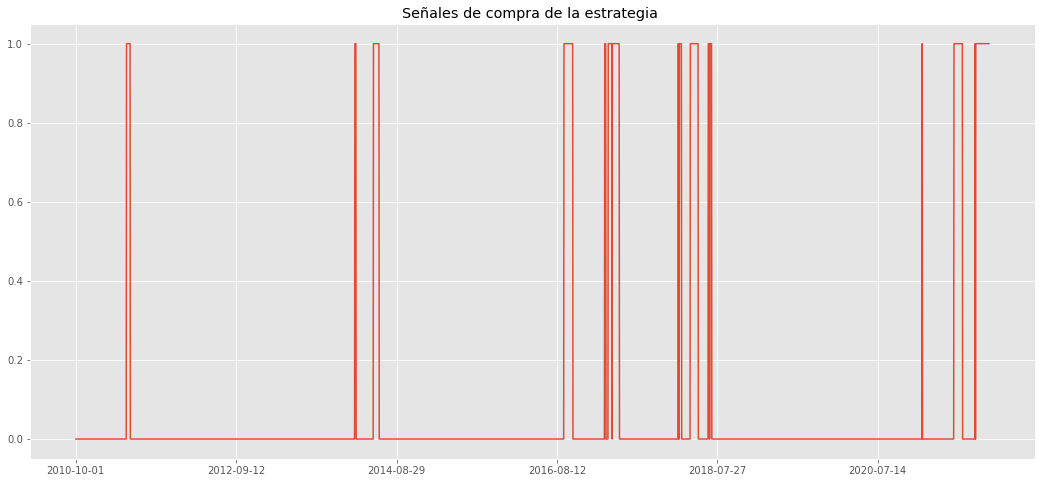

In [16]:
data['Senal'].plot(title = 'Señales de compra de la estrategia ' )
# Ploteando una parte
#data.loc['2010':'2022','Senal'].plot(title = 'Señales Regresión a la media ' +instrumento,xlim=('2010','2022'))

In [17]:
tiempo_final = time() 
 
tiempo_ejecucion = tiempo_final - tiempo_inicial
 
print ('El tiempo de ejecucion fue:',tiempo_ejecucion,"segundos") #En segundos

El tiempo de ejecucion fue: 847.4997012615204 segundos


In [18]:
data.loc['2011-01-04':'2019-11-04']

Date Senal      Price Objetivo ExitReason  Beneficio
2011-01-04  2011-01-04     0  57.307251      NaN        NaN        NaN
2011-01-05  2011-01-05     0  56.523476      NaN        NaN        NaN
2011-01-06  2011-01-06     0  56.045067      NaN        NaN        NaN
2011-01-07  2011-01-07     0  55.169678      NaN        NaN        NaN
2011-01-10  2011-01-10     0  54.100895      NaN        NaN        NaN
...                ...   ...        ...      ...        ...        ...
2019-10-29  2019-10-29     0     14.186      NaN        NaN        NaN
2019-10-30  2019-10-30     0     13.688      NaN        NaN        NaN
2019-10-31  2019-10-31     0     13.214      NaN        NaN        NaN
2019-11-01  2019-11-01     0     14.036      NaN        NaN        NaN
2019-11-04  2019-11-04     0     14.606      NaN        NaN        NaN

[2260 rows x 6 columns]

In [19]:
#Guardamos el resultado del analisis en un pickle
#dff.to_pickle("./primerBack_IBE.pkl")

***3.- Ingeniería de datos para calcular la bondad de la estrategia***

In [20]:

data['Dif_Close'] = data.Price.pct_change()
data['Retornos'] = data.Dif_Close * data.Senal.shift(1)   
data['Capital'] = (data.Retornos + 1).cumprod() * 100
    
rg.StrategyClass.dfLog=data  #Ojo a esta liena, no me cuadra.

#quant_j.salvarExcel(StrategyClass.dfLog, "log"+instrumento)   
#data.to_pickle('almacen')    #df = pd.read_pickle(file_name)

>Para calcular los retornos del sistema, calculamos la diferencia relativativa entre el precio de cierre y el del día anterior. Para posteriormente multiplicarlo por la señal que del día anterior que nos indicaba la posición a tomar (si estaba comprado, sumo beneficio).

In [21]:
data.tail()

Date Senal      Price Objetivo ExitReason  Beneficio  \
2021-11-11  2021-11-11     1  28.495001      NaN        NaN        NaN   
2021-11-12  2021-11-12     1  27.629999      NaN        NaN        NaN   
2021-11-15  2021-11-15     1  26.915001      NaN        NaN        NaN   
2021-11-16  2021-11-16     1  26.934999      NaN        NaN        NaN   
2021-11-17  2021-11-17     1     27.275      NaN        NaN        NaN   

            Dif_Close  Retornos     Capital  
2021-11-11   0.041865  0.041865  146.797113  
2021-11-12  -0.030356 -0.030356  142.340902  
2021-11-15  -0.025878 -0.025878   138.65746  
2021-11-16   0.000743  0.000743  138.760486  
2021-11-17   0.012623  0.012623  140.512058

In [22]:
data[60:]

Date Senal      Price Objetivo ExitReason  Beneficio  \
2010-12-27  2010-12-27     0  57.704227      NaN        NaN        NaN   
2010-12-28  2010-12-28     0  57.521008      NaN        NaN        NaN   
2010-12-29  2010-12-29     0  58.253887      NaN        NaN        NaN   
2010-12-30  2010-12-30     0  57.836552      NaN        NaN        NaN   
2011-01-03  2011-01-03     0  58.956234      NaN        NaN        NaN   
...                ...   ...        ...      ...        ...        ...   
2021-11-11  2021-11-11     1  28.495001      NaN        NaN        NaN   
2021-11-12  2021-11-12     1  27.629999      NaN        NaN        NaN   
2021-11-15  2021-11-15     1  26.915001      NaN        NaN        NaN   
2021-11-16  2021-11-16     1  26.934999      NaN        NaN        NaN   
2021-11-17  2021-11-17     1     27.275      NaN        NaN        NaN   

            Dif_Close  Retornos     Capital  
2010-12-27  -0.000881      -0.0       100.0  
2010-12-28  -0.003175      -0.0       100.0  
2010-12-29   0.012741       0.0       100.0  
2010-12-30  -0.007164      -0.0       100.0  
2011-01-03   0.019359       0.0       100.0  
...               ...       ...         ...  
2021-11-11   0.041865  0.041865  146.797113  
2021-11-12  -0.030356 -0.030356  142.340902  
2021-11-15  -0.025878 -0.025878   138.65746  
2021-11-16   0.000743  0.000743  138.760486  
2021-11-17   0.012623  0.012623  140.512058  

[2788 rows x 9 columns]

>El capital, por comodidad, lo calcularemos en base 100, es decir como si iniciaramos la inversión con 100 unidades monetarias. Para su calculo arrastramos el producto acumulado de los retornos mas 1, multiplicados como dijimos por 100.

Pero para observar gráficamente la evolución del sistema necesitamos un gráfico con mas información. Para ello definimos una función que nos mostrará un gráfico con la evolución de nuestra estrategia, comparandola con la del activo. En un subgráfico se visualizará el drawdown del sistema, comparado de nuevo con el del activo. Y por útlimo las posiciones que toma el sistema.

In [23]:
def grafico (df):
    estudio = df.copy()
    DD_bh, maxDD, maxDD_ini, maxDD_fin = analisis.DrawDown(estudio.Dif_Close[60:], info = False) 
    DD, maxDD, maxDD_ini, maxDD_fin = analisis.DrawDown(estudio.Retornos.fillna(0), info = False) 

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(18, 12), gridspec_kw = {'height_ratios':[3, 1, 1]})
    fig.suptitle('Estrategia vs B & H', fontsize=20)

    #Primer plot analiza la evolcuion de una inversion de 100€ en buy&hold y la estrategia)
    ax1.plot(estudio.Capital)
    ax1.plot((estudio.Price) * (100/estudio.Price[1]))
    ax1.set_title('Capital')
    ax1.legend(['Estrategia','Buy & Hold'])

    ax2.plot(DD*100, c='0.5')
    ax2.plot(DD_bh*100, c='y')
    ax2.fill_between(DD.index, 0, DD*100, color='0.7')
    ax2.set_title('Drawdown')
    ax2.legend(['Estrategia','Buy & Hold'])

    ax3.plot(estudio.Senal, c='orange')
    #ax3.fill_between(estudio.index, 0, estudio.Senal*100, color='orange')
    ax3.set_title('Posición')

    plt.show()
    return

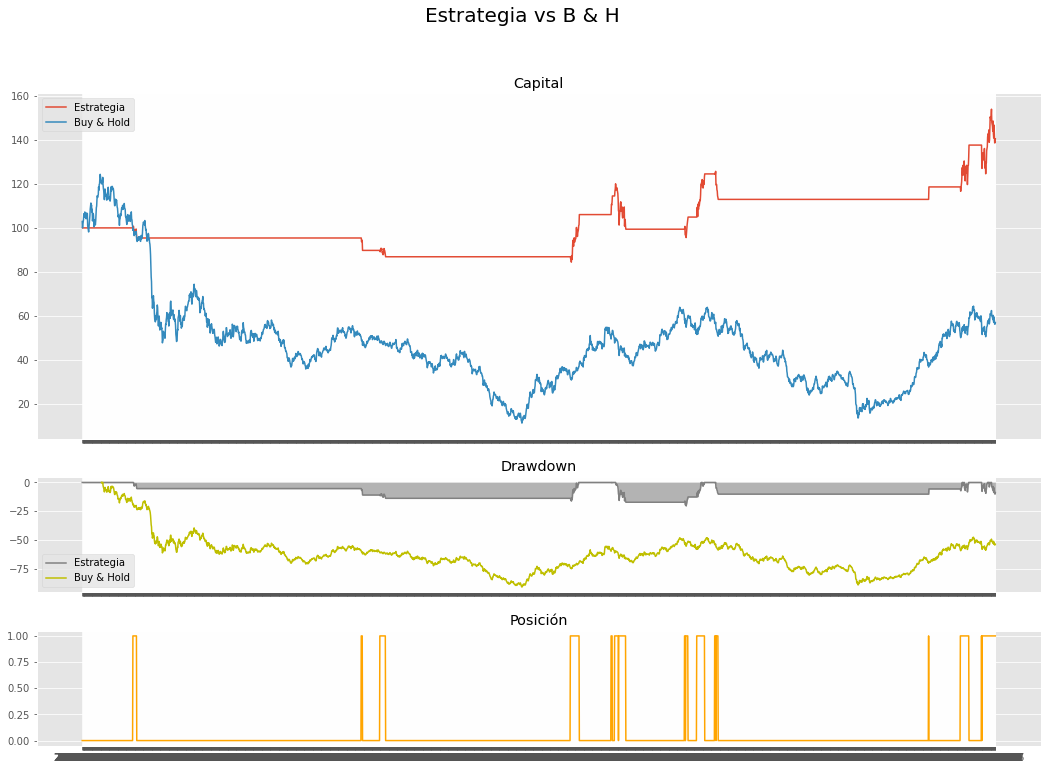

In [24]:
grafico(data)

---

In [25]:
#data[55:70]

---

# ANALISIS DEL SISTEMA

retornos=data.Retornos
retornos
retorno_acumulado = retornos.fillna(0).add(1).cumprod()   
retorno_acumulado
dt_inicial = dt.datetime.strptime(retornos.index[1], '%Y-%m-%d')
dt_final = dt.datetime.strptime(retornos.index[-1], '%Y-%m-%d')
cagr = (retorno_acumulado[-1] / retorno_acumulado[1]) ** (365 / (dt_final - dt_inicial).days ) - 1
cagr

In [26]:
Beneficio_Bruto = data.Capital[-1] - data.Capital[1]
print ('Beneficio Bruto : {:.2f} €  con una inverison de 100€'.format(Beneficio_Bruto))

Beneficio Bruto : 40.51 €  con una inverison de 100€


In [27]:
#Rentabilidad anual compuesta. Calculamos lo que la inversion se ha incrementado cada año con el interes compuesto
CAGR = analisis.CAGR(data.Retornos)
print ('CAGR : {:.2f}%'.format(CAGR * 100))

CAGR : 3.10%


In [28]:
#Ratio calculado restando una rentabilidad segura a nuestra rentabilidad de estrategia y dividido por el riego (=volatilidad)
data.Retornos=data.Retornos.replace(0,np.e)  #Quito los cero (no sepuede hacer logariotmo de cero), pero no se que poner
Sharpe = CAGR / (np.log(data.Retornos + 1).std(skipna=True) * 252 ** 0.5)
print ('Sharpe : {:.3f}'.format(CAGR ))

Sharpe : 0.031


---


# PRUEBA FUERA DE LA MUESTRA

periodo_rapido = 5

periodo_lento = 140

out_sample= qd_data[data.shape[0]:].copy()

out_sample['Dif_Close'] = out_sample.Close.pct_change()
out_sample['Dif_Open'] = out_sample.Close.pct_change()  #era Cloe


out_estr, out_resultado = estrategia_medias (out_sample, periodo_rapido, periodo_lento)


grafico(out_estr)

---